## Decision Trees

### Introduction

* Very intutive and easy to understand
* Non-parametric supervised learning method for regression & classification
* It's similar to playing 'dumb charades'.
* A good algorithm will have less & right questions compared to not-so-good ones. One can think the nodes are questions & leafs are predictions

### History

* Decision Tree is based on (CART) which is advancement of ID3, developed in 1986 by Ross Quinlan.
* ID3 works when feature data & target data both are categorical in nature
* C4.5 is an advancement of ID3, it coverts continues features into categorical features. Then, proceeds with ID3
* CART is based on C4.5, with slight advancement of 'target can be continues'.
* scikit-learn decision trees are based on CART

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
play_data = pd.read_csv('C:/Users/Sravani/OneDrive/Desktop/Supervised-Learning-master/Supervised-Learning-master/tennis.csv')
play_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


**A decision tree for above data would like below**

![](images/tennis.png)

### How does the split happen?

Gini impurity and entropy are what are called selection criterion for decision trees. Essentially they help you determine what is a good split point for root/decision nodes on classification/regression trees. 

**Gini** measurement is the probability of a random sample being classified incorrectly if we randomly pick a label according to the distribution in a branch.

**Entropy** is a measurement of information (or rather lack thereof). You calculate the information gain by making a split. Which is the difference in entripies. This measures how you reduce the uncertainty about the label.

### Entropy of play

Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

In [3]:
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [4]:
Entropy_Play = -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)
Entropy_Play

0.9402859586706311

### Information Gain

* The information gain is based on the decrease in entropy after a dataset is split on an attribute.
* Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
* Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]
* We intend to choose the attribute, splitting by which information gain will be the most
* Next step is calculating information gain for all attributes

### Information Gain on splitting by Outlook

* Gain(Play, Outlook) = Entropy(Play) – ∑ [ p(Play|Outlook) . Entropy(Play|Outlook) ]
* Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – [ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

In [5]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [6]:
# Entropy(Play|Outlook=Sunny)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

Entropy_Play_Outlook_Sunny

0.9709505944546686

In [7]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


**Entropy(Play|Outlook=overcast) = 0 **

**Since, it's a homogenous data entropy will be 0 **

In [8]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [9]:
# Entropy(Play|Outlook=rainy)
Entropy_Play_Outlook_Rain = -(2/5)*np.log2(2/5) - (3/5)*np.log2(3/5)

Entropy_Play_Outlook_Rain

0.9709505944546686

### Gain on splitting by attribute outlook

In [10]:
#Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
#[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

Entropy_Play - (5/14)*Entropy_Play_Outlook_Sunny - (4/14)*0 - (5/14) * Entropy_Play_Outlook_Rain

0.24674981977443933

Similarly, we can also calculate gains for below

Gain(Play, Temperature) - 0.029

Gain(Play, Humidity) - 0.151

Gain(Play, Wind) - 0.048

Based on above we can say that the split must happen at Outlook

![](images/tennis_split1.png)

We can continue the above approach for further splits

### Decision Tree using scikit-learn API

Let us look at an example to split the data using API provided by scikit-learn package

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # for score / accuracy

In [12]:
df = pd.read_csv('data/data.csv')
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [13]:
df.shape

(569, 33)

In [14]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Train Test Split¶

Use train_test_split to split data into a training set and a testing set.

In [15]:
from sklearn.model_selection import train_test_split
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 
        'area_mean', 'smoothness_mean', 'compactness_mean', 
        'concavity_mean', 'concave points_mean', 'symmetry_mean', 
        'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
        'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
        'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
        'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 
        'smoothness_worst','compactness_worst','concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst']].values

y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [16]:
# Function for spltting the tree based on heuristic
def MyDecisionTreeClassifier(heuristic, tree_depth = None):
    decision_tree_clfr = DecisionTreeClassifier(criterion = heuristic, max_depth = tree_depth)
    
    #Apply classifier on training dataset
    decision_tree_clfr.fit(X_train, y_train)
    
    return decision_tree_clfr

In [17]:
heuristic_g = "gini"
decision_tree_g = DecisionTreeClassifier(criterion = heuristic_g)

#Apply classifier on train dataset
decision_tree_g.fit(X_train,y_train)

# predict lables using remaining testset
predTree_g = decision_tree_g.predict(X_test)

print("Decision Trees's Accuracy using Gini: ", metrics.accuracy_score(y_test, predTree_g))
print("Depth of Decision Tree: ", decision_tree_g.tree_.max_depth)

Decision Trees's Accuracy using Gini:  0.9532163742690059
Depth of Decision Tree:  6


In [12]:
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import numpy as np

C:\Users\Sravani\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


ModuleNotFoundError: No module named 'pydotplus'

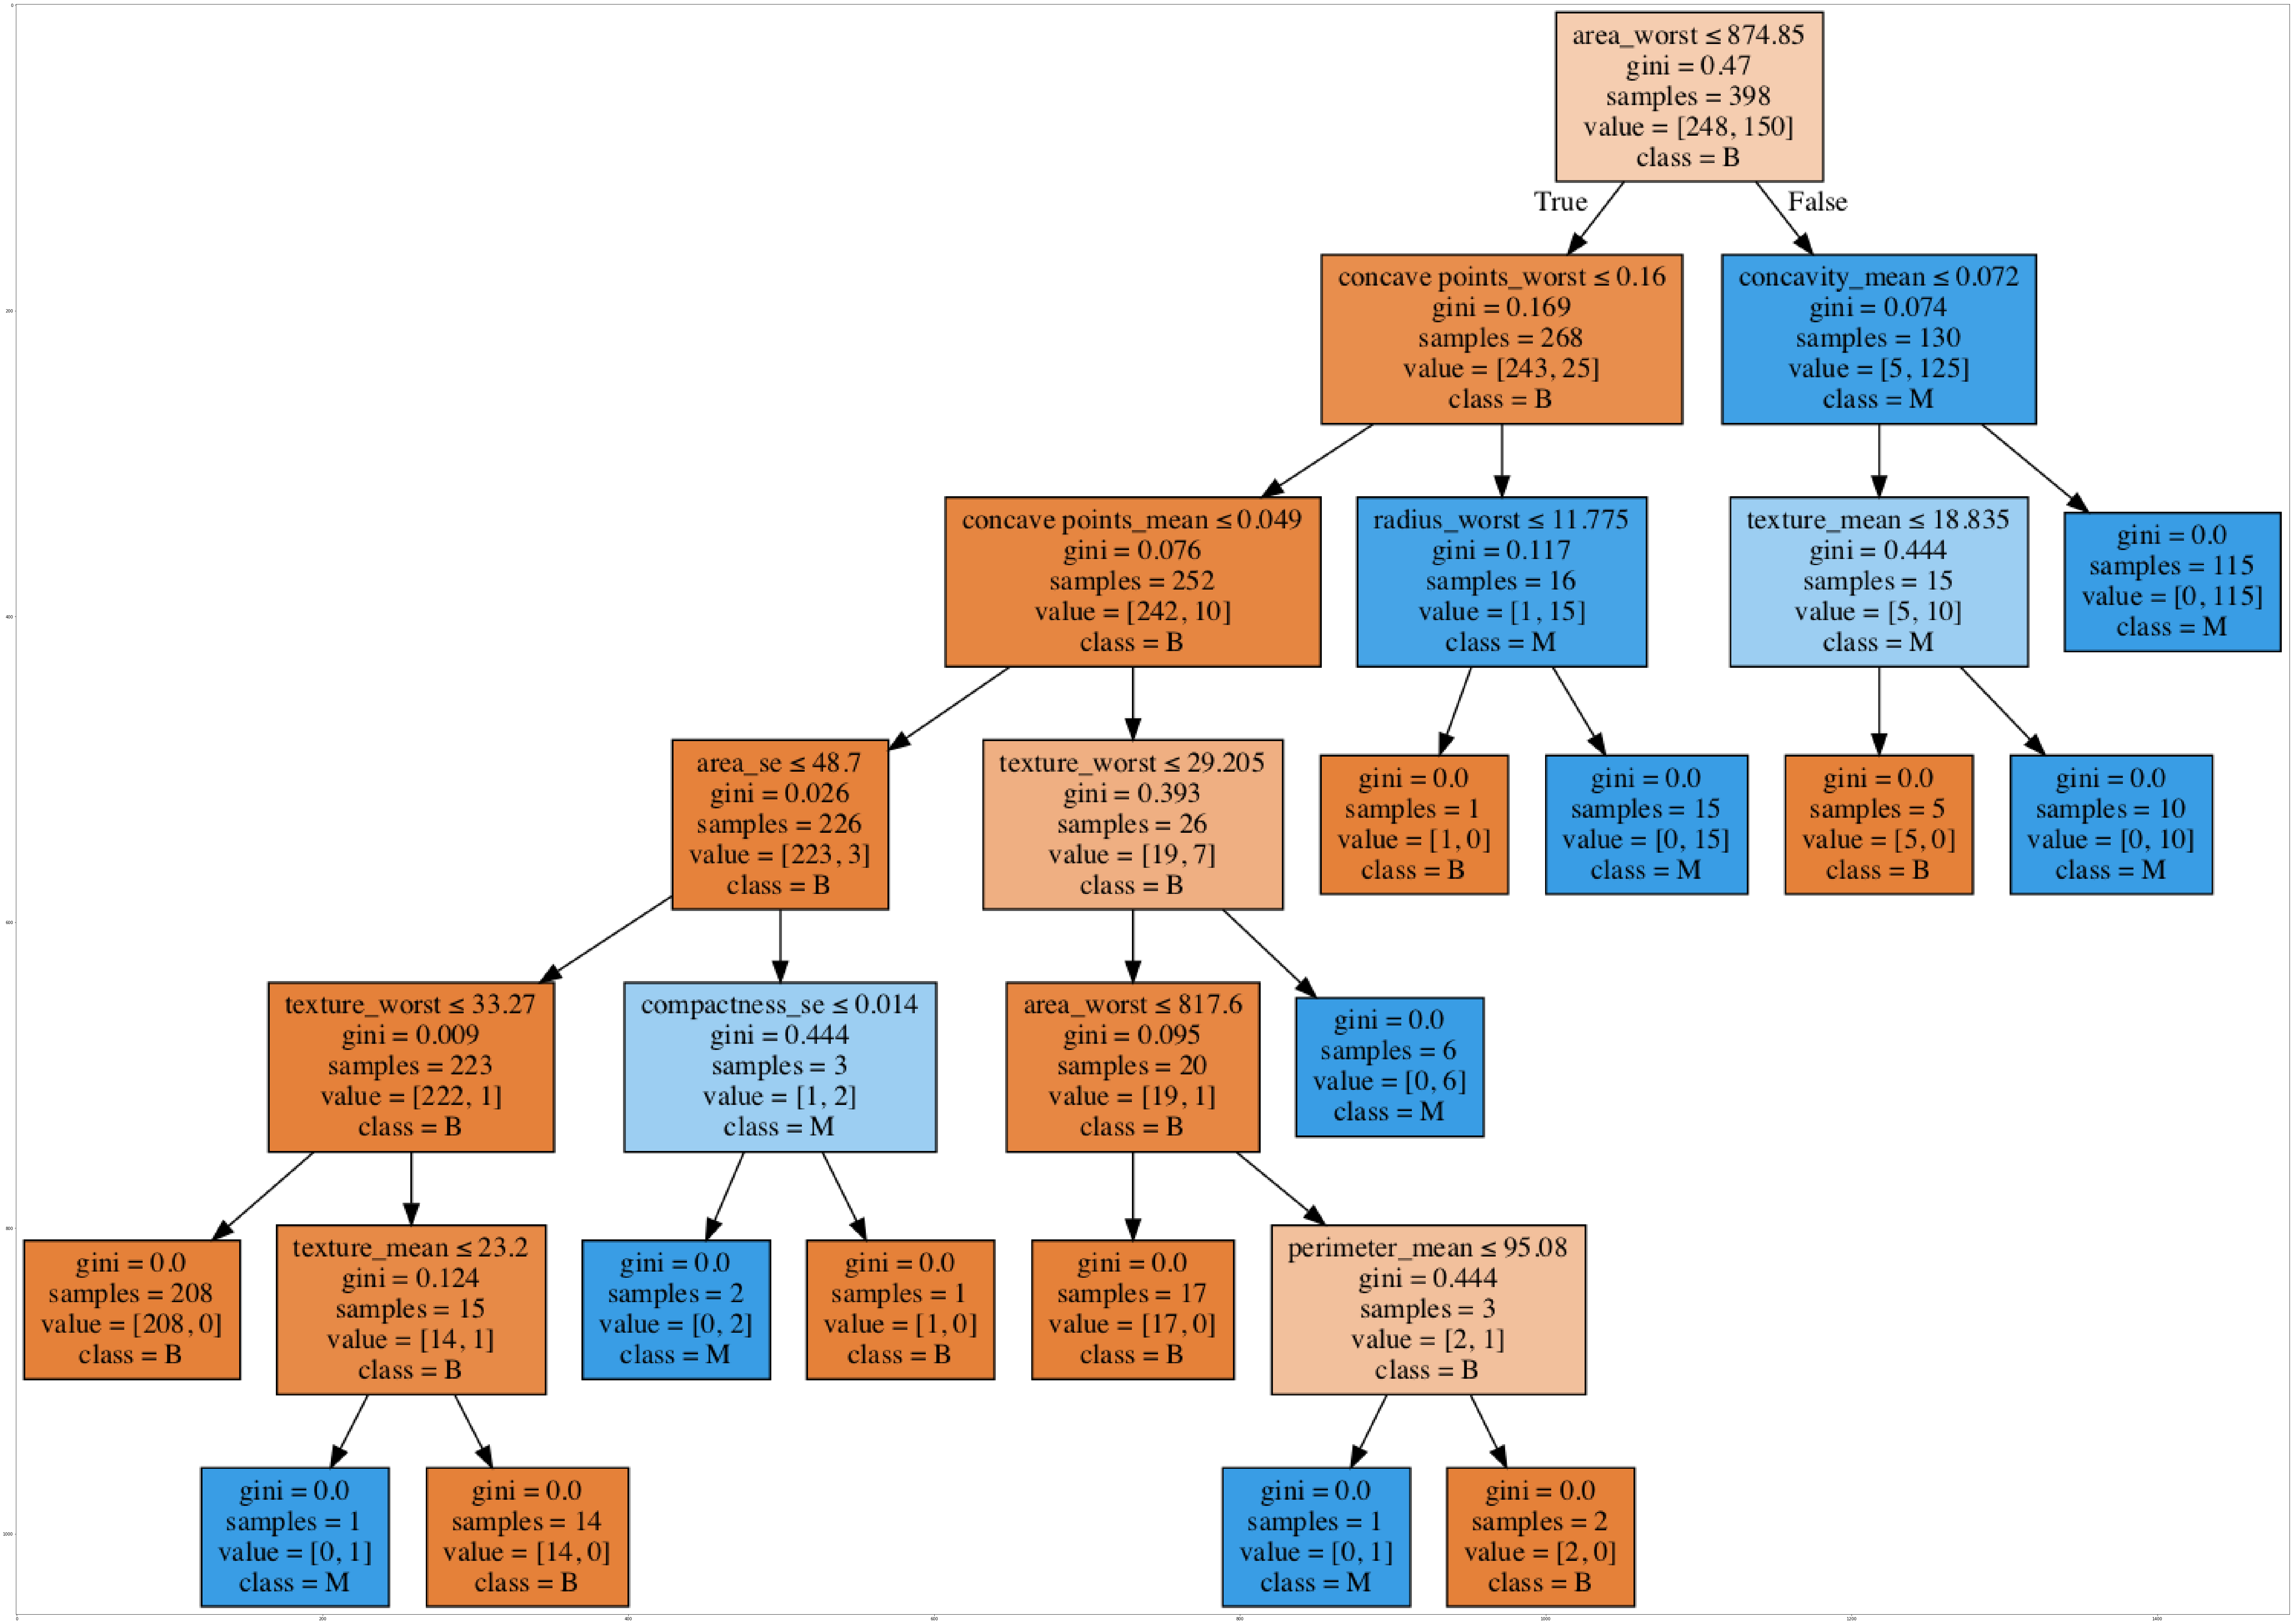

In [19]:
fileName_g = "decision-tree-gini.png"


dot_data = StringIO()
featureNames = df.columns[2:32]
labedNames = df["diagnosis"].unique().tolist()
    
# export_graphviz will convert decision tree classifier into dot file
tree.export_graphviz(decision_tree_g,feature_names = featureNames, out_file = dot_data,
                         class_names = np.unique(y_train), filled = True,  special_characters = True,rotate = False) 
    
# Convert dot file int pgn using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
#write pgn into file
graph.write_png(fileName_g)

#display tree image
img_g = mpimg.imread(fileName_g)
plt.figure(figsize=(100, 200))
plt.imshow(img_g, interpolation='nearest')

In [20]:
heuristic = "entropy"
decision_tree = MyDecisionTreeClassifier(heuristic)

# predict lables data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAFf4AAA+SCAYAAABMSW8QAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3HnclHW5P/DvDI+yiIQrKppoCpaAG4KICpoaLqkpqWn609Is01zTTDuZWpYeNcslzeVoQYq5QO6iHBVxASwVF8AFBQzEXQQEZM4f5/e6nWv0GZ55uJ9ngPN+/3V9uGa+9zX3d+7BF736FkqlUgIAAAAAAAAAAAAAAAAAAAAAAAAAAADyUaz3AAAAAAAAAAAAAAAAAAAAAAAAAAAAALAicfAvAAAAAAAAAAAAAAAAAAAAAAAAAAAA5MjBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAjB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAjhz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADly8C8AAAAAAAAAAAAAAAAAAAAAAAAAAADkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCMH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECOWv3g30KhMLhQKEwqFAovFwqFn7X29QEAAAAAAAAAAAAAAAAAAAAAAAAAAKAlFUqlUutdrFBok1KanFLaLaU0PaU0LqX0nVKp9MIXvX7NNdcsdevWrdXmAwAAAAAAAAAAAAAAAAAAAAAAAAAAgC8yYcKEt0ul0lpNeW1DSw9ToW9K6eVSqfRqSikVCoWbUkr7ppS+8ODfbt26pfHjx7fieAAAAAAAAAAAAAAAAAAAAAAAAAAAAPB5hULh9aa+ttiSg3yBrimlaWV5+v//s0yhUPhBoVAYXygUxs+ePbtVhwMAAAAAAAAAAAAAAAAAAAAAAAAAAICl1doH/xa+4M9KIZRKV5dKpT6lUqnPWmut1UpjAQAAAAAAAAAAAAAAAAAAAAAAAAAAQD5a++Df6SmlDcry+imlN1t5BgAAAAAAAAAAAAAAAAAAAAAAAAAAAGgxrX3w77iU0qaFQmGjQqGwckrp4JTSyFaeAQAAAAAAAAAAAAAAAAAAAAAAAAAAAFpMQ2terFQqLSoUCsellO5LKbVJKV1XKpWeb80ZAAAAAAAAAAAAAAAAAAAAAAAAAAAAoCW16sG/KaVUKpXuTind3drXBQAAAAAAAAAAAAAAAAAAAAAAAAAAgNZQrPcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsCJx8C8AAAAAAAAAAAAAAAAAAAAAAAAAAADkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCMH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECOHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAOXLwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAOTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQo4Z6DwAAAAAAAAAAAAAAAAAAAMuD6dOnhzx27Ng6TQIAwPJogw02CLl///51mgQAAACA1lCs9wAAAAAAAAAAAAAAAAAAAAAAAAAAAACwInHwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAOTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQo4Z6DwAAAAAAAAAAAAAAAAAAAMuDsWPHhnzQQQfVaRIAAJZHQ4YMCfmWW26p0yQAAAAAtIZivQcAAAAAAAAAAAAAAAAAAAAAAAAAAACAFYmDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHDXUewAAAAAAAAAAAAAAAAAAAFgRfDzhjnqPAADAMua7p19Q7xEAAAAAqJNivQcAAAAAAAAAAAAAAAAAAAAAAAAAAACAFYmDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAADIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEcO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAcOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAcuTgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBw5+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABy5OBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAADIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEcO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAcOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAcuTgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBw5+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABy5OBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyFFDvQcAAAAAAAAAAAAAAAAAAAAAoGXMmTs/q297YEzovf7mWyH37d0j5F36bZnVKzW0afYME56fEvIr02Y2e60l6dure1Z369olt3Xf/eCjkK+77b6QTz1ySG7Xaq7yvU6ptv0u3+uUlm6/K907ZnzIH86Z1+T3zpj1dsjHHLRnVndo13bpBgMAAACAFlas9wAAAAAAAAAAAAAAAAAAAAAAAAAAAACwInHwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAOTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQo4Z6DwAAAAAAAAAAAAAAAAAAAABAPqa8PiPkA044L6sv/OlRobf/bjuEfPcj40Lute8Ps/qac08MvR223rzqHKVSKauP+PlFoffq9JlV37s0Hhtafq0uua177DmXhfzks5NCPvXIIbldqxbl+12+1ynVtt/le51S7ftdbvLU6SEPOfHXIZd/N5bk29/YMeQO7do2+b0AAAAAUG/Feg8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAKxIH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECOGuo9AAAAAAAAAAAAAAAAAAAAAPB/z7A7R2f1IXvvXMdJViynXXRtyDtss3lWf2PANlXfe+DgHUMe9fg/s/qcK4aG3v3X/KbqWqOfeiarB+/QJ/SOO3SfkNdda/Wqa5Ub8/TEuNZ5V4S85WZfafJa1Vx/+/0hv/jqtFzWzVv5fpfvdUq17Xf5XqdU+36X+8NfR4Z8z1XnhrzR+us0ea01V+vU5NcCAAAAwLKmWO8BAAAAAAAAAAAAAAAAAAAAAAAAAAAAYEXi4F8AAAAAAAAAAAAAAAAAAAAAAAAAAADIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEcN9R4AAAAAAAAAAAAAAAAAAAAAWPE9PO7ZkP/jsr9k9SF779za47S6t959P6sfeuKZ0Dt4z4G5XWfm2++F/P6HHzd7rbYrf3YsxScLFtb03lXat8/q353y/dArFgvNnunO/34q5H136d/stSpNef3NrH7mpVdDb48d+4R88z2P5HbdpVG+33ntdUq17fesd+J3buKUqSGfcfRBIXftskZtwwEAAADAcqpY7wEAAAAAAAAAAAAAAAAAAAAAAAAAAABgReLgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRw31HgAAAAAAAAAAAAAAAAAAAKiPKa+/mdXjnpsUes9NmRpy/y2/GvI+O2/X5Ou8/+GckIff92hW/+Dbe4Te/Y89HfLEijl+cti+Wd3Qpk3V6/579rshPzD2s7VnvPVO6PXfIn6+QX17V127mvL7mlK8t3ne13p5dMLEkMc9N7nR1/bq3i3kHbbpGfL1t98f8vz5Cxpdq2/vHnGtrTcPecasz/b01gfGhF77dm1DPnrI4EavU2nO3Hkh3ztmQsiTXpue1et3WTP0vt5/y5Ar+9VUe25Sis9OLc9NSim1KRazeszTz4feM5Nea/S1KaXUY6OuIe/SL37Gco+Mfy7kA08+P+RCoZDV1956X+itu9bqIe+507aNXqdeFn36acj3VXw3bhz5YMj3Pjo+q7fcbOPQO3jPgbnNte8u/UM+98phWX3T3Q9Xve6cufNDHjn6iay+8NSja5qjX8Uz21yLF5dCHvHQ4yEPveD0Zq+9cFHcw3OuGJrVV/7yuNA7709/a/Z1WlL5fpfvdUq17Xf5XqdU235fedNdIY+bGP9e6L7n90Pu1rVLVp9x9EGhd+jeO4dc/jsBAAAAAMub4pJfAgAAAAAAAAAAAAAAAAAAAAAAAAAAADSVg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBw11HsAAAAAAAAAAAAAAAAAAACgdVw27B8h3/nfT2b1PVedG3oD/j075D2OOSvkWe+8n9VHDxkcekPvfCjkE8+/KuQFCxdl9eLFi0Pvv+54IOTnJk8NefcBW2d1z027hd4j458Lefi9j4Z89Lc/m7PjKu1D76BTfhPyIXvtHPIlPzsmNabafU0p3tta7mtKn7+3y4IBW20e8sm/uzrkV6fNzOq3Hrsp9NoUiyHvut2WIW974AlZvceOfeJ1jti/6lxdu6yR1ZNemx56g/r2rvrecpXfue//4pKQzzzm4JCPOXDPrB521+jQ22bIcSFfcnr8Hh2y92ffs1qem5Tis1PLc5NSSn+/f0xWd+vaJfSOO+SbIT/9wsshn/TbONcu/eIeluu8aseQe1U8s1PemJHV3bt1Db0vdVyl0XVb0+Sp8bt0w4gHs3rYnXG/P5jzcch77dQ35JsvPiOrd+2/VV4jfs739t895JvufjirK7/P/3rplZBfeOWNkP945rFZvc/O2+U1Yk0ef+bFkAuFQsj9evdo9trn//nmkH9c9v3v2KF95cuXSeX7Xb7XKdW23+V7nVJt+73jNj1DXrjo05CfevalkMdNnJzVx5z9h9C76Z74GUZc9suQK/8eAQAAAIBlmX/NAgAAAAAAAAAAAAAAAAAAAAAAAAAAgBw5+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABy1FDvAQAAAAAAAAAAAAAAAAAAgNZx9fC7Q961/1ZZXSgUQm/D9dYOuXf3jUK+55FxWX30kMGhd+jeu4T84BPPhHzzPQ9n9XprrxF6T/zt9yFPnjo95O7d1s/qOXPnh96x51wW8pM3XxryKu3bZfUWPTYOvVGP/zPkq2+5J+Tv7DUoq/v26hFfW+W+phTvbS33NaXP39tlQbEYvys/OnjvkI//9RVZPXHK1NCrvO/l+5lSSnvs2Cern5n0auiVSqWQK7+z5Wa89U7I++82oNHXppTSgoWLsvrwM/4z9A6oeO++u/RvdJ2ffHffkP/54ish//i8y0Pe+mubZHUtz01K8dlZ0nOz6YZdQ97zh/+R1UMvOC1VUz5jSintNbBv1deX690jfr/XXK1TyNNmzs7qHbfp2eR1l9acufOy+tb7Hwu9G0eOCvmJZ14Kedue3bP6zGMODr0hu+8QcudOHZdqzuZae/XOIY+69vys3vmIuN9/HDoy5H694+/bdltslvN0tbt9VNyjfXbeLuRqvwWVHp3wfMgNbYohLwuft1bl+12+1ynVtt9L89m/vt2WVXOl5yZPzerK39zRT8bfvt/feHvIpxxxQDMmBAAAAID6KC75JQAAAAAAAAAAAAAAAAAAAAAAAAAAAEBTOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAcuTgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMhRQ70HAAAAAAAAAAAAAAAAAAAAWse9V58X8irt2zX62pdenRby9Flvh/zRx/OafN1111q90d7eA/tVfW/3bus32rvlvkdCnvfJgpDPuvSGJkz3v2bOfi/kjddfJ+RXp83M6r69eoReve7rsuLAwTuFfMYl12f1TXc/HHpb9Ni46lqdOq6S1W/8e3boPTzuuZAH9e0d8riJk7N6257dQ69NsVj1ug+MfTqrJ0+dHnqV+12L3fpvFfLwe+N39oYRo7L6/JOODL1qz01K1Z+das9NSil137BrVh/2swtD77Izj43XGRSvc8Jh+1VduxaFQiG3tWpx9yPjsvrsy/8aem+9+37I222xWcj/8aNDsnqnPr1Cr16fZ0luGPFAVu+wTc/Qq8w3ln0nU0pp4OE/zer7r/lN6G2wzlp5jfg5pVIpq+948PHQu+68k5q8zgcffRzyVcPvCvm/fnNKM6ZbdpXvdUq17Xf5XqfUsvvdq3u3rH5s6EWht+X+8Tdo+L2PhnzKEQfkNgcAAAAAtLTq/+sEAAAAAAAAAAAAAAAAAAAAAAAAAAAAUBMH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECOHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAOWqo9wAAAAAAAAAAAAAAAAAAAEDrWG/tNUJ+8Il/ZfU9j44LvR227hnyxuuvE/I/X3ylydctFgvN6i3Ji69MC3mdNVcP+ZKfHdPstWtR7b6mFO9tnvd1WdGxQ7uQv7PnwKweeufo0PvVcYeF/PZ7H4Q8d/78rK68NzeMGBXyoL69Q77utvuz+qxjvrOksYOXXpvWaG+Vis9Xi+23+lqzr7ukZ2Npnp2LT/9BVn/39AtC76BTzg+58j5f/+uTQ1579c7NnqPQ/I+wVA4cvFNW77/bgNC7b8yEkG8c+WDI+/z4V1m93trxN+eQvXYO+dBv7hJy5Xe6pfylYua/3z8mqx/9y3+GXkObNiH332KzkI//9ZVZfdJvr4rr/v6spZqzmsefeSmrFyxcFHoDtt68yeucdtG1IW/ztU1Dvuvhp5q81stvvBny/AULQh7x0ONZ3XnVVUJv4LbxOcpT+X6X73VKte13+V6n1Hr73aFd25D3Htgv5BsrfvsBAAAAYHlSrPcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsCJx8C8AAAAAAAAAAAAAAAAAAAAAAAAAAADkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKOGeg8AAAAAAAAAAAAAAAAAAAC0jnOuHBbymAkTs3rE5WeHXvu2K4c84qGxLTZXc7VpUwx5yuszQl646NOQV2po0yJzVLuvKcV7uzzc16V11JDBWf3nv98beiMeejzkf774SsgnHLZfVj86Pt7HX191U8ivzZgV8tx587O6a5c1apg4pdU6rdpo76lnJ4U8YKuvNXndL6+7dsiV38HOq3Zs8lp56t1jo6weO+zi0PvFH24M+dpb7wt5+0NODnnc8D9k9Wqdavs8hUKhpte3hIY2cU/2Gti3an7r3fezetido0PvxpEPhvzba4aHXP7dOWrIHqF34OAdmzjxkg2986GQd99+m6yu/LyVDt9315CffuHlrL5hxKjQ++Cjj0P+0qqr1DRnNXeM+uy3ce9BcQ/aFIuVL2/U2+99GPIVT97Z7Jk+nBM/79z5n4R86oXXZPVXN94g9AZu27vZ112S8v0u3+uUatvv8r1OqXX3u1z3bl1D3mTD9VrkOgAAAADQGpr+r5kAAAAAAAAAAAAAAAAAAAAAAAAAAADAEjn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHLUUO8BAAAAAAAAAAAAAAAAAACAljF1xqyQf3fN8JD/eOaxWd2+7cpV11q8uJTfYDnptWm3kD+eNz/ka/5+b8g/OnivJq/9wUcfh3zzvY9k9e7bbx161e5rStXv7bJ4X5dWz7J96de7R+j9cejIkNdZc7WQt+3ZPas36rpO6J37p2EhH3zK+bF//OE1z/pF16005unnQz7p/32ryeu+8MrrIS9c9GnIlfenpXyyYGHItz3wWFZ/Z69BoXfJz44Jea+BfUPe7/hzQh7x0ONZfcR+u1Wdo1AohPzpp4urvn5ZtPbqnbP6xMPjd6EyP/nspJBvHDEqqy8bFp+FAwfvmNeI6bkp8Xu32UYbNHutvQf1y+o/V/ymvvXu+yF/adVVmn2dUin+Ft7+4NisvvysHzd73VsvPavZ76105qU3hDzsztEhT7nn2tyuVYvy/c5rr1Nq2f2uZuToJ+NcA/s18koAAAAAWPYV6z0AAAAAAAAAAAAAAAAAAAAAAAAAAAAArEgc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA5cvAvAAAAAAAAAAAAAAAAAAAAAAAAAAAA5Kih3gMAAAAAAAAAAAAAAAAAAAAt4+N586v2h9/7SFZ/+xs7hN6zk6eGPObp50P+ZMHCrJ4zt/I6pZDmzvuk0Rne/eCjkFf/0qqNvrbSAbvHmX91xdCQf/7760P+ZMGCrN5jx21Db+LLr4d8x6ixIV/5y+Oy+vU336o6V/l9TSne21rua0qV9zbe144d2ledY1lw1AGDQz76l5eG/I8rzm70vWuu1inkfXbeLuRxEyeHvGv/rZox4f/q1b1bVh+69y6hN+Khx0OeNnN2yBuss1aj647914shb/Ll9UL+3v7faPS91Z6blOKzs6TnplTx3bnm1nuz+uA9B4ZeoVAI+evbbRnyGp1Xrchxn6pZZ83VQp71zntZ/dqMWaFXKsWZu6zROeRV2rdr8nUrTS271r/ffrfZ69Tqu/t89t1aqaHljnv45qB+IY8c/WRWX3z6MaFXLMb9rvTUc5Oyuuem3ULvKxusl/Ly5LOTQp4zd15WD+rbO7frLKvOvPSGrH7vw/j34hW/OK7y5UH5fpfvdUq17Xf5Xqe05P2e8vqbWf3nW+4JvUO/uXPIW/TYuNHrvvjKGyHPrfhvl9OPOrDR9wIAAADAsq5Y7wEAAAAAAAAAAAAAAAAAAAAAAAAAAABgReLgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRw31HgAAAAAAAAAAAAAAAAAAAGgZm2+yYciH77tryMPuHJ3VAw49JfROOGy/kC867QchH3nmRVl94Mm/Cb3dt98q5JGjn2h0xhPP/1PIP6m4bp/NN230vW1XXile5/KzQz7olDjXmZfe8IV1Sil99StfDvnac08MuWOH9lldy31NKd7bWu5rSvHeDr3gtLS8+dZuA0L+290Ph7xLvy2bvNZRQwaH3Kt7t5CLxUJtwzXiD2f+MOSOHdqF/K2fnBvySYd/tqeLFi0OvfvGTAj5rj+dE/LKK332f/m/4Y5RoVftuUkpPju1PDcppTR1xqysPvLMi0Nv3136hzxt5uyQjx6yR8jfHNSv6rXK7V/xfbjutvuzesChJ4feL354SMg/OnivJl9nSS4bNjKrr7zprtzWrcWmG3YN+V+3XZ7b2hefHn9XTr3wz1nd7+ATQu+Ib+0W8gsvvxHy7Pc+yOqbLzoj9PJ65lJK6fZRj4W8507bZnX5c7KiuvuRcVn93ocfhd6ni+PvSptiMeTy/S7f65Rq2+/yvU5pyfv98bx5Wf2XfzwYepf/7R8h79SnV8h9en72G7V6p1VD756rzwt5pYY2CQAAAACWV8UlvwQAAAAAAAAAAAAAAAAAAAAAAAAAAABoKgf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQI4c/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA5KpRKpXrP0Kg+ffqUxo8fX+8xAAAAAAAAAAAAAAAAAAAgDR8+POSDDjoo5I8n3NGa4+Riztx5Wd2xQ/ua3vvJgoVZ3XbllXKbqSW98e/ZWV0oxN4G66yV23XK72tKtd3b8vua0vJzb5tq3icLQm7fduVmrzV/QVyr3crNX6sWH86ZG/ILr7yR1ZXfo65d1miVmWq16NNPs3rx4njmwKx33gs5z2ejUvm9LBbjQ1nrbxJNM3f+JyFPK/tdTCmlLmt0Drlzp44tPlNKKU2dMSvkTh07ZPXqX1q1VWaopzlz52f1okWLQm9p9qCW/V6a61T+3TVtZrxOh3ZtQ15v7WXzt7GlfPf0C7K6Tef1Qu+WW25p7XEAAAAAWEqFQmFCqVTq05TXFlt6GAAAAAAAAAAAAAAAAAAAAAAAAAAAAPi/xMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKOGeg8AAAAAAAAAAAAAAAAAAADUR8cO7Zv93rYrr5TjJK3jy+uu1SrXaan7euL5f2r2unn63v7fCLl3j42a/N72bVfObY52K+e3Vi06dewQ8nZbbFaXOZZGQ5s2n4U2sbfBOq3znKT0+XtJy+vQrm3IPTZav06TRN26dqn3CHXVsUO7Flm3tfa78u+uTb68XotcBwAAAACWN8V6DwAAAAAAAAAAAAAAAAAAAAAAAAAAAAArEgf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQI4c/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA5aqj3AAAAAAAAAAAAAAAAAAAAACzZTtv2qvcIKaWU1lytU71HAAAAAAAAWOYV6z0AAAAAAAAAAAAAAAAAAAAAAAAAAAAArEgc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA5cvAvAAAAAAAAAAAAAAAAAAAAAAAAAAAA5Kih3gMAAAAAAAAAAAAAAAAAAACwZPvvOqDeIwAAAAAAANBExXoPAAAAAAAAAAAAAAAAAAAAAAAAAAAAACsSB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAjhz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADly8C8AAAAAAAAAAAAAAAAAAAAAAAAAAADkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCMH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECOHPwLAAAAAAAAAAC3fNtmAAAgAElEQVQAAAAAAAAAAAAAAAAAOXLwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAOTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIwf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQI4c/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA5cvAvAAAAAAAAAAAAAAAAAAAAAAAAAAAA5MjBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAjB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAjhrqPQAAAAAAAAAAAAAAAAAAAACklNJrM2Zl9e+uGR56v/jhISF37bJGq8y0NMo/T0rVP9Py8HmWV58sWBjymKefz+pnJ70Wev23/GrI2/bqHnKbYjHn6Vreux98lNXX3XZf6J165JBmrzvh+SkhvzJtZrPXqqZvxR5069qlRa4DAAAAAJC35e9flAEAAAAAAAAAAAAAAAAAAAAAAAAAAGAZ5uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHDfUeAAAAAAAAAAAAAAAAAAAAAFJK6V8vvpLVfxn5YOjtv+uAkLt2WaNVZloa5Z8npeqfaXn4PMuL2e9+EPKgI04L+affG5LVh+/79dC7+IbbQ77wur+HPPySn2d1m2JxqeZsLceec1lWP/nspNA79cghlS9vVKlUCvmIn18U8qvTZzZjuiV7bOhFFX/SpUWuAwAAAACQt+XjX5EBAAAAAAAAAAAAAAAAAAAAAAAAAABgOeHgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMhRQ70HAAAAAAAAAAAAAAAAAAAAgJRS+tau22f1Gw/eGHprdO7U2uMstfLPk9KK8ZmWRYsXl0I+5Ke/DXnzTTYM+Yj9dmt0rXOOPyzknvscE/LZl/81q889/vCa5mwt199+f8gvvjotl3VHP/VMyIN36BPycYfuE/K6a63e5LXHPD0xrnXeFVm95WZfafI6AAAAAADLkmK9BwAAAAAAAAAAAAAAAAAAAAAAAAAAAIAViYN/AQAAAAAAAAAAAAAAAAD4H3buPU7rOf0f+D333E1HybFISKhEoUiblNahxGId8sU6/JyWtYvNYhfLYmNZ5/NxHZbdSpRTDjklJSTWecsSQop0rikzv/8+umZ3bvdMn5m7pufzr+u11+d+v6975r7nj/bhAgAAAAAAACBFFv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAinLFHgAAAAAAAAAAAAAAAAAAAACqWq9Vy2KPkLqG+J5WBS9PeTfkCW++H/KD15xX8Fml2WzIR+zbP+Tr/j46qc85/tDQa960ScH3pGnq9C9CfuuD/4Q8sE+PpB42Zlyt72netGnIfxlyXMjZbEmtz37shVdD3r9/r1qfBQAAAACwqsj++CMAAAAAAAAAAAAAAAAAAAAAAAAAAABAoSz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBRZ/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApyhV7AAAAAAAAAAAAAAAAAAAAAIprwaIlIf/jiReS+rMvZ4XelptuFHKPbbcOuWP7TZK6NJut0RwVFZVJPf6Nd0KvedMmIXfvslW153w+c3bIo5+bGPLJg/cN+YOPP0vqx16YFHrt2mwQ8uCBfUPOZkuqnWPF95PJ5H9P+d4P+VX9/VbVZcvNan32NltuGvLCxT98V556eXLo/XyP3rW+pyaWLf8+5Ituuj/kmy84NeRLbvlHKvf27NoxlXMymf/+blT9Hd5/+dmp3QUAAAAAUCw1+39JAAAAAAAAAAAAAAAAAAAAAAAAAAAAgLws/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAUWfwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcoVewAAAAAAAAAAAAAAAAAAAADq13fzFoTc75izQr7x/FOT+vBB/ULv+POvCfnki24IuXuXrZK6V7dOofeXIceF/MF/Pgv5klv/kdQPj50Qetf+/pfV3pPJZDJPjHtthZmuD73Zc+aFXFkZYuadqZ+s8Ozc0PvTTfeHPOPr2SGfeezBSZ3v/WQy+d9T1feTpi9nfRvyxzNm1tld+ZSUxNyrW+dUzv3osy/z9tusv06tz95gnVbV9qZN/6LW566MS28fFvKvDt8v5BbNmtbnOLUy8a33Qy6p8uHo2bVjfY4DAAAAAFAnssUeAAAAAAAAAAAAAAAAAAAAAAAAAAAAABoSi38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRbliDwAAAAAAAAAAAAAAAAAAAED9uvreUSEvLV8Wcu8dtqn2tWcff0jIjzz/SsiHDtgtqU89fL+8c3Taol3Ivz9hcFI/PHZC3tdWtc9uOyX10fvvGXpX3j0y5G233CzkfHP2PmJIyKOenRjymccenNT53k8mU/P3lJYHnx4f8jlX3VWUOXKlpSHPfXVkNU/WzNffzA25NJsNuaxR7VcrNGtSVm3vq9lzan1uTb00+d2kzpXG97dLt071NkdaHh77csg/232XkEtKSupzHAAAAACAOpH98UcAAAAAAAAAAAAAAAAAAAAAAAAAAACAQln8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACmy+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSlCv2AAAAAAAAAAAAAAAAAAAAANSvjz//MuTZc+aFXL5seVKXNYr/Wfp2W7cPuXnTJiHPmDm71nOVNWpU69euqGmTsrz9rTdvW/BZnbbYJOSxE6cU/Nq03s/KOvmwQSEff/CAIk1SN1o0a/LjD9XS9xUV1fZar9eqzu6dO39hyLcOfzyp7x46pM7urSuVlZUhj3p2Ysh3XXJGfY4DAAAAAFAvssUeAAAAAAAAAAAAAAAAAAAAAAAAAAAAABoSi38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRRb/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIpyxR4AAAAAAAAAAAAAAAAAAACA+rVbj+1CHvnMyyFPfPO9pO67U9fQ+27egpDLly0LuX/PbmmMuMoozZaGXFlZpEFWQq60NG9e3bVtvX7I31dUhLy0PH5GG5c1KvjsBYsWV9vrtEW7gs+pqbOuvDPk7ttsldSPv/hqjc6a9ukXSb2kvDz0Rj83MeRWazUPuer3v7YmvvVByOXLlofce8cuqdwDAAAAALAqyRZ7AAAAAAAAAAAAAAAAAAAAAAAAAAAAAGhILP4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFFn8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACnKFXsAAAAAAAAAAAAAAAAAAAAA6tcxB+4Z8keffRnyb4bektQX/OqI0Bv32tshX/Tro0Le8yc7pjEiKZr87tSQn3/1raLMUZotDfmMow9M5dxO7TfJ2/985uyQO7TbqOCzZ8+ZX22v8xbtCj6npmbPmRfyTZMeq/VZ8xYsTOpFS5aG3plX3BFy1ffUd6eutb53RaPGTgh53347h1yazaZyDwAAAADAqsS/fAIAAAAAAAAAAAAAAAAAAAAAAAAAAECKLP4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFOWKPQAAAAAAAAAAAAAAAAAAAAD1K1daGvJGG6wb8i0X/jqp12/VMvQG7bZzyI3LGqU8HWmb9ukXIT88dmJR5siVZkM+4+gDUzn36AP2CPmyO4aH/Mpb74fcod1GBZ895f1pIXft2D6pt9y0bcHn1NTIa89L7axzr70nqR947PnQmzrmztTuqaqysjKpH352QujdeN6v6uxeAAAAAIBVRfbHHwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAKZfEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjiXwAAAAAAAAAAAAAAAAAAAAAAAAAAAEhRrtgDAAAAAAAAAAAAAAAAAAAAUL9uf/DJkB8eOyHkHTp3SOryZctD77OvZoXcZv11Qm7RrGmt5ypftqza3jffzSv4nHkLFv3IPcvz9vPdu7Q8zlhZWZnUJSUlVe6p/v38r7PryuCBffPm1V3r9eJn8KRD9wn56ntHhXz4oN2TuurvbEl5echjXnot5LuHDknqbDa+tibOvfaekOfMmx/yTeefWuuzVxWT/vVhUi9YtDj0+u3ctb7HAQAAAACod9liDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAANicW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCKLfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBFuWIPAAAAAAAAAAAAAAAAAAAAQP1qs/46Ib87bXrIA048r9Zn796zW1LfefHpodd6vXjva+/8O+Rr7xtV7bkPPj0+5G6dtgi5edOmSf3o86/knfGKux4M+Y+nHJ7U415/J/RenvJeyAsWLQ750tuHJXX/ntuH3g0PPJJ3jhXfU9X3M2DXHnlfS/WGnn5MyLlcaciHnPHnpP7pLjuE3lez54R89nGHhrx9pw4pTJjJPDHutZDnzJsf8vcVFSGXZrOp3FufHh77clLvs9tOoVfWyLoLAAAAAKDhW/3+ZRcAAAAAAAAAAAAAAAAAAAAAAAAAAABWYRb/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIos/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAUlVRWVhZ7hmr16NGj8vXXXy/2GAAAAAAAAAAAAAAAAAAAkBk+fHjIgwcPDnnh5FH1OQ6slOcmvRnyF19/G3Kv7Tsn9cxvvgu9xUuWhrxw8ZKQHx47Iam33Wqz0BtyzEE1HxZS9n1FRVJ/89280Ntw3Vb1MsOCRfF7s3z58pBbtWxRL3PUpU9mzEzqli2ahd66a69V3+NA0Rx59uVJXdpq49AbMWJEfY8DAAAAwEoqKSmZXFlZ2aOQZ7N1PQwAAAAAAAAAAAAAAAAAAAAAAAAAAACsSSz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBTlij0AAAAAAAAAAAAAAAAAAAAAdWvK+x+FfOIF14X84RN3hFyazSZ1h3Yb1eiuvj22S+qRz7xco9dCfVjx873huq2KMkOLZk2Kcm992rxt62KPAAAAAABQVNkffwQAAAAAAAAAAAAAAAAAAAAAAAAAAAAolMW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCKLfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBFuWIPAAAAAAAAAAAAAAAAAAAAQN16Z+onIX81e07Idz/8TMi79+yW1JtutEHoTf/i65Anvzs15LdXuOt3xx5c01EBAAAAAAAahGyxBwAAAAAAAAAAAAAAAAAAAAAAAAAAAICGxOJfAAAAAAAAAAAAAAAAAAAAAAAAAAAASJHFvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCiXLEHAAAAAAAAAAAAAAAAAAAAoG4duV//kOfMWxDyiKdeCvl3f70jqXOlpaHXZcvNQv7Fz34a8vm/PDypyxr5T9oBAAAAAIA1U7bYAwAAAAAAAAAAAAAAAAAAAAAAAAAAAEBDYvEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjiXwAAAAAAAAAAAAAAAAAAAAAAAAAAAEhRrtgDAAAAAAAAAAAAAAAAAAAAULdKSkpC/s2R++fNy5Z/n9SNcqV1NxgAAAAAAEADlS32AAAAAAAAAAAAAAAAAAAAAAAAAAAAANCQWPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcoVewAAAAAAAAAAAAAAAAAAAABWLY1ypcUeAQAAAAAAYLWWLfYAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0JBY/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApsvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAUmTxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTI4l8AAAAAAAAAAAAAAAAAAAAAAAAAAABIkcW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCKLfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBFuWIPAAAAAAAAAAAAAAAAAAAAAGuC8mXLQ54w5b2kHvPSa6HXf5ftQ967d/e6G4w1xtz5C0O+Z/TYkD/7clbIA/r0SOp+O3cNvdJsttZzfDt3fsiPvTApzvHV7KTedqvNQu+nu+wQcotmTWo9R1ULFi1J6oeeGR9607/4OuSdu3YMuX/PH76zjXKlqc0EAAAAAKy+av+vqAAAAAAAAAAAAAAAAAAAAAAAAAAAAMB/sfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAUmTxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKQoV+wBAAAAAAAAAAAAAAAAAAAAYE3w3kfTQx75zPikvuuhp0Ovc4dN62UmGr458xYk9W6/ODP0enbrFPIXX38b8i3DH0/qHTtvGXov3ntFwTP868OPQz7u/KtDvvH8X4V88N59kvrWYU+E3tDbzgl59A0XhNxm/XUKnmvq9BkhH3TaJUl9xe+OD72f77lryE+Mey3k7fb/ZVLfcfHpobfrjl0KngkAAAAAaDiyxR4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAGhKLfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBFuWIPAAAAAAAAAAAAAAAAAAAAAGuC7Tt1CPmkQ/dJ6rseerq+x2ENMfLp8Uk97r6/ht46LVvkfe1ldwxP6otvfiD0Jr71fsi9unUOuaKiMqlPvPDa0Nt71+4h77xdx2pnOOPoA0Me9eyEkE/4Yzz70ZsurPasqs668s6Qd+3e5YcZe3ev+nhw6IA+IY+dOCWpL7rp/tB7+o6hBc8EAAAAADQc2WIPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2Jxb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIot/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEW5Yg8AAAAAAAAAAAAAAAAAAAAAa6JcaWm1vZJMST1OQkNSvmx5yHv02iGp12nZokZnHT5o96S++OYHQq9l82Z5X/vq2x8m9dv//iT0hhxzUI3mWFGPbbcO+ZZhj4c85f2PknqHzh3ynvXV7DkhfzdvYa3nalz2wwqPpeXLan0OAAAAANBwZIs9AAAAAAAAAAAAAAAAAAAAAAAAAAAAADQkFv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAiiz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBTlij0AAAAAAAAAAAAAAAAAAADA6qSysjLk8W+8G/JbH34ccmk2m9Qd27cNvf49ty/43qnTvwj5tbc/DPntqZ+E3Gv7zkn9s913KfieqhYvLQ/5sRcmhTyo784hz/p2blI/9fLk0Ntog3VD3me3nUJe8Wf19bffhd7jL74acrYkG/LP9/xJUq/VvFkmnxkzv4lnj/vh7BMOHhB6VX+/z0yYEvLGG/7wno4+YM/Qa9q4LO8c9eXLWd+G/MyEN5J6xtfxZ9GrW+eQ++3cteB7ivXdICprFFdJbN62da3PemeFvysD+/QIvS5bbpb3tVOnz6i2V+WjUiPdt9kyb3/Cm+8l9Q6dO+R9dv/+vUK++OYHkvqfT7wYeoft0zfkBYuWhPzI868k9RVnnpD3XgAAAABgzZD98UcAAAAAAAAAAAAAAAAAAAAAAAAAAACAQln8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACmy+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSlCv2AAAAAAAAAAAAAAAAAAAAAKuTP910f8ibt20d8qmH7xfyG+9NS+ozLrs19Pr33D7vXTc88GhSP/bCpNAbc+vFIff+clbIA086L6lnfvNd6J1w8IC89740+d2kPvWSG0Nv2qdfhHzpGceGPHX6jKRee63moXfuNXeHvFfvHUPe8yc/5HGvvxN6FRUVIT/49PiQH3vxh5/PiKvPDb1hY14M+beX3x7y0qXlSf3utOmhV75secgzZ88J+cq7Ryb1A4+/EHrP3nVZyI1ypZn6MO71t0Me/uRLIZ9wyA+//xbNm4be4CFDQz580O4hX33OSdXeW5/fjZXx5axvk/rjGTPr7J58Skpi7tWtc1HmqKysDPmhsRNCHnrbP5P6kRsurNHZTRqXVdub8v60kA8d0Kfgc9u3a5O3//lXsws+6//9fK+Q//nED38rjjv/6tB784OPQn7vo09Dvv7cU5L6Z7vvUvAMAAAAAEDDlS32AAAAAAAAAAAAAAAAAAAAAAAAAAAAANCQWPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcoVewAAAAAAAAAAAAAAAAAAAIBVXWVlZVLf9dDToXf/5Wflfe2O22yZ1IP67lyje28b/kRS79Frh9ArKSkJebONNwy569btk3rMuNdC74SDB+S9t0/3Lkl9fJVnz7nqrpDbtdkg5N8cuX+152ZLsiFfeffIkA8dsFtS33XJGXlnbL9Jm5CvvW9UUldUVIbe4IF9Q356whshDxszLql/eeg+ode5w6Z557j45geS+rI7hofevaPHhnzcQXvnPau2FixaEvIpF90Q8qRh14bcvGmTpO7WcYvQGztxSsi3jRgT8v8N6hfyTttundT1+d1YGQ8+PT6pq36e60uutDTkua+OrObJdC1cHD8rZ18Z3/+wMS+GvGjJ0qTeafBvQu/RGy8MuXuXrULutX3npC5rFNdbvDT5nZBX/Bubyfz337cVzVuwqNpeJpPJbLrRhnn7K9pw3VYhj73z0qTe/Zj4+b3+/kdC7tm1Y8i7dOtU8L0AAAAAwJoh++OPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIWy+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSZPEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApChX7AEAAAAAAAAAAAAAAAAAAABWdSUlJUm99WZtQ+8X51wR8g3nnhLyvv16JvVpvzigRvc+edslSd28aZO8z37wn89C/nzm7KSev3Bxje5d0dotmuXtb7vVZgWftfXmbfP2t9u6fcFnddx8k5CXli9L6i9nfRt6bVuvF3LVn2WuNJvUnTtsWvAMmUwmM+TYg5L6r38bGXrj33g35OMO2rtGZxdqxFPjQl68tDzk8669p+Czvpo1J+QtNmkT8n8++yrknbfrmNT1+d1YGScfNiipjz94QL3duyqo+tm/4bz4O7nuDyeHfNM/H0vqP1z9t9A77dJbQh7/9ytD3qT1+kl9wSlHhN65VT6TJ114fcgH7dU7qT/8+PPQG/HUS5l8ttt687z9fO4Z/UxS79p929Crmu8dPTbkvkf9LqmfvmNo6LVrs0GtZwIAAAAAVl/ZH38EAAAAAAAAAAAAAAAAAAAAAAAAAAAAKJTFvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAii38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRbliDwAAAAAAAAAAAAAAAAAAALA6uersE0M+8uzLQx485NKQ++3cNan/9uffht6G67bKe9fGG66X1M++8mbojXnptZB33XHbkLfYpE1ST3n/o7z31JfGZY1SOyuXK622t2jJktTu+THNmjRO6rat1wu92XPm1csM73/0Wcht1l835KvPOale5qjP78bKyJWW/s+aTCabLQn51MP3S+pJb30QeqOemxDy0vJlIa/4fT/9qANDr3uXrUN+9pUpIU+Y8n5SH7L3rqH36tsfhjzt0y9C3r7TFplC3ffIsyE/+PT4pH7pvr+GXtXPSq9unUL+9Z9vTuozLrs1nnvNeQXPBAAAAAA0HNliDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAANicW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCKLfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBFuWIPAAAAAAAAAAAAAAAAAAAAsDrp2rF9yBMeuCrk86+7N+Q7Rz6V1D85/Leh99rw60Jep2WLkC+6+YGkHj/5ndAbfeOFITdtXBb7z02oOjp1YGn5sqSeOfu70Nuj1w71MkNpaTbkqdNnhLxs+fchN8qV1skc9fndWBmT352a1M+/+lZq59ZEaTb+Ds44+sCizFET/XfpFvKLr78dcuOyRgWf1ad7l7x5RZ/MmBny4y++GvKfTz8m5BbNmhY8x/2PPRfyXj/pntS50vzfk6P23yPkN96bltT3jB4benPnLwx57bWaFzwjAAAAALD6yv74IwAAAAAAAAAAAAAAAAAAAAAAAAAAAEChLP4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFOWKPQAAAAAAAAAAAAAAAAAAAMCqbmn5sqR+6JmXQ+//BvUL+epzTgp5UN+dk/qAX18UeqOfmxhyv526hvyXO4Yn9fXnnhJ6TRuX5Z25oqIyb590vPr2v5N6SXl56A3ss1O9zLDdVpuHvHDxkpDvePDJkE8+bFDBZ8+dvzDkYU+OC/no/fdI6rr8bhxzwJ6FDVyAaZ9+kdQPj52Y58m6kyvNhnzG0QcWZY6aeG/apyHvs1vdfb7Lly1P6qN+/9fQ22qztiGfeMjAWt/z9tTpIXdq367WZ+3br2dS317lO/f1t9+FvPZazWt9DwAAAACw+sj++CMAAAAAAAAAAAAAAAAAAAAAAAAAAABAoSz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBRZ/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApyhV7AAAAAAAAAAAAAAAAAAAAgFVdZaYyqe8Y+WToHbZP35BLSkpC/uku2yf1eq3WCr31WrUMeeHiJdXOMPzJcSEfsveuIf/r35+EPP6Nd5N6afmy0FuwqOo9lSG1aNY0qecvWlztTP/r7Hzyvb9MJpOZM3f+D2GTNnmfXZTnrJrMlMlkMsu/r0jqDz/+PPQ6tt8k72tHPTshqft07xJ6A/v0yPvauQsWVdtbsDj/z31FB+0VPwt/uun+kMFmalQAACAASURBVP9wzd9CXlpentQD++wUeu9Mmx7yqLETQr75glNDrq/vRpoGD+z7P+uGYvHS8pCv//vopN63X8/Q26bDpnnP+naF7+RbH/4n9B685rzajvhfqv5tOP2yW5N68403DL0rzzox5Fxpaa3v3a/Kz+OR5ycl9VVnnxR62Wz8/Fb16tsfJvW2W20eeh3abVzLCQEAAACA1Vm22AMAAAAAAAAAAAAAAAAAAAAAAAAAAABAQ2LxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTI4l8AAAAAAAAAAAAAAAAAAAAAAAAAAABIUa7YAwAAAAAAAAAAAAAAAAAAAKxOPpkxM+Rjz70q5P379wr5s69mJfUJBw8Mvf369cx711H775HUDzz2fOj1PmJIyKf94oCQrzzrxBVmvDL0Dv3t0JDvv/yskCf968Okvu+RZ/POeN3fHwn5DycOTuoV33smk8ncPuLJvGcNvW1YUv/5tKNDb+6CRSH/7eFnqj3n8jtHhPzHU47Ie2+2pCSpbxsxJvSaNC4LecbM2SEvXLwkqR+85ry897z+7tSQh972z2qfvf/R+PveatO2Ie/Ve8ekblzWKPQeufHCkAcPib/vc6+953/WmUwm07nDpiHfefHpIbdo1jTkJeXlSV2f3w2qV1FREfKoZycm9UU3PxB6O26zZch79toh5PXWaZnUD133x9Br0axJwTN9O3d+yI+9MCnke0aPDXnFv2c/232Xgu+pqavOPjHkM6+4Pal7HnZa6B1z4J4hvzft05BnzZmb1MOu/H3oZbMlGQAAAABgzZMt9gAAAAAAAAAAAAAAAAAAAAAAAAAAAADQkFj8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACmy+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSVFJZWVnsGarVo0ePytdff73YYwAAAAAAAAAAAAAAAAAAQGb48OEhDx48OOSFk0fV5zgU0fLvvw+5oiL+N9szv5kTcrs2G6Ry74JFi0Nu0axpwa9dWr4s5MZljVKZaXX1m6E3h3zv6LFJ/d2kkaH3+czZIa/dolnIazWPeXXw6ZezkrqkJPZW5vNarO8GhZs7f2HIjRrlQm7WpHGd3PvoC5NC3narzUNu37Z1ndy7MhYtWRryZyt8bzKZTKb1eq1CbtWyRZ3PxOrpyLMvT+rSVhuH3ogRI+p7HAAAAABWUklJyeTKysoehTybrethAAAAAAAAAAAAAAAAAAAAAAAAAAAAYE1i8S8AAAAAAAAAAAAAAAAAAAAAAAAAAACkKFfsAQAAAAAAAAAAAAAAAAAAAFYnudLS+D9Uie3abFAn97Zo1rTWr21c1ijFSdYsm7Rev9gjpG7TjermM1qs7waFW3ut5kW5d79+PYty78po1qRxyB3bb1KkSQAAAACA1VW22AMAAAAAAAAAAAAAAAAAAAAAAAAAAABAQ2LxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTI4l8AAAAAAAAAAAAAAAAAAAAAAAAAAABIUa7YAwAAAAAAAAAAAAAAAAAAAEB9WrRkacjLv69I6gWLloRei2ZN6mUmAAAAAACgYckWewAAAAAAAAAAAAAAAAAAAAAAAAAAAABoSCz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBRZ/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApyhV7AAAAAAAAAAAAAAAAAAAAAKhLw8a8GPKzE98MubKyMqnPv+6e0Dv2wL1C7tqxfcrTAQAAAAAADVG22AMAAAAAAAAAAAAAAAAAAAAAAAAAAABAQ2LxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTI4l8AAAAAAAAAAAAAAAAAAAAAAAAAAABIUa7YAwAAAAAAAAAAAAAAAAAAAEBdGthnp5AH7Nqj4NeWlTVKexwAAAAAAGANkC32AAAAAAAAAAAAAAAAAAAAAAAAAAAAANCQWPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcoVewAAAAAAAAAAAAAAAAAAAACoSy1bNCv2CAAAAAAAwBomW+wBAAAAAAAAAAAAAAAAAAAAAAAAAAAAoCGx+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSZPEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjiXwAAAAAAAAAAAAAAAAAAAAAAAAAAAEiRxb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIot/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEUW/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKcsUeAAAAAAAAAAAAAAAAAAAAoCEpX7Y85AlT3kvqMS+9Fnr9d9k+5L17d6+7wVhj/X927jzMyrL8A/jMmcO+CKJAICICAqKCQgKBIu6IuwimaaQiZVaaa2lpbpWFWG5pSi7hT1FJ3FA0ScAFAU1xBRcQURBcUHaE+f33wj05Z2YOL3N0+Hz+ur/c7/s895zznjPXNdfFM+/Dj0Oe9spblb63Y9tWIe/epX251y5bsTLkeyZMDnnuh4tCbt/mO0k95OC9Q69+3TqVnnFTfLr0y5BHj3s85HN+NDi1vZatWJXU456YGnpl36M9d+sU8r69NnxX1MqWpDbTN9WiTz5L6tlzF4TeXj12qZYZHps6I+Qvlq0s58r/tWDRkpBHDD0k5FzP9+o1a0Oe+uJrIb/y1nsh9+neJam/u+tOoVeSyeSc870FGz6T02fNznltWTvtsOG7oXvn8r8XAAAAAGBLlvsvdAAAAAAAAAAAAAAAAAAAAAAAAAAAAECVOPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAUuTgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAEhRttADAAAAAAAAAAAAAAAAAAAA1CSvvzMv5PufmJrUo8dNDL0u7bevlpnYsj3/8hshn3zRqKS+7cqzQ2/vnruE3KBe3Zxrz5m3IKkPGn5R6DVqUC/k9z/6OOQ1a79K6pH/uD/0nhz9+5BbNGuac458nX7pdSFPe+WtkM/50eC81974tSkqKio65heXJ/Wfzj019I4+oF/Ij06eHvKuR/w4qW+57MzQ67dH17xnLJQln30R8sjb4vv/93snJPWPjjow9PbqEZ/RNM2e+0FSDz7zitArLS2t9DrHHrRXyPXr1sl5/eJPlyb1PsPOC71zT47P4ElH7Bfy1bf/K6n/NPq+0Bs76tchl2QyITffequk7t2tc+h9sGhJyIeMiJ/vHw8dlNTdO7cvAgAAAAD+V6biSwAAAAAAAAAAAAAAAAAAAAAAAAAAAIDKcvAvAAAAAAAAAAAAAAAAAAAAAAAAAAAApChb6AEAAAAAAAAAAAAAAAAAAABqku6d24c8YsghST163MTqHgdyOqhvj5AbN6xfpfvPG3lrUj94/cWht0vHHUJe8tkXIV983Z1JfdsDT4TeJdePCfnG355Rpbly+ce/NnwO33h3fmrrlrXxa1NUVFTUr0fXpC77upc15OC9Qn7yuZeS+tIb4msz8ZYr8x2xYOZ9uCjkEw4dEPJf/zm+OsfZaN8Hk3rCTZeFXrvtWlZ6nW2aNs7ZX7++NOTjz/1DUnft0Db0hh15QM61Lv3ZiUm9y+EjQu+S6/8Z8mU/OynkBvXqfm1dVFRUtP13tg25VfNmOecAAAAAAP5XptADAAAAAAAAAAAAAAAAAAAAAAAAAAAAQE3i4F8AAAAAAAAAAAAAAAAAAAAAAAAAAABIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEXZQg8AAAAAAAAAAAAAAAAAAABQk2VLSsrtFRcVV+MksOleeuOdkI8b2D+pd+m4Q857t2naOOTf/OT4pL7jwSdD7/mX38xzwv81Z96HIb/85rtJPXCvnqF3z4TJqe27cMlnIX/+xfK816pTe8PxEKvXrM17nW+KHl07hrxm7VcFmWPRJ/E9enXO3KT+1fChode6RbPU9n3mpddCfva/byT1fddcVKW1SjKZpD7h0H1D76//HB/yBacOCblBvbpV2gsAAAAAqJpMxZcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAleXgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAEiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRdlCDwAAAAAAAAAAAAAAAAAAAHy7TZ4xK+QZr87Jef3WTRol9bAjD8h57ZSZr4Y8fdbspN52661C78TD98u51sbmzPuwzLpvhTxrztyQ+3TvktSHD+hd6X021aOTpyf1ux8sDL2G9euGXPa1XLZiZVKPeXhS6K39al3ILbdpGvLgA/tVesaPFn8a8hPPvpjUCz7+JPT6dOsS8j577lbpffhmaNuqecjdO++Y91obP3e7d+kQetmSTN7rln2+L71hTMg3XnxGUl/+t//Le5+KHLFvn5Avu/GupL770adD77hD+oe8bMWqkB+c9HxS/+mc4WmNuMW78e5HQp7+6obfMTsdckro7dC6Rci/Gj405BMOHZDUxcXFOfcd/9Rz5fa6dmib895cdu6wfcjLV8bn6PFnZoZ89P59894LAAAAAKhY/n/pBgAAAAAAAAAAAAAAAAAAAAAAAAAAAP6Hg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRQ7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBRlCz0AAAAAAAAAAAAAAAAAAADw7bZ3z11Dvu6uh0J+5OkXQp502x8rvXa/PbqG/OPfXZvUT9xyZaXXKTvXw/+ZFnoTbros5L4fLQ554IiLknrRJ5+H3vDBB1dpjqo4ZO/vJnXPIT8PvS+WLQ952JEHhNywfr2kPuHQAaHX4eBTQt65fZuQBx/Yr9yZJs+YFfLYx6aEPPzYDa9Hwwb1Qm/o2fE9O35QnGvUBSPK3XdTfLT405DfW7Bos+xTkeLimPt061KQOTbF1ls12izrfrBwScinDRmY91q///s9If/0+MNC3vizsTmdfPSBId/96NNJfcpvRoXef998J+TX33k/5GsvPD2pDx/QO60Rt3h79dgl5LVfrUvqF155M/Smvzo75BGX/DXkuydseH/HX3dx6JVkMiG/M/+jcmdquU3THBPntm3TJjn7b8/7MO+1AQAAAICqy1R8CQAAAAAAAAAAAAAAAAAAAAAAAAAAAFBZDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFGULPQAAAAAAAAAAAAAAAAAAAFCz/PHsU0KeMGV6mTwjqffctVPOteYvXBLygD27JXWr5s2qNNfNYx9N6v377B56xcXFIbdt1Tzk3XZql9QTJsefZ/jgg6s0R746t9su5BdmvVXpexvWrxdy+zbfqfS9y1asCvn0S68Ledo9fwm5Qb26Sd2t046h9+RzL4V8870TQv7+oH2SuqJnoyrumzg15AuuHp3a2lWRLSkJeekL9xdkjm+KqS++ltTZbCb0zjj+8EqvM2XmayFnS+Javbt1zmO6Tdd86yYhP3nr75N6wLDzQu/aMQ+G3Gu3+PwX6meo6fbr3T1n3tis2XNDPulXfw550rSXk/qaO/4VemcPOybkjz9ZGnJJZsMzW7tW/keB1K9bO2d/4ZLP8l4bAAAAAKi6TMWXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJXl4F8AAAAAAAAAAAAAAAAAAAAAAAAAAABIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEXZQg8AAAAAAAAAAAAAAAAAAADULO1atwj5gD57hHzH+CeT+sIRx4VetqSk3GuLioqKTj76wLzneuzmy5O6Qb26Oa998935IX+waElSf7l8Zd4zfBvd+/jkkFeuXhPyRX+5vdJrLVz8Wcg7btcy5HfnL0zqPXftVOl1K/KT4waFfOrgg1Nbm8pbt359yJf/7a6kvnfUhaHXsH7uz+jSL5cn9U1jHwm92648O98RN6vbxz+R1P167BJ6ZXPZ777+J52b1BNvuTL02rTcNq0RyWHXnXYI+ZkxI0PufvTpST32sSmhd/awY0Ku6PnOV9nPWFktmjXZLPsCAAAAAF8vU+gBAAAAAAAAAAAAAAAAAAAAAAAAAAAAoCZx8C8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKJsoQcAAAAAAAAAAAAAAAAAAABqthFDDwn56J9fltSPPP1C6B22T++QZ82ZG/JFP/5+3nO0at4sqf/9/H9Db8KU6SH322OXkHfcrmVSv/TGO3nP8G30xjvzQ265zdYhj7pgRHWOk5dsSUnOTPX49ah/hPyzE45I6m6ddqzSWueNvDWpe+zcMfTKfq/k8vb7H4a8as2akMc/9VzITRo1SOr+390t59p3PvjvkO+bODWpp9z559Ar+0z26dY55J9dcWNSn/WHm+K611yUcw42j/p164R8aP9eSX3H+Cdz3tu6xTYhr1u/PqlXr1kbenVq16r0TMtWrMzZ77xjm0qvBQAAAABsukyhBwAAAAAAAAAAAAAAAAAAAAAAAAAAAICaxMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKsoUeAAAAAAAAAAAAAAAAAAAAqNkO/N4eIbdr3SKpb73/8dCrW6d2zns3xaU33pXUU2e+Gnrjr78k5Hpl5hj/1LOpzfFtU1KSCXnOvAUhr/1qXci1siWbfaaqmvnanJAnvfByQeYoycTX5qwfHlWQOarL6HETQ+7WaceQB/XfM++1l3z2RVLfMO3hvNf5YtnykFesWh3yOX+6JeQuO7ZJ6v7f3S3n2mMefirkA7/XI6mzJbk/JycdsX/IL77+dlLfPv7J0Fv6ZfwZtmrUIOfabB477dA6qTu0bZXz2s7ttiu398GiJSG3b/OdSs+w5LMvc/Y3fn4BAAAAgM0vU/ElAAAAAAAAAAAAAAAAAAAAAAAAAAAAQGU5+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSlC30AAAAAAAAAAAAAAAAAAAAQM1WXFwc8vBjByb1hX+5PfS+Wrc+5LFX/yrvfecuWBTyH28Zm9TXXnh66NWrUzvnWuvXl+Y9R1qyJSUhr1q9tlr23bXjDiEvX7kq5Fvueyzknxw3qNJrL/1yecj3PDY5qU/b6DnZVG+//2HI/3ryudTWropsSSbks354VEHm2FwenPR8yKWl8XNz/KED8l57yszXQr7/LxflvdbGyn4H3fXwpJDnTLg177VnzZkXcud2bfJe69B9eiX138t85j7+9POQt2rUIO99yN+Dk6Yl9aH9e+W4sqjoh0fuH/IfNvr99PzLb4Re+zbfqfQML73xdsi7dWoXcoftW1d6LQAAAABg02UqvgQAAAAAAAAAAAAAAAAAAAAAAAAAAACoLAf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIoc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApyhZ6AAAAAAAAAAAAAAAAAAAAYMty0hH7J/VlN94Veu3btAy5Yf16ee+zfOWqcntjH5sc8rEH9Qv5ldlzQ5764mtJvXrN2tBbtqLsPqUhLV22otw5lq1cWW6vrP16dw/53senhHzng/8O+egD+ib1uCeeCb1Pl34R8qrV8Wf6/ItlSX3MgfG1+d0NY0L+9TX/CHn1mjVJPXCv74beq2/PC/mBJ58N+caLzyjaHIYO7J8zk79J015O6qtvGxd6xx0SX+e/3fNIueusW78+5DffnR/yzu3bhrxXj65VmrMQDtunV8gPTpqW1FefPyL0MpninGu9MOutpN6l4w6h175Nq0rPdMblN4S84OMlId90yc9Dbr51k0qvvSk+/3JZub1VG32nbKo58z4M+e/3Tgj5hMMGJHW3TjvmXOuNd94PecVGv3POP3VIzntbNGsa8oghhyT1qDseCL3jBw0Iubg4Pisbvz4TpkwPvduuPDvkip4zAAAAACBdmUIPAAAAAAAAAAAAAAAAAAAAAAAAAAAAADWJg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRQ7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBRlCz0AAAAAAAAAAAAAAAAAAACwZWnauGFSH3vw3qF3yjEHpbZP1w5tQz7piP2T+q6HJ4Ve3xPODvkXJx4Z8sjzTkvqH104MvSG/PLKkM89+ZiQr7njgXJnHPNQnKPj9q1DPrDvHkl91P59Q2/0uIkh//h314Y86o5/JfUlP/1B6O3epUPIy1euCvmBp55L6mFHHhB6D15/SchDz44//4V/uf1r66KioqIu7bcP+dbLzgy5Yf16RXyz/ffNd0Ieevbvk7rsczT91dl571O3du2Q3358dN5rFcrV558W8jl/+ntS9zruF6E37Kj4OXv97fdDXvzZ0qS+Z+SvQi+TKa70TE9PfyXkdz9YGPLdjz4d8s9/cESl166Kic+8GPKYh58q99qH/jMt5B5dO4Y8cK+eIbdo1rTctZavXBnynQ/9O+Tr/++hpN67566h13OXuO/WjRuFPOHmy5O6Vrak3Bm+zpVnDkvqbJl7jz3ripD36717yAuXfJbU558yJPS6d25fpTkAAAAAgHRlCj0AAAAAAAAAAAAAAAAAAAAAAAAAAAAA1CQO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAUOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAUlRcWlpa6BnK1bNnz9IZM2YUegwAAAAAAAAAAAAAAAAAACgaO3ZsyEOHDg15+cwHqnOcGmPFqtUh169bp1r2XbZiZcgN69er9L2r16wNuU7tWqnMtKmWfPZFyNs0bVzutavWrAm5bu3aqc3x/keLk7q4OPbatNw2tX2ovHsmPB3yyReNSuqPnr4r9Bo3rF8tM23pyn73zd/oc1NUVFTUolmTkJs0bpjKvmW/vx5++oWQ65b5PhvUf89U9v2mKvt6zF+44X0o+/uoVfNm1TJTWevWrw/5k8/jd33zreOzsrnsfNhpIR8+oHdS/+GXJ1fLDN9WPzj/qqQuadIq9O69997qHgcAAACATVRcXDyztLS0Z2WuzWzuYQAAAAAAAAAAAAAAAAAAAAAAAAAAAGBL4uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAASJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBF2UIPAAAAAAAAAAAAAAAAAAAAbLnq161TkH0b1q+X9711atdKcZL0bNO0caWvrVu79mabY/vvbLvZ1iZ9q9esLfQIW6Sy332d2m1XLfuuWRvf7xdeeTPkK84cVi1zfFOU/T7vsH2rAk1SvpJMJuTmWzcpyBzr1q0vyL4AAAAA8G2WqfgSAAAAAAAAAAAAAAAAAAAAAAAAAAAAoLIc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApyhZ6AAAAAAAAAAAAAAAAAAAAAGDzyWbj0QKNGtRP6tMvuy70eu3WKeQeO3cMeUCvbilPR3Wa8eqckC8548SQsyUl1TkOBfb6O+8n9RPPvhh68xcuDvmL5StCrlO79uYbDAAAAABqiEyhBwAAAAAAAAAAAAAAAAAAAAAAAAAAAICaxMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKsoUeAAAAAAAAAAAAAAAAAAAAANh8jjmgb87MlmNAr26FHoFvkJ3bb/+19df587nDN/c4AAAAAFDjZAo9AAAAAAAAAAAAAAAAAAAAAAAAAAAAANQkDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAABIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEUO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAUOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAUuTgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAEiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRQ7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBQ5+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABS5OBfAAAAAAAAAAAAAAAAAAAAAAAAAAAASJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBFDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFGULPQAAAAAAAAAAAAAAAAAAAABsqjVrv0rqZ196PfQmTJke8r69u4d8UN8em28wyMMzZZ7hBYs+yXutTKY4qZtt1Sj0tmu5bcgd27bKex8AAAAAAKJMoQcAAAAAAAAAAAAAAAAAAAAAAAAAAACAmsTBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAirKFHgAAAAAAAAAAAAAAAAAAAAA21evvzEvq+5+YGnqjx00MuUv77atlJshXt07tQp7/0eKkPuU3o3Lee9U5p4RcXFyc1NNefjP0Hpn8Qsh1atcOeeR5pyb1vr2659wXAAAAAIAoU+gBAAAAAAAAAAAAAAAAAAAAAAAAAAAAoCZx8C8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKJsoQcAAAAAAAAAAAAAAAAAAACATdW9c/ukHjHkkNAbPW5idY8Dm6Rh/XohDx24d1L/8qqbQ2/pl8tD/snQQ0POZIrL3edXpw0Nee8Tzwn52DOvTOqXH7gh9LZrsU256wIAAAAAUFSUKfQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUJM4+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSlC30AAAAAAAAAAAAAAAAAAAAAJCmbElJzn5xUXE1TQLpKC7e8Mw2ql8v9JZ+uTzvdbfeqlHIB+/VM+Qb734kqZ/7SSEIFQAAIABJREFU7xuhd+xBe+W9LwAAAADAliBT6AEAAAAAAAAAAAAAAAAAAAAAAAAAAACgJnHwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQomyhBwAAAAAAAAAAAAAAAAAAAGDLsGzFqpAf/s+0kGfPW5DUXTu0Db0D+uwecuOG9VOernLmzPsw5Omz3krqWXPmhl6f7l1CPnxA77z3LS0tDXnqi68l9ctvvRd6JZlMyJ3atQ55317d89qnor2qsg/fTMtXri6317B+vWqcBAAAAADg2y9T8SUAAAAAAAAAAAAAAAAAAAAAAAAAAABAZTn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAABIUbbQAwAAAAAAAAAAAAAAAAAAAFAzzZ77QcgXXP2PkC/92YkhDz6oX1IP/+01oXfm7/8W8uQ7/xxyu9Yt8p4zl+vueijkh/8zLeQJN12W1H0/Whx6A0dcFPKiTz4Pefjggys9x+9uGBPyDhv9vGccf1jovfj62yGf9YebQt63V/e89qlor6rss6k+WvxpUr+3YNFm2yeX4uKY+3TrUpA5qmL9+tKQH39mZsjjnpga8l49uib1fr033/sJAAAAAFATZQo9AAAAAAAAAAAAAAAAAAAAAAAAAAAAANQkDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFKULfQAAAAAAAAAAAAAAAAAAAAA1Bzr1q9P6h/+emTonXbswJB36bhDuev84sQjQ37g38+F/Oa780Nu17pFVcastJvHPhry/n12D7m4uDip27ZqHnq77dQu5AmTp4c8fPDB5e5bWloa8uhxE0Mec9V55d67x84dQh7Uf8/Nsk/ZvXLtk7b7Jk5N6guuHl1t+24sW1IS8tIX7i/IHGUdccbvQv7408+T+r0PFobe8pWrQr7g1CEhX/Tj7yf1xs86AAAAAAAVyxR6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAKhJHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcoWegAAAAAAAAAAAAAAAAAAAABqjsenzkzqV956L/QO7tez0ut079w+5EVT7g65dq3q+e/yj918ecgN6tUt99o3350f8geLloT85fKVld63uLg45J3atg75xAv+lNTXXXh66B26T6+Qf3HikansU9FeufZJ20+OG5TUpw4+uNr2/TYYf93FIa9YtTqpX37r3dCb8erskK+4KX7Onp4+K6lv+O1PQ2+nHbbbpDkBAAAAAGq6TKEHAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJrEwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIgf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIqyhR4AAAAAAAAAAAAAAAAAAACAmmPW7PeSukG9uqG3TdOt8l63dq3C/Pf4Vs2bhfzv5/8b8oQp05O63x67hN6O27UM+aU33sl7jqvPPy3kH5x/VVIPPfv3obfPnruF/I8rfhly862b5LVPRXtVZZ9NlS0p+dqa/9Ww/obPYd/ddw69snnbMp/R4Rf/JalPvmhU6E3958i0RgQAAAAAqJEyhR4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAahIH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcoWegAAAAAAAAAAAAAAAAAAAABqjvWlpUm9fOWq0Js8Y1bI+/XuXi0zbYpLb7wr5KkzXw15/PWXJHW9OrVj76lnU5tjt07tQn72rquT+jd/vSP0br3/8ZC/d/wvQ54+9q9J3bRxw0rvU9Feufb5ur02xczX5iT1pBdeTm3dqijJlIR81g+PKsgcaerVrXO5vVfeei/kdevXh1ySyWyWmQAAAAAAvq381RQAAAAAAAAAAAAAAAAAAAAAAAAAAABS5OBfAAAAAAAAAAAAAAAAAAAAAAAAAAAASJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBF2UIPAAAAAAAAAAAAAAAAAAAAQM3RtUPbcnv3TJgc8n69u1d63U+Xfhny1BdfC/nwAb0rvVYucxcsCvmPt4wN+doLTw+5Xp3a5a61fn1p3nOsXrM25HFPPBPy9wftk9SjLhgReoP67xnykT+7NOTxTz23YZ1D9gm9XPtUtFeufYqKioqGHXlAUVrefv/DpP7Xk8/luHLzyZZkQj7rh0cVZI40fbT403J7u3VqF3JJJlPOlQAAAAAAFBUVFfkrKgAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQomyhBwAAAAAAAAAAAAAAAAAAAKDmGNR/z6Tu1mnH0Bvz8FMh161TK+Sj9++b1LPmzA29KTNfDfnOP5xb7gxLl63IOeOylSvL7S1fuSrnvWMfmxzysQf1S+pXZs8Nvakvvhby6jVr4xwrNt6rNPSy2ZKQb7n/sZCPO6R/UhcXF4fefr27h9ysSaMyufFGu8Z9c+1T0V659knb0IH9v7auqVasWp3UH3/6eQXXxme4Yf165V4778OPQ/7ttXeEnC3Z8Bz+9PuHVTgnAAAAAAAbZAo9AAAAAAAAAAAAAAAAAAAAAAAAAAAAANQkDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFKULfQAAAAAAAAAAAAAAAAAAAAA1BwlmUxS33fNhaE34pJrQx49bmK5ud8eXWPv8rNCrlO7VsgzXpuT1FfefHfOGcc8NCnkjtu3TuoD++4ReicdsX/Idz0c7+17wtlJ/YsTjwy9keedFvKPLhwZ8pBfXrlhpqvOC71stiTkuQsWlVnr6qQ+Yt8+oTd/4eKQhw8eGPJh+/RK6lVr1lR6n4r2yrUPVfPEsy+GfPv4J5N6zdqvct67z7DzQ96uxTZJ/fa8BaFXv17dkLvs2CbkK84cltR9unXJuS8AAAAAAFGm4ksAAAAAAAAAAAAAAAAAAAAAAAAAAACAynLwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQouLS0tJCz1Cunj17ls6YMaPQYwAAAAAAAAAAAAAAAAAAQNHYsWNDHjp0aMjLZz5QneNAjbD0y+Uhr9/o/783bdywuseplGUrVobcsH69St+7es3akOvUrlXpe79aty7k9es3vFaLPvks9Nq03LbS61Zln7T3AtgS/OD8q5K6pEmr0Lv33nurexwAAAAANlFxcfHM0tLSnpW5NrO5hwEAAAAAAAAAAAAAAAAAAAAAAAAAAIAtiYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEUO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAUZQs9AAAAAAAAAAAAAAAAAAAAAFumrRo1KPQIVdawfr28761Tu1be92ZLSuI/bBTbtNw273Wrsk/aewEAAAAAQE2WKfQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUJM4+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABS5OBfAAAAAAAAAAAAAAAAAAAAAAAAAAAASJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBFDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAABIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEUO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAUOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAUuTgXwAAAAAAAAAAAAAAAAAAAAAAAAD+n527D7KyIPsAvOfsBhKBmpIjakNqBWLKLkeR1FFjoKEcRfzAL0iQoRGSrNAkMW0GGsfKjAlzSUfTEIaUYkIJSg2RIDmUaFmoM8hoaea3UHw/7x/vvM/LvbXrCs85z+7Z6/rr/s39nHN+Mzr6jIw3AAAZcvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAMuTwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAGTI4V8AAAAAAAAAAAAAAAAAAAAAAAAAAADIkMO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCGHfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBDDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAhhz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAw5/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAZcvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAMuTwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAGTI4V8AAAAAAAAAAAAAAAAAAAAAAAAAAADIkMO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCGHfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBDDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAhhz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAw5/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAZcvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAMuTwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAGSoIe8CAAAAAAAAAAAAAAAAAABQCy79+s15V6CL27FzZ8gfaPC/kwNdm38u0hE88fSGdB56at8cmwAAAABQbcW8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAEAtcfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAMtSQdwEAAAAAAAAAAAAAAAAAAOgMjjjiiJDPO++8nJrA/3rxxRdDfvLJ9SEPHz48nffbb7+qdALI2+uvv57Oj69aG3ann356yPvvv381KtHFDT217//PQ4fm2AQAAACAaivmXQAAAAAAAAAAAAAAAAAAAAAAAAAAAABqicO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCGHfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBDhSRJ8u7QqlKplJTL5bxrAAAAAAAAAAAAAAAAAAAA5G7Dhg0hn3jiiSGPHz8+5FtvvbXinQA6ml27dqXzyJEjw+65554LueVNi4MOOqhyxQAAAACAmlAoFNYlSVJqz7PFSpcBAAAAAAAAAAAAAAAAAAAAAAAAAACArsThXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiQw78AAAAAAAAAAAAAAAAAAAAAAAAAAACQoUKSJHl3aFWpVErK5XLeNQAAAAAAAAAAAAAAAAAAAHKxefPmdB4yZEjY9e7dO+QVK1aE3K1bt8oVA+gEXn311ZAHDx4c8qBBg0JevHhxOheLxcoVAwAAAAA6rUKhsC5JklJ7nvVfGQEAAAAAAAAAAAAAAAAAAAAAAAAAACBDDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAhhz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAw15F0AAAAAAAAAAAAAAAAAAACA/27y5Mnp/Nprr4XdsmXLQu7WrVtVOgF0Fh/5yEdCvv/++0M+7bTTQp41a1Y6X3/99ZUrBgAAAAB0CcW8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAEAtcfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAMtSQdwEAAAAAAAAAAAAAAAAAAAD+1w9+8IOQ582bl85Lly4Nu8MPP7wqnQBqxZAhQ0L+3ve+F/LUqVPTuVQqhd3IkSMrVwwAAAAAqEnFvAsAAAAAAAAAAAAAAAAAAAAAAAAAAABALXH4FwAAAAAAAAAAAAAAAAAAAAAAAAAAADLk8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABkqCHvAgAAAAAAAAAAAAAAAAAAAF3VmjVrQr7mmmtCnjlzZjqPGDGiKp0AuoopU6aEXC6X0/mSSy5pdVdXV1d35JFHVq4YAAAAAFATinkXAAAAAAAAAAAAAAAAAAAAAAAAAAAAgFri8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABkyOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyFAhSZK8O7SqVCol5XI57xoAAAAAAAAAAAAAAAAAAOyj1atXh/zCCy/kU6SF7t27hzx69OicmtBVvPrqqyEPHjw45EGDBoW8ePHidC4Wi5UrBkDd1q1b0/nkk08Ou127doX8u9/9LuQPfvCDlSuWg+XLl4f8+uuv59Qk+vznP5/OvXv3zqXD9u3bQ165cmXIS5YsCXn48OHp/LnPfa5yxQAAAACoikKhsC5JklJ7nvUnOwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAhh38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgQw7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIYa8i4AAAAAAAAAAAAAAAAAAEDt+/73vx/yqlWrQr744otD7tu3bzpv2LAh7Jqbm0M+/fTTQz7nnHPS+Y033gi7hx56KOTnnnsu5NGjR7esDvts9+7d6Tx27Niwq6+vD/nuu+8OuVgsVqwXANF+++2Xzg888EDYlUqlkL/4xS+GfO+991auWA4aGxtDnjlzZsizZ89O5z3f2+rq6upmzZoVckND6+dN/vWvf4Xc8r1vzpw5IZfL5XQ+9thjW/3eSvrTn/4U8sKFC0OeO3duyAMHDqx4JwAAAAA6Jn/KAwAAAAAAAAAAAAAAAAAAAAAAAAAAABly+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAy1JB3AQAAAAAAAAAAAAAAAAAAat+2bdtC/s1vfhPygAEDWv3sgw8+GHJzc3PIgwYNCnnq1Kmtftf06dNDbmxsbPVZyMqMGTPS+bHHHgu7xx9/POSDDjqoKp0AaFu/fv1Cvvvuu0M+++yzQz711FPTedKkSZWqVTV9+vQJedy4cSHPnj07nY8++uiwu+yyyzLrUV9fH/L27dsz++691dTUFPKUKVNCnjt3bjXrAAAAANCBFfMuAAAAAAAAAAAAAAAAAAAAAAAAAAAAALXE4V8AAAAAAAAAAAAAAAAAAAAAAAAAAADIkMO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKGGvAsAAAAAAAAAAAAAAAAAAFD7TjnllJAHDBiQS4/u3buHPGHChFx6UNuWLFkS8k033ZTOd9xxR9gNHjy4Kp0A2DdnnnlmyDNmzAh56tSp6dzY2Bh2J5xwQuWKVUmvXr1y+d0rr7wy5J49e+bSoy0NDW2fbykUClVqAgAAAEBHU8y7AAAAAAAAAAAAAAAAAAAAAAAAAAAAANQSh38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgQw7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIYa8i4AAAAAAAAAAAAAAAAAAEDtu/rqq/Ou8F9Nmzat1d2bb74Z8vz580OePHlyyEuXLk3np556Kuw+8YlPhLxp06aQP/ShD6XzxIkTw+7dd98N+Z577gl5x44d6XzooYeG3ZgxY+r21t///veQf/WrX4X80ksvpfPJJ58cdsOGDdvr3+2MWv71vOyyy0K+/PLL03nChAnVqARAhd1www0hr127Np3PPffcsFu3bl3Iffr0qVyxTm7evHkhX3LJJXv9Xc8++2zIa9asSeeW72ot32XOOeecvf7dfZEkScgrVqxI5yeffDLs6uvrQ+7fv3/Iw4cPb/fveu8DAAAAqIxi3gUAAAAAAAAAAAAAAAAAAAAAAAAAAACgljj8CwAAAAAAAAAAAAAAAAAAAAAAAAAAABly+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAy1JB3AQAAAAAAAAAAAAAAAAAA6Ch+8pOfpPPkyZPDbvv27SHv3r075DvuuCOd169fH3Yt8/XXXx/y22+/nc4TJ04Mu169eoU8bty4kA8//PB0HjhwYNiNGTOmrr0effTRkOfPnx/yFVdc0WqvUaNGtdlxzpw57e7RGWzdujXk0aNHh7znX5O6urq62bNnV7wTANVVLBZDnjdvXjqXSqWwu/DCC0Nevnx5yPX19Rm36zy2bNkS8syZM0O+5JJL2v1dt956a8iLFy8O+ZFHHknnTZs2hd0ZZ5wR8iuvvBJyy/egSpkxY0bIH/vYx9L5qquuCrtyuRzylClTQh4+fHirv+O9DwAAAKA6iu/9CAAAAAAAAAAAAAAAAAAAAAAAAAAAANBeDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAhhryLgAAAAAAAAAAAAAAAAAAAB3FF77whXT+9a9/HXbz5s0L+bDDDgv5ySefTOe//vWvYde/f/+QBwwYEPKaNWva3bFXr14hH3300e3+bEubN29O54kTJ4bdU089FXLPnj1DbmxsTOdly5aF3W233Rby2LFjQz7ppJPef9kOZMqUKSFv3Lgx5HK5HHKPHj0q3gmAfB144IHpvGjRorD79Kc/HfI3v/nNkGfNmlW5YlXQ8p1h2LBhbT6/ffv2Vj+7L+bMmRPyZz/72ZALhUI69+vXL+wGDRoU8pIlS0K+4oorMmj4n5IkCXnu3Lkh/+xnP2v1s6VSKeSzzjqr1Wf3fOerq/PeBwAAAFAtxbwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAQC1x+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAy5PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAZKgh7wIAAAAAAAAAAAAAAAAAANAR9e3bt8392Wef3equf//+WdepiPnz56fzv//977C75ppr2v09L7/8cshHHXVUyM8//3zIJ510Uru/u6P48Y9/nM533XVX2C1atCjkI488siqdAOiYjj/++JCbm5tDHjduXMhNTU3pfO6551auWIUcd9xxIT/88MPt/uwbb7wR8pAhQ/a6x29/+9uQe/bs2eqzzzzzTMgvvvhiyO+8885e93g/CoVCyJ/85CdDHjNmTDrPnTs37Fq+i06bNq3V39nzna+uznsfAAAAQLUU8y4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAtcThXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiQw78AAAAAAAAAAAAAAAAAAAAAAAAAAACQoYa8CwAAAAAAAAAAAAAAAAAAQEdULBb3ad8Z/PnPf07nQw89NOzmzJlT7Todyvr160P+8pe/nM7XXXdd2I0aNaoqnQDonC699NKQV65cGfL48ePT+Zhjjgm7AQMGVK5YB/DhD3845OnTp+/1dx122GEhL1++POQlS5ak82mnnRZ2Rx11VMjr1q3b6x774oc//GHI559/fjq3fN8YNmxYyPPmzQv5kEMOSec93/nq6rz3AQAAAFRL5//TRAAAAAAAAAAAAAAAAAAAAAAAAAAAAOhAHP4FAAAAAAAAAAAAAAAAAAAAAAAAAACADDn8CwAAAAAAAAAAAAAAAAAAAAAAAAAAABlqyLsAAAAAAAAAAAAAAAAAAACQj/r6+nTesGFD2O3YsSPkD3zgA1XplJc333wz5NGjR4c8dOjQdL7xxhurUQmAGjV79uyQ//jHP6Zzy3//PPHEEyH36tWrcsU6gAkTJuz1Z6+//vqQV6xYEfKyZcvSuUePHmH3wAMP7PXvZmnQoEEh/+EPf0jna6+9Nuyam5tDbmpqCvnpp59O5z3f+erqvPcBAAAAVEsx7wIAAAAAAAAAAAAAAAAAAAAAAAAAAABQSxz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAw15F0AAAAAAAAAAAAAAAAAAADakiRJ3hUy19AQ/zffrVu35tLj+OOPT+ctW7aE3e233x7ylVde2e7vfeutt0K+7777Qp48eXK7v6tSWv59NWHChJC3b98e8oIFC9K5vr6+csUAqHndu3cP+YEHHkjnwYMHh92kSZNCnj9/fuWKdTIbN24MeebMmSE3NzeH3KNHj1a/a/fu3dkVex+2bdsW8sKFC0MeO3ZsOs+ZMyfszjrrrJBHjhwZ8qJFi9J5z3e+urqu994HAAAAkJdi3gUAAAAAAAAAAAAAAAAAAAAAAAAAAACgljj8CwAAAAAAAAAAAAAAAAAAAAAAAAAAABly+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAy1JB3AQAAAAAAAAAAAAAAAAAAaMtbb73V5v7tt9+uyO9u2bKlzf3rr78e8kEHHdTu7x4xYkTICxYsSOe77ror7C644IKQFy5c2GqPrVu3ht2bb74Z8oEHHhjymDFj0nnGjBlhN23atJBbfveZZ56Zzk8//XTY3X///SHfeeeddR3NrFmzQn7wwQdDfvTRR0Pu06dPxTsB0DUdccQR6bznO0Fd3X++MwwdOjTkqVOnVq7YHtp6H3vhhReq0qGlzZs3t7mfP39+yBdeeGE6r1+/Puwee+yxkLdt29bqbyVJEnbv9S7aVs+W33X77beHfOmll6ZzoVAIu5Z/bxx88MGt5pEjR4ZdV3vvAwAAAMhLMe8CAAAAAAAAAAAAAAAAAAAAAAAAAAAAUEsc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAMOfwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAGSokSZJ3h1aVSqWkXC7nXQMAAAAAAAAAAAAAAAAAgArbsWNHyM3Nzen8ox/9KOyeeeaZkPfff/+Qr7766nS+6KKLwu7II49ss8edd96ZzjfccEPY/e1vfwv5ggsuCPlrX/taOp944olt/s7mzZtDHj58eDqvWbMm7AYMGBDyrFmzQv7pT3+azlu2bAm78847L+SJEye22ukvf/lLyKNGjQr52WefbfWzAwcODPnee+8NubGxsdXPVtMjjzySziNGjAi7W2+9NeQvfelLVekEAG359re/HfKNN94Y8sMPP5zOp556ama/u2jRopBnz54d8ooVK1r97KS40hZxAAAgAElEQVRJk0K+8sorQz722GP3sd1/d/nll4d8zz33hNyvX790njZtWtgdfPDBIV988cUhn3LKKek8ffr0sPvud78b8rJly0Le8z2o5XvcGWecEXLLd9XTTjstnc8999yw27RpU8jvvPNOyN/61rfqWtMV3vsAAAAAKqVQKKxLkqTUnmeLlS4DAAAAAAAAAAAAAAAAAAAAAAAAAAAAXYnDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAhh38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgQ4UkSfLu0KpSqZSUy+W8awAAAAAAAAAAAAAAAAAAQNX885//DLlPnz5tPr9169Z03m+//SrSqa6urm7Tpk0hFwqFdP7oRz9asd/dFy+99FLITU1N6fyZz3wm7BYsWFCVTgDwfrS8C3L++eeHvGrVqnRet25d2PXt27dyxTqBd999N+RevXq1+7Pbtm0LuXv37pl0ei87d+4Meffu3en8yiuvhF0l378643sfAAAAQLUUCoV1SZKU2vNssdJlAAAAAAAAAAAAAAAAAAAAAAAAAAAAoCtx+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAyVEiSJO8OrSqVSkm5XM67BgAAAAAAAAAAAAAAAAAA0Ans2LEj5DPOOCPk1157LZ2feOKJsOvdu3fligFARt59992QhwwZks4HHnhg2D366KMhd+vWrXLFAAAAAKCLKBQK65IkKbXn2WKlywAAAAAAAAAAAAAAAAAAAAAAAAAAAEBX4vAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAZMjhXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMhQQ94FAAAAAAAAAAAAAAAAAAAAsvDVr3415PXr14f8+9//Pp179+5dlU4AkKVevXqFvGjRonQ+8cQTw+7aa68N+ZZbbqlcMQAAAADgPxTzLgAAAAAAAAAAAAAAAAAAAAAAAAAAAAC1xOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyJDDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJChhrwLAAAAAAAAAAAAAAAAAAAA7I0FCxaEPGfOnDb3xxxzTMU7AUA19e/fP53nzp0bdhdddFHIjY2NIY8dO7ZyxQAAAACAumLeBQAAAAAAAAAAAAAAAAAAAAAAAAAAAKCWOPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAGXL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAADLUkHcBAAAAAAAAAAAAAAAAAACA9tqwYUM6T5o0KeyuuuqqkC+44IKqdAKAjuDCCy8Mec2aNSFfccUVITc1NaXzwIEDK1cMAAAAALqoYt4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAoJY4/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAZKiRJkneHVpVKpaRcLuddAwAAAAAAAAAAAAAAAAAAyMnmzZtDHjJkSDr37t077FasWBFyt27dKlcMADq4nTt3hjxs2LCQX3755XReu3Zt2O2///6VKwYAAAAAnVihUFiXJEmpPc8WK10GAAAAAAAAAAAAAAAAAAAAAAAAAAAAuhKHfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBDDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAhhryLgAAAAAAAAAAAAAAAAAAANCaCRMmhPzaa6+l8/Lly8OuW7duVekEAJ1BQ0M8K7Jw4cKQm5qa0nncuHFh94tf/CLkQqGQcTsAAAAAqH3FvAsAAAAAAAAAAAAAAAAAAAAAAAAAAABALXH4FwAAAAAAAAAAAAAAAAAAAAAAAAAAADLk8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABkqCHvAgAAAAAAAAAAAAAAAAAAAP/nlltuCXnRokUhL126NJ0PO+ywqnQCgFpwyCGHhHz//fen8+mnnx52N998c8hf//rXK9YLAAAAAGpVMe8CAAAAAAAAAAAAAAAAAAAAAAAAAAAAUEsc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAMOfwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAGWrIuwAAAAAAAAAAAAAAAAAAANB1rV69OuTp06eHPGvWrJCHDx9e8U4A0BUMHTo0nW+66aawmzZtWsiNjY0hjxgxonLFAAAAAKBGFPMuAAAAAAAAAAAAAAAAAAAAAAAAAAAAALXE4V8AAAAAAAAAAAAAAAAAAAAAAAAAAADIUCFJkrw7tKpUKiXlcjnvGgAAAAAAAAAAAAAAAAAAQIb+8Y9/pPPgwYPDrqmpKeTFixeHXCgUKlcMAKirq6urGzduXMgPPfRQyHveA+nXr181KgEAAABAh1AoFNYlSVJqz7PFSpcBAAAAAAAAAAAAAAAAAAAAAAAAAACArsThXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiQw78AAAAAAAAAAAAAAAAAAAAAAAAAAACQoUKSJHl3aFWpVErK5XLeNQAAAAAAAAAAAAAAAAAAgH2wa9eukEeOHJnOGzduDLu1a9eGfMABB1SuGADwX23ZsiXkIUOGhNyzZ890fuyxx8Kue/fulSsGAAAAADkrFArrkiQptefZYqXLAAAAAAAAAAAAAAAAAAAAAAAAAAAAQFfi8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABkyOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyFBD3gUAAAAAAAAAAAAAAAAAAIDa9o1vfCPklStXpvOqVavC7oADDqhKJwCgdT179gz55z//ecgnnHBCOn/lK18Ju9tuu61yxQAAAACgEynmXQAAAAAAAAAAAAAAAAAAAAAAAAAAAABqicO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCGHfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBDDXkXAAAAAAAAAAAAAAAAAAAAassvf/nLkL/zne+EfOedd6ZzU1NTVToBAHvv4x//eMj33HNPOo8aNSrsTjjhhJDHjx9fuWIAAAAA0IEV8y4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAtcThXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMhQQ94FAAAAAAAAAAAAAAAAAACAzu35558Pedy4cSFPmjQp5PHjx1e8EwBQOWeddVY6X3PNNWE3efLkkI877riQBw8eXLliAAAAANCBFPMuAAAAAAAAAAAAAAAAAAAAAAAAAAAAALXE4V8AAAAAAAAAAAAAAAAAAAAAAAAAAADIkMO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKFCkiR5d2hVqVRKyuVy3jUAAAAAAAAAAAAAAAAAAKBT2rVrV8hTpkwJ+eabb07n3r17v6/v3rp1azqffPLJbf7u6tWrQ+7Ro8f7+i0AoOPavXt3yCNHjgx5w4YNIe95S+Tggw9+X7+1c+fOdJ4+fXrYXXfddSEfcMAB7+u7AQAAAKA9CoXCuiRJSu15tljpMgAAAAAAAAAAAAAAAAAAAAAAAAAAANCVOPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAGXL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAADLUkHcBAAAAAAAAAAAAAAAAAACgMlauXBlyc3NzyMuXL0/nxYsXh92nPvWpNr978uTJ6bxx48awK5fLIffo0eO9ywIAnVKxWAz5vvvuC7lUKoV88cUXp/PSpUvDrr6+PuRXXnkl5NGjR6fz6tWrw27gwIEhX3bZZW20BgAAAIDKK773IwAAAAAAAAAAAAAAAAAAAAAAAAAAAEB7OfwLAAAAAAAA8D/s3HmcXAWZL+5T1Uv2fensC4GQQMIatiCrIijIDjPKjEQdHPEOLriP48/1Ki6DM3e8jttVEGXLDxEBBRRkEcKSEGQNIYEkZE93yL500l33j/v5nK63sKqrO9VdSXiev96vb9U576mz1KnGHAAAAAAAAAAAAAAAAAAAqCAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKqq32AAAAAAAAAAAAAAAAAAAAQNeYPXt2yHV1dSEvW7YsrY855pjQ+9nPfhby1q1bQ77++uvT+s477wy9Aw44oOPDAgD7hSFDhoR8yy23hHzyySen9de//vXQe8c73hHyBRdcEPLGjRvTOpvNht6vf/3rkGfNmlXewAAAAADQRbLtvwQAAAAAAAAAAAAAAAAAAAAAAAAAAAAolwf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAVlcrlctWcoasaMGbm5c+dWewwAAAAAAAAAAAAAAAAAANgntLa2htzQ0BByY2Njp5fdo0ePkK+++uq0/uY3v9np5QIAby0/+tGP0vqqq64Kvfaeg9LS0lK0V1NTE/KqVatCHjZsWLkjAgAAAEBRmUxmXi6Xm1HOa7NdPQwAAAAAAAAAAAAAAAAAAAAAAAAAAAC8lXjwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFSQB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABABdVWewAAAAAAAAAAAAAAAAAAAKAyHnrooZAbGxsrtuzdu3eHfNddd6X1FVdcEXoTJ06s2HoBgH3b9u3bQ37sscfSuqWlJfRyuVzF1vvb3/425ML7FQAAAADoatlqDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAD7Ew/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAry4F8AAAAAAAAAAAAAAAAAAAAAAAAAAACooNpqDwAAAAAAAAAAAAAAAAAAAFTG7NmzQ66vrw+5ubm508tuaWkJecGCBWl95JFHht7NN98c8llnndXp9QIA+5ZXXnkl5HPPPTfkRYsWpXUul6vYeguXdeONN4Z8xRVXVGxdAAAAAFCObLUHAAAAAAAAAAAAAAAAAAAAAAAAAAAAgP2JB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABABXnwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFRQJpfLVXuGombMmJGbO3dutccAAAAAAAAAAAAAAAAAAIC9VktLS1o3NDSEXlNTU7fMkM1mQy78N8xf+cpXQv7Sl76U1plMpsvmAgC63h133BHyZZddFnJzc3PIu3bt6vKZkiRJampqQl65cmVaDx8+vFtmAAAAAGD/k8lk5uVyuRnlvDbb/ksAAAAAAAAAAAAAAAAAAAAAAAAAAACAcnnwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFRQbbUHAAAAAAAAAAAAAAAAAAAAOu+RRx5J66ampqrMUFNTE3K/fv1Cnjp1asiZTKbLZwIAukdtbXx8Sf/+/UNubGzsznGKuu2229L6yiuvrOIkAAAAALxVZKs9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAOxPPPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAKsiDfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCCaqs9AAAAAAAAAAAAAAAAAAAA0Hm33nprWtfX14dec3NzxdaTzWZDbm1tTetzzz039H70ox+FPHTo0IrNAQDsXc4+++yQFy1aFPLXvva1kL/73e+mdSaTCb2WlpaKzZXL5UL+9a9/ndZXXnllxdYDAAAAAMVk238JAAAAAAAAAAAAAAAAAAAAAAAAAAAAUC4P/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKBMLper9gxFzZgxIzd37txqjwEAAAAAAAAAAAAAAAAAAHuN1tbWkBsaGtK6sbGxYuupq6sLedCgQSH/5Cc/SevzzjuvYusFAPZvjz32WFp/4AMfCL3FixeH3NLSUrH1ZjKZtF6+fHnojRo1qmLrAQAAAGD/lslk5uVyuRnlvDbb1cMAAAAAAAAAAAAAAAAAAAAAAAAAAADAW4kH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAFefAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVFBttQcAAAAAAAAAAAAAAAAAAADK99BDD4Xc2NjY6WXV1NSkdWtra+jNmjUr5H//938PuV+/fp1eLwDw1jVz5sy0fv7550Pv2muvDflLX/pSyLlcLq13797dofXm3/fcdtttoXfVVVd1aFkAAAAAUI5stQcAAAAAAAAAAAAAAAAAAAAAAAAAAACA/YkH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAF1VZ7AAAAAAAAAAAAAAAAAAAAoHyzZ88Oub6+Pq2bm5tLvrempibk0aNHp/V1110XeqeddlonJwQAKE9dXV3In/vc50I+55xzQp41a1ZaP/3006HX2tpacl0tLS1p/atf/Sr0rrrqqnZnBQAAAICOylZ7AAAAAAAAAAAAAAAAAAAAAAAAAAAAANifePAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVJAH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAFZXK5XLVnKGrGjBm5uXPnVnsMAAAAAAAAAAAAAAAAAACompaWlpAbGhpCbmpqSuva2trQa21tDfmzn/1syF/+8pfTumfPnns0JwBAV8u/t/nBD34Qep///OdD3r17d8i7du1K60wmE3pLly4NeezYsXs0JwAAAAD7r0wmMy+Xy80o57XZrh4GAAAAAAAAAAAAAAAAAAAAAAAAAAAA3ko8+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAqyIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIJqqz0AAAAAAAAAAAAAAAAAAABQ3COPPBJyU1NT0dcedNBBIV9//fUhH3PMMZUbDACgm2Wz2bT+2Mc+FnoXX3xxyB/5yEdCvvPOO9M6l8uF3uzZs0O++uqr92hOAAAAAEiSJMm2/xIAAAAAAAAAAAAAAAAAAAAAAAAAAACgXB78CwAAAAAAAAAAAAAAAAAAAAAAAAAAABXkwb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQZlcLlftGYqaMWNGbu7cudUeAwAAAAAAAAAAAAAAgBKuvfbakOfMmVOlSQAA9k/z588P+bXXXgv5kEMOSevJkyeHXjab7brBgP3SCSecEPLVV19dpUneWvy2hq63bNmytC68v+rXr1/Ip59+erfMBABQzOzZs6s9AgAARWQymXm5XG5GOa/1X+oAAAAAAAAAAAAAAAAAAAAAAAAAAACggjz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAACqottoDAAAAAAAAAAAAAAAAsG+bM2dOyI/+6a60Pnr8oO4eBwBgn5cryFsb3wj55IOGhNy3pimtmxfHezOA9sxb+kb7L6LLFf62vvOBR0PuP+no7hwH9lPD02rAtNNDZ8vyl0J+YOH6kGt69O66sQCAt6Sd61eFvGnxvCpNAgBAV8pWewAAAAAAAAAAAAAAAAAAAAAAAAAAAADYn3jwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFSQB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABABdVWewAAAAAAAAAAAAAAAAD2L0ePH5TWP7t8RhUnAQDYN+1uzYWczSQFueB/ANgD/3T93GqPwN/Qf9LRIR/6Lz+p0iTw1tS6e1fI2dq6Kk0CAOyv1j75u5Bf/N/zqjQJAABdKVvtAQAAAAAAAAAAAAAAAAAAAAAAAAAAAGB/4sG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEEe/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAVVFvtAQAAAAAAAAAAAAAAAAAAgDa12Uy1RwAAeEvL1tZVewQAAAAA9gPZag8AAAAAAAAAAAAAAAAAAAAAAAAAAAAA+xMP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKqq32AAAAAAAAAAAAAAAAAABA11vatC3k7/9xYVp/7qwpoTdyYM9umQmAjmne3RryY4ubQn5hxcaQjz1gcFofNW5Q6NVkMxWervLWbt4Z8qI1W0KeeeCQ7hwn9cLKTSE/nrcf6mqzoXfG1IaQfccCvPVsX7c0rZfe8R+hN/HCz4bcY/DIbpkJYF/Rurs55A0L5oS8ZekLIQ+YfGxa9590ZOhlsjUVnq5zSm1Tqe1Jkj3bps2vPRPy9jVLyn5vR/SfdFTIPYeNK/n6lh1tv/PWzLk99HasWxZyr4aJIQ8/4YK0rqnv1aE5AQCgu2TbfwkAAAAAAAAAAAAAAAAAAAAAAAAAAABQLg/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAry4F8AAAAAAAAAAAAAAAAAAAAAAAAAAACooNpqDwAAAAAAAAAAAAAAAAAAdL3nlm8M+eYnX0/rcw8fFXojB/bslpkAaF/jlp1p/e7/+EvoffwdB4X83uPGhfyDBxal9X/+aVHoXf/BY0KuyWb2aM7OatrSHHL+zL94dEno/cPxcftmHjikS2ZavzXO9I27Xgp59aYdIX/34sPSevSgXl0yEwD7ri1Lnkvr1Y/cEnrDj31PyD0Gj+yWmQD2Zs2bGtP66a+dE3rj3/OxkEee/PchL/v9D9vqO/9X6E37xC9CzmRr9mjOcuVvT5KU3qZS25MkHdymXC70XvzhR0PevnZJ8aH3wNFfvTfknsNif9uqxSE/862L0rqmZ5/Q29m0POTW3btCXnbXD9L6yH/7bejVDxhe3sAAANDFstUeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPYnHvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVRb7QEAAAAAAAAAAAAAAAAAgK53zuEjQ37x62em9eA+9d09Tpe7de7ykC+dMaZKk8D+K/88c45VTmsuF/KHfjE3raeO7B96lx0/ruSyvnj21LQ+7n/eH3rf+v2CkP/tnKlJNby+flvIl+QdS//94OKqzHHm9x8JvdOnDA/5xiuO65aZANg/DDvmnLQ+8QfPh15dv8GdXu7qR2eHPOLESzq9LIBqyuVaQ37hv/4prfuOmRJ6I095X8llHXDJF9L6ic+cEHqv/f/XxNde+sUOzVmuUtuTJB3bpvztSZKObdMbL8TfNUMOf3vIY876cMj1A0cUnaPQxgVzQn75F59J634Tppd876IbvxzyYZ+5Ka37jo2/S3dtbgr51dnfCnnVQzemdeFncfCHri05BwAAdJdstQcAAAAAAAAAAAAAAAAAAAAAAAAAAACA/YkH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAFefAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVFBttQcAAAAAAAAAAAAAAAAAALrf4D711R6hov7ySmPI37zrpZAvnTGmO8eB/VKp8+ytcI6t27wzrR9auC70Lj66ctv/+OL1IT/xWlu+4Z+O7dCyarKZtP67Y8aG3n8/uDjkq985OeTe9TUdWldnHTFuYMi7Wlq7Zb2F67nil/PSelDvutD7ziWHdctMAOz/6voN7vR733jxLyG/dus3Qx5x4iWdXjbA39K8se13zxsvPBx6DTMvqth6Nr78eMwLn0zr6Z+8vkPLymTbfseMeNuloff6H34U8vjzPhlyTY/eHVpXMaW2J0k6tk3525MkHdummp59Qm/SZV+Ny85ky56jUOP8e0MedszZRV+7ecmzITfMvDDkvmOnFn1vXb8hIU+88DMhr3745rTe+MrcossBAIBq6vydNwAAAAAAAAAAAAAAAAAAAAAAAAAAAPAmHvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFeTBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBBtdUeAAAAAAAAAAAAAAAAAPYmW3fuDvkPz68OefHaLSFPHdk/rU+dMiz0+vesK3u9WwrWe/9La0N+Zc3mkEcN7NW23oOHFe21Z+WG7SHf/eyqkD900sSQF65u2/57XoifzeiC9V509OiQs5lM2XMVKrVfSu2TJNmz/bJ43daQ5y19I61fWrkp9I6ZODjkd08fUXS5jy5qDHn+sg0l5xjUuz6tLzt+XMnXPraoKeSnl7XNPLRvj9D7+2PHllxWvtWbdoT854JjdOXG2D827/M46aChZa9nT63a0DbHvQXH6OUzJ4Q8Z3H8rP78cts2jRzQM/Ted1z83HvW1XR6xlLne6lzPUn27HxvzeVCzt/+PvXxnxseMW5gyWXlXzs6ct1Iknjt2JPrRuF5NOvnT4Vc+NZfzlma1iP6x/37zkMbQi74qMJn9fzKjaFXU7CiAxv6hnzK5LjP9galrhOFDhkVr6kzJw0J+VePLwt5x66WosuaMX5QyMcXLCv//E2SJPntMyvSuld9POdmFZzPpVTrO3bj9l0h3/70ipBnnTgh5Afy5npxVfyO+cipk0IuPO666hjtyHmWf44lSfvn2d5gd2s82e9/aU3INz3xesh/erGtP33MgNC7+OgxFZvr7udWFe0V3ud0xJSR/ULe1hzP18Ltf8/hozq9rn3Bt36/IORn8u7Hrv27w0Ovd/14n7oAACAASURBVH3nv/fhraxlR9vvqcan7wm9basWh9xn7JSQB08/Na1re3Xs2teyo+3+s+mvD8T1rnwl5B6D47Vu8PRTivbas3P9yrReN/f3oTf6jA/GOVYsDLnx6XvTuueQeE88fOaFIWcy2Q7NlS9/n/y/9bbtl47skyTp2H7ZtvrVkDctnpfWW19/KfQGHHRMyEOPflfR5W546dG43FefKTlHXd+2+9GRp7yv5Gs3LHgsLnvx/LSu7x9/44446e9KLiuXa03rjQvmhF5Nzz4h95t4RJwjbxuf/894HGUK7vNW/vmGkHsMbPu7RLZHvI/d2RTvTQtl6+LfD4bOeHdbr7Y+9Da9Oj/kwuO7tk/b78uhR51Zcr17i9bmtt8m+ednkiTJkKPeGfKuTfGeuemv96d1/j5IkiQZcuQZIWey8R6jeeO6tuXMvy8peHGIw449J+TaXvFer5SdG+J93/pn/9zWy7uWJUmSDJh8bMiDDnlb2esp1FXXgvYUblP+Nboj1+ckidfoSl6fu0uuJf4+bno2fk+ufvim2M87nvuNnx56DTMvqthchd+b+fqMmdrp5fYZfXDILTu3hbw+b/uSJEmGHfueTq8rX6ntSZLu26ZKbU+SxO+yJHnzNh76Lz8t+t6eQ+PfoAuPpY6oHxj/ttB3wmFpnanxuw0AgL3T3v9rEQAAAAAAAAAAAAAAAAAAAAAAAAAAAPYhHvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFeTBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBBtdUeAAAAAAAAAAAAAAAAAKpt0dotaf3lO14IvS+ePTXk848cHfJVN85P68/d9lzo3fOJk0IeP6R3yC+s3JTW//Lr+aH36TMnh/yBEyeGfOvc19P6pG8/GHrfumh6yJfOGBPyfS+sSetP3vJM6DVtaQ45l0Qv5s1c+NprXlwQ8qqN20P+2NsPSsqVv0+SpPR+KbVPkqT0fincJz95+NX42udXh3zblTPTevkB20Lvwh/OCXnt5h0hz5o5Ia1PPHBoXO9Dr4V87wtxvXd//G1JuU6YNCTkT9zcto/vuOrEspeTJEny6KLGtL796RWhd/mJE0Lu2zP+c7VZP38qrS8pOAavKThG98Rt8+Jc//qbtv29c3dr6L20alPIzS3xCF+7qW2f/df9i0Lv1rnLQ76z4LOsq8kWnTH/XE+S0ud7qXM9SUqf74Xn+sI1m0P+zj0vh3zXX1el9bcvPiz0jhg3MOT860aSxGtHR64bha/fk+vGgF71IR8yqn/Ii9fF68iBw/qmdf9edUWXmyRJcs0f4lzjBrddKz588gGh99fXN4T8+YJrzimTh5VcVzUcP2lwyP96e5z5tXVb0/rVa94dejXZTMinHhy379TvPBjyGYc2pPW/nH5gyblGDuwZcv53wUkHDS18eUnV+o699am29xZ+/+wquCa15uLZ8uvHl/3N+ZMkSU6fMjzkO55ZGXJXHaMdOc/yz7Ekaf886y6F9xQ3PtH2Oc8uuLZv3L4r5DMPHRHydR88Jq1PLdgnlfRa49aivYb+PTq93KF9S7938bri690fFd7b1OZd315aFb9DLyq4z5u/7I2Qp48ZkNbfOH9a0R7s77ativfQi2/6alpPvORfQ2/4ceeF/NJPPhbyK9d/Ia2P+srvQ6/XsPEhb1n2YlzWj69K6wkXfCr0Rr9jVsir/zI75Ce/cEpaH/T+b4beiBMvCblp/h9DXvB/rk7rXZubQi8p+N7f8nqcedfm9Wn92m3fDr2db6wKedw5VyXlKrVPkiTul47skySJ+6Vwnyy/96chNz59b8hHfL7tc9/RFL+Pn/nWxSE3b1wb8qjTL0/rgVPj77I3rXf+fXHm/+/OpFwDDz4h5AU/a9u/R37xtyXfu3XFwpCX3P69tF731F2hN/nya0LuN/GIkGv7tP026zs2/o1q2+r4N4zeIyfF9/Zu+w7qNSLeIz79qy8VzBx/Lx73vfjdl62N94X5+h9wZMgLfvLxkKd94rqi791bbFgQt/fln386rbeviX+zmfTeL4e8fdXikGv7tN0zv3rz10Nv8GGnF+TT4hwvPZbWuVxL6K194nchN86/J+Tpn7g+KWbDS4+GvObxeAyPzjuvanv2Cb3n//MDIRdeCwuvlfm661pQqNT1OUkKrtEduD4nSbxG78n1uSsVXvtXPXxzWq95NH7v7d66MeQhR50Z8rSP/zytB087tUITvtn2NUuK9uoHNhTttaeuf+m/JRReRyul1PYkyb65TZsWPhVypqA/4MCji763ru+gLpjo/9m5vu3vI6PfXvy6AAAA1VT8/0kAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdJgH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAF1VZ7AAAAAAAAAAAAAAAAAOhuLa25kD9yw7y0nnXixNA7ZFT/ksv66KmT0vquv64KvYVrNoc8amDPkP/5l23rPe+IUaF39mEjS673yrz1Prd8Y+h96pa/hnzE2AEhv/PQhrR+33HjQu+/7l8U8tSRcfs/fPIBRWc649qHQy78PD729oOKvrfUPkmSju2X/H3yt+bI3y/jh/QOvV/8ZUnIp04ZFnIm01aPHRzfO210nOmPL6wJedbMCUVn/tr5h8b3vhjfm7+so8cPKrqcJEmSFRu2h3zy5KFpPXJAz8KXB1t37g756rxj6c+fOTX0etfXhDx9dDzO/rxgXVpf9+iS0LtkxpiQ29umUi46enTBetem9W1PLw+9D74tHkcHj+hXdLnfueflkK+9b2HINz35esjvP2F8Wu9qaQ29/HM9STp2vl9ZcDyXOt8Lz/XJDXH7PvXOySEXnhul5F83kiReO6p13Sg854b0rQ95+RvxGJ154JCiy8rFS1Byw5ylIf/s8hlF33v42IEhnzltRNHX7i2y+RezJEk+VHBufGb2s2n94qpNoVd4rh84vG/IZxQcK/nHbOHnXDDGm6zasCOt33P4qBKvLH3eded37KXHjE3rhxauC73b5q0IecSAXiHf/+lT0nrR2i2hN2lY/Jwv/u85IXfVMdqR86zUOVZpW/K+r373zMrQu+mJeH1+asn6kI/K+8759JkHh975R8ZjZUCvuj2as7PWbd4Zck227WSpq8l2erm96mpK9tds2lGyv69btXFHyZx/vBd+Zw7sHY+Fxeu2hnzh/34src/Pq5MkSf7y+dNCbu9+DPYludaWkF/84ZUhj377rLTuO3ZqyWWNfVd8b+Pcu9N624p4L95jULxev/jDj4Q8/Lhz03rYjHe3s9743i1Ln0vrhT//dOj1m3B4yEOOPCPkkae8N62X3fWD0OtTsP1jzryi6EzzvnxmyOueujvkcedcVfS9HdknSVJ6v5TaJ0kS90uvYeNDb8X9vwh58PR4Lcy/Eew5dGxo9R0ffx83PfOnkEedfnnRmSdd9tWS783P/ScdXXQ5SZIkO5rivdugQ09K6x6DSt9P9Rkdv0cmnP/JtF731F0l31uo77i2z6Ouf7zfyhbMOHDKzLKXe8Al/xryc/8RP9cNLz4acq9T4j7O17wh/g2jz5gpIfceUfw34d5i4JQTQh799rbPY9GNXwm9nkPi3yHGnvXPxRecifduhdeG4SdcEPLUj8R+vl7DJ4T8+u//O+Rcru03UevO+Lehl/9PvJ7N+J/3h1zTo+1vXH3HTwu99c8/GPKK+68LueHEi9K68Lyq1rWg1PU5SeJ+6Mj1OUniNboj1+c91bKj7Tfi2ifuDL3Vj9wU8sZX5obcf9JRaT3h/E+F3vDjzgu5tk/8jdtddm2Kv58z2bbfLtnazv8uq+nRq2S/eePakv3OKrU9SbJvbtPap+JxN7TwHqu9P/JUyIaXH4+rrWn7bMec+eFumQEAADqq8/9lBwAAAAAAAAAAAAAAAAAAAAAAAAAAAHgTD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACACvLgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAKig2moPAAAAAAAAAAAAAAAAAN3t/pfWhvz8ik1p/Y5DhndoWdPHDEjrV695V+jV1WRDvveF1SEvWrslrY8eP6hD68136pQ482+eXhHyjY8vC/kr5x2a1j3rakou+8Dhfcue4+CGfiH/+eW1RV75ZqX2SZJ0bL/k75MkaX+/5PvN/5gZcu/64p/PwjWbQ17xxvaQt+zcXXLOfOOH9A75tCnDQr7pydfT+tNnHRx6tdlMfO0TcX//4wnjy57j9vkrQ96xqzWtv3bni2UvJ0mSZM2mHWk9YUif0HutcWvIe3L8F8rfZ7XZuK8PHtGv8OVFXXX6gSH/rz+9EvLji5tCfn/e5/zAgng855/rSdJ153upcz1JkqS+tvT53hGlrh3ddd1oTybT/muKvbZwGz78y3lp/b1LDwu9s6aNCPmjp04qf8V7iQuPGh3yV3/Xdr7fNnd56E0fHa+xhfr1rAt5ed618S+LGkPvpIOGhvz00jdCPmr8wLSuyZbeoaXOu2p9xzb071ly2WdNayjaa+882luO0Y6cZ5V03wtr0vpbv18Qeus27wz5mAmDQ/7cu9q+R088MB6D1dqeQn16dM0/AW/J5Ur2h/crfczu655bvrFk/6xpI9N6YO+6Eq9MkknD4r3NV887JK0/csPToXfdo0tC/sK7p5RcNuxL1v/1gZC3LHsh5MFHvKPsZfWbMD3kt/14UVpna+M52Tj/vpC3rVoUcv9JR5W93kKDpp+a1mvm3B56qx++KeRJ7/1yyNm64tfR3iMPLNp702tHTQ55/XMPlv3e7tonSfLm/ZLviC/8JuSaHr2LvDJJtq5YGPLOpvi7dPf2+Nu7lF7D4u/fwYedFvKqh29O6wnnfyr0MjXx+3f1IzeHPOrUfyh7jkKZ2h6dfm/J5e7BzcuQgmOh96iDQn79nh+HPPLk9+avOPQKz5URJ17S6bn2FjW9+hft9Rkztezl9B5R+t6777hDSvbDsgquI627m0NufqPtHnn9s/Fa0LJrR8iv3vKNstfbvCH+1uo1fELI29csSev+k44OvWpdCwpV6vqcJPEa3ZHr855qnP/HtH7ttmtCr3njupAHHDQj5AkXfjatB009MS54L/kRVNOjT/sv6oRca0vJfv2AYSX7ndVV25Mk3bhNBb8fG5+6O+SpH/lBZdbT3hgF27vkN98Nefonrk/rmp5d97kDAMCeKP7/UAEAAAAAAAAAAAAAAAAAAAAAAAAAAAA6zIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoII8+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAqqLbaAwAAAAAAAAAAAAAAAEB3e2HlppB719ek9ZA+9Z1ebl1NtmR/4eotRXt9enT+n/ocf8Dg0utdW3y9lZTNZkLO5cp/b6l9kiRdu1/yjRzQM+QHX14X8h9fXJPWJ0waEnoThvYJ+dnXN5a93kIffNvEkC/76RNpfe/zq0PvXdNHhFz4WX7mrIPLXu/LqzeHPLx/j7S+5qLpZS9nf9Cr4BgcObBXyE1bmou+t9S5niRdd75317leSXty3WhPpv2XFPXNC+PxfsX1c9N61s+fCr2TDhoa8g//4aiQh/XrkeztCo/Ji48ek9a3zl0eel88Z2rIjQXnwrbm3SFPGNJ2bbzpiWWhV/jZ3fB47H/2zPKvX3vjd2w2U/oobK9fyt5yjO7JebYnLjxqdFqfe8So0Lv/pTUh3/TE6yH//Y8fT+sRBd/7lx4ztiCPCTn/eO5KowfGuR5vbbs4Nu9uDb362vLvc7bs3F2yP7mhb9nL2hf171n6WrAn95szJhS/VizeB7+foVxbXn8h5JoevUOu71f6e7SUbG1d0d62FQtLvremR+ev1wMnH1e0t3XlK51ebkdksjUF/0v5N8nV2ieFegyKv1PXP/9QyE3P/DGtB045IfR6DZ8Q8uYlz5a93kKj3j4r5Oeu/ce0bpx/X+gNPfqskLcsi5/lhAs+3ek5uswe3E8Wvnfcuz8a8oKffTLkpmfvT+shh78j9N544ZGQx7zznzo/134mW9ez/ReVKVNT+hxs2bktrbeueDn0egwcHvJB7/9mxeYqZW+5FlRSvEZX8I8Y7Wg44YK0Hn7se0Kv6dkHQl798E0hP/u996V14T5pOPGSkEe8LebC/dBVegyOv+tyrS1p3bo7/t0hW1v+fXvL9q0l+71HTS57WR1RanuSZN/Ypo2vxL8ttLbsCnnAwcdXZD3tWXzz10Iec9Y/h9x3/LRumQMAAPZE+f8lBwAAAAAAAAAAAAAAAAAAAAAAAAAAAGiXB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABABXnwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFRQbbUHAAAAAAAAAAAAAAAAgO7WmsuFvK25Ja0fXdQUeqcePKxi6x3Yu65ob+6S9SEfd8Dgspc7ZlCvkOtqsnG9vYqvd29Rap8kSdful3zf/sOCkB9bHNd7yz8fn9Y962pC7+5nV1VsjtOnDA95/JDeaX3DnKWhVzjH6VPjezuiJhPz4rVb0npXS2voFR5n+5vm3XF7127aEfJpJY7BUud6knTd+b4vnOvdKZPJtP+iIqaN7h/yHz91clp/466XQq/wnDzj3x8O+cHPnprW7R0be4v3zxyf1tc9tiT0Cq91zy7fGPJHT50Ucv519Lv3vBx6S5u2hbxt5+6QRw7sWd7AyVvvO3ZvOUb35DyrlNpsnOHMQ0eUzOs270zr2XOXh95NTy4L+dr7Foacf+zMmjkh9C44anR5A5fhoIZ+RXsrNmwPeeLQPmUvd/2W5pL9g0cUX+/+4IDhfUv2/7p8Q6eXPXpg27Wi8DrRp4d/0s/+K9ca75lbdsbv9jdeeiytB087pWLrre07sGR/46J5aT3g4OM6tOweQ8ekdaYmfi/W9RnQoWVVQ0f2SZJUdr/ke+2274S84eU5IR/+6ZvSOlsf7/nWPXV3xeYYctjpIfca1nafu+rPN4Retq5HyIML3rt3qty92PATLgz5tdu+HfLrf/hxWvccOjb0+ow5OE5V47uv2jLZ+LeibasWh5xr2RVfX9M1v2v2lmvB/qbwHBt65DtL5uaN69J6zaOzQ2/VI7eEvPSO74ec/z06+vTLQ2/48eeXOXH7eo86qGhvZ9PKkHs1TCh7ubu2rC/Z7zN6ctnL6ohS25Mk+8Y2rXvqrpCHHnVmyIXXmUpZ+eCvQu47flqco+D4BgCAfcH+/f+sAAAAAAAAAAAAAAAAAAAAAAAAAAAAgG7mwb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQbXVHgAAAAAAAAAAAAAAAAC629SR/Yv2fvP0ipBPPXhY2ct9Y2tzyHNeXR/yUeMHFX1v4Wv/x+llrzZZsGpzyLtaWkOeMaH4evcWpfZJknTdfpk2Oq73+398JeTvXnJYyD3raoqup7U1V/ZM7clkYr585oS0/vpdL4be7oL1XvfBYzq93kNGDwh5W3NLWv/ysaWh96GTJpa93I3bd4V8e8H+nHXihLKX1V3mLX0j5J2743l1xqENRd9b6lxPkq473/eFc70rFZw2SUsHzsnmgv17xzMrQ75kxpi0vuai6aF35qEjQn7fTx8P+e5nV6X1ZcePK3umajpkVNu1sfC4+tFDr4bc0K9nyIXH//ghfdL62394OfQ+8IunQv63s6d2fNgi6823P3zH7i3H6J6cZ3uLYf16pPVHT5sUeoV57pL4XXDTk8vS+scPx3PhgqNGV2rE5H3Hxf1w7X0L0/qp1+LxPHFon6Rczy7fGHLhfdABw8pf1r5oeN6+T5IkOW1KvJ8s/O7viFcbt6Z14XXi2ImDO71c2Nv1HVv6u3vtnNvTevC0Uzq07F1b2s7JjS/H767+BxxV8r3h9Wd/tEPr3bq87X4l1xJ/x/Q/cEaHllUNHdknSdKx/ZK/T5Ikfs59xx0aekt/9x8hT/7Ad0LO1sd7yCDXWrzXUQU/rke9/f1pvfiWbxSstiXkaR//eeXmqJi4PYUz74lsbV3IY868IuTFN3/9b9ZJkiST/v5LFZuDyugz7pCQW3ZuC3nlAzeEPPqMD5a97N3bNoW8Zs5v0nrIYfHH1l5zLXiLqx/Qdt879t3xe7Ewb1o0L+RVD9+U1q/f85PQG378+ZUaMRl5yntDXnrH99N64ytPhl6vhgllL3fzkmdDLvy+6jXigLKX1RGltidJ9uJtyrX9xl/31F2hdfAHv9f55bajcd4f/uYMSZIkI068pNPL3bBgTsgDp5zQ6WUBAMCeyFZ7AAAAAAAAAAAAAAAAAAAAAAAAAAAAANifePAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVJAH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAF1VZ7AAAAAAAAAAAAAAAAAOhuZx7aEPL00QPS+tanXg+9nrXZkN9zxKiQX1y5Ka0fW9QUej+9/OiQ6wuWdekxY9P698+uCr0Vb2wPefSgXkkxT762PuQDhvUJ+R9PGF/0vVt27C7aS5Ik2dXSWrKfb/3W5pCbd8f35nJtdSYT31tqnyRJ6f1Sap8kSen9snjdlqSU2+evCPn8I0cXXc/jr8b9sHN3S8hbd7Z91rkk6tuj9D/1et9x49L6O/e8HHoTh8b93d6ySjm/4LP8v+zdeZhcdZkv8F9VL+mks4fsISRAdpDFEFZB1LggoKKIuw4uI64484zL3JnR8Xrv6HXEFXQcl3HDYdBxWATFZXCUJYQdQiAQyL7vSSfd6aXuH8OcrregK92d6q6k8/k8jw/vN2/Vb+mqc7pOJ338/C2PZ/Vnbnws9FpKXt+Fc+NruHR959fnpofi+/vLbzqp12vsibaOuMYnN8bXe8b4oV0+t3TNZx43JuTS/RabN2l4yMXHekrlj/dyx3pK5Y/3csd6SintL3lPFis9fg+k3Lmjr84bKT333FFs3PCGkDfv3hTyyq17O8ctOQpHDK4P+Yd3rgz5DS+c0uUaXjxrbMijG+vL5sPNO86aFvJHrn0g5Ovef0bZ548Z2rn/C06cEHr3r9oR8otnx69lT5Q77qr1PXbv/q6PuZRS2l7y/h9V5r1S+n2jWu/RcsdZ8TGW0nOPs3HD4nOH1Nd0e95Sq7Z1zrVhZ3Ovx+mpy4reV3U1+TKPPDjjhg0K+d3nTM/qq/9zeehdOj9+jyl9/Yu/X9+2ZEPofevt8bNqvtxJtsRnb4qfC3bsbQ35qst6/72+dKxipZ8/DsZnLp4X8gVf/VNWL14Rj/3Tpo0uO9YdT23J6tLPF5ctOLr04TBgjDnl5SEPPeaEkDf86d+yOl8Xz21jF1wUctPqkvPK0juzeu6Hvh16+dr4vWvCOW8MefO9t2R189Z4TdcwZnIqZ+eyRVk9ePz00Jv44reVfW57c9fXl4W27n/ebt0dz0EdrSXPLfMhuSevSUrxdenJa5JSfF32bYjfn0ptuus/Qh53+ms651lVMs8Ti0IutLaE3N7cVNwNvZqGrq/xUkppwrlvzupn/v2LoTd43LQejdUThbaWLnute7Z12Ss1aGS8Dt26c3PI+zbHz4jF75X6EeNCq2bQkLJzTTr/7SGvvOGrWV36Hm2cPKvsWIejcsdzRw+O5/aWprL9tqYdZftxrL1l+8XrKj7GUkrpmZ99IeTl//r38bmtnZ+px5y8MPT2rFka8ubFvwx59ru/lNXNW+LP70pV61xQqfNzSvH935Pz88Fq3rwqq1t2bKzYuAcy4UWXZXWupu9uVVV6jpq88PKsXn3LN+Oazr40Prnk69xR9F7Z+sBtoTfnijhWLtf967rl130u5Lam7SHPurzzWCi3n5QOsKcy+0mpsnsqtfOp+7K6vTmec0bOfVGvxy21fckfQ171y6uzevxZrw+9tb/9ftmxCh2dP3vZu3ZZ6DVOmR3yyNln9midAABQKX33N0oAAAAAAAAAAAAAAAAAAAAAAAAAAABwBHLjXwAAAAAAAAAAAAAAAAAAAAAAAAAAAKggN/4FAAAAAAAAAAAAAAAAAAAAAAAAAACACqqt9gIAAAAAAAAAAAAAAACgv9XkcyH/8D0LsvrKnz4Yej+6e2XZfOZxY7L66reeGnr1tfmy6/jipS/I6sZBNaH3ln9eFPIHzz8u5LaOQlb/dumm0PvZFWeGXFcT13HX8q1Zfcsj68uu8au/fTLkT7xqdlbf+dSW0Fv09NaQ97S0hfyl25Zl9ZULZ4RebZnXJKXyr0u51ySl8q/LnInDQ+/Np08N+frFq0N++VX/ldVXlLwm/+eSE0K+4kf3h/zO7y3O6u+8c37qiZFD6rL6dadODr13nHlMj8Yqp/Q9e92fn5HV7/rePaH32ZseK5tnTRiW1d946ymhN3RQ//xqWz4X31ffv2NFyA11cb/rdjRn9d798f37o5L3ZE8UH+splT/eyx3rKZU/3kuP9ftXbg/5mtuXd7nGGx5cG/KJk+Ox0VjympU7d5Q7b6QUzx09OW+kFM8dpeeNi0+aFPKP74rnhuLj9+OvnBV6bys5jlZt2xvyFT/uPJ4vfMHE0Fu9PT72XWdNC/lVJ05Ih7OLT4r7/fm9a0I+b+bYbo/1zpKvzbzJ20IuPWYPRrW+x167aFVW33qA77Gf+PkjIV/x4s51nDJ1ZNnnVus9Wu44Kz7GUnrucfbuF03v9jwH8k9/eDqrv/vHZyo2bk8cN25oyHd88vw+m+vvLpqb1aWfY9/x3fj9+cWz4jG5cVdLVl+5cGbonThlRK/XdNuSjSHv2NsacnvRcVS65lK/LznOriv5/FXs1kc2hHzy0fFYWThvfFaPGzao7LzFn1VSSummD5+d1Z++YUnoLZg+OuTSz0z3ruj8nlt6nij9fgUDSS4fv8ee+LEfhvz4d67M6nW3/zj0SvPIWfHYmfP+b2R1vra+7DpmvusLIdc0NGb1I196W+gdfcEVec+xfgAAIABJREFUIRfa20Pe9tDvs/rkT14fevnaupB3PH5XyFvuvbXLNa686WshT3/9x+NYSzvH2rksflZpb94T8oobrgr5mIs+mtW5mvi5vdxrklJ8HXrymqQUX5fGKXNCb+K5bwp5wx0/C/m+T78iq49+VXxNZrz9cyEv/eYHQn70q3+W1XM/9O3Qi+/I56pr7Py+Mf6M18Y1n//2Azy7+3Ytjz8PWH3rt7p87KZFN4Y89Jj4s4UxJ70sq8cuuDD0Sl+z+/7uFSFPv6TzfTZ54eVlVvxcNQ3xs864Mzu/Xo1TZpc+/LC366n7Qt7wx3/t8rFrfvVPIU977V+E3Ly185pp3e9/UHbeFb+Ix/Oxl/1NVrfv2x1662//SdmxVt341aye/oZPhN5Jf/XTkIuPo5RSWn7d5563Timlxsnxc/2cP/96yMXvlUPlXLC7j87PKcVzdE/Ozyk99xzdE6t/3bnHtb/5Xq/HORhDJsZr5wWf/2OfzXXcZX+b1aWfNx75yrtCHn3CeSG37Oi8Vjnm4vh9b9i0E3u9pq0P3BZyW9OOkAsdnZ8pStdcvJ/n6xfvqdx+UqrsnkptXnxTVo85ZWHolX4O6ondK+LPP0rPQe0tnT+3KP0e2hP5ungNeOZXH+j1WAAAUEnl/+UQAAAAAAAAAAAAAAAAAAAAAAAAAAAA0CNu/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAV5Ma/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEG5QqFQ7TV0af78+YV777232ssAAAAAAAAAAAAAAACgjEsvvTTk5ifvyOrvvHN+fy+n4nbuaw259NdxRg6p65N5dzXHeZ/YsDvkKSOHZPXEkQ19soZDWfHr0pevyZ6WtpCHDqrt9nP3t3WEXF+br8ia9u1vD3lwfU1Fxu2pNdv3hZwr6U8eNbj/FlPk49c/nNU/vWd16K3+4qtDXrcj7mFYQ11R3f3X+mAVH+/ljvWUjszjvbdKz6P5XOe79EDHcltHPLEU/y7mpl0toVet93q1NLfGc1BDXe/PQS0l58lBFTpPHshA+B57qLxHi7+WxcdYSj37nknvtZe8F7Y17Q957LBBfTJvU8lnpNL35IjBffMZuVo27GoOeXDJue9w3+97fhB/p79hxtkhX3/99f25nCNW6bX1H1bG9928D327P5dTcW17d4VcKMTPAXWNI/tm3n1x3qY1y0JuGDM55EGjJ/bJOg5Vxa9LX74m7c17Qq5pGNrt53a0xe9t+dr6yqxpf7werKk//D7Xl76/c7n4ebonX+cDeeiLb8rqeR+M56PaIcMrNg/V0bxlTWco+Vxfep48GIfiuYDDT6Ej/lyidfe2kOtHjO2Tedubm+I62uM1UW3jiF6PXbyn/trP82nevCqrawYPC726oaP6bR1Hkk333BjyY1e/P+RD+f5wAABHulwud1+hUOjWP4rqn78BBQAAAAAAAAAAAAAAAAAAAAAAAAAAgCOEG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABABdVWewEAAAAAAAAAAAAAAABwKBsxuK4q8w5viPOeNm10VdZxqOqv12XooN7/ClZ9bb6CK+k0uL6mT8btqSmjBld7CQdt0shDYw/Fx7tjvXJKz6M9UZvPlfxJZ558EO/9T/7skV4/t5LeduYxIZ8weXi3n9tQV7lz0KA+Ok8eyED4HttX79GeOpjjjMqoKXkvjB02qF/mbTyIz0iHownDG6q9BDjs1Q7p/ueNis47OM47Ysb8qqzjUNVfr0tNw9BePzdfW1/BlXSqqT80rgcPRun7u5L2rHos5MFjO68hDuZ9s+wHn+r1cytp0vlvC3no1HlVWsmhoeGoKf0yz6F4LuDwk8vHn0vUjxjbL/PWNDT22djFe+qv/TyfhrFTqzY3AAAMZNX5G1EAAAAAAAAAAAAAAAAAAAAAAAAAAAAYoNz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAACrIjX8BAAAAAAAAAAAAAAAAAAAAAAAAAACggmqrvQAAAAAAAAAAAAAAAAAAqJR9re1Z3dbREXpNLW0hNw7yK3b0r7NnjKn2ElJKKY0ZWl/tJQAAAP1o94qHQ376us+F3Dhldsg7Hr8z5BM++v2KrGPUnLMqMs7Bqht2aFybAQAAAANfvtoLAAAAAAAAAAAAAAAAAAAAAAAAAAAAgIHEjX8BAAAAAAAAAAAAAAAAAAAAAAAAAACggtz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAACqottoLAAAAAAAAAAAAAAAAAIDe+vl9a0O+/YnNWV0oxMf+75uXhvy2M44J+YTJwyu7OChx0UmTqr0EAADgSFToCHHX0w+GvPuZh0OedfkXQ2446uiKLGPsgosqMg4AAADA4SJf7QUAAAAAAAAAAAAAAAAAAAAAAAAAAADAQOLGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBBbvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVRb7QUAAAAAAAAAAAAAAAAAQG8tnDcu5JfNHdfFI59rUG2+0ssBAACAQ86w6SeHfM41j8UH5OP1cS7nehkAAACgEvyUBQAAAAAAAAAAAAAAAAAAAAAAAAAAACrIjX8BAAAAAAAAAAAAAAAAAAAAAAAAAACggmqrvQAAAAAAAAAAAAAAAAAA6K3hDXXVXgIAAAAcVnI1bjkDAAAA0B/y1V4AAAAAAAAAAAAAAAAAAAAAAAAAAAAADCRu/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAV5Ma/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEFu/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAV5Ma/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEFu/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAV5Ma/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEG11V4AAAAAAAAAAAAAAAAAABxqVm7dG/KXf7Ms5E+8cnbIE0c29PmaKq14jwNxf4eD/W0dId+5fGvIS9buzOoFx44OvVOnjgq5Jp+r8Ooqb9PulpCf2rgn5LOOH9Ofy8ksWbcr5LuLXoe62nzoLZwzPuSeHBvbm/aH/KtHN4S8dse+rJ4zcXjovXjW2JAbB/kVYQCAgWDf5pUhr7zhKyFPv+TjWT1o9MR+WVOlFe+x3P5SOnz3eKjraIvXIjsevyvkPSuXZPWImQtCb/hxp4Scy9dUeHW9U7yncvtJqfyeerqf3c88mNX7Nq7o0XN7Yvhxp4bcMHZqRcZt3bM95PW3/zjkqRd+uCLzAAAA0Cl/4IcAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3eXGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBBbvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVRb7QUAAAAAAAAAAAAAAAAAwKHmkTU7Q/7Xe1aHfPFJk0KeOLKhz9dUacV7HIj7OxRt2dMS8gVf+VPIH33ZjJDffPrUrP7G758Kva/+NuYfXH5ayDX5XK/XeTC27tkfcvG6v3/HitB72xlTQz7r+DF9sqZtTXFNn7t5acgbdjWH/MU3vCCrJ48a3Ot5H127K+QPXXt/yF9640khv/aUyVn9vT89E3oX3bYs5J++7/SQxw93jAIAHI72rHgk5A1/vC7kcQsuyupBoyf2y5oqrXiP5faX0uG7x0PN/l1bQr7/sxeGfMxFHwl54rlvyupVt1wTeqtu+lrIJ1z5/ZBz+Zper7Mnyu2p3H5SKr+nA+6nUAjxsWs+kNX7Nq0ov+iD8MK//3XIDWMrM+4T3/vLkHc9dV/IUy/8cGUmAgAAIJOv9gIAAAAAAAAAAAAAAAAAAAAAAAAAAABgIHHjXwAAAAAAAAAAAAAAAAAAAAAAAAAAAKig2movAAAAAAAAAAAAAAAAAAAONReeNDHkx/73K0Ie3Vjfn8vpE8V7HIj7O1R0FApZ/e7v3xt6cyYOD/mtZ0ztcpz/9eo5IZ/+f34X8j/c8njIf3NhfHx/Wb1tb8iXzp+S1d+8fXlV1vGKL/8x9F4ye1zI17739IrNW/x6f/SnD4TeS+eMD/mFx4zqcpwPvuT4kG9+eH3IH7n2wZCve/8ZPVonAACHhrGnXRjy2d94NOS6YaP7czl9oniPA3F/h4pCoSOrl3z9PaE3dMrskCee95Yuxzn20k+FvOivzgz5mZ99Pj7+jf+rR+vsruL9pFR+T+X2k1L5PR1oP9uXxOvJMSe9NKunvPJ9oVc/ckLZdRTb+fhdIT/x/b8Kedi0E7s91oGsv/0nWd205omKjQsAAED35Ku9AAAAAAAAAAAAAAAAAAAAAAAAAAAAABhI3PgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAKsiNfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCCaqu9AAAAAAAAAAAAAAAAAAA41I1urK/2EvrUQN9fNd29fFtWL3pmW+j96D0Luj1OTT4X8mWnHR3yN29fHvJfvHxmVg+pr+n2PAfr5KkjQ25t7+iXeUvnee8P78vqUUPqQu//XfqCPlvHfSu3Z/WSdbtC78MvPb7X454ydVTI3/vTMyE/vGZnVr9gyohezwMAQHXVDRtd7SX0qYG+v2ra+cTdnfWye0LvxI/9oNvj5PLx+nHCOW8MefWt3wr5mNd8LKtrBg3p9jwHUryflPpuT+X2k1JKNQ2NIR/31r/vHDeX7/YaSm154Nchjz3t1b0eq9TeDU+HvHvlo1k95uSFobfp7l9UbF4AAACeX++vHgEAAAAAAAAAAAAAAAAAAAAAAAAAAIDncONfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCA3/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKqq32AgAAAAAAAAAAAAAAAACgK00tbSFff9+akNdu3xfysUc1ZvUpU0eF3ozxQ0Ouyee6nLejUAj5ruVbQ26sj7+ed/LUkV2OVWrdjrjmXz68Pqvf/aLpobdsw56Qf7VkQ8iTRw7O6te/cHLo5XNd7y+luMdK7o/ol4+s77I3Z+LwXo87e+KwkPfubw/5d0s3ZvVFJ03q9TyHi3+45fGQH1y1I6uvuuyk0BtSX9Nn61i+qanLXslppUcOdAwuerrzGH7BlBG9nwgA4AjV3hw/x22882chN29dm9WDxx8besOPPTnkIZNmhJzLd/35s1DoCHnn43eFXNPQeY07bHqcp1TLtnUhb773lqyevPDy0Nu7dlnIW+7/dcgNY+L15bizLsnqXC5fdh2livdYbn8pHXiPdK349S7VOGVOr8dtnDwr5PaWvSFve+h3WT12wUW9nqdUuf2kVLk9ldtPSpXdU/GxULq/eR/6596P294a8jM//0LIs9/9pc7ev/9jr+cBAACgd3r2kxQAAAAAAAAAAAAAAAAAAAAAAAAAAACgLDf+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgApy418AAAAAAAAAAAAAAAAAAAAAAAAAAACooNpqLwAAAAAAAAAAAAAAAAAAiu3c15rVF3zlj6F31WUnh/zG+UeH/KGf3J/VH7vuodA7eerIkBdMGx3y286cmtX/71dPhN7ND60P+QtveEHZsYvdtmRjyB+77sGQt+7Zn9WFkuc+tm5Xl49NKaXPP/Z4Vq/fuS/0PvLSGSEv27g75OI9Hsz+DsaGXc0hr9y6t0/mOZBcSV4wffTzPq43ntnS1GVv/PBBvR73qKHln7t8c9fzDkS/uH9tyLX5zld16fr43n/9NXeF/MCq7SGfOGVEVn/utSd02Xs+DXX5LnsPrd4R8utOnVx2rGLTxgwp21+7fV/ZPgAAUVvTzpDv/+yrQ551+ZdCHn/2pVm99J8+HHpPfPcvQh42PV63jph5WlZPPO+tobfiF/8Y8ubFN4c8852f73LcrQ/8JuTHS9bRuntrZyjEq809qx8reey2kJ/5+RdCbtneec049cK4/1JNa5eFXLzHcvtL6bl7PBgtOzqvxZs3razYuD2Si1ebI2ac1sUDD96+jSu67NWPHN/rceuGH1W2v3fD070eu5xy+0mp7/bUV/tJKaVdyxZndenPIUYc/8Jej7viP74c8pSXvzfkmoahvR4bAACAg9f13x4CAAAAAAAAAAAAAAAAAAAAAAAAAAAAPebGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBBtdVeAAAAAAAAAAAAAAAAAAAUu/r3y7O6pa0j9E4/dnTZ535s4cysvuWRDaF3yamTQ37fucd2Oc5fvnxmyDc/tL7svOW8fN74kN9y+tSQv/67p7J6zsThoVdujSmltPCq/8rq0jV+5KUzQp45fljIxXs8mP0djBseWBfyp29YUpV11OZzIa/5xwsrNvbm3S1ZXVMyT11NvtfjDq6rKdvfuKu512MfDtbvbC6bT5jceSyVHs8jh9SFvHxzU8iXXH1nVr+2qE4ppT998vyQJ45oCHnB9M5zVOnre+fyrSEXCiGmXHx7BLub27puppSOHj2kbB8AgGjVLdeE3NG2P+QRs07v8rnHXHxlyFvuuzXk8We+LuQpr3hvl2NNe+3HQt68+OYuH1tqzCkLQ5543ptDXnXzN7K68eg53V5TSind9+lXlKzrl1k99cIPl31u4+T4+bt4jz3Z38HavOiGrH7q2s/027zFcjXx1j7nfW9Vn83Vumtz57z5eL2Yr60rfXi31QwaXLa/f+emXo9dTvF+Uuq/PfXVflJKadPim7L6qPkXxGa5C8ISOx6/Kz61Jn5tRsyY3/PFAQAA0Gd6/zfCAAAAAAAAAAAAAAAAAAAAAAAAAAAAwHO48S8AAAAAAAAAAAAAAAAAAAAAAAAAAABUkBv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAXVVnsBAAAAAAAAAAAAAAAAAFBsxdamrN7atD/0Wts7Qq6ryYc8d9LwrB5SXxN667bv6/Ya6mtrDvygXmqo63rs48cN7dFYs8YPy+r/fGJTj57bl3vsrne/aHrI7zzrmCqtpO80DuqbX+VsLxTK9scNa+iTeQ8Vj6zZWbb/yhMmZvXIIXVlH3vc2MaQ//41c7P6/T+6P/T+5Y4VIX/qgtkhTxo5uMveZ296LOSP/uuDIb/m5ElZvWzj7tD7jwfWPd/SM/OKzn0AABxY86aVIbfu2hpyR1tryPnazs+UQ6fODb2aQUNCbtlW/rNbsVztoG4/9kDydV1fAwyZeHyPxhoyaWbI2x65vTdLSilVdo89Mflll2f1pPPfUZU19KeaQY0HflAvFDray/brR4ztk3n7aj8pld9TRfdTct2+ZfEvs3rO+7/Ro6Ha9u7K6rW//X7ozb3iml4sDgAAgP6SP/BDAAAAAAAAAAAAAAAAAAAAAAAAAAAAgO5y418AAAAAAAAAAAAAAAAAAAAAAAAAAACoIDf+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAqqrfYCAAAAAAAAAAAAAAAAAKDY2ccfldU3Prgu9BY9vS3kc2YcFfLOfa1Z3dpeCL1zZ42t1BIPGfl8LqsLhTIPPETVFq3/v3NNlVbSdyaPbMjquzvii7S/rSPk+tp8t8fd09JWtj9z/NBuj3U4Gt5Q/ldkxzTW93rs+dNGd9lbvmlPt8f5wPnHhXzK1JEh3/7E5pCLz2+vPWVS6N23cnvIz2xuCvmEKSO6vS4AAFIaOeeskDfdc2PIO5ctCnnU3HOyuq1pZ+h1tLXGx55wbiWWWFW551ybHX4XnLma2uetB6pBozuvIQod7aHX0bY/5Hxt96+X2vc1le0PmTSz22P1RPF+Uiq/p57sJ6Xye6rkfnY+uTjkjvbOc8WIWWf0aKynrv10Vg+bfnLobXngtm6Ps2/jM3FN+1tC3nzvLSHXDhme1cXnQQAAALqv+38DDAAAAAAAAAAAAAAAAAAAAAAAAAAAABxQr2/8m8vljs7lcv+Zy+WW5nK5Jblc7qPP/vnoXC73m1wu9+Sz/x317J/ncrnc13K53FO5XO7hXC53aqU2AQAAAAAAAAAAAAAAAAAAAAAAAAAAAIeKXt/4N6XUllL6y0KhMCeldEZK6YO5XG5uSumTKaXfFQqFGSml3z2bU0rpVSmlGc/+730ppW8exNwAAAAAAAAAAAAAAAAAAAAAAAAAAABwSKrt7RMLhcL6lNL6Z+vduVxuaUppckrpNSmlFz/7sB+klG5PKX3i2T//YaFQKKSU7s7lciNzudzEZ8cBAAAAAAAAAAAAAAAAgJRSSm89Y2pWr9jSFHof/9nDIX/qgtkh3/Hk1qz+61fH3ktmj6vUEqmQB1ftCPm/ntxclXXU5HIhf/Alx1ds7Bnjh3XZW7tjX8jTj2rs9rjb9uwv2581oet5B4Jjxw0t239ozY6y/XImjxyc1XU1+dBrHNTrX81NZx43pmwutmrb3pB//ejGkD998dyQhx7EugAAjkQTz3tLyPs2rQh52b98IuRj3/DJrN6+9M7Yu/RTIY8+8fwKrJCDtfuZB7N6+5I/VmcRuZoQp776A3021ZBJM7rstWxdF/Lg8dO6PW7rnm1l+42TZ3Z7rJ4ot5+U4p56sp+Uyu+pkvvZvPjmkI869RVZncvXlD68rNZdnT/vWvvoH3q9prZ9u0PuaIk/l3jqx38TcuPkWVk9au45vZ4XAADgSJY/8EMOLJfLTUspnZJSWpRSGv8/N/N99r//8y8hJqeUVhc9bc2zfwYAAAAAAAAAAAAAAAAAAAAAAAAAAAADxkHf+DeXyw1NKf08pXRloVDYVe6hz/NnhecZ7325XO7eXC537+bN1fl/5gUAAAAAAAAAAAAAAAAAAAAAAAAAAIDeqj2YJ+dyubr03zf9/UmhUPj3Z/94Yy6Xm1goFNbncrmJKaVNz/75mpTS0UVPn5JSWlc6ZqFQ+HZK6dsppTR//vzn3BgYAAAAAAAAAAAAAAAAgIGtNp/L6nHDB4XeV950cshjGutDfsW8CVldX5vvg9VRScs3N4V800Prq7KO4vdcSil98CXHV2zst5w+Nauvum1Z6C1+ZlvI049q7Pa4D6/ZGfIJk4eHfOzY7o91OBo3LJ4bzp89NuT7Vm7v9dhPb+l8X7a2d4Tegumjez3ugRTP9b4f3hd6x48bGvK7zp7WZ+sAADgS5GriLVfqR4wLefZ7vxJy3dDOz4FjTn1F6OVr43Uph4a9G57O6s2Lb67KGnL5+D6b+uoP9NlcE897c1avvOHLobfzyXtCHjx+WrfH3b3i4ZCHTp0Xx5pwbLfH6oni/aRUfk892U9KcU8V3U8h3iqp9H036/J/7PXQJ/7FD3v93GLLr/tcyBvvuD7kM79yf0XmAQAAoFOv/9VCLpfLpZS+m1JaWigUripq3ZhSeuez9TtTSjcU/fk7cv/tjJTSzkKhUJ2/gQcAAAAAAAAAAAAAAAAAAAAAAAAAAIA+Unvgh3Tp7JTS21NKj+RyuQef/bO/Til9PqX0b7lc7t0ppVUppUuf7d2SUrogpfRUSmlvSunPDmJuAAAAAAAAAAAAAAAAAAAAAAAAAAAAOCT1+sa/hULhTymlXBftlz7P4wsppQ/2dj4AAAAAAAAAAAAAAAAAAAAAAAAAAAA4HPT6xr8AAAAAAAAAAAAAAAAA0Bf+5c4VWX3zQ+tD76QpI0Pe394R8prt+7J63PBBoTd0UPd/pW5/W3vZ/ram/d0eq9Se5rYue60l+zmQ4nXsb4vPLRTiY3O5mMvt8WD21xOvf+HksnkgGDes83347nOmh97V/7k85EvnHx1y8WvWUvL63rZkQ8jfevsLQ86XvuBlfPamx0Lesbc1q6+67KRuj/N8iscqVbqng/GZi+eFfMFX/5TVi1dsC73Tpo0uO9YdT23J6hnjh4beZQuOLn14r+3dH4/BT/7s4ayeOnpI6P3fS04IuTbf/dcXAIDnWvf7H4S8efEvQx42/QUhF9o7r5Fatq4NvfoRY0OuaYifIcsptLWU7bfu2Va2X6y9eU+ZeXp2jde6O87b0Vr0/ANdbD5n7q732JP99dT4My953nqgqh8xLqsnL7w89Fbf8s2QJ5x9aXxy0WvY0Rpfr60P3BbynCviWLlcvttrXH7d50Jua9qe1bMu/1LoFe8npfJ7KreflMrv6WD2U2rnU/eF3N68N+SRc1/U67EBAAA4fPX+ShMAAAAAAAAAAAAAAAAAAAAAAAAAAAB4Djf+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgApy418AAAAAAAAAAAAAAAAAAAAAAAAAAACooNpqLwAAAAAAAAAAAAAAAAAAio0f1pDVS9fvCr1Lrrmz1+OeO3NsyN946ykhr9m2N6uvuX152bFueHBtyCdOHp7VL5s7PvTuWr415FseWd/luF/97ZMhf+JVs0O+86ktIS96unPsPS1tofel25aFfN6suP9/+kPXeyy3v5Seu0e65+8umhtyTT4X8ju+e0/ILy56zTbuagm9KxfODPnEKSN6va7blmwMecfe1qxu7yiEXumaS/1+6aaQr1u8usvH3vrIhpBPPnpkyAvndb7Pxg0bVHbeWROGhXzTh8/O6k/fsCT0FkwfHXJ9bT7ke1dsz+qfXXFm6NUeYP/FtjftD/lXj8b9Xrsofm2uOP+4rL7gxAndngcAgJ6rHxGvaZrWLA35wX94Q6/HHjXvRSHP+fOvZ3XzljWht/rWb5Uda9OiG7N66DEnhF7NoMaQt9x7a5fjrLzpayFPf/3HQ96x9K6Qdy5bFHJ7856sXnHDVaF3zEUfDXn3iodDLrfH4v2l9Nw9jjnpZV0+l64dd9nfhpzL14T8yFfeFfLoE87L6pYd8frwmIuvDHnYtBN7va6tD9wWclvTjqwudLSHXumay+2p3H5SKr+ng9lPqc2Lbwp5zCkLQ87X1lVsLgAAAA4f+QM/BAAAAAAAAAAAAAAAAAAAAAAAAAAAAOguN/4FAAAAAAAAAABF6uh+AAAgAElEQVQAAAAAAAAAAAAAAACACnLjXwAAAAAAAAAAAAAAAAAAAAAAAAAAAKigXKFQqPYaujR//vzCvffeW+1lAAAAAAAAAAAAAAAAUMall14acvOTd2T1d945v7+XAwwAf1i2Oas37GwOvQXTR4e8aXdLyPv2t2f13qI6pZRufmhdyHMmDg/5wy89vueLhQpq74i/87mtaX9Wjx02qM/mbWppC7mtaB0jBtf12bzVsmFXPK8MrqsJuVJ7vvWRDSHPnRTPOceMGVKReQAO1nt+EH+nv2HG2SFff/31/bmcI1bptfUfVsbvV/M+9O3+XA4MeNsf/a+QW7avD3nEzNND3r9zU1a3798Xeh0te0PevPjmkBunzMnqqRd+qOeLhQordMSfl7Tu3pbV9SPG9tm87c1NcR3tndeitY0jej1uuf2k1Ld7Kta8eVXINYOHhVw3dFS/rAM4fGy658aQH7v6/SEfyveHAwA40uVyufsKhUK3/lFUvq8XAwAAAAAAAAAAAAAAAAAAAAAAAAAAAEcSN/4FAAAAAAAAAAAAAAAAAAAAAAAAAACACqqt9gIAAAAAAAAAAAAAAAAAOLI9vGZnyB+99sGsvu/vXhZ6NflcyNOPauz2PGcfPybkGx9c1+3nQn8ofX+PHTaoX+ZtHHRk/brphOEN/TLPq06c0C/zAADQPbtXPJzVj//zR0PvjC/fG3IuXxPy4PHTuj3PyDlnh7zpnhu7/VzoD6Xv7/oRY/tl3pqG7v8MpyeqtZ9SDWOnVmVeAAAADm35ai8AAAAAAAAAAAAAAAAAAAAAAAAAAAAABhI3/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKcuNfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKDaai8AAAAAAAAAAAAAAAAAgCPbY+t2hbxxd3NW/2TRqtA7d+ZRIU8ZNSTk1dv2ZvUDq3aUnecjLzu+54sFAADgsNS0emlWt+zcFHrr/3BtyKPmvSjkhjFTsrp5y5rQ2/X0AyXzPBby1Is+3PPFAgAAADAg5Ku9AAAAAAAAAAAAAAAAAAAAAAAAAAAAABhI3PgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAKsiNfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCCaqu9AAAAAAAAAAAAAAAAAACObJeddnTIO/a1ZvV/PLA29P7mF4+GXJvPhTxn4vCsftOCOO4nXjUr5LqafM8XCwAAwGFpwjlvzOrWph2ht+nuG0J+6sd/G3KupvMWLY1T5sRxz70s5GmXfDzkfG1dzxcLAAAAwIDgXyUAAAAAAAAAAAAAAAAAAAAAAAAAAABABbnxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFSQG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABABdVWewEAAAAAAAAAAAAAAAAAHNlyuZjff96xz1unlFJre0fIdTX5PlsXAAAAA0jRxefRr/zz0CrNhfbW+NSaur5bFwAAAAADln/RAAAAAAAAAAAAAAAAAAAAAAAAAAAAABXkxr8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQbXVXgAAAAAAAAAAAAAAAAAAdFddTb7aSwAAAGCAy9XUVXsJAAAAAAwA/oUDAAAAAAAAAAAAAAAAAAAAAAAAAAAAVJAb/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAFufEvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVJAb/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAFufEvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVJAb/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAFufEvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVFBttRcAAAAAAAAAAAAAAAAAAAwcre0dId/99LaQf7NkY1afN2ts6L10zri+WxgD2p6WtpD//f61Wb1q697Qm35UY8iXnDo55MH1NRVeXfcsWbcrq+9evjX06mrzIS+cMz7kiSMbuhy3qeRrc+OD60JevX1fVr/wmFGhd+7Mo+I6auI6AACgv3S0tYa8c9mikLc++JuQR807N6vHnPTSvlsYPGv/zk0h713/VMgjZ59VkXna9u4Kef0frg25ZevakEef/LKsHjX3nNDL5St3/dvRtj/kHY/fldV7Vi4JvREzF4Q8/LhT+mxdAAAA1eZv1wAAAAAAAAAAAAAAAAAAAAAAAAAAAKCC3PgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAKsiNfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCCaqu9AAAAAAAAAAAAAAAAAABg4Hh8/e6Qb3xwXcg/umtlVs+aMKxf1sTAs3zTnpBfd/WdIQ9t6PwV2tXb9oVea3tHyF//3VMh3/iRs7N63LBBB7XOYtua9of8uZuXhrxhV3NWf/ENLwi9yaMGd3ue0q/N275zT5z3dSeEfPHJk7L6tiUbQ++M//v7kK9+yymxf9yYbq8LAAAORtOax0PevOjGkNfd/uOQGyfP6vM1ceRp3b01q1f98urQW/u7fwl50nlvDXnk7LN6P2/Tjqy+/zMXhN7wGfND3r99Q1zXb7+f1cOmnxR6p376l71e0/5dW0K+/7MXhnzMRR/J6onnvin0Vt1yTcw3fS3kE67sXHMuX9PrNQIAABwK8tVeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkbvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVRb7QUAAAAAAAAAAAAAAAAAAAPHiVNGhPxnZ08L+Ud3rezH1TBQ/e0NS0L+/+zcd4BddZk//jt3JlOSSe+ZECaEkJBCBwkBQgfLrgpGd2WV4q5YcNe+7rprWxcRVPRnXVdZBBUQAQFBBBGkBQgptBRI772X6fP763vmPlfuzczkztyU1+uv581z7uc8c+dzhnsG5txxzekhTxjRJ6k372oIvesemh/yr55bEfI3HlqQ1De97/hOz7hyy56QL77pqZDPGz8k5F//01s6fa5M2e/NlDEDQz7/2HjeTO8+qSbkxxduDPkbf1gQ8n3XTu3MiAAA0GG9ayeHXHLBVSGveeKX3TkOh6m6TSuTeujU6aG38g8/6bLzbnz+/qQ+6SsPhV6PXv3yvnb5fTcl9dJ7bgy97W/MDLnv2FNzrtPa2hLya9//x5CrR44Pefi09+dc66jp/xby85+bEvLS317fdux7v5hzHQAAgINButgDAAAAAAAAAAAAAAAAAAAAAAAAAAAAwKHEg38BAAAAAAAAAAAAAAAAAAAAAAAAAACggDz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAAqorNgDAAAAAAAAAAAAAAAAAACHrrLSkpy9ktwtCF5etT3ky04aGfKEEX1yvnZgdXnIn79kXMi3P78y5JlLt3RmxFQqlUo1Nrck9T/dOiv0+vfsEfIN04/r9Hny2bCjLuTtexo7vVZFWTrkhqaWHEcCAED3KkmX7uuIbpmDw0vv0SckdUtT5++19iV77QGTz0nqHr36dWitoVOnJ/XSe24MvbKq6navs33hczG//kLIkz/1i3avlX39DjvzvSGv/MNPkvrId34q9Eorerb7PAAAAAeC9L4PAQAAAAAAAAAAAAAAAAAAAAAAAAAAANrLg38BAAAAAAAAAAAAAAAAAAAAAAAAAACggDz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAAqorNgDAAAAAAAAAAAAAAAAAHBgaG2NecbizUn96prtoVdaUhLy0UOrQ552zOBOz7F44+6knrV8a+jNX7Mj5FNHDwj5bZOHtfs8dY3NIT/86rqkvnhiXGfTrvqQH5u/IeShfSqT+qKJQ0OvNB3fq40741p/fG19Umcdmvqb40eE3Lsy958Frt1Wl7XuupCvOKM25Mzv7+ML49czvG9lyO9/y6iQK3uU5pyju6zbEb/ex7O+J2u2x/5pGXvlrLGDOnSuzGsj831LpTp2bezPdXG4O6J/VciTa/p2eq3M6zWVSqWOOyKuVZZ9IXbANx5akNRzV2wLve+87/iQe5Z3zXX0tsnDQ77h4YUh/3bWqpDfc/LIpN5d3xR6D72yNuSvv2tSIUYEAA53GR+wty2cEVq7lr8Wckk6fmbqOfzopO4/6ewOnXbPuiVJvWPxrNDbvXJ+yH3HnhryoJPf2qFzZWppaLs32TT7j6E38KSLQm7csSnkzS89ltQV/eJ96sATLww5+71q2L6xbZ05j6SyDg5x8GnvCLmsqncql/ot8TPipjnxa6o574qQM7/HW155IvQq+sfPrsPP/vuQ0+Xxs3sx1G9bH/KWlx+P/S1rQu57zGlJ3X/CmR07WZGuDQ486bIeIVcOHpXjyH3L/Pk28IT4c6PXyGPbvc7GFx/K2+/IWn/12ppxITfX70nqLRk/B1OpVGrwaX/T6fMAAAAUQ3rfhwAAAAAAAAAAAAAAAAAAAAAAAAAAAADt5cG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEAe/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVFbsAQAAAAAAAAAAAAAAAAA4MFz/hwUhjxrQM6k/fPZRoffSym0hf+HuV0Kedszgdp/3p08uCfnhV9cl9d0fPSP0Vh21J+RLfzQj5A0765L6yjNqQ2/G4s0hf+Y3L4W8ZOPupP7KOyeG3uINu0LuU9Uj5K8+MC+pzx8/JPTOzcrPLt4UcnNLW33f3NWhl/lepFKp1K0fOi3ku2e1Hf/v98TvQX1TS8jz1+4IuaG5Nak37KgLve8/tijk37y4KuQHPjE1qXuUplPd5ZlFbe/dvbPje3XF1NqQqyvjn1BeefPMpJ5+ysjQu/6yyXnPm3ltZF4XqVTHro2OXBcdtS7re7h8854cR3atkqx82ugBBVm3f6/ygqzzZtZs3RvylVl7qSMy92VZOr4b89fuDPmyrJ9fc1ZsTerJI/uG3tffNSnk7H6mD0w5MuS7s66Va381J+RXVm1P6oXr4ow3Tj8+5LdNHpbzvAAA7bX07m8mdeXgUaE38uJ/Cnnn0njf9sat/57U/Sednfc8q/74vyFvmv3HpD7hC3eFXt3meM8z9xvvCblh+4akHnHeFXnPu21B/Jy38ObPJvXe9UtDb8zffznkvWsXh1zWq09SL7njv0JvwHHnZeVz4xzzn03q1tbm0Nvw/P0hb5rzcMiTP/mLkNfPuCep37jti6HX0lgf8u5V8XcLrU0NSd2wfWPorfj9D0Je93T8vpz0n/cldUlpvA/vStvmP5PU65/7XejVZH3/yyp7hfzq965K6mFTp4fe2A9el/e83XVt7I/6betDrtuwvMvOlVdJ2/1W37GnFmeGA0Vra4gbZj4Q8vLffSepj/vs7Z0+zd71y/L2y/sN7fTaPfoMytnbs25Jzh4AAMDBoPv+azoAAAAAAAAAAAAAAAAAAAAAAAAAAAAcBjz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAAqorNgDAAAAAAAAAAAAAAAAAFAcra0x3zZjecg/u+KUnK89/oh+IV88aVin5/i/p5eFfM74wUldUhKPPWJAz5An1fQJ+dHX1if1lWfUht6UMQNDviKr/+X7Xkvqkf2qQu8j0476q7kzpTPm/P5ji0Lv3SfVhPzDy0/KuU7twPj1/eiJxSG3ZH3TLju5be3HF2wIvbtnrwr56jNHhzxuWO+cc9zw8MKQv/PI6yHf/sLKpP7glCNzrrO/dtc3hfzpO19K6sc/d07o9SwvDXlyTd+QH1+wMalveWZZ6E0/ZWTIJ43qH3LmtZHvukilCnttdMR9c9aEnLmfu1NZOl60q771jqLMkc9zizeHXFoaZ75mH9d7prXb63Lm7J9Pn7nomJD79ewR8uKNu5P60h8+G3rvyspPf+HckIf3rUzqwb0rQu/+a6eG/PbvPR3y//xlSVKfUhv3/qlZGQCgU7LuY9Y88cuknnjtT/O+tPfo40MeeOJF7T7t6sf+L+QBkzM+Q2XdbFYOOiLk6iMnhrx57p+SesR5V+Q9b7/xU0KuOb/t+EW//ko878B4v3jEJdfkXrgkHeKK3/8g5CFT3h3ysR+J/UxVQ2pDXvnQj0NubW0JeeiUS5N6y8uPh976GfeEXHPBVSH3qhmXc46l99wY8vL7bgp57ZN3JPWIcz+Qc5391Vy3O+SFP/9sUp/y34+FXmlFvG+vPnJSyFtefSKpVz92S+gNnXpZyH2Oir8f6K5rY39sfP6+kLP3dHcpKW17bNK0m1cUZYZiaa7fE/KiX3855A3PxmuyuWFvUs/8YryXPP7zd4Tce/QJOc/buGNjyCXp+HuYdFm8x+2I0oqqnL2G7Rty9gAAAA4G6X0fAgAAAAAAAAAAAAAAAAAAAAAAAAAAALSXB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAAXnwLwAAAAAAAAAAAAAAAAAAAAAAAAAAABRQWbEHAAAAAAAAAAAAAAAAAKA4SkpiPnpIdcgfvnVWUn/rvceF3iWThoX8sXPGdHqOez5+Rsg9y0tzHvv6+p0hr966N+Rd9U3tPm+fytx/Ynfs8N7tXieV+uv3LtPEmj7tX2doXKehqSXk9dvrQx7erzKps9+3snQ65HHD2v81feK8o0P+//70RsjPLd6c1B+ccmS71+2oe+esCbmuse39+NoD8zq01voddUldO7BX6C3dtDvkk4/sH3Lm9zfzukiluvba6IgPnTU65CvO6Lrvy8GmuaU15G8+vDDkWz90Wsi9Ktr/57evrNqes3fJpOEh9+vZI+9aYwa37cuvvnNC6H3kttkh3/LMspD/7W3jc6776+dXhDzl6IE58+1Zx771u0+FfN+1U0Ou6V+V87wAAImsm8+ew9o+I8/74UdC75irbgx50EkXh3zE2z7a7tOe8G/3hFxa0TPnsbtXvx5y/eZ4L9K0N96LdkRpVe57wl4jj233Opnv25upHjUhbz+sNTze87U0NYTcsHV9yBUD2j7bZr+PJen4+blXzbh2zzHqHdeGvOL33w95+8LnknrEuR9o97odteG534Xc3Nh2/7jkzq93aK2GbRuSumpIbejtXb8s5D5jTg65u66N/VFzwdUhjzj3g91yXtpkX4PjsvbGMVd+M+TVj/w8qRff8bXQe/2WL4R88lcfznPeXjl7+6u1pTlnr7zv4C47LwAAQHdI7/sQAAAAAAAAAAAAAAAAAAAAAAAAAAAAoL08+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAKyIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIDKij0AAAAAAAAAAAAAAAAAAAeG6y6dHPI//eLFpL7y5pmhd9bYQSH/6B9OCnlw74p2n3d438qQn1i4Makfnbc+9KaMGRhy7aBeIb+8cnu7z1tIFWXpgqzTozT/Onsamgpynn2pKi8NeXi/qpA372roljkWrtsZ8pA+bfvq+ssmZx/eZTKvjczrIpXq2LXRkeuio8rSJVm5NMeRh5+v3j8v5I+cc1TIk2v6dnrtPpW5/1R3YK/yTq97Su2AvP3FG3bl7N3xwsqQ75u7OuSHP3V2yJl757Ta/qH3ubteDvkLd78S8m3/eFreOQEA3szYD16X1K/94J9C79XvXRVy/wlnhnzsR36Y1OV9B+c9T0X/YSFvefUvSb157qOh12/8lJCrhtSGvHNZ/FxUDOkelfs+qJ1KSnvk7TfX7ynYufIpLY/3mhX9h4fcsHNzt8yxe/XCOEe/IUmduV+7WnddG/ujpLQsb6b4Skri75ZGXty2l7Yvir/T2DTzwZBbmuLve9Jlbfe1FQNGhF5rS3O7X7svzXt35+z1HHFMu9cBAAA4EBXm/yQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUqmUB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAQXnwLwAAAAAAAAAAAAAAAAAAAAAAAAAAABRQWbEHAAAAAAAAAAAAAAAAAODAMKmmT8iPfubspP767+eH3m0zlod84befDPmJz5+T1P169sh73m/+YUHIzy7enNR3XnN66FX2KA35wZfX5l2bzmloagl5w466kM8dN7hb5igtiXnxhl1J3dgcZ+xRmu6yOTKvjczrIpXq2LWReV2kUvu+Njpi7optIT/5xsaCrd0RpSXxm/bx844uyhyZ34dJI/uG3sUThxXsPEcNqc7Ze2nVtpy9fanpVxVy9v7uVZH7T4TvnLky5PPGDw25LJ11YWX4+7eMCvmlldtD/tXzK0LevrcxqftWFW4/AwCHtupRE5P6lK89EnpLfnNdyGsevy3kWV+6qO211z0eej169Qt56d03hLxt4YykPv6zt4deurwy5I0zH3zT2SmslqaGkBu2bwh5wORzumWOknT8XcOetYuTurW5MR5b2nWfe7vr2tgfO5fODXnra08VbO0OKWn7no16+8eKM8NBaMDE+DuNbfOfCTldVp7ztT1HjM27dv3mNSFXDa1t91yNu7bk7PWqOabd6wAAAByIuu6/YgMAAAAAAAAAAAAAAAAAAAAAAAAAAMBhyIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIDKij0AAAAAAAAAAAAAAAAAAMXR0NQS8n1z14Q8/ZSRSX39ZZND7+KJw0J+//8+F/KDL69N6stPHxV6K7bsCfmmR98I+cbpxyV1ZY/SN539/2lpac3bp3NmLd8acn3WXrlw4tBumWNCTd+Q9zQ0J/Wtzy4PvQ+dNbrd627f2xjyvbNXh/z+t8Q9m3ltZF4XqVTHro3M6yKV+utrY38s3rg75AdeWpvjyK5Vli4J+ePnHd0t533olXUhZ/5keG/W96wjZizeHPKUMQNDHtK7IuRzxw9O6uzrqCOWbIrfz8bmeA2eNnpAztfOW7Mj5HFDe3d6josnxf18y7PLQt60sz6p+1b16PR5AIBDW0tTQ8gbn78/qYdOfU/ojf3gdSEPPPGikF/+9uVJvenFh0Kv/4QzQ15+/3dDPuaqG5I6XV6Zf+jWlvx9CmLHolkhtzTWhzzwhAu6ZY5eoyaE3Fzf9nuLNX++LfRqLry63es27YmfzdfPuCfk4dPeH3JXXRvZ59kfe9YtCXnjzN8XbO2OKEm3PTZp1Ns/VpQZDka7Vy0IeeAJF7b7tcOn/X3Iy++7KeTtb7wQctXQ2navvXPZyyFXj5rYts6wo9q9DgAAwIEoXewBAAAAAAAAAAAAAAAAAAAAAAAAAAAA4FDiwb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQB78CwAAAAAAAAAAAAAAAAAAAAAAAAAAAAVUVuwBAAAAAAAAAAAAAAAAACiO1qx867PLQ37PySOTuqQkHnvOuMEhD+hVnjdn2l3flHeue+esTup3nVgTevPW7Aj5uSVbQq5vas55nuyvd1eeOeqbWvLOmG13fXPO3rbdjfEfDMy9zp59vDcdmaupJR77xvpdIY8dWp3ztQ+8tDbkKWPi0BdOGNruOXbszf017WsvvOuEESFf/9CCpP7K/fNCL/u9yZ5x/tq2vZP99d30d8eHnO/ayLwuUqmOXRv5rov9ddnJNXnzoebJ1zeG/IM/Lwr5PRlf/81PL827VnNL/I6/nnGtjB/WO/Syr4VsX/nbiUn9tu89HXozl8WfV6fWDsi5zjOLNoWcfb2+77Qjcr72rZOHhfzQK3G/X3fZpJDT2Zs4w6zlW0OeMKJPyKMH98r5WgCARGv8vLXm8VuTeugZl8Vjsz6bDJg0LeQe1QPetE6lUqnm+t15x9gw43dJPeQt7wy93Svi/cW2hc+H3NpY33aeuuzzxK+vtDJ+dmuui/dimVqaGnL2su3r62vava0Da+3J2+/IXK0t8b5uz5o3Qu45YmzO126c+fuQ+42fEvLAEy7M+drmvTvzzrWv9ytT9n5Y+ttvJvXiO74aei2NdSFnz7hr1fyk3jjzwdAb/6FvxxN307VRSEOnXJo3H072dc21ZPzc6KiWhrjPVj78P0k96KSLQ6/XyPF512rc1XZft3PFq6E3+VO/aPdM5X2HhFxz4dVxxod+HPKwqdPbQtb+zX5vNs95JORjP9q2VklJut0zAgAAHIjc1QAAAAAAAAAAAAAAAAAAAAAAAAAAAEABefAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAFJAH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEABlRV7AAAAAAAAAAAAAAAAAAAODCu27An5o7+cndTvOG546K3cGo+98ozakN86eVjO8xw7vE/If/+WUSHfNXNlUl/0nSfjTOeOCfm/L50U+7e1zXzFzTND7yPTjgr5jhdWpnL5yV+WhPzZi48JedWWvSHf8uyynGt965HXQ/7S3xwb8o69TUn9y+dW5FwnlUqlvvunN0L+wlvH5zw2XVIS8v89E2es7JFO6jXb6kJvT0NTyLf942l558o0Z8W2kL/9yMKcx/5m5qqQxwyuDvm8Y4eEfOc1pyf1lTe/EHpfe2Be3jxuWO+k/sHlJ4ZedUX8c8v6ppaQM6+NzOsilerYtZHvuiC/V1ZtD/nKrOt7T0NzyLOXb+30uSrK2q6Nl75yUYdem7nPHvjE1ND78n2vhXza6AEhl2ec98Vlcf7ffnRKyGXpeH1n+salk0P+4r2vhnzet/4S8uUZP4MXrNsZept2NoR8y9Wnhpz9cwYAoD32bmy7F5v3k4+F3uBT3h5y3aZ4z1Bz/hVJPejkS/KeZ/jZfxfyumd+m9Szvnxx6B3x1o+GPPYDXw95/o/b5nz1e1eF3oRrfxry7kWz4nmfuiPnjKse/p+Qa9/16ZDrNrd9/Wv+/Iuc66RSqdSye78T8lHv+4+kbt4bP+etfeJXeddacf/3Qh79nn/NeWxJSTrk1Y/dEnK6vCqp67esDr3m+nj/NPlTub/GHUvmhLzsd9/OeWwqlUqte/o3Sd1zWPx9wIDjzoszlpWHfPznbk/q7O/34oM4vm0AACAASURBVDu/njf3qhmX1Mde8/3QK62M97wtjfUhd9e1QedtefnPSZ25x97MptkPh9z7qBOSeuAJF4Reed/4+4/W1vh7iY0vPpjUS++5Ia5be3zIA447N+QevdvuPY/79C9Dr7Sy15vO3h5j3vefIZekS0N+5btXts00aVro1W9bH/KRf/vJkHvXxvtaAACAg1l634cAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7eXBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBAHvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAABVTS2tpa7BlyOuWUU1pffPHFYo8BAAAAAAAAAAAAAABAHtOnTw+57o1nkvpnV5zS3eMA+6GpJf69Webfn23YUR96Nf2rumyOXfVNSV1dUdah1zY0tSR1eVm6YDMdDD5/18sh3/7CypBX3vj2kNds25vUvSt7hF7vyo697weCVVv3hlyS1d+fPZt5bWT/XWZ3XhscWtbtqAu5qkdpUvet6pF9eMHsbWgOOfPaGdKnIvS6cg7gwPGPv4h/0185dmrId911V3eOc9jKvrf+y/L474mJ1/60O8eBLtXa3HbPl/35umH7hpArB9YU7LzNdbuSurSyukOvbWlqSOp0WXnBZjoYvX7Lv4a89sk7Qp528/KQ67esSerSqt6hV5aVDwZ1m1bFf1AS7z73Z88W69rg4NK0Z0fIJWXxvq20/MD4vURrS9u9Z+POLaFX3ndwd48DB6QNL9wf8rwffiTkA/n5cAAAh7uSkpJZra2t7fqfog6v/2sBAAAAAAAAAAAAAAAAAAAAAAAAAAAAupgH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEABlRV7AAAAAAAAAAAAAAAAAAAODGXpkqx/0pZr+ld12xzVFZ3/07fysnQBJzm0jejXfd/T7jCyC/dovDbiddKd1waHlmF9Koty3qry0pDHDq0uyhwAwOGrpLTtni/7LrRyYE2Xnbe0svOfe9Jl5QWc5PBSMWBEsUcoqMpBI7ts7WJdGxxcynr2KfYI7VKSbrv3LO87uIiTAAAAFJf/gwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAKyIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIA8+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAKqKzYAwAAAAAAAAAAAAAAAAAA+29vY3PITS0tIe+ubwq5V4U/MQQAAKBjmhv2htzaEu81m+t2h1xa2avLZwIAAAA4UKWLPQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcSjz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAArIg38BAAAAAAAAAAAAAAAAAAAAAAAAAACggMqKPQAAAAAAAAAAAAAAAAAA0Dl3z1qd1E8s3Bh6ra3x2P/6/fyQ/+H0I5N6Uk2fwg8HAADAIWH9jHuSeuurf4nNrJvPJb/575CHn3N5UlePmlj44QAAAAAOYOliDwAAAAAAAAAAAAAAAAAAAAAAAAAAAACHEg/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgALy4F8AAAAAAAAAAAAAAAAAAAAAAAAAAAAooLJiDwAAAAAAAAAAAAAAAAAAdM6FE4ck9QUThuQ58q9VlKULPQ4AAACHoIEnXNBWH39BniP/WrqsvNDjAAAAABw0/Fd5AAAAAAAAAAAAAAAAAAAAAAAAAAAAKCAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIACKiv2AAAAAAAAAAAAAAAAAABA5/Sp7FHsEQAAADjElVX1KfYIAAAAAAeldLEHAAAAAAAAAAAAAAAAAAAAAAAAAAAAgEOJB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAAXnwLwAAAAAAAAAAAAAAAAAAAAAAAAAAABSQB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAAXnwLwAAAAAAAAAAAAAAAAAAAAAAAAAAABSQB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAAXnwLwAAAAAAAAAAAAAAAAAAAAAAAAAAABRQWbEHAAAAAAAAAAAAAAAAAODw0tjcEvJzS7aE/Ohr65N62rjBoXf+sUO6bjAOWyu37An5xWVb2/3aMUOqQz5uZN+cx+6qbwr5ntmrQ16xOc4xelCvpL70pJrQqyovbfeM+2Pr7oaQb3tuecj/fP7Ygp1r+97GkH/9/IqkXr11b+hdMGFoyGeNHRRyabqkYHMVw8GyV/40r+3n9c66pjxH/rU129q+p1efOTr0NuysD3n28vZfk0dnXZOT81yTAAC5tDTFz6bbX38+qTfPfTT0+k88O+SBx5/fdYNx2KrbtDLkHYtmtfu1VcOOCrl37XHtfu3ml/4UcvPeXe1+bd3mNSHXXHhVyKXlVe1e62DQsH1DyHvWLgq53/gzCnKe5rr4PVg/496Q6zauCLlqaNv91pAp7w69rvweZO6djuybVCrunex9k/0+71w8p93rVg0bE3Lv2skdmgsAAKAz0sUeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4lHvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAABeTBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBAZcUeAAAAAAAAAAAAAAAAAIDDy4K1O0O+f+6akG+bsTypxw3r3S0zcXh7YenWkD/+q9kh/+QDJyX1GUcPCr2e5aV51168YVdSv/uHz4ZedWX8M8+VW/aG3NjcktTff2xR6N3/z1NDHtK7Iu8cnfXp37wU8ovL4nv1z+eP7fTa2/Y0hnzJTU+FfOro/km9dntd6N389LKQjz+ib8h/+ORZnZ6rWA6GvbIoY8ZUKpX6wM9fSOrW1o6t9a4Ta5K6Kus6Gpw146mjB4S8elvb1/+eH80IvavPrA158si4NwAA2mP3qgUhb3z+/qRe88QvQ69XzbhumYnD2/Y3ZoY8/yfXhjzhoz9O6n7HTgm90oqe7T7PnrXxfuKVm66IB3Tgg/+Q098Z5yivavdrD1SNOzcn9YoHfxh6qx+7JeQR0y4Pud/4Mzp93j1rFyf13G9cFnqllb1Crt+8KuSWprZ77xW//0Honfgfvwu5vO+Q/Zgxz97p4A1j5t7J3jflfQaH3OfoU0Ku39L2e8a5108PvZoLrgq5d+3kDs0FAADQGeliDwAAAAAAAAAAAAAAAAAAAAAAAAAAAACHEg/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAIqK/YAAAAAAAAAAAAAAAAAABxeJo/sG/JVU2tDvm3G8m6cBvbtvGOHJHWfyh4deu1/3vdaUt9xzemhN2FEn5A372oI+bqH5if1r55bEXrfeGhByDe97/gOzZXPLzPOtXDdzoKtm+2+uWtCfvhTZ4Xcr2fu9/o7j7we8g0PLwz5haVbkvq00QM6O2K3Ohj2yk+eWBzy3R89I6lrB/Xs0FoDqyty9nqWl2blqpBH9m/Lw/pWdui8AADt0bt2csglF1yV1Gue+GV3jwP7NOD4c5O6rKpPniPzW/nw/4R8whfuCrlqSG271+rRe2Cn5zhQ1W1amdRDp04PvZV/+EmXnXfRr7+c1Md97vbQqz7i2JAbd24Oecld30jqtX/5degt/e31IY/70Hc6PWO+vdORfZNK5d87pRU98+bKQSOTuqL/sA6dFwAAoCukiz0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAHEo8+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAKyIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIDKij0AAAAAAAAAAAAAAAAAAIe3stKSnL2S3C04IL28anvIl500MqknjOiT97UDq8tD/vwl45L69udXht7MpVs6O+JfWbxxd8ivZnwNF04YGnr3zF7d6fM0NreEfO74wSH369mj3Wu999QjQr7h4YUh96488P+E9mDYKxt21oc8b+3OkD8zqFdSD+9X2enzAAAc6ErSpfm63TYHdIWG7RuSevfK+aFX9c5Ph1wxYHi3zHSg6j36hKRuaWrssvPsXPZyyEPPuDSpq484Nu9re/QeGPLoSz+X1OuevCP0tr/xYmdHDPsmlcq/dw73fQMAABze0sUeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4lHvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAABeTBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBAZcUeAAAAAAAAAAAAAAAAAOBw8MyiTUk9Z8W2vMf271ke8uWnj8p57LOLNoc8e8XWkAdVVyT13512xD7nzLR44+6knrU8rjt/zY6QTx09IOS3TR7WoXN11iOvrQ952ea2mXuVxz+hy34fd9U3hXzXzFVJ3djSEnpD+1SG/M4TRrR7xnU76kJ+fP6GkNdsb+uflvU+njV2ULvPw4HhiP5VIU+u6dvptTL33XFHxHXK0iWdXrexOe7v6x9aEPJNf3d8Ut/48MJOnydbj9J0yKMG9Oz0WvOyfgZdOGFoyMcO79PptbvLwbBXfv7U0pBnZ/274MSvPZrU2d/Pz1x8TMjvPSX+O6ik82MBAN1g2/xnQt6xZG7OY3tU9w95+LT35197wbNt6y6eE3rlfeI90LCz3pdznT3rlsQZF88KeffK+SH3HXtqUg86+a15ZyykzXPaPjPt3bAs9Eore4Wc/d411+1K6nVP3xV6rc3xnra8X/xMPOQtf9vhWf+f+m3xXnvLy4+39basCb2+x5wWcv8JZ3b6vBTH6kdvTuodi2eH3oxPnRxy5eD4u5Xad34qqYed+d64sA/9nVY5KN4/9T5ycqfXyvzZUF17XOiVlJZ2et3MfZNK5d87+fZNKmXvAAAAh7b0vg8BAAAAAAAAAAAAAAAAAAAAAAAAAAAA2suDfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCAPPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAACqis2AMAAAAAAAAAAAAAAAAAHA6mHj0oqX/6l6Wh98fX1oX84L+c2e51p4wZGPIn75gb8n2fmNrutX765JKQH361ba67P3pG6K06ak/Il/5oRsgbdtYl9ZVn1LZ7ho66aOLQkKfd8ERS76hrDL3LTx8VcnVF/BO76aeOTOoTv/po6I0b1jvkd54wIudMzyzaFPK9s1eHfMXU2jhHZdscV948M850ysiQr79scs7z7o91O+pCXr55T44ju1ZJVj5t9ICizLE/+vcq75J112zdG/KVWfuoI77zyOshf3ja6JCzr41iaW1tqx94aU3ofeuP8Wu485rTu2OkgjoY9kr2v2Mam1tCnrVsa1LPXrEt9P7l9vjvo7tnxZ+Ft3/4LUldms6++gGAYut3bLyXXPXH/w1505xHkvqkLz3QsbXHTUnqBT/7dOid+MXf5X1t5hybZv8x9E74wl0h121eFfLcb7wnqRu2bwi9Eeddkfe8+2PgiRcm9cx/Pzf0mvbuCHn4tPeHXFpZndTDzpweejM+eXLIPWuOCXnIW/623TNum/9MyOufi9+Hmoz3p6yyV+i9+r2rQh42Nc459oPXtXuOjqjftj7kug3Lu+Q8+1QSP8v2HXtqcebYD33Ht12TRzQ3hd6ORS/GvHhOyAt+9qmkXj/jntA77rO/DrkkXbpfcx5OelT375J167fEe+ua8zv/sy9z36RS+fdOvn2TSuXfO/YNAABwsEsXewAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4lHjwLwAAAAAAAAAAAAAAAAAAAAAAAAAAABRQWbEHAAAAAAAAAAAAAAAAADjcfO1dE0N+dN76mF+L+eQj++dca/W2vSGffcygkIf3rWz3XP/39LKQzxk/OKlLSuKxRwzoGfKkmj4hZ34NV55R2+4Z9tfYodVJPWv51g69trqi7U/uagf16tBrd9c3JfWn73wp9B7/3Dkh9ywvDXlyTd+2YxdsDL1bnlkW8vRTRoacb290xH1z1oT85fteK8i6HVWWjhtt1bfeUZQ5DhTPLd6c1KWl8b25ZtpR7V5nRsY6qVQqVZpOh3xq7YBOTFd4exqaQ/7S715N6rtnrw69vVnHnnPjEyHfec3pSX3CqH4FmvDAVai9ku2ccYPz5kyvrdkRz3vrrJCffD3+fPvR44uT+hPnH93ZEQGAbjLm8q+GvHnun960TqVSqT5jTs67Vt3mts92/SeeFXoV/Yflfe3qx/4vqQdMPjc2s25cKwcdEXL1kW334tkzjzjvirznLZSeI8aGvGPxrBxH/rXSyuqQq4bWdnqO5rrdIS/8+WdDPuW/H4vnrmj7HUD1kZNCb8urT4S8+rFbQh469bKk3tfe6IiNz98X8qJff6Vga3dESWl8fM+0m1cUZY79MWDStDet38yuFfNCnvejjyT11teeCr2VD/045FHvuLazI7Ifti18LqlLSuPvpEZe/OFOr5u9V/LtnXz7JpXKv3fsGwAA4GCX3vchAAAAAAAAAAAAAAAAAAAAAAAAAAAAQHt58C8AAAAAAAAAAAAAAAAAAAAAAAAAAAAUkAf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAGVFXsAAAAAAAAAAAAAAAAAgMPNkQN7hnzu+MEh3/7CypA/e8m4pC5Ll8Rjn18R8gemHNnpue75+Bkh9ywvzXns6+t3hrx6696Qd9U3dXqOg9G9c9YkdV1jS+h97YF57V5n/Y66kGsH9gp56abdIZ98ZP92r53Ph84aHfIVZ3R+H9F5zS2tIX/z4YVJfeuHTgu9XhX5/0R0+97GpP7500tD7ycfOLmzI3ap7J8533rv8Ul9w/TjQu9nT8Wv6av3x+vs8799Oakf+fTZhRrxgFHIvVIoE0f0CfnRrPf9jOv/HPK9c1Yn9SfOP7rrBgMACqJqcLxHGHDcuUm99sk7Qq/2XZ8JuaQ0fh5Z91Tb8SPO+YcOzXHCv92T1KUVPfMcmUrtXv16yPWb2+7bmvbuzD78sLLhud+F3NwY70WX3Pn1dq/VsG1DyFVDakPeu35ZUvcZU7h7kZoLrg55xLkfLNja5FY9akLIJ3/tj0n9wr+eGXobnrs35FHvuLbrBiPR2tIc8rJ7bkzqyZ/8ReiVVsbfO3WVfPsmlcq/d+wbAADgYJcu9gAAAAAAAAAAAAAAAAAAAAAAAAAAAABwKPHgXwAAAAAAAAAAAAAAAAAAAAAAAAAAACggD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAAior9gAAAAAAAAAAAAAAAAAAh7urzxwd8uX/+3zIf3x1XVK/dfKw0HttzY6QP3fJuE7PMbxvZchPLNyY1I/OWx96U8YMDLl2UK+QX165vdNzHIwWrtuZ1EP6VITe9ZdN7u5xOqwsXZKVS4s0yeHtq/fPC/kj5xyV1JNr+nZorS/97rWkPvGIfqGX+TNlX5Zs3B1yfWNLyA++vDbkvlU9Qj5z7KB2nyufdEncox8++6iQZy7dmnOuhqY4c3lZuiAzFVMh90pXqSqPP0cumRT//XX78yu7cxwAoMBGnH9lUr/ynQ+E3qY5j4Q86ORLQt61ou2zau27P9uh81b0b/tMseXVv4Te5rmPhtxv/JSQq4bUJvXOZS936LyHmt2rF4Zc0W9IyGM/eF13jtMpJaVleTPdo7S8KqkHnRSv9bVP3t7d45BKpRbf8bWQR15yTVJXHzmpu8d5U5n7JpWydwAAgEPbwf9fJgEAAAAAAAAAAAAAAAAAAAAAAAAAAOAA4sG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEAe/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVFbsAQAAAAAAAAAAAAAAAAAOd+eNHxLykQN7hnzbjOVJXdmjNL722Pja/fHNPywI+dnFm5P6zmtOD73sOR58eW3B5jgYlZa01Ys37Aq9xuaWkHuUprtjpA6Zu2JbyE++sbEoc5SWlIT88fOOLsoc3SXz2k6lUqlJI/uGfPHEYZ1ee/PuhqT+2VNLO73OjrqmkPc2NIf8H/e+GvK4Yb1DPnPsoE6fuyOmjRsc8jOLNiV1edmBd811VFfule4ydkh1yGMG9yrSJABAIQw87rykrhp8ZOitffy2kNM9KkIekPHajlp69w1JvW3hjNA7/rO3x/OWV4a8ceaDnT7voaYkHe/p96xdHHJrc2M8vrRHl8/UUTuXzg1562tPFWeQkvhejnr7x4ozxwGg5/B4D99z2FFFmuTwsuaJX4ZcfeSkkAedeFF3jtMp9g4AAHAoO/j/SyUAAAAAAAAAAAAAAAAAAAAAAAAAAAAcQDz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAAqorNgDAAAAAAAAAAAAAAAAABzuSkpivuKM2pD/6/fzkrqppTX0brn61E6fd8WWPSHf9OgbId84/bikruxRmnetlqy5iqUsnU7q+saWbjvvhJq+Sb2noTn0bn12ecgfOmt0u9fdvrcx5Htnrw75yqm17V4rn8Ubd4f8wEtrC7JuR5Wl48Xw8fOOLsocXeWhV9aFnH3VvPeUkZ1ee8bizSH/8h9P6/Ramb72wLyQ73pxVchzvnxhQc6zvxas3RHyRROHFmmSwujOvTJlzMBOr9UR2V/TJZOGdct5AYAuknEjO+L8D4bW4ju/HnJrS7xHmvQvN7f7NHUbV4S8/P7vJvUxV90QeunyyvyLtXbfPWIuJaXx3rqlsb4oc/QaNSHk5vr4+4E1f74t5JoLr2732k174mfz9TPuaVvn/Cvbvc6+7Fm3JOSNM39fsLU7oiQdH98z6u0fK8ocB4JNs/4Q8qCTLinSJIe27Pc51RrvGIdNnd7ptbctmBFyv/FTOr1WR9g7AADAoSy970MAAAAAAAAAAAAAAAAAAAAAAAAAAACA9vLgXwAAAAAAAAAAAAAAAAAAAAAAAAAAACggD/4FAAAAAAAAAAAA4P9n587D5KrLfIFXVVd3Z+mQtbPQSQiQkIQkEiAsAQ0BBUQQGRZRVJaryCIzF3HGq85zR2cGvTjjxh1RBxgcDaMCyiYgy7DIYoAk7GQBAmQPCdnTSTrp5f5xn+ek39KqdHdOdyWdz+ev9+t7zvm9XZt9QtcPAAAAAAAAAAAAAIAU5cs9AAAAAAAAAAAAAAAAAADRBceMDPlfHlyQ1AcO6h16NdUd/5pYfUNjyf5dLy5L6rMOrwu9ucs3hvzs22tDbmhsKrpOS8E6G7cWn2NXMxaaPrY2qe9uNX8mk8n85vklIZ85ef+Q731peVKvq98eeg2NzSFv2Loj5LNaXeu6B+aH3rfunVvyWicfOiSp562Ij+vvX14R8g8/dVimM5xzZF3JTMc9+cbqpP7xY2+F3rkFj/MtT79T9DpNzfGd88Z7m0MeN7RPyFMPHtiuObvCth1NIf/sj2+H/NEJQ0MeNyz+TK0VvkdfXbYh5BlfOLojI2YymUzmb29/OamXb9gWetd/anLItX2qO7xOoT3htbJwdX3o/ecz74b8yaOGhzyprm/RORas3BTylu3x+b/65DFFzwUA9i5Dp3065Hfu/NeQew4eFXJFj5o2X7upob5ob9XMu0MefMwnQq5fHO/F1i94LqlbdjTEdbYVrhN/p2rauilTTKkZCw2YOD3kVc/eE/LKp24Lufbojyf16ud/H3o7Nq8LubngZ2qs3/k7cr53/L2t8LF657ffDXnhb/6x4No7fy8eOPnk0Nu8dF7Iq2fdH/K4z38/0xmGTD27ZKa4LSvjvdjyR/8zqYd+8JOhV3PAxJLXql+289+smhq2hN4BZ/7PDk745xb8/O9Cbli7899Lxn3hh6FX1bc20xUa69eX7Be+J3fHutefSurF998QekOOOyfkZf/986LXaWmO92Vblr0Rcu/h40LuN27qzmNLvG4ymfa9dlq/bjKZzn3tAAAAlFuu3AMAAAAAAAAAAAAAAAAAAAAAAAAAAABAd2LjXwAAAAAAAAAAAAAAAAAAAAAAAAAAAEiRjX8BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRflyDwAAAAAAAAAAAAAAAABA1K9XZch/dURdUl849YDU1hk/bL+QP33MyJDvmLUkqU/5wZOhd8WJB4f87bMnxv6MF5L6oltmhd7ffHhMyD994q2iM94+a2nIB9fWhHzS+MEhf/ywYUk9Y+ai0Lv6Ny+FfMPjcd2vf2x8Uh82ol/obdneGPJ9L68I+TPH7nzsbrvs2NC7+JbnQ/6n388tmscO7RN6P/7M4SHXVPta4J7u1aUbQr641et/y/am0Hth0boOr1Odz4X88rdO6fC1ukpzS8z3F7yPvvuH+SG3fh+eNC6+1wf0rgr5V5ceE3Lv3XivPP3mmqR+d0196P12TvxMumJ6/Cxsjz3xtbKlIX7W3fb8kpBvevLtkI8fPSipDx8ZPzf7F/x/2Z1XTg25siLOBQDsvSp7x98Dhhx7VsjDTvxch6/de/j4kIdN+1RSr3zmt6E355unhjzitCtCHvO5a5N63k+vDL3Xrr8k5JFn/HXIS/7w06Izrnz69pB7DT0o5AEfOCmpa486I/SWP35ryPNv/nLIix/4SVIfdO7XQq/PqA+E3NSwJeTVs+9P6mEnXBB6uXz8ffqwv/t1yIWPx8Lbrv2LdSaTyfSuGxvy+Mv+LeSKHvE+nvJr2hbvc1Y+tfM1vPThm0Ov3/jjQ97voMkh53v3T+rJX4vvyWxFvCfYHevnPhPy1lXvJvV7f/pd6I047fLU1i209pXHkrrwvV/o/RceDLlPq8du4OSPhF5V33jPu+ndV0Nu/Z4sfK9vXPhCpqNyldUhT73+xaLHlnrdZDKlXzulXjeZTOe+dgAAAMrNfxEDAAAAAAAAAAAAAAAAAAAAAAAAAACAFNn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFJk418AAAAAAAAAAAAAAAAAAAAAAAAAAABIUbalpaXcMxQ1ZcqUltmzZ5d7DAAAAAAAAAAAAAAAAEo477zzQt725jNJffNFUJeL1wAAIABJREFUU7p6HOiWtm5vSuqeVRVdtu7mhsakrqnOt+vc7Y3NSV2Vz6U20+5Ys3l7yANrqooe29Bq/kwmk6lO8WdYum5ryNlWdV3/nqmtQ9v9bs6ykL/0Xy+E/MZ3PprU+/Wo7JKZ9kUbtu4Iuapi5/uuKz/7Wn9+PfjaytCrroyfBadOGNolM5XL9oLPwsLPr9bPy7C+PbpkpkJHXftoyB+bFJ+Tf/zEhK4cB/ZKX/hF/E5/jzHHh3zHHXd05Tj7rMJ76z8u2hbyhKtu7MpxYLc0bY+/M1RUdc59TtO2zXGdHjVtPre5Md4f5vLF7w+70o5Na0Ku7DOw6LHNOxpCzlVWd8pMmUwms+39pTtDNht6PQbWddq67PTezDtDnvezq0L+4M/mJ3W+537tunbr90PDmnh/nCt4/1b3L889UOF79v0XHkzqXGW8Fxl0+CldMtO+rvA5KfXaKdfr5tmvHBPyoCNPC3n0Bd/qwmngz616/t6Q595wech78v5wAAD7umw2O6elpaVNfxS1Z/y1BAAAAAAAAAAAAAAAAAAAAAAAAAAAAHQTNv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFOXLPQAAAAAAAAAAAAAAAAAApfWsqijLujXVHf8KWlU+l+Ik6RhYU9XmY6s7cf7h/Xt22rXpHNsbm8s9wj6hb8/Kco+QyWQymYZWz/fsd9eF3j+ceWhXj1NWhZ/lB9X2LtMkxTU1t5R7BACgQEVV19zzVPSo6fC5uXzb7w+7UmWfgW0+NldZ3YmTRD0GDe+yteiY5h3bd4Z2vgVbvx96DjkwpYnS1byjIeSNb81J6oPP/99dPQ6ZP/8c3RNfOy3NTeUeAQAAILPn/eUEAAAAAAAAAAAAAAAAAAAAAAAAAAAA7MVs/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApsvEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApChf7gEAAAAAAAAAAAAAAAAAAMqpsiIbcp8e8euX19z2clJPGdU/9CaP6BfytENqU56Orvbi4nVJ/Y3Tx4VePpctPJxOMH/FppAfm78q5GXrtyb15m2NoVedr+i8wQAAoEyyFfE+Nd+zT8gLbvlKUvcdPSX0+hw4OeT+Ez6U8nSdb9PbL4V80LlfT+rCx4burX7p/JDXvvp4yNvWLEvqpq2bQy9XWd15gwEAABSRK/cAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0J3Y+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSZONfAAAAAAAAAAAAAAAAAAAAAAAAAAAASFG+3AMAAAAAAAAAAAAAAAAAAJTTmZP3L5nZt0w7pLbcI+zzxg3rUzK39u2/mtjZ4wAAQNkNPvrMkrm76z/hQ+UegT1E7+HjSubWxnz22s4eBwAAYJdy5R4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAuhMb/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKbPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKbLxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIxr8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIhv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIps/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApsvEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAimz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACmy8S8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMa/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIb/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECK8uUeAAAAAAAAAAAAAAAAAABomx1NzSE/+/bapH7k9fdC74SxtSF/ePzgzhsM2uC5Vq/XTCaTWb5+a4evlctlQ+7fqzLkuv69kvrg2t4dXgcAALqD5sYdIW9447mQ17z0SMj9J0wLeeBhH+6cwaCD1s19Oql3bHx/F0fH+8fao8/Y2clVpDlWSRsW7HzfNaxb0a5zBx5xalJXVPVMbSYAAAA6X67cAwAAAAAAAAAAAAAAAAAAAAAAAAAAAEB3YuNfAAAAAAAAAAAAAAAAAAAAAAAAAAAASJGNfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBF+XIPAAAAAAAAAAAAAAAAAAC0zfwVm0K+96XlST1j5qLQGzu0T5fMBG01oW6/kJes2xLyVf/1YtFz//msCSFns9mQZ72zNuSHXn8vqavzudD79tkTQz7hkNqi6wIAQHdQv3R+yKufuzfk5U/cGnLvurGdPhPsjr5jjkrq92beFXoL/uOakucemtt5Pzn46DPTHayVpoZ4z/vq9RcndWP9htCrOSDep46/7N9Crqjqme5wAAAAdJncrg8BAAAAAAAAAAAAAAAAAAAAAAAAAAAA2srGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAivLlHgAAAAAAAAAAAAAAAAAAaJtJw/uGfMnxo5J6xsxFXTwNtE9Ndfxa6zlHDA/57+98LeQNW3ck9ec/dGDo5bLZkmt95ZRDkvqjP3oq9C68+fmQZ37jpJD379ez5LUBAGBv02fUpJCzH7kk5OVP3NqV48Buy1VWJ/XgYz8Rem/851dDbmlqDHnJAz/dee7RZ3bCdP/fyqdvDzlXUVn02AGTTgy5d93YTpkJAACArpcr9wAAAAAAAAAAAAAAAAAAAAAAAAAAAADQndj4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFKUL/cAAAAAAAAAAAAAAAAAAEDH5CuyRXvZ4i3YIxS+RntXx6+9bti6o8PX7t+7Kqk/cuiQ0PuPp94J+fl31oZ81uF1HV4XAAD2Btlcxa6O6JI5IA0VVT1D7jVsdDygpTnETe+8nNTr5z0Tev3GH9/xQVpaQlzx+IyQh51wQVIv+v3/Db18z5qOrwsAAMAeLVfuAQAAAAAAAAAAAAAAAAAAAAAAAAAAAKA7sfEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCifLkHAAAAAAAAAAAAAAAAAIC9XX1DY1L/4bWVobdw1eaQxw/bL+Tp42qTer8elZ0wXfstXF0f8pxF60Ket3xjUh914IDQ+9ikoW1ep6Ul5pkL14T82vINIVdks0k9ekhN6J1wSG2mlNZrtWedwrV2tQ57ni3bm0r2e1f7ui0AAHuGpm3xXuz9Fx5M6i0rFoZe7xHjQh4waXrI+Z7x3rOrbFn5dsgbF85J6vol80Kv75ijQh505GkdX7jgBnP9gplJvXnR66GXzVWE3GvY6JD7T5zWoXUK19qtdeiwbME9/fCPXhHy/Ju/nNSLH/hp6PUbf3yH113zymMh9zlocsiVff17AgAAwL4oV+4BAAAAAAAAAAAAAAAAAAAAAAAAAAAAoDux8S8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMa/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKJ8uQcAAAAAAAAAAAAAAAAAgL3NW6s2h/zNe15P6r8/fXzonXV4Xch//asXQ/5fv3s1qR+8+kOhd8DAXrs1Z1vd+OTbIT/42sqQf3fFcSEvPWhLUp/9k5mht2rTtpAvPm5U0XWv+8P8kEcOiD/vF6cdFPLLS9Yn9ddaPW6ZTCZzwiG1RdcpXKs96xSutat1dsfKjfGxW7RmS5EjO1e2VX30gQPKMkN7Nbe0hPzovFVJfe9Ly0Nv6sEDQ54+tvOeUwAAKGXLirdCXvjrfwz5wPO+kdSDj/lE6M278W9CfvMXXw/5iG89kNQ9aw/YrTlLWfrQTSG//8JDIU/+2h1JvW3N0tB76f+cG/L2DatC3v+ki9o8xzu/+27IPWpHJvXwUy8NvU3vvBzym7/8Rsj9J07r0DqFa+3OOrujYf17IW9btahT1tmlbDbEvmOOKssYg6eeHXLr53DtK4+FXv3SeSH3Hh7/jaeUpQ/H98LoC/4p5HVzn2rztQAAAOg+cuUeAAAAAAAAAAAAAAAAAAAAAAAAAAAAALoTG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAimz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACnKl3sAAAAAAAAAAAAAAAAAANjTNTW3hHz5jDkhX3z8gUl96P77lbzWldMPDvm+l1ck9RvvbQq9Awb2atecHfXzp98Nefq42pCz2Xj8iAE755pYF3/eR15/L+SLjxsVckurh3LGzEWhd/NFU0rOediIfkl96sShJY9tiU9ZWKs967RlrbTc8+LykL95z+tdsm6hfG7nE770e2eUZYZCn/7350Jevbkh5Hffrw95y/ampL7mlENC7+9OHRty4esbAAA6S0tzU8hzf3JFyHUfvjjkmhHji15rxGnx3Pdn3x/ylmVvJHXP2gPaMWX7LHv05yEPmHRiPKDVL9w9Bo0IrZoDJoS85qX/Dnn/ky4qvnDBTd/yJ24NecJVNxY9tc+Bh4U88PBTyr9OilY/d0/Ib/3qW12ybqFsRdza6IRbFpdljly+MuThp16a1At/88+ht+SBn4U87ovXF71u/dL5IWdz8eftXRfvRdfNfWrXwwIAANDt5Mo9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAHQnNv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFOXLPQAAAAAAAAAAAAAAAAAA7Okenbcq5NeWbQz5I4cObvO1Jg3vG/Lb152W1JUVuQ5Mt/vu/NJxIfeqqih5/BvvbUrqZeu2ht7mhsaS52azO+vRg2tC74u/nBPy9z75gZA/OnFoUl85/eA2r1O4VnvWactaafn8hw4M+aLjDuiSdfcGv77smJC3bm8KufA9OWfRuqT+3kMLQu/pN98P+QfnHxZy4esSAADSsvblx0LevPj1kAdM/kibr9Vn1KSQP/jvb4Wcy1e2c7qOmfz1O0OuqO5V9Nj6ZW+E3LBmeciNWzdl2qzgpq/X0HjfNveGy5P6kEv+NfQGHXFqyCM+dkUq6xSu1a51UlT3kf8R8v4nXtgl6+4thk3/bFIvuuf60Hvv2btDPvDcr4VcPWBYUi99+ObQG3FafC0AAABAJpPJlOcvAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCbsvEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCifLkHAAAAAAAAAAAAAAAAAIA93evLN4bcq6oi5IG9qzp87cqKXIfPTcuwvj1CfmLB6pAfmfteyFMPHpjUowb1Dr1Xlmxo87rfOXtSyJf+YnbIF98yK+QPjRmU1D/57BGhV9unus1rtWedwrV2tc7uyOeyBbmiyJH0ro5fkT3moAFF86CC5+xvfvViyFfe+kLID18zLY0RAQDgz2xe8nrIFdW9Qq7qE3+vbY9cvrLD5+6O6v5DQ1772h9DXvPSI0ndb9zU0Os5eFTIm959pcNzjLnwOyG//uNLk/q16y8Jvf6HfjDk8ZffEHJV39oOrVO41u6sszuyFfmSeV+X79knqfc/6bOht/j+n4S89OGbQh55+lVJXb90QegVPt8AAACQyWQy5f9rAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOhGbPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKbLxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKQoX+4BAAAAAAAAAAAAAAAAAGBP19zSEvKW7U0hP/PWmqSePra2S2ZK03f/MD/kPy1cE/Jtlx0bco/KiqS+/5UVHV53Yt1+IT/ylWkhX3vfvJBnzFyU1Cd//8nQe+Kr00Pu16uy6FrtWadwrV2tszteWrw+5CffXJ3atdujIptN6i+dNLosM6TpqFH9S/ZfX74x5Kbmne/3ily28HAAAOiwlubmkJsatoS8bt6fQh4w8YROn2l3vfO7fwl5/YKZIR/2t79O6lxVj9BbPev+1OaoGTkh5Cn/9HBSv337d0Jv+eMzQp7zD6fEc7/zeFJX9u7X5nUK12rPOn9prY7a9M5LIa97/alUrttu2YoQR55+ZXnmKKHulEtDXvrQTSEvf/zWgjN23iPWffiizhoLAACAbiRX7gEAAAAAAAAAAAAAAAAAAAAAAAAAAACgO7HxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIxr8AAAAAAAAAAAAAAAAAAAAAAAAAAACQony5BwAAAAAAAAAAAAAAAACAPd34YfuV7N/5wrKknj62tl3XXle/Palnvr029D42aWi7rtUei9duSeofPvJm6P3reR8IuUdlRdHrNDe3tGvd7Y3NSX3PS8tD77wpw0O+7pxJIZ86YefjccFNz4be/a+sKHmt1mu1Z53CtQrX+cyxIzNpWbi6PuTfv7yiyJGdK5/LJvWXThpdlhnS9N6GbSX7E/aP7++KVj8/AACkqWbE+JL9VTPvCnnAxBPafO0dm9eFvGHBzvuYQUee1ubr7Mq21YtDXnTvj0I+5JJ/CTlX1aP4xVqai/d2oblxe8irn7s35CHHn5vUYy78TugNPPyUkF/5/mdCfn/2A3/xOrtap3Ct9qyTyWQyw064IJOGLSvfDnn1rPtSuW57ZXNxa6ORp1/ZOQu1xH+XaNq+tc2nVvcbEvKQ484JecWTvwl51bM736MHnfe1Nq8DAADAvitX7gEAAAAAAAAAAAAAAAAAAAAAAAAAAACgO7HxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKQoX+4BAAAAAAAAAAAAAAAAAGBPd+qEISFPqusb8u2zliR1j3wu9D4+ef+Q5y7fGPKf3lqT1DdddGS75tq4tbFor76heG9X/bteXBbyWYfXhdz6Z3j27bWh19DYVHKdbY3NSf3LPy0KvXOPHB5yNhvnmj62NqkH9K4KvcLcEk8Na7VnncJrF66TpnOOrCuZu5ut2+NrZfWmhqLHbik4tqa69Fdkl6zdktTX3j8v9PK5+IRfOu2gktcCAIC0DDz8lJBrDpgY8sqnbw85V1md1LVHfzz06pfMDXn9vD+FfOhVNxado2nrppJzNjXUd6iXyWQyq2beHfLgYz6R1PWLC2Ze8FzILTviPUHTttZrxbu8bEVlyMsf/2XIQ447p9XB8R5gwMQTQq6sGVA8t8R1S65TsFa71knRkKlnl8zdTcOGVTGvWxlyc8HrqvX7qtCI064IecVTt4Vcd/Lnk7rwNbgrjfXri/a2vb+0XdcCAABg75Hb9SEAAAAAAAAAAAAAAAAAAAAAAAAAAABAW9n4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFJk418AAAAAAAAAAAAAAAAAAAAAAAAAAABIUb7cAwAAAAAAAAAAAAAAAADAnq4ilw35l184OuSrf/1SUs94dlHoFeapBw8M+YbPHJHUVflcyTleXLw+5O8/vKDosbfPWhrywbU1IZ80fnBSf/qYkaF3x6wlIZ/ygydDvuLEg5P622dPjL0ZL4R80S2zQm798y5euyWee2s894wPDAt5ybqdx1983KjQO23S0JAbGptDbr1We9YpXKtwHdrusfmrQv7Vc4tD3tEUn7PWTr/+6ZDr+vUMeeHqzSH3qtr5FdpDhsTX/j98/NCQjz5wQNF1AQAgTdlcRciTvvzLkOfffHXIy5+49S/WmUwm02/s1JDHX/7jkHP5qqTe+PaLoffu3d8vOefKp28PudfQg5J6wAdOCr1h0z4Vz33mtyHP+eapST3itCtCb8znrg153k+vDPm16y9J6kOvujH0KioqQ966Ot7Hzv3ZzmvVTjk99La9H++X6z58UciDjvxoUjfvaGjzOoVrtWcd2mf1rPuSetkjt4Re8/ZtIb/6o/i4H3DGXyd1v/HHh16v/ceEPOTYs0Le/8TPFZ2pafvWkFc8PiPmP/6q6LmrZ98fcuV+g0IeecZVSV1RFe+HAQAA2LOV/gsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAoF1s/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApsvEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApCjb0tJS7hmKmjJlSsvs2bPLPQYAAAAAAAAAAAAAAAAlnHfeeSFve/OZpL75oildPQ5A2W3YuiPkwq/x9etV2YXTdMzmhsaQa6rzbT53e2NzyFX5XNFjG5vjg1P4ncdVGxtCruvfs81zlFqrM9cBgL3NF34Rv9PfY8zxId9xxx1dOc4+q/De+o+LtoU84aobu3IcYA/RuGVjUre0xHutyt79unqcNmnatjnkih41bT63uXF7yLl8VZvPbWmK97Gt7/u2b1gVej0G1rX5uu1Zp3Ct3VkHgO5v1fP3hjz3hstD3pP3hwMA2Ndls9k5LS0tbfqjqOL/tRwAAAAAAAAAAAAAAAAAAAAAAAAAAABoNxv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIps/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApypd7AAAAAAAAAAAAAAAAAADoTvr2rCz3CLutprrjXz+syufafGw+ly34X2Ku69+zw3OUXqvz1gEAAEhLvtd+5R6h3Sp61HT43Fy+qsPnZivifWzru74eA+s6fN32rJP2WgAAAMDer+3/9RwAAAAAAAAAAAAAAAAAAAAAAAAAAADYJRv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIps/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApsvEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAimz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACmy8S8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMa/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIb/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKbPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKbLxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIxr8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIhv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIps/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApsvEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAimz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACmy8S8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMa/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIb/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKbPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKbLxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIxr8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIhv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIps/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApsvEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAimz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACmy8S8AAAAAAAAAAAAAAAAAAAAAAAAAAACkKF/uAQAAAAAAAAAAAAAAAOhe7nt5RVIPveb3ZZwEAACA9jp3TLknIJPJZFbPui/kJy7av0yTAAAAAADQUblyDwAAAAAAAAAAAAAAAAAAAAAAAAAAAADdiY1/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEU2/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAU5cs9AAAAAAAAAAAAAAAAAHu3a665JuTzzjuvTJOQhq1bt4Z86623hvzoo48m9bRp00Lvyiuv7LzBAMrohz/8YdHel7/85S6cBAA634gRI8o9wj7JvTUA559/flJfffXVoTd16tSuHgfoJLNnzw75Bz/4QVIfe+yxoXf55ZeHXFVV1XmDAQAAnSJX7gEAAAAAAAAAAAAAAAAAAAAAAAAAAACgO7HxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIxr8AAAAAAAAAAAAAAAAAAAAAAAAAAACQomxLS0u5ZyhqypQpLbNnzy73GAAAAAAAAAAAAAAAANBtPfTQQyF/8YtfDHnTpk0hX3fddUWPBeiuPvnJTxbt3X777V04CQAAAN1VNptN6ttuuy30St2XAnu3Rx55JKnPP//80Bs1alTId999d8gjR47stLkAAIDistnsnJaWliltOTbX2cMAAAAAAAAAAAAAAAAAAAAAAAAAAADAvsTGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAivLlHgAAAAAAAAAAAAAAAADoXBs2bAj5q1/9alLfdNNNoXfuueeGfMMNN4RcW1ub8nQAAAAAALBvOvnkk5P6+eefD70zzzwz5KlTp4Z81113hXz00UenPB0AALC7cuUeAAAAAAAAAAAAAAAAAAAAAAAAAAAAALoTG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAivLlHgAAAAAAAAAAAAAAAABI1wMPPBDyZZddFvKOHTuS+o477gi9c845p/MGAwAAAAAA/qLRo0eH/Nxzz4V8wQUXhDxt2rSQb7zxxqS+8MILU54OAADoiFy5BwAAAAAAAAAAAAAAAAAAAAAAAAAAAIDuxMa/AAD8P3buNsjquvwfOOfsWRgTVyLTcdMRSmm3Mcdwl7y/SU1LcxcQyYQ1hSWDtglRAAAgAElEQVRcaWqUXAcaBB2JSWBqxht0M8fMzFaJlQc2iikME5Cr4w2B3VjZdGPZaGpTprDn9+T//47X/n4bC34O393D6/Xoes919nzfzzx7Vi4AAAAAAAAAAAAAAAAAAAAAAAAAEnL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAABIq5V0AAAAAAAAAAAAAAAAA2H2vvfZaNl977bVhd8cdd4Q8bdq0kG+99dZsPuiggyrQDgAAAAAAeC8OOOCAkNesWRPywoULQ/7iF7+Yzdu2bQu7pUuXhlwsFhM0BAAAdsUnbwAAAAAAAAAAAAAAAAAAAAAAAAAAAEjI4V8AAAAAAAAAAAAAAAAAAAAAAAAAAABIyOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAASKiUdwEAAAAAAAAAAAAAAABg19auXRvy3Llzs7lcLofdj3/845BbW1srVwwAAAAAAKi4mpqakJctWxbyUUcdlc0dHR1h9/zzz4d83333hVxXV5eiIgAA0E8x7wIAAAAAAAAAAAAAAAAAAAAAAAAAAABQTRz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgIQc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAICESnkXAAAAAAAAAAAAAAAAAEaM+Otf/xryvHnzQn7ggQdCnjZtWjavWrUq7MaOHZu4HQAAAAAAMJTNmjUrmxsbG8NuypQpIZ988skh9/T0ZPP48eMr0A4AAPZNxbwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAQDVx+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAASKuVdAAAAAAAAAAAAAAAAAPZV3d3d2dzR0RF2o0ePDvmRRx4J+eyzz65cMQAAAAAAYNg68cQTQ+7t7Q25paUl5Obm5mx+4IEHwu70009PWw4AAPYhxbwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAQDVx+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAScvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAEirlXQAAAAAAAAAAAAAAAACq1V/+8peQOzo6Qu7p6cnm9vb2sFu+fHnIBxxwQOJ2AAAAAADAvuCwww4Lef369SG3tbVl89lnnx123/rWt0K+8sorE7cDAIDqVcy7AAAAAAAAAAAAAAAAAAAAAAAAAAAAAFQTh38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgIYd/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIKFS3gUAAAAAAAAAAAAAAACgWnR3d4c8d+7ckMeMGRPyY489ls1nnHFG5YoBAAAAAAD8P6NHjw75wQcfzOYlS5aE3Ze//OWQn3vuuZBvueWWbC6VnDUDAIB3K+ZdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKqJw78AAAAAAAAAAAAAAAAAAAAAAAAAAACQkMO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkFAp7wIAAAAAAAAAAAAAAAAwnPz+978Pec6cOdn82GOPhd3s2bNDXrlyZcj7779/2nIAAAAAAAC7qVAoZPPixYvD7mMf+1jIl112Wcjv/rvJ/fffH3ZjxoxJUxAAAIapYt4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAoJo4/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAJlfIuAAAAAAAAAAAAAAAAAENJuVwOuaurK+T58+eHfMghh2Tz448/Hnannnpq4nYAAAAAAAB7z0UXXRTyhAkTQm5pacnm5ubmsHvooYdCbmxsTNwOAACGtmLeBQAAAAAAAAAAAAAAAAAAAAAAAAAAAKCaOPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAACTn8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAAmV8i4AAAAAAAAAAAAAAAAAefvtb3+bze3t7WG3YcOGkK+++uqQlyxZks2jRo2qQDsAAAAAAICh4dhjjw1506ZN2Tx58uSwO/7440O+9957Qz7//PMTtwMAgKGlmHcBAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCYO/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEBCDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAQqW8CwAAAAAAAAAAAAAAAECl9fX1hfyd73wn5KuuuiqbP/zhD4fdpk2bQm5qakrcDgAAAAAAYHiqr6/P5g0bNoTdnDlzQm5tbQ35xhtvzObOzs4KtAMAgHwV8y4AAAAAAAAAAAAAAAAAAAAAAAAAAAAA1cThXwAAAAAAAAAAAAAAAAAAAAAAAAAAAEjI4V8AAAAAAAAAAAAAAAAAAAAAAAAAAABIqJR3AQAAAAAAAAAAAAAAAEjtN7/5TcizZs0KedOmTSFfddVV2Xz99deH3ciRIxO3AwAAAAAAqD6jRo0K+e677w554sSJIb/77zP9/7Zzyy23hOzvNQAADEfFvAsAAAAAAAAAAAAAAAAAAAAAAAAAAABANXH4FwAAAAAAAAAAAAAAAAAAAAAAAAAAABIq5V0AAAAAAAAAAAAAAAAA9sSOHTtCXrFiRTYvXrw47D760Y+GvHnz5pAnTpyYthwAAAAAAADBV77ylZCPOuqobL744ovDbvv27SGvXr065IMPPjhxOwAASK+YdwEAAAAAAAAAAAAAAAAAAAAAAAAAAACoJg7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQEIO/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEBCpbwLAAAAAAAAAAAAAAAAwGBs3bo15Msvvzzk559/Pps7OzvDbuHChSHX1tYmbgcAAAAAAMDu+OxnP5vNGzduDLuWlpaQm5qaQl6zZk02T5w4sQLtAADgvSvmXQAAAAAAAAAAAAAAAAAAAAAAAAAAAACqicO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkJDDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJBQKe8CAAAAAAAAAAAAAAAA8P+988472bxy5cqwW7RoUcjHHXdcyE8//XQ2NzY2VqAdAAAAAAAAlfDxj3885CeffDLkCy+8MOTTTjstm++5556wa21tTdwOAAD2TDHvAgAAAAAAAAAAAAAAAAAAAAAAAAAAAFBNHP4FAAAAAAAAAAAAAAAAAAAAAAAAAACAhBz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgIRKeRcAAAAAAAAAAAAAAABg3/Xss8+GfPnll2fz9u3bw+76668Pef78+SHX1NQkbgcAAAAAAEAePvCBD4T86KOPhvzVr341m6dMmRJ2ixYtCvm6664LuVAopKgIAAC7VMy7AAAAAAAAAAAAAAAAAAAAAAAAAAAAAFQTh38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgoVLeBQAAAAAAAAAAAAAAAKheb731VsjLli0LeenSpSFPmjQpm5955pmwmzBhQuJ2AAAAAAAADAelUjyZdvPNN2fzMcccE3bz5s0L+YUXXgj5rrvuyub99tsvVUUAAPhfinkXAAAAAAAAAAAAAAAAAAAAAAAAAAAAgGri8C8AAAAAAAAAAAAAAAAAAAAAAAAAAAAk5PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAJFTKuwAAAAAAAAAAAAAAAADVZdOmTdk8a9assHvppZdCvuGGG0L+2te+ls3FYrEC7QAAAAAAAKgmc+bMCXncuHEhT58+PeSTTjopm3t6esLu8MMPT1sOAIB9mv/7CQAAAAAAAAAAAAAAAAAAAAAAAAAAABJy+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAScvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAEirlXQAAAAAAAAAAAAAAAIDh5d///nfIS5YsCXn58uXZfOaZZ4bdww8/HPIRRxyRuB0AAAAAAAD7sk9/+tMhP/nkkyFfcMEF2Xz88ceH3Zo1a0Jubm5O3A4AgH1JMe8CAAAAAAAAAAAAAAAAAAAAAAAAAAAAUE0c/gUAAAAAAAAAAAAAAAAAAAAAAAAAAICEHP4FAAAAAAAAAAAAAAAAAAAAAAAAAACAhEp5FwAAAAAAAAAAAAAAAGBo27hxY8izZ88O+eWXXw751ltvzeb29vawKxQKidsBAAAAAADAwI488siQN2/enM2XXHJJ2J166qkhd3V1hTxjxozE7QAAqGbFvAsAAAAAAAAAAAAAAAAAAAAAAAAAAABANXH4FwAAAAAAAAAAAAAAAAAAAAAAAAAAABIq5V0AAAAAAAAAAAAAAACA/P3rX/8K+frrr8/mm266KezOPffckNetWxfyYYcdlrgdAAAAAAAApFFXV5fNa9asCbuFCxeG3NbWFvLWrVuzeenSpWFXLBZTVQQAoEr4hAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAJOfwLAAAAAAAAAAAAAAAAAAAAAAAAAAAACTn8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAAmV8i4AAAAAAAAAAAAAAADA3vfII4+EPGfOnJBff/31bL7tttv+62sBAAAAAABgOKqpqQl52bJlIR955JEhX3nlldm8devWsPvBD34Qcl1dXYqKAAAMY8W8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAEA1cfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAEnL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAABIq5V0AAAAAAAAAAAAAAACAynj99dez+Zprrgm7rq6ukM8777yQb7/99myur6+vQDsAAAAAAAAY2mbPnh1yY2NjNk+ZMiXsTjnllJB7enpCHjduXNpyAAAMecW8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAEA1cfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAEnL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAABIq5V0AAAAAAAAAAAAAAACANB5++OGQv/SlL2Xzf/7zn7C7//77Q542bVrligEAAAAAAEAVOOmkk7K5t7c37FpbW0Nubm4Oubu7O5tPP/309OUAABhyinkXAAAAAAAAAAAAAAAAAAAAAAAAAAAAgGri8C8AAAAAAAAAAAAAAAAAAAAAAAAAAAAkVMq7AAAAAAAAAAAAAAAAAIPzj3/8I+TOzs6Q77jjjpCnTZuWzbfeemvYHXTQQYnbAQAAAAAAwL7j8MMPD3n9+vUhz5w5M+Rzzjknm2+77bawu/zyyxO3AwBgKCjmXQAAAAAAAAAAAAAAAAAAAAAAAAAAAACqicO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkJDDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJBQKe8CAAAAAAAAAAAAAAAADGzt2rXZPHfu3LDr6+sLefXq1SFPnjy5csUAAAAAAACAzOjRo0Pu/7e7JUuWZPPs2bPDbsuWLSHfcsstIZdKTsYBAAxHxbwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAQDVx+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAScvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAEirlXQAAAAAAAAAAAAAAAGBf9re//S3k+fPnh3zPPfdk87Rp08Ju1apVIY8dOzZxOwAAAAAAAGBPFAqFkBcvXpzNjY2NYXfZZZeF/NJLL4X8wx/+MJvHjBmTqCEAAJVWzLsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVBOHfwEAAAAAAAAAAAAAAAAAAAAAAAAAACAhh38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgoVLeBQAAAAAAAAAAAAAAAPYl3d3dIXd0dIQ8cuTIkHt6erL5ggsuqFwxAAAAAAAAYK+YPn16yBMmTAi5paUl5EmTJmXzQw89FHYNDQ2J2wEAkEox7wIAAAAAAAAAAAAAAAAAAAAAAAAAAABQTRz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgIRKeRcAAAAAAAAAAAAAAACoNi+//HLIHR0d2bxmzZqwa29vD3n58uUhH3DAAYnbAQAAAAAAAEPJJz7xiZA3b94ccmtrazafeOKJYfejH/0o5LPOOitxOwAA9lQx7wIAAAAAAAAAAAAAAAAAAAAAAAAAAABQTRz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgIQc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAICESnkXAAAAAAAAAAAAAAAAGO66u7tDvuKKK0Kuq6vL5kcffTTszjzzzMoVAwAAAAAAAIad+vr6kDds2JDNc+bMCbtzzz035BtvvDHkzs7OxO0AABisYt4FAAAAAAAAAAAAAAAAAAAAAAAAAAAAoJo4/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAJOfwLAAAAAAAAAAAAAAAAAAAAAAAAAAAACRXK5XLeHQbU1NRU7u3tzbsGAAAAAAAAAAAAAADAiD//+c/ZfMUVV4Td2rVrQ25vbw95xYoV2Tx69OgKtAMA+rvvvvtC7urqyua+vr7deq8//vGPA+4OO+ywQb9PsVgMuf9nhosvvni3egEAAJCv/t8Vb9++fY/fa9u2bdnc/3fNurq6Qb9PqVQK+Xvf+17I9fX1e9AOgKGk/+24b37zmyEvWLAg5FmzZmXzzTffHHYjR45M3A4AoPoVCoWnyuVy02BeW9z1SwAAAAAAAAAAAAAAAAAAAAAAAAAAAIDBcvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAEnL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAABIq5V0AAAAAAAAAAAAAAABgKCiXyyF3dXWFPH/+/Gw++OCDw+7xxx8P+bTTTkvcDgDYXUcffXTI/f97ncqLL764xz/77W9/O2ETAAAA9rb+3xWvWrUqyfu+8sore/yzH/nIR0Kur69/r3UAGGIKhULInZ2dIff/bvQLX/hCNm/fvj3sHnzwwZD7/7cNAID3pph3AQAAAAAAAAAAAAAAAAAAAAAAAAAAAKgmDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAQoVyuZx3hwE1NTWVe3t7864BAAAAAAAAAAAAAABU0De+8Y2Qr7rqqpBHjRpVkef+7ne/C7m9vT3k9evXh9zR0ZHN/Tu/733vS9wOAEitsbExm1944YVcOjQ0NIS8ffv2XHoAAACQRv/fL9/9u+feVFtbm82LFi0Ku69//et7uw4AQ8xzzz2XzS0tLWFXLBZD7unpCfnoo4+uXDEAgGGqUCg8VS6Xmwbz2uKuXwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAMlsO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkJDDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJBQKe8CAAAAAAAAAAAAAADAvufOO+/M5gULFoTdm2++GfLSpUv3+Dnlcjnkrq6ubL766qvDbty4cSH/7Gc/C7m5uXmPewAA+Wtra8vm6667Luzeeeedij23trY2my+99NKKPQcAAIC9r6GhIeSjjz46m3/xi1+EXf/vq1N69++106dPr9hzABiejjnmmGx+8sknw27atGkhn3DCCSF///vfz+aWlpYKtAMAqG7FvAsAAAAAAAAAAAAAAAAAAAAAAAAAAABANXH4FwAAAAAAAAAAAAAAAAAAAAAAAAAAABJy+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAASKpTL5bw7DKipqanc29ubdw0AAAAAAAAAAAAAAOA9evbZZ0OeNGlSNr/99tthVywWQ/75z38e8nHHHTfgc1588cWQZ8+eHfLGjRuz+eqrrw67JUuWhDxq1KgBnwMADD8vvfRSNo8fPz7sKvlvLQuFQjb3/6zSvwcAAADD20033ZTNCxYsCLsdO3Yke867f9ccMWLEiGOPPTabn3766WTPAaD69f9b7RVXXBHyXXfdlc2LFi0Ku8WLF1esFwDAUFYoFJ4ql8tNg3ltcdcvAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAbL4V8AAAAAAAAAAAAAAAAAAAAAAAAAAABIyOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAASKiUdwEAAAAAAAAAAAAAAKD6vPnmmyFPnTo15L6+vgF/tlgshjxz5syQe3t7s7mrqyvsFixYEPKRRx4Z8pYtW7J54sSJA3YAAKrPEUcckc3HHXdc2D311FMhl8vlPX5OoVAIuampKZvHjx+/x+8LAADA0HfJJZdkc2dnZ8WeU1NTE/Kll15asWcBUN1GjhwZ8p133hnyJz/5yWy+8sorw+6Xv/xlyN/97ndD3m+//VJUBAAY1oq7fgkAAAAAAAAAAAAAAAAAAAAAAAAAAAAwWA7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQEKlvAsAAAAAAAAAAAAAAADDX7lcDvnSSy8N+Q9/+EPIO3bsGPC9+u9+9atfhTxhwoRs/vvf/x52ixYtCvmaa64JuVTyTykAgBEj2traQn7mmWdC/m+fVXalpqbmvz4LAACA6lVfX5/NJ5xwQtht3rw55L6+vj1+zs6dO0O+8MIL9/i9AOC/mTNnTjYfccQRYff5z38+5E996lMhr169OpsPPfTQCrQDABj6inkXAAAAAAAAAAAAAAAAAAAAAAAAAAAAgGri8C8AAAAAAAAAAAAAAAAAAAAAAAAAAAAk5PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAJFQol8t5dxhQU1NTube3N+8aAAAAAAAAAAAAAADALqxcuTLk+fPnh5zy3y8UCoVs7u7uDrupU6cmew4AUL1eeeWVkA899NCQd+7cucfvXVNTE/Kf/vSnbD7kkEP2+H0BAAAYXlatWhXyvHnzQt6d3z2LxWLIp5xySshPPPHE7pUDgAR+/etfh3zBBReE/MYbb2TzmjVrwq65ublyxQAAKqxQKDxVLpebBvPa4q5fAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAyWw78AAAAAAAAAAAAAAAAAAAAAAAAAAACQkMO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkFChXC7n3WFATU1N5d7e3rxrAAAAAAAAAAAAAAAA/4ctW7Zk88knnxx2O3bsqNhzS6VSNjc0NITd008/HXJtbW3FegAA1ePMM88Mef369SHv3LlzwJ8tFoshn3HGGSGvW7fuPbYDAABgOHr11VdDPuSQQ0Lene/Ra2pqQr799ttDnjVr1m62A4D0XnvttZAvuuiibN64cWPYdXV1hTxjxozKFQMASKxQKDxVLpebBvPa4q5fAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAyWw78AAAAAAAAAAAAAAAAAAAAAAAAAAACQkMO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkFAp7wIAAAAAAAAAAAAAAMDw8Oqrr4Y8ZcqUXHrs2LEjm7dt2xZ2K1asCPnaa6/dK50AgOFt5syZIT/xxBPJ3gsAAIB909ixY0M+66yzQl63bl3I7/7uu79CoRDy5MmT32M7AEjv/e9/f8g/+clPsnnhwoVh19bWFvLWrVtDXrp0aTYXi8VUFQEA9jqfZAAAAAAAAAAAAAAAAAAAAAAAAAAAACAhh38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgoUK5XM67w4CamprKvb29edcAAAAAAAAAAAAAAIB9Ul9fX8jnnHNOyOvXr8/md955Z6902pXa2tqQn3vuuZAbGhr2Zh0AYJh44403Qv7gBz8Y8ttvvz3gz/b//PHKK6+EfOCBB77HdgAAAFSDe++9N+S2traQ3/2dfKlUCrvPfOYzIT/00EOJ2wHA3tXV1RXyvHnzQv7c5z6XzXfffXfY7b///pUrBgAwCIVC4alyudw0mNcWK10GAAAAAAAAAAAAAAAAAAAAAAAAAAAA9iUO/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEBCDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAQqW8CwAAAAAAAAAAAAAAAEPTDTfcEPJPf/rTkPv6+vZKj9ra2pB37tw5YIcPfehDIffv3NDQkLgdAFAN6urqQj7vvPNCXrt27YA/e/7554d84IEHpisGAABA1WhtbQ155MiRIb/11lvZ/O7vwUeMGDFixowZlSsGADlob28PubGxMeSpU6dm84knnhh2PT09IY8bNy5Zr9WrV2fzP//5z7Bra2tL9hwAYN9RzLsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVBOHfwEAAAAAAAAAAAAAAAAAAAAAAAAAACAhh38BAAAAAAAA4H/Y++94Ocq6f/yfc0567z0QSCAECCUEQjVBIXTpICgiKircN1YUveW+1ftGve0N9LYiRVoQQXrvPaGEkMRAKqT33nO+f3x+v9l9D+ycsyd7cpLwfP51vR7v3ZnrmnLNzO7JBgAAAAAAAAAAAAAAAACggqpqa2ubug8lDR8+vHbs2LFN3Q0AAAAAAAAAAAAAAPhAeOyxx0I+9thjQ96yZUuDl92iRYuQN23aVHK5ffv2Dfnoo48O+aijjkrbo0ePDrUBAwY0uI8AAP9/f//730M+++yzS752zJgxIZ955pmN0icAAAB2Lueee27It912W9pu3bp1qC1atCjkNm3aNF7HAGA7MG3atLR96qmnhtq8efNCvv3220MeOXJkvdfzyiuvhHz44Yen7ez1durUqSF37ty53usBAHYuVVVV42pra4fX57XVjd0ZAAAAAAAAAAAAAAAAAAAAAAAAAAAA+CDxw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQQX74FwAAAAAAAAAAAAAAAAAAAAAAAAAAACqoqra2tqn7UNLw4cNrx44d29TdAAAAAAAAAAAAAACAndbs2bPT9tChQ0Nt6dKlITdv3jzkzZs3p+0tW7aE2i677BLyscceG/KoUaPS9tFHHx1qffv2raPXAACNa926dSF369YtbWf/XeaiRYtCbt26deN1DAAAgJ3GP//5z5BPPfXUtH3++eeH2t/+9rdt0icA2B6tWrUq5AsuuCDk+++/P+Tf/RTwZT0AACAASURBVO53afuiiy4KtXnz5oV84IEHhlz8eW9VVVWoffaznw35t7/9bV63AYCdWFVV1bja2trh9XltdWN3BgAAAAAAAAAAAAAAAAAAAAAAAAAAAD5I/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVFBVbW1tU/ehpOHDh9eOHTu2qbsBAAAAAAAAAAA7lbPPPjvk22+/vYl6AgAAwM5qe/73KjuS2267LeRzzz23iXoCAADbp1tvvTXkc845p4l6AtsXz5MAALBtnHXWWSGPGTOmiXrywZL9LvJ73/teyfyZz3wm1F577bWQx48fH/LGjRtLrreqqirkF154IeRDDjmk5HsBgJ1LVVXVuNra2uH1eW11Y3cGAAAAAAAAAAAAAAAAAAAAAAAAAAAAPkj88C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUkB/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgApq1tQdAAAAAAAAAAAAmtZB/Tuk7YuP7N+EPQEAALaF6YvXhrxg5fq0Pbhn21Dr1Lr5NukTO55xs1aE/Mdn32minnyw7XfZ75u6CwAfGCtnTUzbVVVVodau/5Bt3R2AD6zxv/l8U3cBdnif/9Ffm7oLAJTw4v1j0vbBo88Iteqamm3dHQBKePjGa5q6Cx942c9ov/vd74Y8cODAtH3JJZeE2rp160LevHlzvddbk7kef/7z8XOKcePGpe3q6up6LxcA2Lm5KwAAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8sO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEF++BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAqqFlTdwAAAAAAAAAAAGhavTu2TNsfHdqjCXsCAADAjuqPzzZ1Dz6Yeo34aFN3AeADo+fwE0vWqmr8U02AbWX8bz7f1F2AHd7Bx57R1F0AoIQDR56Utpu1aJnzSgCa0tiH72zqLlCHuXPnpu01a9aEWm1tbYOXu2nTppDHjx8f8p///Oe0ffHFFzd4PQDAzqW6qTsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOxM//AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAV5Id/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIKaNXUHAAAAAAAAAAAAAAAAAAC2Z1U1/jkmAAAAjatZi5ZN3QUA2CE98MADIX/rW99K27W1tY223i1btoR8+eWXp+3TTz891Lp169Zo/QAAtm/VTd0BAAAAAAAAAAAAAAAAAAAAAAAAAAAA2Jn44V8AAAAAAAAAAAAAAAAAAAAAAAAAAACooGZN3QEAAAAAAAAAAAAAAAAAAAAAAAAAqMubb74Z8llnndVEPYnWrl2btq+44opQ+/Of/7ytuwMAbCeqm7oDAAAAAAAAAAAAAAAAAAAAAAAAAAAAsDPxw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQQX74FwAAAAAAAAAAAAAAAAAAAAAAAAAAACqoWVN3AAAAAAAAAAAAAAAAAAAAAAAAAACyamtrQ7788stDXr16dcjNmzdP21u2bGm8jmVs3LgxbV977bWh9rnPfS7kESNGbJM+AQBNr7qpOwAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7Ez/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAABXkh38BAAAAAAAAAAAAAAAAAAAAAAAAAACggpo1dQcAAAAAAAAAAAAAAAAAAAAAAAAAIKuqqirk+++/P+Rx48aFfN1116Xt66+/PtRWrFgRcnV1dcibN29ucD+L1dTUhHzxxReH/Oqrr+a+HgDYeVTX/RIAAAAAAAAAAAAAAAAAAAAAAAAAAACgvvzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFSQH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACACmrW1B0AAAAAAAAAAAAAAAAAAAAAAAAAgHIddNBBJfNPfvKTUHvooYdC/utf/xryXXfdlbarqqpCbfPmzSHX1taW7NOmTZtCnjhxYsi///3vQ7700ktLLgsA2LFVN3UHAAAAAAAAAAAAAAAAAAAAAAAAAAAAYGfih38BAAAAAAAAAAAAAAAAAAAAAAAAAACggvzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFRQs6buAAAAAAAAAAAAAADvNXPJ2pB/+fjMtP2NY3YLtd4dW26TPgHwXhs2bQn5+enL0vabc1eF2iEDOoZ8YL8OIddUV1W4d+XLG0+S5I9pexnP0jUbQ77xpTkhXzZq14os+8FJi0Jt9rJ1IQ/p1S7kkXt0SdttW9Q0uA/AzmPzutUhL5n4bMhLp7wU8p4fu7LkstYumBnytDt/GfLAs76Rtlt16V1WPwEoz/rlC9L26jlvh1qXIYdv8z40ZT/qsnzaa2l77fzpjbaejoMOCrl1913q1ackabx+ldOnrIWvPRLy5rUr6/3edYvj81H/0Z8OuaZF63ovCwAA2D4tXzw/5HnTp6TtwcOPqth61q+Jn2++/PAdIS+aMyttDxx6cKjtfejRIdc0a16xfm2N4jHljSdJ8sdUyfGsWbk85GfuvD7kxfPeCXm/I49P20NGjAy16urKfT81/ukHQ163uv7Ppkvmvxvyh8/9fNpu0cpzKZXXsmX8u6pTTjklN8+fX5hHb7rpplD705/+FPLEiRNDbtGiRdresGFDqG3evDnkK664IuSzzjorbffo0SMBAHYe1U3dAQAAAAAAAAAAAAAAAAAAAAAAAAAAANiZ+OFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKBmTd0BAAAAAAAAAAAAAN7rjTmrQr513Ny0fcrQ7qHWu2PLbdInAJJk0aoNIZ/8u3Ehf3HUgLT9sYN6h9pvn5oV8q8fnxnytRcMTds11VVb082yFI8pbzxJkj+mvPEkybYb09fumBzyuFkrQr5s1K71Xtabc+P1+LLbJqbtn5yxV6idul+PkK99fnbIP3v0lbR900X7h1rP9i3q3Sdg57Fo/OMhT7n5v0Ou3bIl5D0/dmXJZa2Y8UbIs5+6JeSeI05J2626xLkcgPJsWLE45Bn3XB3yrEf+mrb7Hf2JUOsy5PBt0o/iPjR2P8pSWxviG9dckrbXzJ/RaKs99KqHQm5d/NFaTp+SpPH6ldun97F6zttp+9WffTIWM2PI0+uw00KuadG63u8FAAC2DyuXLgr5/r/+IuQnbvtTyEedcWHaHjz8qAavd96Mt0L+9ZfODvm8r/845IOPPSNtv/7U/aH2rY/G70k+e9UfQ95z2BEN7mc58saUN54kyR/T1oxn9fKlIV91waiQB+0/IuSlC+aG/Nitf0jbA/Y+MNS+fX38TLoc82ZMCfk3Xz4n5Noynk0POe6skFu08mzK9qVnz55p+ytf+UqoZfP48eNDvu6669L29ddfH2qLFsX5e9Wq+F305ZdfXvK9AMCOrbqpOwAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7Ez/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAABXkh38BAAAAAAAAAAAAAAAAAAAAAAAAAACggpo1dQcAAAAAAAAAAAAAeK+T9+0e8oRvH5m2u7Rtvq270+jGvDov5LMP7NVEPQGIttTWhvzZmyaEvFevdiGff3Dvksv61nG7h3zYT18I+X8fnpa2v33cwLL6WY68MZUzniSJY8obT5I03pj+9vKckP81f3WDl5XdNl+6fVLIHx7cNW0f1L9D7rIu/dAuId87YWFhuWPicm/59P5l9RPYOfQ85OSQ5794d8jLp7/e4GUd/bs3Q27evkuZvQN2BHOeGRNynyPPbqKefLCsXfROyL0z233Gff/X5P3YVn0o1+I3nwq52wHHpO1dj/9cqLXsXP/PhpZOfi7kiX/+esgdBgxtUJ8as195fXo/M+8v7NPh/3F7qLXpMaDey2nRoWvdLwLYDj13z80hH37yeU3Uk51P8ba1XQF2DIvnzAo5O38/dMNvGmW9t/7smyEPPujIkIceObrkew85/qyQJzz/SMj/uOZ/Qr7izw80pItlyxtT3niSJH9MWzOelx++I+Qrb3gi5LYdO+e+/54//iht3/m774fa26/F7/IGHXBovfv10I1Xh3z57+8JuXv/3eq9rPadu9X7tXywnX124fOu22+/PeeVO4cbbrjhfdsAQOXUZv42bFupbpK1AgAAAAAAAAAAAAAAAAAAAAAAAAAAwE7KD/8CAAAAAAAAAAAAAAAAAAAAAAAAAABABfnhXwAAAAAAAAAAAAAAAAAAAAAAAAAAAKigZk3dAQAAAAAAAAAAAADq1qVt86buQkU9M3VpyD94cFrIZx/Ya1t2B9gJLFy1IeSn3i7MM2ce0LPBy31h+vKQX5oR83Wf3K/ey6qprgr5nGFxrvu/Z95J2185ekCotWlRU+/11CVvTOWMJ0nimPLGkySVHdO0RWvS9oQ5q0Lt2L26hfyP1+fXe7mvvLMi5Ilz47IvG7lrvZeVdUD/Dmn72uffDbXxs1eGvF/f9g1eD7ADq64OsaqqusQL69a8fZet7Q2wHVoy8ZmQ37r1ByH3OfLsbdmdbW7D8oUhL57wVMi9jzhzm/Sj4+4HhLxl08Ztst7ttR/lqGnZNuTBn/he2t6a696CcQ+G3PPgkyrSp6bs1/rlC0JeOWtS2t799N1CrVWX3g3oHcD2b/LLT6btO37z3VA7/OTztnFvdh7F2zVJ4ra1XQHqtmJx4V594ouPh9qhJ567TfowYJ9hIW/auKHEKytr2aL4fcvqFcsavKxmzVuGvGnj+gYva2s01pjKHU/xPtz3sGNCrW3HzmUt67CTz0/bd/7u+6HWql39v39avjhum3enTAj5lIuvCLlzz771XjY0RPvd49zXe/TnmqgnjWfL+sJ34OuXzgm11r0GbevuAMAOa+XUcWl77sN/bMKeFDT82yYAAAAAAAAAAAAAAAAAAAAAAAAAAADgPfzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFSQH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACACmrW1B0AAAAAAAAAAADYGqs3bA75gYmLQp66cE3Ie/Vqm7ZH7dEl1Dq0qv+fVK1aH9f72L8Wh/zWwtUh9+nYKm2PzKy3T8eW9V7vnOXrQ77vzYUhf/qwviFPWVAY/4OZbdO3U1zvGQf0DLm6qqre/coq3i/l7JMkifulnH2SJEkybVFh2ePeWRFqk+auCvngXTuGfMI+3Usu99lpS0N+7Z2VJV/buU3zkM8/uHfJ1yZJkjw3bVnafjXT527t4rLOPSh/WcXmr4jHyuNvLQm5+Fg6JLMtjhzYud7r2RpzM8fzg5PisXLhiHg8Pz+9sK2eyIynd4cWIZ83vE/IrZpXN7ifeed73rmeJFt3vm+prQ25ePxtW9SE2gH9OuQuq3h/lzNvJEmcO7Zm3sieR5++8Y2Qq5L43htempO2e2X277F7dQs5s6nCtnpzbjxfa6rjegZ1bxPyhwbFfbY9WrdxS8jF587oIV1DbdGqjSE/mrle9epQ2KfH7hXfm91WC1dtCPmhovVm9/3JQ+Oc2r5lw/9sOW8+y14XKzmfFV9TkiReV7bmmlKXvGt9OedrksRztpLX+W1l05Z4cmfvt24eNzfkRyfH+tA+7dP2mZnxlyM7b2YNydzLlGNwz/jeNUX3UNnz9ZShPRq8nqy8MTXWeJJk68a0cXM8Hn708PS0/bMz9gq1nz4yPWmo7L1qVm32olOGA/q1L1l7aebykPfrW/q1sKPZuDoe3/Oe/0fa7n/Mp0Jt0euPhbxy1sSQB5z4hZCragr3GGvmTQu1ZW+PC3lVZlmd9jwkbfcYfsL7db1BNq5aFvL8l+4Jee2id9J2h932j2/OzjFlXK9ra+M94tJJz4dc06owR3fc/YBQW/jKQyGvWTAz5GatCvfMfUd9PNQ2rYv3RXOfHhPyls2b0nbLTnHe73XoqUmuou2xZHIcz8qZb4ZcVR2f+dr2GZS2u+47Mn8924klk55L28vffiX3te133SfkLnsdlrbfffzGUNu8YV3usjrtMTxtd97r0FBbtyTeb8174a6Qa1q0Ttv9j7kwdz3ZY2XRa4+m7dVz3gq1Vl3iM33XoaNivWusl6N4Tiqej5KkvDnpPfNRdXxOzztm847XJHnvMbtk4rNp+7WfXxRq2Xni3cduCLllp8J9cPdho5PtUW3RPJEkSbLo9UdDnv3kLWl74WuPhFqHAUND7n3EmRXuHZVWPOdsreJr34KX7wu1/b/0xybvU5JsXb9mPfiXkJdPLVwbnvrisFBr3X2XkAee/tWQ+xx1TiHsAJ8HAB9ck19+KuSrv3pe2s5+h/Dk3+M82al7/A5t/w+Vfs5btjDe5054Lt5jLJ0/O20POiDeIw85ZFTJ5SZJkrz7duG+b+bE13JfW10T7yH3OfTDhfdOfj3UVixeEHJNs/gd4sGjTy9Zy9uuSRK3bV3bNWvBu4XP4Vq1jp8NHnV6fEZYtzo+Ezx/701pe9OmeE/YqVv8PPfg0aXv89asiM/hLz4Qn0uPPufikN949uG0/e5bE0LtuAsuC7m6pvR3G+UcR0kSj6W6jqPt1Yb1a9P2a0/cG2oHjDwp5BVL4mfQbzzzYNp+z/k6Mp6v1Znnq+Lj/7Un4/1V9vlq+LGnh9y6bcM/Zy3ex+Xs3yTZun08f+bbaXvqGy+HWvaYza532NGn1Hs9S+a/G/Irj96dtj/ysc+H2pxpk0N+7cm4/7v06p+2Dz3hnFDL7qPt0ZbMc+n4Z+JnZc/cFZ+1xz9dOJ53HRI/3zv0xHMr3Lvty0EfjsfYnb/7fsgv3HdryMXbY/2a+LcVrz5+d8jnff3Hlehi2fLGlDeeJMkfU7njada88DcR3fruWtZ7s4rniv2OOj7U+g3aJ/vykh675fchT5swNuSvnzAk5OJ+n3LxN0Pt8FPOD7nKsykN0KJLvIfoenD9r3sAwAfX3Ifr/91MY9r+n44BAAAAAAAAAAAAAAAAAAAAAAAAAABgB+KHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCCmjV1BwAAAAAAAAAAAMr19sI1aft7970dav9x3O4hn7pfj5C/OGZS2v7WXVNC7b5LDwp51y6tQ544d1XavmzMxFD72kd2C/lTh/YLecyr89L2yF+8GGo/OHXPkM8+sFfID09elLa/+vfJobZ49caQa2trY5/nrU7bS1ZvCLUfPbw45LnL14d82ahdk/oq3idJEvdLOfskSeJ+qWuf/PHZd0J+cFJhW435zIGh9u6AdSGf9adXQ16wqrB9LhzRN9SO2L1zZr3vhvxQ0XrvviT2uS6H7dYpbX/173Fb3Pn5YfVezrPTlsb3vr4g5OyY2raoSdsX3fBGqJ09LB6DP/hoPEa3xh2vzU/b3747noPrN20JefL81SFvKKovXBWP56ufjMfzmFfnh3xX0bZsXlOV28ficz1J8s/3vHM9SfLP9+y5PmVBHO9PH5ke8j0TFqbt/83MGwf06xBy8byRJHHuKGfeSJI4d2zNvNGpdfOQh/RqF/K0RXEeGditTdru2Dr/T15/9PC0kHfpXJgrLj6if6i9PntlyP+RuRZ8aFCX3HU1heenLwv58jvitWD64rVp+zsnDgq1qZnt2qFV3Jb/c//UtP3hwXHsR+/RNeTnpsd5ZvOWwrHzzzfinPPAxHgMXvfJoUl9lTOfFc9lSbJ181neNSVJ4nWlnGtKts9ZeedrksRztpzzNUniObs11/nGlL2HuGXs3LSdnVOXr9sU8nFDuoX8lwvicTZqj8qczzOKzrH307N9iwYvu1u70u+dtih/vVsjb0yNNZ4k2box/eKxGSFffEThGtyuZU1SKa2a5y+r+Dpy2v49y1r2gMy9bLHZy9aVrMGOZs7Tt4U86dpvhrxlc/G1LT4DzH78ppBXznoz5G77fzjkJROfTdsLxz0QasP/4/aQ1w6Oz3Fjf3Bm2l6/LN5v9D/mwqS+Vs+dGvKE3/17yIMv+J+Q+478WNqe/eQtobZg3P0ht+oanzeKrZod72On/v0nIc9/6Z6Qh1z0o7TdcfcDQq37sNEhP/fNUSFvWrMibfcd9fFQa9Yq3tf3PurskJ+6rPAs1q7f4FDrdeipSZ63xhT63KZHvK/f9fiLQ14x/fWQJ/31W2m7674jc9ezvei816Fpe/J13w61NfPj8+FH/hyPu6rqwvWr69BRofbct44OufsBx4S82ynxmC3WqkvvkFfPiZ/Ddd3nyJLvzZ6/b/zuspAHnnF52u5/zEWhNueZMSE/e8WHQh7yqR+m7T5HxmMuK29OKp6PkqS8OSk7H8174Z8h5x2zecdrkrz3mG3etvDZUbtdhoTamnnxebhN74HxvW06JtuD4mNn9pM3h1p2f29aszzk7sOOS9sHfOXaUOuWOd75YFk25eVCqIqf93UaNHwb9+b/CX1Kkq3qV5chh4VcWzRnLXt7bKgtfzt+LjHhD18Oee5zd6TtYd+Ic1vxNQSgqbXt0Cnkfnvsm7bnz4z3or123SPkNu1L3/dMfvmpkF96MD4vjjrrMyG3alN4zrn6q+eF2uEnnx/yx7/5s9jnQfuk7VmT4n3fX77zhZAPPfHckA87qfC8WF1dHWrP3f23kC/56Y0h1zSL38EUy9uuSRK3bV3btf/g/UL+r7NHpO21q1aE2lGnx2frVm3j8+NhJxW25dePj8+LfQbG+96DR58Z8nN3F65nN/7wK6G2aWP+92BP/+O6tP3OlPidwtAjjg05u62Kj6VyjqMkicdSXcfR9uJf454J+fr/KTzXzZ8Vn0vP+eoPQp43462Qi4+lMb+8MtSGHhE/l9j38Pjc+q9xT6ftLZvjc9vLD/095NeeuDfky355a1JfeXNFOfs3SeI+rmv/PnzTb0MuHsPlv4+f7yyeG7/L+unnTgx5xaLCd+Sjzv5sqL3+VPzc6a/f+7eQVy4tfF9Vm8Tz5t0pE0q+NkmS5B/XFD7/Wjp/dqid+OmvJduDeTPiZ2nP3HVD2n7unvicumZlfC49YGTczv/+88Lr9z38I5Xq4g7hQ2fEz3BeuD9+7vKnK+NndjMnvZa250yLfw9zwZW/CnnY0adUootlyxtT3niSJH9MjTme7LVt7CP/CPnu3/9v2v7KNbFWjj2Hxc/+Nm+K19ipr78U8rQJhWfVa797Sai9mDlWvnzNHSFXezYFAGAnV133SwAAAAAAAAAAAAAAAAAAAAAAAAAAAID68sO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEF++BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAqqFlTdwAAAAAAAAAAAKAum7fUhnzJLW+m7U8d2jfUhvRql7usS47qn7bvnbAw1KYsWBNyn44tQ/5C0Xo/OrRHqJ24T/fc9X7hyMJ635i9MtQuv+NfIe/ft33Ix+7VLW2fN7xPqF395MyQs+O/+Ij+SSnHXT025HvfjNvjslG7lnxv3j5JkrhfytknSRL3S3af7NqldcjXvjA75KP36JK2q6rievp3bhXyPr1jvx6ZvDhtXzgiHldZ3ztpUMn3PjJ5Uagd1L9D7rJmL1+Xto8a1CXUenVomX15sHrD5rSdPY4e/eLBIbdpURPyvn0K43/irSWh9tfMdj3zwF4h1zWmPGcc0DNtPz5lcajd8fr8kC/KnN+De7YtudyfPDI95F88NiPkW8bNTdsXHBLPo42bt4T8hczxXM75XnyuJ0n++Z491/fsEcf3lQ/vFvI9mTkrT/G8kSRx7miqeSN7znVt2zzk2cuqQz58904ll1Ubp6DkxpfnhPyH8/Yt+d7sdh89pFuJV24/DtstbosLM+fGd+99O2337RTnus8fWXp/JkmSVBdNltlj4/T9e4Z89Tl7l1zOgK5xfv7d0++EvCWz04rXWzyXJUl581nxXJYk5c1n2bks75qSJPG6Us41JUnyryt552uSxP1SzvmaJPGcLed83Vqr1hf26d1vLAi1m8fODXnsrOUhDyvaL1/7yIBQO3W/eEx2bL1t/hx+4aoNIddUx5uM5jVx/ipH6+al37tg5foGL7cueWNqrPEkSXljen76spCz2334Lh3r37EyHLxrXG52exT3K3s9yt5/Zq1Yt6lkLTuvwI6sz1HnhLx4wpMhz332jrTdqnPvUDvsB4+EvHrO2yG37ROfxV7/1WfTdtf9RsWOZE7K1t3jdbP9Lvuk7YWvPRxq/Y+5MKmvCf/3xZA7Dzk85E57DC/53n5Hfzzk6fdcXe/1tuu7Z8gDT/9qyPNfuqfey8pq22ePkJe/Pa7e723WKt6vtOk5oP4rzkys7z5+Q9re/4t/zH1rh932D7n7sOPqv97tRFVV4Zqzy+jPhNrEv3w95FWzJoXcfkDhGSh7nnQ/4JiQV86cEFdcvN3ruJitXxKfvXqOOCVtb9m0MdTGX/2FkHuN+Gh878EnllzPgBPje1fOeCPkiX/6WtrO7vvsuZE3JxXPR0lS3pzUtvfAUBv7w7NDzjtmyz1e2+9amK9atO8aausWx+eYLpk5qLFsWrcq5Pkv/DPk2U/eEvKyt15O2x0HDgu1gWdcHnKvQ08NuXnbxrnvY8c3/8W703aP4SfEYl03542kuE9JsnX96jp0ZG4utnJW/DwzOwcvnvBU2p5x729DbbdTLqt3nwAaW//B+4XcvnPhs9Mlc98NtcHDj8pd1vo1q9P2df/976H23dteCLll6zYh77JX4X7tzecfDbXHb4v3eYed9LGQdx9a+Dz78FPOD7WJLz4e8rhH7gr5lM99M20/esvvQ+3z//vXkNt1jJ9f58nbrkkSt21d2zWr926D0/a0N17OeeV7tWpbeH7s0X/3st5bvG0nvvhYqL1w320hd+oR7/O/c8uzaXvejCmh1mtAfJ4oPo6SJB5L5RxHSRKPpXKOo6Y0+KAjQx51duFzmFt/9q1Q69qrX8ij2MYpmQAAIABJREFUPxHPu2JV1fEz1/uv/XnII06Iz1efvepPJZfVvV/8PvXBG34dcu2WwvfA2fXm7d8kifu4nP2bJHEf17V/H7/1DyHvc1jhOb4qc//Yrc8uIWfP79effiBtF++vJEmS/T8U702PPO2TIRfvh36D4neCx55/aZLnf84vzB3jHo1z24mf/lr25RWzbnXh2fTlh+Mz/jN33RDy1NdfDHn3fQuf2X308/F4PmT0mSG36VD6e+sPmg5d499OXPHnB0P+wYUfCfnhv12Ttgfud0ioDdpvRIV71zB5Y8obT5JsuzGtXxv/durWn30z5BfuuzXkDevWpu3vnHNoqH31t/EcHbBP/Jym2D6HfTg3Z70zpfAZ3u+/eVGoZe+DHrzuVyGfcFH8fBsAAHY2Df+LPAAAAAAAAAAAAAAAAAAAAAAAAAAAAOA9/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVJAf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKatbUHQAAAAAAAAAAAKjLY1MWh/zm3FVp+5jBXcta1tA+7dP22989KtSa18T/S/2hSYtCfnvhmrQ9bJcOZa232Kg9u4T8j9fnh3zz2Lkhf+fEQWm7VfP8/+99UPc29e7Hnj3ia594a0m935u3T5KkvP1SvE+SJO6X7D7JuuPiA0Nu06Km5GunLFgd8pzl60NeuW5T7rqK7dqldchHF+3TWzL772sf2S3kZtVVIRe//hOH9Kl3H5IkSe4sOnbWbdwcalc9MLXey1mwckPIAzLjm7F4bcgH9W/48V8su7+y22Zwz7b1Xta/j9wl5N88MTPkF6YvS9sXZLbz41PisV98ridJ453veed6kiRJy2Zxe2yNvLljW80bdamqqv94sy8d2C326wu3vJm2f3La4FA7bu9uIV9yVP96r3d70aFV6T8BHtKr/udNkiTJwJz9v3fvdvVezqDucb0bNm0Jef6KOM/07tgybd+ZuQ5uq/ksO5c11TUlq1Lna5LEc7aS52tdHp5cuIf634emhdrCVXEfDd+lY8jfOLZw3Txi986hVsY0UVFtW5Y+FrbW5trSte7tWzTaehtrTHnjSZL8Ma3InDfXPv9uyL/92D4N7lc5+hTNT0mSJFeMjvdyV91fmJO+8vdJoXbK0B4hv5W5p7grM98V27tX/edc2NG07NSrZK37Qcflvrdtn0G59YOvvCNt17TMv06umj0l5HVL5qTtTWtXZV+ea8nEZ9L28qmvhNrAM75W/wVlLm4ddz8g5JUzJ9R7UdXNW9b9ou1dZnu07T0wbY//zedDbe/P/CTkHgcdH/KAEy+pcOe2rd6Hnx7ylJu+F/KcZ28PefCAfUsuq1mbeN+7dlG8xhYfz132iZ+VZY/vjoOGhVxVXbinWPTaI6G2es7bmfceVLKPdem636iQ5z5XOPdnP3FTqA3++Hdzl9VYc1Lx8Zok+cdsZY/XprlJXvjKQyG/NeZ/Q96wfGHInfY4OG0POvsbodZlyBFx4U1148/2rzY+cMx/+d60PfSSq7d1b/6fnD4lybbrV/td4vPSoVfFc/TZywvn2bzn7wy13U65rPE6BlBJZd4ivPjAmLS9Yf26ULv9V/9Z7+UsWzQv5O794mdFC96Jn3/uPvTgpJTzvv7jkCe9+ETIP7zwI2n7k//1m1Dr0DV+7lRRO/jtV6fuvXPrB448qWSt14A9c99bfBwlSTyWyjmOkiQeS1tzHDWl1u1Kf2fad1D9P7/tteseufX+ew6t97J67xb34aYN8fuaZQsL38d27tk31PL2b5JUbq6oa/9+/Y/3hdyydenv+uZMmxzyknnxGX/d6pV1d/b/p0XLViVrdZ0bWb133yttv/n8o2W9d2u8/tT9afsf1/x3qK1YvCDkgfuPCPn0S69M24OHfyjUyvne+oPumTuvD3nwQUeWzM/cdUOoff+TR4d8xZ8fDLlLr36V6GLZiseUN54kyR9TJcfTsnX87PuTV/465Av+45chP3LL/6XtMT//dqjd8IMvh/yff3uqwf3KKp6//+ump0Pt26fHzxVffCB+vnnCRV+tWD8AAGB7lP8vIgAAAAAAAAAAAAAAAAAAAAAAAAAAAICy+OFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCA//AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAV1KypOwAAAAAAAAAAAFCXN+euCrlNi5q03aVtiwYvt3lN/v+dPmXB6pK1tkV9KNeIAZ1y628tWNPgZZejproq5Noy3pu3T5KkcfdLsV4dWob85FtL0vbDkxeH2mG7xe0+oEvrkMfPXlnv9WZ96tC+afuC68aH2kOTFoV8/N7dQn5zXmFbXn7MbmWt91/zC8doj/ZxW/zgo3uWtawdXevm8Rjs3TFuj8WrN5Z8b965niSNd75vq3O9krZm3qhLVd0vKSl7vF9804S0fdGNb4TakQM7h3zNuXuH3L1dw+evHVGrZvWfc/M0r87fg2s2bi5ZK57LkqTp5rO8a0qSxOtKY15TKqn4nK3k+VqX0/fvmbZPGdoj1B77V7w+3zxubsjnX/t62s7uk7OH9crN2f1QKX0y15TNW+LW3LBpS8gtyjivVq/fVLK2Z4+29V5OufLG1FjjSZL8MX3nnrdCPqBfh5Cz91R5pi+O19j1mTHd9+bCtN2hVfxnFdnrxKVH7RLygUX9ys4TL81cHvJp+8Xj/5VZhfr0xWtDbd8+7RPYWVVVl55Hqqq27l6kZefCtWDxG0+G2sJXHw6585DDQm7TY0DaXjEjPsfVZeXMiSVr7frtVdaygqqtuSve+Qy58Idp+/VfXxxqr/3iopC77HNUyPtdek3abtGxeyP0rnHVtIrXzN5HnhnynGfGhLzHud9O2xtXxvutzevjdbFNzwEhz37ylrSd3Y7vPnZjyAPP/HrJPq+aPaVkLUneO6ZydB48omRt9Zy3StbeT2PNScXHa5LkH7N5x2uSlHfMVjXRvNH78DNC7jXioyEvev3RkIuPs3E/Oi/UWnWO9/W9jzw75D5HnZO2s8cvHyzLprwc8pZNG9J2570O3dbdSZIkv09J0nT9qmkRn4+7H3R82p795M3bujsAFVHufc+caZPSdqduPUPt49/8WUX6VK62HePnTqf923+GfN1//3vaXr8m/7urSmqqe8pKqes+Pu8ZoC7Fx1GSxGOpqY6jnUHzli3rflE91TTL/9mc9WtLfx+bt3+TZNvt4849+oT85vOPpe3xT98fansedGTIPfrtHvKMSa9WuHf1U11T+D69tnbbfSM14oTC8+PBo08PtfHPPBTyM3fdEPLPLy28vnOP3qF22Mnnh3zEKTF371fe33XsTJ79Z/ys6KWH7gj5P298IuTqmsI5OuiA+Hx0/VVfCvnGH3415C/+6raGdrMseWPKG0+S5I9pW44ne6079vxL0/bU118MtXGP3hXypg3rQ27WojJzdItW8bn0gJEnhfxs5pwEAICdXWX+UhcAAAAAAAAAAAAAAAAAAAAAAAAAAABIksQP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEBFNWvqDgAAAAAAAAAAANRlS23MazZsTtvPTVsaaiP36FKx9XZq3bxkbdysFSGPGNCp3svt16llyM1rqkLu2Hr7/9OuvH2SJHG/VHKfZP344ekhPz99Wdq++aL9Q61V8+qQ731zYcX68eE9u6btXbu0DrUbXpoTcstmsR/F7y1XTXXh2Jm6aE2obdwcd1L2ONvZbNi0JeQFKzeEPCrnOMw715Ok8c73HeFc35aqtuIQ3ad3u5Af+veD0/YPHpwaatlzcvTVY0N+/EuF99Z1bFAZxXNZkjTdfJZ3TUmSeF1pzGvKzqZZZv+OHtItNy9cVZi/x7w6L9RuHTc35F88NiPk7Px84Yg+afu0/XvWr8PvY4/ubXPrc5avD3lA19YlXvleS1ZvLFnbs0f+erdG3pgaazxJkj+mxZn3Pvncu/Veb9bKdZtCXrsx3idcefdbaXtwz9inIwd2zl32Ybt1et/2+5m1dF3ID05anLb/64SBodauZU3usoD39/btP0rbSyc9H2oHXXFLyNUtWoU8/6V7G7zeTWtXlqwtn/pKyK269inxynrYmpvknUD7XfdJ24d+/6FQe+uW74f87mM3hPz8laPT9uE/fDzUmrer/zPd9qLfhz8Z8juPXBfygpcLx/OKGeNDbcBJl4S8ZOJzIU+946dpe9CCb4Ta5vXx3rxVl94l+9i8bf41dPlb8dmr8+ARua8P6+3WL+SqmsKzWvO228f+LD5ekyT/mM07XpOkzGN2O5knqmriZxzdhx1XMm9YHp+f5jwzJuTZT8b5e9qdv0jb2eOm/zEXhtzrsNPr2WN2RPNeuifkHgcdn7arqpvmfjqvT0nSdP3KattnUKHda2DOKwG2X1Vl3vdUF83B82a+FWqbN8XPoWqabZvvAmq3xM+o3nj6wZB3H1r4fuLmn8R7870PPTrkjl0b/nlnVrnb9oOkOnMtLz6Wmuo4onLy9m+SxH3cmPv3zt9eFfK/xj2Ttr/y23+EWouW8fP6cY/e1Wj92tFUZ55LDxh5Ym5esXhB2n7unptD7dl/3hjyPX/8Uch7HHh42j767M+G2iHHn1XPHu+Ynrv7ppCHHnFsyNn9UOzIUy8IecbEV0N+5s7rQ16zcnnabtO+Y1n9LEfemPLGkyT5Y8obT5I07piK7T0i3kNMfvmpkJu1iH/T0lh677ZnyD13HVTilQAAsHOqrvslAAAAAAAAAAAAAAAAAAAAAAAAAAAAQH354V8AAAAAAAAAAAAAAAAAAAAAAAAAAACoID/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAABXUrKk7AAAAAAAAAAAAUJchPduWrP3j9fkhj9yjS72Xu3TNxpBfmL4s5GH9O5R8b/a1l35ol3qv91/zV4e8cXNtyMN3Kb3e7UXePkmSuF/K2SdJEvdLdjvv06d9yL98fEbIPz5tcNpu1bw6dz1bamtz6+Woqiq0PzmiT6hd9cDUkDdviev9yyeGNni9e/dul7bXbNgcaje8NDvkTx/Wr97LXbFuU8h3vBbPs08d2rfey9pWxr2zIuT1m7aEfMxe3Uq+N+9cT5LGO993hHO9MVUVnzjJe8+NPBsy+/efbywI+awDe6XtH3x0z1AbPSQeCx//6+sh3zdhUdo+/+De9e4TDVc8lyXJtpvPPjy4a6jlXVOSJP+6Uslrygdd93Yt0valR8X5NpvHzVoe8s3j5ob8h2ffTdun7d+zwX06b3icC36ROVZemhn7MaBr63ove/zslSHvU3Q+7N6t/sspV96YGms8SZI/pusv3K/e66nLVffH+68xr84L+ZVvHl6xdRXbuDlen75w85shD+peGP+F2+H9FOwI1i6cFfK0O3+Ztvf+9E9CrbpFq/yF1W7Jr+do139IydqSic+E3POQkxu8nqZSVRP/ydnmjeu3yXq3bNwQ8rwX/5m2+xx5VqgN+dQPQ+4x7LiQx/3k/LS9YOy9odZ31Me3qp9Nof0ue4fcaY/hIc+8//dpu0WneN/TceCwkFt33zXkqX//cdp+7ZefDrU9zv12vfvYcdCBufWlk18IecDJ/1bvZa96Z3LItZsLnx113OOgei+nkvKO1yTJP2bzjtckqeOYzTxL126Jz087ghYdu4c84KRLc/Oyt8am7dlP3hJqM+//Q8i9Dju9El1ke5F51p7/0t0h7/PZn23L3hQU9Wu76VMdFrx8f9rucdBxOa8E2L5UJYV7ny2by3uG67dn4fu39WvXhNoTt/8l5I987PP1Xu6alfGzsxfvvy3ko8+5uOR7H/7bNSEfMOqkkPccdkTa/s45I0Ltxh98JeR/+9lNdXe2hOLtmiTlb9tiNUXPjxvXr2vwcrZXxcdRksRjqamOIyonb/8mSdzH5ezfJIn7OLt/hx4xOuR7/vTjkD955a/SdouW+Z/P15bx/SpRh6490vbxF34p1LJ56viXQn7mrhvS9kN/uzrUDjk+fh6ws3nnrQkh9959rwYv68DMdfCJMX8KecXiwt8AtGnfscHrqUtjjSlvPEnSuGMqNnvqxJD3/9AJ22S9Wa88Fp+fs/dBADuidQtnhjz7nl+F3P+0r4fcovOO93doeWPcGca3I9iyKX4fteJfz4e8Zlb8u5T2exySttvtHr+7q6quqXDvGiZvTHnjSZLtd0xQH/n/qgEAAAAAAAAAAAAAAAAAAAAAAAAAAAAoix/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAryw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQQc2augMAAAAAAAAAAAB1GT2kW8j79mmXtm97ZV6otWwW/z/0U4b2CHnivFVp+7lpy0LtD+ftE3KLzLLOGdYrbd/35sJQm71sXch9O7VKSnlxxvKQd+vaOuRPHNKn5HtXrdtUspYkSbJhc21uvdiS1RvjezdtCbm2aFFVVfG9efskSeJ+KWefJEncL9l9MnXR2iTPnePnp+1T98+sZ25cz4vT4/5fv6kw4NUbNodabWaztmtZU7IP5w3vHfJPHpke8oDM/s5bVl1OLdqWP3poWqh9776pIa/L7N9jBxf24aT5cdvcOyEe3z87Y68G97Ecm7bEDf3WgjUh79GjTcn33pPp82G7dQr52L26lnzv3r3j8Vt8ridJ/vmed64nSf75nneuJ0k8JrOWrNlYsvZ+8uaOxpo3kuS9c0exnu1bhLxw1YaQZy4pnO/ZHnZsFf8E9voX54R85gGFfZjtw8hBXULu0qZ5zG1j3h6tWr+5ZC27T+qyOmdZy7LHWZfW7//CJEnWbCy9nLr6dWrmulDOfFY8lyVJefPZO0vjtTur+JqSJPG6Us41JUnidaWua0qlztckiefs1pyv5ZpVtG3nr1hfuQXX4dxh8RrcrKYyg+qRma8+fWjfkH/39KyQzz6w9By0PrMfHpq8OC7rY3un7eqt2ClX3R/Pm6Vr4/mcvbYXjylvPEmSP6a88STJ1o1pe7Qmc8/4rbumhLxL53ifcNUpe6TtZtU717aAPJvXrSlZ27hqacjN23WuY1mrS9bmPf+PkHsddmrIK2dNDHnp5BfS9pZN8XqVXU9t5o60x7DRabttn0GhNueZ22M/Dj0t5M57HZq21y+Nn2ksnfR8yJvWxXuO4jG067tnqG3ZmH/N3bhySW69WNehI0Oe9/ydaXv2U7eEWq8RH42vffGfcb1F+3hzpo8bV8fnpZoWcd5899Hr03afI86MncxcU7J9btG+cN/fvH3p58EdVb+PfDLkCf/3xbR90Ddvyb48aNEhbo8ew09M28unvhJqXfcbVe8+td8lfobT56hzQl7w8n0hr1s8O2236hrvr7KWTXkp5Da9dk/b/Y6+oN59TJJKzklxXig+XpMk/5jNO16TJP+YbdmpZ8jrl8VnnrULZsZeFt34t+wUn71qWpb+nKUuaxfGe8b1S+eXeGVl9f3QuSFX1Wwf/0R20+plJWtbNuY/e+5s/Zhy8/+EvDHTp30++7N6L2vZ22ND3rw+nr9d9jmqzN5VRnG/KtmnNfPi5yGzHv5ryH2L5tX2A/bNXdaqd/8VcnE/dz/tyw3sIcC217F74XOp5Yvj/cbC2TPiizMfeO5/1PFpu0vPfqE25hffDnnj+nid3P9Dhfe++/aboTbukbtC/tR/XfM+Pf9/Zr8dn0Mnj3065C/+6raS7z354itC/vuvvxPyC/fdGvKhJ8b7pDzF2zVJ4rata7t26BrvR/c57MNp+6UH4/Pws/+8MeThx54R8tiH70jbq5bHZ9aNG+Lz45oV8Z6iTYfC94Dr15b+rOD9lt2uY5cSr3yvQ0bHPt95TeFep5zjKEnisVTOcbQ9Wbd6Vcnapjo+lyi2fk3+Plu9PD6bde+3W+llrS39jFdXv/L2b5LEfVzO/k2SuI+z+3fR3PjclvXiA4Vz6eDjzorrmfJGyFNeeTbk4vFmt3Nt5nxeu3plyT5s3ljmd9HLCt8NZLd5dr1VFfyeYNHswrZctnBuxZZblyNO+Xjarmm2fXy3nJ0nszaur8z3dQeOOjnkVx+7O+SPX/HTkKuq498LFZs6Pn7e02+P+JzTc5eBDelikiRJcvuv/jNtZ+eUC//r6pDzxlTOeJIkjqnc8WxYX/j7iIdvjH08YORJIfcdFL9/yyq+9s2aPD7U8u4/kiRJ5s98O20/PuaPoXb4yeeHvMte+5dczpypk0LekLlen/zZr+f2A2BHsHrmhJAXPBOf07oOj9eYFp3j37TsCPLGuDOMb3u1ccWitP3G908JtX4nXRZyj6M+FvLs+39baN/761AbfNm1IVdVN/xvl8tRPJ4kyR9T3niSJH9M22o80FD5TxMAAAAAAAAAAAAAAAAAAAAAAAAAAABAWfzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFSQH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACACmrW1B0AAAAAAAAAAACoS011VcjXf3K/tP3l2yeH2o0vz8nNh+3WKW1ffc7eodaiWf7/pf6j0wan7bYtakLtE9eND/mSo3YJefOW2rT92L8Wh9qYzx4YcvOa2I/npy9L2/dPXJTbx18/MSPkbxyz+/suJ0mS5MUZy0NetX5zyD9/rLCsLx29a6g1y9knSRL3Szn7JEnifsnukyG92ob8sYN6h3z7q/PS9nFXjw217D656pQ9Q7701olp+6Ib3gi1P5y/TxLVJKV0at085NP26xnyBYf0KfnechVvn5svOiDULroxjuGq+6eWzIN7xu36m7PjudGuZenxVlJ1VTyu/vri7JBbF4139vJ1obZmw5aQr8sck+UoPteTJP98zzvXkyT/fM+e66+8syLk/3t6Vsk+/nP8gpD37dM+t895c0fevJEkce4oZ95Ikjh3ZOeNk/ftEfKNL8W5ofgc/saxu4Xaxw+O59E7S9eGfOmtb6btkzLreXdZPHYuHNE35OP37pZsb8bNitv9lnFzS77298+8E/JXPxK33btL4/ivy5xnxX7+6IyQrzxhYMgr121K23/L7L+sXz0+M+QrRheOs926tg61cuaz7NxWznxWzjUlSeIxWc41JUnidSV7TXl++sqQK3W+Jkk8Z8s5X5PkvedsOf5QdBz+5fl3G7ycrTWwW5u0/fRXR1Rsuf95wqCQa2ricfipGwrXiZF7dAm1+Ss3hPzlzHYfmpnPG+qhyfE4WrZ2U8jZ61XxmPLGkyT5Y2qs8TSlpWs2hvzgpMK2venlOB9fclT/kE/Yp3vjdQy2Y7OfuCnk+WPvK/naSdd+M+RdT/xCyB0Hxufldv2HhNx35Hlpe84zY0LthSuPC3nASZeEvNeF30/bb1wTa6/+/FMh7//FP4Zc1arwT7KGfT2Od/xvPhfyy1edHnLrHoW5stOgg0Ktw+77h7xxdby2L3urcD+yaW28h5j14J+SPPNeuCtttx+w7//Hzn3HyV3X+QP/7mxNNsmm905CAgGkBOlNiko5ESmCCIoVTqwn9q539sqBB57KHYqIhRaqgohKCxDpPQkkIW3T2/bfH/d7fHfeAzvZ2Z3Z2YTn86/3i/fM5/v+zMxO5jszTOiN2vuYkMe+/qSQl9xxZVo/ftnHQm/RjZeEPPP0z4Q8ZFrnuVlr05bQW/nAjSGPO+TUkLeu6jwneuSSC0JvzP4nxMuujq85Jh19blqP3u9Nyc4m9z56+W+/T+sRexxR0FoTjz4nrQdPjq+fKyryv1eWz+7nfTvkyrr4+vuh77wjraeeEO/fjrb42mX1gj+HPPcznX/vmar4PkyuUj4nZct+vCZJ/sdsvsdrkuR/zI45IOfv884rQ77n88eFPOPUi9J68nHv6XLdQi2++bKQX7ztv4u2diHqx8Xz1EO+87c+Oe7qf94R8rK7f9vlZVfOvyXkhunxnHfkPseGXNsQ38coxxyFzJBr1cO3hdyyKf5b1tEez00rMl2/77jivhtCHpVzW23v779Usucq5kyt2zaHvOzuq0N+8dbO1yPDdz8k9HKfn6rr43vu+3+u89+Jisry3G4APTH3mJPT+q7f/yL0vnbWYSG/5fzPh3z02z+Q1h+75I+hd/HHzwz5dz/6Qpd5/C7xPPS9X4uvg+rqB4X81AN/TetffiW+Jtwvaz9JkiQdHfE9uoqsz8mGj5mY5HPFVy8MuaWp873/w956bu7Fg7k5c2TftoXcrv+3Vuc5b+599Isvx/3fcsWPQn7rh76Y1lN2i/+WNW2N/y4++OfrQk6ybquH74znlrl+9e8fD/m4d3bedtP22C/34kFVTW3I2Y+lQh5HSRIfS9t7HPUXzz9yf8h/v/7KLi6ZJLddeXHI//L++P5A48ud50x/uSb/exjXX/YfIZ/6ka+l9dZN8fPUv/7hl3nXmvez76b1yf8a75Mxk+P5RL7nikLu3ySJ93Hu/TtxRvyc6NC3vDPkf9x4VVrn/k2+8ZwPh3zWp74T8uWf7Tzv+8nH3h56b3h7fM/q4Tvi6+1s837+3ZBPviA+Fzw9/+6Qn33oH2m9bfOm0Lvhsm+GfOJ7PxlyprLnP310+686H3d//s1/9Xid3hg7dWbIX//Dg31y3Ef/fnvI/7jh111c8v88/JfO58ppc/YNvb0Oj+9DNIyI33HJ9o5Pfy/kq74d788vv/3gkA87ufPfpKXPx89PN65ZFfKHvn9VyBWZnr8vteCum9N684a1offOnPPSfHvKt58kyb+nQvfTkfXZ3YN/vj70rr3k6yFP2T3+u7nHwfHcdPDQEWn90Z/8PvRqB8b36HJty/o3+O/X/yr0/vTrS0Oevf/hIU+b0/nvan3DsND7t8vnhVxZpnN6gGIaMTd+VrX/j+L3m6oGxe9W7Ijy7XFn2F+/0RG/+/r0Je9L64ETZ4fe6MPPyrvU5Ld1nos9/On4WualP3wrXvbUzxZqAE79AAAgAElEQVQ0Zrfl2U+SFLan7P0kSf49lWw/UCQ9P8MBAAAAAAAAAAAAAAAAAAAAAAAAAAAAXsEP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEARVXR0dJR7hi7NnTu3Y/78+eUeAwAAAAAAAAAAdiqnnXZayNueuiutLztrj74ep+g2bGsNuT3nO1JDB1T3yXGfWbk55AkNdWk9rqG2JDP0V315n2xqakvrQbWVBV23ubU9rWuqMkWbaWtLW8gDqgubq1iWrNsWckVWPWFoXVIOn7r26ZB/8+DLIS/+2pEhL1vflNaD6+LtOLi2qrjD5ZH9mM73t54kr72/997Ifa7IVHQ+Srf399zaHp9Xsr8fu3Jjc+iV6/FO8WQ/n1Xk9Ip5/2b/m5Ikhf27kv1vSpIU998V+r+2rOekNVtaQm/UoJo+mWFzc3z8trbF58mGAd3/d7Mt5zm2XHsql1ueWB3ybmPr03rK8AF9PU6/cv2jK0P+4FWPh9yf/3+VHclvf/vbkM8444yQj7syvoZ+LWvdtinkqrpB3b5ue0t8zZipLt5zW/OGxpArawdk1QNDr21bPL+orKtP+pvc/dQMGZH38u0tnedxmerCzo862jrPEXKfU5rXx+eguhETClp7Z9Pe3PkaOVPT89fE2fdXkhR+nxWidcuGtN60NL4/UDdiYszDx5VsjmLJfrwmSf7HbDEfr9m3Y5IkSZKJ5x6FPBdCMeT+W9ae87dRXd/Q7bW2rnox5KoBg+Nag4YVOF1xZM9VyplyX59sa1yS1rmvIWqHjS3acXcEt50d/124+uqrQz799NP7chzot/KdT/7soQ25F+/3tm6KM1dUxNc9dfU9f93T+PJLOWt3vvM8fOzE3IvvdLJv22LerhvXxvfVBg8b2eVlW5rj55jVvTivKZd8j6MkeW08lnZmfXn/btvc+R5XoX+Drc2d5/VVNT6npu81b9sacuPLnedPDSPGhN7AIUNLNkfTls5z07bW+LlWIcfNt58k6bs9bdm4PuSqnPeva+pK83lV9nNKkiRJ4/IlIeced9jo8SWZo7+69KJz0nra0PjZ6zXXXNPX4+y0sr/reuei+De56/mX9fU4ACWx4el7Qn7826em9ewPXxF6w153TLfXfem674a87Nb/Cnn/H/wz5EzO+849lW8/SVK6PZVqP+yYGh+4Ia2f+ekHQ6+Y32eqqKh4sKOjY253LusbpAAAAAAAAAAAAAAAAAAAAAAAAAAAAFBEfvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAisgP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEARVZV7AAAAAAAAAAAAgGIaUleer0XlHnfu5IayzNEf9eV9Mqi2ssfXranKFHGSTgOqez5TMU0cWlfuEXptfENtuUdIkiQ+pv2tF09vniuqMhU5/6UzT+jFY/8z1z3T4+sW09mvHx/ynHGDyjRJ/9BXz2f98d8UdgyVWc9JowbVlGWG+privf6ozHmOLdeeyuVNu48s9whAN1XV9fw1Uqa6dM9tNUNGdPuylXX1JZujWArZT5IkSaa65+dxFZWd5wi5r/jrRkzo8bq5nvzlp4u2Vm9MPOqdaT14ypyCrpupKc5r5N7cX4WqGjgkrYfO3L/Pjlsq2Y/XJCntYzZb9u0I/UHuv2W9OTMZMGpy74Ypkb6aK/f1ycCx0/vkuAD91YBBpXvdM2LcpJKtvSMo1W07eFj331erLtI5TTkV83F05X98vGhr9cYRp7wr5Emz9irPIP1AXz5P1NX3/D2uqpr+8Xk6r101dQNCHjdtVlnmqB1YnPdZ+8t+Bg4uz/dScp9TxkzepSxzAGxPW9PmkFf/4/chN61ZGnLdmGlpPWja3qE3YNzMkCsyed7h7GgPcf3T94ZcWTsw5Nxj5dO8ZlnIjQ/dFPK4o89L6y3L4vfb1j58W8g1I+L3zkYdeEpnqNjO95vy7LE3+yNqfPCmLnsDJ87u8boDJ8TrtjdtCXnto3eEPGLuiT0+VrZ8+0mS0u2pVPuBYvGNUgAAAAAAAAAAAAAAAAAAAAAAAAAAACgiP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAReSHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCIqso9AAAAAAAAAAAAAPDatLWlPeTW9o6QNze3hVxfU1nymSDbwdOHlnuEJEmSZER9dblHAACAndbw3Q4p9whJkiRJzZAR5R4BAACAfmD23MPKPUKSJEkyaNjIco8AAACvqnXL+rR+9Osnht4u7/puyKMOPjXkZ3/24bR+/hefCL1B0/YOefCM/UMec/hZaf3SdfE4jfPnhTz9nd/Mu3a2tf+8PeTcuVo2NsYrdHR+z3LLkifzXnbtH78VcvPal9N6wvEXht7WZc+EnG+Pheyvt5rXrUjrplWLS3acvCoqQsx9bPTGtpWLuuzVNIzp8brVg/N/9rht+Qs9Xjvvunn2kySl21Op9gPFkin3AAAAAAAAAAAAAAAAAAAAAAAAAAAAALAz8cO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUER++BcAAAAAAAAAAAAAAAAAAAAAAAAAAACKqKrcAwAAAAAAAAAAAACvHX9YsCKt73p2Teh1dMTLfuOW50N+x/7j03rOuEHFHw5ynLTn6HKPAAAAlNiYA04q9wgAAACQmnvsW8s9AgAA9GvLbr40rTtam0NvyK4H5L3uxBM/ktZrHro59EYecHLI4459X9frnPTxkBvnz8t73HyGve7YkEcfdmbIS2+6OOSBE3dL63wzJkmSPPLVN4XcOP+mtJ5w/IWhN2D8riEXc4+90Xj/9Wm96Oovl2WGikz8yc4DL19ctLVbNqzKOVZlZ11V3eN1MzUD8vab16/I2++pfPtJktLtqVT7gWLJlHsAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2Jn44V8AAAAAAAAAAAAAAAAAAAAAAAAAAAAooqpyDwAAAAAAAAAAAAC8dhwze8Sr1t1RU5kp9jgAAAAAAAAAAADADmLbqkVp3bKxMfQ6WltCrqiqDnngpN3TOlM7MPSa1izr9gyZ6ppuX7ZQmeq6vP0BY2d0e62B43cNed1jfylgjtLtsRBjj3l3Wo858p1lnKQ0KmvrS7JuR0d73n51w+iSHLdU+0mS/Hsq1X6gWHwDHgAAAAAAAAAAAAAAAAAAAAAAAAAAAIrID/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAEfnhXwAAAAAAAAAAAAAAAAAAAAAAAAAAACiiqnIPAAAAAAAAAAAAALx2DKnz1UUAAAAAAAAAAACgcA2zD0nrxgduCL0Nz94fL7vbISG3bVmf1h2tzaE3dM7hxRqx/6jIhNjR0VGmQXquItP5ndOKmp3v+6c1w8eH3NHeltbtOY/RTFVNt9dt37Ypb3/g+JndXqsQ+faTJKXbU6n2A8WS2f5FAAAAAAAAAAAAAAAAAAAAAAAAAAAAgO7yw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQRH74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAIqoqtwDAAAAAAAAAAAAAAAAAAAAAAAAAADkM/rwM9N628qFoffC/34q5MmnfDrk9U/9vbP3ts+G3tA9jirWiBTRpoUL0nr9k3eXZYaKisqQx7/5gqKtPXDczC57zWuWhVw3emq3123ZuCZvf8C4Xbu9ViHy7SdJSrenUu0HiiVT7gEAAAAAAAAAAAAAAAAAAAAAAAAAAABgZ+KHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCI/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAFFFVuQcAAAAAAAAAAAAA6E8Wr9ka8g/vXBzyRcdMS+txDbV9MlMxFbK/JNkx97gjaG5tD/mehevS+vGXN4Xe66c2hLzPxCEhV2Yqijxd4fLtJ0ny76k3+1mwZEPIixq3dnHJ3tt3cufMk4fVFW3dJ3Jum3sXxduuujKT1sfMGhF6/j4BAEpr68p4vvTCtT8MeZdTLwq5bvi4ks9UbNl73Bn3tyNob2kOee1T94S8cfFjaT101utDr2GXfUOuyFQWebria1q/MuTNy54LefhuB+9Uc6x/YUHIW1csLMq6r6Zhxn5pPWDU5JIdBwCA4lq1dFHIN17+7ZBPPv9zaT1szIS+GKnosveYb39JsuPusb9rbW4K+ekH/x7yS888ktYz9z4o9KbtOTfkzA5w7plr0/o1If/1979I6+PP+0RZ5sieoS/nyHdb9OUcANAbFZnOn0+sbhgTejPO+0HIVYOGhzxs7+PSOlNVU4LpKLZtK15I68b588oyQ+7nL+PffEHR1h592NtDXnJD52N443MPhF7d6KndXnfz4kdCrp88J+QBY6d3e61C5NtPkpRuT6XaDxRLZvsXAQAAAAAAAAAAAAAAAAAAAAAAAAAAALrLD/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAEVWVewAAAAAAAAAAAACA/uTRZZtCvvrBl0M+ac9RaT2uobZPZiqmQvaXJDvmHvuj1ZuaQz7x0gdD/vCRU9P67fuNC71L/vpiyD++c3HIv3jnnmldmanozZgFyd5Tvv0kSf495dtPkrxyTx0dnfUFv3ki9Bat2Zp/6F649UNzO8OwuoKuu2ZzS1p/49bnQ2/FhvjY+NbJu4Y8YWhhxwIAoHg2LHo05KV//U3IYw44KeS64fF1744ge4874/76o+YNq0O+70snhDz9LR8OecIRZ6b1whv/M/QWXvfjkPf++C9DrshU9nTMXmne0BjyohsvTusX//TL0Jt41NkhD9/t4JLMkT1DyefIOnF99D/PD60tKxb1fN3tOPDrt6X1gFF5LggAQL/y4pMLQv779VeGPPfYt6b1sDET+mSmYsveY779JcmOu8f+ZuOaVSF/49w3hHzCef8W8qFveWda33LFD0Nv3s+/G/KHfhDfP8iU6dyzEFd89UMhP//I/Wl9/HmfKMsc2TP05Rz5bou+nAMAemPFnf+T1mvm3xh6g6buFXJHa0vIzY1L07q6Ib6RWlk3qNsztLc05+23bFrT7bVytW3bmLff0Zb/2Nlac+boaM26bvaXsJIkSSrid7Ty7bE3+yvUyANPedV6Z1HdMDrksUe/O62X3Xxp6I066NR45VfcZ01pvWbB7aG36wcuybluptszLr7m6yG3bl4X8i7v6jxnyLefJNnOnvLsJ0m2s6cC9gPl4BEKAAAAAAAAAAAAAAAAAAAAAAAAAAAAReSHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCI/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAFFFVuQcAAAAAAAAAAAAA6E9O3GNUyI997tCQh9dX9+U4Rbez76+/aO/oCPm9v34s5NljB4V81v7julzrM2+cHvJB37035G/e/kJaf+6NuxQ0ZyHy7amQ/SRJ3FO+/STJK/d09/Nr0vro2SNC7/2HTAp57JCavHNku2fhupA/+cenQ95z/OBur/XS2m0hv/mS+Wl91MzhoXflu/bq9roAAPStMa8/MeSjLn085OrB8bXdjih7jzvj/vqLjo72tF7wo/eE3qBJu4U84ch3dLnOzDM+G/LfPn5gyM9d882cy3+uoDmLZevql0Ied+hpab3opp+WZY7sGUo9R+Pjf03rkXsfE3pT3vT+kGuHje32umuf+kfIT/z3J0MeMnXPbq8FAED/sd8xJ4f8wzsWhjxoaPwsZEeUvcedcX/9RUd757nnJf92duhNnDEn5MPeem6X65xy4ZdD/sxJ8bOsP1781ZDf9uGvFDJmn/jrH34Z8rLnnzRHmWcAgGKqHjo6rTcvfSr0Hv/2qT1et2H3w0Ke+d4fh9zUuDStl916ad61Gu+/PuT6yXuk9bC9jg69DU/fE/Kah27Ju/aSeT9J68knx/eJ1+esteHZ+0Nu27apc50bfhB6DXPi/l++7fIuZ8i3vyR55R7pvimnfSGtKzLxp0Kf+sm7Qh4654iQm9etTOuJJ30k9Oqn9PwzhLX/vD3k1s3xe3Yd7W1pXZGpDL3s/fxfv+s95dtPkhR3T9DXMuUeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHYmfvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAisgP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEARVZV7AAAAAAAAAAAAAID+bHh9dblHKKmdfX/lcu/C9SHfvyjmK87Zq9trVWYqQj5937Eh//RvL6X1x46aGnoDayq7fZztybenQvaTJHFP+faTJK/cU33Wnr5ywozQy1TE26oQtz6xOuQT5ozq9nVb2tpD/sBVj4c8dEDn39m3Tp7Vg+kAAOgPqgcPL/cIJbWz76+c1j51b1qve/r+0NvnE//T7XUqMvEcb/xhp4e86Kafhjz95I+ldWXtwG4fp7capu8dcntrS58du6s5+nKGytr6tJ519ldCr6Ii0+N1Vz54a8hj9j+hx2sBANB/DRo6otwjlNTOvr9yeuahv6f1swvuCb0P/+i33V4nk3PuefBJ7wj5tv/9ccgnvu9TaV07oO/OPbOtWPxcyC8+/UjIex32ppDvu+Wass9Rqhm2N0df3RYAUErZ73dPf8c3Qm/wzNeH3LJ+ZchtzVvTur1pS+g1zp8X8sq/x9dQE47/UFrvev5lBUyc35BZB4W8zzf/0eO1Rr7+LXlzIQafv3+Pr0svZH3/bfKpnw2tjva2kFs3rQm5ekj3v+9WiD2/cFOco6015NzPr2Izfp8v3576aj9QDj3/hBAAAAAAAAAAAAAAAAAAAAAAAAAAAAB4BT/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAEXkh38BAAAAAAAAAAAAAAAAAAAAAAAAAACgiKrKPQAAAAAAAAAAAADAq9nc3Bby7x5entZL1zWF3vSRA0Lee+KQkGeOGpjWlZmKvMdt7+gI+Z6F60Kur6ns8ji5lq2Pc970+Kq0Pu+gCaH3zMotId/6xOqQJwytTetT9h4TepmK/HvKVsj+kmT7e+TVZd/Xr2a3sfU9XnvWmHjdLVl/K39+ujH0TtpzdI+Pkyvfnkq1nyQp3Z5y/xZy93f5O/bo9lrfvG1hyAuWbAj5e6fMTuuBOX9jAABsX9u2zSEv+9vvQt7WuDTkgWOnpXXDLvuEXv34mSFXZLp+fdbR0R7y2ifvCbmyLr6WbZi+d5dr5drWuCzklfPnpfWk494TepuXPhMv++CtIdeN6Dy/HHfIKaFXUZHJO0f2Hou5P6KVD9zUZW/QpN16vO6gibNDbmuK7y2sXvDntB5zwEk9Pg6FGTpzblHWyX0Oyn0cve4jlxflOAAA/J+mLfHc8555V4XcuHxJWo+ZvEvoTZuzX8jjps8KOZPv3LM9vu57+sG/hVw3cFBaT52zb5frJEmSrFmxJOSH/nxDWh/99g+E3rIXngp5wV3zQh4+dlLIB7759LSuyOQ/18yVvcd8+0uS7e+Rrj10x/Vd9ibMmNPjdSfsEs9bm7bGc89H/9b5PsXcY9/a4+MUqq21Ja3/eMnXQu9dX/zPkK/76TdKPsOOMkepZgCAUtq8+JGQn/vvj6b1vt95IPRyP/epGz2128cZMvuQkBsf6Pr1FZRD7uO7esioPjluZW3Pvxu4Pdl76qv9QDkU9k4KAAAAAAAAAAAAAAAAAAAAAAAAAAAAkJcf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAiqir3AAAAAAAAAAAAAABJkiTrt7aGfMKlD4b8vVNmpfVp+4wNvQuveTLkj//+qZD3njgkrfef0hB679h/XMjf/dPCkG98bFXI33zLrq+6bpIkye1Prc47R+PmlrTu6OgIvSeWbw55zebmkL91e2Nav7y+KfQuPHJKks8zKzvXLmR/SfLKPfbUig1x5sVrthVl3UJVVMSc+3golkWNW/P2xwyu6fHaIwd1fd0XVuc/bm/k21Op9pMkpdvTA4vXx/+Q8+DYb1L3Hxt//OeKkKsyca0nl29K69N+tiD0Hl6yIeQ9xw8O+asnzuiyBwCwM2vZ3Pl67b4vHR96c973/ZDHH3ZayI9e+qG0fvzyj4dew/S9Qx666/4hTzjq7LR+/vffCb0V998Y8m7v/lbetbOteui2kB//WZyreUPnOV/O6WKy6cUn4mU3Nob83DXfTOumNctCb9q/fDiutfSZkLP32Jv99UbT2uUhb135YkmOs1055wS5j43e2LJiYZe92qFjerxuzZCRefubl7/Q47Upv3XPPBD/Q+5jdMbcPpwGAGDns2XDupC/ce4bQn7XFy8O+aATz0rr//78+0Lvl1/515Cnztk35JmvOzCtDzvlXaF33U//PeQH/3RtyGd/9gddrvvPv96cd46Nazs/u+xI4snmkmce6/KySZIkf/zPr4W8dsXStD7+vE8k+Sx7IX5Gmr3HfPtLklfusTfWrXo5rVctXVS0dQtRkcTX8TP2PrCLS/beype6PgdsGNnzc8/Bw0fl7a948bker90bN1zW+b7FsWddEHp19YP6fAZzAEDpbH4pfjewef3KtF5591Wh17DbYSHXjpwQctPqJWm9aeHDobcl5zgTTriw8GEB4FVkyj0AAAAAAAAAAAAAAAAAAAAAAAAAAAAA7Ez88C8AAAAAAAAAAAAAAAAAAAAAAAAAAAAUkR/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgCKqKvcAAAAAAAAAAAAAAEmSJJfc/WLIza3tIR8wdWiX1/3oUVNCvvnxVSG/9XWj0/p9h0zKO8fH3jAt5BsfW9XFJV/p2NkjQz5z7viQL75rcVrvNnZQ6G1vrjdePD+t5+Xs78Ijp+RePNh1dH1a92Z/vXHdoytD/vK85/rkuLmqMhUhv/j1I0tynFWbmkOuzDludWWmx2sPqO76uis3NvV43e3Jt6dS7SdJSrenGx6Nj/3jd49/vxXxLguWb2jKm+eMi3/fHz96aloPHVAdei+s3hLy2y5/OORTLuvMd3/8gNAbO6S26yEBAHZwi+ZdktYdrfG16LBZB+RePJh+8sfSeuX8m0Nv7MGnhDzlTe/rcp1d3vrxkFfcf2Pe4+Yzat/jQp5wxFkhL7zhJ2k9eNLs0Ms3Y5Ikyb2f71x7xQPzQm/av3w45EETdg05e4+92V9vLL/3+pCf/tWXyjJHRWX83y2PveKloq3dvL7z/KMiUxl6marq3It3W6Z2QN5+07oVPV6b8ltx3w0hj5775niBfCeuAABs1y3/86OQW5vje/0z9zm4y+ue8L6LQn7ozvja7YA3nx7ysWdd0OVaJ73/UyE/+Kdru7xsrtcdHl8jHnryOSHf/Ivvp/XEGbt3e6YkSZKvnXVYnOvP16X18ed9Iu91x0+P57XZeyxkf731wG1/SOurv/eZPjtutkzOueZlD6wp2bE2NHZ+HpvJOfesqq7p8bq1dQPz9tet6ptzz6cf/FvImcrOPe7yuvzvFZVqjuwZ+nKOfLdFX84BAH1l9CHx9XXblvVpvfq++Ppy0a+/EK+c83qsfkLna9VRh54RepNO/mTIFb14/x4AsvX8G7YAAAAAAAAAAAAAAAAAAAAAAAAAAADAK/jhXwAAAAAAAAAAAAAAAAAAAAAAAAAAACgiP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAARVRV7gEAAAAAAAAAAAAAkiRJFjduDblxc0vILW3taV1dmQm93ccOCnlgTWXIy9Y3dXuO2qqKbl92e+qqM132ZowaWNBau47uvPxfnl3T45mKub9CnHfQxJDPef2EsszRV+prK7d/oR5q6+i6N2pwTcmOW6o95dtPkhR3Tx1Zx5r3+KrQu/j03bq9zqPLNubtv2n3USEPHVDd5WWnj4zPBV8+YWbI5//m8bT+5b1LQ+/Tx03POwcAwI5s64pFad28oTH02lvj+WKmKr7eGjx597SurI2vt7Y1xtdU+WSqa7t92UJlauq67NWPn9ll71UvP2HXtG589C+FzVHCPXbX5OPOC3nS0eeUaZLSqayrL83C7W1527UNo0tzXEon68R1xQPzQmvP8y/u62kAAHZqq15aGPLGtatDbm1pDrmquvPzikm77hF6tQPiuefa5Uu6PUd1Ec/Lamq7PtccO3XXLnuvZtz02SE/fs+fezRTkhR3j4U4+u0fSOsjTj0vzyV3DrUDB23/Qj3Qvp1zz4aRpTn33LJxfch3XH1ZyB/4j5+X5LiFzNFXM+TOUa7bAgDKpiJ+323cce9/1TpJkqSjrTVetdJPLQJQfl1/mxwAAAAAAAAAAAAAAAAAAAAAAAAAAAAomB/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgCLyw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQRFXlHgAAAAAAAAAAAAAgSZLk4OlDQ77+0ZUh37dofVofusuw0Fu/tTXklrb2kA+fMbwYI5ZVZaYirTvKOEdPVWXN/2p5ZzO+oTbktvZ4rzW3xsdoTVWm22tvbmrtsrfr6Ppur1OofHsq1X6SpLh7emBx5/NI7vPEgVOH5l68S4Nr838Ne3h9dWGDZdlv8pAue8+v3tLjdQEAdjTDdj8krZffd33orXvmvpCH735oyK2bO1/3tbe2hN6IPY8o1oj9RkWmMq07Ona8M8aKyqq8eWdQN2J8Wne0t4Vee0tzyJnqmm6v27ptU95+/YRdu70W/cO6Zx5I6/bW+NgYNvvAvh4HAGCnNmv/w0J+4PY/hPzcgntCnr1/5/nklg3rQq+1JZ577n7gG4oxYlllKitD3hHPNzNZ55c1O+G5Zq7hYyekdXvOuWdrc1PIVTXxc798tm3Of+45fvrsbq9ViKu/9+mQp83ZN+QFd93U7bVWvPh8yC1N29L6oTvi+04DBzeEfM+833Q5RyEz5M6RPUOhc5TqttjeHNnPgwDQX+2MnzEAsOPr/jdqAQAAAAAAAAAAAOzb4osAACAASURBVAAAAAAAAAAAAAAAgO3yw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQRFXlHgAAAAAAAAAAAAAgSZLkrP3Hh7yocWvIn7r26bT+9HHTQ+8fL6wL+TNv3CXko3YdXowR6YUFSzaEfPdza8syR2WmIuQLDp9ckuPMHFWft79sfVPIU0cM6Pbaaza3dNnbdXT+4/ZGvj2Vaj9JUtw93fjYyrR+424jQy/3sZHP9JED8/YfWbqxsMGyTGioC7m6snOuQTWVPV4XAGBHM/HIs9J664qFoffEzz8V8szTPh3ymif/3tk747OhN3Kvo4o1IkWy/oUFIa957K9lmaMiE19vTz3xX4u2dv34XbvsbVuzNOSBY6Z1e92WjWvy9gdN6Pq49E/L778xrUfv96bQy32MAgDQO4e/9dyQV770Qsj/+42PhvzWf/1iWj81/+7Qe9uFXw55j4OPKcKE9Naixx9K6yfuu7MsM2Qq4+v4N5370S4u2Xvjps3qsrdmRTz3HD1peheXfKVN6xrz9sdPn93ttQqxce3qkJ+4t+f34ZZN60Nu3tb5XYSrvn1R6I3fJe6nsqq6JHNkz1DoHKW6LbY3x+z9j+jxcQEAAF7LMuUeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHYmfvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAisgP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEARVZV7AAAAAAAAAAAAAIAkSZKqTEXIo4fUhvzDU3dL6+H11aH3xt1GhlxTlSnydPTWC6u3hnzjY6vKMkfu4+yCwyeX5Dhnzh0X8g/uXBTy/YvXhzx1xIBur/3I0o0hzxk3KK2nj+z+OoXKt6dS7SdJerenjo6Ysx933z1lVo/XHT24JuQjZw4P+aGX4u1RiIWNW0JuaevcxP5ThvZ4XQCAHU1FZef/+lYzdEzo7fH+H4ZcPTi+Hhu17xvTOlMdX7vR/2x5+YWQV9x/Y1nmyH7MJUmSTD3xX4u29oQjz0zrF679fuite+aBkAeOmdbtdTcsfCTkwVPmxLXGTe/2WpRJzonrivtvSOs57/1eX08DAPCaksk5Bxg6cmzI7/7ypSEPGjoirfc+4vjQq6qJn2vSPyxf/FxaP/ina8syQ6YqPs7edO5HS3asQ08+J61vuPzboffcgntDHj2p++eLi558OORJs/YKeczkGd1eqxAf/tE1RVvrdz/6Qsj/uPGqtP7OLU8V7TiFzJE9Q1/Oke+26Ms5AIC+0dHaEvKGZ+9L67X//FPoNex+eMjD9npD6QaD/69l/cq03rr8+dAbMuugPp+hnHOsfeTPIbdt3djFJV+pec2ykMce/e6QMzWl+14p3eNb7QAAAAAAAAAAAAAAAAAAAAAAAAAAAFBEfvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAisgP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEARVZV7AAAAAAAAAAAAAIAkSZIr7lsa8rxHV4a81/jBad3c2hF6S9c3hTxqUE3Ig2oruz1HU87audZsaen2Wpu2tXbZa27Lf5xXHHdz53GbW9tDryNnqYqKrtcp5v4KccreY/Lmnc3owfExeN6BE0K+9O4XQz5tn7FpnXv/NeXc37c91RjXevvuaZ3Jd+e/iq/f/Hxar90a7/vvnTI75Hx7yrefJMm/p3z7SZLC95TtwZfWh7yluS2tD9tlWI/XzfWl42eEfOKlD4Y8/8XOOeZObsi71t9fWBfyzNED0/r0/cbmXhwAYKf10p+uSOsV998YekOm7RVyR2tzyNsal6R1zdDRoVdVN6jbM7S3NOXtt2xc0+21crVt3dj1cXP2sz3Zc3S05Fx3OyeM+fbYm/0VYtwhp+TNO4Pahs7H4eRjzwu9RfMuCXn8oafFK2fdZ7n318qHbgt5rw/9NOeqmW7P+MxVXwu5ZXPnucmc936v2+u8mtbN67rstbds69XaxZihL+fIte65+SG3NW1J6+FzDuvrcQAAXlP+cs3PQp7/p2tDnrLb3iG3Zp2rNS5fEnoNI+LnXnX13T/3bNnOueemdY15+9m2bu76XLOtpbDPAHOP25o1Z0fOuWbFdj7LybfHQvZXqAOPP/1V651V9uPwDWe8P/Ru+Z8fhXzQiWeGnH0ftjTH86N//vXmkN//H7+I1810/9zzdz/6Qsib169N63O/eHG31wEAoHu2LH0q5MYHbkjrFXddGXoDx+/aJzPx2tKyMZ7zLbv5P0NefmfnZ8JjDn9H6A2ZdVCfzJE9Q6nnyLb15edCfurH58YL5H7Om8fI178l5EzNgB7PRWl0/8wZAAAAAAAAAAAAAAAAAAAAAAAAAAAA2C4//AsAAAAAAAAAAAAAAAAAAAAAAAAAAABF5Id/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIiqyj0AAAAAAAAAAAAAQJIkyZjBtSE/uWJzyKf+7OEer33YjGFp/ZPTdg+9Jeu2hfzTu1/Mu9b1j6xM6z3GDw69+prKkG9+YnWX6/z4L4tCvuiY6SHfs3BdyPctWp/Wm5raQu/7d8S1PnLUlJAfWboxrQvZX5LEPR4za0Te69K1L7x5RsiVlc+H/K7/fSStj5g5PPRWbGwO+aM59++eOY/DQtz2VOdjdN3W1tBra+8IuTJTEXL2nvLtJ0ny76mY+8l1w6OrQj52dudjuLoyU7TjzBpTH/L1H9w35C/Ney6tXz+lIfRqquIcD764PuTfvmeftK7KuQ8AAHZmtcPGpPWml54MvfnfeFuP1x2xx+Eh73H+T0LetnpJWi+ad2netZbfe13Ig6fukdaj9j4m9NY+eU/IK+bf3OW6L1z345BnnHZRXOuJf8T89H1p3bptU+g9/8fvh5y7/8W3XNblHPn2lySv3CPds+uZXwy5ojL+b54Pf//ckEfseURaN62L5+zTT/5YyEOm7tnjuVY9fFvILZs635foaI/vQ1Rk4vsfuVb/846Ql9392y4vu3L+LSE3TN875JH7HJvWtQ2j8x433xz5ZtjeHNkz9GSOfFbcd0PIo7KOlamqLtpxAAB4pYaRY0Ne+tzjIX/n/Sf0eO3dDzgq5Pd8vfPcq/Hll0Lv1v+J54C5HrjtD2k9edbrQq92YPx84uE74uvLbPN+/t2QT77g8yE/Pf/ukJ99KJ57btvceb55w2XfDL0T3/vJkBc9uSDkfHvM3l+SvHKPex32xi6vS9dO++jXQ67MOff8yUfPCHnOQUen9frVy0PvxPfG9yWmzI73USEW3BXfD9m8YW1avzPn3DOznXNPAAC2r35K/Nxg7BveldYr7rqyj6fhtahpdTwHHnXwaSEvu/W/yj5HX82Q6+Xb4ue0cz55Tch1o+L3KvOpGuy7vf1d8b6tCgAAAAAAAAAAAAAAAAAAAAAAAAAAAPjhXwAAAAAAAAAAAAAAAAAAAAAAAAAAACimio6OjnLP0KW5c+d2zJ8/v9xjAAAAAAAAAADATuW0004LedtTd6X1ZWft0dfjAKT++tyakF/e0BzyAVMa0nrlxtjb2tIW8pbmmG98bFVa7za2PvQ+dMSUwoeFImtr7/xO75otLaE3alBNyY67OetvpbUtfq+4YUBVj9fN3k+S9O2esr24dlvIg2sr03rYwOo+mSHXig1NIddVV4bcm9sdoC9d/+jKkD941eMh9+f/X2VH8tvf/jbkM844I+Tjrny5L8eBPtX4WOd7Vk1rlofe0FmvD7l53aqQ25q3dtZNW0Jvxf03hjxo0uyQp510YeHDQhF1tMf3NFo2dr5fUtMwqmTHbdu2OeT2tta0rq5vyL04RbJ11YshVw0YnNbVg4b19TiwQ7jt7HEhX3311SGffvrpfTkO9Fv5zid/9tCGvh4H+qUn7r0z5LUrl4U8c5+DQl7fuCKtm7duDb2mnNfTD/7p2pAnzpiT1m9+98cLHxaKrD3n3HPT2sa0HjJidMmO27Ql/q20tXZ+hjhwyNCSHReg2C696Jy0njY0fsZ/zTXX9PU4O63s77reuSi+/tr1/Mv6ehzYKWxd9kxaL/jCUaG3y7u+G/Low87sk5l4belojd8jvPcDU9N63DHvCb2pZ361T+bInqHUc7Ss7/yuzVMXnxd6sy64POSaYfG9cLqv8YEb0vqZn34w9Ir5faaKiooHOzo65nbnspmiHRUAAAAAAAAAAAAAAAAAAAAAAAAAAADww78AAAAAAAAAAAAAAAAAAAAAAAAAAABQTH74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAIqoqtwDAAAAAAAAAAAAAK9NjyzdGPJHfvdUyPMvOijkykxFWk8dMaCgYx2yy7C0vv6RlQVdF/pC9uN71KCaPjtufU1lSdbN3k+S9O2esk0eVleW4+YzZkhtuUcAAOiXNix8JOTH/uujaX34j+aHXkUmvo4dOGZat48zfPdDQl5+7/Xdvi70hdzHd03DqD45bmVdfcx9clQGjJpc7hEAAF5TFj+5IK1//qUPht63b34i5EzOa/PRk6Z3+ziz5x4e8vzb/9Dt60JfyH18Dxkxuk+OWzuwfvsXAgBeqaMjxA3P3Bvy5hcfS+vc95gHjJsRcsPu8bVqPttWvBDyxucfCnnLks7X0INn7B96w/d9c7ePk6u9eVvIaxbcGtfe+7i0btmwOvTWPnpHyDVDx4Q87HXHpnXubdWyYVXOcW8LuaIik9Yj5p4YepUDBif5NK99uct1xx55Tsi59++6x/4Scs2wsWk9+tAzQy9T0z++K9W8bkXI6x67s7O35uXQGzwzPnYadju0+wcq098G9NTLf/5FWm964eHQe/Df5oZcOzJ+hjTpXz6W1qMOPi0uXBG/r0n/k9n+RQAAAAAAAAAAAAAAAAAAAAAAAAAAAIDu8sO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUER++BcAAAAAAAAAAAAAAAAAAAAAAAAAAACKqKrcAwAAAAAAAAAAAACvTU8u3xTyyo1NIf96/sshHzZjWFpPHFoXekvWbgv54SUbQn4i61gXHjGl8GEBAAAoqY0vPRFy07oVab30L78OveFzDgt5wMiJIW9d/VJar3/+4dDb9NKTIU876cLChwUAAGCHtOTZx9J6/erloXf3H68IefcDjgp5xLhJab162Yuht/CxB7s8TpIkyfHnfaLwYQEA4P978Y/fDrlu5KSQxx37vrTetOifobfwys+GvOfuh3d5nJdvvzzkNQ/fGvKcT14TclPjAWn9+HdOC72W9atCHnPUOV0ed8PT94T8/BWfDHnbioUhTz3jS2m9dfnzoVc5cEjIi3/7tZCH7fmGtB66x5Ghtz5njqS9LcTVD1yf1rm3zewP/zJe9t4/hLzwV5/vXLY1fk9yy5L42VVHa0vILRtWhrz0povTetU/fhd6e3zmupArKvvmpybXP/WPkBvvuzbk7Pu/sm5Q6D39k/NCHnXwqSFPO/vfuzxuX/1t9EZz1meeSZIkTasWl+Q421VREeLgGfuXZ47XuCGzDkzrjrb4t77x+fjewqYXHgr5uZ9/LK1X5TzH7PaxX4Vckans1ZwUX6bcAwAAAAAAAAAAAAAAAAAAAAAAAAAAAMDOxA//AgAAAAAAAAAAAAAAAAAAAAAAAAAAQBH54V8AAAAAAAAAAAAAAAAAAAAAAAAAAAAooqpyDwAAAAAAAAAAAAC8Np2+77iQ121tDfm6R1aE/IUbn03rqkxF6O02pj7kM/aLa190zLS0rq7MFD4sAAAAJTXhsDNCbt28Pq2X33Nt6D31v58PuSIT/ze5QZN261z38LeH3i5vuyjkTFV14cMCAACwQzr4pHek9eYN60Lv/lt/H/JV3/lUyJWVlWk9Ycac0Dv0LWeH/JbzPxdyVXVN4cMCAPDa1dER4oq7rgx51gWXdXnVQVNfF/Lwvd/Y7cMuv+OXIQ/d48h4gYr4nb3akZPSun5SfI289pHbQx5z1DldHnfIrINCHnvkuSEvuvrLIdcMn5DW4457f5frJkmSVFTE7wouvenitB554MmhN/N9P8m7Vu3oKWn98i0/jc2O9hBHHnhKyOse+0tar7r3D6E39uh3hzxw/Ky8c7x07XfSeskNPwy9lX/7TchjjojnKsXS1rQ55Bd++W8hv+4rfwo5Uzswresn7xF62bdNkiTJ8juvCHnkwaem9eBp+4ReX/1t9Ebj/deHnPt47iu5n6ceePnisszxWjd0zhGvWr+azS89EfKz/3V+Wq9/4u7QW3bLpSFPOP5DPR2REvHNdQAAAAAAAAAAAAAAAAAAAAAAAAAAACgiP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAARVRV7gEAAAAAAAAAAACA16aKipg/cOikvLmlrSOtqytzrgwAAMCOLeckccqbP/CqdZIkSUdbS7xqZXXp5gIAAGCnUZF17nnc2R8Kvdzc1hrPPSurnHsCANBHcj4zGTB2l5Cf+ekHQ55+zrfTevg+bwy9cW+Kl81nzkW/DzlTOzDv5bcueyatm9YsC722bRu7fdxclQMH5+0PnDi722vl3nZxnTndXuf/1pqR1u2tzaHXvG5FyDXDxoWcqRmQ1hWZyjjH+FkFzTHh+M5zl6XzLg69DU/fG/KYI84uaO3uWn3ftSG3N28NefE1X+/2Wi3r421XN3pKyNtWLEzrwdP3Db2++tvojbHHvDvkMUe+s0+Oy46vftLuIe/1xVvS+uHPHhZ6uX+T2c8T9A+Zcg8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAOxM//AsAAAAAAAAAAAAAAAAAAAAAAAAAAABF5Id/AQAAAAAAAAAAAAAAAAAAAAAAAAAA4P+xc6cBctVl3rCrqzu9ZO/sK1khhBBC2AQMhH0R1FEBEQQMioyO+iijo+M4jqOI44IbKKMwAoqIwAAiO8gia4AQSFiSkH3fOns6vff74Xne032XVqU6qe7Ocl2f7h/3qXPuPlWnqH9VpQqopLMHAAAAAAAAAAAAAMhHl+Kizh4BAACAPUBRcZfOHgEAAIB9XHGJtScAAHuGURd/N+R5N3w65LnXX57UvcZPCb0DP319yOme/bMep7RyUMib3nom5I1vPBFyz3HHJnX5gBGht33JrKzH6UhFXcoKtq90js+nGmurC3acnc5RWpHUpX0Gh1791qoOmWHHinkhd+k9MORRH7+mQ+boqGtjdxSl4899FpX6+U92Tetrv8/kM0Nv7XN3dPQ4tFG6swcAAAAAAAAAAAAAAAAAAAAAAAAAAACAfYkf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAC8sO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEAlnT0AAAAAAAAAAAAAAAAAAAAAAAAAABB1O2BCyIf9x6MhL737mqRe88xtoTfrP88MedK3nwy5pFvvpF527w9Cb8u8l0Ie/6XbQ06Xlif1hhkP/d3ZKbymhrqkrt+8NvR6T5jaMUOk0yHuWL0g5ObGhpCLitvnJy876trYHdsWvR7y5neeLch+26qoqDjkIWd/tlPmoDAqBo+NeeDoTpqEfKV3vgkAAAAAAAAAAAAAAAAAAAAAAAAAAACQLz/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAAXkh38BAAAAAAAAAAAAAAAAAAAAAAAAAACggEo6ewAAAAAAAAAAAAAA9k71jU0hT1+8OeTH51Ql9YljK0Pv1HF9228w9hvbahtDvveNNSEv3bgj5FF9uib1hw4fEHoVXYoLNtcTc6tC3lbTkPdtV26uDXnacUOTuq0ztj4/bTk3qVQ8P4U8NwAAsDNNDfUhb5r7UsjrZj6e1H0PnRp6/Q4/tf0Gg/+ndvPakLevnB9yn/HHd+Q4ia1L30rqjXPidZMuKQ253+GnhVzeZ3D7DQYAAHughvq6kN+d+ULIs/76SFIfcuwpoTdxyhntNxj8P5ur4md7qxfNS+pxR53Qbsed9eyjIdds35r3bTesWR7yKR+9MqlLyyt2bzCA/UxTQ3ytUvXK/SH3P+68kEd9/Jqkrjw8vlZ556cfD3nDjIdC7nXIlKRe/sDPQm/0pd8POV1annXm5uamrD0Ka9uCGUndVB+/Z1Q56fQOmaHb8AkhN9VWh7zm6d+GPOjUy/Ped0P1lpDXT783qQec8LHQa89rY8CJF+U5cW41axaGXPXqgwXZb1sVpeP3v4ac/dlOmYPC2PDawyFXTj6zkyYhX+nOHgAAAAAAAAAAAAAAAAAAAAAAAAAAAAD2JX74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAAqopLMHAAAAAAAAAAAAAGDvNGfN9pDvn7025NteXpnU4wZ065CZ2PctWF+d1B+5cWbodSstDnn5ptqQ6xubkvr6Z5aE3n1XHhHygB6lec80f111yJf9dlbIzc157yr1wcMGhFzRpTjLln+r9blJpeL5acu5SaXi+dmdcwMAAG21bfmckFdPvz/k5U/eltTdh43rkJnY/9RtqUrqxQ9cH3pLn7gl5GEnfzzkPuOPb5eZ6rduCHneH78bcu3G1Ul9yOU/CL3yvkPbZSYAANhbrVjwTsivPHZvyH+95+akHjJmfIfMxP5l68b1IT98y09CfvrOm0I+4cOXJfW4o04o2ByrF88L+bovXhBycxs+6DzmzPNCLi2v2PXBAPZ3Gc+/a57+Xcj9j/1I3L6oKCl7T5gaWl269wm5pEfMjTXxuyatrZ9+X8j9jvlgyNuXvZ3UW+e+FHpNDXXxOLXxe2at/8bi8u4ZM23LOlMqlUo1Z+w7l6aa7Vl7Dds3ZvyXETn31ViX/Vy1ZabmpsaQd6x6N+SKwQfmvH3Vqw8mdc9xx4Ve5aTTct62YcfWrL2/uY9y6HvMB0Jeeu/3Q15857dDbqpv+Z5S5ozVGZ8LVb36QMhjpl3bEjrw2iiUfsd+OGfe3zRUb8raa/042VfmqFmzMOTVT96a1P3fe37odTvg0Jz7ql45N6kba+Pz0bBzv7irI9JB0p09AAAAAAAAAAAAAAAAAAAAAAAAAAAAAOxL/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAFJAf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIACKunsAQAAAAAAAAAAAADYO00c0iPkaccODfm2l1d25DjsJ/7jgflJ/Ydpk0Jv/KDuIVdtrw/5e48tSOrbX1kVev/12MKQf/yRg/Oe6VfPLQv5rk9ODnlk34q899W3W5e8t83U+tykUvH8tOXcpFLx/OzOuQEAgLbqOXJiyMNPmxby8idv68hx2E/tWN+yzhs85fzQW/zQf3fMDOviWvOlb54Vcr/DTg75iK/8vt1nAgCAfcWIg+NnTKd89IqQ/3rPzR05DvuhqpVLQz7+3I+F/NjvruuQOR677fqQv/yrB0LuP3xU3vvqUdmvIDMB8Ldq18X/b7z7638Kuc+R57RsW7U89AaefGncdnJ8n7G1AVMuDHndC3eHPOvb8bZDzvpMUo+8+OqcM869Lr7Xf9Bnfp3UWxfMiMd97o9ZZ0ylUqmVj/4qqYd/8KrQq61aEfLqp3+bdT/L7/9xyCPO/0bIDTu2hrz2mezvwS5/4GchH/Chr2bdtqgoHWd88taQ06XlIddtiN/Ba6ytTuqDv3BL1uOkUqnUtkWvxzkz/ubW1j1/V8gVA0eH3HviKS0zlpSG3iFX3R7ynOsuD3nJXVf/3TqVSqW6DhkX8tgrfh5ycXnLd56a6mtDr6OuDXbdptlPhrz2hbuybJlKbZj5SMjdR8Z1W+Wk00Lu0mtAp8+xsxkaa7bH4z7f8vy26ombQq/XwcfH446K30Es6dY7qSd8JT4/FxX7Wdk9XXrnmwAAAAAAAAAAAAAAAAAAAAAAAAAAAAD58sO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEB++BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAKqKSzBwAAAAAAAAAAAABg31CcLsraK8regpxmrdga8ocPH5jU4wd1z3nbvt26hPyV00Yn9R2vrg69V5duznumtVvrQn5n9baQrzplZMiDe5Xlve+2yHVuUqnc5yfXuUml4vlpy7kBAIBCKyrO9c8gLTZpH71GH57UTQ31HXbc1seadd2nQ69Lt94hH3L5DzpkJgAA2B+kc609fdBJOxg54YiQG+rrsmxZWJur1oS8fN6bIb//iq+GXDlwaLvPBMDfSneJ3zM54kevxA2amkOs27I2qfsedc4uH3fMtGtDHvmx/wy5uDz393Raq/zF6SGnS0qzbttjzJEhH/atx/M+TqayfgfEfX3zkV3eV6ZD/+3PhdlRxuvLURdfHXLdhpUhF1f0yJlz6T7q8JDHf+n3ed+2LSoGHxjy5GueDbm2anlLyPj7y/rk/3qjs64Ndl3viafkzKkrb+j8Odpxhm4jJoZ81E9nJXVd1YrQS5dWhFxaOajd5qLjpTt7AAAAAAAAAAAAAAAAAAAAAAAAAAAAANiX+OFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCA//AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVNLZAwAAAAAAAAAAAACdq7k55hcXbQr5rVVbQy5OFyX12P5dQ+/EsX3yPu7C9dUhz1i2JeR3Vm0L+egRvZL67An98z5Oppr6ppAffWd9yGeM7xvy+m31If9lblVSD+pZFnqnHxxv2/pcpVKp1LptdUn9WMZx00Vx23Mnxr+xR1n2r32u2lwbcubfdNl7hiZ15v379LsbQh7cszTkjx01JKnLu6SzztCR1myJf+9TGX/Dylbn45hWj5tUKpWaMqYy7+N01rVBNLyyPOSJQ3rs8r4G9mh5fB82NO4n83rN5TcvLg/5tYznryO//0LIB7T6G7506qjQu2DyoJCL8h+j3c5NKhXPT1vODQBA0OpF9YY5L4bW1iVvhVyUjuuNbkPGJnXfQ6e26bDVqxcm9ab5M0Jv29K3Q+590DEhaIsDagAAIABJREFUDzjq7DYdq7WmupqkXjvjkdDrf+SZIddtjuu29W/8JanLKuNrxP6TTw+5KF2csa91Lcd97bG4bcYLzIHveX/IJRXZX0PWbFgV8rrXHg15+KmXJXXm/Vs16+mQy/rEv2nY1IuSOl0aX9d2ltqNq0NeP+upkFufj8qDjg69PhNOyP9AGYvNtlwbra+LVKrt1wZ7vvl3fS+pNy98PfQmfOrakIvL4nsPAAD7o+aM19fzZjwX8tJ5s0NOt1pPDR55UOgdcuzJeR93zZL5IS+Y/UrIy999M+Sxhx+b1EecHNdlO1NXuyOpX3/6wdA7fOo5IW/ZsC7k2c+1rON69x8cepOmxvVvOmOtuaVqbcivP/NQUmeu4Y86/UMhV3TL//OKjWtWZD1OKpVKnXT+p5I68/5988W/hFw5YEjIU/7hkqQuLavIe6ZC2rQurq3ffOGJkDP//taPlfHHnLTLx+2sa4M935N3/CrkhW++GvJXzh4fcr+hI5L6/Vd8LfSOf/9FIWe+DwVA4RSlM743lvEVrrI+Q1Ptobi8+y7fNl1SuvON+LtK+wzZ+UZ7mbK+w9plv511bcCuav3cWD5wVI4t2dfsGd++BgAAAAAAAAAAAAAAAAAAAAAAAAAAgH2EH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAAirp7AEAAAAAAAAAAACAzvX9xxeGfEBlRchXvHd4yG+s2JrUX//TvNA7cWyfnMe68fllSf3oO+tD765PTg55+ciakM+7aWZSr91WF3qXvWdozuO+uGhTUn/5njmht6hqR8j/8b6xIS9YXx1yz/KWr19+5+EFoXfKuPj3n3xg35BfWLQxqRubmkPv/tlrQ37k7Xh+br10YlLf8/qa0Pu3P8f7obahKeQ5a7YndV1Gb13Gubz+maqQ75rZcqw/XXlE6HUpLkp1hOcXbgz5vjfiucq8/7uVFif1tN/NDr3zjxgU8jUfOCjrcTvy2tgda7bUJvWSDTU5tmw/RRkPhaNH9CrYviu7dinYvlpbuTmeq509j7R23KjeITc0xuv51WWbQ565bEtSf+nud0LvntdXh3z7JyaFXJzOfp2117lJpeL5acu5AQBo7d27vp/UXQfE188jzroi5C2L3gj5nVv+Nan7Hjo153GWPHJjyOtmPJLUR3397tDbMW55yK9e85GQaze1rDeGn3ZZzuNufOfFkN/6ny8ndfXquJ4Yd/G3Qt6+an7IJV1bXkPPu/3boddv0ikZ+eSQN7zzQlI3N8U13+qX/hTy2tceDXnyVbcm9arn7wm9Ob/9esiN9bUhb1vW8tq2qaE+9Go3x3Xboj9fF/KqZ+9K6mP+4/7QKypuv9e5rW14+/mQV794b8jDT/1EyCXl3ZN65k+mhd6QKeeHPP4T38t63NbXRSrVtmuj9XWRSu382tgdtRtb1io71i5tt+PsVKsFZ++Dju68OTrIqhdaHodFxfGfAG9dFt/TevWa80LevKDlvbOeIyeG3rhLvhNyZh8AYG913y/j65x+Q0aEfPpFnw158dstr5l+/19Xhd4hx8a1VqbHb/9lUr/+9IOh9+VfPRBy1aplIf/o0+9L6i3r4+d8J53/qZDnzngu5N9+5/NJvWZp/GzygquuCXn14ndD7tqjZa1510+/EXoT33tGyIcef1rGHM+G3NTYst585bH/Db3M8/H5n/4xlc1LD90Z8u0/+HLIDbVx7bli/tstvfr4uebmqnguH775xyG/8MDtSf2vNz8eesUl7bf2nPPKX5P65Ufj+xInnffJkMu7dg/5+qs+ltTHn3tR6F38tWvznqEjr4222LRuVcjrViwu2L7boijVstYce/ixnTJDZznoiCkhN2a8p7PgjZdDXvjmq0l987c+E3rTH47X8xd/Ed9bSqeLUwDA/9VU1/I9nOamxtBrrN0ecnFZtw6ZCYCOk+7sAQAAAAAAAAAAAAAAAAAAAAAAAAAAAGBf4od/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoID88C8AAAAAAAAAAAAAAAAAAAAAAAAAAAAUUElnDwAAAAAAAAAAAAB0vObmlvq2V1aG3q8/dmjO204a2iOpzxjfr03HvfmlFUl98oF9Qq+oKG47vLI85AmDuyf1E3OqQu+y9wzNedzjRvVu2fbYuO23Hpwf8tDe8bhXThmedb/pjKGvf2ZJyB+aNDD2Lzgk675G9q0I+YZnl4Xc1OpO+/Dhcb9PzYvn45431oQ8rdXfPG5gt6wzpFKp1A+fWBTyT55cnNR3zFgVepccMyTnvnbH9rrGpP7yPXND7y9fODrkrqXFIR86pOWx8vS7G0LvllaPwVQqlfrI5EEhHzGsZ1J35LWxO/40e21SZz6eO0pJOl4LS68+qVPm2JmXFm1K6uKMmT+d41rPNDXj+SszZ3p71bak/sc73gq9Z+dvDPmGZ5eG/LmpI/Kea3e0PjepVDw/bTk3AMB+rvViM5VKLX/qd0k96Qs35rxpz1GTQu5/xJl5H3bZ4zeH3Pewk1pCxrqton98bdPjgAkhr3v98aQeftplOY9bOf64kIef2rL93N//R+iV941r0RFnX5l1v0VF6ZAX/fm6kAcd/+GQJ37mF1n31XVAfD25+KEbQm5ubkrqwe+N+10/68mQV71wT8jDT788qbsPG5d1hlQqlZp/9w9CXnjfT5J6xTN3hN6wUy7Jua/d0VizPanfuumfQ+/478W/t7isa8g9RrasCdfPfjr0lj1xS8hDppwXcq8xRyR16+silWrbtdGW62J3rX7p/qTOfDx3pKLiln8Ge/qty3JsuXeq3bg6a+4xIj4/jfnQVSF36d475OrVC5P6lavj9fzK1R8KecoPnwu5rDK+PwIAsCdrbrX2fOZ/43rwMz/4bc7bjjxkclIfPvV9bTruU3/8dVJPOO600CvKWHv2G3JAyMPHHZbUbzz7SOiddP6nQh535JSs/T9e+6+h13fQsJDP+Pjn/u7sqVQqVZSOa82Hb/5xyO85+/yQP3X1TVn31X/YqJAf/d3PQ25uagq59bGPfd8FoffmC4+HPP3hO0M+5aOfTuohY8ZnnSmVSqXuu+G7IT9w4/eT+rk/xbXY1I9cniqU2urtId/67Zb74Vt3vhR6ZRVxrXnAwfH9kLde/EtSP3VnXC8ed86FIY+eGD8z7axroy1eeSy+t5D5mO4o6VZrzV+/siHHlvueCcedkjNnWjZvdlL/6mvTQu/t6U+F/OitPwv57GlxHQsA+5P1L8XXPZveeqYlZHyetvSu+Dp2wIkXh9wt47MsAPY+6Z1vAgAAAAAAAAAAAAAAAAAAAAAAAAAAAOTLD/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAAfnhXwAAAAAAAAAAAAAAAAAAAAAAAAAAACigks4eAAAAAAAAAAAAAOh4RUUt9Zh+XUPvH+94K+Qf/sO4kM88pF9Sf+aE4W067j1XTE7qrqXFObedt3Z7yCs31yb11pqGNh23tZ7lub8+OX5Qt7z3NaZ/15z9QwZ3z3tfY/vH49Y1NIW8ZktdUg/uVRZ6meeyJF0U8riB+f9Nn5t6QMjXPb0kqV9atCn0LjlmSN77bav73liT1DX1jaF39SML8t7P2q11IY/sUxHy4qodIR85vGdSd+S1sTsuP25YUl96zNAOO+7eoLGpOeQfPrEoqW+95LDQ67aT56Td0fq54NHPHRV6U348PeR731gb8uemjmiXmXKdm1Qqnp/2PDcAwD6mKK5Fug0ek9Szrrsy9A755A9DHnDkWSGPfN9n8j7s0d+4J+TisuxrtW0r5oVcs2FlyA07tuV93EwlXXtk7XUfPj7v/bQ+b39PjwMOyX9fQw4Muak+rpFqN7asvcr7DA69zPNYlI7r6e7D4pool1Ef+HzIi/58XVJvnPNS6A075ZK899tWq168L6mb6mpCb94fvpP3fmo3rQm568CRIVevWRxyr7FHJnXm/duWa6Mt18XuOuCMy5N6+KmXdthx9zdbFs3K2htw5Nkhd+neO+e+ug4andTjLv5W6M36RXzsLH38lpAPvOBrOfcNALAnKWq19hw0Mq55/vtrnwj5sm/8POTDTzonqc+85AttOu5Xbnwoqcsqcn/2tnLhnJA3rF6e1DXbt7bpuBXde2btDR07Ie/9DBpxYM7+8IMm5r2vwaMOCrmhrjbkTetWhVw5MPvnV5nnMl0c155DxuS/nn7ftKtCfug31yb1vNeeD72pH7k8VSjTH7kr5LralvXm3T/79zbta9P61Undf9io0Fu7bGHIoyceHXJnXRttceqFcQ089bzC3Q+0j9bPDd+8/dnQ+7cPHRHy9EfuDvnsjGsSAPYnlZNOD7n3Yaflfdt0SWmhxwGgk6U7ewAAAAAAAAAAAAAAAAAAAAAAAAAAAADYl/jhXwAAAAAAAAAAAAAAAAAAAAAAAAAAACggP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAABVTS2QMAAAAAAAAAAAAAneuaDxwU8hW3vxnytNtmhzxlTGVS/+Kjh4Re/+6lOY81qGdZUj/z7obQe3xOVcjHjeod8sg+FUk9a8XWnMfpKOUl6YLtq0u6KGe/ur6xYMfKpaJLcciDe7XcZ1Xb6ztkhlQqlZq7ZntSD+hRFnqZj9n20pHXxu4oafXYKdnJ42h/8+2HF4R85ZThSX3okO4dPU4qlfrba+ys8f1C/sOMVR0yR65zk0p13vkBAPYt4y/7XlK/8fMrQu/1n0wLuc+EE0I+7LO/SOrSXv1zHqesclDIVbOfSep1Mx8Pvcrxx4XcdcDIkLcsnpXzWB0h3aVs5xvlqag49z8hbKytLtixcikurQi5vM/gpK7bUpW5ebvZtnxuUpf1HhB64z/xvczN20Xr6yKVatu10fq6SKV2fm3sjtaPnZ09jth1JV17Zu2V9uizy/vtdeBROfvVq+bv8r4BAPYkF3/1RyHf8C+Xhnz9VR8LefwxJyX1Fd+9KfR69o1rhEyVA4Yk9VsvPhl6s559OOSDjpwS8oBho5N68Tszcx6nvXQpK9xas7gk9xqhdkfHrDUzlZbHtWefgS332daN69vtuCsXvhNy734Dk/rir13bbsfNpSOvjbZIZ6wvS6039yqZ19jhU88J+fk//a4jxwGAPVpxRY/OHgGAPUjhvm0OAAAAAAAAAAAAAAAAAAAAAAAAAAAA+OFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKSSzh4AAAAAAAAAAAAA6FwTBncP+bHPHR3yNY8uCPl3L69M6jOufzX0nvo/8ba9K7qE/IPHFyX1i4s2hd4fpk0KubxLOuQH31r3N7NTeHUNTSGv3VqX1Ccd2KfD5ihOFyX1gvXVoVff2Bxyl+KiVHvoyGtjd7y+fEtSPzt/Y8H22xat769UKpX67IkHdMoct7W6D1KpVOrQIfE+PGN8v44cJy9j+3cNeXS/rlm23D1747kBAPZ+PUZMSOpjv/tY6L17x3dDXv7k70J+8RtnJPXx33sq9Lp07x3y/Lu/H/LGd15M6iO/ekfopUvLQ17z8oN/d3YKq6m+LuTaTWuTuu/EkzpsjqJ0y3sN21fFNV1zY33ctrhw67bWWl8XqVTbro3W10UqtfNrY3dsXvh6Um94868F229bFaWLk3rkuf/UaXO0l66DR2ftbVk0a5f3W9F3aMiZj+fiirgmBADYWw0fd1jI37z9uZD/97r/CPmZu3+T1N++6ITQ+887Xwq5W6/KkO/75dVJPXdGPM6XfnlvyKVlFSHP+Muf/mZ2Cq+hrjbkzetb1p4Tjjut3Y6bbrVuSaVSqdVL3k3qxoa41iwuaZ+1ZqaOvDbaYvFbr4X89vSnsmzZvtLFLffZWZd9sVNm2BcMHnVQyANHjO2kSQAAAPZs6Z1vAgAAAAAAAAAAAAAAAAAAAAAAAAAAAOTLD/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAAfnhXwAAAAAAAAAAAAAAAAAAAAAAAAAAACigks4eAAAAAAAAAAAAAOh4dQ1NSX3/7LWhd97kQSFf84GDQj5jfL+kvviWN0LvoTfXhzxlbGXIP31qcVL/4B/GhV55l3TOmZuam3P2KYwZy7aEXNvqsXLawf0yN283hwzuntTVdY2h97uXV4R8+XHD8t7vlpqGkO95fU3IFx01OKnb89q46OjBqUJZuH5HUj/w5rqC7bctStJFIX/2xAM65LgPvxX/3sxnifMz7rO2eHHRppCPG9V7l/eVy8Nvx8fGWeMLd521Pj9747kBAPY+TfV1Ia+efn9SD5lyXuiN/8T3Qh5wxJkhz/jhRUm99tUHQ6/PhBNCXnjfT0M+5PIfJnW6tDz30M1NufsUxOb5M0Juqq9N6v6TT++wOXqMmJDUjbXVobfsL78N+YAzPpn3fhuq41p61Qv3hDx0asvjufV1kUq17dpofV2kUn97bQw96eI8J9656lULk3rNyw8UbL9tVVTc8s9gR577T502R3sp6zUg5L6HnZTUmzKum7aoXrMo5ObG+pArDzp6l/cNANDZGupa1hOvPH5v6B13zoUhX/y1a0M+fOr7kvqnn/tw6L32ZHytPv6Yk0J+4KYfJPWl3/hZ6JWWVeScubnJ55wdYcHsV0Kur6tJ6kknntVuxx120MSQa3e0rDefvvs3oXfqhVfmvd/qrZtDnv7wnSGffMEVIXfUtXHChy7LNXZOq5fMD3nGE/ft8r52R7qkZa151mVf7JQZ9gWvPfnnkA8/6ZxOmgSAPUFzQ3wPcsu700Pe+MYTIfc65MSkrjzslPYbjP1a7fplSb11Qdvec68YNDqpu404LOe2TQ3xM9Itc19M6uqlb4VejwOPCbn76MkhF6WL2zTn3q5+c8t3NHesXhB6Pccd1+EzdOYcG2f9JeTGHVvzvm3dhpUhDzp1Wuy3+hu3LZzZprkqBo1J6m4jJubYklxyf0MeAAAAAAAAAAAAAAAAAAAAAAAAAAAAaBM//AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAF5Id/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIBKOnsAAAAAAAAAAAAAoOM1t6p/O31l6H3k8EEhFxXF204d2yep+3TtEnp9usW8vbYx6wz3zVoT8gcnDQj57VXbQp6+aFNS1zY0h972unic5thOdS8rTuptOWZKpVKpuoamnP1w3J3sa1N1ffwPfSqybltdX7i5GpriCXh3bXVSHziga87bPvDmupCPG9U7qU8/uG/O226tacjay7yPduaDE1seD99/bGHo/edDC0KuyTg3p4/rl9TvrImPowcz/r5rP3xwyB11bRTShw8f+HfrfdWz8zcm9S/+ujT0PpLx99/84vKs+2nMeJ6Yt3Z7yAcP7BbywB6lSX3LSytC74IjBod86JDuWY87d008TnXGtfF/Th6Z9bY70/rcpFLx/LTl3KRS8fzs7Ny0fp4AAPZ38UXW8r/8NqmHvPcjcdOMF9R9J04NubRHy+vrLj3iWqSxJr4+ybT6xXuTetBxHwy9rUvfDnnjnJdCbmqozXqc5oy/r6Q8vu5rrInrj7Df+tqsvUyNtbn/vvrtm3L2476qc/bbMldzU1zzbV/5blJ3G3JgztuuefmBkCvHH5fU/SefnvO2DdVbsvZ2dq4yDXpPy+Nh/l3/FXrzbv/PkDPPTes5ty57J/Qy/74JV/w448gtj53W10Uq1bZro/V1kUr97bVRSIPf++G/W++PGnZyzTXV1xTsWOMu+lZST//WOaG36d1XQu594NFZ97Ph7edDzrxGh5zw0V2cEACg87Vemz199/+E3rHvi69zijJeXx9y7ClJ3b13fD2dmWt2ZF/jTX/k7pCPPvO8kJfPmx3yvNdaXp81ZKw1aqsz1p4ZH3TWbM8+R+a+csk8Tqbtm+NnDP2Hjcq+rx2515ptmStTU2Nce65aNDepB48al/O2M564L+RxR05J6sNOOCvnbXdsy7723Nm5O+aMuGa67xffSeq7fvJvoVdfG9cPk06Mcy2f/1ZSz3jiT6H3iW/+IuccHXVt7I5j33dBzrw/q96Se+1ZX7vr19WaJfOT+qm7bgy948+9KOQDDp6UdT8rF8T3Q+p2xGvj3E99ZVdHBGAfUL1iTshVr/w55DXP3BZy1yEHtftMsHV+y/vq7974+dA78Mpfhtxr3HEhp8uyf8+yfsv6kGd/9/0hDzun5VgDTrgw9FY8HI+74sGfhzzu8zcndVG6OLW3q99aFfLKh+O6ZvVTtyb1wBMvDr2eGfdJe83Reob2nqO1Havmhzzn55fFDTK/CJ1Dv2PiZ+Lp0vhd5dKe/ZO6x9ijQq9uQ/ye7Fs/PD/kQadOS+puIybmPRNRurMHAAAAAAAAAAAAAAAAAAAAAAAAAAAAgH2JH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAAvLDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBAJZ09AAAAAAAAAAAAANC5lm3cEfJn//hWyOccOiDk5Ztqkvqy9wwNvbMO6ZfzWBceOTip7565OvTOvP7VkD9zwgEhX/3+g1rN+HboTfvd7JB/fdGEkGcs3ZbUd8xYlXPGXz23LOSrTh0V8vKNLX//rdNX5NzXj/+yOORvnD0mqbfWNITe719emXNfP3tqSVJ/9YzRObdNFxWFfEurOStK0qG3YnNNyNV1TSHfeulhWY8zc/mWkK/N+Htbu/O1eN5H96sI+ZSD+oZc2mrOP0w7PPSm3Rbv76sfXpA1jxvYLfSuO/+QkLuXFYdc29Dy93fktUF2s1duDbn1/V9d1xh6ry2Lj8m2KMu4Nmb+6/EhL2t17d/5Wnz+uumF5SG/d3RlyIcP75HUlRVdQu/uT00OuUtxvH5zyXVuUql4ftrz3AAAZLNj3dKknvXLz4bewKPPiduuj6+php96WVIPOPKsnMcZOvVjIa987q6kfukbZ4beyHM+E/LBl3035Nm/aOnP/PEnQm/SF24MedO7cR274pk/Zp1xycO/CnnMh/855NZ//7Inbs26n1QqlVp4z7UhH/ixf0/qhur4um/5U7/Pua9Ff/pZUo89/6s5ty0qiq8Llz1+S1KnS8tDr2ZDXOM21laHPPmff5v1OJsXzAx5wb3XZtkylVrx7J0hdx00JuR+k04JOd2lNKmP/OodoZd5f8/7w3ey5u7DxoXexH+8PuSS8u4hN9XXJnXr6yKVatu10fq6SKV2fm2w69a/8WRSr8x4nGVa++ojIfca3fI+Rr/Jp4deWa/4XkKm1o+tY755f+jN/f23Qq486OiQWz++N707I/SO+vpdIRcV++fFAMC+Yf2KJSHf+PVPhnzkqR8IuWpVy+eAJ53/qdCbfPK5OY815YOXJPULD/wh9L5z0Qkhn3npF0K+6Ks/zDrjdV+6MOSzL/tiyM/ff1vWmR67La5FPvDpfw25alXL+uPpu27Kup9UKpW6/9ffC/m8/xPXRDu2taw3/3rPLTn39eBNPwr5H/6pZd068IAxmZsHmWvPp+5sWYuXlsfPFzesjp/V1u7YHvLnf5r9tfyiN+Nr5vt/9b0sW6ZSLzxwe8gDR4wNeeJ74+v+L/3y3qS+/qr4nsXdP/v3nHnImPFJ/anv/Dr0yrvFtWYuHXltsGtmP/94yC/8+fYsW/5fM59+IKlHTTgi9A47Mb4/0KvvwJBrWl0bz98f3yt64vYbQj746BNDHjXhyKTu1it+BvrlGx8Mubgkfg4KwP6l24iJIQ865RMhr3km++ta6AyVE+NnSMUVPbJsmUqlmuN3Kuf+8oqQuw47OOQBJ16UdVcHfCSu22Z+LeM7avd8v2Xb876efaa9RO36+H3c/sefH/LKR+NnqJ0xR0fNkGnVY3HNN+Er8bOc8v4j8t5XSY++Ofvpsq5JXdaqTqVSqbK+w0IurRycovDSO98EAAAAAAAAAAAAAAAAAAAAAAAAAAAAyJcf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIACKmpubu7sGbI66qijml999dXOHgMAAAAAAAAAAPYp559/fsg1c55J6l9fdGhHjwPsARqa4ncJM79buHZrXchDe5cX5LjbahtD7l5WnPdt6xqaQi4tSRdkpr3VV++bG/IdM1aFvOQ7JyX1ys21odejPJ73HmUlhR2uAyzfVBNyUat6dx6vnXVtsOfLfA5akXFdVXSJz0mDepa1+0wAHe3+2WtD/sc/vBXynvzvVfYmd955Z8gf/ehHQz7jtvi6D/Y0zY0NLXXG80Ld5vg8Ut53aMGO21CzLalLyru36bZN9S2v89NdSgs2097o7d/8S8grnrkj5NNvXZrUNVUrQ6+ka4+YK2LeG+xYvzzkoqKW1ebuPF5bXxepVMdeG+xbajeuDjldWpHUXbr16uhxoMM89vHBIf/xj38M+YILLujIcWCPlWs9edNrWzp6HGg3TRmvr5ua4vv3W6ri6+s+g4YV5Lg127eFXN4t/7VnQ138TKGkdP/+DOF33/1iyM/96Xch/+rlqqTesCau0yq6x9e9Fd32/LVn1aplIbdea6ZShXuMdta1wZ4v8zmoanW8rkrLK0KuHDCk3WeCvdEN/3JpUo/qHb9nc9ddd3X0OPus1t91fWrxjtA76DO/7uhxaKMdK+eF/Pq/nxzymE/8KKkHnPCxDpmJ/c/6l+5J6ndv/HzoHXP9nJCLc3yWtWXuiyG/9YPzQj74C7eGXDnptLxnXPanH4W88tFfJfXRP3kj9NJlXfPe756quaE+5JeuHJnUg0/7ZOiN/Ni3O2SO1jO09xz1rT4HnHP95aE37rM3hlxaGd8L7yivffXYkPsccVZSj/zotzp4ml1T9cqfk3ref/9j6BXy+0xFRUUzmpubj8pn2/37W+4AAAAAAAAAAAAAAAAAAAAAAAAAAABQYH74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAArID/8CAAAAAABP0P99AAAgAElEQVQAAAAAAAAAAAAAAAAAAABAAZV09gAAAAAAAAAAAABA5ypJF2X8l5iH9i5vl+N2Lyve5duWlqQLOMn+ZUivss4eoeCGtdNjtLOuDfZ8mc9Bo/pWdNIkAAB7tqLiln++lvnqurzv0HY7bkl5912+bbpLaQEn2X+U9x3S2SMUXEW/Ye2y39bXRSrVsdcG+5ayykGdPQIAQKdLZ7y+Tmd8/NhnUPu8ri/vtuvrzpLSfe+zuo7SZ2D73J8dqe/g4R1ynM66NtjzZT4HDTxgTCdNArBv2jznhaTetmhmzm27dKsMecCJF2XddsvcF0PeuvC1uK8e/Vr2M+WjOY9bs2Zh3NeCln1VL3879HqMPTrkPkecnXPfhbLxjcdDrlm7OOTism5JnXneGmu2hbzuhbtDbm6sT+rSXgNDr+8xH2jzrP+/uk1rQt705lOxv2FVUvc4MJ7XXuOn7PJx6RhVMx7K2e867OBd3nfXofG2TbXVSb1x9pOh1/eoc3f5OOwZVv3l5qTetjD+f2LGl48KuazfASEP/8CXkrr/8efHHRdlfuLInsa33gEAAAAAAAAAAAAAAAAAAAAAAAAAAKCA/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAFJAf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIACKunsAQAAAAAAAAAAAADYPTvqm0JuaGoOeXtdY1J3Ky3ukJkAAADYuzXV7Qi5uakh5Maa7UldXN6tQ2YCAABg31JXUx1yU2Nce9ZWt6w9y7paewIAe7ZeBx+f1KsevzH0Nr7+WMiH/tuf895vz4OODXn+b66K+/ravVlvmznHhpmPhjzhK3cldW3Ve0LvrR+eH3L95nUhDzz50qzH3R2Vk04P+Y1/PyXkhh1bknrAiReFXnF595D7H39eyDO+fFRSdx1yUOj1PeYDec+4ec4LIVdNvy/kzHPTeq65112ec8ZRH78m7znaqm7TmqSuXbek3Y6TU1FRiD3GHt05c7RBzdrFOfulvQbu8r679Oib/birF+7yftkz9RzX8nze3FgfelsXzAh528LXQp7/my8l9bqX7gm98V/6fchFad8T3tOkO3sAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2Jf44V8AAAAAAAAAAAAAAAAAAAAAAAAAAAAoID/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAAVU0tkDAAAAAAAAAAAAANA297y+JuRn3t0QcnNz3P67jyxI6ouPHhJ6EwZ3L+xwAAAA7JVWPX9PyOtnPxM3yFhszrvj6qQedvLHQ6/HiAmFHQ4AAIB9wksP3RnyWy89GXJzxtrz7p9/M6lP/NBloTd83GEFng4AoHBGXvitkDe+8URGfjzkHqOPyLqv2g0rQu59yAkhl1YOynrb1U/eEm976Elxg6KipCzrNzy0ug2P7/VvnBVnHnjypVmPW0gVQ8aGvHXBa3nftrg8fjeufMDIXZ6jsXZ7Ui+85cuhN+k/4/2bLusacrcDDk3qTW8+HXqrn7o15H7HnxdyrsdGW1W9fH9SL/7jtwq237YoSsefvzz2xiWdMkdb1G9ZF3JRujjmki67vO90aUXWXt3mNVl77J16T5j6d+u/Z/uyt0N+91efSerNbz8beisfuSHkoe/73K6OSDtJd/YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsC/xw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQQCWdPQAAAAAAAAAAAAAAbXPawX1z5lxKi9OFHgcAAIB9QP/Jp+XMuaRLSgs9DgAAAPugSSeeFfJhJ5yZ921LSq09AYC9R3n/ESFXTjwp5HXP3hHy8A/+c1IXpePPA659Lm47YOrFec8x4V/+N+R0Wdes2+5YOS/k2g0rQ26s2Zr3cfdF66ffl9RNdTtCb8ldV+e9n/rNa0IuHxAfKzVrFoXcY/QRee97ZwadNi2pB550ScH2u68rLuvWbvtubm7K2uvSa0C7HZc9X7fhh4R82DcfSeqZXz8h9Fo/P6VSqdTQ932u/QZjl/jmNgAAAAAAAAAAAAAAAAAAAAAAAAAAABSQH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAAvLDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBAJZ09AAAAAAAAAAAAAABt07PcV0ABAAAorJKuPTt7BAAAAPZxFd2tPQGA/dPAk6eFPOdnl4S88fXHkrrP5LNCr3rZ2yEP/+CX8z5uaeWgkDe99Uw87htPJHXPcceGXvmAESFvXzIr7+Pui3asmJfUXXoPDL1RH7+mo8fZJUXplu8dFpX6DmK+SvsMCbm5qTHkpoa6kNMlpXnvu6lmW9Ze1yEH5r0f9n3p0oqk7jP5zNBb+9wdHT0ObZTu7AEAAAAAAAAAAAAAAAAAAAAAAAAAAABgX+KHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCA/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAFFBJZw8AAAAAAAAAAAAAAAAAAAAAAAAAAPuiyoknh1zef0TIa56+LamLSspDr/fEU3b5uMvu/UHIW+a9FPL4L92e1OnSeNwNMx7a5ePuk9LppNyxekFoNTc2hFxUvGf+xOO2Ra8n9eZ3nu2UGYqKikMecvZnO2WOtug6+MCc/boNK0MuHzAy733Xb92QtVcx+KC898P+pWLw2JgHju6kSchXeuebAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPnyw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQQH74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAAqopLMHAAAAAAAAAAAAAPYf9Y1NST198ebQe3xOVcgnjq0M+dRxfdtvMPYbyzbWhDxj6eYsW/6t0f26hnzY0B5533ZbbWPI976xJuSlG3ck9ag+8TgfOnxAyBVdivM+7u7YWF0f8m0vrwz58yeN2OV9tz4fuc5FKpX7fHTUudhTrN1aF/L8ddUhHz+6d8GOVdfQ8nz94qJNoffWqm0hHzOyV8iTh/VM6uJ0UZuOu2RDy/0/c9mWNt12TP/4WJk4JP9rFADYfzU1xNe9m+a+lNTrZj4een0PnRpyv8NPbb/B2G/tWLcs5M3zX837tl0HjQm556jDdnmO2s1rk3r7yvmh12f88bu8331B63OTSnXc+Vn3+hMhN+7Ymvdta6rimn74GZeHXFxakdQ71i4Jvc0LXsv7OF0Hjw2558iJed8WAGBf1lDf8v7+uzNfCL1Zf30k5EOOPSXkiVPOaL/B2G+tX7k05IWzXs77tgNHxNf9I8YfnvdtZz37aMg12/Nf12xYszzkUz56ZVKXlldkbr7X21wVP0NdvWheUo876oSCHaehrjbkuTOeD3nZvFlJfeDhx4XeqIlHhZxOZ//sdt2KxSEvmp3/+x0DRx4Y8oiDJ+V9W4A9SlH8/sTAky8NecldVyd1c1ND6I373G/yPkzt+vj/+eUP/Czk0Zd+P+R0aXnWfTU3N2XtdaSidPy5xKb62ixbtq9uwye0zFAbv7Oz5unfhjzo1PgebC4N1fH7Meun3xv3dfJlee9rZ2rWLEzqqlcfLNh+26Io4zXDkLM/2ylztMWAEy4MefmffxLy1vmvhFw+YGTe+96+ZFbI3Q5oeZxVDBqd937Yv2x47eGQKyef2UmTkK90Zw8AAAAAAAAAAAAAAAAAAAAAAAAAAAAA+xI//AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVNLZAwAAAAAAAAAAAAD7jzlrtif1/bPXht5tL68MedyAbh0yE/uXV5ZsDvlzd74d8g0XTkjq40b1Dr2upcV5H2fB+uqQP3LjzJC7Zexr+abapK5vbAq9659ZEvJ9Vx4R8oAepXnP1Rb/fM+ckGcs3RLy508akfe+cp2PXOcilcp9PjrqXHSkqu31If+i1d97y/QVoXfx0UNCPn50fMy2xfptdSGfe8OMpP7CSSND78IjB4f8y78uDfnnT7XMfPMlE0OvOF2Uc47+3Vvuw6NG9Aq9lRmPjfP/J15X044dFvLEIT1yHgsAIJVKpbYtj697V0+/P6mXP3lb6HUfNq5DZmL/tmneKyHPvuGfkvqwf7oh9CoPOT7k4rKueR+nbktVyIsfuD7kpU/cktTDTv546PUZH4+7L2p9fnKdm1Sq/c7P9pXzQ5557aVxg+bmvPc16Lh/CLm4tCLrtqW9+ofc68CjQ66tiu/hvXLNeUl9wBnTQq/nyLgmBADYX61Y8E5Sv/LYvaH313tuDnnImPEdMhP7t/mvvxTyTd/4VFJ/+nu/Cb1xR50Qcll5/p/jr148L+TrvnhByM1tWNccc+Z5IZeWZ1/X7A22blwf8sO3/CTkp++8KeQTPnxZUmfeJ2067oZ1IX/3slNCPufyL4c85YOXJPUjt/409B78zY9C/txP7gg5nW75HLhnnwGhN2bSe0LesGZ5yD/69LlJfcpHPx16Iw6elALYFwyYcmHIy+77YVKXDxgVesXl3fPeb2NNdc7++un3hdzvmA8m9fZl8XtUW+fG1wxNDfG7JY21Ld8FzHy/smHH1txztr7tTvSaMDXk9S//KanXPvfH0Ot39Pvjtq/8Oc61bWNSN9XH76E0VMfvlZV0jd9b6XvMB5J66b3fD73Fd3475Mx9V046LamrMz6bqnr1gZDHTLs21V76Hfvhv1uTW5de8bXMoFPje+ErH46f3/Q/rtVr16L4XanMx8aG1x8P+aArf9nqtum2jppYeOu/hFy7cVXIYy//cchdesbPBtpLQ/WmrL3Mc7MvzFGzZmHIq5+8Nan7v/f80Ot2wKE591W9cm5SN9bG5/ph535xV0ekg+z61QwAAAAAAAAAAAAAAAAAAAAAAAAAAAD8DT/8C/x/7N13gJxluTfgd2Z7eu+dkISEQCihd6lKkaYISlGxHfUTxIZ6DijHY1eOih5QEUUsICBSQhEphg4BAiSEEEJ6722T7O73x+G8u/fITmYns7tJuK5/vH/c7zzPnTe7yz4zwwgAAAAAAAAAAAAAAAAAAAAAAAAAAJSQD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEipv7wEAAAAAAAAAAACAd47xAzqn9UUHDQy9G59a0NbjwL84elSPtO5SXfxbbf/jzpkh/+GivUPeo1+nkJev35LW/3Xf66F309MLQ/72fbNC/uGZY4qes6nfPx2/B19dvL4k6yZJ/vuR714kSf770Vr3oj3NXbkx5LP37ZfWv/jn3JLtU9/QEPJHb3op5DFN/l7Ondg/71pfOWFEyAd//4m0/vb98e/oqyfslnetDpVlb1snSZIM6lYdcr8uVXnXAgAoRJdh40MefOxFaT3vwRvbehzIq9fex4Rc3qFL0WttXBbPF/0POzvk2Xf/oui1dwVN70973Zs374n77H/5LSF36DOs4LUqu/Qs+Nqyqg4h1+TmXoNCru7RLwEAIL+hYxpfFznm/ReH3iO3Xt/W40Be4w89PuSaTsWfPe+78achX/Y/d4bce/Dwgtfq3L1X0XPsiJYvmBPyISd/IOT7fveTku3VUF+f1tdc9sHQGzRyXMiHn35Bs+uc8ZkrQv7KKXuFfNtPvxHymZ+9Mq2rauLZMjf37D845O598r8+CbArKO/YLeReB7w3rfse+cHcywvWYVB870yfw84Jeelj8XnGF79xYloPOPGToTfsvKtCfu3afwv51Z80vqYy8N2fCb0F9+Z/HnXp5JvTuqZvfN9Jt/HxufCeE08OecnDja/fvH79pXHfST8PecgZXwq549DGf3/Vb94QeiueuSvkPkecG3K2vDKtx156U+hN/8mHQ37z5quazR0GjA69kRf/d8hl1fG9VOx4hp799ZAz2fg+w+k/uTCtu407MvQ2r1oS8qBT/l/IHYfG1y6LtXr6P0PetOTNkJc+fmvIA074eEn2zbVq6oMhL3ns5mauTJIVUyaF3GlYfM9l972PDbmia592n2NbM9Rtiu/BXDL5T2m98IFfhl7XMYfEfYfvE3LTf2+M+0L8WZ4p87GyO7psew8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAuxIf/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAl5IN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoITK23sAAAAAAAAAAAAA4J2pLJvJ28/kb8MO58X5a9P6jAl9Q2+Pfp3yPrZnx4q0/sKxI0Lvj88sCvmZOauLHfFfzFq2Ia1fWrAu9I4b0yvk215YXPC6Te9FkrTsfjS9F0mS/36U8l7sKCYM6hLylrr6VtnniTfivXtqdsw3nL9XwWvl/jx/37790voX/5wbepccPSzkDpVlBe8DANAWMmX5/pM7B1V2HV1HTAi5fuuWdppkx9T0/rTlvaldvSSt186ZFnojTh8ecnWP/m0yEwAApZXNe+5MvEjKTm318vh64rwZL4V8ysVfCrl734GtPtOOati4fUPeumVzq+0147nJaf3a84+H3mev/nPB62Sz8XW9Q045L+T7fvffIZ/c5O+7qqZDwfsAvFMNP++qtM5W1pRs3d0u+kHIwz5wZchl1fnf09RU958dF3K2vLLZa7uOPbzgdbelrKpjyHt+9W9pvWXt8tCr6Nwz71rdxh+T1tmKqqJnqum/e8j7fOvRkGuXz4sPaPJ7flWPd+7vQLuMnHPbkLMuD7mhvi6tt65bEXoVXXq33lxN7P3Nh0JeOeXekLfn678lmn7PvV1OPv7z9p+jFWfoOHR8yPv/+MW03rx8fujl/uyv7N4vYdeRbe8BAAAAAAAAAAAAAAAAAAAAAAAAAAAAYFfig38BAAAAAAAAAAAAAAAAAAAAAAAAAACghHzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJRQeXsPAAAAAAAAAAAAALuyybNWhvz83LXNXtu9Q0XI507sn3ftx2atSuspc9eEXq9Oca3379f8WrOWbQj52Zy1pi1cF/LEoV3T+qRxvfPO2Frun74s5NnLN4bcsTK+RbLpvVxXWxd6N09ZFPLWuvqQ+3auCvnUvfoUPOfiNbUh/+O1FWm9YHXsHdDkviZJkhy2W/eC92HHMLh7dVqPH9C56HX6dq4Mea+Bca2ybKbotbfUNYT8nfvfSOsfnDEm9L7/wBtJsZreiyRpvfuxPffine7ul5fm7e/Rr2PRa4/u2/jYDZvjz9y/v7o85FPGF/4zFQBoHStemRzy6tenNHttZed4Thl41Hn51572WOO6M5+La3XtFdc64pxm19mwaFbIq2Y+G/K6Oa+E3G3UAWndZ/+T8s5YSkufuy+tNyx5M/TKqzuEnHvvtm5qPHsvfPTm0Kuv2xpyVbf4O1S/g05r+bBvqV3ZeCZe9uI/Qm/TioUhdx81MeQe4w4vel/g7c2599dpvfr1+HPzkc/uG3JN7yEh73b6pWk94PD3xYUzzs8AQNua/vQjIb/x8rPNXJkknbr2CPnw0y/Iu/arzzya1rNeeib0uvSIr10eeuoH867V1OI3Z4b8+tSnQ5732ktpPXLCQaG379GnFLzP9njhkXtCXjIvvpZTXROf2296Lzetj6/5Pn7XTSFv3RrPnt169Q154vFnFjznqqXxPPnSYw+k9crF80Mv917uccBRBe/DjufBP/5PyLnfo184aY+Qew0cmtanXPzl0DvklHNDzjjXFO25B+9otjdw5Lii1x24W/z7rN0Y33sy9Z/3pvX+x51e9D4A7xTZypo22aesulPRj82WV277ojZW0blni67PVlRt+6ISqOo5qE32oXj1W+L7N8tqin9/W65MtiytK7q0z3tsG3L+fGtfj+fyoe/7WluOw1ua/hyt7ju8HSdpXkN93bYvosWy7T0AAAAAAAAAAAAAAAAAAAAAAAAAAAAA7Ep88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUUHl7DwAAAAAAAAAAAAC7skNHdA/5usnzQr5v2rK0/tsn92vR2gcP75bWl/5lWujd/vF98z72uslz0/reJjMkSZLc/JF9Qp43bFPIZ/1ySlovWbc59C44cGDefUvluDG9Qj766qdCXrNpa8jnTuyf1p2qykLv7H36hbzftx8LeVTfjiGfulefZueaPGtlyLe/sCTkpvenY2Wc46LfTY1z7Rvn+tapo5rdd3ssXlMb8psrNjVzZevKZGKeOLRru8yxPbp3qGiVdResjn8n2/N99qMHZ4d88aGD0jr3e2N7tNa9SJJ4P9rqZ86uaPbyjXn7fTtXFr12r07NP3bWsvz7AgBtr8fYQ0N+c9J1IS997t60PvCKO1u29piD0/rlay8JvQP+/a95H9t0jqXPTgq9/S+/JeSNo+NZ+5lvnZnWtaviuWzwsRfk3Xd79N73+LR+7MtHhd7WDWtCHnjUeSGXV3dK6/6Hnx16j3wmnvE7DRodcr+DTit4xhWvTA550eO3pfXgd13Y7ExJkiRTfnRRyAMOa5xzjwv/q+AZWqp25aKQNy6Z02p75dXk4Npt1MT2mYFdXo89Gn9uNtRtCb1VM58JefXMKSG/dO3n0nrhY7eG3r5fvCnkTLZ0zwEAALydMROPCPmBm64J+fmH707ry2/4e4vWHrXfYWl9/ZWfCr0v/ere3MubdX/uTA/dFfJl/xPPwMsXNr6++v2PvTv01ixbHPJRZ3+04DlaYu8jTgr5388+MOSN6+LZ8/DTG8/A1R3jGe/g95wb8hdOjGfNAbvtEfLE489MmjP96UdCfureeG4/6qyPNM7RIc7x00s/EPIhJ8e5zvvyD5rdd3usWrow5KXzZ7fKPtuSSeKLpCMnHNQuc5TKqH0PC7luazzXvP5CfF1/1kuN55zrr/hk6D15z59D/tzP4jkn61xTsCVzZzXb69qrb9Hrdu7RO29/8ZyZRa8NAFAKmbLG97CV1XQOvdd/c1nInUfG9+92GjYhrbuOPbwVpmtd6954PuQhZ3w55EzWx5C+k2yYPz2tV730UOjVLp8fct3GtSFny6tbba53kmx7DwAAAAAAAAAAAAAAAAAAAAAAAAAAAAC7Eh/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACXkg38BAAAAAAAAAAAAAAAAAAAAAAAAAACghMrbewAAAAAAAAAAAAB4J7nyPSNDfmD68ib1stDbb3CXvGvNX70prQ8f2SP0+nWpyvvY65+Yn9ZH7x4fm8nEawd3rw55XP9Oad10/iRJkgsOHJh339aye+8OIT87d03Bj+1UVRbysJ41BT92/ea6kC+79dWQ//7ZiSF3qGzca88BnULvoddWhPybJn9HSZIkZ+7TL6239bXREn+duiTkK+6aWbK1W6I8G7/w5lx1VLvMsSN44o1VIZfl3JuPHTa44LUe38Za+w/p2sLp2l6++9GSe0G0dN3mkHO/NirKskWvXVPR/GOXrK0tel0AoG2M+eCVIS+bcn9aL21SJ0mSdB25X961Ni5vPNf03PPw0Kvq3i/38mDu/dc3Pnavo2Iz5+Ba0zv+Xth5yLi0Xvp8nHnwsRfk3bdUOg7YPeTVM58t+LHl1fG82KHvsKLnqNu0PuSXf/n5kA/5rwfTuqwqnq07D9sz5GVTHwp57gO/SesBh50Vetv62miJRU/cEfKrv/+Pkq3dEpmyxv8c87gb5rbLDOz6eo4/8m3rt7N2zsshv/jTT6T18pceCb3Zd10T8vBTPlPsiAAARXn/Zd8O+YVHJzXWj0wKvRHj4+truVYsmpfWYw88OvS69xlQ8Ez/+NO1IY87+NiQMzlnz14DhqT14NF7hV7TP0+SJMlRZ3+04Dm2R//ho0OeNfXpgh9b3TGePfsMHlHwY2s3xLPmDd/4dMhX/PmJkKtqGs+bQ8bsHXovP/73kP/x5+tCPvg956T1tr42WuLp+24N+U8/+ErJ1m6JbFn86J9rn17RzJU7h3EHH5M355o7Y2pa/8+XLwq9V578R8j33nB1yCdddGkxI74jrVne+J6AbDa+P6K8orLodauqO+Ttr1q6uOi1AQBKoefEU962fifoOvbwbV/EO0aHgWPetn47w8/9ZmuP845U/LsxAQAAAAAAAAAAAAAAAAAAAAAAAAAAgH/hg38BAAAAAAAAAAAAAAAAAAAAAAAAAACghHzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJRQeXsPAAAAAAAAAAAAAO8kQ3vUhHz0qB5p/cdnFobe5981POTybCbkptd/8IABLZrj1ov3SesOlWV5r52xZH3IC1bXpvXaTVtbtO+u5vYXFoe8aUtdyFdNer3gtZas3RzysJyvldnLN6b1foO7FLzutnz44EEhn3/AwJKtTeHq6hvS+nsPvBF6N3xor5A75vmeXZPzPXn94/NCvuacccWO2Gaa3oskyX8/8t0L8utY1Xr3rq6h+V7vzpWtti8AUBo1fYaG3HPvo9N6/sN/DL3dzrgs5ExZ/M/VFjz8h7QedMyHWjTHxK/dmtZlVR3yXrtu/oyQN61YkNZbN65r0b67moWP3x5y/eZNIc/4wzcLXqt2VTwDd+g7LK03LJ4del1H7lfwutsy5PgPhzz4XeeXbG3YmXUeEs/4B111X1pPvuzQ0FuU87Ng+Cmfab3BAADeRu+Bw0Le85Bj0/qff/1d6J32ia+EnM05aza9/ogzLip6pi9cd3fIVTUd816/YNb0tF6xKL7+smn92qLn2Bk9OenmkDfXxrPmLVd/veC1Vi1bFHLvQfE18iVzZ6X1iPETC153W951zsdDPvKsDzdzJa1p8Kjxaf3vNz0ael89fd+Qn5x0S8gnXXRp6w22i6nq0KlV1q2vr8vb79qrT6vsCwAAsLPJtvcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAsCvxwb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQj74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAEqovL0HAAAAAAAAAAAAgHeyC2K2I1QAACAASURBVA8amNYfuuHF0Ltv2rKQTxzbK+SXF61L68uOHd6ifft1qUrrh19bEXr3T18e8sHDu4U8rEdNWr84f22L9t3VvLp4fch9OleF/K1TR7XlOEUpz2byZtrGN+55Pa0/ftjg0NtzQKeC1/mPO18LecKgLiHn/lzJ543lG0Ku3Vof8t0vL03rLtXxbcmH7da94H1yNb0XSbJ994PmDegaf17V1TeEvLnJ33dlebZFa6+v3dpsb1Sfji1aCwBof0OOvSitn/v+B0NvyXP3hdxn/xNDXjvnlbTe7cwvtGjfqu790nr51IdDb+mU+0PuvsfBIXfoMyyt18yOZ+13mnXzXg25qlufkPe48L/acpyiZMrK82bgf5VVNj5n13u/+PN4/sN/aOtxAADyOuZ9H0vrqz97Vug9//DdIe9z1Mkhz50xNa1P+8TlRc/Qvc+AkF9+/MGQX3z0npBH7XdYWvcZNCL0Zk+bUvQcO6MFs6aF3K1X35DP+/IP2nKcomRzzpaVzprtrrK6JuQJR74n5Ml//V1bjrNL6dGv8X0p9fV1obd1c23I5ZXxNcR8Nq1fl7c/YMSYgtcCAADYlbXsHZgAAAAAAAAAAAAAAAAAAAAAAAAAAABAXj74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAEqovL0HAAAAAAAAAAAAgHeyY0b1TOuhPWpC73dPLQi5qjzb7GNb6rv3v5HWj7+xKvT+cNHeIVdXxH3venlp0fvuasqymZBfX7Yh5C11DSFXlMXrdwTPz1sT8qMzV7bLHLn38lNHDGmXOdrKjTnf33sO6JTWx+/Rq+h1l6/fEvLDj80req21m7aGvHFLfchf+9traT26b8fQO2y37gXvk+9eJMn23Q+at3vvjnn7C1bXpvWwnjV5rvxXK3K+Dpsa1Sf/vgDAjqfX3sekdU2foaE378HfhlxWUdXsY1tq5i3fSeuV0x4Pvf2+9MeQs5XVIS9+6q6i993VZLLxTL9+4eshN9Q1/u6WKatok5laavWs50Ne8dIj7TJHJluW1sNO/rd2mQEK1XHAyJj77dZOkwAAvL09Dz0urXsPHBZ6D//l1yFX5Jz5xjd57Pa4/ZqrQn712X+GfMk1t4VcWdX4XPmzf/9rSWbYWWWbnI+SJEkWvflayHVb4+sEZeU73nlz9svPhfzKk/9olzmyZfFennjB59pljh1R/+GjQu47dGQzV7It/YePbra3YvH8kPsMHlHwuutWLc/bHzBiTMFrAQAA7Mqy274EAAAAAAAAAAAAAAAAAAAAAAAAAAAAKJQP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAS2u4P/s1kMmWZTGZKJpO58608PJPJPJnJZF7LZDJ/ymQylW/986q38sy3+sO2d28AAAAAAAAAAAAAAAAAAAAAAAAAAADY0ZSXYI3/lyTJtCRJuryVv5MkyY8aGhr+mMlkfpEkyUeSJPn5W/+7sqGhYWQmkznnreveX4L9AQAAAAAAAAAAYKeVyTTW5x84IPSumvR6yHX1DSH/+oPjC95nzspNIf/4H7PT+rvvHR161RXZvGvVNzTk7beHsmwm5Nqt9W2y79j+nULesLku5N89NT/kDx88qOC112zaGvKtzy9O6wsPGljwOtsya9nGkO98aWnJ1m6J8py/w08dMaRd5mgt97wc72vud9HZ+/Qreu3H31iV1r+9YK+i18l11T3xZ9DNUxaF/NyXDyl67ab3o7XuRZIkycHDuxW91q7uA/v3D/lHTf69kCRJ8tSbq9N6WM+aFq394vy1aT0u5+fkiF4tWwsA2AE0ObgOftcFoTXjj98MuaEunokmXHp9wdtsXDon5Fm3/zitx374e6GXrazOv1hD25wJ88mUxf90r25LbbvM0XnouDhH7YaQ5/79t2k95PiPtGjtrRvWpPXCx24NvcHHXtiitfLZsHBWyIufurNka7dE07/TYSf/W7vMAIVa8vQ9IffZ74R2mgQA4O1lmpw1jzr7o6F3y9VfD7luazxrfvqHfyh632Xz30zrO3/53dA7/2tXh1xZ1fzz2Q31O8brpWU5Z88ttZuaubK0Bo2Kr1PXboxnzYdu+XXI7zrn4wWvvWHt6pCfvOfPaX30+y4ueJ1tWfTmzJCffeD2kq3dEtny+Hd44gWfa5c5dkTPPfi3kCcc9Z52mmTnd9h7z0/rv10Xf/bNfP6JkPsMHlHwurOnTQl58Oj4WnXfISMLXgsAdkQNW7eEvOa1J9N65QsPhF7XsUeE3H2vY1pvMCjC6mmTQ96yJs/7RDPxvZw99z85trNlJZsrnzUzngx588qFBT+2xz7xdZFspfes0b7yvzN/GzKZzKAkSd6TJMkv38qZJEmOSZLklrcuuSFJkve+VZ/2Vk7e6r8rk8n5rgYAAAAAAAAAAAAAAAAAAAAAAAAAAICd3HZ98G+SJD9OkuSLSZL83/8Fcs8kSVY1NDRsfSvPS5Jk4Fv1wCRJ5iZJkrzVX/3W9UEmk/lYJpN5JpPJPLN0aZ5PAgcAAAAAAAAAAAAAAAAAAAAAAAAAAIAdUNEf/JvJZE5OkmRJQ0PDs03/8dtc2lBAr/EfNDRc29DQsH9DQ8P+vXv3LnY8AAAAAAAAAAAAAAAAAAAAAAAAAAAAaBfl2/HYQ5MkOTWTybw7SZLqJEm6JEny4yRJumUymfKGhoatSZIMSpJkwVvXz0uSZHCSJPMymUx5kiRdkyRZsR37AwAAAAAAAAAAwC7lA/v3D/l7D7wR8rCeNSF3qioreO31tXXN9m5/cXHIp+3dJ+RXFq4L+ck3VqV17daGuM/muE9DbIeZ127a2vzAb7NWPkft3iPkv764JOQ/PbswrU8ZH/98f5sar125YUvItVvrQ169sXHu03LW+s59s0K+8u7XQ97UZK3jRvcKvWmL432+66WlIf/gjDFJazhjQt+8meI8OnNlyD97ZE7IZ+bc5+sfn9fsWnU530czlqwPeUzfjml98PBuLRmzzeS7Hy25F0kS70e+e5EkLbsfX7jt1ZAXrq4N+UdnNX4P9u5UWfC622vVxuZ/Vub+fGqJPp3jn+HDBw0M+eePNv4dnb1Pv9DLZPLPcd/05Y3rnDM29LK5DwYAdioDj/xAyDP/8t2QO/QbFnJ5daeC167btL7Z3qLHbwu538Gnhbx2zishr5z+RFrXb42/1+Xu05DEX7i3bljT/Iy1zc+Yq+f4I0Ne9PjtIc9/5I8h9zvw1MZrn7wj9Lasi79P122Jf6Yt61endUXHrjnrxns18+ZvhzzjpivTuj5n3d77HBfy2rnTQl781J1pPe7iHyatpf+hZ+TNlMbW9aua7dVv2dRmc7zyq8tC3rSi8TmdPT/249Cr7Nq7TWbKd2+SZPvuz4ZF8bmkOff/Jq0HHv6+0Os8bM+8a62b13iuravdEHoj3vu5IicEAGh9h532oZD/+vP/DLnP4BEhV3cs/KyZa9PGdc32npx0S8gTTzgr5Hkzpqb1jOcmh97WnPNU7Yacs2eTF003rmv+3Pl2j81n3MHHhPzUvfHPMPmOG9N6/+PiWeqZ+28Ned3q+BEwWzbHP9OGNY2/Fx9wfFzr9p99M+Sbf/TVuFZt4+/Mex9xYujNm/lyyM8+8NeQL/z3nyWt4aB3vy9vpnCL35yZ1v+4+brQO+Tkc0MeMmbvZtdZ8Hp83mHzxvi9cPJHv1DsiMlvr/psyCsXz0/ri674eeh16RnfA9BWmn6PvZ0ttbV5+/l07dn4euwx7/9Y6E367dUhH3xyfP4v0+S1vS2b4/n3hUfuCflj/3V9fGw22/JhAWAHsmH+9JCXP/23tF788I2h12HAqDaZCYrVeeT+IS97Mr7++vr1n2/2sZlM/L2u58RTSjdYE/U5r228+pOLQt66YXXIHYc0vm4y8uL/Dr1sZXy/NbS3ok9HDQ0NX2loaBjU0NAwLEmSc5IkebChoeG8JEn+kSTJ/z17dUGSJP/3jModb+Xkrf6DDQ25b+cHAAAAAAAAAAAAAAAAAAAAAAAAAACAnVtr/N+ifClJkkszmczMJEl6Jknyq7f++a+SJOn51j+/NEmSL7fC3gAAAAAAAAAAAAAAAAAAAAAAAAAAANCuykuxSENDw0NJkjz0Vj0rSZID3uaaTUmSnF2K/QAAAAAAAAAAAAAAAAAAAAAAAAAAAGBHVZIP/gUAAAAAAAAAAAC2X7eaipDfu1ffkD90wICi196jX8eQz9mvf1rfMmVR6J3w02dC/uThQ0K+6pRRaf2pP70Sehf9bmrI1547LuQp89an9Q/+PjvvzH9+bmHII3rVpPUxo3qG3snj+4R841MLQr7kL9PT+ppH54Tel48bEfJeAzuHvGFzXch3vbQ0rc+d2D/0/nDRhJAvujHej6vuef1t6yRJktF949/RT84eG3KnqrKEHdvUBWvTOvfvPvfr6Lm5a4rep6o8G/KUrxxS9Fqtpem9SJL892NHuReTX18Z8uwVG0P+y/OL0/oThw0uep9teXDG8pD//NyiZq5MkkmvLAt5wsAuIR87pvFnZZ/OlXn3/fpJI0MuK2v8GXXh714MvSN37xHy4rWbQ/7c0UPTevyA+DMVANi5VXTqFnL/g08PedAx5xe9dqfBe4Q88MgPpPWCf94cek987YSQh73nkyGPueA/03rqz2Jvyg8vDHn4qZ8JefbdP292xvmP/jnkDv12C7nX3sekdb8DTgm9eQ/eGPLL114S973zmrTe/X1fCb0uw/cKeWvthpCXPH1nWg886rzQy1bE3wP3+9IfQ256P2b84Zuhl5s7DRod8vhP/DSty6s7Jexclr3wYMgLcr6+m1ryzKSQu46Iz3/02ue4kKu6xudpWmLFK5ND3rB4dlovmPyX0Bv27k8Uvc+2NL0/+e5NkuS/P9u6N1s3rQ95waN/Sus5914Xej3GHhr32W2fkCs6Nv6MnvjVeK8yZfF5RwCAHUnHrt1DPuDEs0I+8qwPl2yvQSMbX7s87LQPhd5jd/4h5G+ee3jIJ5z/2bQ+90vfC73rLv9IyD+55JyQ3/3hS9P63t/+d94ZH7vzppD7Dm18/n78ofH3y/2Pjefyh/9yfcjXX/GptJ50w9Whd/qn/z3koXvE3y9rN8bfVZ/9+1/T+vDTLwi9S665LeSfXvqBkG+5+utvWydJkgzYLT4f8NFvXhtydUfnzR3dpiZfK5Pv+H3oPXBTfJ5lzMQjQh4+br+0zv1ZcNl1d4VcVl78uWbaUw+HvHTeG2n9xN1/Cr3jPxSfK2otUyffH/Jjf7upmSv/15SHGp//GT5u39Db64gTQ+7aM77XpKmzP3dVyGVl8eOnfvK594c87uB3pfXqZfF1y5M/+sWQh47Zu9l9AWBn1HHo+JD7HXNhWi9++MYEdibZiqqQex1wWsizbvhSWjfUbw29BZPi7/U9J8bXQUtlyWPxNeHMNs4A3fY8Oq07DBid50pof9ltXwIAAAAAAAAAAAAAAAAAAAAAAAAAAAAUygf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAmVt/cAAAAAAAAAAAAAwNv7z1N3D7mmoqxka//wzDFp/Y2T4z6dqgrf57Uxh4dcWZ7Ne/0+gyrS+qaL9i54n23pWBln/tsn9wt5+fotad2zY0WSzzGje4ZctY0/U1O79+kQ8j8vPTDkeas2pXUm57EDu1UXvA87pvEDOqf1zCuOaMdJSuNrJ+2WN+fT9F4kyc5xPx763AEhT5q2LOTqFvws2B7HjOrZbP7FOeNabd9Mzg+lr57Q+PddV98Qeis2bAm5d6fKVpsLANixjbngP0Muq6wp2drjLv5hWo/+0DdCr7y6U8Hr9L5uZsjZivy/u/TcszS/u5ZVdwz5wCvuDHnzmuUhV3aJvwc21WvvY0LOVlQVPVfHAfE5gMO+PzmtNy6bF3qZnF8Sq3sOLHpfdjy5X1e5ea9P/6Itx0kd8u2HQ17y3KS0LtuOr/2Wano/WvPedBk2PuSjfjY1rTctj9+TZVXxeaeq7v1KNgcAwI7k3C99P+TK6tKdNZu68D9+FvI5l30n5OqOhZ899370xJDLK5v/3XXsgUcXvO62VHWIZ8/Lb/h7yGtXNr7W0bl7r7xrjT/0uJArKgt/7bL/8NEh/+dtz4W8fOHctM49a/boN6jgfdgxDR3T+Lr/jx54PfSWL4rnmtzv5+59BrTeYE1885anQp7y8F1p3ZKv9VLK/Z7LzR//9vWtsm/u9+CZn70y5Pr6upDXrWx8DqtLzz6tMhMA7Cwy2Tzvq8x94w3s4LI5r+vW9B+Z1g0N9aG3bvYLIa+e/ljIXcccUvwgDY3vS1v80O9Cq8/h54Y8/67/DrmsJp6JYUfWNu8+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgHcIH/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAJeSDfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCEytt7AAAAAAAAAAAAAODt1VSUtck+naqK36eyPFvCSVpPz44VBV9b1Yp/pkHdqlttbUpj89b69h6BdlJbF//un52zJuSvn7RbW46zQynLZkLu3amynSaJ6uob2nsEAHjHK6usaZN9yqs7Ff3YbMWO8btLrsouPQu+NltR1YqTNKrpNahN9qF49Vs3t/cIra5+a23Iq197Jq1HfeDf23qcNtf0Z1aHfiPacZLCNdTXtfcIAMAuprK6bc6auao7Fn/2LK9sm3NbS3Xu3qvgaysqW+91zJ79B7fa2pTe1s21276oGbnfC32H7Bivr23ZEs/Ts154Kq3PvuSqth5nh5bNxvePdOnZp13mqK/zuj0AhamrXR/yiucmhbxp0eshdxi0R1p32/Oo0Cur6Vza4Qq0afGskNe+/lzIG+a9EnLnkRPTuse+JxW/cUN8382aGU+EvH7OSyFnmvyeUNN/ZOh1HXtEwXu1ZJ/cvba5D8XLNL4/bOAJnwytmb++JOQFk34ectcxhxS97cqp/0jrTsMnhF5Fl8LPtLCj2znebQ8AAAAAAAAAAAAAAAAAAAAAAAAAAAA7CR/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACXkg38BAAAAAAAAAAAAAAAAAAAAAAAAAACghMrbewAAAAAAAAAAAAAAaCvlZZmQO1fFt9N+/tZX03r/IV1Cb8KgmA8f2b3E09Genp+7NuSvHD8i5PJs/NqhdUxfvD6t/zFjeejNX1Ub8rraupCrKrKtNxgAALSRTHk8p5bXdE7rl3/5+dDrNnK/kLuMmBByzz2PKPF0rW/161NC3v19l6d1psx/EtsW1s2bHvKyF/4R8qbl80PeunFdWmcrqltvMAAAoGTKKuL5qqZj49nzN9/4dOjtttcBIQ8bt2/IYw88usTTld4bLz0T8umf+Y+0zjprton5M18J+aXHHgh5xaK5IW9cvyatK6qcNQGINi6cmdZv/vnK0Bty5uUh9zrwtJBn/vL/pfWsG78SeuO/dlfI1b2HbteczVl4/3Uhr5hyb8jjvnBzyLXLDwz55e+dndZbVi8Nvb5Hn1/wHHNu+27I1b0Gh9z/uItDXjf7hbR+48Z4n8ePzf96RNO9WrJP7l7b2md7bF61OOTapW+22l55ZRrfo9Z55MR2GaHXgaeHPOe274S8auqDIW9o8rpCh0FjWrRX0++H4R+I38+rXnm0RWvBjsw7GwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCEfPAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlJAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIASKm/vAQAAAAAAAAAAAACgrZw6vk/ezDvX4SO7t/cIJEkypm/Ht63fzlWn7N7a4wAAQJvrd+CpefOurueeR7T3CO94nQaNyZtzjTn/qtYcBwAAaAUTjzsjb97VjD3w6PYe4R1v4MixeXOuD3zxe605DgA7mYb6upBfu/ZTad336AtCr8OgPfKuNeCET6T18mfvCr2NC14Lubr30BbNWahFD/4m5G57HhUvyGRCrOo1OOSOg8el9coX7w+9vkefn3/zhoa0XPzwjaE1+lPX5n1op2F7p3WPCScUvE/uXi3Zp6C9SmT5U3eEPPtPV7TJvrky2caPBz3oujfbZ4byipD7H3dxyG/++ZshL7j352k98iNX5117w/zpca+yxj9vzYBRobfqlUe3PSzsJLLtPQAAAAAAAAAAAAAAAAAAAAAAAAAAAADsSnzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJRQeXsPAAAAAAAAAAAAAAAAAAAAAAAAAADQ1KqpD4a8fs7Lad19r2NbtFbHoePT+sCfvRZ6mfKKIqZruXFf/EvI2aoOea/fuGBGyLUrFqR13aa1Lds8k0nLmn67hdaMX3wi5BHnfzfkHvuckNb9T4zX5tsnd6+W7FPQXiXS79iLQu571IfaZN+dQd8jzgt53t9+HPKyJ29P6yFnfDn0Krv3D3nhA78KecAJHy/FiLDDy7b3AAAAAAAAAAAAAAAAAAAAAAAAAAAAALAr8cG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEI++BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKqLy9BwAAAAAAAAAAAAAAAAAAAAAAAAAAaGr93FdCzlZ1SOuKzj2LXjdTXlH0Y7dHZfd+Ia96+eGQV77wQMhdRh8UcnWfoWm9/s0Xi55j+Hn/GfKMn38s5Fd/+uGQu+5xWFrv/rGfhl62S++C92rJPrl7bWuf7ZHJxo/lzFT6mM7/U1bTOeS+R30o5AX3XJPWC++/LvQGvvvTIW+cNz3krhd8rxQjwg4v294DAAAAAAAAAAAAAAAAAAAAAAAAAAAAwK7EB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABACfngXwAAAAAAAAAAAAAAAAAAAAAAAAAAACih8vYeAAAAAAAAAAAAAAAAAAAAAAAAAAAgqK+PsXZDWq+ePjn0uo07sk1G2h5zb/tuyGtmPBHyHpfcFHK2sjrkFc/eXZI5Og4ZF/Je/3FvyHNu+VbIix++Ma1fvPKE0Nv7Gw+GXN6xW7N7tWSf3L22tc/2WPfG8yGvnvZoydZuiUymLK0HnPSpdplhW/of+9GQF95/XVovfvj3OVdnQup7zAWtNRbs0LLtPQAAAAAAAAAAAAAAAAAAAAAAAAAAAADsSnzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJSQD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEipv7wEAAAAAAAAAAAAA+Fdb6upDfnL26rS+f/ry0DtiZPeQ3zW6Z+sNBkV4cvaqkBeuri16rWwmk9bdO1SE3sBuVSGP6NWh6H0AAKC91G/dEvKqV58IeemU+0PuueeRad1rwrtabzAo0IpX/hny5tVL81ydCanvgafEbrasVGPltfLVJ0OuXbGg4Mf23u/EkMsqa0oyEwAAlNLWLZtDfm3KYyG/+MikkMcedEzI4w87vnUGgyJNf/rhtF6zPN+5M8k9eib7H3d6Wmfb6NyZJPH7buXiws+dSZIkE456T1pXVjt3AvDO0mHQmGZ7y564LeRu445s5sp/tXXdypDXzIivx/TY96SC19qW2mVz0nrenVeH3ojzvxNytrI671oNDfV5+/nUb208Fyx/+o7Q633wWSEP/+C3Qu4+ofFMMO3HHwy9Fc/eHXKvQ+JaTfdqyT65e+Xu0+eIc5NS2bR4VsjLn7mrZGu3RNPXRQac9KnW26ihIcT6zRsLfmhlt74h9z7ozLRe8s8/ht6yp24Ped8zv1LwPrArybb3AAAAAAAAAAAAAAAAAAAAAAAAAAAAALAr8cG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEI++BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKqLy9BwAAAAAAAAAAAADgX01fvD7kO6YuSesbn1oQeqP7dGyTmaBY4/p3Dnneqtq0/syfX8n72G+cvHvImSb103NWh95905aFXFWeDfmqUxrXOmJkj7z7AgBAe1k3b3rIi568I+R5D94YcqdBo1t9JmiJbrtPDHnhY7em9cvXXZr3sXtl4zmu34Gnlm6wJupqN4T8/A8vCHnL+sbzZudhe4be+E/8NOSyypoSTwcAAKU3//VpIT99320hP3Lr9SEP2G2PVp8Jtsduex+Y1k/ec3Po/ebKf8v72EyTs+fE484o7WBN1G6MZ8+fXHJOWm9Ysyr0hozZO+SPfvPakCurnT0BeOfqPuH4kDsOaXzOdulj8feAbEVVyD0nnhLyhrmNvxevfvWx0Bv1yf/JO8fWjWub7dXVrm+2lyRJUrdpQ7O9ZU/eHnKvA04Lef3c+N6qta8+kdb1Wzfnn6OhIcRMWUVaL37od6HX+6Az42MzmRC7jTsyrSs6xfddlXfOeR9Wzr5N92rJPrl7/cs+JdTroDPy5l3N5tVLYl61KK3rt9SGXu73Va4BJ34irZdM/lPo9XvXh0POlBX+8ad1G1bn7dcum1fwWtDestu+BAAAAAAAAAAAAAAAAAAAAAAAAAAAACiUD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEipv7wEAAAAAAAAAAAAA+FfjB3QO+aKDBqb1jU8taOtxYLt0qioL+Yy9+6b1V++YEXprNm0N+cMHDww5m8k0u8+lxwwL+d3XPBvyBb+dmtaTP39Q6A3oWtXsugAA0Ja6DBsf8uBjLwp53oM3tuU40GLZini+6nfwe9P6lV9/MfQa6uIZcPad18THHnhqiaf7Xwse/XPImbKKZq/ttdcxIXcaNLpVZgIAgNY0dMzeIR/z/otDfuTW69tyHNhuFZXVaX3ACWeF3m+v+n8h1+ecPe+94eq0nnjcGa0w3f967G+/D7msvPmz556HHBvygN32aJWZAGBnlMnG9x2N+ewNaT3z15eE3uJHfp83dxnV+H6h3S/+aehlyytDXvfGBK2PTgAAIABJREFU8yHPu+OHzc64dPLNIdf0HRFyt/GNzzP3Oeyc+NjHbgn5xW+cGPKAEz8Z8rDzrkrr1679t9B79SfxNaVRn7w25KbPhdcunRN6uWv12O89Idcun5fWfY8+P167T5y5fkttfGyTvVqyT+5euftQuOXP3BXyor//OuT6zZvSevp/Xxh6A9/zmZC7jjkk5Jr+u6d1rwPeG3p9j/xQ3rnqN29M68UPxddAFz9yU97HLn/27rSu6NIr9Aa++9MhZytr8q4FrS3b3gMAAAAAAAAAAAAAAAAAAAAAAAAAAADArsQH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJ+eBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKHy9h4AAAAAAAAAAAAAgG0ry2aa7WWab8EOqenXbKeqstBbs2lr0et271AR8rtG9wz514/PS+un31wdeqft1afofQEAoDVlyrb1nwE6FLJjK6usSeuO/UfGZkN9iGveeCHkFa9MTuseYw8tfoiGhhDnPfi7kAcedV7Ib9xxdVqXV3csfl8AANhBZbd11vQCJDuRyuqakPsPHxVyQ308e85+ZUpaT3/6kdAbM/GIoudoyDl7PvyX60M+4vQL0vquX30/9Ko7dCp6XwB4p6ns3i+tx37+D6G3dcOaeHHOc9DlHbsVvE+n4RNC3uOS3xf82Hx2u+gHIQ/7wJUhl1UX/ntB958dF3K2vLLgx+77/afjP6iPv8tsXrMk5J77v6fgtbMVVc3vVcJ9KFzufW2t+7z7x37aouuzTV5D6n/8xaGXm2Fnlm3vAQAAAAAAAAAAAAAAAAAAAAAAAAAAAGBX4oN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIR88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUUHl7DwAAAAAAAAAAAACws1q/uS7kSa8sC/n1pRtCHtOvY1oftXuP0OtS3T5v65y1LM747Nw1IU9buC6tJw7tGnonjetd9L4NDTE//saqkF9euDaty7KZ0BvZu0PIR4yM97LYfXL3ask+7Jg25HyPNtWhsqwNJwEAYFdQt2l9yEuenRTy+oUz07rT4D1Cr9f4o0Iu79CltMMVacOiWWm9auazobduzishdxt1QMh99j+p8I1yDmcrpj+e1mvffDn0MtlsyB0HjAy5555HFrVP7l7btQ9Fy73vQ0/8RMgvXfu5kGffdU1a9xh7aNH7LnvhwZC7jJgQclXXXkWvDQAApVS7IZ49pzx0Z1ovmv1a6A3cfWzIex58bMg1ndrn7Ln4zZkhvz716bSe99pLoTdywkEh73v0KUXv25BzJpzx7D/Tes6MqaGXzcbXifoPGxXy2IOOLmqf3L22Zx+Kl8nEs+fx538m5Ouv+GRa3/vbq0NvzMQjit73pcn3hzx83L4hd+nRp+i1AYDC7Civv7REWXWnoh+bLa8s+rGZbM77FeOvUElVj4FFr513r1bcB2BHld32JQAAAAAAAAAAAAAAAAAAAAAAAAAAAEChfPAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlJAP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIASKm/vAQAAAAAAAAAAAAB2JjOXbkjrK++eGXqXnzAi5NP26hPyZ2+eltZf+euM0Lv7U/uFPLRHzXbN2ZzrJs8N+d5py0K++SP7hDxv2Ka0PuuXU0JvybrNIV9w4MCC5/jO/bNCHtI9/nkvPnRwWr8wf23oXZ5z744Y2aMk++Tu1ZJ9ttfiNbVp/eaKTXmubD2ZTMwTh3Ztlzlaor6hIeS/v7oi5L9NXRLywcO7pfVRu3dvvcEAANglrF8Qz3yv3nRFyLu/7/KQ+x10WlpP/cVnQ2/a9V8O+aBv3BNyTZ+hxY7ZIm9Oui7kpc9OSuv9L78l9DaOnhfyM986M+TaVY2/bw8+9oK8+75283dC7tCn8Sw29MSLQ2/NGy+EPO03Xwm5555HFrVP7l7bs8/2qF25KOSNS+a0yj7blHMI7DZqYruM0e+QM0J+7eZvh7zshQfTet3caaHXafAeBe+T+7U/+kPfCHnFS48UvBYAAJTSotnx9ag//TCeNc/8zBVpfcAJ8Vz2y69/LOTff+vSkL9640Np3XvgsOKH3Ib7b7om5Ocfuivky/7nzrRevjC+Vvn9j7075DXLFod81NkfLXiO26/5Zsi9BjSetY8791OhN/uV+Lrn778d793Yg44uap/cvbZnn+2xaunCkJfOn90q+2xLJolnz5ETDmqXOQ486eyQm/4dTp18f+jNm/lyyINGjit4n/tv+lnI51wWn6eY9uRDBa8FAADAriPb3gMAAAAAAAAAAAAAAAAAAAAAAAD/n507D6+yvPYGnOzsJICACGhFRMCKgtR5qociFgUsjm0BFRWElp6iaK30E/VoB6v1OloqitVW7dGDEWVwKHW2lKI94qwIWuVYRyZBQQGRMTl/fNf1krXbhCS8yYbkvv9aP9fe71oCuczDjg8AAADQmLj4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFKUzfcCAAAAAAAAAAAAANuzzeUVIY++742kPvfrHUOvx+4tq33W6N6dkvqR+ctDb8GytSF3btu8VnvW1J3PLQr5m93ahlxYGF/faZdmSd2zQ/z3+/Nbn4Y8/Kj461FZRfxlLCh7cXHIt535tSrfe1DHViH379G+ytfmzqrNnNxZW5uTpj/OW5bUP3/knQabW1k2E3/zP7z62LzskWvona+HvHzNhqT+YMWXobd2w+aQf9y3S8g/Oa5rUuf+WQcAgIKCgoKK8i3fU77+2x+GXqfjR4Tcaq/9q3xOlxNHh7zsxYdDXrNoQcjNd+tcqz3r6qOn7gy53YHHbgk53yQ337VTyK326hny8teeSupOxw+Pg3IOgQtn3R3yQRfeXuWOrbseFPKuhw6o8rUNNidFS5+bEfLb9/ysQebmKiyK/3tpv//+KC97ZLLFIXc+4QchL7j3qqR+/5FbQ+9rP7yp2mevWfhWUhcWFYVey477hrxi/tNbXxYAAFJQXh4/y/j9ZSND/ubg74e8Z7eqP9saMOxHIb8yM543lry75XviXTt2qc2atTJrym0h9zz6+JALK5032++xV+h12u/AkOc+83jIx+b8elRWkXMmnH1/PPOOvm5Sle/tsv8hIR/cZ2De56TpxScfCHnK+MsaZG6uTM7Z87YXV+Rlj2xxScjHDz0vqadNuCL0npwUz5ojr/p9lc9d9M6bIRfl/PvusXf3kP/+/F+3uisAAACNTybfCwAAAAAAAAAAAAAAAAAAAAAAAAAAAEBj4uJfAAAAAAAAAAAAAAAAAAAAAAAAAAAASJGLfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBF2XwvAAAAAAAAAAAAALA9+8uCT0N+Y8mapD5+v3a1etYBe7RK6nd+3jv0iosyddiu9h4YdUjILUqKqn39gmVfJPXiz9eH3up1m2o8t7Aw5q+2bxHyD+97I+TrT9svqQfs3z70RvfuVONZtZmTO2trc9I08ug9k3rYkR0bbO6OYPKIA0P+cmN5Us9fvDr0XvloVcjjZ74f8t/+sXJL7zvdQ2+fXeOfFQAAmqZPXpuZ1Ks/iOeHXQ8+rsbPad3lgJD73vGPkDPZ4jpst+2OuOKBkItKq/4+eM2iBSGvW7E45E1frimoUs4hcKcOXw359Yn/ntT7f+/60NvtsBNC7jJwdCpzcmfVak6K9uo/MuROxw1rkLk7ij37nh3yu3+ckNRL5jwUevsMuSzkZm07hPzB43ckdZeBP0xrRQAA2Cbz/vZkyB+9/XrIB/YeUONnde5+UMg3/y2e27LFJbXcrm7+3+2PhlzafKcqX7v43bdCXrF0Ycjrvoif/VSnMOdMuHuXbiH/7tJzk3r4FTeF3sHHnhjygHMuTGVO7qzazEnTcWfE83CfQSOreGXTdMx3RyT1w3dcF3rPPz495G+f/9OQd/nKls9y/3zvraHX/5wL0loRAACARqRhfkIcAAAAAAAAAAAAAAAAAAAAAAAAAAAAmggX/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKXPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcrmewEAAAAAAAAAAACA7dkbS9aE3KKkKKnb7lRS5+cWF2Xq/N5tsXvr0pBn/++KkJ9669OQj+7aJqm7tG0eeq8vWl3nPX51yr4hj5o8P+QRZfOS+htf3SX0fnv6/iHv2rLq34fazMmdVZs52yqbKfyXNf9sp0pfg0d1aRN6ubl9zu/Zj6b9PanHTH0z9B4///C0VgQAYAe2+sMt3ycWlbYIvZLW7er83Ey2uM7vTVPpLruH/Om82Um9/NWnQm+XHkeH3GK3LiGvev/1Gs/tMfzakOfeNCqpX7thROi17dk75APP+23IJTvvWqc5ubO2Zc62KCzKVpubumzzViHv2fecpH7/4fh79OHjt4Xc9eQLQl6z8K2kbtvz12mtCAAA2+SjBfGzqdLm8ezZapf2dX52trj+Psuqzi677RHyG3P+EvLrzzyW1Pse9o3Q223PvUN+/++v1nmPs8bF7/tvvWRYUt988Zmh1+PIY0Medc0dIbdut1ud5uTO2pY52yKTc9YscfYMmu+05ezZ57sjQ+/x/54Q8lOTbwl54IiLk3rRO/Hzxh5XTkxrRQAAABqR/PzEOAAAAAAAAAAAAAAAAAAAAAAAAAAAADRSLv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFLn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFKUzfcCAAAAAAAAAAAAANuz8oqY127YnNTPvrsy9Pp0a9sQK22T6556L+Q5730W8r0jDgq5WXEmqR95Y3lqe/Ts0DLkJ8ccEfKvnvhHUt/9wuLQ63/zSyHP+lF8b5vmxXWakzurNnO21WsLVyX1M++srOaV9acoUxjyecfslZc90nTEXjtX2XtjyZqQN+d8sef+egAA0DRUVJQn9eb1a0NvxZvPhtzugD4NslOa3pn+nyGv/PucpD5s3H2hlylpFvLHLzxS57mtOvcM+evXPJnU/3vfNaG38C93hzzniv4h/9u1s5K6uGWbGs/JnVWbOf9qVl19/u5rIa+Y/3Qqz62twkxRyF1OOj8ve2xN5wHfT+oPH78t9Bb+pSy+uDCe4zodf259rQUAAHVWUV4e8vov49nzrRefCbnn0X3rfadt9dAtV4f89st/C/nHtzyY1CWlzUPv5Zl/TG2PTvsdGPJPJ2/Z4/6JPwu92dP/K+SrhvYO+RdTn0vqnXbepcZzcmfVZs6/mlVX77/xSshvPj+rilfWr0xRPHueMPyivOxRneOHjg75z5NvCfnpB+4MubDS2fObQ0bV32IAAAA0GpmtvwQAAAAAAAAAAAAAAAAAAAAAAAAAAACoKRf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIqy+V4AAAAAAAAAAAAAYHvW4ys7Vdl7cO7HIffp1rbGz125dmPIz733Wcjf6rlrjZ+1NR+uXJfUE2a9H3rXnbZfyM2KM1U+p7yios47bNhUHvKMectCHnTI7iH/6pR9k7p/j/ahd9Zdc0N+dP4nOc/6Sp3m5M7a2pyhR3QoSMu7n3yZ1A/PX57ac2sjmykM+bxj9srLHmlaump9lb2eHVqGXJTz7w8AQNPUqlOPKntLnn0g5HYH9KnxczeuWRnyyreeC3m3w79V42fVxpfLPwz53YcmhLz/yOuTOlPSrPqHVZRX36+kfOOGkJc+PyPkPb4xKKl7nHtt6O126ICQX75+aMjLXnokqTv0GlzjObmzajOnoKCgoOOxZxWkYe2Sd0P++IWHU3lubRUWxf+9tMtJ59ffsEp/n7B5/ZfVvPCfle6y5RzfoVf8/Vw0+96Qlzz7YMjHTLisVrMAAKAhdOzWs9r+849PDbnn0X1r/Ow1n68IecEr/5PUh37z5Bo/Z2s+WfRByA/fcV3Iw664MeSS0uZVPquivO6fP27aED8HevGpeCY4+sQzkvqsS8eH3sF9BoY8Ycx3Qn7lL1vOl5Wfs7U5ubNqM6egoKCg97eHF6Rh6QfvhPzynx9K5bm1lcnGs+cJwy+qlzkVOZ9jb1i3tsbvbbNr/Mz36wNPD/lvf7w75Bcen57U3xnzsxrPAQAAoOmq+iezAQAAAAAAAAAAAAAAAAAAAAAAAAAAgFpz8S8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKJsvhcAAAAAAAAAAAAA2J7179E+5K/t0TKpp76yNPRKs5mQTz5gt5DfXLomqZ9997PQu+3MntXusXrdpip7X2zYXO17v1hfdf+h1z8O+dSDcnZesmXn59+LO6/fVFHtHhWV2sVFhaE36fnFIX/34N1DLqz08j77tA29ti2KY94p5spb1WZO7qytzUnTdw7+yr+sG6svN275s7J8zcZqX7t2Q3nILUuLqnztRyvXhXzNE++GnM1s+Q3//r/tudU9AQBoenY9tH9St+rytdBb/MzUkDPFpSHvftTJSb36w7+H3oq/PxvyQRfcVuOdNq1dVW1/8/ovqu6tq7pXUFBQsHTOg0m9+9Gnht7qD98MeeVbz4Vcvml9lXM2b4zfmy+cOSnkPXp9d0vIOZi1O6BPyCWt4pmwuFW7SimeS6udkzOrdnPS06HXd6rNjdH6z7b83cO6lUtCr3zj+pBzv64q63Li6JAXPX1fyHv1/17IhUU1P8dv/OLzKntffrKwxs8BAICtObjPwJD36n5QyM/+aXLIxSXNkvrwfqeF3sL/fSPkt196JuQf/ud/V7nHl2uqP2uuX1v1eXLdl2uq7BUUFBQ8//j0kI8YMCipFy6YF3oLXvmfkDflnBEq71FREc+ARcXx2py/Tv9DyF8feHpSF+acPff/et+QW7ZpV2WuyDl7Vjcnd1Zt5qTp6wOHVJsbm88/iZ/bf7Ysnj03boh/T1H56yrXgGEXhvw/M8pC7nvGvyd1UbZ2nx9/sWpllb1Pl3xUq2cBAACw48hs/SUAAAAAAAAAAAAAAAAAAAAAAAAAAABATbn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFLk4l8AAAAAAAAAAAAAAAAAAAAAAAAAAABIUTbfCwAAAAAAAAAAAABsz4oyhSFPGnZgUl80/a3QK3txcbX56K5tkvrmIfuHXkk2E/KrC1eFPH7m+1XuOPWVJSHv3b55yH33bZfUZxzWIfSmv7o05AE3vxTy6N57JfXVJ+8beudNeTPkEXfPC/m2oT2TurioKPQ+WvllzrPeCPnEr+2W1As/Wxd6w4/qGPIJ+7cPef2m8jrNyZ21tTnU3KwFK0K+96UtXxsbN5fnvjw4+Xcvh7zHzqVJ/e4n8fe3RUn8Ouq2204h//RbhyT1EZ13rnYuAABNU2Fmy9nl0LF3h978318U8sJZZVXmtt2PDr0DzvttyJnikip3+Pwfr4b8jwfHV7NxQcGiZ6YmdYvdvxp67Q/qG3LHPmeGvPhv05L6uSsGhF6XE0eH3H34NSHP++2W/qu/OTf0Dhh9c8hfLv8w5NdvOS+pv3LEifG1nywMudNxw0Pe7bATkrp84/oaz8mdVZs51M7HLzwc8odP/iGpyzfEM/6r4+Ove9dTLgi57f69knqnPbqFXoejvx1yp+OGVbnT5g3x/LhwZvz6XvTXe6p878cvPhJySev49wO5OxeVxL+XAQCAyjKZ+JnZBROmhHznz+NZ7OkH7vyXdUFBQcG+h30j5O9ffXvI2ZItn6m8Nz9+3jLj99dWu+ezD08O+Sud90nqA3r1C71vnHpOznvvDfmXQ3sn9YBhF4be0HHXh3z75d8LeeKPz0jq0ddNCr2i4nhtzieLPqjyWYcdd0rofbrko5CPHfz9kA/55klJvTHnHFPdnNxZtZlD7bz854eSeuZ9vw+9DevjGXDiRaeHPHDE2KTufsQxodeh634hH3nCoJD7fHdklTttWBfnzr7/v0J+5qH4Z7iyl2f+MeRWbXcNeeCIi5O6pJlzJ9D0bFgRfzbq0xf/lKdNAIDt3ep/vLz1FzWwzNZfAgAAAAAAAAAAAAAAAAAAAAAAAAAAANSUi38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRS7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBQVVlRU5HuHKh1++OEVL730Ur7XAAAAAAAAAACARmXw4MEhr3trdlLfNvRrDb0OQKOyat2mkMtzfk6zTfPihlynRtas3xxyy9KiGr93w6bykEuymRq/d1N5/LXJ/ZnWZas3JHXHNs1q/NxtmbOtswCgKZkxb1nIP7z3jZC35/9fZUcyderUkE8//fSQ+5ctach1gByb1q4KuaJ8yxmpuGWbhl6nTjatW5PU2WYta/Xe8o1bzlOZ4pJqX1uxOZ6XK/93YsPn8b8pzdp1rNUeNZ2TO2tb5gCQP0+e3SHkKVOmhDxkyJCGXAe2W9WdJ+94ZVXuy4Ht2NrVnyd15XNnQUFBwU4779LQ69TIui/WhNxsp5qfNzdtWB9ytqS0xu8tzzkTllf69Vr1aTx7tt19zxo/tzZzcmdtyxwAtl+3XjIsqbu2yYbetGnTGnqdRqvyz7pOnz49j5sAAI1Fmj/PVFhY+HJFRcXhNXltzX+6GgAAAAAAAAAAAAAAAAAAAAAAAAAAANgqF/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAirL5XgAAAAAAAAAAAACgsWjdbMf70cyWpUV1fm9JNlPn92YzhTn/JOaObZrV+dn5mAMAADQ92Rat873CNss2a1nn92aKS2r82sKieF6ufDJr1q5jnXeozZy0ZwEAADSEFq12zvcKtdZsp7qfNbMlpXV+bybnTJip9DFo2933rPNzazMn7VkA0JRNmzYt3ysAAKSi7j9tDQAAAAAAAAAAAAAAAAAAAAAAAAAAAPwTF/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAilz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACly8S8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIX/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKXPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKXLxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIxb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIhf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIpc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApcvEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjFvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiF/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAilz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACly8S8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIX/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKXPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKXLxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIxb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIhf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIpc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApcvEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjFvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiF/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAilz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACly8S8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKJsvhcAAAAAAAAAAADya8nn65N6xrxledyExqoiJxfmZQsAACBNL3+4Kt8rUFBQsPT5GfleAQAAgB3Mi089kO8VAABgh7by40VJ3bVN5zxuAgDAjiCT7wUAAAAAAAAAAAAAAAAAAAAAAAAAAACgMXHxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIxb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQomy+FwAAAAAAAAAAAPLr5Y9WbanvfSOPmwAAAAC18frEf8/3CgAAAOxgfj/u3HyvAAAAjcah+3XO9woAAGznMvleAAAAAAAAAAAAAAAAAAAAAAAAAAAAABoTF/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAilz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACkqrKioyPcOVTr88MMrXnrppXyvAQAAAAAAAAAAQI7Vq1eHPHbs2JBvv/32pD7rrLNC7+abbw65TZs2KW8HkI7CwsKQp0yZEvKQIUMach0AAIBt9sEHH4TctWvXpP7Tn/4UeieeeGKD7ATbo4ULFyZ1jx49Qm/cuHEhX3HFFQ2yEwAA0PhV/nzSZ5Pw/82dOzfkvn37hnzkkUeG/NBDDyV1aWlp/S0GAAA0aYWFhS9XVFQcXpPXZup7GQAAAAAAAAAAAAAAAAAAAAAAAAAAAGhKXPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKXLxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKQom+8FAAAAAAAAAAAA2P7NmTMn5OHDh4e8fPnykMvKypL6rLPOqr/FAAAAAKixSZMmhdy+ffuk7t+/f0OvA9utPffcM6n/4z/+I/SuuuqqkM8+++yQu3TpUm97AQAAQFNz0EEHhfzoo4+G3K9fv5CHDh2a1FOmTAm9bNZ1WwAAQMPL5HsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAaExc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApyuZ7AQAAAAAAAAAAALYPGzduDPmaa65J6quvvjr0jj8WxbRfAAAgAElEQVT++JBnzZoVcseOHVPeDgAAAIBtNXny5JDPPPPMpC4uLm7odWCHcPHFF4d81113hTx27NiQ77///vpeCQAAAJqso446KuTHHnss5AEDBiT19773vdC78847Q85kMilvBwAA8M+cPAAAAAAAAAAAAAAAAAAAAAAAAAAAACBFLv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFLn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFKUzfcCAAAAAAAAAAAA5Mf8+fNDPuecc0JesGBBUo8fPz70LrzwwpALCwtT3g4AAACAbfXCCy+E/NZbb4U8adKkhlwHdkglJSUhT5w4MeT+/fuH/NhjjyX1t771rfpbDAAAACjo1atXyA8++GBSn3LKKaGXzcbrtu64446Q/fwTAABQHzL5XgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaExf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIpc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApyuZ7AQAAAAAAAAAAAOrP5s2bk/rXv/516P3sZz8L+dBDDw35tddeS+pu3brVw3YAAAAA1KeysrKQc/+O54gjjmjIdaBR6NevX8jf/va3Q77wwguTev78+aFXWlpaf4sBAAAA4dx+3333hd7gwYNDbtWqVcgTJkyov8UAAIAmK5PvBQAAAAAAAAAAAAAAAAAAAAAAAAAAAKAxcfEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjFvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCibL4XAAAAAAAAAAAAID3vvfdeyOeee25Sz5kzJ/Quv/zykK+88sqQi4qK0l0OAAAAgHq1adOmkKdOnRrymDFjGnIdaBJuvPHGkHv06JHUN9xwQ+hdeumlDbITAAAAUFBw6qmnhjx58uSQzzjjjJDbtGmT1D//+c/rbS8AAKBpyeR7AQAAAAAAAAAAAAAAAAAAAAAAAAAAAGhMXPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcrmewEAAAAAAAAAAABqrqKiIuTbb7895LFjx4bcpUuXpH7hhRdC7+CDD053OQAAAADy6oknngh52bJlIQ8dOrQh14EmoVOnTiGPGzcuqX/5y1+G3plnnhly586d628xAAAAIBg0aFDIf/jDH0IeOXJkUjdr1iz0Lr300vpbDAAAaNQy+V4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAGhMX/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKXPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcrmewEAAAAAAAAAAACqt3Tp0qQeNWpU6D322GMh/+QnPwn5qquuSuqSkpJ62A4AAACA7UVZWVnIvXr1CnnvvfduyHWgSbrkkkuSOvdrsnKvoKCgYMqUKQ2yEwAAAPDPhg8fHvKaNWuSesyYMaFXXFwc8tixY+tvMQAAoFHJ5HsBAAAAAAAAAAAAAAAAAAAAAAAAAAAAaExc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApcvEvAAAAAAAAAAAAAAAAAAAAAAAAAAAApCib7wUAAAAAAAAAAACIpk2bFvLo0aOTunXr1qE3a9askHv37l1/iwEAAACw3Vm1alVSz5gxI/R+85vfNPQ60OSVlpYm9U033RR6J5xwQsgjR44MecCAAfW3GAAAAFCt888/P6k3btwYehdffHHIrVq1CvkHP/hB/S0GAADs0DL5XgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaExf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIpc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApyuZ7AQAAAAAAAAAAgKbms88+C/mCCy4I+Z577gl51KhRST1+/PjQa9myZcrbAQAAALAjuf/++5N606ZNoTdo0KCGXgeoZMCAASGffPLJIf/4xz8Oee7cuUldXFxcf4sBAAAA1broootCXrFiRcijR48OufLPcA0dOrT+FgMAAHY4mXwvAAAAAAAAAAAAAAAAAAAAAAAAAAAAAI2Ji38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRdl8LwAAAAAAAAAAANAUPPnkk0k9cuTI0Nu8eXPIM2bMCPmkk06qv8UAAAAA2KGVlZUlde7fI7Vr166h1wGqMWHChJB79uwZ8k033ZTUY8eObZCdAAAAgK276qqrQt6wYUPIw4YNS+ri4uLQGzx4cP0tBgAAbPcy+V4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAGhMX/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKXPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcrmewEAAAAAAAAAAIDGYO3atSFfdtllIU+cODGpBw0aFHq33npryO3atUt5OwAAAAAai8WLF4c8e/bspJ42bVpDrwPUwt577x3yJZdcEvIvfvGLpD7jjDNCr2PHjvW3GAAAAFAr1157bcirV69O6rPPPjv0WrRoEfKJJ55Yf4sBAADbnUy+FwAAAAAAAAAAAAAAAAAAAAAAAAAAAIDGxMW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIX/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKsvleAAAAAAAAAAAAYEf03HPPhTxs2LCQly9fHvKkSZOS+uyzz66/xQAAAABo1MrKykJu3bp1Ug8cOLCh1wG2waWXXhry3XffndSXXHJJ6N1zzz0NshMAAACwdYWFhSHffPPNSb1hw4bQGzx4cMiPPvpoyMcee2y6ywEAANuVTL4XAAAAAAAAAAAAAAAAAAAAAAAAAAAAgMbExb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIhf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIqy+V4AAAAAAAAAAABge7Vx48aQr7nmmqS++uqrQ+/4448PedasWSF37Ngx5e0AAAAAaIrKyspCHjJkSFKXlpY29DrANmjevHnIN9xwQ1KfdtppoTdq1KiQjz322HrbCwAAAKidwsLCpP7d734XemvWrAn5pJNOCvmxxx5L6t69e9fDdgAAQD5l8r0AAAAAAAAAAAAAAAAAAAAAAAAAAAAANCYu/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAUZfO9AAAAAAAAAAAAwPZi/vz5IQ8bNizkt99+O6nHjx8fehdeeGHIhYWFKW8HAAAAQFM0d+7ckOfNmxfyLbfc0pDrAPXo1FNPTeqBAweG3pgxY0J+9dVXQy4uLq6/xQAAAIAaKyoqCnnSpEkhDxo0KOSTTz45qWfOnBl6hx12WMrbAQAADS2T7wUAAAAAAAAAAAAAAAAAAAAAAAAAAACgMXHxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIxb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQomy+FwAAAAAAAAAAAGhI5eXlST1x4sTQGzduXMiHHHJIyK+99lpSd+vWrR62AwAAAICorKws5M6dO4fcq1evhlwHaCA33nhjyAcccEDIt9xyS8g/+tGP6n0nAAAAoPaKi4tDnjZtWsinnXZaUp9wwgmh99e//jXknj17prscAABQ7zL5XgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaExf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIpc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApyuZ7AQAAAAAAAAAAgPr03nvvhXzuuecm9Zw5c0Lv8ssvD/nKK68MuaioKN3lAAAAACBHeXl5yPfdd1/II0aMCLmwsLDedwIa3j777BPyxRdfHPJPf/rTkIcMGZLUHTp0qL/FAAAAgG1SUlIS8vTp05N64MCBode3b9+QZ8+eHXL37t1T3g4AAEhbJt8LAAAAAAAAAAAAAAAAAAAAAAAAAAAAQGPi4l8AAAAAAAAAAAAAAAAAAAAAAAAAAABIkYt/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEXZfC8AAAAAAAAAAACQpkmTJoV8/vnnh9ylS5ekfv7550PvkEMOqbe9AAAAAKAmZs6cGfLChQtDHjp0aEOuA2wnrrjiipAnT54c8mWXXZbUd911V0OsBAAAAKSgRYsWST1jxozQ69evX8j9+/cPefbs2SF37do15e0AAIBtlcn3AgAAAAAAAAAAAAAAAAAAAAAAAAAAANCYuPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAUpTN9wIAAAAAAAAAAAC19fHHHyf1qFGjQu+RRx4JecyYMSFfd911SV1aWloP2wEAAABA3ZWVlYV85JFHhty9e/eGXAfYTjRv3jzk66+/PuQhQ4Yk9ciRI0PvmGOOqb/FAAAAgNS0bt065CeeeCLk4447LuR+/fqF/PTTTyf1HnvskfJ2AABAXWTyvQDA/7F390FW1ufdwM85exYQWASRkAE0ZiqaJuYBgrFq0wVfeFNBDIi8LVAIVF5CJ+MTqRqsJNAomjqKSqRGrUsFhZaMKCLGELEaTDB1nuexOpl2dBog0RjBF0RZds/zRzt39tpkcVnucw67+/n8dX3nOnvf3zDJLtzn7C8AAAAAAAAAAAAAAAAAAAAAAAAAANCeOPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAUuTgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAEhRvtwFAAAAAAAAAAAAPsmGDRtCnj9/fjL36NEj7LZv3x5ydXV18YoBAAAAQAo+/PDDZN60aVPYrVixotR1gDZg4sSJIY8aNSqZFy1aFHa/+MUvQs7n/XoxAAAAtAU9e/YMeevWrSEPHz485AsuuCCZd+zYEXZ9+/ZNtxwAANAiuXIXAAAAAAAAAAAAAAAAAAAAAAAAAAAAgPbEwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIgf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIry5S4AAAAAAAAAAACwf//+kBcvXhxybW1tyDU1Ncl8zz33hF337t1TbgcAAAAAxfXDH/4wmQ8ePBh2kyZNKnUdoA268847k/mLX/xi2N17770hL1y4sCSdAAAAgHT16dMn5G3btoU8bNiwZB45cmTYbd++PeSTTjop5XYAAMAfkyt3AQAAAAAAAAAAAAAAAAAAAAAAAAAAAGhPHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKXLwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKQoX+4CAAAAAAAAAABAx7Rt27ZknjNnTtjV1dWF/Nhjj4U8duzY4hUDAAAAgBKrra1N5lGjRoVd3759S10HaIMGDhyYzH/9138ddkuXLg150qRJIffp06d4xQAAAICi6d+/f8jbt29P5urq6rC75JJLQn766adDrqqqSrkdAACQyWQyuXIXAAAAAAAAAAAAAAAAAAAAAAAAAAAAgPbEwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQony5CwAAAAAAAAAAAO3TwYMHQ/6bv/mbkFetWpXMEydODLvVq1eH3Lt375TbAQAAAED5vPXWWyH/6Ec/Suba2tpS1wHamb/9278Nef369SFfd911Id93331F7wQAAAAU3ymnnJLMTz/9dNhVV1eHPGbMmJCfeuqpZO7WrVsR2gEAQMeUK3cBAAAAAAAAAAAAAAAAAAAAAAAAAAAAaE8c/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApcvAvAAAAAAAAAAAAAAAAAAAAAAAAAAAApChf7gIAAAAAAAAAAED7sHPnzpBnzpwZ8ltvvRXyP/7jPyZzTU1N8YoBAAAAwHHm4YcfDrlr167JPG7cuFLXAdqZxt9TMplM5pZbbgl52rRpIX/ta19L5nPPPbd4xQAAAICSOf3000Pevn17yMOGDQt5/Pjxybx58+aw69KlS8rtAACg48iVuwAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Jw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBQ5+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSlC93AQAAAAAAAAAAoO2oq6sLecWKFcm8fPnysLvoootC/vGPfxxy//79U24HAAAAAG3D2rVrQ54wYUIyd+3atdR1gHZu8uTJIf/DP/xDyAsXLkzmn/3sZ2FXUVFRvGIAAABAyZx55pkhP/XUUyFfcMEFydz0WcKGDRtCrqysTLkdAAC0X7lyFwAAAAAAAAAAAAAAAAAAAAAAAAAAAID2xMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECK8uUuAAAAAAAAAAAAHL9eeeWVkGtqakJ+7bXXkvl73/te2C1evDjkbDabcjsAAAAAaBteffXVkF966aWQV65cWco6QAe3atWqkAcPHpzM9913X9j91V/9VUk6AQAAAKU1aNCgkLds2ZLMI0eODLspU6aEvH79+pDzeUeZAQBAc3LlLgAAAAAAAAAAAAAAAAAAAAAAAAAAAADtiYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEX5chcAAAAAAAAAAADKq6GhIZlXrVoVdkuWLAl5yJAhIb/88svJfMYZZxShHQAAAAC0fWvXrg25X79+IQ8bNqyUdYAO7vOf/3zIixYtSubrr78+7CZMmBDyySefXLxiAAAAQNmce+65ybxly5awGz16dMhf+9rXQr7//vuTOZfLFaEdAAC0Xf6GDAAAAAAAAAAAAAAAAAAAAAAAAAAAACly8C8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKJ8uQsAAAAAAAAAAACl9cYbb4Q8a9asZH7hhRfC7vrrrw956dKlIVdUVKTaDQAAAADag0KhEPK6detCnj59esieswHltGzZsmR+5JFHwu5b3/pWyN///vdL0gkAAAAon6985Sshb9q0KeSxY8eG3L1792S+6667ilcMAADaoFy5CwAAAAAAAAAAAAAAAAAAAAAAAAAAAEB74uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAASJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBF+XIXAAAAAAAAAAAAiuuhhx4KeeHChSF/5jOfSeYXX3wx7IYMGVK8YgAAAADQTu3YsSPk119/PeTp06eXsg7AEVVVVSXzLbfcEnYzZ84Mefbs2SGfc845xSsGAAAAHBdGjBgR8vr160O+8sork7mysjLsbr/99uIVAwCANiBX7gIAAAAAAAAAAAAAAAAAAAAAAAAAAADQnjj4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAABIUb7cBQAAAAAAAAAAgGP35ptvJvPcuXPD7oknngh50aJFIa9cuTKZO3fuXIR2AAAAANCxrF27NuRBgwaF/MUvfrGUdQBabNq0aSHfd999IS9cuDDkF198MZlzuVzxigEAAADHjfHjx4e8bt26ZJ48eXLY9erVK+Qbb7yxeMUAAOA45B00AAAAAAAAAAAAAAAAAAAAAAAAAAAASJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBF+XIXAAAAAAAAAAAAjt6GDRtCnj9/fjJXVVWF3fbt20Ourq4uXjEAAAAA6KA++uijZN64cWPY3XDDDaWuA9Aq2Ww25LvuuivkIUOGhPzggw8m8+zZs4vWCwAAADh+TZw4MZnvu+++sJszZ07InTt3DnnJkiXFKwYAAMeBXLkLAAAAAAAAAAAAAAAAAAAAAAAAAAAAQHvi4F8AAAAAAAAAAAAAAAAAAAAAAAAAAABIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEX5chcAAAAAAAAAAAD+0LvvvhvytddeG/KaNWtCrqmpSeZ77rkn7Lp3755yOwAAAACgqccffzyZ33vvvbCbPHlyqesApOKss84Kef78+SE3fv/i8ssvD7vevXsXrxgAAABwXJo1a1bIH3zwQciLFy8OuaqqKpkXLFhQtF4AAFAuuXIXAAAAAAAAAAAAAAAAAAAAAAAAAAAAgPbEwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIgf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIry5S4AAAAAAAAAAAD8t6effjqZZ8+eHXZ1dXUhP/bYYyGPHTu2eMUAoI3Zv39/MhcKhdSue+DAgZD37dvX6mtVVVWFnM/7WC8AALR1a9euTeaLLroo7AYMGFDqOgBFsXz58pA3btyYzDfddFPYrVq1qhSVAAAAgOPYokWLQm76WcjG+8rKyrCbO3du8YoBAECJ5MpdAAAAAAAAAAAAAAAAAAAAAAAAAAAAANoTB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAihz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACnKl7sAAAAAAAAAAAB0FAcPHgx52bJlId96663JPGHChLBbvXp1yL179065HQC0HxMnTkzmZ555JrXrzp49+4j5SPL5+LHdPXv2hPypT32q9cUAAICyeOedd0LeunVrMq9Zs6bUdQBKokePHiGvWLEimefOnRt2c+bMCXnw4MHFKwYAAAC0Cd/4xjdC/t3vfpfM8+fPD7vu3buHPGXKlOIVAwCAIsmVuwAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Jw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBTly10AAAAAAAAAAADaqxdffDHkGTNmhPzmm2+GvHr16mSeN29e8YoBQDs3efLkZH7mmWfK0iGXy4U8bNiwkD/1qU+Vsg4AAFAE69evD7mioiKZr7jiilLXASiLWbNmJfMDDzwQdgsXLgz5X//1X0POZrNF6wUAAAC0DcuXL0/murq6sJs5c2bI3bp1C3ncuHHFKwYAACnJffJLAAAAAAAAAAAAAAAAAAAAAAAAAAAAgJZy8C8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKJ8uQsAAAAAAAAAAEBbVldXF/KKFSuSefny5WF34YUXhvzMM8+EPGDAgJTbAUDHNHHixGResGBB2DX92V0qM2bMKMt9AQCA4lm7dm3I48ePT+aqqqpS1wEoi2w2m8x33HFH2H35y18Ouba2NmTPSwAAAIDGbr755pDff//9kK+88sqQN23alMyXXHJJ8YoBAMAxyJW7AAAAAAAAAAAAAAAAAAAAAAAAAAAAALQnDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFKUL3cBAAAAAAAAAABoS1555ZWQZ8yYEfKrr76azN/73vfCbvHixSFns9mU2wEAmUwm07Nnz2QePXp02D355JMhHz58uCgdKioqQr788suLch8AAKB0/vM//zPknTt3hrx06dJS1gE47gwZMiTkefPmhXzttdeGPG7cuGRu/DwHAAAA6Jiafqby7rvvDvnQoUMhT5w4MZm3bNkSdsOHD0+3HAAAtFKu3AUAAAAAAAAAAAAAAAAAAAAAAAAAAACgPXHwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQony5CwAAAAAAAAAAwPGkUCiEfOedd4a8ZMmSkAcPHhzyyy+/nMxnnHFGyu0AgKM1bdq0kB9//PGi3Suf//1Hc8eOHRt2J554YtHuCwAAlMbatWtD7tOnT8gjRowoZR2A496KFStC3rhxY8jLli1L5ttvv70knQAAAIC2I5vNhnzvvfeGfODAgWS+7LLLwm7r1q0hf+UrX0m5HQAAtEyu3AUAAAAAAAAAAAAAAAAAAAAAAAAAAACgPXHwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKQoX+4CAAAAAAAAAABQbm+88UYyz5o1K+xeeOGFkK+//vqQly5dGnJFRUWq3QCAY3P55ZeHfMIJJ4T84Ycfpnav+vr6ZJ4+fXpq1wUAAI4PDz/8cMhTp04NOZ/363oAjfXq1SvkFStWhLxgwYJkbvr+zKBBg4rWCwAAAGibmn4+86GHHkrmCRMmhN1ll10W8jPPPBPy0KFDU24HAAB/XK7cBQAAAAAAAAAAAAAAAAAAAAAAAAAAAKA9cfAvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCifLkLAAAAAAAAAABAqT300EMhL1q0KJlPPfXUsNu5c2fIX/rSl4pXDABIXZcuXUK+4oorQn700UdDrqura/W9TjjhhGQePXp0q68DAAAcH5o+G/zlL38Z8sMPP1zKOgBt3pw5c0L+wQ9+kMyN36vJZDKZHTt2hJzNZotXDAAAAGiTKisrk3njxo1hN378+JDHjBkT8k9+8pNk/vznP59+OQAA+B+5chcAAAAAAAAAAAAAAAAAAAAAAAAAAACA9sTBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAivLlLgAAAAAAAAAAAGl78803Q543b17ImzdvDvnrX/96Mq9cuTLsOnfunHI7AKCcpk6dGvI//dM/tfpalZWVIU+aNCmZTzjhhFZfFwAAOD6sXbs25M997nMhDx06tJR1ANq8XC4X8t13353M55xzTtitW7cu5KbPdAAAAAAa69SpU8gbN24MecyYMSFfeOGFyfzss8+G3ZlnnplyOwAAOrLcJ78EAAAAAAAAAAAAAAAAAAAAAAAAAAAAaCkH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcqXuwAAAAAAAAAAAG1bXV1dyA8//HAyz5w5s2Q9Nm7cmMzz588Pu+7du4e8ffv2kIcNG1a8YgDAca3sE3oAACAASURBVGXkyJEh9+rVK+R9+/a1+FpN/x40derU1hcDAABa7aOPPgq5c+fOyZzNZo/qWo3/nv/II4+E3Te+8Y1WtAOgOUOHDk3mOXPmhN0111wT8qWXXhryiSeeWLxiAAAAQJvXtWvXkDdv3hzyxRdfnMwjRowIux07doR82mmnpVsOAIAOJVfuAgAAAAAAAAAAAAAAAAAAAAAAAAAAANCeOPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAUpQvdwEAAAAAAAAAANq2G2+8MeSVK1cm82c/+9mwq66ubvV93n333ZCvvfbakNesWZPMNTU1YXf33XeHXFVV1eoeAEDbls/Hj89Onjw55B/84AfJfOjQoSNeq1evXiFfcMEFx9gOAABojSeeeCLkb37zm8k8Y8aMsJs+fXrIp59+eshPPvlkMv/ud78LuylTphxTTwCad/PNN4e8adOmkJcvXx7yrbfe2uJr79mzJ+Trrrsumb/73e+GXf/+/Vt8XQAAyGQymf3794dcKBRSue6BAwdC3rdvX6uv1fSzUk3fMwXoCHr06BHytm3bkvmiiy4KuxEjRoT87LPPhtyvX7+U2/23pj9DstlsUe4DAEBp5cpdAAAAAAAAAAAAAAAAAAAAAAAAAAAAANoTB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAihz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACnKFgqFcndo1tlnn13YtWtXuWsAAAAAAAAAANDI008/HfKoUaOafW3//v1D/vd///eQq6qqmv3aH/3oRyH/5V/+Zch1dXUhr1mzJpnHjRvX7HUBABp77rnnQq6urm72tZ06dQr56quvDvmOO+5IrxgAANBijz76aMhXXXVVMufz+bA7fPhwyEOHDg25oaEhmbt06RJ2L7zwwjH1BKDlVq9eHfLixYtD/sUvfpHMAwcODLvbbrst5OXLl4f88ccfJ/MPf/jDsLv88suPviwAAB3ayJEjQ2762apyaPo8ZO/evSH36dOnlHUAjnu//e1vQx4+fHjI9fX1IT/77LPJ3Ldv31bft/HnXjOZTOb9998P+Zprrmn1tQEAKK5sNvtSoVA4uyWvzRW7DAAAAAAAAAAAAAAAAAAAAAAAAAAAAHQkDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFKULRQK5e7QrLPPPruwa9euctcAAAAAAAAAAOjQ3nrrrZDPOuuskN95552Q6+vrk7mysjLsampqQr7rrrtCXrZsWTLfeuutYffVr3415NWrV4d88skn/0F3AIBP0tDQEHL//v2T+Te/+c0Rv/b5558P+fzzz0+vGAAA0GLr1q0Ledq0acn8Sb8/l81mQ87lcsnc9N8Lw4cPD3nWrFkhT5gwIZm7det2xPsCcGSN32/KZDKZc845J+TG39+bvle1e/fuI16rU6dOyXzttdeG3Xe+852jLwsAQIf2wAMPhDx79uyy9Gj8TOPiiy8Ou6eeeqrUdQDatD179oRcXV0dclVVVTL/+Mc/DruTTjrpiNe+/fbbk/maa64Juz59+oT8q1/9KuTGzzQAACivbDb7UqFQOLslr8198ksAAAAAAAAAAAAAAAAAAAAAAAAAAACAlnLwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQony5CwAAAAAAAAAAcPwpFArJPGvWrLDbv39/yPX19c1ep66uLuT7778/5Oeffz7kt956K5lra2vDburUqc0XBgBopVwuF3JNTU0y33rrrWHXr1+/kM8777ziFQMAAFqsoaEh5Gw2m8yNn3X+MU33R3re+dxzz4X8k5/8JOQFCxYk81VXXRV2q1atCrlr165H7AXQ0f36178OuW/fviE/+eSTydz0+U7TnwtNNX7/aufOna2tCAAAmUwmk5kwYULIV199dTIfOnSo1HUymUx8zxOAo9e/f/+Qt2/fHnJ1dXUyX3rppWG3bdu2kO+4446Qly5d2ux933777ZDXr18f8owZM5r9WgAAjl+5T34JAAAAAAAAAAAAAAAAAAAAAAAAAAAA0FIO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAU5ctdAAAAAAAAgExm9+7dIb/wwgtlagIAtCfnn39+Mg8YMOCovva2225L5q1bt4ZdoVBodadsNhvy3r17Q37uueeSedCgQa2+DxyPHn300XJXAKAFTj755GZ355xzTsgbNmwodh0AUtD438eZzNH/GxmA419DQ0NJ7nP48OEj7g8cOJDMvXv3DruuXbsWpRNAW3bw4MFkvvPOO8PupptuCrm+vr7Z6xztz4HG73X9/Oc/P6qvBQCApnr06BHy6NGjk3nLli1h90nPFo5FPv/7Y4TGjRtXtPsAdESnnnpqyE899VQyDxs2LOwuuuiikI/l2cPf/d3fhVxTU5PMTT+PCwDA8StX7gIAAAAAAAAAAAAAAAAAAAAAAAAAAADQnjj4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAABIUbZQKJS7Q7POPvvswq5du8pdAwAAAAAAoOgeffTRkK+66qoyNQEA2pNHHnkkmSdNmnTE1zb9jMZ5552XzIcPH063WCOVlZUhjx49Opkfe+yxot0XyiGbzZa7AgAAdEiN/32cyXzyv5EBaHseeOCBkOfOnZvM9fX1Rbtv0+ebf/EXf5HM27ZtC7uKioqi9QBoK55//vmQp0yZksx79+4Nu2J+/z6S119/PeTTTjutLD0AAGi7NmzYkMxNPxOe5jk/+Xw+5PHjx//RDgCkr/H381mzZoVdbW1ts689Vlu3bk3mUaNGpXZdAACOXjabfalQKJzdktfmil0GAAAAAAAAAAAAAAAAAAAAAAAAAAAAOhIH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcqXuwAAAAAAAACfbO+3/7zcFQCANqDfjc+3+LUffPBByJMmTUq7TovU1dWFvHnz5mSura0Nu5qampJ0glK4/3/H/81d8ednlakJAEfy+M5XQ77s3D8tUxMAjkavK24sdwUASqyhoSHkbDZblPvk8/HX8QYMGBDyP//zPydzRUVFUToAtGWDBg1qNu/Zs6fUdTKZzB/+zNi1a1fIp512WgnbAADQHowdOzaZu3btGnYHDhxI7T719fUhT5s2LbVrAxA1fQY9d+7cZF67dm3YFQqF1O7b9Jn0d7/73WQeNWpUavcBAKC4cuUuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAO2Jg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRQ7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBTly10AAAAAAAAAAIDSmzNnTsi7d+8O+fDhw6Wsk8hms8m8YMGCsBs+fHjIp5xySikqAQAd2GXn/mm5KwAAAC1QX19flOvmcrmQO3XqFPLmzZtD7tmzZ1F6ALQX3bt3D/mxxx5L5ptuuinsvv3tb4fc+D2kTCaTKRQKqXRq+r19165dIU+cODGV+wAA0HF06dIlmb/61a+G3fr160Ouq6tr9X26desW8pgxY1p9LQCipp+hrampCXnDhg3J3NDQULIezz77bDL/27/9W9gNGTKkaD0AADg2uU9+CQAAAAAAAAAAAAAAAAAAAAAAAAAAANBSDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFOXLXQAAAAAAAAAAgOK7//77Q96wYUPIhUKhJD3y+fhxlab3ra+vT+ZPf/rTYbdjx46Qp02blnI7AAAAAKAtamhoCDmbzaZy3abPLx955JGQv/CFL6RyH4COqvH362XLloXd5z73uZBnzpwZcuPv/Y3fXzpaH3/8ccg7d+5s9bUAAKCpqVOnhlxbW9vqa1VWVoY8adKkkDt37tzqawMQLVmyJOT169eXqUnU+GfBypUrw27dunWlrgMAQAvlyl0AAAAAAAAAAAAAAAAAAAAAAAAAAAAA2hMH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKcqXuwAAAAAAAAAAAMXx61//Opmvu+66sCsUCq2+bjabDTmfjx9BqaurS+YTTzwx7C6++OKQR44cGfKoUaOS+TOf+UyrOwIAAAAAHUd9fX1q12r8/PPmm28Ou8suuyy1+wBwZFOmTAm56ftG48aNS+b33nsv7Bq/V3W0du3aFXLT99Savk8GAABH0vSzUieddFLI77zzTouv1fTvuVOnTm19MQCOqOmz4UGDBoW8dOnSZN69e3fYNX2WcCyf122q8c+CDRs2hF3Tzj6DCwBw/MiVuwAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Jw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBQ5+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSlC93AQAAAAAAAAAAiuO2225L5o8++uiIr+3UqVPIhw4dSubKysqwO++880IeM2ZMyCNHjkzmwYMHh10u5/+nGgAAAABIV0NDQ6u/tunzz7FjxybzN7/5zVZfF4B0nX/++SG//PLLydz0varXXnst5MOHD7f4PgcOHAj5P/7jP0IeOHBgi68FAAD5fDzaZ8qUKSGvWbMm5Lq6umav1bt375CHDx9+bOUAaFbT58YzZswIufH383Xr1oXdDTfcEPLevXtDLhQKf3Q+Wk0/j3vHHXeE/Pd///etvjYAAOnym1QAAAAAAAAAAAAAAAAAAAAAAAAAAACQIgf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIoc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApype7AAAAAAAAAAAAxbF79+5md2eccUbIl156acgjRoxI5mHDhoVd165dU2gHAAAAAJCO+vr6kLPZbLOvzefjr9SdeeaZIdfW1rboOgCU14ABA5L5pz/9adhNnTo15CeeeCLkhoaGZq+by+VC3rVrV8gDBw48qp4AANDYlClTQr777rubfW2nTp1CrqmpCbmioiK9YgAclcrKymSeMWNG2E2ePDnkBx98MOSlS5cm89tvvx12R3pm0VRdXV3I3//+90O+8cYbQ+7Zs2eLrw0AQLpyn/wSAAAAAAAAAAAAAAAAAAAAAAAAAAAAoKUc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApype7AAAAAAAAAAAArfPz/3rviPsFCxYk8w033BB2/fr1K0onAAAAAIBSa2hoaHZXUVERco8ePULesmVLyF27dk2vGAAl0b1795A3bdoUctP3yW655ZZmr5XPx1+93rVrV8hTpkxpTUUAAMhkMpnM+eefH3LTz3Dt3bs3mQ8dOhR2V111VfGKAZCaTp06hTxv3ryQZ82alcwPPvhg2H3rW98Ked++fSEfPny42fvW1dWFfO+994a8ZMmSZr8WAIDiypW7AAAAAAAAAAAAAAAAAAAAAAAAAAAAALQnDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFKUL3cBAAAAAAAAAGir9n14OOS1u36TzF+vHtDq6x44VB/y5v/3dsi/2v9xyF8aUJXM1X/SM+wqK7Kt7nEsXt7zQchvvHOwKPdp/J89k8lkTu3VpSj3OV59+dQeR9wPGzYsmfv161fsOgAAwP/44GD8d9uGHf8nmf/rrf1h99lPnxTyldX/K+QTOle2usc773+YzFt+9lrY7f7tuyF/4bS+IV84+PRk7talU6s7pOlIf66ZzJH/bNP8c/24Lj4PeP6VN0L+v6///vnAeX96atgNPSM+L6jI5Vrd40i2vfTLkN//8ONmXvmHdr8d/7sx75I/C/lY/uwAoFjq6+Nz9UOHDiVzRUVF2P3Lv/xLyKecckrxigFQFk2/9998880hDxw4MJmvvvrqsGv8MySTyWR++tOfptwOAICOLJuNn+ebMWNGyI3/7tr0mcWf/Vl8Xg9A29Sp0+/ff583b17YTZ8+PeR77rkn5P/P3n3HyVXW+wN/tqT3XgkhQAiEQIAQunRUiqAgVVGxXbFfxcL1Wu7FguJPxYLC76pYqAooTWmi9F4DhJqQEEhCeiFlk/39cX+ePd+RPbuzO1vzfv/1/byemTPP88yZ2TPf3Uy++c1vZvXq1fFvtevq4u+xv//974f82c9+9k3nAABA22ubvxIEAAAAAAAAAAAAAAAAAAAAAAAAAACALZQv/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8sW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEG1HT0BAAAAAAAAAOiqPven50N+aN7KrP7kW8aXdawXXn8jq9/7u6fC2H8fOSnkY3YeHvLNs5dm9b4/fCiM/fj4ySHvPXFgWfNqrvr6mM+8cnbIc5aua5PH/evHdm2T4wIAAJTjuVdeD/nor/wy5AF9emX1vMXLw9iGuk0h//CqO0L+y7c/lNUjB/cvnMcTL70W8kd/+IesPv/jx4ax4/efFvKFN9wX8rmXX5TVf/zq6WFs1JABhfOolHL2NaXivS3a15SK93bxijUhH/7FC0P+9+PfEvJ7Dt09q8+/+s4w9v0//CPkS84+NeSa6upG59GU/H6d/M3fh7H60g/uBd5Vcm706dWjxXOie5s/f37Id999dwfNBCClRx99tNGxD37wgyEvXLgw5CuuuKJN5gSN2WqrrULeZ599Omgm3Z/XN40ZMKDhc+1XvvKVMPbd73435Iceir9/vfzyy7O6qqqqDWYHwD/tu+++WT1+fHl/h0Pj9HSgcxk6dGijY3vuuWfIV155ZVtPByigp9M+9HOiCRMmhPyjH/0oq//yl7+EsWuuuSbkxYsXh/yZz3wmqw866KAKzRAAonw/JyU9Hfinlv9VIAAAAAAAAAAAAAAAAAAAAAAAAAAAAPAvfPEvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVJAv/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKqu3oCQAAAAAAAABAV/H7hxaGPHvR2ood+2s3vpTV+0wcFMYOnTyk8L7HTRuR1bc/tzyMnXvr3JCv/uC0lk6x0B0vxsctnfNH9h0X8ugBPZt97HvmrAj5rD89n9XTxvRv9nEAaJ3L/vZoyCcfPL2DZtL95PfWvgKV5v27fZz9yxtDvupr7wt56sRRWf36yjVh7L9/d0vIv7n5oUbHf/yJ48LY5vr6kM88/6qQj9hjclbPmLzVm879nz79zv1Dvvaep7L6Yz+Kx73q63F9baWcfU2peG+L9jWl4r09/dzLwthOW8fHPf3wPf5l7v/01fceFvJu//bDkM/5/a0hf+29hzd6rKb89E93ZfWf/+v9YWyb0UObfZzhg/q1eA5sWe6+++6QTzrppA6aCUCxCy+8sDBDezvhhBNCvvLKKztoJt2f6xPawsknn9zRUwDYYlx++eVZfeKJJ3bgTLoXPR3oOq666qrCDLQvPZ324dqk7VxwwQVvWgNAJeX7OSnp6cA/VXf0BAAAAAAAAAAAAAAAAAAAAAAAAAAAAKA78cW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEG++BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAqqLajJwAAAAAAAAAAKaW0ePXGkP/xwvKsPn7XEe09nZRSSi8ueSPkJ19dHfLhOwwJ+erHF7f4sRau2pDVK9bVtfg4PWvj/wG8YdPmFh+rHP161oT8jbdPCrm6quXH/uszS0M+aurwlh8MgLL844kXs/obv7s5jJ188PT2nk63kd/XlOLe2legtYreY1Lq/u8zi5bHz223P/ZCyCceuGtFHufRFxYUHnfqxFGN3nf4wH4hn33KISH/7paHQ77vmZcbPdaDs+eF/OSc10L+7PEHNHrfpuy+/bisvuiG+8JY6fqnbzu2xY9TKn/scvY1peK9LWdfU0rp7llzsvrep+eGscv+47TC++bVVMfP6aeUvAZ/8ue7Qz7r3Qdmdd/ePQuPXXq+z5q7MKu/MGZYGBs7bGDTk4UKe+Ub+3T0FIAtyD1zVoa851YDsrq2phUNaqiQj1z+bEdPYYs3+d9+HvKwPY/poJnQ1Wx6Y1XIG1c2/E6496hJpTcHoBXu+eC4pm9Em9LPgY538+xlWV3694lA+9LP6Rz0dCqnbm1DH726tkcYq+7Zp72nA0A3oqcDTatu+iYAAAAAAAAAAAAAAAAAAAAAAAAAAABAc/niXwAAAAAAAAAAAAAAAAAAAAAAAAAAAKig2o6eAAAAAAAAABR5cckbIT80b1XITy9cG/KeEwZk9dt3HNbix13xRl3IVz+xOOT3zxwT8m3PLWuY02trwthH9xsXcm11VcgLV23I6r/ljpNSSgtWbgh5Zm59KaW0/6TB/zL35srvbTn7mlLr9rYzqK+P+Z45K0KeVfIc1lQ1PGfbjegTxt6ybfOfg/xznVL7Pt8dpW5zw2bf9mxc76UPLwz51pLxaWP7ZfXxu45og9m9uY2bGuZ87i0vh7HvH7ddyOf9LY63xpE7NbyuvndbPO4fH4vvQaX7sWbDpqy+8eklYey/j9ymUlMstMdWA5q+UTNtLnmN3vBUXNNFJ02p2GMBEN3xxEshn/btS7O6Kl7Gpl/99YGQxwwdGPLb9tyh2Y/72tJ4PXrLI89l9YIlK8PYXlMmhHzgLpMaPe5Tc+P1xqMvLCicR011dVYfPH3bMPb4i6+GvGj56pB71NZk9XH7TQ1j9z4Vf7bn9zWluLdN7Wupl15bmtX9evcMY6cfvkfIq99YH/Jltz+a1RvrNoexUUPiz/Z37b9z4Tzylq+On+P+eMcTIX/w7TOz+paHnwtjT855LeRPHLtfyLU1Dc9R0XmTUvG5U3TedCZ3Phlfkw8+O7/R207bZnTI+02dGPLFNz+U1W+s31j4uDN32CrkfXPHKt3Xq+6Mz2/fXj1CPuNtM1NzlZ6jNz3U8Jw+Oz9eE48bPijkQ0pes6XjRYrO2fz5mlJ552z+fE0ppfqSD6N3zZoT8hMvNRyrpqR3sP34+Bng4F3jevPv30XvMSkVv8+U897dnuo2xfeomx96Nqt/d+vDYeym3FhKKe06aWzIJx64a0XmNGFk/Iy+66QxjdyyaaXvudO3jXOuKTmX8p57ZUmjYyn9aw+kHLtvN67RsXufnhty6ZxbI7+3rdnXlOLelrOvKaV07b1PNzq209ajWjynHUvuu3Zd7AfdlHufOW7feE1R6hfX3xty/ufE1A+dF8a2HjUk5C+ceFDIpxw8PaurSt84AKAL2Gdi8ednAGipmj4DCjMAAFTS4TsMafpGANACtX310QEAOkrxXysCAAAAAAAAAAAAAAAAAAAAAAAAAAAAZfHFvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBBvvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAKqi2oycAAAAAAAAApS66Z0FW//WZpWHsyvfvHPL8FetDPuGXT2T1olUbw9j7Zo4ufNwrHl2U1V++9oUwtnFTfcj1MabfP7Qwq596bU0YO2TykJCXrq0L+ZrHF+fmOCaM9ev1RsgfuOSZkN89fWRWf+voSalIfl9Tintbzr6mFPe2qX3tjM69dW7IE4b0DvnD+4wN+bFXVmf12dfHc+Mt2w4ufKy7XlqR1fnnOqW2fb7by/Ovxzlf9vDCkK/Mva5WrNsUxt66w9CQf3nqjiEftF3x3raVH9w+L6tLz4X+vWra7HHfM6PhtXRVybnyyT8+G/ITr64OefaitVn93XdsG8bevuOwSk2x3Tzw8srC8T22GtBOMwHY8gzu3yfkqVuPyuoXFiwJY9uPGx7yoH7xvkXueOKlkP94x+Mhn/G2mVndv0+vMHbaty8J+eSDp4d83keOzuqdcvNPKaXHXnw15DPPvyrkEw/cNatPOmjXMFZVVRXyJbc9EvJvvnhyVveoidcMRfuaUtzbpvZ12jbx+nufT/8kq1euWRfGTj98j5BL9/Lkgxr2bqcPnRfGpmw1MuR37R8/M+Rd+rdHQ/7cL64NeWNdvA7cnPtA9ZubHwpjT855LeTDd58c8tJVDdc9RedNSsXnTtF505nsO3ViyF+46PqsfvHV+Hn5lcu+EnJNdXXIh0zfruG4ufMmpZTeOmOHkD/zrgMandPYYQNDfu6V10M+cJfmf1Ypfb4/+sM/hvylkw/O6g8dGZ/fy0rOu70++eOQ889p6fNdzjm7uaQBUM45O3VifK2fc8mtIW89MvYLPnbMPln9yPOvhLGzLrw+5IN3jdf9+feZoveYlFr3/t1WSs+j393ycMiX3R6fsxW597u37xnP399/+dSQ8+d+JQ0d0LdNjptSSvNfXxHyh94+s5FbptSnV/Gfg+fPpeMPmFbWPLYZM7TRsfmLVzQ61lpttbfl7GtKKb346pJGx0YNafnn0hGD+hWOv7Dg9cLxvP1Kfk7U1W3O6vtnzwtjDz07P+SP//jqkK/8R8PP1T989b1hrPRnCgAAAAAAAAAAANA8/gIPAAAAAAAAAAAAAAAAAAAAAAAAAAAAKsgX/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAF+eJfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKDajp4AAAAAAAAAlPrVfa9m9cHbDwljVVXxtlsN7hXy1DH9s/qWZ5eGsffNHF34uCdOH5nV/3h+eRi76vHFIY8e2DPkW86cntXPv/5GGBtTctszLnk05Fs/3nDfvj1rwtjOY/qFfPtzcV6/vr9hr47fdUQY22OrASHn9zWluLfl7GtKcW+b2tfOor6+of7dgwvD2IUn7VB4313HNaz/iB2GFd52zYZNIX/+muezOv9cp9S2z3drrF4fHMSb8AAAIABJREFU13DtrNez+tKH4949+PKqkHcfH+fxuYMnZPWxOw8PY4P6dI5fWd8zZ0XINdUNL4gZEyq3r00Z0b9HVl/zwWlh7JiLHg/5wrsXhJx//mdsNbANZte+8udcSikduVN83ZW+ZwFQOdO2idd2wwc1XJ/Mfz3+zNx/522afdw16zaE/KmfXhPyXT/8eMh9ezdcQ+8yaUwYu+2R50L+nxvvD/nkg3bN6hmTtwpjpxwcr8duf+yFkP9096ys/sJJB4Wxi264L+Rffv7EkIcO6JsaU7SvKcW9LWdfU0pph/EN14UPzJ5X1n3792m47p80emhZ980r3de/Pfp8yFf+I17LjBnacL1yxw/ODGPPvRKvA8YOi9c27/nOJVlddN6kVHzuFJ03Kf3rudNRqksufD5y1N5Z/dkL/hzGZs2J1+ql699+XMP1+FtnxM9Aj78YPy/W5z9ApZSqCi7AXnl9ZcjH7ju10dtuqIufNc4474qQ37nfziEfs/dOjR7rE8fuF/JjJWv49M/+lNW7bTcujJVzzubP15SaPmfz+1y6jxff9GDIvz7rpNSY0jm/fWbx59b8+0zRe0xK5b/PtNTqN9aHfPVds0L+3a0PZ/X9z7wcxmZMHh/yl04+OOT8uTK4f59WzbMzuHvWnJBra6pDPvMd+zZ6372mTAi5Z23sNdyVO3Y5r+2UUlq5Zl2jYxNGDi68b2eR39ty9jWllBYvX53VNdXxvqX7XI4+vXoUjr+2dHXheN4h07crzHlPznkt5NL34Px10Y+vuSuMfeZdBzR7TgAAAAAAAAAAAECD6qZvAgAAAAAAAAAAAAAAAAAAAAAAAAAAADSXL/4FAAAAAAAAAAAAAAAAAAAAAAAAAACACvLFvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBBtR09AQAAAAAAACh11RnTsrpvz+L/y/LZxWtDXrBifVavWr+pxXMYPbBn4fhbpwxrdGy74X1C/v1DC0NeV7c55HNumtvseS1avSHkiUN7Z/WcpevC2B5bDQg5v68pFe9t0b6m1Lq97ShVVQ31tiXP0b9dMTvk7x27XchvnTI0qz+239jCx7nmiddDzj/f5TzXKbXu+W6Nm2cvDfk7tzTMe/HqjWFsxoT4uF84ZOuQ99tmUFbnn4OOtHJdXci/uu/VkH/27h3aczpv6tKH4/vG3hMHFebLcrc/6sLHwtjVH4yv/XGDelViihVVXx/z9bOWhPyTEya342wAaExrfpb/4Y4nQn5jQ/x5/NXf3NTsY722bHXI24weGvKLrzZcy8yYvFXhsb7zoSNDvv2xF7L6iC9eFMZ+dOaxIY8c3L/pyTZTZ7lOqpQxQwcWjh+515RGx7YfNzzki29+KOT8uVPOeZNSPHeKzpuUmj53Osq737JLVv/nr/8axq74e7wO3GXSmEaPM7BvvCact3h5yP944qWQD9xlUlY/+Oz8MDZj8viQa6ob/6x568PPhfzcK/Hz0547tHzfD50eP8f94R+PZ/Vvb4nn0TkfeFvIReds0fma0r+es3lVJS/u7cbG255x3hUh/zD3PnPkzPi4nzh2v8J5FOmo95i/PBA/a5/z+1tCXrS84TU5c8qEMPYfpx4S8gE7bxNy6d52NZs2x97Qty69LeRLzz4t5H69G+9TjRsePx/+x2mHhvy1ixveKz/+46vD2Dv32znk2fMXh3zVnU82+rg7Txzd6FhHKtrbcvY1pZT69Wmbz8+bS+ZYatSQyl1j5JU+Z3///sdCnvHxH2X1H+54PIx95l0HtMmcAAAAAAAAAAAAoLsr/lfSAAAAAAAAAAAAAAAAAAAAAAAAAAAAQFl88S8AAAAAAAAAAAAAAAAAAAAAAAAAAABUUG1HTwAAAAAAAABKjR7YM6v//vzyMHbzs0tD3mfioJAnDu2d1Y8vWN3iOVRVVRWOVxcPB7MXrQ15ZP+eIX/r6EnNP1gr5Pc1pbi35exrSq3b286gdM8/fNkzIX/gkqdD3n/S4Kz+6QmTw9iI/vH/Wy16vtvruW6td+4yIuRjdh6e1bc9uyyMXfrwwpBP/c2skPPn3bunjwxjpbn0PGsrX7vxpZCnjxsQ8k3PxNdDkZeWrAt5fd3mrL7hqSVhbGDv+Cv6/SfF19nljyzK6j898XoYu/Hfdg25tuRNaOaEhjV84c8vhLGzr3sx5ItP2zF1Ng+8vDLkjZvqQ95764HtOR0AGlGVyrgILvHMy4tCHj2kf8jnfeToFh+7NYb07xPyV047LKs/9dNrwtiadRvabB6t2dvOqLqJD0zVTXzeyis6dzrqvOlI/Xo3XF+feGC8Rrzs9kdD/up7Dw95yYo1Wb12/cYwts3ooSH/7taHQz5wl4bPMhff9GAY+/IphzQ17czs+YsLx/PrK9c+O23d4sctOmfLOV+b8r2Sc/b937ss5NO+fUlW5/c8pZQu/OwJIY8cHN9Hi3TUe8wJb9kl5OP22znkmx96NqtLz7njv/GbkMcMjZ8JTj54elafkqtT+tfzuTP6z1//NeSPv2PfkHeZNKbFx/7UcfuHvMf247P6tkefD2P3PP1yyMfvPy3kB5+dn9UvLIifcVszx7ZUtLflznncsIbzbtPmzWFs/ca6kHv1aP6f5a96o/iaYoetRhSOV0qfXj1CPnJmQ7+g9DUJAAAAAAAAAAAAtEx10zcBAAAAAAAAAAAAAAAAAAAAAAAAAAAAmssX/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAF+eJfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKDajp4AAAAAAAAAlPrurS9n9T1zVoSxS0+fGnLvHvH/urx+1pK2m1gL1VTF/MKSN0LeuKk+q3uU3riC8vuaUtzbrrivrTF1dL+Qb/rY9JC/dfPckH/74GtZfcQFj4axv31it5CLnu/8c51S2z7flVRb3TDPI6YMDWOlefHqjSFf+eiirL78kYVh7Ae3zwt5r60Hhvy+maOz+rhpI8qYcbEla+Ic//7CghYfa9W6TSG/sbEhf+WGF8PYDiP7hrz/pEEhX/FIw14dMnlIGMs/B2/m5N1HZfVjC1aHsUseivu+cl1dyAN7d/yfDlz3VHyPeWvJeVXTxPoBaB9VrXg7Ln0vf25BfO/fuCn+TO1RU9PyByvD5vp4fXbTQ7OzesbkrcLYl/7nhpAPnr5tyCMH92/xPFqzt91d0bnTUedNZ3HGW/cM+Zd/uT/k6+59KuRHc9e9nzh2vzB255Mvhfydy/4W8pxTl2X12vUbwtjYYfE6vsjg/n0Kx++fHT8j7LPT1s0+9lYjB4ecPx+aetz2Mm2b0SH//fsfC/nrv705q3/91wfD2IGfuyDku3/0iZCHFKyxs7zH1NbEXsPbZ0550zqllBYtj59rLrs9fhb//a2PZPX3rrg9jJWeNx9828yQjz9gWvMmXGG/vqnhOd1lmzFhrHT9lbTf1IlvWr+ZuQuXhXzj/c9k9X+9/61hrH+fXq2eWyXk9zWlyu7tDls13ot45fWVIU8aM7SRW/6rpSvXFo5P2Wpks49VSZPHD8/q7cYO65A5AAAAAAAAAAAAQHdT3fRNAAAAAAAAAAAAAAAAAAAAAAAAAAAAgObyxb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQb74FwAAAAAAAAAAAAAAAAAAAAAAAAAAACqotqMnAAAAAAAAAC8vWxfyD/8+L6u/+45tw1jvHsX/t+Xm+vrKTaxCdhrdL+S1GzaF/NsHXsvqM/YeU9axV66ry+qrHl8cxg7ZfkjI+X1NKe5tV9zXcm2o25zVf571ehg7YdeRIX/r6EkhHzFlaFaf9ttZYeyGp5aEXPR855/rlCr7fL9/ZnnHaisj+vcI+cz9x71pnVJKD81bFfKlDy8M+cK7F2T1cdNGVGqK6Tfv2alixzrnpjkhX/nooqx++PN7lnWspxauyerJI/u0eE5vnTIs5Ivvj+fd4tUbQx7Yu2P+dCD/tnJdyWvyvGO3a+fZANCYqqqGetPmll8T7jxxdMhr120I+Vd/eSDkjxy1d7OPvWJN/Dzxh388ntUffPvMwvv+7M93h3zkzB2zet+dtg5j+37mpyH/+8+vDfl3Xzql6cn+f/l9Tal1e1tT3XAtv35jXcEtu6aic6etzpuUmj53OoOpE0eFvOcOW4X80z/F83vU0AFZPWPy+DA2cXT8/PjtS28L+T3fuSSrv/7eI8qfbCOPW+ruWXNC/vQ792/2sZ+euyjkjZsaPovNLNmb9lL6mrzmrvh58qSDdg35vI8cndVv33NKGHv3f/825GvveSrk0w/fI6sr+R7TUUYO7h/yp47bv9H8wOzY7/jdrQ+HXPpef/wB0yoxxSZdd+/TIdfnPgSdfPD0Fh/3rpLXyX5TJ7b4WBvqYo/qjPOuCHm7ccOz+oNv6xzvi0X7mlJl9/a9hzW8rr53xd/D2H3PvBzypDFDU3M9+sKCkKdtE3/WbTs2fq5vL/m9PXLmlIJbAjRtbsnvfX7091dCPuuQhuuzMQN7tsucKi2/xqL1pdR119jZ5X/vk1JK98xdGfKsV9dm9cytB4Sx3cbF682a6pKL6A6SX1PRelIqXlNnWQ9Ad7Vu8dysfuW6H4WxrY47K+SeQzrH7/HLkV9fSnGN3WF9XcHmuvg7lJWz7wl57cuxzzhg+4a+Tf9Ju4WxquqaCs+uZcpZU349KXXeNQF0R929p1PO+lLqmmvsCop6OuX0P1LqHD2QcnpUKcU1dcb1AHRXRf2OlLpHz6O796y6gu7Y/yhaU1GPKqXOuyaAjlL8r3cBAAAAAAAAAAAAAAAAAAAAAAAAAACAsvjiXwAAAAAAAAAAAAAAAAAAAAAAAAAAAKggX/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVTb0RMAAAAAAACANRs2Nzp2zROvh3zstBEhP/XampDvm7syq9fXxeOu2bAp5Pr6+Fj9e9Vk9dqS25ZatrYu5CF9G//V27E7Dw/53FtfDvkbf30pq9eVzPnwHYaG/PTCuN7rZy3J6u8ft10Ym7d8faNzSinubTn7mlLc23L2tSPlp/WbB14LY8fvMjLkqqp43wO3HZzVQ/v2CGNDS577Q7YfEnL++c4/1ylV9vmupJeXrQt54aoNbfZYeSftFp+H2uot6/+yfduUhuf/xqeWhrFvHrVtyNUl52jeQ/NWhbzjqH4hbzOsTwtnmNI5N80JOf9eWO45mZ9n6XvuAZMGl94cgA4yasiArF60bHUYm7NwWcj1JReCowb3z+p37r9zGDvnkltD/s9f/zXkdRsbfsa8bcYOYWzW3IUh//nuWSH/+BPHpcY8/fKikO98ck7Il/3HaY3e96x3HxjyN357c8hX/P2xrD7xwF0bPU5KcV9Tintbzr6mlNIh0xt+Bl915xNh7Pe3PhLyO/ebGvLVdzXs3dJVb4Sx9RvjZ57lq+P44P6NX1OsWVd8/bh01dqsHjqgb+Fti86dovMmpeJzp5zzpqs44617hvyx868K+aqvv6/R+w4fGK8Zj957x5AffHZ+Vh+yW8s/i+w8cXTIpxw8PeRr73065PmLV2T1+BGDCo9979NzQ952zLCsft8RMwrvW3TO5s/XlJo+Z4v88q8PhHzigbuEXJX7MHrI9PgZYFjJ4w4b2Pg8it5jUip+nyl9j+nbu2ejj9OUuSWP89qyVY3csrJOPWS3kGtr2uez5e2PvRDyj66+I+T8z4aLbriv8FibNsd+wex5i7N6xwnxs/N+Uyc2e45rS871z114XchbjyrpaXz4qKxuzT5+7eKbQl62Or6uzv944+/B5exrSsV7W7SvKRXv7YeP3CuMnX/NnSGffFCcR/71XPoz9S8PPBPy//3ciSFXlzamcp5fsCTk/7nx/pDz76u7TBrT6HFSSumZkuuitesbzo/Pn3hg6c0ByvLkq7G3ffkj8T3n6KkN12pjBrb8eqMj5ddYtL6Uuu4aO5vX12wM+ZiL4mfgTx4wPuSTd2/42f6zO18JY+f/I+ZfnRI/P9YUNeErqGhNRetJqXhNHbUegC3FmrlPZvWiOy8PY8NmHB1yzyHFn806o/z6Uopr7A7r66w2rmz4G54nvnlMGBt/1CdDHnnAySG/cuPPGurrzw9jO3zyVyFXVbfP3/Dk15NSeWvKryelzrMmgC1Bd+/plLO+lLrmGjujcno65fQ/Uoo9kPbsf+TXVE6PKqW4ps7SowLYEhT1O1LqHj2P7t6z6oy6Y/+jnDUV9ahSKl6Tfg6wJdqy/pUkAAAAAAAAAAAAAAAAAAAAAAAAAAAAtDFf/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAVVNvREwAAAAAAAIAdR/UN+eTdR2X1Hx5dFMbeesGjIX9sv3Ehn3PUpKw+88rZYewDlzwd8oUnTQn50ocXZvWNTy8pnPOXr3sh5I/u2zCP3cb3D2M9a+P/x3np6VMbndc5N80JY6V5h5Fxr358/OSs7t+rJowV7WtKcW/L2deU4t42ta+d0bxl60M+8w/xXDlqp+Ehz1++Lqvft+foMPa2HYcVPlb++S7dq0o+35V04T0LQv7lva+22WMV2XZ4n6y+41O7d8gc2tO3jt42q79y/Yth7LCfPhLyqXvE1/Mzi9Zm9etrNoaxX50aX5PVVS2f403PLA15+Rt1Wb1pc30Yq2niga6d9XpWH77D0DDWo6YVkwSgoo7bt+Fa5uKbHgxjB33ugpDPPuWQkD9y1N6NHveqr50e8mnfviTkr11805vWKaU0ZcLIkH/x6eND7t+nV1bf8cRLYewTP7k65GP3jdfm9fUNP8+qquLPo/HDB6Uin/rpn7J63Ya6MHb64XuEfFzJ4+b3ttx9PW6/hmP9uuQ5Kl3v+dfcGfJ/nnZYVk/fdmwYW7t+Q8h/vuepkPNr+u0tD4ex6+6L172lPv+L67L648fuG8b22H58yL16xD9zzJ87RefNm+X8uVN03nRV+XMhpZSu+PtjIR+867apuT7w1j1D3nliw+eg6qrKXav94GPvCLlf7/g8vPuc32b1p47bP4zVbdoc8k0PPRvyn/7r/VndszZ+firnnM2fryk1fc4WmbtwWcgf+j9/CPkd++yU1fMWLw9jZ7wtPidH7bVjo49T9B6TUvH7TNF7d7l+du09IV94/b0VO3Y5th8XP+Pf/5NPVeS4j70YPyuf9p1LQ167Lr6PPvjs/BY/Vv698OlfnlV426Wr1oZ8w/3PZHXpuf/JY/cL+ei9Gz+vWuPGB54JefnqN0LetDm+np+c09Cja699Tal4b//rfUeEXFsT+32nfCv+TDpkesN77mvLVoexz7/7oJB3nTSmybn+05qS9V9yW+wX/Py6htfdAdO2CWOl71eD+/cJ+dr//kBW96hpu74TsGU4aqfYN3/ii/FaZmjfrv/PmfJr7I7r6yzybecPXxZ/lzOl5Hcop+4R+wV5Xz5sQsj7/ij+DD331nkhn314vH2llLTRC9dUtJ6UitfUXusB2FINm3FUVu/5oyfCWG3/oaU373Ly60sprrE7rK/TqI/9kNk/+3BW9x0ff8c/8i2nFh5qwvFfzupHvhT7l/OuOjfe9oSzy5pmWXJryq8npfLWlF9PSh28JoAtTHfv6XT39XUW5fQ/UqpcT6ct+x9FaypnPSnFNXVUjwpgS1TU70ipe/Q8unvPqtPobv2Pgh5VSm23Jv0cYEtU3fRNAAAAAAAAAAAAAAAAAAAAAAAAAAAAgObyxb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQb74FwAAAAAAAAAAAAAAAAAAAAAAAAAAACqoqr6+vqPn0KgZM2bUP/jggx09DQAAAAAAgDZ3xRVXhHzSSSeFvOC/9mvP6XQqq9dvCrl/r5pm33dD3eaQe9Z2/v8Xc/7y9SFXVcXxcYN6Veyx8ntbzr6mFPe2K+xrqbrN8fekpb82XbR6Q8iV3Pe89ny+6dre2Bjfz0rPnZH9e2T1oD61bTaPNRvie3LdpoYXT7mP+/KydVk9oFe875C+bbeG7m7sV+8K+fLLL8/qE088sb2nA5Soyv2w/+Xn42vynfvt3N7TKdvKtetCri65eOnfp3LXLvMWL8/qqhQfZ/yIQRV7nM4iv7eV3NfXV64JefjAfo3edv3GupB79eh6P4/z501KW8a5U2Tdho0h9+7Zo5FbNi1/frTnuZF/bTzz8qIwNn7E4JDHDhvYLnNqjbpN8bp+c8mH0UXLVmd1Jc/X9nz/puNdf9/TIU+dODqrJ44a0t7TSSmltGZd7LNsrIufLQf379Oe02kTmzbH1/eSlWuzeuTg/m32uKU/v+e/viKr+5a874/pAu+TlTTknV8NOf/5OCWfkSulqd9tvPKNfdpzOkA3dM+clVl9wq9mhbGLT5sS8mGTm3+tc97f5oX8i7sXhPzYWXtmdd+elfs9WH49KRWvqZz1pBTXVLSelCq7JprvI5c/m9V9djo4jF155ZXtPZ0tRr4nO/nffh7Ghu15THtPByCzcvY9Ic/67glZPeVTF4exIbse1uzjzvvTeSEv+OsvQt7zB4+FXN2rb7OP3ZT8mvLrSan91lTJ9dAx7vnguJD9zUPbKOrp6OcArVVO/yOlyvV02rL/UbSm9upRpaSn0xHy/ZyU9HTaS1XJ3zTo6QCdSWfof6RUuR5IUY8qpbZbU1v2qOgY+Z6Ov9FhS1JVVfVQfX39jObc1ic6AAAAAAAAAAAAAAAAAAAAAAAAAAAAqCBf/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAV5It/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIJqO3oCAAAAAAAAUKR/r5oW37dnbdf7fzDHD+7Vbo/VVnv75eteaPFxK+k9M0aHPHV0v6yura4qvO+4Qe3zPLTn803X1qdHfM1tP6JPh8yjX8+Wv2+UmjCkd8WOBUD7GNi3/d67txoxuN0eqzNoq70dPrBf0zf6/3r16Pp/TljJ8+Zzv7iuYsdqjfcfMSPkaduMbuSW/6p3zx4Vm0dHnR/518bMKRM6ZA6VVFtT3KcYP2JQmzxue75/0/GO2mvHjp7Cv+jXu2dHT6HN1VTH1/fIwf3b5XFL35+3HTOsXR4X6DrWbNgU8h8fez3kV1asz+pthsZrhunj43vZ9sNjT7KmoM++uT7me+esCLlvrs84fVx575kLVmwI+Yanl2T1GXuNCWPPLl4b8k3PLAt57KCGn1Hv2mVEGGvi1whhjUXrS6n8NdLghqeWNDo2ZWTfFh+39L5rN2wO+bbnGs6Vo6dW7udr0XrebF7lyN+3aD0pVXZNAB1p0/o1Wf363X8MY+uXvhJy71HbhNx/m+lZ3WfM9mGsqrqJ34nWN7zPrph9bxiq6RXfy/OP05QNSxeEvOThG0Iec+gZWb12wbNhbNkjN4Xcc9jYkEfs/a6GUNXE39LUx58j+TW2Zn1ESx66odGxvuOntPi4fcfF+25eH6+Jlz1xW8jDZhzd4scq1RnWVMn1AHSkop5Ovp+TUnk9naJ+Tkrt19PJ93NSKq+nk+/npFReT6ec9aWkp9NS7dX/SCn2QNqy/9EZelQp6ekA3UO+n5NSeT2d0j5EWT2dgn5HSm3X08n3c1Iqr6cT+jkpldXTqeT6iDpD/yOlyvVAitaTUtutqS17VACdVdf7l84AAAAAAAAAAAAAAAAAAAAAAAAAAADQifniXwAAAAAAAAAAAAAAAAAAAAAAAAAAAKggX/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVTb0RMAAAAAAAAAupd9txnU0VNIKaU0rG+Pjp4CAADQRR0wbZuOnkJKKaXhA/t29BQAAOhCVrxRF/LRFz0R8nnHbhvyCbuOyOpPXfVcGPvcn14Iefq4/iHvOWFAVp+6x6j4OLfNC/n6p5aE/J2jJzV63FI3z15WOK8lazZmdX19vO/TC9c2etuUUjr31oZjv7pyQxj75AHjQn528Rsh59dYtL6Uml5jSy1cFec8d9n6NnmcplSV5Py50Vpzlq5rdGzUgJ4tPu6wfsW/Q3pxSeOP2xpF60mp7dbUVusBaG91a1eE/MQ5R2f1tu8/L4yN2PeEkJ/7v58K+YVffS6r+28zPYwN2G7PkEe95dSQ5/2p4bGWPHh9GJv03u+EXHrsvGWP3dzonFJKaeOqeI2Rv9hZO//pwtsuu/rckDcsezWrxx35yTD2xoJnQ86vL6W4xnLW11obli/M6vWL57bZ4xSqilc6pedGa6xbNKfRsZ6DRjU61pQeA4YVP+5rL7b42E3pjmsCaC/l9HTy/ZyUyuvplH5m76ieTmmPppyeTr6fk1J5PZ1y1peSnk5Ldcf+R3frUQG0t3xPJ9/PSam8nk5p76Scnk5RvyOlNuzplFzolNPTyfdzUiqvp9Oa9bVGvp+Tkp5OOTqq/1G0npTabk36OcCWqLqjJwAAAAAAAAAAAAAAAAAAAAAAAAAAAADdiS/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAqq7egJAAAAAAAAAN3LMVOHd/QUAAAAWuW4fad29BQAAKBsF9y1IOQNm+pD3mvrgY3e99MHjg/5xqeXhnzctNj7//A+Yxo91r8fFI91/VNLGr1tUw7fYUjIp+w+MuSf3PFKVu84qm8YK5pjSim97eePZ/UNJXP85AHjQp48ok/I+TW2Zn2t8ecn4+N+/S9zOmQetdVVIc/92t4VO/bi1RuzuqbkcXrUVJXevNn69KguHF+4akOLj10kv56U2m9NbbUegPa24MYLQq6va3h/Gzh5r8L7jj/60yEvffjGrB6+13FhbMzhHy4+1jH/ntVLHry+8LZFhux6eMgjDzgl5Fdu+EnIfcfvmNVNzfHx/3pbyEsevCGrxx35yTDWZ+zkkPPr+9/7tnyNrbHk/j9n9ZzLv94hc6iqjv8Mf++L5lbs2BtXLi55rJqGurZHi49b3bNP4fhpNZhtAAAgAElEQVSGFQtbfOym5NeUX09KXXdNAO2lvXo6TfVK2qunk+/npFReTyffz0mpvJ5OJdfXGt29p9Md+x9Fa+qKPSqA9pbv6eT7OSmV19PJ93NSKq+nU8l+Rzk9nXw/J6Xyejr5fk5K5fV0OkM/J6Xu39PpDv2Poh5VSm23Jv0cYEtU/AkQAAAAAAAAAAAAAAAAAAAAAAAAAAAAKIsv/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8sW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEG1HT0BAAAAAAAAAAAAAAAAoHXmLFsX8pI1G0PeuKk+5B41VVm906i+Yaxvz+qQF6xc3+x59KytbvpGLdS74NjbDe9T1rEmj2xY8+3PLy/rvm25xub6wF6jQ37vjFEdNJO2069nTZscd3N9feH4yP492uRx22o9KRWvqa3WA9De1i2eE/LGVUuyur4uXvdU1cb3vr5b7RRyda+G64D1SxeUNY/qHj3Lun3zj9u7cLzP6O2afay+YyeHvPzJ28uYR9usr1yjD/tAVo866L0dOJO2UdOrX5sct75+c+F4j0Ej2+RxU+qeawJoL+X0dPL9nJS2vJ5Ovp+TUnk9nc7Qz0mp+/d0umP/o7v1qADaW76nk+/npFReTyffz0mpvJ5OW/Y7ino65fRzUoo9nXL6Of87j47v6eT7OSnp6ZSjo/ofbbWelIrXpJ8DbIk6R1cCAAAAAAAAAAAAAAAAAAAAAAAAAAAAuglf/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAV5It/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIJqO3oCAAAAAAAAAAAAAAAAQOvsN3FQyNc+uSTk+19eGW+/TcPtV6zbFMY2bKoP+S3bDq7EFDuV6qqGur6+vvEbdlK1+QW8Se4Oxg7qmdWb5sbnaEPd5pB71lY3+7ir128uHN9+ZN9mH6sc+fWkVLymctaTUvGa2mo9AO1t0JT9Ql7ywLVZvfK5++Ntd4y33bR2Rcj1dRuyevDUt1Rqip1HVfw50hWvdaqqG/4JfFXP7vfP4XsOHRty/eaG6/HNufMzpZSqa+M1RJHN61YXjvcdu32zj1Wu/Jry60mp664JoL2U09PJ93NS2vJ6OqXtj654ndPdezrl9D9SqlxPpy37H0Vr6oo9KoD2lu/p5Ps5KZXX06kv+WzZ3Xs6XfE6J9/PSan793S6Q/+jqEeVUtutST8H2BKV9xcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQCFf/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAV5It/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIJqO3oCAAAAAAAAAAAAAAAAQOucssfIkF9aui7kL177YshfOnRCVt/10oowdvZhE0I+eLvBlZgiFfToK6tDvuPFFY3csm3VVFWFfOb+Yyt27O1H9G10bMHKDSFPHNq72cddunZj4fjkEX2afaxyFK0npbimctaTUvGa2mo9AO1t5FtOCXndopey+sXffjGMTXjXl0Je8cxdcfz4s7N68M4HV2qKVNDqlx7N6hVP39Ehc6iqqgl57NvPrNix+47ZvtGxDUsXhNx75MRmH3fjqqWF433GTG72scrVHdcE0F7K6enk+zkp6el0Rd29p1NO/yOlyvV02rL/0d16VADtLd/TyfdzUiqvp5Pv56Skp9MZ5fs5KenpdIX+R9F6Umq7NennAFui6o6eAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHQnvvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAKqi2oycAAAAAAAAANG7usnUh//D2eSF/4dCts3rMwJ7tMqdKKmd9KXXNNXYFG+o2h3zPnJUhz3ptTVbPnDAwjO02vn/INdVVFZ5dy+TXVLSelIrX1Jr1rF6/KeSrH18c8svL14e8zdDeWf3OXUaEsT49Oub/9X2qZK/uLdnLHjUN+3PYDkPDmNcrANCVzVm4LOTzrrw95LNPOTSrxw6L15NdQTnrS6lrrrErWL+xLuS7Zs3J6ideei2M7bPjhJD3mDw+5JrqjvnMkLdiTfyM/9tbHgp5/uIVIR8xY3JWH7jLpDDWmvUsXbU25Bvuf6bReUydOCqMHTJ9u5D79W7555qi/Sjai5Qqux8AbFlqS/qZowb0CPkHx8WfdUP7NvyzoiN2GBLGetb6+dPZvbgkXm9cP2tJh8yjtI9+5v5jK3bsk3cfmdU/+Pv8MPbAy6tCnpjrsTfl8QWx9z11dL+QJw3r0+xjlSO/npSK11TOelKKa2qv9QC0t6rq+E+iewxq+Fy/3Rk/CGO1/ePvLodMPyLk6lq/y+zs1i18MauXPHh9h8yhqrom5LFvP7Nixx55wMkhz7+24Rxe9fwDYaz3yInNPu6auY+H3G/C1JD7jI59p0rKrym/npS67poA2ks5PZ18PyclPZ2uqLv3dMrpf6RUuZ5OW/Y/itbUFXtUAO0t39PJ93NSKq+no5/T+eX7OSl1/55Od+h/FPWoUmq7NennAFsiHRsAAAAAAAAAAAAAAAAAAAAAAAAAAACoIF/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAABXki38BAAAAAAAAAAAAAAAAAAAAAAAAAACggmo7egIAAAAAAABA455YsCbkyx9ZFPIxOw/P6jEDe7bLnCqpnPWl1DXX2Bm9vmZjyEdf+HjIn3rL+JBP3n1kVv/szlfC2Pn/mBfyr07dMeSa6qoWz7McRWsqWk9KxWsqdz0vvP5GVh//yyfDWL9eNSHPX74u5I2b6rP6J3fMD2PXfGhayCP7V+61sHRtw95986a5YWzhqg0hn/uObUMeN6hXxeYBANCZPPbCgpB/f+sjIR+3785ZPXbYwHaZUyWVs76UuuYaO6PFK+Jn4MO/eGHI/378W7L6PYfuHsbOv/rOkL//h3+EfMnZp2Z1TXV1q+ZZjmWrGz4DHXrWL8LYzClbhfzqklUhX3TDfVm923bjwtgt3/1Is+fwxEuvhfzRH/4h5PM/fmzIx+/f8PnqwtwcUkrp3MsvCvmPXz095FFDBjQ6j/xepFS8H0V7kVLr9gOALdtvHlgY8nWzloa8y9j+Ied7kq+siL3AEf17hNy/pL9ZZEPd5sLxfE+yXKvWb2r8cXPraY6la+savW99yaGqSlrDRWtszfrK8a5dhhfm7mBk7jz8wMzRYeyCu+LnmhN2HRFy/jlbX/J83Tw7vjZ+9u7JIZfzq41zSvrqy99oOK/OOzb21EeWvK6K1lS0npSK19Sa9QB0Zgv/9puQlz54XVb3n7hLGKuviz+PNyyJvxPuMajhfbamd7xGasrmjRsaHdu4emmjY03ZtG5V4Xj9psYft1RdyTzq63L3beJCp63WV67he7/rTevuoseg+HcLow/9QFYvuPGCMDZinxPinf/lOVuf1UsfvTmMTf7oz0ru2/ze4dwrzwm5bs3ykLd9/3kh59eUX09K5a0pv56UKrsmgM6qnJ7OxpIexpbW08n3c97svkWXOm25vnJ0955OOf2PlGIPpJz+R0qxB1Ju/yPf08n3c1Iqr6dTTo8qpbimSvaoADqzfE8n389JqbyeTr6fk1J5PZ2ifkdKbdfTKaefk1Ls6YR+TkpdoqdT2sPp7j2dztr/KKenU9SjSqmJNRX0qFJqYk36OcAWyDsfAAAAAAAAAAAAAAAAAAAAAAAAAAAAVJAv/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8sW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEG1HT0BAAAAAAAAoHFHTx0W8pNfmhny0L492nM6Fdfd19eZbK5vqD902TNhbMqoviGfuseoRo/z5cO2DnmfHz4U8ndufTnk/zg83r5S8utJqXhNRetJqXhN5a7naze+lNWXvm+nMLbjqH4hL1mzMeRv3zI3qy95aGEY+84tcR7/57jtCudRZN7y9SG//eePZfXB2w8OY797b1wDAMCW4th9p4b8/MVfCnnYwHgN3dV09/V1Fpvr4weX08+9LOSdto6fVU4/fI9Gj/XV9x4W8m7/9sOQz/n9rVn9tfceXtY8W+Oau57M6lu/99EwNqR/n8L7fu+K27P6W5feFsbueyZ+BtpryoSQ83t75vlXhbEj9pgc8ozJWzU6h0+/c/+Qr73nqZA/9qN47Ku+/r5Gj5Xfi5TK24/8XqRUvB+lewEAeSMHxJ76M4vWhHzCr2a1+NgHTBoU8vnHb5/Vr5T0HC+4a0Hhsf785JKs3nlM7JseOnlIyPfMWRnyX55e2uhxf3zH/JDPOiT+3LznpRUh3z+34dir128KYz/4ezzWAdvG9V9096uNziO/vpSaXiPN859HxP58bXVVyO+/JP6e4MDtGvrdi1ZtCGOfPnB8yNNKnqNy3Dx7WcjL36jL6k0lv8yoKZlz0ZqK1pNS8Zpasx6AzqzH4JEhr3ml4b1y1ndPaPFxB+10QMjbf+j8kNcveSXkBX+9oNFjLbn/zyH3m7BzyEN2OTSrV86+J4wtffgvhfOcf/2Ps3rCcWeFsRUlx1r53P0hb1q3uuE41/4gjA2aGtf/6k0XNTqHctZHebZ+939mdVV1/Of/z/z4/SEPnnpgyBuWL8rq8cd8Ooz123pai+e07LGbQ65bszzk+s3xGrqquiar8+v537Hmrym/npQquyaAzqq9ejr5fk5KXbOnk+/npFReT6eon5NScU9HP6flyunplNP/SKlyPZ18Pyel8no65fSoUoprquR6ADqzfE8n389Jqf16OkX9nJSKex6l/Y5yejr5fk5K5fV08v2clPR0OqPO2v8op6eT7+ekVN6ainpUKenpAJSq7ugJAAAAAAAAAAAAAAAAAAAAAAAAAAAAQHfii38BAAAAAAAAAAAAAAAAAAAAAAAAAACggnzxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFRQbUdPAAAAAAAAAGi+oX17dPQU2lR3X19HunfOiqy+f+7KMHbxaTs2+zg11VUhnzh9ZMg/v3tByJ89cHxW9+1Z0+zHaUp+PSm13ZqK1pNSSs+//kbI79p1RFbvOKpf4eMO6xfP97MOmZDVlz28MIw9+HJcXzk2bqoP+aOXPxPy4D4Nfzpw7jHbtvhxAAC6s2ED+3b0FNpUd19fR7l71pyQ7316bsiX/cdpzT5WTXV1yKccPD3kn/z57qw+690HhrG+vXs2+3GasqFuU8iHTN8uq4f071PWsU7OreFbl94Wxgb06VV43wdnz8vqJ+e8FsY+e/wBZc0jb/ftx4V80Q33hfzoCw2fEXfaelQYy+9FSuXtx8klz2e5+wEA/9S3R+zBfvPISSHP3HpAyItWb8zqNzbGn/NrN2wO+fqnloR8xSOLsvoTB8SfoReeNLmZM27aPhMHhnz3Z3Zr8bGOnTa8MJdjz5MGNH0jKqoqtvLT2YdPCHnT5tgLX7q2LqtH9G+73z/d8NFpIdflevKlv38oVbSmovWk1LZrAuisanrFHtak076Z1QO2nxnGNq5YFPKmDfH3upvXr83qJQ9eH8YW3XVFyOOO/ETIkz92YTNnXGzgDvuEvNt37m7klk37f+zdd6BcZZ0//ufW9N4TCKkkECD0Jh0UFFGk2BVhV9eyutbd77q6uK66a11X2bXtV8VFVFAEVJqIINJBMISEACGFJKTdkF5u/f3x/e2Z+cwyJ3du5pYkr9dfz5vPmXOec2bOnXM+MxlGH//63FyJIe87rsuPZQ8UXRhMvuSTodTRHq/VW7duCLlh6JjUHQ7/9C1xHm3xeqSmNuc7ICUXOpXsU3ftD0BfVklPp7ifk1JlPZ3ifk5Ke2dPRz9n71NJT6cn+x/FPZ3Wku9YVtLTqaRHlZKeDrB/Ku7pFPdzUqqsp1Pcz0mpsp5Otfo5KenpUKSP9j96qqfTUz0qgH1F7e4XAQAAAAAAAAAAAAAAAAAAAAAAAAAAADrLD/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAFdX39gQAAAAAAABgb7CtuS3knz+xLuSVm3Zl42mj+ofakQcMCXnm6AEh19XWlN1ue0fMDyzdFPKgxrrCdiYNLruel7OqaM63LGgKtStOnBjyM+u2h3z7wg3ZeNLwxlC76IixIefsXkX7l1Ll+0jBLQubytYOGTeoy+udNW5gyNtLzpXfPftSNr5gzugub6dU3v6kVL19ytuflFI6ZerwkA+f0PXX6LghhXPpiIlxPXl/J3bnX+9cFvITK7eG/NULZ2TjgSXnHABAb9u2sznkn939RDZ+YV28f5g+cVTIx8w8IOSDDyhcj9bV1uZut70j3qzcN39pyIMGFK7djp4xKXddK9fHef7qwQXZ+D3nnxhqi16I95q3PLww5ANGF64/Lz39iFCrren8NWMl+5fS7veRl/erBxfm1g89aFyX131IyWO3F50rd/zp2VC78OQ5Xd5Oqcb6eM9w0LgRXV7XU0vXZONzj50Vars7Ns+uLH9PWPLyrsjuXusPLizcXx05PfZOqnUsUqr8eACwf5u3als2/vAvnwu1Rz56dMilfcYpI+PnGXleMXVoyDfPz+/RQk8rfX2PGdzQI9st/SyrWnprfwD6km3L5oX83P/9cMhHf/mRbFxTG/8e9x87pdPbGTr7FSE3PXJzpx8LPaH09d0wdEyPbLeuX9e/d7E7vbVPAH1FcT8npcp6OpX0c1KKPR39HPqi4td3T/Y/9HQAuk9eT6e4n5OSng77tn29p6OfA1CZ/G+uAwAAAAAAAAAAAAAAAAAAAAAAAAAAABXxw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQRX74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAKqovrcnAAAAAAAAAH3Rph2tIZ//3Xkhf/XCGSFfeuSYbPzBXzwbah+98bmQj5w0OOTjJg/Nxm87dlyofeWu5SH/+qmmkP/1gull11vqt4s2lJ1X07aWUOsoeeyC1dtC3rC9cHy++Lu43hc3NYf8wdMOCPmZdduzcSX7l9Lu97Gr1myJc162YWe3bGd3ampiLn5t7KmlTeX3adyQxi6vd/Sghtz68+u751jm7U9K3bdPpftzwZzu+dh9Vcl5dNnx47u8rl8+uS7k+tr4Qlu4pnBOXvqD+aH2+MqtIR8+YVDIn33N1KJa95yfAMD+ZePWHSG/8u++G/I3PnBhNn7zGUeG2l/9+y9C/uBVN4Z89IxJ2fiEQyaH2mWvPDbkf/npXSHfdP9TIX/tvRe87HpTSum2RxblzmP95sL9VUfJzddTy1bHZTdtD/lzP/5dNl7VtCnUPnLxaSnPohcK14WV7F9K/3sfu2r1hi0hL12zocyS3aum5ObrhNmTyyy5Z55/sSm3Pm7EkC6ve8ywQWVri1et7/J6q6mj5AV+Y8nr7Is/+302vuHKyypa94B+5e/FHn9uZcgXn3p4p9c7dcLI3PqKdZty63mKj0fesUip8uMBwP5t4ZrC9eXarbGv+JM/rQ351GnDQp40vF82XrFxV6g9viL2Bov7iCml9MFTq3ONCABQzrYXFobcvCle26y99yfZeNghp4Zav9HxWmXX+hUhb13yeDbeXrKdSed/sPLJAgBUoLifk1JlPZ3ifk5KlfV09HMAgJ6Q19Mp7uekVFlPp7ifk5KeDgCwd6nt7QkAAAAAAAAAAAAAAAAAAAAAAAAAAADAvsQP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAV+eFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKL63p4AAAAAAAAA9EX/ed/KkJvb2kM+4aChZR/74TMOCPnWhU0hv+GIMSG/+6SJZdf1kTMmh/zrp5rKLLl7r5w1MuS3HD0uG19174pQO2TcwJDz5njut/4c8m8WxDl+8LR4PA4eU1h3NfdvT9z05PqQP3Pbkl6ZR31tTcjLP3Ny1da9bmtLNq4r2U5DXU3p4p02oKEut752a3OX152neH9S6rl96q79SSmlB5duzsZ1Jf8b3/ecXP4cLLV6c3NunjN+UMgfPePAbDx8QPwawfNNO0K++PvzQ77o/xbyvR86OtTGD23s5IwBAAq+ceN9Ie9qaQv5pEMPKvvYj196Rsi/fnBhyJecdkQ2ft8FJ+XO42/fGNd10/1P5S5f7LzjZoX89nPiddLXb7g3Gx960LhQ2928zvjYt7LxzQ8sCLWPXHxa7mNnHVi4F92T/dsTN/zxyZD/4Qe39ch2S9WXXHCv+/lnumU76zZuDbmuNm63sT7/firPgH4NZWurN2wtW+tO23fGe49Pfv/WkK/7w7yQd+wq3Ned/DdXhdoNn7ks5KNnTAr5hNmFfkLpcbzvqaUhd3R0hFxTU/5+cfO2nWVrKaU0eezw3HqxvOORdyxSyj8epccCAN545NhsvGlHvH6+saT3/elbl4ZcX3R5Mnts7Bu+6aj4WcYnzjow5D3pwQIAdMbYV7wx5Lbtm0Je/9CN2XjptZ+OD66Ln3sOmjQ75DGnvCkbH3jhJ0Ktpr583wUAoBqK+zkpVdbTqS/5XlklPR39HACgJ+T1dIr7OSlV1tMp7uekpKcDAOxdane/CAAAAAAAAAAAAAAAAAAAAAAAAAAAANBZfvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAqsgP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAV1ff2BAAAAAAAAKAvWrZhZ8hN21pCbmnrCLmhriYbHzpuUKgNbKwLedWmXZ2eR7/6mt0v1EX9G8r/f0JnjB7Y6fUcPHZAyHc/t7HTj+3O/avEFSdOCPmdx43vpZl0n0H9uuf/C9vW3pFbHzO4oVu22137k1L+PlVzf0q38+W7lmfjq992aKgNKvk7kufJF7fm1s87ZFTIwweU/+rAtFHx/P7MeVNDft/1i7LxDx9+MdT+zzkH5c4DAODlLF29IeT1m7eF3Nzalo0b6+M10mFTxoU8sH9jyCvXb+r0PBobqvf1ygH9yl9DHjxpdEXrmnXg2Gx81+PPdXlO1dy/Srzn/BNDvuK843plHj1l0IB+3bbu9vb2srVxIwZ323bzlJ5zX3//60P+2vteF/J3fv1gNv70D28PtY99+1ch//4r7w150uhh2fgf3nZ2qF159R0hf+Cbvwz5Da84LBsvWrEu1G744/yU57Apne8X5B2PvGORUv7xKD0WAFBT1GZ/z8mx112aW0s+26iv6xs9egCAl1UTr1UmvOo9ZXNHW2t8aJ1/Pg0A9F0llzkV9XT0cwCAPi+np1Pa39HTAQD2F933LyEBAAAAAAAAAAAAAAAAAAAAAAAAAABgP+SHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCK6nt7AgAAAAAAANAXnTx1WMg3z18f8kPLNod8yrTC8pt2toZaS1t7yKdNH16NKfYZdTU1IXd09NJE9kB9bU1u3hdMHNovG7e1x9dvc2t8jTbWd/7/IbutuS23fvCYgZ1eVyWK9yel/H2qZH9Syt+nau7PZ29fGvJfnTwxGx82YVCX1zukX/5XAUYO7PpXBY45cEjZ2uL1O7q8XgCA/3Hq4VND/uV980N+cOGybHza4dNCbePWnSG3tMTrujOPnF6NKfaquqJ7lY6099181dfV5uZ9zaRRQ0Nua4/3XrtaYv+gX0Pnr9W37GguW5t14JhOr6cn1Zb0D953wUnZ+OGnl4fazQ8sCDnvWH3owlNC7ZiZB4R81xPPhfzAwsK2Lj7l8FB79JkVIS9e1RTyEdMmpGrIOxYp5R+PPXndAEB93b7X+wYASCmlmjr3xwDAvktPBwDYV+npAAD7i337G9MAAAAAAAAAAAAAAAAAAAAAAAAAAADQw/zwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFSRH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAKqrv7QkAAAAAAABAX/TWY8aFvHTDzpD/7leLQ/4/50zOxvcv2RRqf3/OQSGfOXNENaZIFT2xcmvI9y7e2CvzqKutCfn9p0yq2rpnjhlYtrZqc3PIU0b27/R6N2xvya0fPLb8dvdE3v6kFPepkv1JKX+f9mR/rnl0dciHTRgU8qtmj+zyuotNG52/v/NWbc2t55k0rF/IDXWF1+zgfnVdXi8AwP94xznHhPz8ixtC/ui3fpWNP/X2c0Lt3ieXhPyP74j1s4+aWY0psgf+9NzKkO/58+IyS3av2trakP/mDad0y3ZmHTgmt75y/eaQp03o/D3Bhs3by9ZmHzi20+vpK844ckbI986P53O/hs5/5fkVc6bk5mLL1rwU8q0PPx3yZ991bsiDB8R7ou6SdzwqORYAAAAAAAAAAAAA9K7a3S8CAAAAAAAAAAAAAAAAAAAAAAAAAAAAdJYf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAq8sO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEX1vT0BAAAAAAAA6Ivqa2tCHju4IeSvv2FGyCMHFurnzhoZao31/n+cfd3zTTtC/vVTTb0yj/q6mN9/yqSqrfstx4zNxv92zwuh9vDyzSFPGdm/0+udt2pbyHPGDwp52qgBnV5XJYr3J6X8fapkf1KK+7Qn+3Prwvg66uiI9UuPjPtQiQeWbgr5pCnDsvHYwY2hdsaM4SH/acWWLm93yYZ4rrS0FXbquMlDu7xeAID/UV8X75/GjRgc8n986A3ZeOSQgaH26uNmhdyvwVck+5rFq+I18k33P9Ur86ivizdff/OGU7plO+8455iQv3zdPSE/9PTykKdNiP2EPE8sXhXy4VPHZ+PpE0d1ej19xcJla0I+r+R8rqbm1rZsfMVXrgu1GZNGh/wX5x3fbfPI05PHAwDoW4p7riml9NCy2L+/85mXsvFp04eF2lkzR3TfxNhvrd3aEvLi9fFzgpOm+GwAYF/X0Vp4L9j87EOh9tKf7wx52KGnhTziiLO6b2Lw/2vZtDYb71i9OPAq0bMAACAASURBVNSGzjqp27b70rzfZeO2HZV9D6N5Q6G/O/7sy0OttrF7vmcDQPfK6+kU93NS0tOhe/yu5HW2ZVdbmSX/t1WbmkO+/ITxIQ9o8D14gL1NcT8npcp6Ovo59ITifk5K3dvTaW8tXOtsXvRAqG1fHr+/OGRm/K7Y4GlHZeOa2pJ/8AVQIXdWAAAAAAAAAAAAAAAAAAAAAAAAAAAAUEV++BcAAAAAAAAAAAAAAAAAAAAAAAAAAACqyA//AgAAAAAAAAAAAAAAAAAAAAAAAAAAQBXV9/YEAAAAAAAAoC+6+uHVIf9mQVPIR0wcHHJzW0c2XrlpV6iNGdwY8uB+dZ2ex67Wjtz6hu0tnV5Xqa272srWmtvaO72e0jmUPrajZBdqagrj7ty/Slx0xJjcvC8YW/Q6vOKECaH2rT+uDPnSuWNDjs9ZfH7veHpDXNcbDw65tiZ12ufuWBryS9tbs/FXL5wRamNLzqu8fcrbn5Ty96nS/bl38cZs/B/3xuN68dz4uvrBQy+WXU9bezw3nlm3I+TZYweGfNKUYWXXdeV5U0N+7Xfnhfzo8i3Z+NjJQ8quJ6WU7nt+U8gzxwzIxm88amzp4gAAFfv+bQ+HfNP9C0I+cvrEbNzSGu9pVqyP1yrjhsf7tsED+nV6Hs0trbn1ps3bO72uLdt3la01t5a/L9vddne1xMd2lNx81ZRe+BZvt4r7V4lLTzsiN+9rxpa8Bt/9mhNC/saNfwz5zWfMzcalz9+ukufstkeeDvm/PvbGbFyb89y/nCuvviMbv7Q1Pvff+MCFIe9sjvfp/3Hz/dn4NccfEmqHTM6/R9iwpbCteUvi/dFP/+FtuY+txPadzSF/7Lu/zsYHjRsRal989/kh19fVll1v3rFIqbLjUXwsUure4wEA9G1Pr43XBb96Kn4+dc2ja7LxwWNinxi6qmlb4dr2P/64KtSufiR+Zvq2Y8aFfNKUod03MQD6hO0rC32opkd+FWpr7rkm5IET4+frUA0tW+I18apb/yPk1b+/OhuPOy320YbOOqlq89jx4nMhP/2Nywqh9MtRuzH6+Ndn49rGATlLArC3yOvpFPdzUtLToTqeWx+/U3rZtfHz40ouT15/+OiQBzSU/4wUgL1DcT8nJT0dekdeT6e4n5NSdXs6LZvXh/zk5y/Ixgec/8FQG3vqm0Neeet/xvybb2TjWR/8QajV1Hb+3wYCpJSSOy0AAAAAAAAAAAAAAAAAAAAAAAAAAACoIj/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAFVU39sTAAAAAAAAgL5o3JCGkBeu2R7yJT+Y3+V1nzp9eMjfvHhmNl6xcVeoffu+lbnruvnJ9dn4sAmDQ+2cg0eE/MDSTSHfuqCp7Hq/8YcVIf/t2ZPjupZszsYPLdscalt3tYX8tbtfCPm06cOy8fceWFV2DinF/Usp7mPp/tF5n37VlJDramtCfte1C0M+veg1u2Zrc6h9+IwDQj685HVYiTue3hDyxh2t2bitvSPUSuect095+5NS/j7tbn+efHFryJf/5OlsvL05ngt/WrEld115+tXH/6/v4584rtOPnTV2YMg3v/vwkK+8dWk2Pn7ykFBrLNnuYy/EfbjuXYdl4/qS5wQAoCvGjYjXIwuWrwn5gk//oMvrPmPu9Gz8nQ9fHGrL124M+aqb7std1w1/fDIbHzFtQqgN6t8Y8q8fXFB2PV/7xR9C/oe3nh3yH+cvCfmBhcuy8dYd8f7xS9fdHfLHLjk95CcWF+6/Ktm/lOI+vuqYg3MfS3mfvexVIdfXxevtt3zh2mx81pHTQ231S/He4+OXnhHy3JLXYSVufaRwH7Nx645Qa2tvD7m95N7s5gcKr+/PX3tXqB01fWLIZx89M+RRQwv3Ktd/+h2hVnoe5dmwJfZsbnn46ZD/+84/hfzB178iG7/2xEM6vZ1SeccipfzjkXcsUtqz4wEA7N0OnzAo5HcdPz7kax6N90hQDS8UfT556ZFjQu079+d/lgfAvm/QQYXPl8ef9a5QW3PPNT08G/ZHu9bH7x2NOfnSkFfd/p0emceLd3w35DmfuD4b9x9zUEXrqh8yqipzAqDvyOvp6OfQHb57/4shX/+uOSEfNKJ/p9c1apCfnwLY1xT3c1LS06F35PV0qtrP6Yjfb1v0n+8OeeABs7Px2NPemruqyRf/fciP/5+Ts/ELN3wxLnvJJyuaJkDt7hcBAAAAAAAAAAAAAAAAAAAAAAAAAAAAOssP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAV+eFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKL63p4AAAAAAAAA9EUDG+tC/vz500I+4aChIa/d0pyNd7S0h9r2lraQf/1UU8jXPb42G//1qQeE2nffNLuTM969k6YMC/mBjxzT5XW9/vDRLzuu1HGTh+5+Iaqupibmf3jlQSG3tXeEvGF7azYeM7ih2+Z163vnhtzaVphHXW1N6eJB3j7l7U9Ke7ZPh08YHPJznzqxy+vqKYeMGxTyde+ak43XFP0tSyml/vXx/yf8odPi3ygAgGob2L8x5C+/+/yQTzykcJ23duOWUNu+qyXmnTHf9MBT2fjaux4PtQ9fdGrIP/zEmzo54917/Nsf6fJjLzrl8NxciWMPLlzLVXP/6LyakhuXK9/xypDb2gv9hKbN20Nt7PB471FNv//Ke7NxS2vsYdTVxnuC0nP0nq++Lxtv2rYz1BrrY29lQL/uuZ98YMGykE85bGrIbz/76G7Zbt6xSCn/eHTXsQAA9j15vfHSvjh01ZGTCvcbLW0dOUsCsL+rqa3bzQIuUKi+wVOPDLmjtaXMktXVsmltyNtWLAj5gLGF3n/jiAk9MicA9h56OnSHtVsL10EL1mwLtY+MjN/tnDA0fpYJwP5NT4fe0FM9nc3PPBTylmcfDnn2h67u9LpKz5Uxr7g0G6+6/TuhdsAFHw65tt/ATm8H2D/V7n4RAAAAAAAAAAAAAAAAAAAAAAAAAAAAoLP88C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUkR/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgCqq7+0JAAAAAAAAQF8xb9XWbPw3Nzwbao9+7NiQ62prQp4ysn+nt/OKqcNCvnn++k4/FnpC6et7zOCGHtnuoMa6bllvb+3P3mjckMbengIAsJ95YvGqkN//jRtCnv+9j4VcV1ubjadNGFnRtk49fGo2/uV98yt6LPSE4tf32OGDe2y7g/pX5z5g2KDO90aq6fwTDumV7e5Obx0PAHpPR0dh/OCyzaE2/8VtIZf2LGeMHpCNT5seP0OoxPNNO0P+0wtbQl6wZnvIx00eko1ffUhl19c7W9qz8e1Pbwi1V82O61q/rSXku555KRuPGxqvRV558IiQS4/Vuq1xXXcsKmy7tiYu+9o5o0Ie0q98D/rFzc1xvSX79M7jxodc/Bzf/dzGUBtf0md9y9FjQ+7fUJt625otcX9//2zch9LjUfxaOWVaZa/RvnBuAJDiH+SU0uZnHgx52/JCv6ymNr5nDpgwI+Rhh57W6c3uXPN8yFsW/ynk7SsWZOMhM44LtZFHv7rT22lvjtdBG564Pa7ryFeF3LK58D2Nl568K9Qah48LecTcV4ZcfHxaNq8r2e4dcdma+L4/6tjXZuO6AUNSJZpferHsdsaf8c6QS5/fjfPvzsaNI+J1zdhT3hJybWPv9DSaN64JeeP83xdqG14MtSEz42tl2CGndH3DOedG8XmRUnXPDfq+F3/3g5C3Pv94yI99vPBdsn6jJ4faga/7SMhjTr40rrzk3gXoPSVvAxXdtxbfs6bUcz2d4nv0lCrr6RT3c1LqvZ5OcT8npZ7r6ZQ+v5X0dPpCPyelyno6pa+VSno6feXcIPrBQ4Xr4sdXbA21Y7/6WMiTR/QL+SOnH5iNLz1yTKi5NIE+rpfuW/N6OsX9nJR6rqdT3M9JqbKeTumxqaSnU9zPSamynk5xP+fltpPX0ynu56S0d/R0ivs5KfVcTyev15lS/rmhn7P3a3rsltz6wANmd3ndAycVHtu+K37WXvo3qPRvBUCpvtFZAAAAAAAAAAAAAAAAAAAAAAAAAAAAgH2EH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAKvLDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBF9b09AQAAAAAAAOgrFq7Zno3Xbm0OtWsfWxPyqdOHh3zA8H7ZeMXGXaH2+IotIS8o2k5KKX3w1AMqnywAAMA+4Kml8V5rzUtbQ/7Rbx8L+Yy507PxgWPifdnytRtD/tOzK+K2lhW29ZGLT618sgAAkONLdy3PxgcO7x9q7z5pQsh/XhWvez/56yXZ+LTph1e03e898GI2vv3pDaF2/bvmhHzCpvj5xaU/eCobr9vaEmrvPG5cyA8s3RzyJ25enI2XNO0MtSvPnRLy4qYdIQ/tX5eN//mOZaF21swRIZ8xI173P7B0U8htHYXxzfPXh1rp8fjhW2eHfMO8wvKfumVJqO1qbQ954dr42U5L0YbXbonH7qp7V4b88z+vC/mmvzgsG9fX1aSecv+SwrG78cmmUCt9vgf3qwv5ip8sysaXHDkm1L5w/tTc7fbWuVGJNVvi54LLXtpVZsnuVfxqOG7ykF6ZA7DvWv7LL4Xcf/SBIU945buz8dalfw61Jdd8MuTDDz2t7HZe/O33Qt7w+O0hz/nE9SHvajohGz/15UtDrWVTfA8dd+Y7Q9686IFsvPjqT4TazjXxvX3Km64MecfqwrVM3cChobbsun8OecThZ4U8/LAzsvGmojmklFJqbwtx/SM3h1x8PGZ/6Icpz/oHbwh5yY8/VdhMa3yv2r5iYcgdrfH6pGXz2my88parQm3d/T8P+bC/vynkmrru+afom56+P+Smh24Mufj5rus/ONQWffOKkMecfEnIU9/+hU7PI+/cKD4vUtqzc6MSzRtj33zXumVlluxmNfFadciM43pnHr1k6KwTQ+5oi+fVlsWFzy+2Pv+nUHvu+x8JeV3J+XzIR36cjWtq47U30LOK71lTquy+tfieNaXK7luL+zkpVdbTKe7npFRZT6e4n5NS7/V0ivs5KVXW0ynu56RUWU+npWTDlfR0ivs5KfVcT6e4n5NSZT2d4n5OSpX1dHrr3KhUcU+nL/RzUurens6JUwr3LqWv58deiN9V/9PK2Gf7yI3PZeMb5sV7rR+/45CQ62p7rmcJ7F5P3bdW0tMp7uekVFlPZ3NJL6WSnk5xPyelyno6xf2clCrr6ZQei0p6OsX9nJQq6+kU93NSqqyn0139nJTyezql/btKejqV9HNSiudGXq8zpfxzo1r9nJT0dHrLzrVLc+uNw8bl1vM0DBlVfrurn+/yeoH9U21vTwAAAAAAAAAAAAAAAAAAAAAAAAAAAAD2JX74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAKqovrcnAAAAAAAAAH3FG48cm4037mgNtZvmrw/507cuCbm+tiYbHzJuYKi96aixIf/tWZNDbqirSQAAAPujt551ZMgbt+0I+YY/zg/57//vrdm4rq421A6dPC7kt519VHzsW87Kxo31dZVPFgAAinR0xHzNo2uy8XffNCv3sXMnDg753NkjuzyPHz68OhufMWN4qNWUfPxw4PB+Ic8ZPygb/3bRS6H2zuPi9fVJU4aGfNlx47PxZ25bGmqThjeG/J6TJ7zMzP+f2pJJXnXvypAvPGJ0yN+8eGbZdR00Iu7ft+9/MeT2kufsoqJ13/3cxlC7Yd66kC8/fnzIs8bGz4KKffmuF0L++j0rQv7p42uz8duPjce5mrY1t4X88Zuez8Z3vn9uqA1sjPdXh00YFHLx8bm66DWXUkqXzI3P0VGThoTcW+dGJW6e3xRy6Wu6pxR/3rjsyhN7ZQ7APqTkYmXNPdeEPOv93y370MFT4vvEyCPP7fRmV9/1w5CHH3ZGXKDkvb/f6AOz8aAD54TaS/N+G/K4M98Z8tBZJ2Xj8WdcFmpLf/aZkBtHTgp5wqvek8qpqYnviytvuSrk0SdemI1nvvubZdeTUkr9xh4U8ou3fbsQOtpLNhy3O/rEi0LeOP/ubLzuwRtCbfzZl4c8cGL599wXbvxyyCt+9fWQ1/7xpyGPO/3tZddVibZd20J+/ocfD3nuP90Zcm2/wvXWoMmHhVrxsUgppdW/vzrk0Sdfko2HTDs6TqSXzo1KND18c8ilr+eeUlMbf4bgxO8t65V59Jbhc07PzcW2vbAg5Ge/876QNy24N+RVt30rG096zV93dYpAFxW/FRTfs6ZU2X1rtfo5KVXW0ynu56RUWU+nuJ+T0t7Z07moZL2V9HTy+jkp5fd0ivs5KfVcT6e4n5NSZT2d0mNTSU+nt86NShX3dPpCPyel7u3pnD59+MuOX86C1fH6+33XP5uN731+U6h9675VIf/1qfH+Cehhe0FPp7ifk1JlPZ3ifk5KlfV08vo5/2+K5Xs6xf2clCrr6YR+TkoV9XRKexg91dOpVj8npcp6OsX9nJQq6+kU93NSqqynk3depKSns6/3dFo2x3uAmtr43dCa+oYur7u2cUDZWvOmNWVrAC+ndveLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJ3lh38BAAAAAAAAAAAAAAAAAAAAAAAAAACgivzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFRRfW9PAAAAAAAAAPqKmprC+K9OnhhqpbmlrSPkhrqaBAAAQGVqauK91Aded3Jubmlry8YNdXXdNzEAANiNkkvZNH30gGz83uueCbUvvW5ayOfOHhnye0+e0OV5/OLyOdl4YGNt7rLPrNsR8qrNu7Lxll1tpYvnGtKv/PX47LEDO72e6aMG5NbnjOv8umaMjutqbm0Pec2W5pAnDG3MxgMa4rGrq41P8KwK9umvT50U8lX3rgz5wWWbs/Hbjx3X6fVW6sYn14e8o+h4fO63yypa15otLdn4oJH9Q21J086Qjz5gSMi9dW5U4vITxof8jm58XgB6TMnFyoDx00N+5tvvDXnaO7+UjUcedW6oTTgvLptnzt/+IuTafvnvoTtWFd4bdm1YFWptO7d0ert1A4fk1gceMLvT6yo9Vv97XXNy63FdM0Juby1cjzRvXBNqjSPy3/dqGwvvqTW18Vps4MRZnZ7TpNf8dcgrf3NVyJsXPRjyuNPf3ul151n/0I0htzfHa9Nl13+u0+tq2RSPXf+xB4W8c82SbDxk2tHxwRWcG8XnRUp7dm5UYvw5l4c87ox3dMt2qJ5BBx4a8hH/eFvIj3/y1JCLz4fScxLofsVvBdNLegmV3LdWq5+TUmU9neJ+TkqV9XTy+jkp7R09neJ+Tko919Mp7uek1HM9nR0lx6KSnk5xPyelyno6vXVuVKq4p6OfEx06flDIt733iGx86jceD7XSPmLpuQD0sF66b62kp1Pcz0lp7+jpVNLP+X/rKvR0ivs5KVXW0ynu56TUcz2davVzUuq5nk5xPyelyno6eb3OlPR09nV1/QbtfqEu6uhoL1trGDa227YL7Jvyuz8AAAAAAAAAAAAAAAAAAAAAAAAAAABARfzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFSRH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAKqrv7QkAAAAAAADA3qihrqa3pwAAALDfaair6+0pAADAy/r8+VOz8Xt+9kyoXfGTRSGfMm1YyFddPDMbjxlcW9F2xw9tzMb3LN4YancueinkE6cMDfmgkf2z8bxV2yrabrX0q6/e5y0NdfnHbntzW9W2lWdAQ5zHhKLnKKWUmra19Mg8nlm7I+Rxgxuy8ReKXq/drbfOjUrU19bkZoB9wdS3fT7kZ771npAXXXVFNh52yCmhNvM9V4VcO3RM2e00jhgf8san7gn5pT/fGfLQWSdm4/5jDwq1bcvmld1Od6pp6Fe1ddXWNZStte3aXrXtVKK2cUDIjSMnhNyypalbtrtjZbwOaBg+LuSpb/9Ct2x3d/LOjeLzIqU9OzcqUVMb//l/TaOfA9jblJ5nI486N+S1f/xpT04HyPH5kvvjSu5bi+9ZU6rsvnV8Sa+gkp5OcT8nJT2dasrr6fRUPyel2NMp7uek1HM9nd46NypV3MPRz8lX/Po+d/bIUPvp42t7ejpABXrqvrWSnk5xPyclPZ2eoqcTFZ8beb3OlPLPjWr1c1LS0+ktjSMnhtzRHu8f2lubs3FtfbwX2532nVvL1gZOnFm2BvByuu/uGAAAAAAAAAAAAAAAAAAAAAAAAAAAAPZDfvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAqsgP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAV1ff2BAAAAAAAAAAAAAAAAGBvNmf8oGx8+3uPCLUv3Lk85GseXRPyud+el43v+sDcUBs+IP+f/nzprhey8YNLN4fate84JOT+DbUh37JgQ+666Zrm1vaQ125tCfn0GcN7ZB618elOi5t2ZOPWto5Qq6+r6bZ59Na5UYknVm4N+d7nN1Vt3ZWoqyk8D+8/ZWKvzAHYdw2aPCfkI668PeTlP/9CNl5zzzWhNu+fzg157mfvCrl+UOG97YVffinUNj/zYMiHfOTakGsb+2fjDY/d8rJzp7raW5tDbtm0NuThc07vng2XXJzsWL045I621pBr6nrmn8DnnRvF50VKlZ0bxedFpbYueSLkTQvv7fK69kRNTV3IE1/9/l6Zx75gwIQZMY+b1kszAUoV37OmVNl9a/E9a0qV3bcW93NSqqyno5/TffJ6Oj3Vz0kpXjYV93NS6rmeTm+dG5Uq7un0hX5OSntHT2fG6AEhTxs1oMySQF/QU/etlfR0ivs5Kenp9JS9oafTU/2clOK5kdfrTCn/3MjrdVZKT6d3DJwwM7fevGFVNu4/dkpF627ZUv7+a8CEgytaF0Dt7hcBAAAAAAAAAAAAAAAAAAAAAAAAAAAAOssP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAV1ff2BAAAAAAAAAC6Q0tbR8gPLduUjX+76KVQO2368JDPPnhE902MfdrWXW3Z+Jfz1oXa8o27Qp46sn/IbzhiTDYe0FC9/49v8Zx2N6+8OVV7XnkWrN4W8oNLN4fcUFeTjc+ZNTLUJgxt7L6JAQDQrZpb47XrAwuWZePbH10UamfOnR7yK485uPsmxn5j645433b9H+aFvHztxmw8dXy8F7n0tCNCHtCvocqze3nzl64O+f6nlobcUF+Xjc89dlaoTRw1tNvmBbA/aG5tD/nmp5qy8SVzY1/tC+dPDflVs2IP+u3XLMzGtyzYEGpvPWZsyMtfiu9X/37Pimz8xQumhVr/3fTz2js6cut0zWMrtoa8q+S18spZPfMZxJxxg0Le3lyYx48eXRNqV5wwvtPr3byzNeRfzlsf8luOjq/Znjo39sTzTTtD/k3RnHtSXW2h9/3+Uyb2yhyAfUd7a3PITY/cHPKYky4Jeerbv5CNRxz5qlBb+PW3h7zhsVtCHnboKdl4xa//PdSmvfOLIdc2xs8ji3V0tJetUT1bFz8WcntLvL4cMfeV3bLdQQfOidvdtT3kNXf/KOTxZ1/R6XW3bo+fJ69/6JeF9Zx5WdxuBedG8XmRUmXnxtjT3rq7aZe1c83zcY6P/qbL69oTNbV1IU989ft7ZR77gg1/ujXkEUed20szAVKKPZ2bS+7/KrlvLb5nTamynk5xPyelyno6+jndJ6+n01P9nJRiT6e4n5NSz/V0evLc2BPFPZ2+0M9Jae/o6dy6MD4n5872nWnoS3rqvrW4n5OSns7eYG/o6VTSz0kp9nSK+zkpVdbTyet1ppR/bpT2OvV09j5jT31zyCt+9W8hb3nukWzcf+yUita9bVnhu2ODJsdzYcD4aaWLA+TqmX+RBwAAAAAAAAAAAAAAAAAAAAAAAAAAAPsJP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAVeSHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCK6nt7AgAAAAAAAADd4em120K+eX5TNr7m0dWhNmvswB6ZE/uexet3hHzx9+dn40H96kJtxcadIbe0dYR81b0rsvGNf3l4qI0d3FiVOe1uXnlz2tN5ldqwvSUbf/6OZaG2ZktzyF983fSQJw3r1+XtAgDQdy1cvjbkG+8rXMv+8I5HQ232gWN7ZE7s255duT7k137q+yEPGRDvPV5YtzEbN7e2hdrXb7g35Nv+5S9DHjt8cJfn2bR5ezb+p/++I9Re3LAl5H977+tCPmDMsC5vF4B8HSX5vx9Zk40vPmJMqNXUxGVPnz485JEDGwrjQfn/1Gd7c1vZ2o1Pxve21x8+OuQFq2Pf/MFlhfeR5tb2UNtWsp2Okh3emjOP5rbSo1Petub23PpLO1pDPihn2bxjk1Jl82prj8s+uy72XWeOGVD2sb9Z0BTySVOGhnzOwSM6PY8tO1vL1kqfo1KvO2xUyF+8a3k2/uztS0NtV8nzXzrHp9cUrkd+XbJ/X3197N/21rmxJy46YnRu3p9s3FH+NZfS/36tAH1YyZv3mrv/O+QxJ14cly/6ozx8zumh1DB4ZMj1Q2Ju27k9lbP+oRtDHn3860Pe9sKCbLxl0YOh1t4aPzNs2xWvZYr3sW3n1rJzSCmljpJ15WnfuS233rrtpaKUd3WSUltz+WNTyZz+12Pb43XAjhefDXnAhJllH9v06G9CHjrrpJBHzD2n7GNbd2wpW0vpZZ6jIqOOjz2L5b/8YshLr/tsyO0tu8rOafuKp0NuevTXIU+//KvlJ1nJuVFysVLpudFVo0+8KDfv71q3byxbK37dVGrnmudDXn3X1SGPecWlIQ+afFjZdW1ftSjktl3xb8EBr/1wV6YIVEnxO0HxPWtKld23Ft+zptRzPZ3isog+JAAAIABJREFUfk5KlfV08vo5Ke37PZ28fk5K+T2dSvo5KVWvp1Pcz0mpsp5OcT8npcp6Oj15buyJ4h7OvtjPeb4pfuf06ocL332+9Mj4nBw2YVDuuhatLbwetrfE1+CHTzugq1MEukMP3bfm9XNSyu/pFPdzUqqwp1Oyfz3V04n9nJT0dKJq9XRK78sr6enk9nNSyj038nqdKeWfG9Xq56Skp7M73dXTaRgWv0c4/uzLQ15167ey8ZiTLokPLnmtlM5jwxO/zcYH/9V/ljy2ttKpAvs5fzUAAAAAAAAAAAAAAAAAAAAAAAAAAACgivzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFSRH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAKqrv7QkAAAAAAAAAdIfDJwwO+fITarLxNY+u7unpsI+68tYlIf/kskOz8SHjBoVa07aWkP/lzmUhX/vYmmz8r3cuD7WvXTijKnPa3bzy5rSn83ph466QX/3tP2fjM2cOD7Vr3hHnDADA/mHutAkh/+WrT8jGP7zj0Z6eDvuBT37/1pBvuPKykOdMGRfy+s3bsvE/X3NnqP3ot4+FXFr/5l9f2Ol5LV+7MeSzPvHtbHz2UTND7fpPv6PT6wWgey0v6n994BfPhtr5h44MeUVJr+ydxxXec86bHZctNXvcwJDffPTYbPzzJ9aF2nnfnhfy+14xMeTPvWZKYc4/j3O+/NpFIf/VyfFa7WePx20V+879q0L+6BkHhrxyU2H/f/RIfr/+a3evCPlTrzoo5C07W7Pxjx9bm7uuf/9DXNffnTW57LK1NTUhX10yz/71tdl41ebmUNve3BbyD986O3dexZ5YuTXk0v0vdn3J8z1t1ICQzyrpu15b1He94idPh9rn7liWm2eNLbzuvnFR7AsP7lcX8q7W9pB76tyg6+56tnD9ef0T+efRbQs3hDx3YuHzuHNmjQi1sYMbqjA7oFp2rYuf8z373Q+EPPKY8wvLNsX3n3FnvjMue9R5Zbcz9pQ3h7zu/p+HPO+z8bETz3tfNp7yts/lznHRNy8veez7C9v548/KzimllFbd/p2QD3z9R7PxrqaVobb67h/lrmvFzV/Lxgdd+qlQa92xJeS19/y4/Hp+/e8hT37D34Xcf9zUso+tqakNefVdV4dc29g/5OYNheuztl3bQ232h35YdjsppbR1yRPZuHjfX866+64PecC4adl4+OFnhdqhH7025Ke/eUXIy67/3MuOU0pp4MRZIc949zdCrusfvy+SJ+/cKD4vUtqzc4Ou2/jkXSGvvf/6MkumtOHx20IePGVuyCPmnhNyw7DC/VTbzm2htva++HflxTv/K+Rhs08ubGfqUaFWPyhei8/5RPxbWFPnJx6gr1hech9ayX1r8T1rSpX1dIr7OSlV1tMp7uekVFlPJ6+fk1LP9XSK+zkpVdbTyevnpJTf0ynu56S0d/R0ri35Hl0lPZ3ifk5KlfV0evLcoLxtJa/JnxX1bf7rwRdD7eSpw0I+alK8Jh4+oHD98fN3zQm1+rp43gB9S0/dt1bS0ynu56RUWU+nuJ+TUmU9neJ+TkqV9XRKexp7Q0+nuJ+TUmU9neJ+TkqV9XSK+zkpVdbTKe3hVNLTqaSfk1I8N/J6nSnlnxv6Od2nu3o6xf2cl3PQpZ8Ouaa2cB309DffFWrD55wecvPGeG9ywAV/k40HHXR47nYBdqd294sAAAAAAAAAAAAAAAAAAAAAAAAAAAAAneWHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCK/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVFFNR0dHb8+hrGOPPbbj0Ucf7e1pAAAAAAAAdLvrrrsu5De96U0hr/rsK3pyOrBPembd9mx8xjcfD7WvXjgj5LccPa5H5sTeZ96qrSE/t35HyBcdMabT61qzpTnkY77ySDaeNmpAqP3hQ0d3el7dNadK59XSFr+P8Pr/mhfy5p1t2fiO980NtYGNdbufLC9r4j/eF/LPfvazbPzGN76xp6cDlKipqcnG3/94PCff8IrDeno6AH3eohfWZeMTP/TNUPvGBy4M+R3n5F8zw/94YvGqbPzsyvWhdulpR3R6PWte2hLyoX/xlZCnTxwV8sNXfajsuppb20J+9d//V8ibt+/Mxvd89X2hNrB/4+4nC/uhEW/4x5CL749Tco9cLbv7bGPlP53Uk9Ppda3thX5Y6T/VWbs19t0mDevXLXPYuiu+pwzu1/k+W3Nre8iN9bVVmdPe4u9+9XzIP318bcjL/vHEkFdtKjynQ/rH4zykguPeV6zYuCvkohZGSmnPXrN94dyAvuA9P3smGw849MxQu/7663t6OvuN4p7swe/9dqiNOu6Cnp5Or+pob43/oT3+UW7eXHjv6zdyUtW227Yzfr5a139wpx/b3hrfJ2rr9+974Od/9HfZeO0ffxpqJ353WcjNG1aFXDdgyMuO+7JdTSsKoeTipJqv0bxzo/i8qPZ26ftK/wY1N60Mubax8P2JxhHje2RO+4MH/iKeZ77z0D3yejr7cz8nJT2dvVElPZ3ifk5K+35Pp1r9nJT0dPqK4vN9ZcnreUBDPPfHD92/75+qpbifk5KeTk+pKbkH1NPpnftWPZ3qKO7npFRZT6e0h7M39HRCPyelnuvp5PQ6q71d9m4d7fHeq3XrhpAbhnb+394QFfd0fEeH/UlNTc1jHR0dx3Zm2f2rYwMAAAAAAAAAAAAAAAAAAAAAAAAAAADdzA//AgAAAAAAAAAAAAAAAAAAAAAAAAAAQBXV9/YEAAAAAAAAoFRHR2H8wNJNofbU6m0h19XUhDxjzIBsfNr04V2ew/NNO0J+7IUtIS9csz3k4yYPycavPmRURdva2dKejW9/ekOovWr2yJDXb2sJ+XfPFJYfP6Qx1F45Kz62rjYeq3VbC+u6Y1Hcbsmi6bVzRoc8pF9dKufFzc0h3/50U8iXHTchG5c+v3c/tzHkCUPjPr3l6HHZuH9D3/j/nK7ZEvf398++FPKqouNxfNHrJKWUTplW2Wu0L5wb+7sDh/cP+fAJg7u8rnEl5+wREwvrKj1fK5lXd82p0nn9653LQn5i5daQv3rhjGw8sLH83xQAYO/TUXzhmlK676mlIT+5ZHU2Lr2+mHnAmJDPnDu909t9blW893h00QshP7VsTTY+YfbkUHvtiYd0ejsppbSzuXA/dcvDT4faq4+bHfK6TfFa/bePPZONx4+M9wjnHTcr5LraeN+zdmPhmurWRxaFWm3JPcCFJ88JecjAfqmzVjVtDvnWon284rzjQq30+f3d48+FPHHU0Gz8jnOODrX+jQ2dnlM1rd4Q7/HvfPzZkIv3v/S1cvoR07q83d46N4gmjy3cE8+dNiFnyXzjRsTz98jpE0Ouq+t83+JzP74z5D89tzLkb3zgwmw8sH+8bwOg76jP6Z1NGtb5a7E9MTind787jfV9o+e+t5g4bN96Tz5gePe9RvvCuQFASjW1Jf+cuOStv9/ISd2y3br+Xf/ssrZ+33q/7UmNIyfufqE+rt+oA3pkO3nnRnedF+wdSv8G9R83tZdmAnSnvHvWlPR09jX7Wj8npe7r6fSVc4Oo+HyfOqp/zpLAvqS37lv1dHrH3t7T6al+Tkol50YP9TrZ+9XUxnuvhqFjyiwJUH06OAAAAAAAAAAAAAAAAAAAAAAAAAAAAFBFfvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAqsgP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAV1ff2BAAAAAAAAKDUF3+3LBtPHtE/1N590sSQ/7xya8if/M3ibHza9OEVbfd7D6zKxrc/vSHUrn/XYSGv2LQr5Eu+/2Q2XrulJdQuO358yA8s3RTyx28qzHlJ045Qu/K8qSEvXh/rQ/vXZeN/vn1pqJ01c0TIZ5bk+5cU5tHW0RFqN89fH/JtC+PxuPpth2TjG+atC7V/+M3zIe9qbQ/56TXbs3FzW9zuuq3NIV9174qQr39ibTa+6S+PCLWGuprUE+5bEp+/G0v2/7LjJ4Q8qF/hObv82qdD7dIjx4b8hddOy912b50blVizJT6Hyzbs7LZt5akpejkcN3lo1dY7YmD3fcy+alPh2JX+3did7ppX8ZxSqmxev3wynhv1tfEcXVj0t+DSH8wPtcdLXr+HTxgU8mdfM7WoNrjTcwIAesbnrv1dyAeNjfci77vgpGz8+HMrQ+0T3/1NyGfOnV52O9/61QMh3/JwvN6++bPvCvmFdYVr+Qs+/f1QW7txS8hXnHd8yPc9tTTkv/mPm7Lx4hebQu1zl58X8nMr4/3VsEGFa/lPX317qL3y6Jkhn31UzH+cvyQbt7XH+6lf3hevqW55eGHIP/nk21I51/9hXsh/+734POxsbs3GTy1bE2otrW0hr9kYr+W+fsO92finv38i1G77178MuaGuLnWHe59cEvIv7o37W/p8Dx7QLxu/7V+uDbU3n3lkyF95z2s7PY+eOjcqtXpD4fW/dM2GnCW7T01NvF84YfbkbtvWyCEDu2W9K9bHfsFfvvr4Mkv+bz+/98mQ6+tqQ15QdN697h9/EGqPPRtfK3Onxb7Ev/zFa8rWAICCnS3xs4zS6+1tzfG6d1Bj91y7AgCU095c+Oy9oz1em7Tt2hZyXb/4+SoAwL6qkp6Ofg4A0NOK+zkp6ekAwP6sdveLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJ3lh38BAAAAAAAAAAAAAAAAAAAAAAAAAACgivzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFRRfW9PAAAAAAAAADo6Yr7m0TXZ+LtvmpX72LmTBof8qlmjujyPHzz0YjY+c+aIUKupicseOLxfyHMmFOZx5zMbQu2y48eHfNKUYbF+XKH+mduWhNqkYXE7f3XyxJebekoppdqSSV5174qQ33DEmFi/5OCy65oysn/I37pvVcjtRc/ZRSXr/f2zL4V8w7x1IV9+woRsPGvswLJzSCmlL9+1POR/u/uFbPzT/4+9O4+zs6zvxn/Nkskkk33fSUISAtnYd2QXEAQrUClUthZ9UKp1a31qrdYifaxi3XlcqmApoiCiqKwiFNlXA4EECGQn+77NJJP5/dHnd8/9PTIncyZnZjKT9/uv6/O6zlz3NWfOmbnvzzk5eW5FmHv/EfF+LqctDY3Z+JN3vh7mfvfhg0PuXVMV8vSRddn4odfWh7kbn3or5PNnxfvy0DF9Q+6s50Ypfvni6pALH9Mdpbqy+fmw6PPHdsoedueJBRtDrsr9170fKPJcb0/F9pRS8X0t39hQNE8bURfyx08am40H9IpvX3hjzbaQz//hSyG/9z+a8yMfOTTMjehX0+IeAYD20VRwUXfTfc+EfOOn3tfi1x4yaXTIZx1Z/Dw37wd3PxnyKQdPDrmi4Bpp3LAB2XjGhJFh7p5nXg35yjOPDPm4aeML5o/Ixp/50T1hbsyQeM334XNbPh8t3OPX7ngk5AveMTPk733sghbXmjBiUMjf+uWjIe/K/ZwKrx8vLDjOA8+9FvJt/z07G3/gXUeFuanjhrW4p5RSuu4nD2bjL//soTB38wPPhXzFGUekctmyvfl89CPfvjPMPfq1D4fcuzaeQ86c2Pz4ePD5eF/8x91PhXzRSbNCPnxK83luZz03SnXHH17MxoWP545SXXDxser2z3fKPkrx2JwFIRd+Dx8q8tx/a83GonnGhNhx/N37TsrGA/v0CnOvL1sT8jn/+MOQz/7Mf2Tjp7/1kTA3cnC/FvcIAPuCO2Y399kPz4/9feFrV1+8P75ecclhzefBhd0nAEA5rH7ijpDXz3m4ORScrCy67YshD3vHJSHXjZtW3s0BAHSSfJ+TUmmdTr7PSUmnAwC0j3ynE/qclErqdPQ5ANC9VO7+JgAAAAAAAAAAAAAAAAAAAAAAAAAAAEBr+eBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCMf/AsAAAAAAAAAAAAAAAAAAAAAAAAAAABlVN3ZGwAAAAAAAICKipj3H9IrG/+vn80Lc18+b1LIZ0wdFPLVx41q8z7uuHJGNu5dU/z/0Hx11daQl22oz8ab6htLOm6/2qoW5w4c3rvV6+Tvt7dz0Ii6Vq81aUg8bsPOXSGv2NSQjUf2qwlzvWvi91NdGX/ABwxr/fd0zQljQv7mfy/Jxk8s3Bjm3n/EiFavW6o7X1ydjbcX3BfX3rew1eus3NwQ8vhBtSEvWLs95MPG9g25s54bpbjy6JEhX9qOP5eupnFXU8hffnBRyDddclA2rqtp+fdCueX3VWxPKRXf14tvbS56nDMPHBzygF4tv2Vh4uD4++zzZ04I+erbmh//Nz71Vpj79Gn7Fd0HAFB+FQUXdZNGDQn5yq/8LOSvfei8bPyuI6eGuWvOO67Vx/31v1wZcu/amhZu+T/mLV6VjZeu3hDmNm2tL7x5Uf3qalucO2i/4a1eZ/LoIUXnp49v/fn0lDFxrfodO0NevnZTNh41uF/RteoK7svqyuZr5KnjhrV6Tyml9LH3npCN//3n/x3mHns5Xk9dccYRJa1dzO2PvJiNtzXE++Kffnxfq9dZvi6e504YEa+13nhrbciHTxmbjTvruVGqD5x9dPOezizfz6A7atzV3Alc95MHw9xP/uGSkAufR3l/fOOtFudSSunsow4MeWCfljufSaPitdZ1V54Z8l9df1s2/sE9T4W5z15yWtF9AEB3d/qUgdn4tCkDSvramqriryMBAOypgbNOD3nAzNZfx1dWF+9KAQC6qnyfk1JpnY4+BwDoCPlOp5Q+JyWdDgB0Z1oJAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCMf/AsAAAAAAAAAAAAAAAAAAAAAAAAAAABlVN3ZGwAAAAAAAIBC150zMRtfdevcMHfFLa+EfPzEASF/+4Ip2Xhon9L+H8wR/Wqy8cOvrw9z97+6NuRjxvcPefyg2mw8e9nmko5bLrXV5ft/P3tUVRSd39rQWLZjFdOrR/yeRuZ+Rmu27OiQPaSU0ryVW7PxsD41YS7/eG1vnfXcKEV1ZUXRvC/7wr0LQv7gsaNCnj6yrgN30yy/rz3ZU9+exd+CMKh329+icNjYvi3OzV+9rc3rAgDt48sfOCfky798a8iX/Ost2fjEmfF8+nsfuyDkYQP6tHickYP7hfzgC6+HfO8zr4Z83LTx2XjCiEFh7oX5y1o8TnuqrSnf2zirq6qKzm/Z3lC2Y5WiV88e2XhUwc9szYYt7XbcuYtWZuMRA+Pj6CsFj9GO0lHPjVJVV1W+7Zg/9dkb783GHz732DA3c+LIVq/Tr3fPovOD+/UubWM5RxwwtsW515eubvO6ANAd9a0tfg4NANCZqnq1/BopAMC+Sp8DAOztdDoAwNvx7lwAAAAAAAAAAAAAAAAAAAAAAAAAAAAoIx/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAGXkg38BAAAAAAAAAAAAAAAAAAAAAAAAAACgjKo7ewMAAAAAAABQaNqIumx839UHh7nr7l8Y8n8+szzkd97wQjb+/TWHhLkBvYq/PPZvv1uUjR9fsCHM/eTSaSHX9oj/x+Zv5qwpujZt07BzV8grN+/IxidNHthh+6iqaB7PX7MtzO1obAq5R/7GZdZZz41SvLB0c8iPzF9ftrVLUVXZ/HP40PGjO2UPNxf8DKaPrAv5nVMHdeR2MsX2tSd7mjiktuj87GWbi84XM7p/z5Dzz7M+PavavC4A0D5mTBgR8sPXXx3y5//z/mx8473PhLkTP3FDyI99/ZqQB/bplY2/eMvvwtyjcxaEfMfnLg25tqZHNv7V43Pebuu0g/odO7PxinXxnPDUQya323Hz1wSvLYvX7DsaG0PuUdUx55Qd9dwo1XOvL23e0x/nt3mdPVFZGXuWj/7Z8Z2yj0I33hd/DjMnjMzGZx05tc3rTho9pOj8C/OXtXntMUP6h5x/fPfp1bPw5gAAAAAAAAAAAAC0o8rd3wQAAAAAAAAAAAAAAAAAAAAAAAAAAABoLR/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAGXkg38BAAAAAAAAAAAAAAAAAAAAAAAAAACgjKo7ewMAAAAAAADQsHNXyL+aszobXzBrWJi77pyJIb9z6qCQL/nPOdn4ty+vCXMXHzY85EXrtof8tYcXZ+N/O3f/MFfbo/j/qbmrqanoPG3z7JJNIdfnHiunTRnYYfs4aERdNt7a0Bjm/vPp5SFfefTIVq+7cfvOkO+YvSrkiw+Nj9mOem7siTfWbAv513PWtHDL9lVd1Tz+0PGjO+y4d7/S/P0W/lq48OBhqa0eX7Ah5GPG92/TntpzX4V7OmnSgJCfK3g+l+LNtfFxtaOx+Zs4Yly/Nq8LAJRH/Y54Xnvno3NCft9Js0L+ygfOycZnHTE1zF34L/8Z8l2PvxzyiTObz3u/ctvDYe7frz435NqaHi3uuck1XId55tUl2bjwsXLG4VPa7bjTx4/Ixlu3N4S5H93zdMgfOPvoVq+7YUvsEm7/79kh/9VZR2bjjnxuXHr6YcW2XdT8Zc3XDL98bE6RW7af6qqqkD/6Z8d3yj5+/cQrIRf+rrjo5IPbvPajcxZk4+OmjQ9zpx4yKeSn5y1JbTX/rbUh72hs7jGOmjquzesC0D3le7YnF24Mcw+8ui7kd+wf+79TJndcR0/3tXh9fcjPLm59jzxxcK+QZ46qa+GWpVu5eUc2nr869tPHjO9+nXT+tdrHC34XzHlra8hH7tc35ENG98nGVZUVJR13Ye612ueXbC7pa/cf0vzznzGyfD97oHM17dwR8sbXngx53R8fCLn/Qe/IxgNnntJ+G2OfVb96ccib5j/b6q/tNSK+h6Nuv5lFb79rZ3OHuXHe42Fu66LY2fWdfGTIfSYeko0rKmPPti/YsWFlNt62fH6Y63fAMe123HWzf5eNG7eV9n6IhrXLsvGIU6+Ic7nvJ6WUNr/xfKvX7TUivt+tbr8ZJe0L6BryfU5KpXU6+hzKZW/pdH6Xe7xvqm8scss/tWxD8/nXFUeNCHO9dvOe8b1B4XvvS+l08n1OSqV1OgsL3ntfSqeT73NS0ulAd1JKp5Pvc1LS6dA+OqrTyfc5KZXW6eT7nJT2vU5nR0H/0Z6dTkf1bttXLQxZpwMU2vuvNAEAAAAAAAAAAAAAAAAAAAAAAAAAAKAL8cG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEY++BcAAAAAAAAAAAAAAAAAAAAAAAAAAADKqLqzNwAAAAAAAABNBfnHTy/PxufPHBbmKiribU/cf0DIg3r3yI2Lvxy2pWFXi3N3vrg65PNmDA355eVbQn5y4cZsXL8zrruloTHkpoJveHN9nM9raGx5j4UKj1No/badrV5r627WKmVfO3fFb/i1Vduy8eShvYp+7a/nrAn5mPH9s/HpBwxq9R5SSmnT9pa/py1FfgYppXTe9CHZ+Eu/WxTm/vneN0PeXvDzz+/zlRXxcfObgu/v+vdMCrmznht74r0zhxbN3c0j89eH/O1Hlmbj82fF7/1HT75VdK3G3HPl1dzzJKWUpg7rHXL+uVDKnkrdV2PB87fYvgr39LkzJ4R8zvdmh/zMok3Z+PBxfVvcQ0opPfrGhpDzvzv+/JBhhTcHADrZD+99OuQ/P3FmyBW5k9dTDt4/zA3uG897BveLecv2hhaP+/NHXgz5/ONnhPzSgubz6UfnLAxzDTvi9VLhcZoKLuQ2b6tvcR8NO4pfX8R1Wv5+Ukpp3eZ4/jWhhdullNLW+uJrlbKvQjt3NV/nvLpkVZibMqb4Of8vH5uTjY+bNj7MnXH4AUW/duPW7S3Obdne8s8gpZT+7Pjp2fjaW34X5j57470hby/4+Z+Z29echSvC3K9y309KKX3zmvcU3Udeez439sSF75j5tuN9wUN/nB/y13/xSMh/fuKskL//2ydbXKtxV+wD5i2Oz5UDxzVfuxQ+F669/MyQT/v774X81NzmLuLIqeNa3ENKKT3y4hsh55+jF59ySNGvBWDfM3fl1mx8V0FfffMz8TxoytDynX/A/+/pXE+cUkp/8/PXQv7OBZOz8TETYgfdu0dlm4+7ZsuOkL/9h2Uh35R7PeaSw4aHuWPG92vzcfcWqwu+/3d/v/l6+m9OGBPmLjo0dvDf+UN8zeEb/92cf/QX8RqvqrLgxasCQ+tqsvHhY+PrBMs2xmvcC2+M12JXHDkiG88YWVf0OEDXsXXp3JDXPH1XyCsevjnk3qOmtPue2Ldtej32ea99/29CnvzB74Tc/4BjsnFlz+Lnzzs2xvclvfjFd2fjMWfH4ww74aKQl94dj7v0N9/Ixgf8zY/CXEVlVdF9dAU7NsVrlWV3fzvk5b+/KRsPf8clYa5f7meyp7a99XrIc79xWXMofDPYbgw58rxsXFkT3ztV0y927n0nHR5yw9rmc9c5X74wzI049YqQ6/aLr5MA3UO+z0lJp0PnKNbp5PuclMrb6by+Or5+ftktzdcQJf45TufNaH5fcK892FNHync6+T4npdI6nXyfk1JpnU6+z0mptE4n3+ekpNOB7qSUTkefQ0copdPpX9AdlNLp5PuclErrdPJ9Tkr7XqeT73NSKm+n01m9W7FOJ9/npKTTgX1V17jyBAAAAAAAAAAAAAAAAAAAAAAAAAAAgC7CB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAGVV39gYAAAAAAACg0OJ19dn4Q7fPC3NnHzQk5CXrt4d82REjsvGZBw4uepwDh/cO+aJDh2fj219YGebOuOGFkK8+bnTI1549sXnPt8U9X3HLKyF/4Nj4tbc+H4+V991Hl4X88ZPHhrxkffN9ddNTy1tcJ6WUvvr7RSH/4xnjs/Gm7Y1h7r+eXVF0ra8/vCQb//2p44retrKiIuQbn3orG/fNIRDXAAAgAElEQVTqEf+v0qUb6kPe2rAr5JsuObDosfKeX7I55OsLvv+8nxX8vCcO6RXyKZMHZuOfXDotzBX+fK+9b0GL+YBh8TH3zfOnhNynZ1XI9Tvj999Rzw1a9uJb8XF1xU/mhry1ofm59NySTW0+Ts/q+Nx4/lNHtHpfxfbUkfsqfLz/6qoZIX/u7gXZ+MhxfcNcTcFxnl0c9/yzy6dn4+rK+DsGAOh8C1esC/mvv3p7yOcec1A2XrxqfZi78sx4fnH2US1fA/zlqYeGfOtD8brtpE/eEPI15x2Xjf/tqrPD3FVfvS3ki6+7JeSPvPf4kP/rd8+3uK9v/+rRkP/+fSeHnP+ef3jPUy2uk1JKX7r19yF/4bIzsvHGrfGc/6b7ni261vW3P5yNP3PJqWFu/5HFrxHy13U/uDvuuVdNj5CXrN4Q8tb6hmx862cuKXqcZ19bEvKXfvr7Fm6Z0k9+H3/ek0bFa6LTDp2cje/43KVh7pJ/jT/fz910X4t56rhhYe67Hz0/5D69era4x0Id9dyguD++0dxLXPJ/fhLmtm5vCPmZV+NjshQ9e8S3ab/yw0+1eNvCx9m9/3pVyJ/50d3Z+KipsYcpPM5T8xaH/KsvXJ6Nq6vitRYAzBhZl40vP3JEmLv5meKvE0BHyL8+07e2qsgtS7N4fXw96sKDh4b83cfi63Nd3a6mmK+6Nb7GNDXX5198WDw3LfS/T4vno8d+vfn6+Eu/i+ei/3B68dcQe9dU5sbx2mrMgJhH9q0puhbQPdTtF19PHHHK5SGvePjmDtwN7N7AGaeEXNWrbwu3TCk1xfd/zPtO7H96j5majYe94+Kixx13/v8O+flPH5uNF9/xpXjbC/6h6FpdQf3qeI4x9NgLQ15273c7ZB9v3fe9kKd9qvl1hdqh+5W0VnXfljv5yp7xvRY9C/PgMdm4ZuDIko4LdA/5PiclnQ57n3yfk1J5O53vPfZWyLdd3vx+3v0G1pa01uC6vf8jl4p1OlML3p9ZSqeT73NSKq3Tyfc5/5N1OoBOh64n3+kU7XNSKtrp5PuclErrdPJ9Tkr7XqdT1j5nL+ndinU6+T4nJZ0O7Ku8exMAAAAAAAAAAAAAAAAAAAAAAAAAAADKyAf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQBn54F8AAAAAAAAAAAAAAAAAAAAAAAAAAAAoo+rO3gAAAAAAAAD0rI7/X+XTnzg8Gzc1xduu3NwQ8jnTBpdtH199z6Rs/IWzJoS5Pj2rWr3Oa585OuSa6uL/H+dpUwa2eu1C4wbWZuN7r57V5nUK3XXVzLKtVVkR8xfPnpiNl22oD3N9a+NLmH1LuN8LHTKmT8i3XDqtzWvlTR7aK+Q/fPTQkJesj99TRe77H92/Z0nH2lueGzSbMTI+rl7/x6NbuGXHyu9rb9lToQOH14X8s8ubn5MrNsXHb23BY/8j7xjTfhsDAPZYzx7xPP6l738i5F0FJ68r123Oxucd2/bz9G9e856Q//Wvzgq5T6/Wn3+fcctnQi78ngqdevCkovPF7De8+RrwoeuvbvM6he7/0lVlW6tQZe7C5t+uOjvMLV29IeR+vWtD7tu79T+HwybH877b/+nSVn9tMVPGDA356W9/NOTFq9aHXJGav98xQ/u3+bid9dyguFkTR2bjpT/5x07cScumjR8e8p3/fHk2Xr52U5irrYmPs49f8I522xcA3VtVYZlfoKL4NHQpB4+OXf+OxqYWbtk9PLlwY8hPLYrnlDddMrXVaxX+rrjw4Obrre8+tizM/e2J8Rqvd03x10wBClVU7ub9Ak5Q6EI2vvpkyJteeyrkqR+5qdVrFT43hh53YTZedu93w9yYd/9tyJU9e7f6OHuLPhMODrlp544OOe6ODStD3rLk5ZDHDPtYNq4ZODIBdBadDt3Zys3x7/7LK7aE/LFBzd3DyH41HbKnjlSs0ymlz0kp/q7I9zkp6XSA8iva6Tg5oYsp1umU0uekFJ8b+T4nJZ3OntC7AV2FKysAAAAAAAAAAAAAAAAAAAAAAAAAAAAoIx/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAGXkg38BAAAAAAAAAAAAAAAAAAAAAAAAAACgjKo7ewMAAAAAAABQqLqyosW50f17dsge+vSsavPX1lT7/zdba1QH/Tw70pgB7fc97Q3PDWgPw/vWdPYWAIAyqq4qfk00Zmj/djlun15tPyfu2cPbKdtq9JD2+Xl2pLFDB3TIcTrruUH3MmJQ387eAkCX9tibG0J+funmFm87sFePkC8+bFjRtR9fsDEbP7dkU5gbUhfXet8hLa/1xprtIT+3OK718oqtIR8xrvlvw1kHDiq6x/Zy/7x1IS9YG7+Hupr4mkv+vtxc3xjmbv/jqpB3NDaFXNglnjt9cKv3uWJTQ8i/f219Nn5rY5zL368ppXT8ROdqdF2/fXlN0fmpw3q3ee38125t2BXmHnwt/m44Z1rrn6+wL9kw97GQN7/5fIu37VE3MORh77i4xdtunPd4yJveeC6u1XdIXOv49xXdZ972FW/Etec3r711ycthru+kI0IedOhZrT7Onlj3x/tD3r5yQchVPeuyceH92Lg9niOueuz2kJsad2Tjmv7Dw9zgI89t9R4b1q8Ief1Lv4/za98Kue/k5vuy/4HHt/o47B3WPPvbovO9x0xt89q9Rzd/7a76eL2w7sUHQx58+DltPs6+5q3f/SjkzW/E38/PfvLwbNxzyLgwN/bcj4U89NgL4+IVLb//B3h77dXp5PuclDqu0ynsHfa1TqeUPiel2Onk+5yUdDrd3Y+ejOfEzy+Jz/3Dr382G48bGN8v8LETx4Z84cFDQ+4Kf46LdTrl6nNS0ulAW+U7nWJ9Tkrt1+mU0uekFDudfJ+TUtfodPJ9TkqldTr5Pieljut08n1OSjqdrqhYp1OuPiclnc6e0LsBXYV/cQwAAAAAAAAAAAAAAAAAAAAAAAAAAABl5IN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIx88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUUXVnbwAAAAAAAADoXrY17Ap5566mkLc0NGbjupqqDtkTAAAArbe1viHknbuar/O2bI9zdbU1HbInAIByOHZC/5C///hbId83b102vuuq6SWtffR+/bLxx+98Pcz94sria+X3ce/ctWHutsunhXzUhvqQL/zRnGy8avOOMHfpEcOLHrdcTj9gYMinfPuPIW/cvjPkiw8blo379IyvE1wwa2jIh1//bMhThvUO+dzpg1vc12Nvbgj5zhfXhJy/fwr3ceVP5sV9HRz3dd3ZE1o87p5YsSmeby9cV9/CLdtXRUE+YlzfTtkH5bFg7fai88P7tv26bnBdjxbn3lhT/LjA/+g/9diQ37r/+9l43Qv3hbnpn7mr1ev2m3J0yK//8ONxrU//otVr5feUUkprn7835Gmfui0b1685KszN+fKFIe/YsCrk4Sdf2up9lGLgrNND/uNnTwl557aN2XjYOy4Oc1W1fUIeeuwFIT/7ycOzce9RU8Lc4CPPLbqvDXMfy8ZrnrwzzBXeF4X7mPfNK1vc04S/vK7ocfdEw/oV2bh+1cJ2O05RFfHspO+kIzpnH3tg+8oFRedr+rf93L1H35bPibcvf6PN6+7r+h0Qf482NcbrrU3zm69VNr/xXJh7/YcfC3nVE3eEfODH/isbV1R67xS0RrFOJ9/npFRap5Pvc1IqrdMp7JVK6XTyfU5K+16nU6zPSal4p1N435TS6bRXn5PS3tnpdIc+5+jx8Tm6ozG+H/nZxZuy8XNLN4e5jxU8n++YHa9F/uv9B2bjqsrCNmzvUKzTaa8+JyWdDrRWvtMp7E66QqeT73NSKq3Taa8+J6XinU6+z0mptE4n3+ekVFqnk+9zUiqt08n3OYV7Sqn9Op18n5OSTmdPFOt02qvPSUmnUwq9G9BVVHb2BgAAAAAAAAAAAAAAAAAAAAAAAAAAAKA78cG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEbVnb0BAAAAAAAAoGu7Y/aqkB+evy7kpqZ4+y/etzAbX3L48DA3bURdeTcHAADAbt3237ND/v0L80Nuyl3Yfe7H94W5y04/POQZE0aUeXcAAO3n82eND/mBV5v77fvnxa770DF9i661dEN9Nj5h4oAwN6JfTdGvvfGp5dn4pEnxaysq4m3HDugZcr5XL9zzpUfEDr6jTBrSK+Tnlmxq9df26VkV8vhBta3+2i0NjSF/8pdvhPzAh2aF3LumMhtPHxlfn3jo9fUh35T7GaWU0gWzhmTj3T02SvGrl9aE/Pl7FpRt7VJUV8YH3sLPHd0p+6A8Vm3eEXJVwc+3R1XBL5oS9OpR2eLcik0NbV4X9mXjL/p8Nl73xwfC3Lo/3h9y34mHtrhO/dqlIQ846ISQawa2vsNZ/uCNca3pJ8Ub5E5Yeg4ZG6bqxk4Led3s+D0MP/nSVu9jT/QaNSnkTfOfa/XXVtX2Cbl22PhWf21j/ZaQ37jxk9l41j/Hn29lz94h142bHvL6lx7Kxst/f1OYG3LsBSEXe2yUas1Tv8rGC376+bKtW4qKyvjP4Y/+/sIWbrn32rExvremojKe91ZU92jz2pU1vVqca9iwos3r7usGTDuxaM7bsvjlkF/77tUhb3j5kZCX3XNDNh79rmvaukXYp+U7nXyfk1JpnU6+z0mptE7nxoKuoJROp/B9kjqd1nc6+T4npdI6nXyfk1L373S6Q59z4v4Diua8l5fHc++rb3st5Efe2BDyDY8uy8bXnDC6rVtsV8U6nfbqc1LS6UBb5PuclLpIp1NwslJKp9NRfU5KsdMppc9JKXY6pfQ5KcVOJ9/npFRap5Pvc1LquE4n3+ekpNPZE8U6nfbqc1LS6ZRC7wZ0FcWvxAAAAAAAAAAAAAAAAAAAAAAAAAAAAICS+OBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCMf/AsAAAAAAAAAAAAAAAAAAAAAAAAAAABlVN3ZGwAAAAAAAAC6ttOmDCrIA1v9tTVV/q9SAACAznbG4VNCfudhU1q45Z/q2aOq3NsBAOgw+w2sDfmkSc399q3Prwpznzh5bMjVlRUh3/r8ymx8yeHDStrHz6+Ylo171xTvzV9dtS3kZRvrs/Gm+saSjtvd3Pni6pC37dwV8rX3L2z1Wis27Qh5v0HxsfLmmu3Z+NAxfVu97u5ccdSIkN9/+PCyrc2+q66m/a7bdjU1tTg3rE+PdjsudGe1Q/fLxgNnnBTmVj1ya8hjz/tEyBWVzf9keOUf4m2HnXhJm/c07e9+HnJlz94t3nbbsldDrl+7LOTG7ZvavI+uaPWTd4a8q6H5XG7hbdeWtNaODSuyce2w/cLc9hVvhtx34qElrV3MiNOuyMbDT3p/2dbd11T1rGu3tZuadrU416N/adcmtE3d2INCnvlP94T8/D+cEHL+d8Pod13TfhuDbizf6eT7nJRK63TyfU5KpXU6+T4npdI6nXyfk5JOp6M6nXyfk5JOp7s5aEQ837rnf80M+YRvPB9y/nF3zQmj229je6C9Op1ifU5KOh1oi3yfk1JpnU6+z0lJp7O3yF+35fuclErrdPJ9Tkod1+nk+5yUdDp7or06nWJ9Tko6nVLo3YCuwr+iBQAAAAAAAAAAAAAAAAAAAAAAAAAAgDLywb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQRj74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAMqourM3AAAAAAAAAHRt/WqrOnsLAAAA7IF+vWs7ewsAAHuFK44ano3ff/PcMHffvHUhnzl1UMgvL9+ajT958tiSjjuiX002fnj++jD3QMFxjx7fL+T9BjWfy81etqWk43Y3r67cFvLwPj1Cvu7sCR25nTaprqwomqEtRvWvCblxYVPIDTt3ZeOa6sqS1t5cv6vFucnDepe0FvCnhp98Rchzv/7+kNe9cF/Igw45MxtvXfxymBt73ifbvI+agSNCXj/n4biPPz6QjfsdcHSYqx22X8hbFs5u8z66om1LXw25x4Dm880Jf3ldR2+nTSoqm/8pekWNf5beVjWDRoXctKsx5F07G7JxZXX82707u7ZvbnGu96jJJa1FeVTW9Ap50CFnhLzyD7d25Hag28v3OSmV1unk+5yUSut08n1OSqV1Ovk+JyWdjk6H9tCrR+w4zijoc299fmVHbqdNinU6+T4npdI6nWJ9Tko6HSiHUjqdfJ+TUsd1Ovk+JyWdTqF8p5Pvc1LqGp1Ovs9JSaezJ4p1Ovk+J6XSOp1ifU5KOp1S6N2ArqK0V+IBAAAAAAAAAAAAAAAAAAAAAAAAAACAonzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJSRD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAMqru7A0AAAAAAAAAAAAAAABAZzt50sBsvN/A2jB389MrQq6trgj5lMkD2nzcf3twcTZ+YsHGMHfL+w+Mx+1RGfJvX17b5uN2N5Xxrknz12wLeWdjU8jVVfFnuDd4YenmkB95Y0On7KOqIt43Hzp+VKfsg/KYPLR30fllGxuy8fhBtUVu+afWbt3R4tyUob1KWgv4UwNnnBxy7dD9Ql7x0M0hV1Q3P4cHzDilbPtY/It/C3njq0+EfODHbsnGlTXx98jaZ39btn10SQUnKNuWz8/GTY07w1xF1d75T743v/lCNt7wyiOdsoeKiqqQR531oU7Zx57oPXJy0fmGtcuyce2w8SWtvWNTy9cEvUZOKWkt2kevkZNiHj6xk3YC3VO+z0mptE6nXH1OSqV1OvqcqJROZ2/sc1LaOzsdfU40aUjsKSYO3vt7i2KdTr7PSam0TqdYn5OSTgfKoZROJ9/npNRxnU6+z0lJp/Mncico+T4npa7R6eT7nJR0OnuiWKeT73NSKq3TKdbnpKTTKYXeDegqKnd/EwAAAAAAAAAAAAAAAAAAAAAAAAAAAKC1fPAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlFF1Z28AAAAAAAAAuoMdjU3Z+MmFG8Lc/fPWhfyO/QeEfOqUge23MfYZi9fXh/zs4o2t/tqJg3uFPHNUn1Z/7eb6xpB/MXtVyIty+5owqDbM/dnMoSH36tH2/7u22D4WFdw37bmPjdt3ZuNbnl0R5pZuiPs4bcqgkI+f2D8bV1VWtHkPe6v8fZNSvH9KuW9SKn7/LFy3PeTnl2xq9R73HxKfCzNGtv65AAB0LQ074/nj4y8vDPneZ+aFfPKs/UM+/bAp7bMx9mmLVq7Pxk/PW1zS1+4/anA2Pnj/UW3ew8r1m0N+dUm8xjt++oQ2r11o7aat2fi3T80Nc0tWxW5l2vjhIZ9y8KRsXFdbU7Y9dZbnXl8a8ptvrW2X4xw+ZUzITQXzz766pNVrTRo9JORZE0e2dVsAe5WKXO106RHx78+198dzxp274m/SH/7FAa0+zqJ1sQ/7+sPNv4O/9O6JYa52N33lrqbC3+idr7oq9nf1O3d1yHGnDa8LeWtDPO6Pn4md7ZVHjWj12oX95i9mr87Glx3Z+nV25401sd/8zZw1ZVu7FIUd7IeOb/s5Jp3vokOHhfzvD8fzvqcXNffo4wteQ9md2cu2ZONpI+JzsPD1J6ANKuLv4+EnXxrywtuuDblpV/PfqwOu+WGbD1u/elHIS3799ZAnXvqlkCtrWv7d0dTUMecBu1NRGf859a4d9S3csrzqxk6Lx61v7kNWPPTjMDfi1Ctbve7OrfH9AKuf/EVc6+TLWr3W7mxf8UY2XvPMb8q2bikqKqtCHnXWhzplH3ti2AkXhbzkrn8PedPrT2fj2mHjS1p7y8LZ2bhuXHzM9RoxsfDmdIK1z90d8sBDzuiknUD3VHDKVFKnU0qfk1LsdL5ecG1VSqezN/Y5KXWNTqeUPiel2Onk+5yUun+no8+J7n4lvv52xtS9/73bxTqdfJ+TUmmdTr7PSUmnA+2ihE4n3+ek1HGdTrE+J6W9s9PpqD4npdjp5PuclLpGp5Pvc1LS6eyJYp1Ovs9JqbROJ9/npKTT2RN6N6CraPu/VgQAAAAAAAAAAAAAAAAAAAAAAAAAAAD+hA/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgDLywb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQRtWdvQEAAAAAAADoDuau3JKNf/XSmjB38zPLQz5gWO8O2RP7lqcXbQz5mttfDfmGCw/IxsdM6BfmeveoavVx5q/eFvL5P3wp5Lqeca0l67dn4x2NTWHuW48sCfnOv54R8rA+NWXZR34Ppe6j2B5SSmn9tp0hv+u7f8zGh4+N9/PyTfUh/+jJt0KeNbpPNv7NB2YVPW5XUOy+SSneP6XcNykVv3+G1vVo8TgppbRsQ/OxLrwxPm6uOGpkyDNGxuMCAN3HK4tWhnzno/G84Mb7ngl56thh7b4neHLuomz8gX+/Pcz9xycuDPn46RNC7t0zngcXs3rjlpC/fscfsvEP7n4qzF12+mFFj1uKF9+M/cgHv9b8PX7jw+eFufOPj9eH3/vtkyF/6affz8Y//6dLw9zwgX3bvMeO0tQUr0v/+vrbQn5z+dp2Oe5D118d8uRRg0M+curYkJeu3pCNz/3sjWHuqrOPCnnWxHg9BdAdXHRoPAf88u8XhzxhcG3IfXq2vmfd2tDY4tydL64O+bwZQ0J+eXn8W/7Ewk3ZuGHnrjC3peA4BX+Cwp43bY99XqHCtYo5cf/+If+y4Hv66fPN5+Pvnha/v7vmxNuuK+gZ6wu+xw25+XOnx79tX3pwUchfuHdBi2udNmVgmJu7YmvIv345vvZz/Xn7p/bw3plDimbaR2GfnVf4mCunv/vVGyG/tbG5v/7qeyaFuaF9Wn/OX2hYwddeceSIkG94dFk2vmDW0DBXURHXKrw/7p/XfO76nQunhLnKgq8F9tyw4y8KefGdXw65dljzdXtVbdtf52rcvrXo/Oon7wx5yJHN1/VbFr8c5jbNeyLkXTsb4rHqc+c2BScrO7dtSsWEr92N/tNODHn1U7/Mxiv/8NMwN+SId8fbPn1X3Nfmddl41474OufOrRtCHnzkuSEv+sWXsvGCn30hzBWuNXDWaSFvXTI3G6955tdhbv8rrk/tZcjR733bMaXp0T9eX4w49YqQl919QzYeeswF8YsL/iAXPlbWvnB/Np7ywe8UfG1lq/f4xk1/F3L9uvi6/aQrvxpyj37xvKGj7Ny6vsW5wvumFNtXxHOz5Q/eFPLQ42JHWzdueotrbV02L+TG+vh7dcw5f9uWLQKtVEqnU0qfk1L5Op18n5NSaZ1O4Z67YqezoWCulE6n8Lq0lE6nvfqclHQ65fLGmvhez5ueiq8vXnhwPP+YPrKuxbXmrYyPha074nPhb98xpi1bTCnFTiff56TUcZ1Ovs9JqbROJ9/npKTTgY5QrNPJ9zkpdVynk+9zUiqt0/mTTqaETqeUPiel2Onk+5yUSut08n1OSqV1Ovk+J6XSOp18n5NSx3U6hR2OTqftinU6+T4npdI6nXyfk5JOZ086na7QuwGklJLfGgAAAAAAAAAAAAAAAAAAAAAAAAAAAFBGPvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAysgH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAZVXf2BgAAAAAAAKA7mDGyTza+4qiKMHfzM8s7ejvwJ06ePDAb96utavM6n7v7zZB/ctlBIR84vC7kNVt2ZON/fWBhmLvl2RUh/58HFoX81fdMKss+8nsodR/F9pBSSr96aXXIv/3grGw8oFfxl+T//aHFIX/5webjPr1oY5g7Yly/omvtjYrdNykVv3+K3Tcpxfun8L7pXVNVNI8Z0DMbj+hb0+IeAIDubdbEkSH/9VlHhXzjfc905HZgt047dHLI/XrXtnmtRSvXh3zRSQdn42/98tE2r1toV1NTyB/6xh0hv/OwKdn48Clji6710T87PuS7Hn85G1/99bjuHZ+/rKR9doaHZr8Rcv6+SCmlD517bMgjBvVt9dqPzlkQ8t9+55fZuPB3X6HetfEaaezQAdl45ODW7wGguyjsr94zY0jIf3n48DavPXV475AvOnRYNr79hVVh7sz/Ozvkq48bFfK17xqfjT98+2th7opb5oX8vffFvzkvLN2cjb/60JKie76tYF8TB/fKxqdMHhDmzpk2OOSbn1kZ8sfvnJ+Nb3h0WZj7+1PHhTxzZOyct+7YFfJvXl6bjS8+bFiYu+X9sTe+8idzQ772voVvO04ppQOGxZ/RN94bu+I+Pdves9P5HnwtnhPf9sLKFm6Z0j2vrA151qg+IZ92wMCQh/Xp0ep9/OHNDSEvXLs9G98xOz7nPnhsfO7vic++c7+QqyubX9u8/Jb4PDlxUnx+r9zUEPJHTxyTjWcUPF+B8quui8/JIUe+J+ThJ/5lWY7Te8zUkIcdf1HIqx67PeTZXzgzG4868+owN/6Sa0N+7XsfDnneN6/IxqPf9Tdhbtm9/7foPlc9els27jV8YpgbMOOUkAcfcU7IKx++ORvP/9HH43HvuSHkce/9+5Dr9puZjXc1bA1za5/5TcjD3nFxyAd9/JZsPPebV4a5hbddWzT3HnVANp501TfCXFVt/PvE3m+/Cz8bckVl8/XH3G9eHuYGTDsx5Ib18dxlzLs/mo3r9pvR5j1tmPuHkLevjOfIqx6PPdyoMz7Y5mOVYv2LD4a88rHbWrhlSmufvyfkPuPj+xQGzjot5B79m68hGrdvicd59Kchv/XAD0LuP7W5w+sz4ZAwV/j7etqn4u/Niiof8QDtqaM6nXyfk1JpnU6+z0mptE4n3+ekVFqnk+9zUuq8Tiff56RUWqdT2OGU0unoc/Z+WxoaQ/5pQWfzgyfeCvnYCf2z8SGj4zlx4e+C2y+fFpiawlUAACAASURBVHJ1VXyvdynynU6+z0mp4zqdfJ+TUmmdTr7PSUmnAx2hWKdTrj4npdI6nXyfk1JpnU6+z0mptE4n3+ekVFqnk+9zUiqt08n3OSmV1unk+5yUSut08n1OSjqd7iDf6eT7nJRK63TyfU5KOp1SOp18n/N29sbeDSCllCo7ewMAAAAAAAAAAAAAAAAAAAAAAAAAAADQnfjgXwAAAAAAAAAAAAAAAAAAAAAAAAAAACgjH/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAZVTd2RsAAAAAAACA7qaqsqLofEXxadjrzF62ORu/d9bQMHfg8LqiXzu4rkc2/tQp48Lcrc+tCPmZRRtbtYdS95Hfw57uY0djU8gnTRoQ8oBerX8Z/sKDh4X85QcXZeM+Pbvey/kddd+k1DXvHwBg71ZdVVl0vsKFHN3IoZNGh9yws7FdjvPMvMUhv7RgecgfO/+ENq996OTm7+H7v30yzL0wf1nIB+8/qs3HaS99amtCvu6vzgq5cg9+5/z2ybkhn3vMtDavBUB07bsmhNyrR/FzyFJcf97+2fifzxwf5vr0rGr1Oqf/w8CQa6qL7/Hg0X2y8X+9/8BWH2d36mrinu+6anrIa7bsyMaF/W2hUybHnrHnbr6nvMlDe4X8yEcOCXnJ+vpsXPjnd3T/nq0+Dl1P4eOqMN9wYcfs46EPzwr53rnrsnHPMv6OKVT4eP+H05tfN2ncFbv+tVt3hjy0T/HnLNCxJlxybciVNb1auOWe2f+K60Me/xf/HHJVbZ/UWgO/fXrIldU1Ldwypf4Htb07KFTVM76ePP0zd2XjHZvWhLkefQcXXWvAjFOycWWP0s4Zeo2cnI0Pue6RMFe/Zkm8ccEv7J6DYqdDF1fw8x13wT9k46Zdsa/buXltyD36xfdLlMusf3ko5HXP3xtyqY/3csk/594upw/eUJbj1O03I+TDvzY75IY1S0PO/86tGTiiLHsA2kd7dTr5Pieljut08n1OSvtep5Pvc1LS6XQ3M0bG8/bZnzo85KUbGkLOP59H9Gv52qLc8p1Ovs9JqeM6nXyfk5JOB7qafKfTXn1OSsU7nVL6nJRip1Osz0mp/TqdfJ+TUmmdTuG1ZCnXuPk+J6XSOh19TjeU+/nm+5yUdDqFinY6Zepz3tZe2LsBpJRS+10tAgAAAAAAAAAAAAAAAAAAAAAAAAAAwD7IB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAGVV39gYAAAAAAADomh59c0PILyzZ1OJtB/buEfLFhw0vuvZjubWfL1h3SJ+akN93yLAW13ljzbaQn10c13plxdaQjxjXNxufdeDgontsL/fPWxvygrXbQ66rqQo5f19urm8Mc7e9sDLknbuaQh7et/m+PHf6kJL2uWJTQzb+/WvrwtyyjQ0hH5m7X1NK6fiJA0o6Fp1v7IDabDxjZJ82r5N/zKWU0sxRca2qyopW7aEz99GjKs6NG1jbwi1375UVW0I+/YBB2fjA4b3bvG5n6aj7JqWuef8AwN7gkRffDPnZ15a0eNtBfePf20tPP6zF2/7hpbjuM6/GdYf2j+dbl5x6SNF95r2+bE1ce97ibDxn4Yowd9TUcSGfc/SBrT7Onrjn6Xkhv7k8XtfV1cbzz/x9uXlbfZi79aEXQt6xc1fIwwc2X1+99/jpJe1z+drma+IHnn8tzC1bszHkwvvyxJkTSzoWpJTSa0vXFJ1vaio6XdShk0a3OPfEKwtDPnj/UW0/UDs54oCxZVtrV8EdedcTL4f84797X9mOBbCv69WjskOO06dn1e5v1IKa6o7Z454aXNdj9zf6f3q24/c0ZkDPdlub8qhvbL4m6pva/tzYW9U3xnO5Z3Ovi/7jO/fr6O2klP70NZKhfVr/fG1PjXtyAQHdWGVNr045blVt21+rrayu2f2NOliPvqW9P6SyR/ucQ/QcPKZd1qX97NoR+92qXn1buGVpKirjeU+PfkPLsu7uNBV8P5vmPxvyfn/+jx2yj71F4e+r2uETOmknLWva1bj7GwE6nTLaGzodfc7eL9/npLRnnU7hc2PC4La/J7Gc8p3OswXvc9fpRDodeHs6nfIopdNprz4nJZ1OV5TvdMrV56Sk0+kKOutnVEinA/umrtH+AAAAAAAAAAAAAAAAAAAAAAAAAAAAQBfhg38BAAAAAAAAAAAAAAAAAAAAAAAAAACgjHzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJRRdWdvAAAAAAAAgK7puAn9Q/7+48tCvm/u2mx811UzS1r7mPHNa3/8ztfD3J1/NaPo1+b3cW9uDymldNvl00NesqE+5At++GI2XrlpR5i77MgRRY9bLqcfMCjkk7/1fMgbt+8M+eLDhmfjPj2rwtyFBw8L+bCvPB3ylGG9s/G504cU3dejb24I+c7Zq7LxZUeODHN1PbeFfMUtc1vc13XnTCx63D2xYlNDyAvXbm+3YxVTUdE8PmJcv07Zw54a2Lt9XlpetiH+jIo9z9prD6XuoxRNTTHfNWd1yF/9/eKQf3LZtLIct6vI3z/uGwDoGCfMmBDyDb9+PBvf/VQ8b7//S1e1et3jpo0P+Zpv3Rny3V/8q1avdcNdj4f824J9/eoLl2fjxavidcq7P/vDkFeu3xTylWce2ep9lOLMIw4I+ZiPfivkjVvitcilpx+Wjfv06hnmLjrp4JAP+uuvhDx1bPP11HuPj9e4hR558c2Qf/7I7GxceF8U7uOSf70l7uvk5n195QPnFD3unli+Nv7MFqxY28It21dF7kLuqKnjOmUP3UGvnsWv455/fWk2Pv+E4n1PoQkjB7U4t6Tgd0N39+Qri0LO9xAppXTEAWM7cDcAAKXpURlPXvoWvNb1yV/Oz8aHje0b5g4e3SfkEybG1y67gheWbg7506c2X39UF9w33dHclVuz8UOvrQ9zSwtex91U3xhybXVl+20MAP6fiqoeIVf1iucj82/8ZMh9J+W63/Gx6+1/0All3l35bX7zhZDHvffTIVdU+liCjrB1aXxdZP1LD4Vcv6a5V23cFjv1yuradtsXAOQV63TyfU5K3b/Tyfc5KXX/Tiff56RUWqejzwGgo5TS6eT7nJR0OrRdsU4n3+ekpNOBfZUrIgAAAAAAAAAAAAAAAAAAAAAAAAAAACgjH/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAZeSDfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCMqjt7AwAAAAAAAHQP/3zWhJAfmLe2efzq2jB32Ni+RddauqE+G58wsX+YG9GvpujX/ujJt7LxyZMHhrmKinjbsQN6hjxtZJ9sXLjny44cUfS47WXy0F4hP7t4U6u/tk/PqpDHD+rVwi3/1JaGxpA/eefrIf/uwwdn49418TjTR9aF/NBr60O+8anmn9H5s4aGud09NkrxyxdXh/z5e94s29qlqK5sfuAt+vyxnbKHvcUTCzaGXFXwX9V+4NhRXX4fW3PPnc/dHR9zd8xeFfK2HbtCPvlbz2fjWy+bFuYOHt0ndXVbC36v5O+fUu6blOL90x3uGwDoLNddeVY2vvfpeWHunqdfDfnwKWNbXGfJ6g0hnzRzYsgjB/dr9Z5+cPeTIZ9y8OSQK3IXduOGDQhzMyaMDPmeZ+L3cOWZR7Z6H3vigDHxOufpeYtb/bV9esXr1IkjBrX6a7dsbwj5I9++M+RHv/bhbNy7Nl5bz5wY77sHn38t5P+4+6lsfNFJs8JcscdGqe74w4shf+ZH95Rt7VJU5y4SVt3++U7ZQ3dw1NRxIddUx/7g0TkLsnFTU1OYqygscQps3LK9xbnC3w3d3Z2PzQn5nKMOCnl39yUAQGd69/TBRXN3V/g66L5m6rDebzt+O//yrglF5wGgPQw+4t1Fc3fT/6ATOnsLpJR6j55aNOdNuPhf2ns7APC2dDr7bqdT2OHodADYG+l06Aw6HWB3Knd/EwAAAAAAAAAAAAAAAAAAAAAAAAAAAKC1fPAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlJEP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAyqu7sDQAAAAAAANA97DewNuSTJw/Mxrc+tzLMfeLkcSFXV1aEfOtzK7LxXx4+oqR93HHljGzcu6b4/4P56qqtIS/bUJ+NN9U3lnTc7ubOF1eHvH3nrpCvvW9hq9daubkh5PGDmh8rC9ZuD3OHje3b6nV358qjR4Z86RGlPZYoj8ZdTdn4yw8uCnM3XXJQyHU1Ve2+h/beR+/c1375vElh7kvnxvwfTywL+Qv3LsjGn75rfpi753/NavOe9ha9C+7X/P1Tyn2TUrx/usN9AwCdZfzw5uu2Uw+dHOZu/t1zIX/6opNDrq5qvt66+YF428veeXib9/Trf7ky5N61NS3edt7iVSEvXb0h5E1b69O+5PZHXgx5W8POkP/px/e1eq3l6zaHPGHEoGz8xltrw9zhU8a2et3d+cDZR4d85ZlHlG1tOt7oIf1D/swlp4b8uZuaH5Mf/uYvwtyfHTc95HlL4vP9jj+81OJxp4/v3tf/TU3xGvdXj88J+Xt/e0FHbgcAAAAAAAAAAACAIor/S2cAAAAAAAAAAAAAAAAAAAAAAAAAAACgJD74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAMqourM3AAAAAAAAQPd0+ZEjs/H7b345zN03d23IZx44OOQ5y7dk40+eMq6k447oV5ONH359fZi7/9V43GPG9w95/KDabDx72eaSjtvdzFu5NeRhfWpCvu6ciR25nTaprqwomukYX7h3QTb+4LGjwtz0kXUdvofO3EfhQ/CqY+I+nlm0KRv/5uXVYa5h566Qa6q71//zW8p9k1K8f7r7fQMAHeWqs44M+c+vvTnku5+eG/LZRx2YjV9asDzM/e+/OKXN+xg5uF/ID77wesj3PvNqNj5u2vgwN2HEoJBfmL+szfvoiuYuWhnyiIF9Qv7KB87pyO20SXVVZdFM1/aR9xwf8mGTx2Tjwuf6468sCvn842eE/MyrS7Lx/GVrwtzMiSNTd/bk3Hjf7NjZ+P+xd+dxctVl3rBP7+mkyb4Hk5AFEkIIIGERhk0gQFREXEbRCDggMDiMo877qDPjMsqMuIzjMow4j+KAoOygIDsisknAsCSEhCUbIfu+dSfpfv6Yz3u67hr6dFV3dVc6ua6/7i931fn9ulLVnHN3dXXI75oypju3AwAAAAAAAAAAAEAG74gGAAAAAAAAAAAAAAAAAAAAAAAAAACAEvLBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBCPvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASqi63BsAAAAAAABg73TKxAFpPWZAr9C7bvaKkOuq49+rzL1vsa56aElaP7loY+jdOGtKyL1q4rp3z13b4XX3NlUVMb+2dnvIO3e3pHVN/o33EHPe3BLyY69tKMs+qipbH5/Ljh9Vlj10p+vzXt+HjOiT1qdPGliWfeTuobv3UYwTJvRP68ffiN+/aqv37b/rm/vYJEl8fPb1xwYASuXUIyaGPHZYvC679r7ZIfeqaX37Yf59O+ObNzwU8uNzF4V821dmte6htib07npybsn20RPlXnskSZIsXB6vcXfu3p3WNVVV3bKnYj336pshP/r8a2XZR2Vl6znmFeccX5Y97AuOmzL2beu3s3jl+pB/96f5af3182eEXkN9Xaf3tie784l5IZ911KSQqypdIwEAAAAAAAAAAADsKbyzEwAAAAAAAAAAAAAAAAAAAAAAAAAAAErIB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABACfngXwAAAAAAAAAAAAAAAAAAAAAAAAAAACih6nJvAAAAAAAAgL1TRUVrPeuo4aH3jfsXhby7uSXkn310csHrLFm/I+TvP7o0ra963/jQ61WT/Xcxm1taMvvlUFVZEXLjru7Z48HD+4S8rWl3yNc9syKtLzxmRFHH3rRjV1rf9sLq0Dv/qOKOleX1tdtD/u3ctSU7djGqq1rry44fVZY9dKXfvRwf1/yX0YcOG9rhYz+5aGNaHzu2X4f3Uao9FLKPzpi/cmtan3bQgC5bpyfKfWySxOMDAF2hoiJee1x4xlEhf+W/7w951+7mtP7lFz/a4XUXr1wf8ndufjTkf7v0fSH3qq1p81gte8g1XVVlvPZs3LmrjVuW1iFj47X3th1NIf/83mfS+uKZxxR17I1bW6+9b/nDC6H3qTOPyr95h722PJ7X3/nE3JIduxjVVa0Xclecc3xZ9rCva9oV5xAXfuemkCeMGpzWnzqjdM/BPVXu97c7n4yvix9cdnZ3bwcA2rVzdzw3f3rxppAfXNB6HXDC+DhzPWWi2R97lvzn71ubmtq4Zfsq8669B/SOv9o3ql9dWo8b1KvD6wDQOS27doa8aeHTIa9//sG07nfwCaE34NBTum5j0AEbX3485J2bVrdxyyS+2StJkkFHvie2K6uS7rBpQXzNNa1/q+D7Djx8RsiVtfUl2RPAvsJMh71Jd810cuc5SWKmA1BOWTOd3HlOkpjpsOcz0zHTAfY+2b/ZDAAAAAAAAAAAAAAAAAAAAAAAAAAAABTFB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABACfngXwAAAAAAAAAAAAAAAAAAAAAAAAAAACih6nJvAAAAAAAAgL3fR48YFvK3H14S8tiB9SE31FUVfOytTc1t9u54cU3IZ08dEvK8FVtDfnrxprRu3BWPu7Vpd8gtLXGt3D1v3hFvm29rY3Y/10kTBoR8Z97X9Os/r0rr904ZFHq/mbs25PXbd4ac+zVu3L4r9M4+ZHDI33oo/pt97b430npH3mN12kEDQ355ZXyc787Z13ffPyHpKh84dEhmpmMee21DyD9+7M2Qz50WH+efP/1Wm8fa3RxfSAtWbw950tDeaX3s2H4d3kfWHtrbR+4ekiRJDh+1X8g/eWJ5yDMmtz7/8++bb/22+Lp76a3W18ovzjs4877F+MKdr4b81qamkP/tnIlpPaShpsPr7NgZvxdkPTZJkv34ZD02SVLaxwcAeHsfP/WIkK+88eGQx41o/X97Q31dh9fZuqMps3/rYy+GfO7xU9P6pUUrQu/xuYtDbtoZzyly12rJu6jbtG1HO/tszOznOuWweJ1z2x/j1/DLh/6c1uccNyX0bn98bsjrNsdz5Macr2nDltg75/hDQv7GDQ+F/I/X3pfWO/IemzOOPCjkuYtXhnzXE637+uHl70+6yodOODQz0zXyn0u5GvOeK11lW973gs9d89uQxwyL85FvXTQzraurKku2j7/9jztDfnPtppB//Jlz0npo/4aSrdueZ15ZmtZbt8fH6oRDx3XbPgCgUPNXbQs5/+cV189uPd88cEj2HBXKbcrwPiEv2xCvD//mtjiDz/W1M8eGXJHXn710c8j3z1+X1nXV8Tz3n886IOQTxsefmwBQOtvenB/y2md+E/LKR69P694jD+yWPUFH7TfhyJDXPH17yK/9/HNt3reiIp6PDJr+3tJtLE9zY+s1xCs/vCD0dm3bGHKf0XEWPuGiH6R1ZW18DxoAxTHTYW/SXTOd3HlOkpjpAJRT1kwnd56TJGY67Pl6wkwnd56TJMXNdHLnOUlipgPsG0r3TlcAAAAAAAAAAAAAAAAAAAAAAAAAAADAB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAKVWXewMAAAAAAADs/frXxx9LvX/qkJA/MX1Yh489eVjvkP/yiNZj3TJnVejNuHpOyJceNyrkb8wcl9aX3fxK6F1ww8shX/ORSSH/edmWtP7uI0sy93xT3r7GDa5P61MmDgi990wZFPL1s1eE/NnbF6b1f/xxWej9n1PHhHzoyIaQtzXtTuu7560NvY+9M/6b3DhrSsi5j8c37l8Uevn5oKHx3+iH5x6Y1g11VQl7vhffan1+X3Dj/NDLfR4lSZI8t2xzh9epq45/u/bPX5j+tnvozn3k7iFJkqS5pSXku+etCfmqhxen9bS819zJea/vgb1rQr7+EwendZ/a0r02Hn9jY8iL1u0I+dbnW78nXZL3fbEYxTw2SRIfn2IemyQp7eMDALy9AQ31IX/wL6aGfP6MeJ7UUQePidceH3/3ESH/6vfxOu6kz1+d1peffVzoXXXRzJAv+t7NIX/syhvS+rPn/kXo/ejOxzP3eeMjcR8TRg5O61OPmBh67z8uXj9de//skC//0e1p/YM7/hh6/3jeqSEfNn5kyNsam9L6rifnhd6s094Z8m1fmRXyef/S+vV/5Rf3h15+njR6aMg/ueLctG6or0vo2R58bmHINz7y5zZve/fTcR5y+IR4zXDG9IPSemj/eA2Ub93mbSHf86fW67rrHnwu9D6T9/p+zzGTM49dKn948Y2Q31ixLuSbHn0+rfO/B3WlO56Ym9a5j3mSJElttesjAPY8U0f0Cfn8o4aHfP3sld25HeiU/J9lfeDQ+HPOf7hnUcibduxK6wuPHhF6lRXZa332xP3TeuY1L4be+TfEn4v88W8OD3lkv9rsgwNQsD5j4ix0+Cnnh7zy0eu7cTfQOZU1cZ47+KizQ379F/9fWrc07wq95fdeHfKg6e8t8e5arXqidZ5fUV2Tccsk6X/IySH3HnlQG7cEoFhmOuxNipnp5M5zkqS4mU7uPCdJipvpmOcAlFbWTMc8h56mJ8x0cuc5SVLcTMc8B9gXVbZ/EwAAAAAAAAAAAAAAAAAAAAAAAAAAAKBQPvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASsgH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJVZd7AwAAAAAAAOx7vjlzXMj1NaX7e5Xfe/+EtP76mQeEXkNdVcHHWfjlY0Kurc7e4+H7N6T1DbOmFLxOe/rUxj3/5qJDQ167dWdaD+pTk3msUyYOCLmuna8p18Qh9SH/8Yoj0nrZhsbQq6iI9x3Vr67gddgzTR3R+vx+9R+Oybhl1+lf3xByufaR7/5LDwt5045daV1TFV9jpfxeV4zfX354yPfOXxdyryK+F2Tpnff9KuuxSZL4+JTrsQEACnfVRTNDrq/Lvv7oqB9e/v6Q/+VTZ4bcUF/49cWMG74ccl1N22+ZPGna+IKP254+vWpDfuBbF4W8ZtPWtB7ct0/msU5758SQs76GfAfuPyTkZ358RVovXb0h9CqSeCG3/5B+Ba9Dz3PqERPbzP/3cx/usnWfnLc45OMPaZ3bfPzdR+TfvCye/MHlId/zp/kh9yriNVhKn57Zeg28X29zFgB6nqrKijZ7+T9TgD1d/nO2oS7Otzft6PixB/RuPd9894H9Q+9nT68I+Zklm0I+e+rgji8MQKaKyoz3mjiZoYeprI3v/6kf0fo+q5aW5tDbsuj5kDfOfyLkfpPe1fGNtLSEuPL316X10L/4WOi9efcPQq6qz56rA1A6ZjrsTbJmOqWa5yRJcTMd8xyArmWmw95kT5zp5M5zksRMB6A9fnMOAAAAAAAAAAAAAAAAAAAAAAAAAAAASsgH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJ+eBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKHqcm8AAAAAAACAfU99Tff8fcqGuqoO37e2umf8Dc1BfWoKvm1dF31N+/ev65LjUlpNu5tzUsdfG2Tr22vP+zF84+6WkJ9dujnkf5wxtlv2sSc+NnkPDQCQob6u8GuPUmqo7/j1Rl3Nnnf+kSRJMrhvn4Jv21VfwzuG9O+S49J1GnfuLvcWOm3m0ZPLvYV2NeU9zs+8sjTkr39yRnduJzVm2ICyrJtrd7MLKIC90dam1v/33fvyutB7be2OkCcP7R3ySRNazyn361W+mfPrOft8Lm/2OW/ltpCnj94v5DMnD+zwui05/2t8avGm0Hvpra0hV1VWhDxhcH1anzC+X8Hr5K9VzDqFrMWeZdvO5sx+n078HBRgb7G7sfX/heueuzf0dqx4LeTe+8e5RP9DTkrrqvp4jtBddqx8PeTNrz0X8rZl80Leb8L0tB54xJkdXzjvBGPTgqdC3rrkpZArKlv/n1M/YkLo9Tv4hILXKmad/LXaXYeOq2g9hxw149LQevVnnw15+b1Xh9xv0rs6vOz6Fx8JueGAw9K6pu/gDh8XYF+QO89JkuJmOrnznCQp30zn9bw9FjPTKdU8J0mKm+kUO2fprtkRex4zHYBsufOcJCluppM7z0mSnjHTyZ3nJEn3zXSy5ixJ0s6spTtnR3TcHjDTyZ3nJImZDkB7esZvKwMAAAAAAAAAAAAAAAAAAAAAAAAAAEAP4YN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIR88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUUHW5NwAAAAAAAABA51VXVoS8X11VyJ+749W0PvId+4XeYaMaQv6L8f1LvDvKac6yzSF/8dQxIec/d3q6+au2hfzIwvUhv7mxMa23NO4Kvbpqfz8ZAIDyqa5qPR/dr3dd6P3Nj+8I+aiD3hHy4RNGpfVJ08Z3we72Dc8uXBbyP3381JBz/432Bi8vWRXyg88tDHnZmo1pvXlbY+jV1XgbOkBP9Oqa7SF/7d7Faf2l00aH3tlTB4d8xW2vhvzFu19P67svnhp6Ywb06tQ+s/z0ybdCvm/+urS++fwpoXf0xvj/rw/9fG7Iq7fsTOtZ04cVtY+rHl6S1u/oH7/ei44dEfLzy7eE/KXfvpHWJ4yPj13WOvlrFbNOIWt11MrNTSEvXt/Yxi27Vv6ke/ro/d72dnuS5paYH86ZZ//mpbWhd+zYviGf6Gc5wD5o+1vxfGTxTV9L69Hnfin0Bh99dsiv/tcVIb9+/RfTeuo/3B16vYbEn6eW0lsP/DSt1/35vtCb8oWbQ25ce3TIc7/9obTeuXF16A07eVbBe1hy+1Uhbky+uwAAIABJREFU9xoc50wjTrso5C2Lnk/rN66Pj/PUg08oeK1i1slfq711OqNpw8qQG1cvbuOWXayi9WxmvwnTy7KFwUefE/KS278V8oYXHw5527L5Iffef1LBa+W+FpIkSQ74aOvrecO8xwo+DsC+InemkzvPSZLiZjq585wkKd9MJ3eekyTFzXRy5zlJUtxMJ2vOkiTZs5Zi5yzdNTvqjD1xptMT5jlJEmc6D+e9P9FMB+B/y53p5M5zkqS4mU7uPCdJum+mk38NW8xMJ3eekyTdN9PJmrMkSfaspTtnR52RO9PZE+Y5SdIzZzrFzHOSJL4ecuc5SWKmA9CevevdpwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBmPvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASqi63BsAAAAAAAAAoPPed8jgzMy+6y/G9y/3FrrVpKG9M3Oub5w1rqu3AwAABTvnuEPetqb7nDRtfLm30K0mjx6amXN966/O6urtANAFdje3hHzZzQtD/uRRw9J68rC252hJkiSXHDcy5LvnrU3rhau3h96YAb2K2mcxrv3TipBPmtA6/6yoiLd9R/+6kKcM7xPyA6+sT+tZ04clWVriQ5lcP3tlWl/zkYMy7zttZEPIMyYN7NA67a1VzDqldNdLa0P+6r2LumXdfNWV8Qmw+CvHlGUfuc67bl7Iq7fsDHnx+h0hb2tqTuu/PXH/0Pv8ye8IOf/5DrA3amneHfLCay4LedjJn0zr3vtPzjzWyBmXhLz22bvTevvyeI7Ua8iYovZZjBUPX5vW/Q85KTbzvrnXDY7f+/u8Y0par3/hgdAbdvKs7IVzTjJWPnp9aB102TWZd20YOy2tBx42o+B18tcqZp2C1iqRtX+6K+RFv/5qt6ybr6Ky9Vf+j/np4vLsobom5BGnXRTy4pv+OeTl910d8oRP/Xubx9725vy4VlX8iIP6kQem9YZ5j7W/WYC9XNZMJ3eekyTFzXRy5zlJUr6ZTu48J0mKm+nkznOSpLiZTjFzliSJs5b25izdNTsqpT1xprMnzHOSpLiZTu48J0nMdACSJHumkzvPSZLiZjq585wk6b6ZTu48J0mKm+nkznOSpMiZTsacJUmyZy1Fz1m6a3ZUQrkznT1hnpMkPXOmkzXPSZLsmU7uPCdJzHQA2lNZ7g0AAAAAAAAAAAAAAAAAAAAAAAAAAADA3sQH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJ+eBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKHqcm8AAAAAAAAAAAAAAAAAKK2HF24Iee6KrSGfeuCAgo81dUSfkBd++ei0rqmq6MDuOubWC6aE3Lu2ss3bLli9PeTlmxpD3ty4u+B1K/K+xPGD69P6kpsWhN5V7xsX8oxJA0O+5F0jOrRO/lqdWaeULjh6eMifOHJYt6zbE/zyEweHvH1nfM699FZ8Tf552Za0/u7vl4be429sDPk7Z48PeULecwVgb7DhxYdD3rpkbsgDDj214GP1GTM15KN/vDCtK6prOrC7jpny97emdWVd78zbbl8ezzEa1y1P6907Nhe3cM5JRv3w+P+QBf95ScjjZl0V8sDDZ6T1iDPibbPWyV+rmHUKWqtEhp96QcjDTvpEt6zbEww74byQl/3m+yGvefqOkEd/4P+kde2AeC761oP/N+SRMz5dii0C7LWyZjrFzHOSJM50cuc5SVK+mU7WPCdJsmc6xcxzkiSenmTNWZIke9bS3pylu2ZHpWSm07ZiZjq585wkKW6mY54D7K2yZjrFzHOSJM50cuc5SdJ9M53ceU6SFDfTyZ3nJEmRM52MOUuSZM9aip6zdNfsqIRyZzrmOVExM53ceU6SmOkAdKXsaQgAAAAAAAAAAAAAAAAAAAAAAAAAAABQFB/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACXkg38BAAAAAAAAAAAAAAAAAAAAAAAAAACghKrLvQEAAAAAAAAAAAAAAACgtOat2Bpy79rKkAf1runwsWuqKjp8384Y3rc25Edf25DWD76yPvSOGds35DEDe4X8wvL4+BTjmzMPSOuLf70g9C688ZWQjx/XL+QfnTsxrYc0xH+TrHXy1ypmnULW6qjqyorMTKs+tVUhHz2mb5t5cJ/4+rzi9ldD/sytC0P+3acPLcUWAfYoW5fOC7myrnfINfsN6vCxK6o7fh7UGbUDhqf1hrmPht765x8Mue9Bx4Tca+iYtN66+IUO7+GA874Z8oKrLw75lR9dGHK/ycen9cSLfxR6lX2HFLxWMevkr9XeOp1RURl/1b6i1q/e//+q6vcLedhJnwh5+e/+I+S3HvhpWo866/LQ275sfsj9PvntUmwRYK+VNdPpifOcJIkzndx5TpIUN9Mp1TwnSYqb6RQ7Z+mu2VFnmOkULmumkz/fKWamY54D7K2yZjo9fZ6TJMXNdHLnOUnSfTOdrDlLkmTPWrpzdtQZuTMd85yomJlO7jwnScx0ALpS113hAwAAAAAAAAAAAAAAAAAAAAAAAAAAwD7IB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABACfngXwAAAAAAAAAAAAAAAAAAAAAAAAAAACih6nJvAAAAAAAAAAAAAAAAACit5paYtzU1h/z4oo1pfeL4/t2xpU676uGlIT+1aFNa3/CJyaHXq6Yy5HvmrSvZPqYM75PW911yaOhd+eCSkK+fvTLkGf/5Qlo//NfTQq9/ffxVr9x18tcqZp38tfLX6Yw5b24J+bHXN7Zxy65VVVER8mXHjyzLPkrlyNH7ZfbnrtgW8u6cF3xVZUX+zQF6puZ47tLcGL/3bZz/eFr3n3Jit2yps5beflVab1rwVOhN/uwNIVfW9gp53bP3lGQPfUZPCfnQr9wX8pJbrgx55aPXp/ULX5sRetO+/nDI1X3iOWXuWsWsk79We+t0xpY35oS88eXHSnbsYlRUVKX1yDMvK8se2jPi1L8K+a0Hfhryykd/mZPi+ciwUz7ZVdsC2CtlzXRy5zlJ0jNnOrnznCTpvplO1pwlSbJnLVlzliTJnul05eyoM/bEmU5Pn+ckSXEznd15L3YzHWCvkTHTyZ3nJEnPmOnkznOSpLiZTqnmOUlS3Ewna86SJNmzlu6cHXVG7kxnT5jnJEnPnOnEeU6SmOkAdJ3K9m8CAAAAAAAAAAAAAAAAAAAAAAAAAAAAFMoH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJVZd7AwAAAAAAAEDPs3N3S1o/vXhj6D3wyvqQTxjfP+R3Hzig6zYGBXh68aaQ39rU2OFjVVZUhDygvvXH8KP614XeuEH1HV4HAIB9U9Ou3SE/OW9xWt83+5XQO3na+JBPe+eBXbcx6IDc52+SJMnytZvauGX7KnKuxQbuF6+19h8S5xATRg7q8DoA0NNNGtY7s3/7C2vS+sS8WX571m/bldZP5c1cz5w8sKhjZVmyPs5v//3RZSF/673j0rpXTWXmsZpbWjL7WZp2NYd819y1af3BaUNC78qZB4R8+kHx5yIfv/7ltL5n3rrQ++C0wW2uk79WMevkr/Wxdw5NSuX1tTtCvjtvz92lqjLO6y87fmRZ9lEqKzY3ZfanDI+v7/yvH2Bv0Hv/SZn9NU/dntb9p5xY1LF3bWl9X8OmBU+F3sAjzizqWFka1ywJedlv/z2tx836VuhV1vbKPFZLS3NmP0vzrtb/r6x95q7QG3LsB0M+4ONXhjzgsNPT+uXvfzz01j17T8iD3xWPlbtWMevkr5W/ztATPpaUyo6Vr4e8dvbdJTt2MSoqq9J65JmXdd1CeefEzU3bC75rbf9hIQ855tyQV/3xV2m95k93hN4R536x4HUAyJ7p5M5zkqS4mU7uPCdJyjfTyZ3nJEn3zXSy5ixJkj1ryZqz/M+x2p7plHJ2tLfPdHr6PCdJipvpmOcAe6usmU7uPCdJipvp5M5zkqT7Zjq585wkKW6mU6p5TpIUN9PJmrMkSfZMpytnR10109kT5jlJ0jNnOrnznCQx0wHoStnTDwAAAAAAAAAAAAAAAAAAAAAAAAAAAKAoPvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASsgH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJVZd7AwAAAAAAAEDPM3/V1rS+66W1oXf97BUhHzS0d7fsCQo1ZXifkJdtaAz5M7cuaPO+Xz/zgJArKipCfmbJprS+f/660Kurjn+b9xszx4V8wvj+ba4LAMC+6eUlq0K+4/GX0vra+2eH3qR3DO2WPUFHTT1geMhLV29I609//9bM+/7Lp84MOfda7E/zl4Te756ZH3JdTXy79LcumpnWJ08bn7kuAPR0px80IORDRsTZ6M1zVqd1/vzyvVMGhfzyym0hP/HGxrT+yYcPzNzH5h272uxtbdqded9t7fTveHFNWp89dXDozVuxNeSnFm8OuWlXc5v7aGmJ69RUxVnwdc+sTOtzDx0Senlj4+TEvNnvwN41rXWfeK6St2xYJ3+tYtZ5u7VK5QOHDs7Me5vtO5tDXr1lZ5u3zX/+NtRVZR57ac7PK658IJ7nVlfGf/BPHTMi81gAe4MBh50ecp/Rh4S8+omb07qypi70Bk1/b8jblr4c8sZXnkjrAy/9SeY+dm3f3GZvd+PWNntJkiS7d2xrs7fm6TtCHnzU2SFvXTov5M2vPJXWzbuasveRdzJTUdV6XrDy99eF3pBjzo33zTvJ6D/lxLSuaRgYetX7xZy/bu5axayTv9b/WqeEBh/zgcy8t2naGGfOTRta3+PTvDO+dyL/dZVv5BmXhLzq8V+n9fB3Xxh6FVWFn4vu3rYxs9+4ZlnBxwLoqbJmOrnznCQpbqaTO89JkvLNdHLnOUlS3Ewnd57zdvvImulkzVmSJHvW0t6cJWumU8rZUSmZ6ZRmprM07/2nZjoA2TOd3HlOkhQ308md5yRJz5jp5M5zkqS4mU7uPCdJipvpZM1ZkiR7ptOls6MSyp3h7O3znCTpuplO7jwnScx0ALpSZfs3AQAAAAAAAAAAAAAAAAAAAAAAAAAAAArlg38BAAAAAAAAAAAAAAAAAAAAAAAAAACghHzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJRQdbk3AAAAAAAAAPQ8U0c0pPUFR1eE3vWzV3T3dqAoDXVVIX/g0CEhf/nu19N6045doXfhMSNDroxP/+DvThod8lk/eT7kT/7y5ZAfv+KItB7Zr67tAwMAsM+YNm5EyH915tFpfe39s7t7O9ApDfXxOudDJxya1n//07tDb+PWHSFfPPOYkCsr2r4Y+/uPnBTyu7/wk5A/+s1fpvWz/3FF6I0a3K/N4wJAT1SVN8D8xccmhfzZO15N618+uzL08vMxY/qG/KNzJ6Z1bXVl6M15c0vI3/v9sjb3ePOc1SGPG1Qf8ikT+4f8l0cMDfmWnPuf8Z8vhN6lx8V57jfOGhvyX9+yMK0vuOGV0LvmIweGXFMVH8slGxpbj3PrwtCbefDAkJfl3DZJkmTW9GGte54Ub9u4q7nNdfLXKmadt1uLwjzy6oaQb3x2Vcg7d7e0ed/3/ddLIY/sWxvy62vjeW99betr6cAh8bXwj6dPCXn66P3aXBdgb1FRGX+uO+lvfhHyqz/7bFqv/MMvQy8/9z0wzhYmXvSjtK6sjt+ft7wxJ+Rld32vzT2ufvzmkOuHjQu5/9RTQh56/F+23veJW0Lvha+fEfLIMy4Neex530jrhdf8dei98sMLQj7w0mtCrqiqSevG1UtCL/9YA985M+TGta3ncsNOnhVve3jcc/POeD6Su1Yx6+Svlb8OhVs7O87dVjz0s5Cbm1rPR+b/4PzQGzXzMyH3m/SukOtHTAx58FHvT+thJ34ic1/NTdtDXvn761vrP9yQed+1z94Tck3fwWk96qzLQ6+yNp5TAfQUWTOd3HlOkhQ308md5yRJ+WY6t+Tdt5iZTu48J0mKm+lkzVmSJHvW0t6cJWumU8rZEYXrrplO7jwnScx0AJIke6aTO89JkuJmOrnznCTpvplO7jwnSYqb6eTOc5KkuJlO7jwnSYqb6WTNWZIke6bTlbMjCtddM53ceU6SFDfTyZ3nJElxM53ceU6SmOkA+4bK9m8CAAAAAAAAAAAAAAAAAAAAAAAAAAAAFMoH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJ+eBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKHqcm8AAAAAAAAA6NmqKisy+xXZbSi7/OdoQ11VWm/asavDxx3QO/5I/t0HDQj5Z0+9FfIzSzan9dlT6zq8LgAAe6/qqso2exUuvuhhcp+zDfXxGmjj1h0dPu7A/XqHfPqRB4V8zd1PpfXT85eE3geOn9rhdQGgJxjetzbkG2cdnNb5s9Dmlnjf/vWF/wrSYaMaQv7lJyYXfN/2fPfs8SF/7YyxaZ072y3EaV9qndnWVrd9rv12nvm7I9K6Je+xWrWlKeSZBw8q+Lh1efvIXSd/rc6sQ+FOntA/MwPQfWoHDA/54M/dmNa7tm2KN25pDrG6T+HfvxsOOCzkyZ/9ZcH3bc/4C76b1mM/+rXQq+rVkH/zNg348WkhV1bXtnHL/+2I7zwT/0PeiV/TplUhDzpyZsHHrqyJM56wVgnXoXD5j2tXPs4TL/5RwbetrK0PecTpF71tDcD/yJ3p5M5zkqRnznRy5zlJUtxMJ3eekyTFzXSy5ixJ0nUznVKuQ+HMdAD2HLkzndx5TpL0jJlO7jwnSXrGTKfY6//cmU5Xzo4oXHfNdIqZ5yRJnOnkz3DMdACyFfeuFAAAAAAAAAAAAAAAAAAAAAAAAAAAACCTD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEvLBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBC1eXeAAAAAAAAAFAaW5t2h3zvy+tCfm3N9pAnDeud1idNGBB6fXtVlXh3HfP62rjnZ5duTuuXV24Lvemj9wv5zMmDCl6npSXmJxdtDHnuiq1pXVVREXoThtSHfML4/iVZp721stZhz7StqTmz37vW3+4FAOiJtu5oCvnup18OeeGba0I+eMywtH734RNCr2/vXiXeXWFeXb425NmvLA157uKVaX30pNGh955jJnd43Za8i6TH5y4K+cU3VqR1VWW8Ppq4/5CQT542viTr5K9VzDrsmbblvUZz9elV2407AYA9W99ePfNXjBrqOv7zjNrqjs9kq/POT3ON6lfX4eOWax0A6Omqe/ct9xaKVtWrocP3razu+EyjojLvvC/vlKhu4KgOHztzrS5cBwD2ZT1xprMnznOSxEwHAMrBTKdw3TXT6c7ZEQDsS/zWIAAAAAAAAAAAAAAAAAAAAAAAAAAAAJSQD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEqou9wYAAAAAAACAjnt1zfa0/tq9b4Tel04bE/LZUweH/De3LkzrL/72tdC759PTQh4zoFen9lmonz65POT75q8L+ebzD0nrZRsbQ++DP3sx5FWbd4b8yaOGt7nutx5aHPLovK/3omNHpvXzb24JvS/dHR+7E8b3L8k67a2VtU5nrdzcFPLidTu6bK0sFRWt9fTRfcuyh2I1t7TWDy2Iz9/fvLQm5GPH9gv5pAkDumxfAACU1sI3W8/tvvzze0PvKx8/LeQPHD815Ev+/da0/vxPfht6D3370yGPHdY154hX/+bJkO/50/yQ7/r6+SEvXb0xrd/7jz8LvVUbNod84RlHFbyPb9zwUMhjhsav99L3HpvWf371zdD7wjV3h3zytPElWSd/rWLW6awV61ofy0Ur12XcsutU5F6IJUly9KTRZdlHMZpbWkJ+4NkFId/++EshHzdlbFqffNiELtsXAAAAAAAAAAAAAFSWewMAAAAAAAAAAAAAAAAAAAAAAAAAAACwN/HBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBCPvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASqi63BsAAAAAAAAACre7uSXkS296Ja3PP3pE6E0e1ifzWJcePzKt7563JvQWrNoW8pgBvYraZ0f9/Om3Qj554oCQKypa63f0rwu9KSMaQn5wwbqQP3nU8LRuiQ9jcv3slSFf85GD2tzjtFFxndMPGtTmbfPXKmadjqxVKne+GJ8PX733jW5ZN191Zes/+JKvvqsse8j3sf+eG/LqLTtDXrx+R1pva9odep896R0hf/7k0SHnPr8BANiz7G5uDvlT372ptT7z6NCbMnZY5rE+8/7j0/o3T84LvVeWrgp57LB4TVQq//W7p0M+5bCJIVfknZyOHto/raceEK897529IOQLzziqzXVb8i7GfnH/7JCv/cJH2rzv4RNGhXzmUdnXU7lrFbNO/lrtrVNKt/3xxbT+8s/v7bZ1c1VXVYa8+pavlmUf+T74tf8OedXGLWn9xor1obdtR1PIX/jwSSF/8S9PTuv85zoAAAAAAAAAAAAAlFJl+zcBAAAAAAAAAAAAAAAAAAAAAAAAAAAACuWDfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCEfPAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlFB1uTcAAAAAAAAAFO7hhetDnrtia1qfeuCAoo41dURDWr/6D8eGXk1VRQd213m3XTg15N61bf8t0wWrt4W8fGNjyJsbd7d534q8L2/84PqQL7nplZC/ffaEtJ4xaWDoXXrcyDbXyV+rmHU6slapXHjMiJBnTR/eLev2BDfMmhLy9p3xefbSW62vyeeWbQ697z6yNOQ/vr4x9t/f+u8/Ie+5AgBAeT3w7MKQX3xjRVrPeOeBRR1r2rjW8+2lN/5D6NVWV3Vgd8X77T9fGHLvXrWZt39l6eq0fnNNPI/dvK0x/+Ztqsi7GJswcnDIF37nppC/f9nZaX3WUZNC7/Kzjyt4rWLWyV+rvXVK6eKZx6T1hWdM77Z1e4JbvjIr5O2NO9P6hdffCr3ZC5aF/K+/fiTkP7zwelr/8PL3h97EUfG5AgAAAAAAAAAAAACd0fZvyQIAAAAAAAAAAAAAAAAAAAAAAAAAAABF88G/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEI++BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKqLrcGwAAAAAAAAAKN3fF1pB711al9cDeNR0+bk1VRYfvW0rD+9aG/OirG0J+YMG6tD52bL/QGzuwV8gvLN9S8LpXvmdcyBf9an7IF9zwclofP65/6P34gweGPKSh7b+/Wsw67a2VtU5nVVdWZGZa9cl5DSZJkhw9pu/b1kmSJIP7xNfoFbctDPnyWxak9b2XTCvVFgEAKIGXFq0IuXev1muXQf16d/i4tdVV7d+oC4wYFM9VH57zasj3zV4Q8nFTxqb1AcMHht6c15Z3eB/fvvg9IZ//7V+FfN6/3JDWJx4ar6eu+ewHQx7av6Ek6+SvVcw6nVVdVfm2Nf9bn5zX4LEHjwm9/DykX5+QL/3BbWl98b/dEnqPfOeSUm0RAAAAAAAAAAAAABLvCgYAAAAAAAAAAAAAAAAAAAAAAAAAAIAS8sG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUELV5d4AAAAAAAAAULjmlpi3Ne1O6yfe2Bh6J07o3x1bKqmrHloS8pOL4td046wpad2rJv6d07vnru3wulOG9wn5/ksPC/nKBxan9XWzV4Te6VfPCfmRyw8PuX99649li1mnvbWy1umsOW9uCfmx1zaU7NjFqKqsSOvLjh9Vlj2U0vTRfTP7c1dsTevdeS/23McCAIDu19wSz8+27WhK68defCP0TjlsQrfsqTO+ecNDIT8+d1HIt31lVsi9amvS+q4n55ZsH1MPGB7yo9+9NOSvXvdAWl973+zQO/FzV4f8xL9fHvKAhvoOrZO/VjHrdNZzr76Z1o8+/1rJjluMysp4rX3FOceXZR+ldNSk0W32XnwjXnfvbm4OuSrv8QAAAAAAAAAAAACAYng3KgAAAAAAAAAAAAAAAAAAAAAAAAAAAJSQD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEvLBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBC1eXeAAAAAAAAAFC4ycN6t9m7/YXVIZ84oX/Bx12/bVfITy3eGPKZkwcVfKxiLFm/I+TvP7o05KveNz7kXjVt/23T5paWgtdt2tUc8l1z14T8wWlDQ77yPePS+vRJA0PvvOvmhnzPvLV5xxrSoXXaWyt/nY+9c1hSKq+v3R7yb+eubeOWXau6qrW+7PhRZdlDKa3Y1JTZnzK8T1pXVVZ09XYAACjCwaPbPt++5Q8vhHzKYRMKPu66zdtCfmLu4pDfc8zkgo/VnsUr16f1d25+NPT+7dL3hdyrtqbN47QUce2Vr3FnvPa84/F4PfWRk6aF/J2L35PWZ06fFHof+ufrQv7Nk/PaPFYx6+Sv1d46s057Z1Iqry1vvfa684m5GbfsOtVVVSFfcc7xZdlHKa1Yt6nN3tQDhodcVdn23AEAAAAAAAAAAAAAiuXdqQAAAAAAAAAAAAAAAAAAAAAAAAAAAFBCPvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASsgH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJVZd7AwAAAAAAAEDhTj9oYMiHjOiT1jfNWRV6dTXx74C+d8qgkOet2JbWTyzaGHrXfPiggve0ecfuzP7Wxrb7W5uaM+97x4trQj576pC0nrdia+g9vXhTyI274rG3NrXuY8fO2PvvZ1aEfO6hQ0OuqGitTxzfP/QG9q7Jy/HHsC0dXKe9tfLXKaUPHDokM+9ttuc9H1ZvaWrzttua4vO5oa6qzdsu3dAY8jcfWBRydWX8B/+rY0dkbRMAgDI686h4jXTouNZztxsfmRN6vWrjNcLZ75p1M5htAAAgAElEQVQS8txFrdcFf5y7KPR+/vkPZ+5j07Ydbfa27mhss/c//bbPc2997MWQzz1+asgv5ez58bmLQ69p567MdVpaWq+Kaqrj+fPP7nsm5A+feGjIFTkXSaccNj70Bu3XO+a+MXd0nfy1ilmnsz50wqFvW++ttjfuTOvVG7Zk3nZb3vOqob6uzdsuWbUh5K9e90DI1VWt85JL3nNsu/sEAAAAAAAAAAAAgI6qbP8mAAAAAAAAAAAAAAAAAAAAAAAAAAAAQKF88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUkA/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBKqLvcGAAAAAAAAgMJVVVaE/N/nHZzWf3v7wtC7fvaKzHzs2H5p/aNzDwy92ursvyH652Vb0vq7jyzJvO1Nc1aFPG5wfVqfMnFA6P3lEcNCviXvvjOunpPWlx43KvS+MXNcyJfd/ErIF9zwclr/MO/rXbq+Md73lnjfmQcPTutlG3aE3ienDw/5jMmDQm7c1dyhddpbK38dCvfIwvUh3/jcypB37m5p877v/ekLIY/sVxfy62u2p3Xv2vg6mjikd8j/NGNsyNNH921zXQAAyquqMp7b/epL56X1X//w9tC79v7Zmfm4KWPT+pq/PTf06mri2zqfXbgs5G/9+pE293jjI3NCnjAyXl+cesTEtP74u48IvV/9Pt73pM9fHfLlZx+X1lddNDP0LvrezSF/7MobQr727z+S1jXVVaG3eGU8N/+r790S8vuObb3mXbp6Q+hdeMb0kGcePTnkxp27OrRO/lrtrUPhHvpznFtc9+Bzad20a3fmfU/7Pz8NedSg1pnGa8vXhF7vXrUhT3rHkJD/+fwZaX30pNGZ6wLQORf/ekG5twAAe4znlm1O6+MOzrghXeat+68Jee3s35RpJwAAey7zHABolTvPSRIznXIx0wEAYG+Q/du6AAAAAAAAAAAAAAAAAAAAAAAAAAAAQFF88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUUEVLS0u599CmI488smX27Nnl3gYAAAAAAECXu+GGG0I+77zzQl7+9eO6czvsJTbt2BVyc96PBvvXV3fjbjpmS+PukBvqqgq+b9Ou5pBrq9v+u6i78h6c/B+jrtrSlNaj+tUVvIfOrNPZtYB908h/ejzkX//612n94Q9/uLu3A+SpqKhI6599Pr4mzznukO7eDtBFNm7dEXJz3on/gIb67txOQbZsbwy5ob7wa5HGnfHas66m8GvNXbvjdVv+Y7Vq/Za03n9Iv4KP25l1OrsWAHuGAef8U8i518dJ4hq5VJ588smQv/e975VpJwDQsxx77LEh/93f/V2ZdrL3+9CHPlTuLQAAnZB7npR/DkXHmekAQMeY6XQP8xwA6Nnyz5HMdNibVVRUPNvS0nJkIbdt+zdbAQAAAAAAAAAAAAAAAAAAAAAAAAAAgKL54F8AAAAAAAAAAAAAAAAAAAAAAAAAAAAoIR/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACVUXe4NAAAAAAAA7Ct27dqV1j/+8Y9D71//9V+7ezvsA/r26vk/Dmyoq+rwfWurC/87qNWVFZn9Uf3qOryPcqwDAACUT78+vcq9haI11Hf8WqSupuPXntVV2ddt+w/p1+Fjl2MdANjXHHvssSHffPPNZdoJAMDbc34CAPC/mekAAHsy5yYAAOyNCv9NVwAAAAAAAAAAAAAAAAAAAAAAAAAAAKBdPvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASsgH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJVZd7AwAAAAAAAHurl156KeQLL7wwrefMmRN6Z511Vsh33nln120MAAAAAAAAAAAAAAAAAACALlVZ7g0AAAAAAAAAAAAAAADA/2Pv/mK0qs88gP/OO6/UIMxYKrul1NZoWyUxMdgppkWWLQtTdIJUkZJo08WBoVA1EsXCFXa4MhGI3ViwQFx2mzUdsaUj/3QAuwQimlihFq2bbYzdNrUsF8o0i21Rz16UPfVhq1U4L2fm5fNJyDxfnjMvX+6YPzwDAAAAAAAAAADQTBz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBI5/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAlqlddAAAAAAAAYKh68803Q161alXI99xzT8jjx48v5oMHD4bdoUOHQu7r6yujIgAAAAAAAAAAAAAAAAAAABWoVV0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAmonDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFCietUFAAAAAAAAhpLnn3++mLu6usLuxRdfDLmnpyfkJUuWFHNLS0vYHTp0qKyKAAAAAAAAAAAAAAAAAAAAVKxWdQEAAAAAAAAAAAAAAAAAAAAAAAAAAABoJg7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIkc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAS1asuAAAAAAAAMJgcP3485NWrV4e8fPnyYv7c5z4XdgcOHAj50ksvLbkdAAAAAAAAAAAAAAAAAAAAQ0Gt6gIAAAAAAAAAAAAAAAAAAAAAAAAAAADQTBz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBI5/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAlqlddAAAAAAAAoEpPP/10yPPmzQv5lVdeCXnFihXFfPfdd4ddreZnLgIAAAAAAAAAAAAAAAAAAJCS/30OAAAAAAAAAAAAAAAAAAAAAAAAAAAAJXL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAErk8C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUqF51AQAAAAAAgEZ74403Qu7p6SnmlStXht3EiRND7uvrC/lTn/pUye0AAAAAAAAAAAAAAAAAAABoNrWqCwAAAAAAAAAAAAAAAAAAAAAAAAAAAEAzcfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASlSvugAAAAAAAEDZnnrqqZC7urpCfvXVV4t5zZo1Ydfd3R1ylmUltwMAAAAAAAAAAAAAAAAAAKDZ1aouAAAAAAAAAAAAAAAAAAAAAAAAAAAAAM3E4V8AAAAAAAAAAAAAAAAAAAAAAAAAAAAokcO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUKJ61QUAAAAAAABOxbFjx4p5xYoVYXffffeF/KUvfSnknTt3FvOFF17YgHblW9D7UtUVAACAEq15bH/IfU+9UFETAIDB5Q/H3yzmc+otYVfLsjNdBwAAAAAAAAAAAOCU1aouAAAAAAAAAAAAAAAAAAAAAAAAAAAAAM3E4V8AAAAAAAAAAAAAAAAAAAAAAAAAAAAokcO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUKJ61QUAAAAAAADej71794Y8b968Yj5y5EjYrV27NuQFCxY0rlhJLrzwwpBvvPHGipoAg9mBAwfedTd+/Pgz2AQYrG4cF/PJ/8YAquXf+QBDz44dO0I++WOvj370o2eyDpwV9v34x8V8zjnnhN3nP//5kFtaWs5IJ4aeG0/6ANnHxwAAAAAAAAAAAFShVnUBAAAAAAAAAAAAAAAAAAAAAAAAAAAAaCYO/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECJHP4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEmV5nlfd4V21t7fnzz77bNU1AAAAAACAM2BgYCDku+++O+T169eH3NnZWcwPPvhg2I0dO7bkdgCDw1e+8pV33T3yyCNnsAkAAMDZIcuykHt7e0N+r4/TgFPz3HPPFfP06dPD7rLLLgt569atIbe2tjauGAAAAAAAAAAAAEBKKcuyn+R53v5+nq01ugwAAAAAAAAAAAAAAAAAAAAAAAAAAACcTRz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBLVqy4AAAAAAACcvR5//PFiXrBgQdj94Q9/CHnjxo0hf+1rX2tYLwAAAAAAqnHllVcW8549e8Ju2rRpIU+ZMiXkHTt2hDx69OiS2wEAAAAAAAAAAAC8f7WqCwAAAAAAAAAAAAAAAAAAAAAAAAAAAEAzcfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASuTwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJSoXnUBAAAAAACgeb3++ushL126NOR169YV8+zZs8PuO9/5TsijR48uuR0AAAAAAIPZuHHjQt63b1/IU6dODXny5Mkh79y5s5jHjh1bcjsAAAAAAAAAAACA91arugAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0E4d/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoEQO/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECJ6lUXAAAAAAAAmsfWrVtDXrhwYchvvfVWyD/4wQ+K+YYbbmhcMQAAAAAAhryLLroo5L1794bc0dER8tVXX13Mu3btCrtLLrmk3HIAAAAAAAAAAAAAJ6lVXQAAAAAAAAAAAAAAAAAAAAAAAAAAAACaicO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUCKHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKBE9aoLAAAAAAAAQ8trr70W8rJly4p53bp1YTd79uyQ165dG/JHPvKRktsBAAAAAHC2GDNmTMh79uwJ+ZprrinmSZMmhV1/f3/Il19+ecntAAAAAAAAAAAAgLNdreoCAAAAAAAAAAAAAAAAAAAAAAAAAAAA0Ewc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAS1asuAAAAAAAADG6bNm0K+dZbbw25Xv/zlxt+9KMfhd3MmTMbVwwAAAAAAN5h1KhRIff39xdzZ2dn2E2ePDnkHTt2hDxhwoSS2wEAAAAAAAAAAABnm1rVBQAAAAAAAAAAAAAAAAAAAAAAAAAAAKCZOPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAJXL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAEpUr7oAAAAAAABQvcOHDxfzrbfeGnY//OEPQ/7qV78a8re//e1i/vCHP9yAdgAAAAAA8MG1tbUVc39/f9hdf/31IXd0dIS8bdu2Yp44cWID2gEAAAAAAAAAAADNrlZ1AQAAAAAAAAAAAAAAAAAAAAAAAAAAAGgmp3X4N8uy87MsezTLspeyLPt5lmWfz7JsVJZlO7Ms+88Tbz984tksy7J/yrLsF1mWPZ9l2ZXl/BUAAAAAAAAAAAAAAAAAAAAAAAAAAABg8Ditw78ppW+nlB7P8/yylNIVKaWfp5SWpZR253n+6ZTS7hM5pZSuSSl9+sSvBSmltaf5ZwMAAAAAAAAAAAAAAAAAAAAAAAAAAMCgUz/Vd8yyrDWl9HcppbkppZTn+R9TSn/MsmxmSunvTzz2Lymlf08pLU0pzUwp/Wue53lK6eksy87PsmxMnuevnnJ7AAAAAADglGzatCnkRYsWFfPIkSPDrr+/P+SpU6c2rhgAAAAAADTA8OHDQ96yZUvIN910U8gdHR3FvHnz5nfdAQAAAAAAAAAAALyb2mm878UppSMppX/OsuxAlmUbsiw7L6X0t/93zPfE27858fzYlNKv3vH+vz7xewAAAAAAAAAAAAAAAAAAAAAAAAAAANA0Tufwbz2ldGVKaW2e5+NTSv+TUlr2Hs9nf+H38v/3UJYtyLLs2SzLnj1y5Mhp1AMAAAAAAAAAAAAAAAAAAAAAAAAAAIAz73QO//46pfTrPM+fOZEfTX86BHw4y7IxKaV04u1/v+P5C9/x/h9PKf3m5BfN83xdnufteZ63jx49+jTqAQAAAAAAAAAAAAAAAAAAAAAAAAAAwJlXP9V3zPP8t1mW/SrLskvzPP+PlNI/pJRePPHrH1NK955423fiXR5LKd2WZdn3U0pXpZSO5nn+6mm1BwAAAAAA/qJXX42fgl+0aFHIjz32WMjd3d3FvGrVqrAbMWJEye0AAAAAAKBaw4YNC7m3tzfk+fPnF/OMGTPC7uGHHw551qxZJbcDAAAAAAAAAAAAmsEpH/494faU0r9lWTYspfRySumWlFItpfRIlmXzUkr/lVKafeLZ7Smla1NKv0gpHTvxLAAAAAAAAAAAAAAAAAAAAAAAAAAAADSV0zr8m+f5wZRS+19Y/cNfeDZPKd16On8eAAAAAAAAAAAAAAAAAAAAAAAAAAAADHandfgXAAAAAACozp9+5t6ffe973yvmxYsXh92oUaNC3r17d8hf/OIXS24HAAAAAABDR0tLS8gPPfRQMbe1tYXdnDlzQt6wYUPIc+fOLbccAAAAAAAAAAAAMCTVqi4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAzcThXwAAAAAAAAAAAAAAAAAAAAAAAAAAACiRw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQonrVBQAAAAAAgPfnlVdeCbm7uzvkJ598spjnz58fdqtXrw75vPPOK7ccAAAAAAA0kSzLivn+++8Pu7a2tpC7urpCPnr0aDHfcccdDWgHAAAAAAAAAAAADAW1qgsAAAAAAAAAAAAAAAAAAAAAAAAAAABAM3H4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAErk8C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUqF51AQAAAAAA4E/yPA95/fr1Id91110hf/KTnwx5//79xTxhwoSS2wEAAAAAACml1NPTE/Lw4cNDXrx4cTEfPXo07JYvX964YgAAAAAAAAAAAMCgUqu6AAAAAAAAAAAAAAAAAAAAAAAAAAAAADQTh38BAAAAAAAAAAAAAAAAAAAAAAAAAACgRA7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQInqVRcAAAAAAICz2csvv1zM8+fPD7u9e/eGfNddd4Xc09MT8oc+9KGS2wEAAAAAAH/N0qVLQ25tbS3m2267LeyOHTsW8r333tu4YgAAAAAAAAAAAEClalUXAAAAAAAAAAAAAAAAAAAAAAAAAAAAgGbi8C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUqF51AQAAAAAAaGZvv/12yBs2bAj5zjvvLOaLL7447Pbv3x9ye3t7ye0AAAAAAICyLVq0qJhbW1vDbu7cuSEPDAyE/MADDxRzrVYrvxwAAAAAAAAAAABwxvhOQAAAAAAAAAAAAAAAAAAAAAAAAAAAACiRw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQIod/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoET1qgsAAAAAAEAzeeGFF0KeN29eyM8991zId955ZzGvWLEi7IYNG1ZyOwAAAAAA4Ey6+eabQx45cmTIc+bMCXlgYKCYN27cGHb1um//BwAAAAAAAAAAgKGkVnUBAAAAAAAAAAAAAAAAAAAAAAAAAAAAaCYO/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECJHP4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEtWrLgAAAAAAAEPNm2++GfKqVauK+Z577gm7cePGhfzMM8+EPH78+JLbAQAAAAAAg9V1110X8rZt20KeOXNmMc+aNSvsent7Qz733HNLbgcAAAAAAAAAAACUqVZ1AQAAAAAAAAAAAAAAAAAAAAAAAAAAAGgmDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAiRz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBLVqy4AAAAAAACD3c9+9rOQu7q6Qj506FAx9/T0hN2SJUtCbmlpKbkdAAAAAAAwVE2ZMiXk7du3F/OMGTPCrrOzM+S+vr6QR4wYUXI7AAAAAAAAAAAA4HTUqi4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAzcThXwAAAAAAAAAAAAAAAAAAAAAAAAAAAChRveoCAAAAAAAwGBw/fryYV69eHXbLly8Pub29PeQDBw4U82WXXdaAdgAAAAAAwNlg0qRJxfzkk0+G3fTp00O+9tprQ966dWsxt7a2NqAdAAAAAAAAAAAA8EHUqi4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAzcThXwAAAAAAAAAAAAAAAAAAAAAAAAAAACiRw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQonrVBQAAAAAAoAoHDx4Muaurq5hfeumlsFuxYkXIS5YsCbmlpaXkdgAAAAAAwNnuyiuvDHnPnj0hT5s2LeQpU6YU844dO8Ju9OjRJbcDAAAAAAAAAAAA/ppa1QUAAAAAAAAAAAAAAAAAAAAAAAAAAACgmTj8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACVy+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKVK+6AAAAAAAANMLvf//7kL/1rW+FvHLlypC/8IUvFPPBgwfD7jOf+Uy55QAAAAAAAD6gcePGhbxv376Qp06dWsyTJ08Ou507d4Y8duzYktsBAAAAAAAAAAAAJ6tVXQAAAAAAAAAAAAAAAAAAAAAAAAAAAACaicO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUCKHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKBE9aoLAAAAAABAWfbv31/MXV1dYfeb3/wm5FWrVoV8++23F3Ot5ufmAQAAAAAAg9tFF10U8t69e4u5o6Mj7K6++uqQd+3aFfIll1xSbjkAAAAAAAAAAAAguVwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJXL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAEpUr7oAAAAAAAC8X2+88UbIPT09Ia9cubKYp06dGnZPPPFEyJ/4xCdKbgcAAAAAAFCdMWPGFPOePXvC7pprrgl50qRJIff39xfz5Zdf3oB2AAAAAAAAAAAAcPapVV0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAmonDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFAih38BAAAAAAAAAAAAAAAAAAAAAAAAAACgRPWqCwAAAAAAwLvZt29fyPPmzQv58OHDIa9Zs6aYu7u7wy7LspLbAQAAAAAADE6jRo0Kub+/P+TOzs6QJ0+eXMw7duwIuwkTJpTcDgAAAAAAAAAAAM4OtaoLAAAAAAAAAAAAAAAAAAAAAAAAAAAAQDNx+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABK5PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlKhedQEAAAAAAM5ux44dC3nFihXFfN9994Xd9OnTQ969e3fIH//4x0tuBwAAAAAAMPS1tbWF3N/fH/L1119fzB0dHWG3bdu2kCdOnFhyOwAAAAAAAAAAAGhOtaoLAAAAAAAAAAAAAAAAAAAAAAAAAAAAQDNx+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABK5PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlKhedQEAAAAAAM4uTzzxRMgLFiwI+Xe/+10xr1279j2fBQAAAAAA4IMbPnx4yFu2bCnmm266Kew6OjpC3rx583vuAQAAAAAAAAAAgD+pVV0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAmonDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFCietUFAAAAAABoPkePHi3mb37zm2G3fv36kDs7O0P+7ne/W8wf+9jHGtAOAAAAAACAdxo2bFgx9/b2ht38+fNDnjFjRsgPP/xwMc+aNasB7QAAAAAAAAAAAGBoqlVdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJqJw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQIod/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoET1qgsAAAAAADD0bd++PeSvf/3rxXz8+PGwe+SRR0K+8cYbG1cMAAAAAACAD6SlpSXkhx56KOS2traQ58yZU8wbNmwIu7lz55ZbDgAAAAAAAAAAAIaQWtUFAAAAAAAAAAAAAAAAAAAAAAAAAAAAoJk4/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAlcvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASlSvugAAAAAAAIPfa6+9FvKyZctCXrduXcizZ88u5jVr1oTdBRdcUHI7AAAAAAAAGiXLspDvv//+kNva2oq5q6sr7I4ePRryHXfcUXI7AAAAAAAAAAAAGLxqVRcAAAAAAAAAAAAAAAAAAAAAAAAAAACAZuLwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJTI4V8AAAAAAAAAAAAAAAAAAAAAAAAAAAAoUb3qAgAAAAAADE5btmwp5oULF4Zdnuchb968OeQvf/nLjSsGAAAAAADAoNHT01PMw4cPD7vFixeHfPTo0ZCXL1/euGIAAAAAAAAAAABQsVrVBQAAAAAAAAAAAAAAAAAAAAAAAAAAAKCZOPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAJapXXQAAAAAAgGocPnw45Ntuuy3kRx99tJhnz54ddg8++GDIo0aNKrkdAAAAAAAAQ83SpUtDbm1tDfnkr0cdO3asmO+9997GFQMAAAAAAAAAAIAK1KouAAAAAAAAAAAAAAAAAAAAAAAAAAAAAM3E4V8AAAAAAAAAAAAAAAAAAAAAAAAAAAAokcO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUKJ61QUAAAAAADgzNm3aFPI3vvGNkEeMGBFyf39/MU+bNq1xxQAAAAAAAGhKixYtCrm1tTXkuXPnFvPAwEDYPfDAAyHXarVyywEAAAAAAAAAAECD+c43AAAAAAAAAAAAAAAAAAAAAAAAAAAAKJHDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFAih38BAAAAAAAAAAAAAAAAAAAAAAAAAACgRPWqCwAAAAAAUJ7f/va3IS9atKiY+/r6wq67uzvklStXhjxy5MiS2wEAAAAAAHA2u/nmm0N+59ej5syZE3YDAwMhb9y4MeR63X+HAAAAAAAAAAAAYHCrVV0AAAAAAAAAAAAAAAAAALNYHk8AACAASURBVAAAAAAAAAAAmonDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFAih38BAAAAAAAAAAAAAAAAAAAAAAAAAACgRPWqCwAAAAAAcOo2bdoU8sKFC0M+//zzi3nXrl1hN2XKlMYVAwAKzzzzTDH/9Kc/Pa3Xevnll991t27dulN+3SuuuCLkq6666pRfCwAAYDD4/ve/X8wDAwOlve7Jn2d9/fXXT/m1brjhhpAvuOCCU34tgKHquuuuK+Zt27aF3cyZM0OeNWtWyL29vcV87rnnNqAdAAAAAAAAAAAAnJ5a1QUAAAAAAAAAAAAAAAAAAAAAAAAAAACgmTj8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACXK8jyvusO7am9vz5999tmqawAAAAAAVOqXv/xlMXd3d4fd7t27Q54/f37Iq1atKuYRI0Y0oB0A8Nds3769mDs7O8OupaUl5FqtcT+79e233y7mt956K+y2bdsW8rXXXtuwHgAAAGfCLbfcUswbN24Mu3POOeeMdDj5Y6+TP0d75MiRkIcNG9bwTgBDyd69e0OeMWNGyJ/97GeLua+vL+x8XQwAAAAAAAAAAIBGybLsJ3met7+fZxv3v0YBAAAAAAAAAAAAAAAAAAAAAAAAAADgLOTwLwAAAAAAAAAAAAAAAPwve3ceJ1V95ov/9MYqqyCLrOIOIiIuGFGjiFs0474Gl7gk3hjzU2N04syYcJPMxNHrTMxkErdEx93EJRoNKq4RDYuIGhUBAZVFQAVRgYau+8d9/U7VU6aK7qaqC5r3+6/n47f6nOec+lb1WfA0AAAAAAAAAABACXnwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJRQbaUbAAAAAADYVMyfPz/kgQMHtsh6M5lMyDfeeGPIl112WVr36tUrjD399NMhH3DAASXuDgDYWOPGjUvrbt26hbGPP/445PXr17dIT126dAn50EMPbZH1AgAAtJRTTz01rX/729+Gsfr6+hbpoa6uLuSTTz455DZt2rRIHwCbqzFjxoQ8adKkkA8//PC0PvLII8PYI488EnLnzp1L3B0AAAAAAAAAAABsWHWlGwAAAAAAAAAAAAAAAAAAAAAAAAAAAIDWxIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIQ8+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKqLbSDQAAAAAAVMpLL70U8mGHHRbytGnTQt5+++1Lst65c+eGfN5554X83HPPhXzppZem9dVXXx3G2rVrV5KeAIDyqa3N3pY95ZRTwtjNN98c8tq1a8vWR11dXVqfdtppBccAAABag0MOOSStt9566zC2fPnyFumhvr4+5PxzMQCaZuTIkSE/++yzaX3ooYeGsYMPPjjkxx9/POQePXqUuDsAAAAAAAAAAAD4supKNwAAAAAAAAAAAAAAAAAAAAAAAAAAAACtiQf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAl58C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUUFUmk6l0DwWNGjUqM3Xq1Eq3AQAAAAC0IsuWLUvr4cOHh7FFixaF/JWvfCXk559/Pq2rqqqKrqehoSHkm266Ka0vvfTSMDZo0KCQb7nllpD32muvousCADYfuccTSZIkBxxwQEX6eO6550IeM2ZMRfoAAABoCd/97ndD/vWvfx3y2rVry7Lenj17hpx/DbqmpqYs6wXYEs2bNy/ksWPHhtymTZuQn3jiibTedttty9YXAAAAAAAAAAAArU9VVdW0TCYzqjGvrS53MwAAAAAAAAAAAAAAAAAAAAAAAAAAALAl8eBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKGqTCZT6R4KGjVqVGbq1KmVbgMAAAAA2Iw1NDSEfPjhh6f1M888E8bq6+tDrq6OfzvtF7/4RVpfeOGFYWz27Nkhn3vuuSG/+OKLaX3JJZeEsR//+Mcht2nTJgEAWqf8+7P9+vULeeHChWVbd+/evdP6gw8+CGP5xz0AAACtyeTJk0Peb7/9yrauurq6tL7ooovC2LXXXlu29QIQLVq0KORx48aFvGrVqrR+8sknw9iQIUPK1xgAAAAAAAAAAACbvaqqqmmZTGZUY17r/94EAAAAAAAAAAAAAAAAAAAAAAAAAACAEvLgXwAAAAAAAAAAAAAAAAAAAAAAAAAAACghD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEqqtdAMAAAAAAOU0YcKEkJ966qm0bmhoKPqz+eOXXnppWs+bNy+M/eIXvwh52LBhIU+dOjWthw8fXnS9AEDrVVVVFfLpp58e8n/8x3+EvHbt2mavq02bNiGPHz8+raur/Y1YAABgyzF69OiQBwwYEPKCBQtKtq76+vq0PvXUU0u2XACapk+fPiE/++yzIR9xxBFpPWbMmDA2ceLEkPPv+wEAAAAAAAAAAEBj+b85AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIQ8+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKyIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoISqMplMpXsoaNSoUZmpU6dWug0AAAAAYDPy9NNPhzx27NiQGxoamr3surq6tO7QoUMYu/jii0O+6qqrCv4sAMD/75VXXgl55MiRLbKuESNGlG09AAAAm7of/vCHIV9zzTUh19fXN3vZAwYMSOv58+c3ezkAlNeKFSvS+qijjgpjb775ZsiPPfZYyHvvvXf5GgMAAAAAAAAAAGCTV1VVNS2TyYxqzGury90MAAAAAAAAAAAAAAAAAAAAAAAAAAAAbEk8+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKyIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIRqK90AAAAAAMDGWLx4ccgnnnhiyFVVVSVbV319fVqvXLkyjA0YMCDkurq6kq0XAGi99thjj5B32GGHkN95551mL3u77bYLecSIEc1eFgAAQGtyxhlnhPzTn/602cvKvxZ89tlnN3tZALScLl26pPXEiRPD2LHHHhvyuHHjQn700UfT+itf+UoZugMAAAAAAAAAAKC1qK50AwAAAAAAAAAAAAAAAAAAAAAAAAAAANCaePAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlFBtpRsAAAAAAGiqdevWpfVxxx0XxlauXBny+vXry9JDJpMJ+eKLLw553LhxIffv378sfQAArcs3vvGNkCdMmBByfX19wZ+tq6sL+ayzzipZXwAAAK3JLrvsEvLOO+8c8ltvvdXoZeWfp5100knNbwyAiujQoUPIf/zjH0M+7bTTQs69D/jAAw8UHAMAAAAAAAAAAIDqSjcAAAAAAAAAAAAAAAAAAAAAAAAAAAAArYkH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJefAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlFBVJpOpdA8FjRo1KjN16tRKtwEAAAAAbGIuu+yytL7++uvD2Pr161u6nSRJkqSuri7kQw45JOTHHnusJdsBADZTc+bMCXmHHXYIuSn3d2fNmlV0WQAAAPw/P/vZz0L+l3/5l7Sur68PY1VVVSEPGzYs5JkzZ5a4OwAqLf/+47nnnpvWd955ZxjLz8cff3xZempoaAi5urq6LOsBAAAAAAAAAADgy6qqqqZlMplRjXmtf90FAAAAAAAAAAAAAAAAAAAAAAAAAAAAJeTBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBCHvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAJVRb6QYAAAAAADbkwQcfDPm6665L60wm09LtJEmSJFVVVSHn9/H444+HfMcdd6T16aefXr7GAIDN2pAhQ0LefffdQ3711VcL/mz+a3fYYYfSNQYAANCK5V+z/eEPf1jwtbW18Z/ejh8/viw9AbDpqKmpCfmWW25J6y5duoSxk08+OeSbbrop5LPOOqvZfaxfvz6tzzjjjDD2ve99L+R99tmn2esBAAAAAAAAAACgdKor3QAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Jh78CwAAAAAAAAAAAAAAAAAAAAAAAAAAACXkwb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQrWVbgAAAAAAIN/s2bNDPuOMM0KuqqpK60wmU7L11tXVhVxfXx9yTU1NWg8bNiyMHX744SGPHTs25P33378ULQIAW5jx48eHfPnllzf6tQAAADTOgAEDQh41alRaT5kyJYytW7cu5JNPPrl8jQGwScq9V3n99deHsS5duoR8zjnnhLxixYq0vvjii4uuJ/8+6LnnnpvWd999dxj78MMPQ37qqaeKLhsAAAAAAAAAAICWUV3pBgAAAAAAAAAAAAAAAAAAAAAAAAAAAKA18eBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKHaSjcAAAAAALB69eqQjzvuuKLjDQ0NBZdVWxsve65bty7kurq6tN57773D2KGHHhryQQcdFPI+++yT1u3atSvYAwBAqZxyyikhX3bZZWmdyWTC2EknndQiPQEAALR248ePT+spU6aEsdGjR4fcv3//FukJgM3Dj370o5A7dOgQ8ve+9720XrFiRRj753/+54KvTZIkue222wqud9KkSSE/99xzIR9wwAEFfxYAAAAAAAAAAIDyqa50AwAAAAAAAAAAAAAAAAAAAAAAAAAAANCaePAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlJAH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJ1Va6AQAANg+TJ08O+brrrqtQJwAAtEbTpk0L+d133y36+urq7N806969exjbZpttQu7Zs2fIua+vqakJY6+//nrInTp1CvnAAw8s2he0tPxzs/xzNwBan/xjn1zf+973WrATACph9OjRIV9yySUV6gT+PuepQGuxevXqtK6qqio4liRJcuKJJ7ZITwDldt9991W6hVbpBz/4QcgdO3ZM6+9+97thbMqUKSE/+uijIWcymYLrqa2N/2vI5ZdfHvJLL7204WYBAAAAAAAAAAAoueoNvwQAAAAAAAAAAAAAAAAAAAAAAAAAAABoLA/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBLy4F8AAAAAAAAAAAAAAAAAAAAAAAAAAAAoodpKNwAAwObhvffeC/n+++8P+ahdt27JdgAAaAUWrVyb1is/Xh3GduzZIeTuHeOlzG7ts7m6KpO35CUxLo157dLCPU1//9PCg7AJmjx5cshPPZ/N2+22V0u3A0AL6NizfzZUxbF3P1nXss0AUHZzX5tS6RagSfLPU//yxB/Tes/+XVq6HYCS2GarNiH3+GJByKvfer8l2wFotkUr14Q8bcGKCnWyZfvOd76T1jNmzAhjN998c7OXu25dvDb48ssvhzxx4sS0HjduXLPXAwAAAAAAAAAAQNNUV7oBAAAAAAAAAAAAAAAAAAAAAAAAAAAAaE08+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKyIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIRqK90AAACtw29O3qnSLQAAsJlpyGTr6qrK9ZHr/HvernQLsFG2222vtP72z2+rYCcAlMvnKz8pONahc9cW7ASAlvCry8dXugXYKHv275LWN56+WwU7AWi++R99EfLA7u0r1AnAxnl45pKQL1iwokKdbNluvfXWtL7lllvKtp6ampqQv//976f1oYceGsaqqjaRm7UAAAAAAAAAAACtUHWlGwAAAAAAAAAAAAAAAAAAAAAAAAAAAIDWxIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIRqK90AAAAAALBlqq6qdAcAAJufDp27VroFAACALcrA7u0r3QIAm7E77rgj5G9+85tpnclkyrbe9evXhzxz5sy0fvjhh8PY17/+9bL1AQAAAAAAAAAAsKWrrnQDAAAAAAAAAAAAAAAAAAAAAAAAAAAA0Jp48C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUkAf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAnVVroBAAAAAAAAAAAAAACAzd1DDz0U8plnnhlyJpNpyXZSNTU1aX3FFVeEsaOPPjrk6urqFukJAAAAAAAAAABgS+BfZAEAAAAAAAAAAAAAAAAAAAAAAAAAAEAJefAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlJAH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJ1Va6AQAAAAAAAAAAAAAAgM3d4MGDQz799NNDvvPOO9O6qqoqjNXX15etr/Xr16f122+/HcbuvffekE855ZSy9QEAAAAAAAAAALClqa50AwAAAAAAAAAAAAAAAAAAAAAAAAAAANCaePAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlJAH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJ1Va6AQAAAAAAAAAAAAAAgM3d8OHDQ/7d734X8s9//vO0/tWvfhXGrr/++pBXrVoVckNDQ1pnMplm91hVVRXylVdeGfIJJ5wQcm2t/+0EAAAAAAAAAACguaor3QAAAAAAAAAAAAAAAAAAAAAAAAAAAAC0Jh78CwAAAAAAAAAAAAAAAAAAAAAAAAAAACVUW+kGAAAAAAAAAAAAAAAAWrtevXql9dVXXx3GrrzyypDvueeekCdMmJDWs2fPDmM1NTUhr1+/vmAPDQ0NIS9YsCDk22+/PeSzzz674LIAAAAAAAAAAAAorrrSDQAAAAAAAAAAAAAAAAAAAAAAAAAAAEBr4sG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEIe/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAlVFvpBgAAAADY9KxcvS7ku6Z/mNYfrFgTxg7ZsVvI+w/uEnJNdVXZe9pQX+XqaWOtWrM+5AdfW5bWCz5eHcYGdW8X8rHDe4bcvq7xf+NrxgerQp730eoCr9w4I/ttFfKAbu0KvBIAAKBp1q3NngO+Pe0vYey9WTND3mHE6JAH7zYqraura8rQXdPlbk+SFN+mYtuTJOXbphXLl4S8+N1ZIe80akxZ1rshq1Z8FPJzv781rY8859KWbgcAgM3MZ2vjvZqHZ8bj3vfy7tfsOSB7z+mA7buHsbqa8t1/+vDTtWk9e+lnYWy/7brlv7zZZry/MuR3l39RsmXn2nNA55AHdGtflvVsrDcWZe+pvfTux2GsTU28Nzd25x4h9+nStnyN0Wq1bRvnzfjx40M+44wz0nrSpElh7Nprrw358ccfD7muri6t6+vrw1gmkwn5qquuCvm0004r2CMAAAAAAAAAAADFNf5pIAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAGefAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlJAH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJ1Va6AQAAAAAq75Mv1oV85G9mhrxX/05pvWjl2jB268uLQh7ed6uQHz1/eEn6KtbThvoqZU8bY86yL0I+4dbXQ+7Ytiat3/9kTRirX58J+YYXPgj5wW/ultbbbFUXxjLxR5ML758V8vyPVhfpuvke/9buZVkuAACw5fn0o6Uh/+TMg9P6qHMuC2P7f/0bIT/+u+tDfvSWf0/r7/yfu8NYdXVN0hKKbU+SFN+mYtuTJBu3TZ9+vCzkx377f9L6mXtvCmNjjjsz5J1GjWn0ekrpdz/+TshzZv41rY8859KWbgcAgM3AnKWfp/U3fjcjjE04eqeQjxneK+SJb2aPmUf/+4th7IaThoa87+Cuje5p+WfxPtcNz84P+bcvvZ/WZ+y1bRjbb7tujV5Pvvx7SN++O967mrc83tsqlYkX7R3/Q/M3YaN89Fl9yD95fHbIiz/N3q/7+T/sHMa27dqufI1BAdXV1Wk9duzYMJafp02bFvI111yT1vfff38Yy+R9GSxcuDDkm2++Oa0vvPDCJnQMAAAAAAAAAABA9YZfAgAAAAAAAAAAAAAAAAAAAAAAAAAAADSWB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABACXnwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJRQbaUbAACASrl/xtKQTxjRs0KdtC72K1Bqvldaxh9fXxbyn84fHnLX9oUvI13/7PshXzNpQchTFnya1nsN6NTsvprSU35fxXpqTl/NdfXj80K+c/zQkHfp1SGtl39WH8b+9am4DXdOWxLyvz01P62v/fr2Yez5uZ+EPHbHbiGfN7pvWvfu1ObvtV7Q5Hkr0vryh+eEsd36dGzSsgCA8nvxkbtC3u9rp1aoE4DiMg0NIf/XZWeE3G/77PnUmGPPLLqs4y66OuQrj86eXz5ww4/D2PHf/VFT2myS3G0qtj1JUnybim1PkmzcNi1fGM89c39PTLz9F41eTjk994ffhrxwzpuVaQQAoAzum74orU8c2aeCnbRu//zorLQePTjeMzlkp62L/uyxu/dK62dmLQ9j/zox3id58II9G93Tex+vDjn//f/v5+Oxeqk8N/ujkMfu1CPk8/cfkNa9OzftHtKLOfenvv9APG7frW/L3JvLl7+fD//lX0P+6o7x/b/jrBFl74nWZ/LkySFfd911FeqksMMOOyzkOXPmFM2XXnppWj/55JNhrKampsTdAbClGj16dMiXXHJJhToBAAAAAAAAgNKqrnQDAAAAAAAAAAAAAAAAAAAAAAAAAAAA0Jp48C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUUG2lGwAAgJbyl3dXhPzTJ+eHfMKIni3ZTquSu2/tV2Bjbenf10tX1Yf83JxP0vr43Uu37fXrMyEfuH3XkLu2b/xloxPy+rpm0oKQO7WtKUlfTekpv6+N6WljzFy4KuRjh/cIeZdeHQr+7NYd60L+/lf7h3z39CUhT13wacFldWwTt/fqwweHXF1V8Ec36M9vfZTWR+66dfMXBACUxVtTng35D7+4OuT9vnZqC3YDtAYrl38Y8t9efjqt9z3y5JKtZ9b0v4T8zozJIX/3P+5t9LKqq+M50X5Hn57WE2//zzD2tfN+EHLb9oXP25oqd5vKtT1JUnybNrQ9g4aODHld/dpG91UuS+bPDnnB2zNDHj7m8JBffvy+svcEAFAqL8z5OOSf/nlOWp84sk9Lt9Pilq7KHm8+985HYez4PXqXbb1LVmbXu+KLdc1eTpva6pDXrm9o9rJG9Osccv1GLKspOubdM/vR13YIubqq+TeR/vzm0rQ+atg2zV7Oxsrdl+ff+VoY69o+3o/7+T/s3CI90bq99957Id9///0hbz3qqJZsp4C8z3an7UPsvNugkNcsy27TkzPjvfc23cr3fQ1A6/fpnOmVbgEAAAAAAAAAyq56wy8BAAAAAAAAAAAAAAAAAAAAAAAAAAAAGsuDfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCEPPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASqi20g0AAEC5vPjuipDPueutkKvyXv8/U5ekda9OdWHs0J26F13Xkk/XpvXT73wSxhatXBPyXgM6h7z/dl0KLvetJZ+HPHPhqoKvra6OW3TgkK4hv7Yo/uyyVfVpXVsTf/aYoT1Czh8vtm+L7dck+fK+zTXvo7ivOraJf6vktD17hbxqzfq0vv/VpWGsfn2m6HqPGRa3MdeKL9aF/OBry0I+c+/eaT3pnY/D2Jt579kF+/UNubY6fw9l5c6jJCk+l5oyjzYVk+fFeTP9/cLzOUmSZNfeHdN69MC4vXdMi/Nq9bqGgsvZs3+nkPfNW9ailXG/P/x69v1uXxfn4Pi9eieNlTs/k+TLc+WdpV+E3LdLm7TO//z27dK20ettyvzN72tD87emKs7fl+Zn39PXF8Wfrcn7U0Pb92gf8gE529iS39eVsq4h+52UPxfunv5hyE/NiuPD+mQ/C8fv3rNkPdXlfbcP6Nau2ct6c8lnIY/dsVvIO/fqUPG+NqanjdG/a+x/tz5bNXtZ23RqE/LwvnFZNUV+x+R/F26MhvgrNvnTmx+l9Y0n71Sy9QBbpjWfx98przzzSMiL570T8rY77JrWw0aPDWPtt4rHfcWs/iwem772lz+HvOjdWSF367VtWg8dfXAY696rX6PXu3ZNPCac8cyjIY848KiQV36UPe957YXYY9eefULe/cAjQq6urskuZ3k8/pjx7J9CrqqOB3OjDj02rdt3bNrvlI+XfFBwPQedeG7Is6a9EPLrk59K627bxGPT/f/hGyG3aRuPN4tZMn92yHNemxLy+++8ntbbj9g3jI386tGNXk++pszv3LmdJE2b329NeS7kGy45NeSqvCPsZ39/S1p/aR4dEOfRR0veD3n6U39M60NOuSCMLZwbj+tnPBvnd/fe/dN63yNOij1WN/5vl36ydFHIr7/4ZMi5czBJ4nu6y94HNXo9+TKZeFCUP38XzHot5NzPYJ9BO4axXff9arPXVWw9zVnXpmBT2d7cudWUeZUkGze3KqVhffZ6wswXJoaxFx66PeSZz8ffQQN32T2t9z3y5JL1NH3Sw0XHt91+aLOXve2QXdJ6zRfxmkb+79jc34Mbq9g2lWp7kqT4NpVye8pp/brs9esH/mtCGDvrn38Z8kP//ZMW6QnYMs1dFr9Tpy2I17P/tjieT+49MHvt+4ihTbuem3t9/4FXF4exs/aN55qT3l5esI9vjRkQxvLvTS3Ou3f59KzsshatyLuvOSjefxozpPnX4Ivty2L7MUmavi83BS/Ojdf6p7+3suBrh+ZdNx49OF7P/p8p8fhzdX3h+2KjBsT3bN/BcV/mvscPzYz32/Lvi525b+OvceTfF3vq7Xh/6p0Ps+fEffOumx+0Q5xXfbs0/r5A/n2xYp+dYp+bJPnyZyf3vtjkd+P7+Ubevff8y/Pb98ze2zkwb/v+kjc3zr791ZBzz9tvfzm+9706x3uG43YpNnqhlwAAIABJREFUfM+7Utbl3UR4Km+/3z11YchPvpWdK7ttG687Hb9H4+/NNtVRw7LfKz9/Ym4Y+/0rcR7l9/HZ2ux8f+yN+O8UJhwdz0s3B/nfGxujIe+c/k+vZ/fPjafvVrL1NNXP/jwnrWe8H7+Prz0+nk91aBOvNUA57Pjt31S6BQDYZMz61fmVbgEAAAAAAAAAyq7x/9csAAAAAAAAAAAAAAAAAAAAAAAAAAAAsEEe/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAl5MG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEK1lW4AAADKpUv7eLi7S68OIc9dvjrkIT3apXXndsUPlV98d0XID762LK3H79U7jG3Vtibkc+56K+QTRvRM658etV0Y2zmv59cWrQr5ew/MTuvjd+8Zxk7Iy9VVVSHfO+PDtL7x5J3DWG1NfG2+Yvu22H5Nki/v26G9O6b1wb+cEcZWrl4X8ml79go5d9/mb++oa6eGvOM2cV8eM6xHWt+Xsy+SJEmufGRuyPXrMyE3ZLL5zunxZ/+2+LOQD96hW8i5+6rYPEqS4nOp2DxKki/PpU3BPgO7hHzVo++G/O5Hce6888N90rqmOs7JA7fvGvIheXNn7I7Z/f6/9t+2aF99OrcJefayL9J6/8Fd8l9eVO77f9Ef3gljl361f8hn7R3f3/tfXZrWB90Qtyf//cx/v3PncFPmb5LEObyh+fvw63GO9u/aNq3PG90njL26MH5f/WNeXwcMyb6H5fy+bim58yZJkuTuvO+G+1/N5hWr14excTvF/XzLqfE7OX++V0ru1HnkjTgXrnvm/ZDvHL9rS7SU5E3non21VE/5unUo3xxduGJNyGfu3afAK0tryoKVIed+Q+/Zr1OL9AC0LovnzUrre677xzB2/EVXh7z3YceHfNM/nZ/Wd/z0kjD2w/95JuSe2w4K+b1Zr6X1zVedH8aO+daVIX/1pPNCnvzIXWn9T8fvFcZOv+K6kPf72qkhvz3thbS+bcJFYWzJgjkhn3TJT0NePC97jNmhUzxWve/6q0Le7SvjQh6239icHp4PYw3rG0KeMvH3Ic945tG0vuj6e5JiXvrTvSHf+fPL0nrdmvi764PZfwt5Xf3akFcsX5LWj90a9+uLj9wZ8pW3PhFyTW1dWj9x53+FsdztSZIkuezXj4S8fNF7af3v5x8ZxlYuWxLyQSeemxSSO7eTpGnzO3duJ0nT5nfHzvH4sd8Ow0JeMn92yL0H7pDW+fPq1eceC/m3P/pfIX/6cfb4K5PEg7P3Z71e8LVJkiQP/HJCWn+85IMwduQ5lybFvDXlubT+65/vD2MHnfDNkNt12CrkGy7Jfib3+9ppYez0K64tut5cD/7XhJB79B0Y8qGnXRjyvL+9ktZ3/Gt8P3fd96vNXlex9TRnXZuCSm1v7rxKkji3mjKvkiTOrabMq3LK/0564aHbQ34x53fb55/Ga1YjDozfhd+57q6Qh+13SCla/JIP35tbdLxLj15Fx4vp1L1nwbElC2YXHNtYxbapXNuTJOXdpnL542/+La3zP/vtOm6V/3KAkrrxL9lzgsf/tjSM3X/uyJDf/yRevz7+xmlp/eGnedfv9u0X8r3TF4V8xYNvp3V93nlaQ9610DunxGPoN3LuIR6809Zh7OPP60N+YEY8rzlr3+x9lK3axuuZZ982M+QTR8ZrkD/7+k5JIbn7MUmK78ti+zFJNrwvN0X7Do7nZj98OB6Pvbv887Se86ODwlj+fbGDduge8levfzmtx+7cI4x958B4bpKvT5fsvZ3ZS+N9of2HdM9/eUFv5N23vujeN0K+bOzgkM8enX3P7pu+OIwdcN1LIefPq9x5V+xzkyTFPzvFPjdJ8uXPzsMzs5+V/t3ah7HzvhLv+736frxufuXD2b4OzHv/uubfF+sdr6vPXZadG0N6xntm+ffUKiV/7tw1Nfu+3Jf3Hq3Iu+d/2C5xzt76jeFpfdCO8T0opzP2zn73/X5GnJPfyZvPMxd+GvLbS7Jz55pj4329I4YWPzZv7abMj+eTuf9MZdSApt17L6UHXs1+nmvzvmPfWhy/C064cXrIr+R8vnfrGz+vE47eMeT8cQAAAAAAAAAAAIAkSZLqSjcAAAAAAAAAAAAAAAAAAAAAAAAAAAAArYkH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJefAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlFBtpRsAAIByGdq7Y8hbd6gL+YMVa0MePahLwWV9tnZ9yJc9NCfkJy/cPa07tKkJY8P6xD6emf1JyL/76+K0PmH3nmFsZL9OIZ84YpuQn5+7Iq0feWN5GPv/Duwf8q0vLwr5VyfulNbdOjTt1KDYvm3Kfs23fY/2IU9//9NG/+xWbeN+H9S9XaN/Nn+/PjdnRch/mLk05N6d26b1E9/ePYzNXvZFyPnblDuXis2jJCk+l4rNoyTZ8FyqhOqqmM/ep0/IP/hj3B9vLvk8rfM/R/n7deyO3UJ+ffFnaZ3JxPVW5fWRb9GKNWn9taFbF31t/fq48G/fNyutjx7WI4wduUvxZV2wX9+0fm3RqjB22cOzQx6+bdwfuXO4KfM3SeIczp+/Q7aO+/mkqUtC/s3JOyaF7N53q5AP27l7wdeW8vu6lFatid/9f3xjWVrfPf3DMDb1vfh9tUfeZ+7Sg7LfycfkzY0u7TfNyzOf5/3uu/rxeWmdP6++qG8I+eBfzgj5rvG7pvWIbePcKFVPG+qrWE8b21dLeWn+ypBr8r5Yzxsdv1fLJf+Y44hdsp/vDX3HAiRJkjQ0xO/zX195Tlp/9cRzw1i/HYYVXdZh4y9O6+lPPRzGFs19K+Ru2/QN+ddXnJ3We407LoyNPPiYousd942L0nr+W/F3zG0TLgp50K57hLzTnvun9UF523vPtVeGvHXvfnG9Z3ynYE9V1fFvPT5263Uh73PEiWl97v++qeBykiRJevYbHPKfb//PtM40xN/7+evd98iTQn79xSfS+uXH7g1jB598fsh9h+xSsKcHf/WTkB+58d9CfuGh20M+8PjsvHr6nt+EsaGjx4ZclfcLrEffAWndf6fhYezV5x8POf89zJ3fuXM7SZo2v3PndpJseH733HZQwZ47dYvHnx8tej/knUaNKdhH/rL2/4fxIefOs37bx+OrQ0+7sOBykyRJJpyWXe+0px4KY0eec2nIaz7/LOTf/Tj7Wbj63pfCWNv2HUIesHM8135j8lNp/fS9N4ax0UedEvJ2u+0VcibnBPPZ398axr7989uSYnK/C0YceGTR12byTmSbsq7875wNrWtTUKntLTavkiTOrabMqySJc2tD82pjrP4sXj+Y8sQf0jr/e3HOqy/HPoaNCvmYC7K/g/Yed3wY69C560b12Vwrl8dz7+rqeK2stq5Ns5fdtl2HgmOfLF1ScGxj5W5TS21PkpR3m0rl7WkvhFxdk90/Q3bfp6XbAbZwt05+L60P2jFe28+//tW/W7wfNbRP9trwE28tC2Nn7hvP8U4aGa/nPfvOR2n9hxnxvk+fvGv7T343fjfOXpo9tunTJfZ0zu0zQ550cfzZ3PtRw/rGa9vPzIrXAn/7UjyfOGGP3mm954B47T53PyZJ8X1ZbD8myYb35aaoOm+yfHO/2PP3H8ie1725OB7X5b8P2/eM91HG7pw9z3t9Ybw/0ZT7Ygtz7oklSZIcvds2BV75/9Svz14T+NZdr4exY4bHnz1yaOFlfWvMgJBfy9uGS/8Qz3l379c5rYt9bpKk+Gen2OcmSZJkSI+8+29/nZ7WN562W1JMbo9JkiSH7dKzwCu/PL+37ph3X+yT7LWW/baL90DLKfe+2MOvxePHu6cuDHnK/Hg/cmT/7PZfNna7MPb14b1C3lTui/XcKnv8/dAFe4axr/1qasi/eWFByKNyvu9GDWyZ+5abiz++Fs/jjhia/Sy05D2kxSvXFMz5n8FLDo7XQrvm3aueuyz77xaO+830MHbsr6eF/MKlo0POvzcPAAAAAAAAAAAAbJmqN/wSAAAAAAAAAAAAAAAAAAAAAAAAAAAAoLE8+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKyIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIRqK90AAABUSlUTXvvga8tC/mJdQ8j/+4n5jV7Wkk/Xhjywe7u0fnf56jA2sl+nosv68RGD0/r5OZ+EsaNvmhnyNcdsH3LPreo23GwzNGW/bqp6dWpTdPywnbsXHNu+R/uiP5s7l8o1j5Kk6XOpEo4d3iPkCRPnhfz7mUvTelifjkWX1aldPL19/5M1af2Xd1eEsf236xLyK+9/GvIeOfuqprr4jH569schz172RVqP7LdV0Z8t5qAh3UJ+YGb8Drpr+och/8thg9K6nPN3SI84z75176y0/vkxQ4qu51v79S267GIq9b3yxNvx/f23pxak9dJV9WFsVP/4Gbv8kAEh7zcoO++qNpMvyg5takLOfY//9ej4ft/80qKQ8z/PVz4yN60fu2B4WXraUF/FetrYvsplfUMm5H+ftCDk3562S8gd8/ZPqWRiG8mjf1se8g3H71CW9QKt12svTAz5vbez5y7DxxzWpGUN3Hn3tL7hhYVhrLYuHhfNePZPIS+elz2W2W63vZq03lxDR48N+eXH7gv5hQdvC/mkS36a1u236lx02dtuP7TRffQeWPz7uP+OuzV6WX0G7xjyurXZ4+tPlsbf+916bVt0WW3bZ4/lq2vicXvfIbvkv7ygI8++JOQ/3XJtyLOm/yXkA48/J62/f2N873N7+nsWzn0rrT9a/H4YW/3Zp/kvD3Lnd+7cTpKmze/cuZ0kG57fTbIRx6Nt2rYrONZ70I4Fx/6ePtvtnNZvTH6q6Gtffjx+rtauyZ7z3v8f/9Sk9X6ybHFa9+w3OIx9+F48Rsz/bqjKOZjvPSh+5v77irNCPvOq/wx5xEFHpfVh3/hu0R6r8k4aiq2r2Hoas65NQaW2t9i8SpKmza3ceZUkcW5taF5tjFefeyzkB37547ReuTxeOxiy+z4hH3vhVSHvNOqAtM5/TyqlbYfmX1vZkIaG9QXHuvTYpmzrLdc2FdueJCnvNjXX55/Ga3aT7vlNyBf87JaWbAcg+MP5e6Z1/jXJfLM+/CzkhSuyxxSr1hT/fs7Xu3PbgmOH7dqj4FiSJMn2PbPnOXdM+SCMra6P96MmPDa70T0t+XRNyIO2jvcR5i3P3hfZc0C8/5K7H5Ok+L4sth+TpOn7clN07IjeIf/oT++k9f2vxOPJYX2L39frnHNf7P1P4r56Ye5HIY8ZEu/XTH9vZVqP7B+vS2zovtikWdllz14a37M9+3fJf3mjHbRD7PEPM+L+uHNK9pz46qPi+UKxz02SFP/s5H5u/p4hPbLjF9z1ehi75tidQz58154hf3tMvE/UFJU6HJ/4Zvbe7L/+eU4YW7oq3pvea2B8vy8/NHt/5ivbxfucm8jpRVG5cyxJkmT04G5F811Ts68/8pdTwtiDF8Tvvm27Fr6W0hp86R7S6/Fc9IaTG399s5RmflD4Gt4RQ+PntWuH4v92ZrseHdI6/zvo23fH74bfvhSvJV4xLt67BAAAAAAAAAAAALZM1ZVuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFoTD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEqqtdAMAAFApVVWNf+2sDz8PuddWdSH/9KjtStFSk3Vtnz2kv/yQAWHssofmhPzZ2vUt0lNT9uumqnoD27Ch8WJy59KmMo8qpWObmpCPG94z5PtnLE3rfxw7MIwt/6w+5M/z5vfA7u3S+u5XloSx/bfrEvL/TIvjl301fpaKmfXhFwXH8revKfYe2Kno+Oylhddbzvn7k7w5ev49b6f1OXe9Fcby9/MNx+8Ycs+tGv+3iCr1vXLs8B4hHz1s67Se9M7HYezu6R+GfNptfwu5d+c2aX3C7nGunzRim5Bz5++mKn8enTe6T8hT31sZ8p/+tjyt165rCGNtakv3d6mK9VWsp3L31VwTJs4L+fz9+oY8rE/HFuljSt6+q1+fCXmfgZ1bpA+g9Xhv1msht23fIa07deuR//JGq61rU3R80dy3Co6169D879Qd99iv+HrffbvoeKnUtW1bsmXV1Ba+fbTmi88LjpVTm3btQ+7eK/5e/PTjZQV/tts28bVvTJ4U8sznHwt5xz33T+tt+sVj4HlvvlK0z9z5nTu3k6S887spqjaRE/fqmuw5UyaTKfLKJFk4982Qu/boldanX3FtaRtrpNN/8O8h/+ry8SHfcMmpIe+y90Fpfd5PbgpjnbeO5wRNWVex9TRnXZuCltreYvMqSSo3t5pinyNODHmvccem9cwXJoaxFx66PeTrLjw25G7bZM+fRn/ttDD2laNj7tlvcNObbYbuvbcNuaEhXv9Zt3ZNWte2adrvwdWfrSo41ne7nZu0rKbI3aZi25MkTdumYtuTJOXdpua659orQh48dGTIM579U6OXtWRBvBZev2Z1Wk+f9HAY69ApXrPaea8DG70eYMvRu3P2O/jZdz4KY0+8Fc89Rg/uGvKgrbPnATM/iNfVNqTY9fvqJhzHv73ks5C36RTPJ3729Z2a1Fdz5e7HJCm+L4vtxyRp+r7cFOXfNzp+j+zx132vLApjPzx8SMjF7osN2jqeL989NS5rzJDuIf/PXz9I6++Pbdq9yVlLCh9zdGzb/Pti++S9//neWfpZwbEN3xdr/jnwz76evbd13h3xetbZt88MOX8///KUoWndc6umndNX6qz9uBG90/qY4fH86Km34z2Vu6cuDPnUW7LXS/I/+yeOjPeQTsrL+XO4pdw9LftZeWhmvM/3+Hf2Crk2b6LtNTB7THn5A/Ga45UPxWuBt525+0b1uambMv+TkNeuj/fb9h1U/PNdLp3bFb6+2b1DXcGxDRk1sEvR8dlLK3PtFAAAAAAAAAAAANi0Vf4JJgAAAAAAAAAAAAAAAAAAAAAAAAAAANCKePAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlJAH/wIAAAAAAAAAAAAAAAAAAPB/2bvvOLvqOn/8Z0omvffeSCGBEHoPAlKkCFJUUMDFtqAgq1/rrq67omtdxYKu7FrQFRAslACCoqL0XhIILaRCep8kkym/P77f37n3fcM9mTtzZ+4kPJ9/fV6Pz73nvN9nzr1zz/lMbgAAAAAAACij2koXAAAAlVJVwmOrq+OjX16zLeTGppZ0XFtTypbbpzm32+RPL6wLcweM6RvyF+5YGPKcyQPS8bA+3cpWU+d1v3vKP5eyzqMk6dxzqSu48OARIV/7yOvp+Pb5a8Lc069tDvmSI0eFfP+rG9Pxt/68JMwtOi4e9/qG5pBH9qtrZcVJMqBn8cvqx5ZsCvnQ8f1avd0xA3qEXHgu9O9Z0+ptldPMEb1D/sM/7peOv/LHRWHul4+uCPmkHz0V8j0fmZ2Os45jknSd95XavNfvidMGhbnCvGrzjpBvemplOr7hiZVh7jt/XRpy4bmS/9o4c98hJVRcOfm/Y5IkSe5fmHtN1tVW5v+hyqopSSpXV6H8184+I/qEucLzrLPMnRffg0+aHuuoqe4qr1Jgd9HSHD9/bd9an46ff+RvYW7m4ceVbb+9+w8sOvfy0w+HPGX/I1q93cEjx4ZcUxuvr3r1i7+DaJvGhu0hb1gdP1PNPPytRZ/7+6uvDHnBY38P+Z+u/l3Idd17puPH/nRzSXXmn9/553aSdOz5XYqqqt3vd3d1dbwGen3Ri+m4qTF+9i58DXaUsdNmhfyFX8Xz6jff+9eQ/3rTT9Lxv59/dJj7t18/GHLh+1XWvrL2s6t9Zb0vVlJn9Zt1XiVJPLc667xqr+qa3PX17GNOCXOFeeOa+D56/23XpeP7bvllmLvtmq+FXPh78thzP5CODzn5nBIqzjZy4rTM+bUrlqXjYWMnlbTtzevXFJ0bNWl6SdsqRVZP+f0kSWk9ZfWTJB3bU1ttWrc65PkP/rnN26rfvCHkhm1b0/F1X/9UmBs1OR6L6Qcf0+b9Anuur939Sjp+4JW4/nb9xfuH3KNbvK8499n4O7YSqgs+87+8Ol6b7ChYj+rWQetR+ccxSbKPZVc8jh3twkNHp+OfPxjXCeY+uyrkp5fF+9mXzBmfju8vOK7f/GM87p86IX6mqG9oSscj+3cvoeIkGdir+OfiRxfH38eHTmj9/ZDCdbHCc3JAz8p8Hp85Mrfeftdlh4a5L9/5Usi/eDh+ljvxe7l7TX/+WHzugIzjmCRJ0hUu22sL7vuftPeQzLxqc0M6vvHx18Lc9Y/F/O174t8t5J8rFx02Jsy9Y7/hray4dL/Oq+v4aYPDXGH/hc47KLc2/dSyuCb8q0eWh7xxW2PI/XrsWX+2fVvB+/XJew8NuVJrSJOG9Co6V/ieWorR/bPfr/p0r8w6PgAAAAAAAAAAANC1dY1vNAEAAAAAAAAAAAAAAAAAAAAAAAAAAIA9hC/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgDLyxb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQRrWVLgAAADpLVVXMTS2tf+7M4b1Drm9oCvnaR19PxxcfOrKkujZua0zHv3t6dZi76JARmc+95oHl6fik6YPC3KHj+4V8/NVPhfzZW19Ox/9z3vTWFVtE/rEt5bgWqq2JP6Ttje3YWBeVfy5lnUdJUtq5lH8eJUnp51JXsPfwXiEfOLZvOv5x3rmeJEkyrE9dyPuP6RvyuIE90vE37lkc5t5/3fMhf+6E8aUX+/8cMKZP0bkHF20M+dKjRrd6uwtW1ofcWPDCOrCg347S0Ngc8i3z1oR8zn5D0/FXTp0U5k6cFt+T3vvL+SHfPj+3rfMPHB7m2vN+3VUM7dMt5EuOHP2G4yRJkseWbAr5+idWhpz/Xn/mvkPKVWKHKjyHT5g2sEKV5HTFmpIkSe54bm3RuXNmDy06tysPvBrfgw6f0K/II3fWUvCau21+fO1/4+2T21wXQJIkyegpM4vOPXTnr0Oeefhxrd7u5g3xPfWFx+8LeeI+BxV9buFjT77oilbvd9nL8XNOU+OOkCfPOrTV26K4l595JOQdDdtC3m/OySGvXrYoHd/2318Pcxf+y1Uh13XvWXS/Lc2lfRit1Pl9wLGnF31uVRI/YDc3NRd5ZNc1Zuq+IW/fmvts95ebfhLmjn/3h1u93fpNG0J+6I74Mzr2nR8MubFhezp+5O7fhbnDT313yO/5zLdCnn3MKen4Ox89K8w9fs8tmdvK2lfWfna1r6PfcVHSFeQf1yTpvH6zzqskiedWKedVksRza1fnVaX0Gzws5JMv+tgbjpMkSV5++uGQ/37zL0K+63+/n44POfmccpWYHHXmhSHfek18P3/pyQfT8bCx8b7Errz63BPpeOy0WWFu+Li9StpWKfJ7yuonSUrrKb+fJOncntrq8qtuLNu2brrq8yHff9t16fgbdz5f+HCAnSxetzXk79yzMB1/4x1xDa1Ht+rMbZV4CdEhZo6Maxc7rUc9tDTk9x8xttXbLlyP+u2TubWt46YNDnP5xzFJSjuWXeE4drQZI3I/p4PG9Q9z//X3uLY1vG9cFztgbO5+7/hBPcLc1+9+JeSLf/F0yP98cts/F+w/tn/RuQcXrg/5I3Nav/72/IotIe8oXBcbV3y/5bTTutgzufWac/aPa63/cca0kE/aO67fnP+zJ9Px3Hmrwtx7Dh4V8k7rYrvfZXsyNG/t9tKCn31hfnRxvBa//tHcOtiPC879d+wX1xDLaf7rufW5qQV/D1KKkwt+9j9/ML7HrtrUEHK/Hrv3n20XriHd+kxc1/zWWXt3YjXFDSt433zL1NzvqMeWbCx8eKstXBPvHRS+Xx08fkCbtw28OWxbtSjkZbfF9YqxZ34yHdcNLO1vELuCUvpLkt2zx91Bc2P8/LFxwQMh1y+el477TjkkzPWZtH/IVdU1Za6ubfJ7yuonSbJ76ir9AAAAAAAAAABvPtn/EgEAAAAAAAAAAAAAAAAAAAAAAAAAAAAoiS/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgDLyxb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQRrWVLgAAADrLsL51Ia/cvC7kReu25UJLfO5bpw0MeVT/7iH/+x9eTcfbG5vjc6cOCvn5FVtCvm3+mnT8rTP22rnw/OeurA/5/oUb0vHP37N35nOvOGZMyF+5e1E6/s1Tq8Lc2fsNzdxWofxjm3lck2SnYzu0T7d0fMzkAWHu5mdWh3zDEytDPn3m4HR867w1YW7d1saQC38uG/Lm+/eMl0b1O+JjC62rzz13YK/SLqvevk+u5q/dszjM5Z9HSZJ9LmWdR0my63Npd3DhQSPS8cd+92KYu+7CGZnPHdw7d169be/BYe6JpZtCfste8fVdihkjeod87uxh6fiO5+LPZNmG7SGPLngfyffwoo0hTxzcI+T35h2bQqWcv0mSfQ4XvFyTXzzyeshnz8q9V1RVxccWvp4H9eoWc++Y87Xn/Tr/PSVJkqRXXU3R/ezK4oL3rxWbdrR5W6V4Z955lCRJ0q2mqsgj22dbwbny4weWh3zi9Pj7a/qwXkW3VXhePftafI/6+fnZv6NaW1cpNRXW1Z6aCl1516KQ1xf8zvnmGZOLPvdvr2wI+Qd/Xxby2bOGpOOfPvRaZh1NBef/i6tynxOmFRybwyf0y9xWvscK3ie3NDSFfPSk+PoGKNXsY04Jedz0/dLx/bf+Ksx1q4ufgw464cyQl744Lx0vePRvYe4fv/bzkGvr4uevI04/Px0/fs8tYW7t60tDHjQiXk/le/GJB0IePi7+Hphz1vuKPnfbls1F55IkSRp3bM+cz7e9fkvm/JYNuc9UQ8dMzN7W1vqic6XUVKi5Kf67087VAAAgAElEQVTOfG3hgpBHTpxW9LmP/fH3IU878KiQZx19cshLX5qXFPPQnTeFfPBJ58TnvvBMOn7h8fvCXGH/hcd9+kFz0nH+uZ0kpZ3f+ed2kuz6/M7Sf2i8ftiwZkXIq5a9mgst8QNGv8HDQ966JX5OyNe0o7TPy5vX566ZCo9rS0Edh5x4Vsi//8GX0vGN3/7nMLdje/wcv9+c4ufGY3+8Ocy97ws/yKy5Je8C5C83/U+YO+yUd4VcVXCRNOOw49JxnwHxOrUwtxRc6GTtK2s/rdlXV1CpfrPOqySJ51Yp51WSxHNrV+dVe6xeVnBtsir7GqJcjjz9PSHX1Ba/xm+P/gXvQce960Mh33ntVen48NPOC3OF58qOhvgzfOreO9Lxh/7jp/G51a3//5NvuurzIef/vk2SJLnoC98POb+nrH6SJLunrH6SpH09FarfuL7o3I7tbf9cANCVbNneVHTud0/Fz89n7Bd/P81/LV7XPbgw9765vSne6yy8z1bwsTepbyhex7r6+Hl7YK/iv3/PmBVr/Opdr4T8b7e/FHL+etQJ04eEuedej/3d9mxcq/vPs3PrNUvWbS1aU5JkH8us45gk2cey8Dj26d72dYFKufDQ0SFffuP8kK+/eP+izx3cO66pnDIzrvM+viTek35Lwdp1KWaO7JOO33nAyDB3+7x4bixbHz+vjB4Qr4HzPfxq/HlPGhLvb19wyKiiz8163SRJfO1kvW6SZOd1sWsfyt0fOnt2vLbeaV1sSrz2GNQr93MZnLEmliRJMrxvvGe1anNujXzR2vi6KjzfC9fU2rcultvXio2d9znvXQfmzqXadnxuLdXbZuReK3cUnL9fefvUkKsLf+B5HlsS13VnjOgT8sQhPdta4k7rT/m2NWavCXeURxfH95TC1+DR7Vh7z/KlO+LvrvUFvxe/dXb2ut8XT5mSjk+9+pEw98ii2NPB4/sX3c59L8drvinD4t8L5J/PAG9ky6JnQ1759xtCHnzQaem4buDu955SSn9Jsnv22BXt2Bj/xvKZL58e8phTLwt52NHvTsfL7rg6zC2b+92Qp11WeJ+xc663snrK6idJsnuqVD8AAAAAAAAAAJ33V7IAAAAAAAAAAAAAAAAAAAAAAAAAAADwJuCLfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCMaitdAAAAdJbTZw4O+X8fXRHyyT96Oh1/8rixYe7iQ0eG/KsLZsT5655Px1fetSjMFeZpw3qF/N2zpqTjPt1rwtz9CzeE/PHfvxTyqXk9tbSEqaSqKuZR/bonxXzylpdD3t7YHPL5Bw4v+twkicc267gmSfaxPa3gZ/TLgm0V9v/D+5al408fPz7MzRrZJ+T6HU0hz52/Jh0XHqs7nluTZPns3FfS8T8eMSrMzR7dp/DhQV1t7v9fyTqPkiT7XMo6j5Jk53Npd5R/Pvzm6VVhbs7kAa3ezoUHx/N3xoh47KoLfv7t8bXTJ6Xj3nXx/9q54JfPhXzJkfHcaWzOvYj/9OK6MPfri2aG3K0mFn3d47nXSinnb5LEc3hX5+/i9dtD/shvXkjHp86Ir9+lBY+98OARIZ88fVDR/ZTz/bo9rnngtZB/8tBrRR7ZsSYP6ZmO771s/7Jtt7ngF0f++2KSJMnX71kc8n6jcufHW/aKr8FBvbqF/Iv37h1y77rWvydl1ZVV067qak9Nhe5esDbk9VsbQ25qzr0XzF9RH+YK3+vrG+LvpyeWbmpzXd3zfsc8/n8OavN2bpu3OuQTp8XXa+F7EECpqqvje/Bl37khHf/0i5eEuXt/+9PMPPXAo9LxB668JszV1hW/BkqSJLngn7+Tjrv3jL9TvnPZ2SGffOHHQm5qyr33P3PfXWHuE/91a6yjW13ILz/9cDq+75ZfZtZ41y+/H/LbP/TZdLzmtfh78S83/nfmtm758X+k43M+9qUwt3XzxpDv/e3Pim5n7n9/M+QzP/L5kIePm1z0uVVV8TPyn38df2Z1PXqGvPb13DXf9q1bwtxl3/l10f0kSZKM2Sv3GfqoMy4Ic/ffdl3IXzr/6JBPuvDydHz+p78R5q753PtD/t4/vTvkS75+bV6NN4S5Us7v/HM7SUo/v/Md9NYzQ/7rb+J+8/s/45J/CXNjpsRrkSfuied3vrk/KTg3Lo3bWvDo30J+8fH70/G2LZvD3K0//mrIp33gkyH/09W/S8ff//h5Ye6mqz6fmUdNzn0u/MCXfhzmevTOvibKt3pZvGYvPDcOPP7tIa95bUk6fsu5Hwhz+x97Wsg7Gra1el9Z+2nNvrqizuq38HWUf14lSTy3SjmvkiSeW6WcV6W6+3/j74k/Xf9fHbavLCMm5O5LXfnbxzpsP+decWXINTW5P3f43hXvCnMzDz8+5A2rXw/5tA98Kh2Pn75fm2t68q93hLxlY7ync0FzvObL/xyU1U+SZPeU1U+StK+nZ+67O+T7b/1V0cc+8ZfbQp4484CQZ805OR33H5x9jxmgkvYeEX9fn3dQ7r75jY/H+8Infe/hkC85Oq5PffntU3Nz188Lc++79qmQj50a74XfPi+uheT7zM0LQv7Ho8aFvP/Yfuk4fy0qSZLk+otnxzp+EdfuvnTHS284TpIkmTa8d8jff2e8Rshfj8o6jkmSfSyzjmOSZB/La87fN4l2vzWy0/eNvyd/82T8XX/MlOJrKoUuPHR0yDMK1kyrCxdG2+jr75gecu+Ctcn3/OzJkC+dk/sZ56+JJUmS/GlBXJ+48QNxLaRbTd766qPLw1zW6yZJ4msn63XzRhavzV2bXXrDs2Hu1H2Ghbx0XbyOu+iw3M/h5BlDM/dz+r5xW798OHc/5MSC95xPnTAp5PcfEdfJ2uPHf89dX/3P/UsyHtlxJg+N67h///jhHbavr5wxLR3/yy0vhLnjr4rH/fyD4/vZghW5+xirNzeEuZ9eOCvkUl5z9xS8Fn79ePG1yTvnx3N/9ph4Pp8wfUjIw/rGe5Rtdeszcd32hL3jfvJfr+V013Nx7Wr91h0hNxW8r9QU/BFA/u+zWy6Ja2hfvO3FkA+e0D/kuryeHlsc/4an8P2qtpx/fADskQYfdGrIB1/1TMi1fVr/ua8r2tP761Jacn/fueDqD4apXmPiZ/Vhc84vuplxZ3825Cc+c0TIS377tfj4cz5XUpmt1hL/XjWrp6x+kiS7p07rBwAAAAAAAACgQMf8hSUAAAAAAAAAAAAAAAAAAAAAAAAAAAC8SfniXwAAAAAAAAAAAAAAAAAAAAAAAAAAACgjX/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAZVTV0tJS6RqKOuigg1oeffTRSpcBAECSJL/+9a9Dfte73hXysn87ojPLKYtN25pCrqrKjft0r2nzdpeu3150u0mSJKP7d2/ztncHWcc1Sdp3bNds2RHy4N7dij52e2NzyN1rd7//9yTrXNrTz6NC23bEn2ePbm3/eVbq3Ch8bSxYVR9y/s90ZL+6TqmpVI3N8R5C/i2FlZsbwlw5z9GOer8m28ZtjSF3q8m9Vnq24zXYHlk1JUnn1bWlIZ6TjU3xtdG/Z22n1NFRFq/bFnLf7rGfgb127/525UM3LAi554xjQ77xxhs7sxzYpXPPPTfkhetz75WXfP3azi6n7Oo3bQi5pTl+luvdf2CH7Hfr5o0hL3/5uZAHjRiTjgcOH90hNewpfvHlK9Lx32/+RZj7r4fXhLx2xdKQe/bpnxv37lu2mrZt2Rxyj959Wv3cxoZ4nVZb1/bPvVnnd0ed20my8/ldVZX7DFXKseiq1ry2JOSqghsT+a/f9mhuip9NmwvenzauWVm2/Wbtq5z76Sq6Yr+ddV7Rds3N8Tpt87r4O6bf4GEdst/t9VtCbmqM9y979RvQ5m1n9dRR/dA1/fBTF4Y8cUC8LnedSldTeJ267fl70/E179m3s8tpt83b4/txKfekGwrWI+q66FrV0vW5+4EFy3rJ6AE9yrafN8OxLJc9YV2s8H7+ghW5z01jCs6rkV103TN/Xazw72xXbipYFyvjayX/2FUXXHtYF+scW3fE96ulBesmw/rmztndfU2oVIvXbQ155zWk4n/D0R6duTb3+sZ4/69nt9zrbk/4ed/y9IqQP3zdsyF35X9XsDvZ1d/ZHf4/yzqzHGAPtHHBA+l43tfPCXPTL/95yAP3e2urt7vk5m+GvPwP/xXywd9+Kh1Xd+/V6u3uSn4/SZLdUyn9JEnsKaufJClvT7TeCz/8UDo+dkLPMOfeJwAAAAAAAABdWVVV1WMtLS0Hteaxe/ZfwAMAAAAAAAAAAAAAAAAAAAAAAAAAAEAn88W/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEa++BcAAAAAAAAAAAAAAAAAAAAAAAAAAADKqLbSBQAAQKX07VHTIdsdM6B7h2x3d9FRxzVJkmRw726tfmz32t3//zkp57n02dteKdu22uq9Bw0PeeaI3q1+bo9u5ft5VurcKHxtHDS2b0XqaI/a6qqic6P7d9x7X0e+r1Bcvx5d77ZRV6mpd92efU6OG9ij0iUApHr17V+R/fbs0y/kyfsdWpE63mwGDR/TKfvp0btPm59bW1e+z71d5fze0wweObZT9lNdU1uQ4/ygEeU7n7P21Z79/PI/Pt7m55bTMWe9L+Sx02aFXK5+26OzzivarrrgRdhv8LBO2W/3Xq2/v1WqSvUEQNSne9vvBdbtJmtVYwZ0zv3AzjqWn7l5QZv3U04XHDIq5JkjW78utCesixXezz94fGWugdsjrovFNbLRHfi66SprIW9mPbvF96spwzruc//uZtzAnhXZb2euzY3o9+b+mx94s2javiXk1ff/JuTta5el4x7DJ4a5PhNnh9xz5JSQqwpvFudraQ5xw4IHQ67p3qvofnalYe3ydLzm8dvD3MjjLw65fvkLIa974q50XDc4fo4dethZcUdVGZ8vS+gvSUrvkZw1j91edK7XmOlt3m6v0fG5zdvrQ173zD3pePBBp7V5P4Wy+kmS8vWU1U+SlLcnAAAAAAAAAIB8u8e/LgAAAAAAAAAAAAAAAAAAAAAAAAAAAIDdhC/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgDLyxb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQRrWVLgAAAICOd+TE/pUuIRncq1ulSwAAADpZw7b6dNzc1BjmttdvCbl7r96dUhPwf00/6OhKl5AkSZL0GTik0iUAALAHOXLSwEqXkCRJkgzuXVfpEgAA+H8a6zeE/MyVp4U8+X3fDHnoEeek4xf/+/Iw9/JPPxFyn4mzQ+6718HpePic88PckpvjftY8OjfkSRd8teh2C6176u6ide3YtCY+uKUlxPqlz4Wc//h1v/tamGtY91rIo0+5LOSty19Ix6X0lyS77rGtGtavCHn7qkUdsp9dqqoKMf/caK9tK18tOlfXf3ibt9ut7+Ds/b7+Spu3nbndjH6SpON66qh+AAAAAAAAAAAKVVe6AAAAAAAAAAAAAAAAAAAAAAAAAAAAANiT+OJfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKPaShcAAABAxztt5uBKlwAAALwJPHj7r0Oe9+A96bilpSXM3fTdL4Q85x0XhTx22qwyVwfkO+iEd1S6BAAAKLvT9x1W6RIAAOhilt/xw5BbGhtC7jf10KLPHXPax0Je+/gdIQ859MyQR57wweLbOv3jIa95dG7Rx+7KwP1OCHnY0eel42W3fz/M9Rqzd8hZNT797yeHvObR20MefcplIfccNTUdl7O/9ljz8C0hv3rDFytSR1V1/Odah12zqGzb3rFxVd5+auJ+a7u1ebvVdT0z5xs2rGjztrPk95MknddTR/UDAAAAAAAAAFCoutIFAAAAAAAAAAAAAAAAAAAAAAAAAAAAwJ7EF/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAGfniXwAAAAAAAAAAAAAAAAAAAAAAAAAAACij2koXAAAAAAAAwJ5hvzknhzzr6JNa/dzaurpylwMAAAAAALzJbVv1asg7Nq0JuaVxR8hVtd3Sca+xM8JcdfdeIW9fu7zVdVR367h1kOpuPYrO9RyxV6u302vU1JDXP/uXEmroGus8I976DyEPf8sFFaqk49R0790h221pac6c79Z/WIfst6P6SZLsnjqqHwAAAAAAAACAQtWVLgAAAAAAAAAAAAAAAAAAAAAAAAAAAAD2JL74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAMrIF/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAGdVWugAAAAAAAAD2DD379Kt0CQAAAAAAAKn+048Mec0jt4a88cWH4+P3zj2+qX5DmGtpbAh5wMw55Six66iqDrGlpaVChbRdVXX8Z1JVdXveP5uqGzQqHbc0N4W55oJztLq2rtXbbd62OXO+16gprd5WKfL7SZLsnkrpJ0mye+qofgAAAAAAAAAAClXv+iEAAAAAAAAAAAAAAAAAAAAAAAAAAABAa/niXwAAAAAAAAAAAAAAAAAAAAAAAAAAACgjX/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAZVRb6QIAAAAAAAAAAAAAAACg3IbNOS/kbSsXhvzKLz4d8rizPpOONzx/X5w7+3MhD9jn2HKUSBltXvhkyBue+1tF6qiqqgl51NsuLdu2e42cUnSuYe3ykHsMm9Dq7e7YtDZzvufIqa3eVimy+kmS2FMp/SRJdk8d1Q8AAAAAAAAAQKHqShcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAexJf/AsAAAAAAAAAAAAAAAAAAAAAAAAAAABlVFvpAgAAAHhji9ZtC/mqvy5Nx588blyYG9mvrlNqKqes/pIk9rg79re7aGhsTscPLNoY5ua9tiXkQ8b3C3n/0X3ScU11VQdUV7r8fpIku6esfpKkfT1l1VHKcW1vHevqG9PxH55fG+aWbdge8t4jeoV8zOQBIfeuq2lzHQAAtM+qZa+GfNs1Xw/5zEv+OR0PHD66M0oqq1L6S5Lds8fdQWNDvEZY8Nh9IS954el0PGX24WFu4r4HhVxdvftdP2zeEK+Z7v3NT9PxKRd/oiJ15NfQ2XXkyzo2SVK5ugAAOtqitVtD/s49C0P+1AmT0/HI/t07paZyKqW/JNk9e9wd7LSmtHB9On72tU1h7pDxce3mgLFxjakrrNdl9ZMk2T2Vs5919TtCvnP+qpCXrc+tVc8YGdfmjpkyOORyrpH98fnV6XjT9qaSnrt8Q67miw8fE+Z6dtv9rsMBOlNVdfxnM936Dw95r4u/HXJtn0HpeODsE8Ncda2/Yerqtq14JeQ1j86tSB1VBffJR73t0rJte9jR707HS2+N5++mlx4JucewCa3e7pZFT4fce9zMkHuOmNTqbZUiv58kye6plH6SJPbUWf0AAAAAAAAAABSqrnQBAAAAAAAAAAAAAAAAAAAAAAAAAAAAsCfxxb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQRr74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAMqottIFAAAA8MaefW1LyDc8sTIdnzZzcJgb2a+uU2oqp6z+kiT2uDv211Wt3rIj5NOveSYdX3b06DD37gOGhXz135eH/N17l6bjn543PczVVFe1q87WyuonSbJ7yuonSUrrqZQ6SjmuhXXs6rjOez2+ri7/zYvp+BtnTA5zZ+w7JO7noddC/s8/xx5+dcGMdDysr9ckAEBnWvzckyHfd8svQz7ohHek44HD42fg3UEp/SXJ7tljV7Rp7aqQv3zRcSGfevH/CfmoMy5Ix3f+/Dthbu5PvhnyR799fcjV1TVtrrOz/PzfPxryy08/nI5PufgTFakjv4bOriNf1rFJksrVBQDQ0Z5Zvink6x+L99FP33d4Oh7Zv3un1FROpfSXJLtnj13R6s0NIZ969aMhX37shHR83oGjwtwP7l0U8nf/8mrIP7tgVjrurLW6JIk9ZfWTJNk9ZfWTJNk9zXstns8fvWF+yN88K677nblf7vz+yQNxbe5bf4w9/Ori2SEP79v618JLq+La3YXXPpWOW1pavZkkSWLNPbt1/etsgK5kxZ+vDXnto7eF3GdC/J3T0pj7G5CGNcvCXLf+Q0Ou6dGn1XU072jInN+xeW2rt1WoadumonMtTdn7zddYUENLY8FzC3+BVeV+P3dkf6UYcthZmXlP0K1/7m+PRhz/D2Fu+R0/DHno4efEJ4ef2fYwtfbJu0Oe+uGrC55b3eoaF914ZciNW9an48nvi2sK+f0kSXZPWf0kSXZP7ekHAAAAAAAAAKA9/JUCAAAAAAAAAAAAAAAAAAAAAAAAAAAAlJEv/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAy8sW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEa1lS4AAACAN3bqjMEhP/Ppg9PxoF7dOrucssvqL0n2jB67guaWmD94/YKQpw/rlY7PP3B45rY++9ZxIR9x1ePp+Gt/WhzmPnfC+FLKLEl+T1n9JEl2T1n9JEl2T6Uc13LWUXhcC+u44ncvhXzc1IHp+IAxfYvWkCRJculRo0OeO39NyB/L2/Z1F87I3BYAAOV14FvPDPk79ywMuc+AeH21u9nT++tKWpqb0/HV/+e9YW7MXjNDPvodFxXdzlmXfTHkz54+K+Tfff/fQz778n8rpcxOce9vfxby8pefe1PXka8r1gQAUAmn7TMs5Hn/MifkQb1377WsPb2/rqK5JS7mvP9/nwl57xG9Q37PwaOKbutzJ00O+bBv3B/yV+96OR3/88l7lVRnKbJ6KqWfJIk9ZfWTJDv3lF/Hx26cH+aOnxbvJRw4rn/RGj4yJ66/zX12ZciF277+4v2LbqvQj/62JOSbPnBAOp4wuGert5MkSTK4d11Jjwcgp9uA+Llny7LnQ5739XPavO3+M44OecoHvpuOt69ZFuaW/+GHmdta8/At6bj3uH3C3MBZx4e8ccEDIa99/M6i210693shjzvzkyFvyNvWxhcfDnNN2zbHbd367ZD7z8z1/9pd1xStIUlif0kSeyzsj9Ybf+7nQ66qjv9M7PnvvS/kATOPSccN6+PnnjGnfyzk3uP3bXNd6566O+TGLevTcUtzU5irqq4JOaunrH6SJLun9vQDAAAAAAAAANAe1ZUuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPYkvvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAysgX/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAZ1Va6AAAAAFpnUK9ulS6hQ+3p/VXKQ4s2hPzw4o0h//w9e7d6WzXVVSGfO3tYOv6v+5eHuSuOGRNyr7qaVu9nV/J76qh+kiS7p6eWbw5znVVH4XGdv6I+5te3hPzRo0a3uo5C+4/pG/JPH3otHT9d0P+sUX3avB8AAErXZ8DgSpfQofb0/irphcfvS8cvPvlAmLv8ql+3ejvV1fEa74jT3xPyXb/4bsinffDT6bh7z16t3k85rVj0UsiLFzwd8qyjTw75oTtvrHgdHVXDG8mvq1LHBgCgqxvUe89ey9rT+6uUBxeuD/nhV2O+9qL9Wr2twjWldx44MuQf/W1xOv6n4yaGuXKu1WX1VEo/SRJ7yuonSXbuad5rm99wnCRJ8tFjJpRUR779x/QL+ScPLA356WWb0vGs0XE9beWmhpCfe31TyBMH53oY2b97m2sEoDQ13eM9yUnv+XLIfaccEvKODSvTcVPD1jDXvD3+ncaaR+eGvPK+3H3W0ad8NMxNveTHrax41/pNOzzk/b96f5u3NeSQM95wXKq+lxzc5ufSDlXxM+K4cz4XcktzU8iNm9em4279hnZYWft+/vZYR1NjOq6q3sVn04yesvpJko7tCQAAAAAAAACgraorXQAAAAAAAAAAAAAAAAAAAAAAAAAAAADsSXzxLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJRRbaULAAAA6Oq2NDSF/JunVqXjZRu2h7mJg3qGPHtMn5CnDMnN11RXZe63uSXmB1/dkI571dXE/YyO+ym0PK/O259bG+YuPnRkyC+sqg/5rudzjx/Vv3uYO2vW0JB30VKQ1V+SxB531R/F3T5/beb89GG92rzt/OfWF7xO7nlxfcinzRzc5v0UyuqpXP0kSXZPDy3aWNK2ylVH4XEtfH8q1JI5m232qOKvu4cXbwp5VsZjAQD2JNvrt4T8wNzrQl7z+tJ0PHzc5DA3ceaBIY+cNC3k6up4nZevpbk55AWP/T3kHr1yn8cmzDyg6HbeyNoVuZof/9OtYe74d3845OWvPB/yk3+dm44HjRgb5g572ztDrqou/v+RltJfkpTeIzmP33NL0bnRe81s83ZHT9475O1b472FZ/7+h3R80AnvaPN+StXUuCMd/+7qL4W5933hByHf/KMvd3gNlayjUFZdlaoJAKCYwnvhNz3+Wjreaa1ucFyr239sv5CnDO2djne9Vhfvsj+wMN6j752/ljUm7qfQ8g3bQp77bG698f1HjAlzL6yM155/mL865NEDeqTjs2YPD3PVVa1frCulvyTZdY+8sdvnrcqc33tE29dYpg+Pz81fU/rTgjVh7vR9h7V5P4WyeuqofpJk556y1snatUa2i3P9oVdzr5VZo/uGuZ88sCTkx5fENcUDvpq75zFuYHy/+vjxE0N+5wFxHb+ElzcASZJsWfR0On7pf64Icwd845GQqwruz/cYNqHV++k3/ciQ1zxS/B4sVELh+d2t39Aijyyvmu69d/2gNqhUPwAAAAAAAAAA7VH8X9gCAAAAAAAAAAAAAAAAAAAAAAAAAAAAJfPFvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBGvvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAyqi20gUAAAB0NRu2NoZ82jXPhPzNMyan46zc2KcAACAASURBVHP2GxrmLv/tiyF/4uaXQp49uk86Pnhc3zB3/oHD437uWRLy3Plr0vFXT5tUdLtJkiR3L1hbUMfL6XjNlh1hrqUlxOS5FVtCzn/81/60OMy9tnF7yJcdPSYp5oVV9SFn9ZckscfC/tpjxaaGkBet21a2bZeiKqkKufB8KJdX12b3N7xvXZu3Pbh3t6Jzr6zZ2ubt7kpWTx3VT5LEnrrKcR0/sEfmtp5avjkdn7nvkJLqGD+o+LaXbdhedA4AYE9Sv3F9yF++6LiQ3/eF74d8+Gnnp+P/+ZcPhrmf/dtHQp4w84CQp+x3WDo++qz3hbmbf/SVkB/74+9Dfu/nvl10u4WeuveOonVtWrc6zLUk8YJx6QvPhpz/+N/94Ethbt2KZSGfcvEnQl7+yvPpuJT+kmTXPbbV+lWvhbxq2asdsp9dKbxe3Gv2YUUeWbqVS14pOtd/yPCic7vSd9DQzPkVi1/KnO8ot/74a+n4hPMvDXM9epfvXkNra6hkHYWy6qpUTQAA/7/CtbpTrn4k5P88e+90fO4BI8PcR389L+SP/+a5kGeP6ZeODx7fP8y995DRIX/j7vj5+bZnV4b8tTOnv+F2kyRJ7nouXl8V1rFmS1yvyjf/tU0Fj41re1+9K7fut3xDXK+4/C0Tim43SZLkhZW5dcBS+kuSnXtsq9cL1hcXr+24NaUsVfHSKzl4/IAO2c/CNfWZ8+1ZUxrSJ2NNaXX2ftsjq6eO6idJdu5p/KCeRR/71NKNIb9jv9Zf804YXHy7SZIky9YXXyc8fOLAkHc0xXsrjy7ekI6fWLIhzF1x0/yQf/vk6yH/6h9mp+Oa6oITGICdbFmS+/zVsCF+zln5t+tC7r/30SF3H5L7XLh99dIwt3nhEyHXL4mf80afelnpxQIAAAAAAAAAAHu06koXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHsSX/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAZeSLfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCMaitdAAAAQFfzw/uWh9zQ1BzyoeP7FX3ux44ZG/Idz60N+cx9h6bjDx4+MrOOj78lbmvu/DWZj893wrRBIZ93wKZ0/P2/LQtzew/vFXJWXSf/6KmQb58f+7vs6DFFnzt1aNxPe/prj1ueXR3yF+98tVP2W6i2uirkRf96eIfsZ9XmhpBrCvbbrSbmUvTsVvz/E1qxqaHoXHvl99RZ/SRJ7KmrHNdz9hsacuF+H3x1YzpuaYnbqtpFiZu2NxadGzuge/aTAQD2EHdee1XIjQ3bQ56y/xFFn3vqBz8V8uN/vjXkQ9/2zpBPOP/Sots6/UOfDvmxP/6+6GN3Zb85bwv5qDMvTMd3/PQ/w9yYvWaEnFXjl84/OuTH/nRzyKdc/ImQR02ano7L2V97PHLXb0O+4VufrUgd1TVxCffHj6wt8sjSbVyzMref6powV9utrs3b7d6jV+b8+lUr2rztUix47O8hV9fkepy836GdUkNhHfk1dHYd+bKOTZJUri4AgDdy9b2LQm5oLFirmzCg6HP/6biJId8xb1XIZ80ekY4/eGRcqyr08ePjtm57dmWRR+7sxL2HhHz+waNC/t5fXk3H00f0DnO7quvE7z2cjucW1HT5WyZkPnfqsNy+2tNfe9zydLw++Ne5L3bKfgsVrtUt+fJxHbKfVZt2taaUvT6VpWe3mqJzKzZtLzrXXlk9dVQ/SbJzT+cekHs9F+73gYXrQi5lnWzjtqbMOsYO7FF07pgpgzJzvnmvbQ75H697NuR7X4r3A/LfGy/bxWsdgCQZdmTuHnxT/YYwt/qheA/61V99Pj457x5t79HTw9TQo94V8tgzPxlyVW23kmsFAAAAAAAAAAD2bG3/C1sAAAAAAAAAAAAAAAAAAAAAAAAAAABgJ774FwAAAAAAAAAAAAAAAAAAAAAAAAAAAMrIF/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAGdVWugAAAICu5tV120Jes2VHyDuaWtJxt5qqMDdjeK+Qe9XVhLx84/ZW11FXW7XrB7VSj9ri/+/LXkN6tno7U4fF/v7y0vo211TO/krxD4eODPmCg0ZUpI7O0rvgHCyn5paWonPD+tR12H47qqesfpIk9tRVjuuo/t1D/vTx40K+8q5F6fiffv9SmHv7PoNDfnHV1pBvfmZ10TpmjOhddA4AYE+yasnCkDeti5+RGnc0hFzbLfd5bezUfcJc957xemrd60tbXUe3bt13/aA2quveo+jciAlTW72dkZOmhzzvgT+1+rkd2V8pjn/3h0M+5pyLK1RJx+neq0+HbLe5uSlzvv+QYR2y3/pNG0K+54Yfh/zh//hJh+y3lDo6q4ZCXeXYAAC0xatr4/3qndfqmtNxt5q4BjZjRPzMW7hWt2x9XAfM0j1jfa1UWWt1U4aWds996vDc4//ywto211TO/kpx8RFjQ77w0DEVqaOz9O7ecWtKTc0VWqvroJ6y+kmSN1ony93T+MyJk8Lcl+6I62JX3DQ/5LfPGp6OX1y5Jcz9/ukVmXXMHNk3c761Zo6M71d3XXZwyEd+64FY11O5ui57y4Sy1ACwR6vK/V3SyBM/FKYKc0tTY3xqjX9mAwAAAAAAAAAAlE9l/nIbAAAAAAAAAAAAAAAAAAAAAAAAAAAA9lC++BcAAAAAAAAAAAAAAAAAAAAAAAAAAADKqLbSBQAAAHQ1R07oF/Ktz64O+eHFG3OPndg/zG3Y1hhyQ1NzyHMmDyhHiRVTXVUVcktLhQpph9rqqsy8pxnVv3vITYs2htzQmDtH62pL+/+BNm9vKjo3ZVjPkrZVivyesvpJktJ6yuonSWJPL63eGuY6q45dHddLjhwd8uzRfdPxvS+vD3MPL9oU8hn7Dgn5sSVx/pW1uZ73GdE7sw4AgD3FtIOPDvmRu38b8ktPPhDy9IOPScf1G+Pnr8YdO0Kecdhx5Sixy6iuqQm5ZTe8YKyuiUundTV73lLqoBG5a4bm5njt0diwPeTaung9mWXbls2Z86MmTW/1tkpxw7c+E/LEmQeE/ORfb2/1tlYsfjnkHdu3pePH77klzPXqG+8HPTD3+qJ1lFJDYR35NbSmjvz3oM46NoV1ZdUEANBaR04aGPItT68I+aFXN6TjoybHx27YGtfqdhSs1R0zZVA5Sqyomrz1upZk97v2evOt1fUIuak53i/oqDWlqcM7bi0nq6eOXKvL6unSOeND3n9sXPP/64trQ3741VzNZ+w3PMw9tnhDyAtX14e8z6i+SUfo2S3eWzl5xtCQr3t0eYfsF4AkqdoD7wUDAAAAAAAAAABdR2nf6AMAAAAAAAAAAAAAAAAAAAAAAAAAAABk8sW/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEa++BcAAAAAAAAAAAAAAAAAAAAAAAAAAADKqLbSBQAAAHQ15x04POSFa7eF/OlbX07Hnzl+fJi7b+GGkD/31jh/7F4DylEi7fDkss0h/+2V9RWpo6aqKuRLjxrdIfuZMrRn5vzyjQ3peMKgHiVte219Y9G5qUN7lbStUmT1lN9PkpTWU1Y/SRJ7emno1szHdlQdpR7Xwyf0e8PxG1m8Lr7X3bVgbcifP3FCOu7TvaakOgAAdldz3nFRyCuXvBLyL758Rcjv+MgX0vHzj/4tzJ192RdD3ueIt5ahQsrp1XmPhzz/oT9XpI7qmvh5++SLrijyyNKNnDit6NzaFctCHjZ2Uqu3u3n9msz5UZOmt3pbpdi0bnXI8x9s+8+sfnO8p9OwLXfdd93XPxXmRk2O/dTUduuQOvJraE0d0w8+Jh131rEprCurJgCA1jr/4FEhL1xTH/Knf/98Ov7MiZPD3H2vrAv5cyftFfKxUweXo0Ta4cmlG0O+96W1RR7ZsWqq41rdR+aML/LI9pk6rHfm/LIN20OeODh7bS/f2vodbd5ve2Rtu6P62dV+Cx0+cWBmzrd4XbzG+cNz8XrqC6fE95HOWifba2jsd/KQjlt/BQAAAAAAAAAAAKDjVFe6AAAAAAAAAAAAAAAAAAAAAAAAAAAAANiT+OJfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCNf/AsAAAAAAAAAAAAAAAAAAAAAAAAAAABlVFvpAgAAALqa2uqqkIf3rQv522dOSceDesXLqhOnDQy5rtb/t9LVvLJma8hz562pSB01BefZpUeN7pD9vPuA4SF/+69LQ35k8cZ0PGFQj5K2/fTyzel45ojeYW7S4J4lbasU+T1l9ZMkpfWU30+SZPdUynEtZx3lPK47mlpCvuTGF0KePCTu66JDRpRt3wAAu4vqmnjNN2BI/Ez0D1/8Ych9BgxOx7OPOSXM1dZ1L3N1lNvri14K+bE//r4idVTXxvPu5IuuKNu2jzrzwnR86zVfD3MvPflgyMPGTmr1dl997omQx06bFfLwcXu1eluluPyqG8u2rZuu+nzI9992XTr+xp3Pl20/pdSRX0OpdXTWsUmSzj0+AMCbw85rdfF66jvn7J2OB/WK63gn7T0kZGt1Xc8rq+tDvu2ZlRWpo7YmnmcfmTO+Q/Zz3kGjQv7PexaG/Mii9SFPLGEt6OllcT1q5si+6XjSkF6t3k6psnrqqH6SpLw97WhqTscf/tWzYW6voXE/7ztsTNn2W4o75sXXxkkzhlakDgDoCload4S88cWHQl731B/Tcf8Zc8LcwFnHdVxh8P9sWTI/5E0v5NZcqmrjdevAWceHXDdwZMcVBgAAAAAAAAB0Cf6qHQAAAAAAAAAAAAAAAAAAAAAAAAAAAMrIF/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAGfniXwAAAAAAAAAAAAAAAAAAAAAAAAAAACij2koXAAAA0NVc+8jrId82b03Is0b1Tsc7mlrC3LINDSEP7dMt5D7da1pdR0NjS9G5tfWNrd5OkiTJpu1NxffT1Nzq7ayt35H53JaCkquqim8rq7//u6/Semyts2YNzcx7mmEF5+A/HDIi5B/etzwdn7PfsDBX+PPb3hh/3ncvWJeOrz53apirzvjZF7ryrkUhr98af/bfPGNyyPk9ZfWTJNk9ZfWTJNk9lXJcC+so5bgW1lHKcS1U3xDfBz4795WQxw7sEfKVp0wMubY9OwcA2E395cb/DvnRP/4+5PF7zw65sTF3Tbjm9aVhrv/g4SH36N2n1XXs2LE9c37z+jWZ81m2btlUdK5px46ic7uqobGg5paCC8aqvA/GHdlfKQ475Z2ZeU+Qfx4e964Phbk7r70q5MNPOy/k8DNr2Bbmnrr3jpA/9B8/jc+tbv3/R3vTVZ8PecuG3DXSRV/4fqu3AwDA7uvnD8brqdueXRnyrNF903HhWtXS9fGz6rC+3UMuZa2u8P59obVbGjLn823aXnzdq5S1uiSJ63UNjW1fqytnf6U4a/aIzLynGda3LuSLDx8T8tX3xnWyc/cfmY53taZ013OrQ/7Refuk4+qsH/4b+NIdL6Xj9QVrwt86e++Qs3rK6idJsnvK6idJSu8pX+E62WduXpCOxw3qGea+fHpcI8xaI3tldX3IPyt4/3rnAbH/fUb1TYpZsGJLyIU1X3FsXLsDgDeT+mXPh7zmkVtDXvHXX6bjXqPi73Ioh8bNa0NedNNXQm5YvyLkSRd+NR13HzS64woDAAAAAAAAAHYLrf8XlgAAAAAAAAAAAAAAAAAAAAAAAAAAAMAu+eJfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKPaShcAAADQ1QzrWxfy8yvrQz7np/PavO2jJ/VPx989e2qYW7Z+W8g/vG950e3c8uzqkPcZ2TvkXnU1Id/53Nqi2/re35aF/MnjxoX8wMIN6fjhRRvD3ObtTSF/+69LQr58zph0/MzyzWEuq78kiT0W9nf81IGZz6W4z584IeTa6kXp+H2/ei7MHbPXgJBXbtoR8seOyf189y34GZXi7gXx/Fy/tTHkpuZJIddUV6XjrH6SJLunrH6SpLSeSqmjlONaah3r6uOx+8PzuWN73eMrwtw/Hjk65LftPajV+wEAeLPoP2REyMteiteD3/jQqW3e9oxDjw35/Vf+OB2veS1eW/3h2u9mbuuRu36bjsdN2y/MzTr6pJAXPPb3kJ+459ai2537k2+GfOal/xK39ejf0vGLj98f5rZtideAt/74qyHPPOy4dHzX//6gaA1JEvtLkthjYX+03rlXXBlyTU1cOv7eFe8Keebhx6fjDatfD3OnfeBTIY+fHs/DUjz51ztC3rJxXTq+oDneh6iujvc/AADYMwzv1z3k516P1xdnX/N4m7c95/9j774D5KrL/QGfLdlNdtN7g3TSCKFDkC6dqyhFqjQFr3r1KtfelaJiuSpYufeKgCBFCEgHqQqhBEIIEAKppPe6yW62/P75eXbegZ3sbGZ3SfI8f70f3plz3ilnmDPfyezIxs/Cr/nY+NBbmL1W91T8rD/b3dOXp/WeA7uEXmV5fK/6wGsrmtzOrx6fF/JXjh0R8jNz1oT83Ny1aZ29Vvfzx+aG/J9HDQ15+qINaZ3P7UuSeBuPGdM753Vp2ndOHBVyaca6V5IkyQU3vJLWR4yKazfLN9SE/MWjh4U8Iet5mI+H32hcm127Oa5d1dU3hFySNXPmbcp1e5Ik923antuzpirO/ODr8Zi75cW4Nv3pw4ak9Ynj+zR7P9k21cRj8NapS0K+7p/xM54PDG9c595nt66h172iQ8h/vWS/kDuUxPsWAHYllUMmhNz/6AtDXvbkTW04DbuK6pWN7+WmX35S6PWYENf5xn7hxjaZCQAAAAAAAADYMRW39wAAAAAAAAAAAAAAAAAAAAAAAAAAAACwM/HDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBAfvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAACqiooaGhvWdo0v7779/w4osvtvcYAAAkSXLbbbeFfOaZZ4a86PuHtOU40Kqemr025KXra0I+cEjXtF6+MfY2b60Puaom5vteX5nWY/pWht5/HDYo/2GhgOrq42cEq6tqQ+7TuUOr7HdTTV3ItXVxjm6dSlu87Vy3qbVuz7bmaM379cGZq0Me268irYf06Fiw/cDO7NJb3wy507ijQr799tvbchzYpjPOOCPkuWsb/z/z6atvaOtxYKfz+pTHQ16zfHHIo/aZFPK6VcvSumbz5tCr3rIp5KmPTg558MjxaX3iRZflPywUWH19PFfbuGZVWnft1bfV9ltdFY+VutqtaV3RtXur7Rfg/eq3Xzk/5GHd42dlzlN5v8k+T90y86m0vu7cCW09DjuoJ9+Kn3UvXV8d8oFDG98XrtgQe+9eq4vva++dsTytx/SLa3WfO3Jo3rNCocU1pa2h16dzWavtN3O9rnXX6lrnNj34+oqQx/bvHPKQnp0Ksp9tqamNr0EL124JuaKsJK37dy1vk5kg0z3Tl4X8qVtmhPx+/ncFO5Jtfc9u0v8uastxYKe0efGskKd9u3Fdf8SFPw29voed3SYzseNrqI3vVWf86CNpXVu1PvQmfvehkIvLKxJaZtZvL03ro4bG9+0++wQAAAAAAADg/ayoqGhqQ0PD/s25bHFrDwMAAAAAAAAAAAAAAAAAAAAAAAAAAAC7Ej/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAAXkh38BAAAAAAAAAAAAAAAAAAAAAAAAAACggErbewAAAID2Nn3xxpC/cNfbIb9w2X4hlxQXpfXQnh3z2tcHhnVN63tmrMrrutDaMp/bSZIkfTp3aJP9VpaVtNq22+s25ZqjNWc4YUzPVts2AMCuYv4b09L6/77776F39QOvh1xcHN/L9t1teLP3M2b/w0N+8ZE7m31daAvZz++uvfq2yX7LKyrbZD8AALx/TF+0IeQv3BHPvV786gdCzvzMfVivTnnt6wMjeqT1PdOX5XVdaAtxTamszfbbWut1716ra53bdMK4Pq2y3XyVlRaHPLx3RTtNAvA+0tCQlutnTQmtTQtmhFyU9ZlkpwEj07rbuPiZej62LJsT8obZL4VctTC+/+wy8oC07rnviXntq75mS1qvnvZQ6PXc+7iQt65fGfKaVx9L67Lu/UKvx8RjQ86+r7auX5Gx34fjZYvi/5967f9vIZd06pI0pWbNkpCzt93/yPPTOvvxXTvjiZDLevQPue+hZ6d1cVl+38FrLTVr4znC2hmPx/7qeH90GdX4XOk29tD8dvY+ODaIFtz5o5A3zm1cMxxx4U9Dr7jc+zwAAAAAAAAAoPmKt30RAAAAAAAAAAAAAAAAAAAAAAAAAAAAoLn88C8AAAAAAAAAAAAAAAAAAAAAAAAAAAAUkB/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAIqbe8BAAAA2tsby6pCXr6xJuRbXloe8mHDu6X1oO7lobdwbXXILy/cmLWvTWn9ucMG5z8sAAAArWrhWzPSet3KpaH39F1/CnncQUeF3GvAbmm9cvGC0Js7Y2qT+0mSJDnp4v/Kf1gAAICdwOtL43rasg1xve3mFxaHfNjInmk9uEfH0HtnzZaQX35nXchvZOzrc0cOzXtWAADys+Cuq9O6Y+/dQm/AsZeEvHHeKyHPvekbaT1h3OF57XfJI9el9eqXHwq98V++PeTqVQeF/NpPzkjrretWhF6/o84Pef2bz4Y8+09fTusty+aG3tAzvxvy5qWzQy6p6JrW82+7PPR6TDg65O57Hhnyusw56utCb+UL94ScfX+M+fz1jZedcmfozf3zt0Kur43v1asWvpHWDbVbQ2/r+vidu0X3XxvyimfuSOs9v3536BWVtN0/dVo385m0XvXc5NDLfrxLOnYO+c1rLk7rPoecHnrDzrsq537b69jIR83aZSFXr5jfavvKqagoLbuMPKDVdrPy+fj4FxU3Pg+rFs4MvdczXieSJEk2zJ0WcuchE9J66FnfD73KjB4AAAAAAAAAsGsobu8BAAAAAAAAAAAAAAAAAAAAAAAAAAAAYGfih38BAAAAAAAAAAAAAAAAAAAAAAAAAACggErbewAAAID29rG9+4a8bnNtyJNfXRnytx+Ym9alxUWhN6ZvRchn7hO3/eWjd0/rDiXxugAAALS/Qz50blpvWr829J5/6K8h3/KTr4ZcUlKS1oNGjg+9Q085L+RTPv3NkEs7lOU/LAAAwE7gzH0HhLxu89aQJ09fFvK37p2V1tlrdWP7dw75rP3itr9y7PC07lBSnP+wAADk1tAQ4rInb0rr0Z/5Q86rdh46MeSeex/f4jGWPnZ9Wnff88jYLIrvIct77xZy5W6Nn++vmf5I6PU76vyQu46eFHL/Iy9I63m3fi/0ynoOCnnAcZe+a+7GEeN71UX3Xxty74M/EvKoS65pclvlfYeEvOTB38ULNNRnbPfU0Fo744mQV0y5M+T+H7worSsGjm5yhiRJkncm/yTkhX/7RVov/8dfQq/fEXFNpZDqqjeFPOf6L6X1xO8/GnrF5fG7gJW77xly5v2z9PE/hV7vQ04PucuwfUJur2MjH6uevyfk7Od0WykqbvynbwdfN79g261ZszRnrty98bVg8Ie/GHqlld1D3rJsTsiv/fi096yTJEn2vvKpkMt69G/mxAAAAAAAAADAjso31wEAAAAAAAAAAAAAAAAAAAAAAAAAAKCA/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAFJAf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIACKm3vAQAAANpbUVHMlx4yMGeurWtI69KSrCsDAACwQyvKOEk87rz/CL3sXFe7NeSS0g6tNxgAAMBOKnut7lOH7p4zb81Yq+tgrQ4A4P0l681dp/4j0nrW7/499Iaff3XIPfc5PuQBJ8TL52P8V/6a1sXlFTkvu3nxrJCrVy9O67otG/Lab0lFlyZ7FYPHNHs7mffbe29rfB7bGhlyfW1NyDVrl6V1WY8BoVdc1inkouKSOMfA0c2eY9BJcY1l0X3XpvX6N6eEXr8jzmv2dvO18rnJIdfXbE7r+bdfkde2tq5rvO869h0SeluWzQ25y/B9Q26vYyMf/Y+5KOR+R368TfbbVjYteDVnv+c+J6R1aWX3nJft2G94yEPO+l5av/X7z4Te0sf/FPLup34157YBAAAAAAAAgB1fcXsPAAAAAAAAAAAAAAAAAAAAAAAAAAAAADsTP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAABeSHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCAStt7AAAAgB1NaUlRe48AAADA+0BJaYf2HgEAAGCX08FaHQDADmPYuVem9azfXhp6b157ccjdxh4a8qhLr03r4q598tpvWY/+ab32tSdDb80rj4bcdfTBIXfsOyStN82fntd+C6WoQ3nBtlVcknsto666qmD7yjlHWaeQy3oOSOutG1a1yQxJkiSbF80KuUP3fmk97Lyr2myO9jo28lFUHP/JWVHZzvVP0Eo6dcnZL+3cs8Xb7jJivyZ7W5bObvF2AQAAAAAAAIAdU3F7DwAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7Ez/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAAXkh38BAAAAAAAAAAAAAAAAAAAAAAAAAACggErbewAAAAAAAAAAAAAAAAB2LpW7j0/rvb77UOgtuOOqkJc9eVPI079/fFpP/MFjoVda2T3nft+56+q0Xj9rSuiN/eLNIReXdQx59dT7c26blqmvrQl567rlad19/BFtN0hxcYibl85O64a62tArKmm9f3LVXsdGPjbOnRbyujeeLti281FUVJLWA0/8TMG226nf8Jz9TfOnt3jb5T0HpXX286i4Y2WLtwsAAAAAAAAA7JiKt30RAAAAAAAAAAAAAAAAAAAAAAAAAAAAoLn88C8AAAAAAAAAAAAAAAAAAAAAAAAA5mg0HwAAIABJREFUAAAUUGl7DwAAAADba2tdQ8jPzV+f1o/OWh16h4/oHvLRo3q03mDsMjZW14U8+dWVIS9YsyWth/bsGHof3atPyJ06tPzvNOWaI3OG1p4j2/ottWl9y0vLQ2/RuuqQP7hHPCYPHdYtrUuKiwo2EwAAtKXarTVp/dbLz4Te9KceDHncwUeHPOHQ41pvMHYZVRvWhfyPyTeEvGrpO2m916EnhN7Yg44Iubi4pMDTAQBAo6119SFPmbc2rR95I66/HDGqV8gfHB0ztET2ettd05aGvGDN5rQe2qsi9E7du1/InTq0/PyppjYeC8/ObTwWZizZEHoHDolr4Pvu1jVka2xAW6qvrQl51Qv3pHWfSaeH3rDzrgq5x97xs9A3fnFeWq+een/o9T38nJCrVy4IeeG9v0zr4ef/OPSKy+L3JbI1NNTn7NMyG2dPDbl+a+P3RXpMPLbN5qjcbXyco7oqrZc9ET837f/Bi5u93dqq9SGvfO6ukPsednbIbXVsbI8ty+aEvOrF+wq27XwUZXwmPfDEzxRsux269Q25+55Hhrxh9kst3vaW5XPTuqGuNvS6jjygxdsFAAAAAAAAAHZMhfsFFwAAAAAAAAAAAAAAAAAAAAAAAAAAAMAP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAh+eFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKDS9h4AAAAAttfM5VUh/+21lWl904vLQm+PPhVtMhM7t9krN4d8+h9nhFxZXhLywrXVab21riH0rv3HopAnf2JCyH07dyjIHJkzFHqObGs314Z80h+mp/UBu3UJvSXra0L+43NLQt5rYOe0vu/SvZo9AwAAvJ8smv1GWr/w8F2h99Sdfwx54IixbTITO7dN69aEfMXHjwx55MSDQl6zvPFc7LFb/xB6Q8ftE/I3b3i8ABMCAMB7m7lsU8j3TF+e1jc9H9cyRvfrnMD2mr0irjWfet3UkDuXx69av7NmS1pvrasPvWufnBfy3Z/aP+S+XcqanGPlxrhmdvJvXgz580cNTeuz9xsYer9+an7Iv3oiznH9xxvX2EqKi5qcAaAgGuJ3EZY9cWNa9zn4tHjZovia1H38ESF36NwzrUu79ExyqdtS1WRv5XOTQ+594Ckhb3rn9ZA3vDklretr4+tzXXV8r5J9e+u2bGxyjoasbeVSv2VTzn7tpjVZ/2VIk5etq2n6vkmS/OZqqK8LefOSt9K604BROa+76sX7Qu46elJa95h4TLNnSJIkqd28ocneux6jLL0O/HDIC+76cVrPu+0HoVe/NX7XJnvOqoUz03rVi/eG3oiLfhZ33E7HxvboffCpOfPOZsiZ3wl5xhUfSusNb8f3Zl1Gxvd52dbNfCats4+NPod+rKUjAgAAAAAAAAA7qOL2HgAAAAAAAAAAAAAAAAAAAAAAAAAAAAB2Jn74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAArID/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAAZW29wAAAACwvSYMqAz5wgMHpPVNLy5r63HYBXzvwXkh33z++JDH9qsIedWmrWn9o78viNedGp+jP/77/JB/dsrIgsyROUOh58j2txkrQ77/0r3Sunun3B9H/eLJhSH/5LHGOV9YsCH0Dti9S7NnAgCA9jRkzMS0PvrMS0LvqTv/2NbjsAt44ZE7Q/7WjU+EXNmtR5PXvfe6H4c8+bdXhvz2tCkhj9z74BZMCAAA723CwPjZ/0WTBqf1Tc8vautx2AV8575ZId9y8T4hj+vfOeRVm2rS+ocPzQ69P7+wOOQfPRz7Pz9tbFrXNzSE3if+/GrIY/vHNfBzDxj4rtn/5RvHjwj54J880+Qc3zyh+Wt+AIVQvaJxzf+tP3w29Hrud3K87Kr4fYF+R53feNl9Tsi5n4rBY0Lue+hZab3imTtCb/oP4rYGnvDpkIeee0WTM795zUUhDzjuUyGv+MetTc64+KHfh7zbKZeFXL2q8b3O0iduaHI7SZIkC+/5echDzvhWWtdujt+tWP7kn3Nv695fpvXuH/1qzssWFRWHvPSxP6V1cVnH0KtZHf+/WFddFfKYz1+fc1+ZNs6dFnL27c+04p+3h9yp3/CQu084OuRxl92c1jOvuTj05t9+Rc5cMXB0Wo+85FehV9Ixvoeo31odclsdGzRf5uOZJEmy5zfuTut5f/le6HUZdUDIxaVlIW+YPTWtx335ttArKvZP+QAAAAAAAABgV1O87YsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAzeWHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCA/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAFFBpew8AAAAAhVaS48/cFBW13RzsXKYv3pjWH92rd+iN7VeR87q9Kjuk9ZeP2i30/vLSspBfXLChWTPkO0fmDNs7R7atdQ0hHzGye8jdOzX/I6jTJ/YJ+SePLUjrLuUlzd4OAAC8XxWXbOP9sRNXWqh2a01a7znpmNCr7Naj2duZ9G/nhDz5t1eG3LFzlxZMBwAALVNa3PQ5ktMnWmr6osZ1sNP27h964/p3znndXpVlaf3lY4eH3i0vLgn5hfnrmtzOlLlrQ35+Xsw3XDAx5xyZSrKOk4/tNyDk3z3duN72xaOHhV5FmfU3oLCKO5SHvO9PX2gM9fG7BTXrl4fca/+TCzbHiIt+ltZDz/5+6JV0zP1an6nHr48Nubi0rIlL/v/L7/XBZm87W3nv3dN6r+882OLtZNvzm38r2Lay34ANO/eKtK5ZvTj0Sjp1yZnz0XnY3iGP/eKfW7ytbJ0GjErrfa56OvSqVy2MF866/eU9BzV7P++XY4Pmqxg8Nq3HfenW0KtZG79nVVzWMeRBJ3++9QYDAAAAAAAAAHY4OX4KCQAAAAAAAAAAAAAAAAAAAAAAAAAAAMiXH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAAipt7wEAAAD+paEh5inz14U8Y0lVyCUZf8pkZO9OoXf4iO7N3u+cVZtDfumdjSG/vmxTyAfs3jWtTxzbs9n7ybZla33ID81cHfJxY+K2V27amtaPzVoTev26loV87B49Qi4pLkrrFRu3ht7Db8b9Zlw0SZIk+bfxvdO6S3lJksuS9TVx2xm36fwD+ode9uP7xNtrQ+7fpfE2nb1vv9Dr2OH98Xdslm2It/fxtxpvw5L11aGX+bxJkiQ5dHi3Zu8nn2OjJOuu2Z5jg2i37h3TesKAzi3eTt8u8Xjda2DcVkn2QdjEDO05R7YOJfGyu/fo2MQlt+2NrNfcYzJez8b0q2jxdgEACqEh6835rKn/CHnBrFfTurg4nj8NGLpHyOMOPqrZ+102/+2QZ7/6QsgL35qR1iP3Pjj09j3qQ83eT011PD+e9sR9Ie99xMkhr1+9Iq1f/cdDode9z4CQJx5xYsiZ98/6Vcvjfp+8P+Si4niis/+xH03rTpVdknysWbaoyf0cecYnQ85+fGc8+/e07tF3YOgd+pGPh1xWHs/F2sraFUtCnvHMoyFn3v7s58rYA49s8X7b69ggKu3QeJ7Xe9CQFm8n8zUlSZJkr8NOCHnwyPEt3jYAsOvIXtt4dm5c23ptSeN6XPbH0SP7VIZ8xKjmr8fNWRnXE6cuiGsqry9t3O+BQ+KayYnj+zR7P0kS1/oefH1F6B0/rnfIK7PW5/7+5sq07t+1PPSOHROvm/15/YqNjetTD78R91tUFC/7oQl9Q+5S3vyvjC5ZF9e6HsrY1wUHDQ697Mf3ibfi+mPmbTxn/3g+1V7rfkuz1vIen7Uq5Mzbf8DQuK532IiWrxG317FBtFvGWtaEgfl9tpCpX5d4/O41KG6rNMd62/2vrWiylyRJMrZ/y9cBx/SL162qqUvrv78Zn+vZrxMAhVZUnPH+I+t/++U9B7XJDCUdW/6aWlxatu0LkSRJkpT1HLjtC+1gynsN3vaFWuj9cGzQcmXd+237QgAAAAAAAAAA/9/745eSAAAAAAAAAAAAAAAAAAAAAAAAAAAAYCfhh38BAAAAAAAAAAAAAAAAAAAAAAAAAACggPzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAABRQaXsPAAAA8C9XP7Yg5N26l4d8yaQBIb+yeGNaf+PeOaF3+IjuOfd13bNL0vqhmatD7/YLx4d80LquIZ/xxxlpvWJjTeidf0D/nPt9dt76tP7yPW+H3txVW0L+7vFDQ569anNad+0YT+cuf3heyEeP6hHykSMb74/MGZIkSeoaGkK+Z8bKkB+auSatrz9nTOjdOX1FyN+6f27I1bX1af3G8qrQ21pXH/LyDVtDvvbpRWl9xytxP3d/YkLIpSVFSVt4Zu66kCe/Gu+rzMe/c3lJ6F18y8yQT9+7T8hXnTy8yf3mc2xkHhdJkv+x0VLLNsRjYf6aLU1csnUVJfG5cMDuXQq27R4VrfMxyuJ11SFfcOCAJi7ZejPkO8f2yHrJSe59LR5HP39iYcg3nz+uVeYAAGiJyb+5POTeA4eEfOw5n0nrea+/HHp//tFlIY87+Kgm9/PIzb8JedoT94X8pd/fG/KqJe+k9U8vPSn01q9cFvKRZ3wy5Den/iOtb7j8c6G3bMHskD922VUhL533VlpXdOkWerf/4lshT/jAcSHvecgxGTM8HXr1WeeLLzz815Az74/P/eLWJJcp998W8s1Xfymta6vje+BFb78ecu3WeJ6zblXjffnAH38ees/ce3PIX//jIyGXlHbIOWdLzXzhqZCff+iOkI88/RMhd6zonNbXXnZ26B3yb+eEfO7XftbsOdrq2MjX2hWNn/+sWDSvYNvNR/Z56si9D26XObI1ZJ2cvfjoXWn9t9//KPS++Ou7EgCAfP34kXg+sVuPTiFf8oHd0vqVhXHt6uv3vBnyEaN6Nrmf6/75TsgPvh7XlO745L4hL1zbuH5x2nVTQ2/5hqzPyQ8eHPKzc9eE/KU7G9d+5qyM62DfO3lUyG+viP1uGWt9P7g/rhkePbpXyEftEfMzcxrnqM96X3f39HgO+FDW/fGn8ycmTblz2tKQv5H1OIR1v6VxPWprXZwj+7685ol5aX37S0tC755/3z/kDq207vfPOfHxu2tavK8uPHhQyJ3LGx+ji26YHnpn7BvXUH54yuhmz9FWx0a+lq5vfMwWrN6c45KtpyjroT9gSOusayZJkvSoaJ3z9MXr4hrphVmvI5nmrqpqspckSdKvS1mL5+jduenbl/16BQC51NfE/7c11NeFXFe9Ka1LyivbZCYAAAAAAAAAANjRFLf3AAAAAAAAAAAAAAAAAAAAAAAAAAAAALAz8cO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEB++BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAKqLS9BwAAAHZtDQ2N9U0vLgu9P5y5R87rThzYOa2PH9Mzr/1e//yStD5yZPfQKyqKl92te3nI4/tXpvUjb64JvfMP6J9zv5OGdk3rC7Iu+70H54U8KGu/lx4ysMntFmfNfO3Ti0L+yF690/qa00blnHFIj44h/+6ZxWld3xAve+pefUJ+4u21Id85fUVaX3RgvL2j+1bknOMnjy1I6188uTD0/vLy8pDP279fzm211KaaupC/dPfskB/9zMSQK8pK0nrPAZWhl33f/On5pSGfPrHxvtxnUJfQy+fYyDwukiT/Y6Ol7pmxMuTs53NbKc06GOZ/d1K7zJHLlPnrQy7JmvmSSQN2ujmqMo6l7OdG5utEkiTJ5q31IR/962lpfcv540Jv70Hx+Q4AUGgNDfEk6Mm//jHkT199Q5PXHTpun5D3PuKkZu/38Vv/EPL4SceEXJR14tp74O5pvdvovULvlacfDPnIMz4Z8uj9Dm2yd+vPvh5yr/6DQz7uvP941+zpjMXx748+8Mefh3zQiWek9Sev+J8mt5MkSdJn8LCQH7rxV2ndUB/fP2bv9+CTPhbyjGceSevnHrgt9I4+89KQB44Y2+RMk397Zcj3XvfjkP9x940hH3HaxU1uK1/VVZvS+k8/iI/B926bEnJ5p3juvfuYxvPY1579e+g9ftt1IU86+ayQh084IK3b69jI1wsP35nW2c/ntlJcEpfk//DC6naZo3pzVci3/uxrIU+5/9a0rtmyOfS++7GDQ77sN3eHPHT8voUYEQDYwWW9RUxufD6uVV13zoQmrztxcNeQjx/bp4lLvtsfn30n5CP36BXyu9b9MtbBxg+I6zGPzIxrHRccHM+BJg3rEfsHDUrr7973VugN6h7X2z516O5JU4qzPp+/5ol5IZ+6d1wH+/WZ45vc1pCenUL+7dMLQq7PeKCKs+6cU/eOa3mPzVoV8p3TGte2Lp60W+iN7hfXxbJd/cictP7vx+aG3l9eXBzyxzPu1+2Vudb3X399I/Qe+8+DQs5c50uSJNlzYOPz44ms++L6KXHt8vR94n233+7d0rq9jo183TO9cT0y+/ncVrLX+d658uh2mSMfU+bGNeDs9bZLcxz7KzbU5Lxuh5L4GUc+OnUoabK3bEN1i7cLwM5v5ZQ7Q1772pPxAllvbhbc3vhZed/Dzw29yt2bft8KAAAAAAAAAAC7kpZ/KxQAAAAAAAAAAAAAAAAAAAAAAAAAAAB4Fz/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAAAXkh38BAAAAAAAAAAAAAAAAAAAAAAAAAACggErbewAAAGDXVlTUWI/o3TH0/v22WSFf/eERIR8/pmfjZQ8ZmNd+/3rRnmldUZb7b6LMWlEV8uL1NWm9obo2r/1m6lKe+5RsTN+KZm9rRK9OOfvj+1U2e1sje8dt1dTWp/WyDTWhN6BrWcidOsT7sqS48QEencftSZIk+Y/DBqf1tU8vCr0p89eFfN7+/fLadnNNfnVlyJsz7oskSZIrHpnf7G1l33dDesbn+9xVW9J638FdQi+fYyPzuEiS/I+NlrrooAEhf3z//m2y3x1FXX1DWv/0sQWhd/05Y0OuLCtp9Rnaeo6KjG1lv5b/6EMx/++UJSFf/vC8tP76vXNC74FP7VWgCQEA3ltR5klrkiT9h44K+XdfuzDkC771q7Te+8iTQ+/4j3++2fv98nX3h1zeKfc53eI5M9N69dKFobdl04Zm77dT5645+4NGjm/2tvoPGZWzv9seE5q9rQHD9gi5tqY6rdeuiO8fe/QblHNbmfdlcUk8Lx84Ymz2xZt00kWXhXz///0s5Fkv/TPkI067uNnb3pbnHrw9rWuqt4TeHb/8drO3s3bl0pD7DB4W8vJ34vvv4RMOSOv2Ojby9cGzPpXWR5xeuMdgR1TeKX4uc37GY5IkSfLxb/wirR/9y+9C7/affzPkG6/6Qsjf/vNThRgRANjBZb1FTEb0jucxn7plRsg/+eiYtD5hXJ/Q+/Rhuzd7v3deul/IFdv4bHvW8k1pvXhdfD+9sbqu2ftNkiTp0rHptb6x/To3ezsjeudeQxvXv0vOfqZRfeL9XpO1trUsY51zQLfynNvKvi9LM9f98lh7TJIk+dyRQ9L6mifmhd6UeWtD/vhBuc/r8jH5lcbzni1b431x+QNvN3s7yzZUhzw0a2123qrNIe+3e7e0bq9jI18XH7JbWp9/0OAclyRzze3qR+K58w3nTww513pbZXnrrAkmybvXBTP17VzWZA8Aekw8NuTuex3T7OsWl/p/DAAAAAAAAAAAvJfcv24FAAAAAAAAAAAAAAAAAAAAAAAAAAAA5MUP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEABlbb3AAAAAP9y5cnDQ7701jdDvviWmSEfOrxbWl972h6h16dz7r9z0r9rWVo/OXtt6D365pqQDx7aNeQhPTum9fTFG3Pup62Ulxbu77p0KClqsldVU1ew/WxLpw6Nt2lAxuOVJEmyalNtm8wwa3lVyP06dwj5qqznbGvJ59jIPC6SJP9jo6VKi4ty5l3d5Q/PS+tLDxkYensOqGzzGdpzjmzZT5VLJg0I+cV31qf1/a+vCr2a2vqQywr4WggA8F7O/epPQ/7tV84P+drLzk7rsQceGXqXXPk/IXft1bfJ/fToG9+rvfbsYyFPf/qBkPfY79C07js4nj/Me+PlJvfTmjqUlxdsWyWlTS9pVm+uarLXmso6dgq5Z7/4mG1Ys7LV9r14zhtp3b13v9A792s/a7X95tJWx0a+iksanztlJZbGcykqbjyfOvacz4Te7FeeC3nq3+8OubamOq1Lywp37AMAO7YfnhLXJy7586shX3Tj9LQ+bETP0Pv1WeND7tM5rhNl6t81vv948q3VIT8yM743nzSse1oP7VURetMXrU/aQyHX+UpzrPMlSduu9WXq1KEkrQd0i4/Zqk01rbbfN5dtSuu+XeLz6IenjG61/ebSVsdGvjLX9qzz5fb9+99K608dtnvo7TmwS7O3M7Bbx5Dr6uP3FrZnHWxjddPH+h792mdNEIAdQ0mn5v+/DAAAAAAAAAAAaB6/hgIAAAAAAAAAAAAAAAAAAAAAAAAAAAAF5Id/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoID88C8AAAAAAAAAAAAAAAAAAAAAAAAAAAAUUGl7DwAAAPAv4/tXhvzQv08M+apH54d804vL0vr4370Seo99du+Qu3eKpz9XP7YgrafMWx96N398XMgdO8S/mXL/66veNTuFV1Nbn9bLN24NvSNGdm+TGYqLi0KevWpLyLV1DSGXlsTLF0o+x0bmcZEk+R8bLTVt0caQn56ztiDbzVdJUXwMPnPooHaZI/tx2LN/57Q+bnTPdpkjc4a2nmN7HD6i8Xh/Zm58vS4r9TetAIC2tdvovUL+zs3/CPmv13w3rZ+84/9C7wfnHBby92+bEnJltx5pPfk3V4Tem1Pjfr74m7tCLivvlNZT/373e85OYdXWVIe8buXykMdPOqbV9l1cXJLWS+e/FXp1tfH8uaS0Q6vNkamtjo18zXvtpbR+/bnHW7yd7VFcUhLyCRd8oV3m2B7jDjoq5JkvPBVyaVl5W44DAOwgxg/oEvLDnzso5CsffDutb3x+Uegdd83zIT/+n/G63Ssa3+f++JE5offsnDUh/+XifULOXPe7b0Z8H0/rCet+G2pC78g9erXafosz1o1mr6wKva1Z63wdWmmdL1tbHRv5mrawcQ3mqbdXt3g726Mka232s4cPaZc5st2U9ThMGNj4GB4/tneLt7tH38qc/UXr4mcPw3p1auKS77a6amuTvW3tFwAAAAAAAAAAAIDC8usoAAAAAAAAAAAAAAAAAAAAAAAAAAAAUEB++BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAKyA//AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAGVtvcAAADArq2mtj6t73ltVeidPrFPyFedPDzk40b3TOvzbno99O5/PW7r0OHdQv7lkwvT+scfGhF6HTvk/hsp9Q052xTI1IUb07o643mSJElybMZj35rG96sMuaqmLuQbXlwa8sUHDWj2ttdvqQ35rukr0/rsffuGXj7HxnFZ9822jo1z9uvXzIlzm7Nqc8j3Zc3cVkqKi0L+zKGD2mS/D7yxOmf/9L375Ozn8uy89Wk9aWjXFs+xPTPkO0chvbm8Kq2PHd2jzfYLAJAkSVJbUx3yC4/cFfKkk88K+dyv/Syt9z7ipND7xX+cGvJLj90T8tgDj0zre//n6tA7/1u/DLmsvFOTMzc4aW0Ts199IeStNVtCnnj4Ca2278F7TEjr6s1VoffEHf8X8gfP+lSzt1u1YV3Izz1wW8hHfeyStG7LY+Owj16Qa+ycls5/O62nPjq5xdvZHsWlcUn+hAu+0C5zbI9Fs+NnCxMPP7GdJgEA3s9qstZy7nl1ecin79M/5B+eMjqtjx/bO/TOuX5ayPe9tiLkw0Y2flb8i8fmht5PPjom5Fzrfk6f2s7UdxrPN9617jemd/bFC2b8gM5p/a51vucWhvyJQ3Zr9naz1/nunBbXDC88eHBat+Wxce4BA3ONndOclY3nl/dmzdhWSkviOt9nDx/SLnM8kHW/NmS9Vpyxb/PXhLM9O3dNWp+9f3y8fp71evbC/LUhD+vV9OdB2aYvWh/y+AFd0np474pmbwdgV9VQuzWt17/1XOiteeXRkLuNOzzkHnsd3XqDscuoXvlOyBtmT232dTv1j9+xrByyV7OvW19bE/L6N58NuWrBa2ndZdSBodd5+D4hFxWXNHu/O4NN78TP0TfMmpLWRaVloddjrw+GXNYjvr/csmJ+Wm+c83Jec3Tq3/hd2MohE3JcEgAAAAAAAABoS7l/zQoAAAAAAAAAAAAAAAAAAAAAAAAAAADIix/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgALyw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQQKXtPQAAALBra8iob3xhaeidtlefkIuK4nWPGNE9rXtWdAi9npUxV9XUNznD5FdXhnzKhN4hv750U8hT5q9P65rauN1NNXUhNzSEmHQuL0nrjVmXzVZT15Czn2u/2dZsrk3rIdvYVq77Kp+ZkiRJ6uobL//Wis2hN6pPp5zXve/1VWk9aWjX0Dtmjx45r7thS9P3x6Ycty/bh/fsFfKPH1sQ8g8emhdydcbz4Zg9eobezGXxeXRvxu1LkiT52Skj0zr7Xs7n2Mg8LpJk28dGoZyaNVN23tk8PWddyL/+x6KQT9srvo788bklTW4r+7B6a0VVyKP7VqR19rGQzxy5ZtjeObZsjcfVH55dHPJxYxqPhzEZ23kva6pqQ56xpPHY+dM5Y3NeFwCg0Bqy3p0/ccf/hnzwSWeGXJTx5nzcwUeHXufuvXLmLZs3NjnHcw/eEfIBx58e8sJZr6b1rJf+GXq1W6tDrq6K5yYNGSeuWzY1PcN7bSuX7P1k27RuTVr3GTws97Y2VzW7ZC+hAAAgAElEQVTZy2embPV18b3nkrlvhjxg2Ogmrzv10ckhj97v0JD3OuyEJq+7eeP6JntJsu377sDjTk3ryb++PPRu/+9vhry1ekvIEw9vnGvh26+F3tRH7w75wu/8uskZ2vLY2B4Hn/Sx96x3VjXVjZ+9PHLTtaG39xEnhzxo5Lgmt7Nx3eqQF8ycHvLnf3lbS0cEAHZi2WsbNzy3MOTT9u4fcljbGBXfA/asKAu5V9baxqbqpteB7nplWcinTOwX8utLGs97psxdG3rVdfmt+23MMUf2tnLZ1jrf2s1bs/5L02tsVdvYVj5zZavNXPdbHs9bRvWtzHnde19dntaThsV1vmPH9M6+eLB+S22TvVzPhSRJklP2anz8f/TwnND7/v1vh1ydte6bOdcbS+P58r0zlof889Oafn/dlsfG9jg1Y45Ts2ba2T31djwHuvbJeSGfts+AkP/v2fgYZspcH0+SJJmVdayM6dd4rGQfCxdPGhzyb56aH/IZGXNkf3ci+/n78BvxOxC/O3vPtC7OvjIA71K1aGZar3rhb6G37MmbQq4YuEebzMSuZcPbL4T81nWfC3nUp36T1t1GTwq94vLc38vJtHV9fM/w6pUfCnnwyXG/fQ87K60XPfCb0Ft0369CHv25P4ZcVFyS7MhqN8b3jPPvuCrkmrXxXHT4+T9K6/Keg/LaV1nXxu/ddRm5f9zP6vidrNd+ckbI/T94UVpXDpmQ134BAAAAAAAAgNZT3N4DAAAAAAAAAAAAAAAAAAAAAAAAAAAAwM7ED/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAAZW29wAAAAD/smBtdcif/euskE8e1yvkhRmXP/+A/qF3wpieOfd11r590/qOaSvidX/3Ssif/sCgkK84aVjjjHfEGS+6eWbIfzhzdMhT39mQ1re+vDznjL9/ZnHIlx05OK0XrYv31Q0vLM25rZ8/8U5af+u4IaG3YUtdyH+euqzJ7fzyqYUhf/Xo3XPut7ioKK3/lDVjx9L4t2gWr4+3qaqmPq2vP2dszv1MW7Qx5Mzbm+32afF+H96rY8hHj+qR1mVZM9788XEhX3xLfLyveHj+e9ZJkiSj+1aE/KtTR4Xcubwkratr60Mvn2NjYdZl8z02aNqrSzaldfZjX1UTj6OXF25IWqo863n30pf2f88Z2nOObPUNDSHf9/qqkK9+bEFaTxzYOfSOHNk95J4VHUK+8bzG47+yrCQBAGhPKxfF9/nXfeMTIe/3wQ+n9aol8bzkyDM+GfI+R/1bk/s59JSPh/zMvbeEfPk5h4V8/PmfT+tzvvqTnDNe88WzQj7xgi+k9T/vuanJmZIkSR6+6dqQP3zp19N61ZIFoffE7f+Tc1v3/OGHaX36f14eeps3rg/5qTuvb3I79/3PT0P+yGe/HXK/3Uc0ed2iovie9/Hbrgu5rGOnkFcvXZTW1Zvje/PP/eK2JveTJEkyd8bUtL7n9z/Mcckkeebem0PuN2RkyBM+cGxaf/E3d4XetZedHfIdv/x2k3ngiHiu/cnL/xByx8r43j2Xtjo2yK2hvvHcbOrf7wm9yb+5IuQh4/YJec9DGp9XXbrHz+C+cM1fQy6vqNyuOQGAXcOC1VtC/sytM0I+ec/GtbqFa+JlLzg4rs2dMK5Pk/s5e/+BId/+0pKQj7/m+ZA/fVjjOtmVH94j9v7yWsgX3hDXDD97eFxju3VqXMvL9Pun4znSfx0zLOTM2/ynKXH9LdvP/j435G+f2HiOsH5Lbej9+YWmZ0qSJPnl4/PS+qvHDg+94b0rklwy1/2uz5q5Y4f4+f3idfExzVy/uOGCiTn38/I78Zww+/Znui3r8R6RdRuOHt343vYvF+8dehfeOD3kyx94u8k8ul98D3ztx8aHnLnOty1tdWyQ26uLG9fQLsp6LmSvt72U9ZzMR/Z627SvH9rkZb9zYlw/Li0uCvmCjNekI0bFNd/lG2pC/uLR8TVnwsAu2x4WgFTlkAlp3f/oC0Nv2ZO5P0eHttBjwtFpXdIpz//PNzR+L+3N31wSWhWDx4Tc9/BzmtzM7qd9PeSXv3ZIyO/c+eN4+dO/kdeY7wfVKxvXM6ZfflLo9ZhwVMhjv3BjwfZbXN54XlNeHs9xynsNDrmsx4CC7RcAAAAAAAAAaD3F274IAAAAAAAAAAAAAAAAAAAAAAAAAAAA0Fx++BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAKyA//AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAEVNTQ0tPcMTdp///0bXnzxxfYeAwCAJEluu+22kM8888yQF33/kLYch51UbX08P8k+XVm+sSbkQd3KC7LfjdV1IXcuL2n2dWtq60MuK921/77KV/82O+S/vLw8red/Z1LoLV5XHXKXjqUx5/E4vF8sXNt4m4qKYm97nq/5HBuFOi6gkNZvqU3rDiXxdbJTh137dZP3n0tvfTPkTuOOCvn2229vy3Fgm84444yQ565tfM399NU3tPU4sNOrr6uNuT6eE65f1XgO1LP/4ILtd8umjSF3rOzc7OvW1sRzr9KyXfuc4cYrv5DW/7j7xtD7/fOrQl69bGHInTp3a6wru7TCdIW3ask7IRdlnKwW8jnaXscGzVe1YV3IpR3KQi7r2KktxwHy8NuvnB/ysO7xc1TnqbzfZJ+nbpn5VFpfd+6Eth6HdvTutY2Yl2/IWNvo3rFg+7XuVzhfmTwz5L+8uDitF1xxdOgtXrcl5Hev+8X8frRwbbwNmUt9hXyOttexwY6vLuO5s7pqa+j16VyWfXF4T/dMXxbyp26ZEfL7+d8V7Ei29T27Sf+7qC3HYTttXjwr5GnfjuvHIy78ach9Dzu71Wdi57dyyp0hv3Xd50I+8NrG9+olnfJbr1j/5rNp/drVp4femM//KeQeE49p9nbfuTseC4sf+n3IB/z3K2ldXF7R7O22pYba+B5rxo8+kta1VetDb+J3Hwq5vW7TS189OOSe+56Q1kPP/F4bT9Mys357aVofNTSuVfjsEwAAAAAAAID3s6KioqkNDQ37N+eyu/Y30wEAAAAAAAAAAAAAAAAAAAAAAAAAAKDA/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAFJAf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIACKm3vAQAAAP6ltLgoZ39Qt/JW2W/n8pIWX7es1N9TaamBrfR4tqfB3VvnNrXXsQGF0rWjj6AAgJ1DcUlpVo79nv0Ht8p+O1Z2bvF1S8ucL7RUz36t83i2pV4DdmuT/bTXsUHzVXTp1t4jAAC7mHevbcQ8qHvHVtmvdb/2MbBb6zyebWlwKz0ns7XXscGOryTjudOnc1k7TgLsjNbNfCbkjXNfbvKyHSp7hNz38HNybnv9m8+m9YY5L8Vtdekdt3XomU1uZ8uyOSFvmB23VbXw9ZC7jDwgrXvue2LOGVvLmlceCXnL8nkhl5RXhpx5X9Zt2Rh6K565I+SGuq0hl3Xrl9a9DvxwXnPWrF2W1mtnPB57q5eE3GXUASF3G3toXvui/a2aen+TvYrBY1q83YpB8br11VUhr3n1sbTutf+/tXg/rWnBnT8KeePcaWk94sKfhl5xeUWbzAQAAAAAAAAA7Bx8Ux0AAAAAAAAAAAAAAAAAAAAAAAAAAAAKyA//AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAH54V8AAAAAAAAAAAAAAAAAAAAAAAAAAAAooNL2HgAAAICdx5at9SHX1Tek9aaautCrLCtpk5kAAADgX2q2VKV1fV1t6FVXbQq5vKKyTWYCAAB4P9qctbZXa90PAHZa3cYcEvKSR64Lec20h9N6z2/+La9td93j4LR++/8uC709v3ZXzutmzrH65YdCb/yXbw+5etVBIb/2kzPSeuu6FaHX76jzc+63UHpMPDbkV759dMi1m9eH3Pfwc9K6pGPn0OtzyOkhT/3S/iFXDNwjrXsd+OGcc62b+UzIq56bnNbZ9032HG9ec3GTcw0776qc+90eNWuXhVy9Yn6r7SunoqIQu4w8oH3m2A5bls9rslfWrV+Lt9uhS6/c+106p8Xbbisrn58cclFx4z+5q1o4M/Rez3iNSZIk2TB3Wsidh0xI66FnfT/0KjN6AAAAAAAAAMCuobi9BwAAAAAAAAAAAAAAAAAAAAAAAAAAAICdiR/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAIqbe8BAAAA2HHdOX1FyE/OXhtyQ0NjfeUj80Pv3P36hTy+f2VhhwP4f+zdZ3ic5Zk/7FGXLPcm94Z7pxgDAQMOPZRAIKGEmpAEUnZJyCabzSYQSHZTd0lC2IV9AyQsoYXeIfRmMM2AbWzce+9Fbno/7P94pGuCRsUjjWTO89P1O66Z+7k0GsnzzD1+BADAJ95rj94V8gevPZPUVTVPWlOp1D2//VHIk06/MOS+w8ZmeToAAICW4953lof8/Oy1Idc8hbr2sY9C74sH9wp5VM922R0OAGhWA86+KuR17z5do34q9NoNOiDjWpVrlyR1x5FHhF5xpx4Z77v8mVuq7zv6qNjMywuxpGvfkMv7jkrqddPizBVHX5DxuE2lrNfgkDfNeave9y0obRtyafcB9b7v7sotIc+95cqQx11d/f3NL2kTeuX9Roe8/v3nQl7+7K1J3fWwM0OvrudGQ6x5/cGQ5995VdbWboi8/PhfsA65aUEtt2y5dm6s/rxfXn5B6OUVFjV63fzisoz9HRtWNHrtprJj3fKMubxf9e+RPqdeEXqF5R1D3r5ibsgf/PxzH1unUqnU+J++EHJdvwsBAAAAAAAAgNYvP9cDAAAAAAAAAAAAAAAAAAAAAAAAAAAAwL7EhX8BAAAAAAAAAAAAAAAAAAAAAAAAAAAgi1z4FwAAAAAAAAAAAAAAAAAAAAAAAAAAALKoMNcDAAAA0HodO7RzyMcM7VTv+xYX+Fs0AAAANK1xk04IeewRx9f7voXFxdkeBwAAoMU6ZnjXjDkT+34AsG8p7dY/5E5jjkrqVS/eEXp9T/tOyHn58b+orHyp+vbdjzyvQXOM+qe/JnV+SZuMt922dFbIlWuXJvXu7ZsadNx9zeop94e8Z8e2kBfcfW2919q5YUXIpd2rnyvbV8wLvXaDDqj3unXpcczFIVccdX7W1v6kKSgpb5J1q6r2ZOwXdejeJMfdG1sWvpex33n/6j2mwvKOGW9bWjEo5P5nX5XUs//78tBb/uytIfc743sZ1wYAAAAAAAAAWj+ftgYAAAAAAAAAAAAAAAAAAAAAAAAAAIAscuFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyCIX/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAsKsz1AAAAALRe7UoLcj0CAAAA1KqsbftcjwAAANAqtC/1cVIA4ONVHH1xUs+87vzQW/fOkyF33v+EkLcump7UfU+7skHHLe7UI6nXf/B8PO67T4fcftghIZd275/UWxZMa9Bx9zXblswKuahjRcgDv/iz5hynUfLy42vVvGKvXRuruHOvpK7aszv09uzaEXJ+YXG9192zfXPGfpteQ+q9VnMpKGuXsV/YtnOj126334G19rYvn9PodQEAAAAAAACA1ik/1wMAAAAAAAAAAAAAAAAAAAAAAAAAAADAvsSFfwEAAAAAAAAAAAAAAAAAAAAAAAAAACCLXPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAsqgw1wMAAAAAAAAAAAAAAADQ8nQac3RSl3brH3ornrst5LzC0pA7jpnc6OMuuu8XSb1x1muhN+KK20POL47HXfvmo40+7j4nPz/EbcvnhFy1e1dS5xW0zP9itHneOyFvmPFiTubIyysIudeJl+dkjr3RpueQWns71i4NubT7gHqvu3PT2oz9sp5D671WcymrGJSxv2XBtEavXdK5d1Kn/1zll5Y3el0AAAAAAAAAoHXKr/smAAAAAAAAAAAAAAAAAAAAAAAAAAAAQH258C8AAAAAAAAAAAAAAAAAAAAAAAAAAABkUWGuBwAAAGhtdu6uSuopCzaG3tOz1oY8ab+OIU8e0qnpBuMTa9H6yqR+c9GmBt13UJfSpB7bq23G226u3B3y/e+tTuqF67aH3oDOpSGfPrZbyGVF2flbRJlmqmuubM7UkDma67FpLVZu3hnynNVbQz50QId6r7Ug7fv99uLN9b7vfl3LQh7Ts7ze9wUAaEl27dwR8uy3Xwl52guPhzzykMlJPebw45puMD7RVi9dmNRzp73eoPtW9B+c1P1HjG/0DBvWrAh5+bxZIQ876IhGr90abN8Sz4+mPH5XyKuXLEjq7n0Hhd7EEz8fcnFpPH+qadWS+SHPe29qvWesGDAk5P7Dx9X7vgAAjbFz956QX5u/PuSnZsT3+o8c0iXkTw+LGbJhUY29jqkLNzTovvt1bZPUY3u3a/QMKzfF9xY+WrUl5MMGZW/Pe93W6n2ix6evCr0l6+O+z8iecS+z5s9keXFB1mZqDbL5PVqwdlvIby3aWMst/97gbm1CHtOr8c87oIXLy0vKiqMvCK0Fd18bctWeXSEP+8Yf632YytULQ1788HVJPeiCn4defnH87EW6qqo9Gfu5kJcf//vOnp2Vtdwyu8r7jorHrYyfy1jx3J+SusenL2nQ2ru2Vv+7sXrKfaHX4+gLG7RWJttXzA15zdRHsrZ2Q+Tlx9ccvU68PCdz7I3uR5yd1Isf+o/Q2/TRGyGXdh9Q73W3LJgWcnm/+Lwr6xHfd24Jijp0D7nj6KNC3jTnrUavvX3lvKSu2h1/L7YfPKHR6wIAAAAAAAAArdMn60oyAAAAAAAAAAAAAAAAAAAAAAAAAAAA0MRc+BcAAAAAAAAAAAAAAAAAAAAAAAAAAACyyIV/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIIsKcz0AAABAazNz5dakfuiD1aF329QVIQ/t1qZZZuKT7Y2FG5P6m3+dHXp/OHNoyIcO7BBym6La/ybQnNXbQj7z5vdDLi8pSOrF6ytDb+fuqpB//9KSkO//0pik7t62qNYZ6por00x1zZVpprrmashjkz5HQx6buuZoLdZs2ZnU16d9vbe+sTzk8w6sCPnQAfE5m0m38vhYHdS3XVIv3RifC2fd8kHIFx/cM+QxPcvrfVwAgJZkyZwZIb/x5H0hv3DvzSH32m9Ek88EH73zWlL/zw+/HHpf+bc/hjzsoCNCLimt/2vzTevi+zSP3fIfSf3cXf8TekeccWHG47Z2y+fH9wd+eelJIZeWtw15zbJFSb1r547Qe/Tm34T8/ZufDLlDl+rzuPadu4fefuMmhrx2xeKQf/WVk5N68he+Enr9h49LAQA0pZkrtoT84LSVId/2enw/e1hFfA0FTeGNBeuT+ut3xr2MG84eHfJhgzqF3KY47k9lsmZLfN3/++cXJPUtr8XX7V+c0DvjcRvig2WbQv7GndOT+ldnDA+9z46Le0Z/fDXO9eunpyb17ZeMD72KdiWNnrGlaK7vUbe2xSFP6B/35pau357UZ/7PW6F38aF9Qx7Tq10K2Pd1P/zskBfd/8uQS7sPDLmgtP6voXZv31prb/WU+0PuevBpIW9ZND3kTR9Wvye5Z1f8nbq7Mr4OTFXFz3HUnHnXtvhvV7q/WyuDDqOODHn16w+EvPKlO5O664RT4m3feCjkXZvXhbxnZ/VnInZt3RB6XQ4+NeSF9/085Pl3/eRj10mlUqlO444JeevimSGvmfpwUu938a9TTaXrIWdkzNRfUYfq93B7fPri0Fv62A0hdzv0zHjnvLykTH+urH3nqZCHfvUPafet/TNq6ebe+k8hV65bltSDL4nvVxe171bvdevS/ws/Cvn9a6t/Djd9NDX02g0+KONaG2a+ktRlPYeEXrfDP9/YEQEAAAAAAACAVqr+n5wAAAAAAAAAAAAAAAAAAAAAAAAAAAAA6uTCvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJBFLvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAWVSY6wEAAABamzE9y5P6ooN7ht5tU1c09ziQ0eQhnUJuV1pQ7/te9fj8kG+/YFTIIyraJPWaLTtD79//tjDe9834s/Hzvy1I6l+fNrjeM6XPlWmmuubKNFNdczXksUmfoyGPTV1ztBaL1lcm9Vnju4fef7+yNGvHaVNcUGvu07Ek9Hq2K87acQEAWpL+w8eFPPkLl4b8wr03N+c4UKcxnzou5LK27Ru91pql8XzrsJPPSeon//y7Rq/bGt356++HfMUf7gu5z5DRIW9atzqp7/391aH34n23hnzf738S8kU/vj6pS8ri+XB67tKzb8idusf31gAAmtOYXu1CvvjQPiHf9vqS5hwH6jR5WJeQ25c2/iPAi9ZtD/msA6pfm//XiwvTb95oe6qqQv6Hu6eH/OkaX9OB/TpkXOvrk/qH/Mj7K2td945L9m/QnC1Rc32PMu2vpVKpVJ+OpUndo33cbwM+mQrLO4bc9eDPhlxx5BcbvXabPsND7n742Um96pV7Qm/aT04IudcJl4U84Lxrk3r2jV8PvQ9/d3HIQy+7MeTN895J6sUP/ibjzKtevjvksopBSd1xzOTQ6zLh5JBXPn9byHNu/nZSL338htDrd8b3Qi7vPzbkPTu2JvXaqY+EXvdJ54Y88tu3hzzzd5ck9YK7rw299Nym17CQB1/626QuKG2bonXpf9a/hpyXH19fzvzdRSF3HHVkUu9YvzL0+pzyDyGX9x/T6Lk2zHwp5O0rqz9LterVe0Ov1/FfbfRx0qU/v0f/4IGknn/HVaHXbsiEkPML4+eQNs15M6lHfveu0Et/nAEAAAAAAACAfV9+rgcAAAAAAAAAAAAAAAAAAAAAAAAAAACAfYkL/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAWufAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAZFFhrgcAAABozQrq+HMqeXnNMwdkw7Slm0M+fWzXkEdUtKn1vl3Ki0L+7tF9Q77jrRUhT124KStzZZqprrkaOlPNORry2KTPkc3HprUY37ttUu/cXZXDSQAAPnnyC+rYDnTiyj5kwKgDQt61c0eOJsmNBTPeSeqJJ34h9PoMGZ3xvu06VZ/nfvayfwm9lx74c8gfvTulsSMCALRohfmZz4+cPrEvGd+nfcg7d+9pkuO8uXBjyB8si/t+3zhyQKPX3r/G1/DHVxeH3rQlcb9tbO92jT5OrjTX9whgbw0879qQ84vLsrb2fhf/OqkHnHN16BWUtk2/ea06XX9syPmFxRlv33bg+KQeccX/1vs4dSkoKQ959L88FPLOTWuSuqhdl4xrdRwzOeT8opJ6z1HWc0jI+//sxaSuXBP/TU1/EVzSuXe9j0MrkPb97XfmD0Ku2rM75F2b1yZ1UftuTTbWuGueC3nd208kdUOe63urTZ8RST3yyjtDb8f6+Hmv/OLSkHt/5ltNNxgAAAAAAAAA0OrUcYkqAAAAAAAAAAAAAAAAAAAAAAAAAAAAoCFc+BcAAAAAAAAAAAAAAAAAAAAAAAAAAACyqDDXAwAAAK3PK/M2hPz2ks213rZTWTztOPfAilpv++r8uO5bi+O6XcuLQv7C/t1rXWvumm1xrUVxrekrtiT1hH7tQ+/EEZ1rXTebnvpwbcjz11aGXF4c/1ZLzcduc+Xu0Lvn3VUh79xdFXJFu+rH7tTRXRs+7P+zYtOOkJ+dvT7kZRvj11DzsT18UIdGH5fm0bdjachjerZt9Frd2xWHPLZXXKsgPy/nczV0pppztJTHBgCA/zPzjRdCnvfBm7Xetm2HeM53xOkX1nrbD6e+GPLc96eG3L5zt5A/deoXM85Z04oFH4U85703knrx7PdDb/D4Q0I+4OhT6n2cvfHuC4+FvHLxvJBLy8qTOv1x3L4lnoe/+sjtIe/atSupO3aN7xVMOO5z9Z5x/aplIb//ytMhr1uxJOSaj+WIg4+q93GgNejSq19S9xs+rtHrdOjaI+T+I8aHXFDgYwYA0Jq9PHddyG8v2ljrbTu1iXtz503oVettX0lb9620dbu2je+Nn31gz4xz1jR39daQ31xYvac4fXk89zi4f8eQTxwVz9uaypMzVoe8YG3cq2xTXBByzccyfd/v7rfiec6uPXHfr+Y+w2lja997/TjLa+zlPTtrTegt25C2zzcg7u0dsV/z7KGyb5mT9vObripjN7PxfdrX2psyP+5jj+3dbi+OBEAm+cVlzXKcgtLGf04jv7C47hu1AEXtutT7tvlFJU0yQ0mXPk2yLtm1Z2f1a/eCsqZ7nZOXH89jito3z/lV1c54brJpTvW+X//P/7BZZqhLcceGnYs1lao9u+u+EQAAAAAAAACQc/l13wQAAAAAAAAAAAAAAAAAAAAAAAAAAACoLxf+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgCxy4V8AAAAAAAAAAAAAAAAAAAAAAAAAAADIosJcDwAAALQ+hw3sEPJNry5L6ic/XBt6D106pt7rHtI/rvvt++eEfN8lo2u9b80ZUqlU6omZcY67LxoV8sQN7ZP6rJvfD71Vm3eEfMGEHrUed28cO6xzyJOvfyfkjdt3hXzugRVJ3bakIPTOHNct5IN+PTXkod3bJPWpo7s2aM5X5m1I6vvfWx166Y9N+lyX/GVm9Yzj44w/+8ygBs3RECs2VX8PF6zb3mTHySQvlRfyhH7tcjJHQ3Rq03RvEyzdUBnyhQf3rPd9m2quhs7UUuYAAODvDZ8wKeSnb/9DUr/z/KOh94Nb/1bvdYceeHjIN199ecjf+/+eqPdaT9WYKZVKpd557pGQr/zvh5N6zbJFoferr5wU8sbVK0I+6qwv13uOhhg36cSQf3TWxJC3bd6Y1EecfmHolZa3DfnQz5wb8ndPGJbUvfYbEXoTjvtcxrlmvvFCUr/+xD2hd/vwzkQAACAASURBVNSZX4pztIlz/P7b5yT1YSfHmc77/q8zHndvrF9V/b7FqiXzm+w4dal5rjp4/CE5m4Om0bZD57pv1Ajrli8J+ejPN83vHACgeXxqUKeQb3ppYVI/MSPuAz182UH1XvfQgXHdK+6ZEfIDXzuw3mvd9HI8J3p8+qqQ7/nyAUm9eH3cB/rcTW+GvHJT2nvwh/Sp9xwNcdyIuP921H++FnL6vt95E3oldfr+2lkHxH2CA/7tpZCHVZQn9WljK1KZvDx3Xcj3vVN9PnnRIb1Dr21J3Ae5+E/Tap3r304blmoqyzfG79nCtdua7FiZ5NXY6pvQv2NOZtgXlBbmZ+y/u7j6vYXTx2V+Pqcb0KWs1t6S9bnZIwYAyIa8gqKQC8ri587m3HJlUrcbHM+12g4YH3KHkUdkebqmt3le/BxlvzO+n9R5+fv+f4PbuqT6M5fr338u9CrXxPfrd2/bFHJ+YWmTzQUAAAAAAAAANF7mT9QCAAAAAAAAAAAAAAAAAAAAAAAAAAAADeLCvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJBFLvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAWVSY6wEAAIDW76oTByT107PWht5TH64L+YA+7WpdZ8mGypCPGNQh5B7ti2u97y2vLwv5qMEdQ87Li7fv27EkqUf1KA+99JkvmNCj1uNm0+CuZSG/tXhTve/btqQg5AGdSxs9x5Ydu0O+8oE5Sf305eNCr01xPO7onvGxfO6j9Ul96+vLQ+/Mcd1CzvTcaKgH31+d1Fc9Pj9r6zZEYX580i348aE5mSNXXluwMeSCtMfj0kN7Nuc4iZpz5WqmlvrYAADsS75w5b8n9bsvPh56774Q86AxE2pdZ+3yxSGPnHh0yJ2696r3TM/eeWPIow49JuS8GieuXXv1C72+w8aGnP41HXXWl+s9x97oOXBYyHPfe6Pe9y0tbxty976D6n3fyq1bQr71J99I6qvuei30SsrahNxveDyP/eDVvyX1s3fdFHqHfubskDM9NxrqjSfvTeo7f/3PWVu3ofILqreHb3xjbYZb8kk2662XQ84vjB8rOPa8b6QAgH3H1ScPTeqnZq4Jvadmrg75wH5x766mJRu2h3zE4M4h92hfkqqvm19dFPJRQ7uEXHPfr2+nuCc2qmfcb0r/Gi48pE+959gbQ7rFPbM3F22o933/bt+vS1ktt/x76ft83/nrjJCf+YeJSf13+3y94mP33Kz4fLjltepz5DP3j/unmZ4bDfXgtBUh//iR2VlbuyFq7vUt+unknMywLzh4QHxuFBXkh/zqvOq9+aqqeN/0Pf50G7fvrrWX/rsBAKA16TLhlIx5X9dh5BG5HiGn2vQe/rH1xxl47jVNPQ4AAAAAAAAAkAX5dd8EAAAAAAAAAAAAAAAAAAAAAAAAAAAAqC8X/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAscuFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyKLCXA8AAAC0fv07lSb1UYM7hd4db68M+TtH9w25MD+v1tued1BFvWf468WjQ25TnPnvnMxatTWpl27cEXqbKnfV+7j7ovvfWx3ytl17kvrapxY0aK0Vm6of2/6dS0Nv3prtIR/Qp12D1s7k4ok9k/r8g3pkbV1qt3tPVci/emZhyLecOyLk8uKCJp8plco8V3POVHOOlvLYAADsy7r1HpDUow87JvReeuDPIZ/2tX8OOb+gsNbbTjrj4kbP9N2bHg25pKy81tsunTsz5LXLF4e8fcumRs/RGk15/O6Qd1RWn0/ec92/Nmit9auXJ3W3PgNDb+WiuSEPGjOhQWtn8umzv5rUR555SdbWhWzZs2d3Uj9ww09D75v/cUfIJW1q//0FALQ+/TuXJfXRQzuH3h1Tl4V85TGDQq65z/eXqUtD7/yDezV6pnu/cmDIbTK8bz5r5ZaQl26I+0+bK3enPknuf3d5yNt37gn5msc+qvdaKzZVhjygS/VzZf6abaF3YL8O9V63LpccFveTL5jYJ2tr0/x6dYh7xN8/Lv4eqfmc/Md7pofeqWPj5wVmp/283z9tRa3HHdUze3vPAAAAAAAAAAAAALA3Ml8JCwAAAAAAAAAAAAAAAAAAAAAAAAAAAGgQF/4FAAAAAAAAAAAAAAAAAAAAAAAAAACALCrM9QAAAMC+5eKJPUI+/7YZIT/54dqQTxjeJamnL98Selce3bfex+3Rvjjk5+esD/npD9eFfMiA9kndv3Np6E1burnex90XzVq5NeSKtkVJ/bPPDGrucRqlMD/vY2uazjVPzg/5K4f1Cnl0z/JmnKZaprmac6aac7SUxwYA4JNi8ue/EvJ13zoz5HeefzTk/Y86OakXzXov9E772g8aPUen7vF14AevPhPytBcfS+qhBx4eet37xHOx+TPebvQcrdHSufG9hY5dK5L6vO//urnHaZT8gupt2eICW7S0PHf/5l+S+tgvfiP0+g0f19zjAAA5cvGhcW/ui7e8E/KTM1aFfMLIbkk9fVncX/vuMY3fU+rRviTk52fH/cWnZq5O6kMHdgy9AV3ahDxtycZGz9Eafbgi7rd2bxf3UP/ttGHNOU6jpO/t2evbt1w+qX/I+/et3rdP/1l/fX7c8z9tXEXIby7ckNTzVsc97tG92u3VnAAAAAAAAAAAAACQLfm5HgAAAAAAAAAAAAAAAAAAAAAAAAAAAAD2JS78CwAAAAAAAAAAAAAAAAAAAAAAAAAAAFnkwr8AAAAAAAAAAAAAAAAAAAAAAAAAAACQRYW5HgAAANi3HD24U8j9O5WGfNsbK0IuLaz+eySTh8T7NsQvnlkY8mvzN4Z8+/kj43GLqo/76PQ1jT7uvig/Py/kOWu2J/Wu3VWhV1gQb9tSvLNkc1K/OHd9TmYoyIuPzeWH987JHE3ptqnVP8+je7QNveOGdW7ucVKpVJwplcrdXJnmyNVjAwDwSTX6U8eG3K33gJCf/+sfQy4qrj6PHZN2371x/x+uDfnDN18K+Yo/3JfUxSVloffm3x7I2hytUX5+QcjLF8xO6t27doZeQWFRs8zUUPM/eCupp095Nmdz5BdUP5YnXPiPOZuD3Hvh3ptD7jt8XFKPP/Kk5h4HAGghJg/tEnL/zvHc5E9TloRcUlj9+jL9vnvj50/NDfnVuetCvuOS/ZO65p5fKpVKPfL+yqzN0Rrlp+1PzVm9NeSdNfb6ilrqPt/iuM/7wkdrczJHQY09069P6p+TGT4JDh3Y6WPrj7Nw3baQn5ixOql/dNLg0GtbEt9LAAAAAAAAAAAAAIBcya/7JgAAAAAAAAAAAAAAAAAAAAAAAAAAAEB9ufAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAZJEL/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAWFeZ6AAAAYN+SlxfzBRN6hHztU/ND3rWnKqn/eM7wBh1r4brtSX3d84tD7+en7BdyaVHtf/ekxgg5VVgQH7zKXbkZbFRFechbd+xO6j9NXR56l0zsWe91N27fFfJ901aHfOHB8bmyN+au2ZbUj3ywJmvrNkRBfvx+Xn5475zMkU2PzVhba+/M8d0ave6r8zeGfOiA9lmZKZVqvrmaa46GPDYAAPyfvLQT1aPO+nLI91z3ryHv3lV9DvSN3/yl0cddvWRByA//zy9CvuCH14VcXFJW61pVLeTEtaAgbi3urNxeyy2zq8/QMSFXbtua1M/d88fQ+/TZX633uls3bQh5ymN3hXz05y+t91p1Wb7go6R+8+n7s7ZuQ+UXVn8PT7jwH3M2B83vrWcfCrmqKv5eOezkcxq99odvvpTUww48vNHrAAC5l77Pd+EhfUK+5rHZIe+uca5y8/njGn3cheu2hfyfz8wL+Zenxz3E1rnvt6dZjjuqZ9uQa+7zpVKp1J+mVO+pfumwvg1au+Ze373vxD3Di9KeK3tj7uqtIT/83sqsrd0QNb+HX5/UPyczfNLt3B1/br56+/shD+7WJqmz+RwEgL1RtWtnUm+cPSX01r37dMgdRk4KudPYyU03GDTChhkvh7xz46rab5x2QtnloJNjO78ga3NlsnFW/LnbsW5Zve/bef/jQ84vrn3vDgAAAAAAAACgIWr/BDwAAAAAAAAAAAAAAAAAAAAAAAAAAADQYC78CwAAAAAAAAAAAAAAAAAAAAAAAAAAAFnkwr8AAAAAAAAAAAAAAAAAAAAAAAAAAACQRYW5HgAAANi3nX1A95B/+ezCkAd2KU3qtiUFDVp76449tfbuf291yKeN6Rry9OVbkvq1BRtDb8euuO6WHbtDrqqqrjdtj710WzLMmO7I/TqG/EDa13Dn2yuT+pRRXULvoQ/WhLxu266QK2t8TRvSeh3K4qnhqaPj2j9/pvp79pMn5te6biqVSh0ztHPIM1dUP84PT48z/vq0wammcsbYbh9b0zAvzt0Q8vUvLQn5c2Orf65unrIs41q7q2KevWprUg/r3ib0Dh3Qvt5zZZqprrkyzVTXXA15bLI5R12PzT89OCfkZRt3JPVvPht/5rq1Lcq4VlNZn/Y7KF367xUAgGw7/LTzQ37ghp+G3L3voKQuLW/b6ONs37Y5Y3/K4/eEPOH4M5N68az3Qm/WWy+HvGtnZciVW6vPvaqq4gvMbZvjOW+6mvety6hDJ4f8+hPVX8PLD94Wegcde0bIU5+6N+TNG9Ym9c4d8evZunF9yAcfF9e6//prkvru//iX0NtZuT3kcZNOCHnxRx8k9ZtPPxB6F/3o+lRTOeSkz39sTdNKfy7VtLOystbe3vrTtd9K6nUr4vnixVfdEHL7LvG9s2yZPuXZkB+/+T9CPuQzZ4f8zJ031rrWnt3x/a+lc2eG3HvwyKQeduDhDZoTAGjZzjmwZ8i/eCq+Bz2gS/X71w3d56tpS2Xm/bb73l0R8mnjKpJ6+rJ47vXavPgasHJ37ft+aadPqY3bM79/XdecNR05JO633Z/2NdzxZvW+walj4mvCB99bGfK6rTtDzrTvd9rYipD//cm5IV/96Ecfu04qlUodOzzubcxYHh/bh9+vnus3nxuZaipnjO+RMdM0Mu3fbG+mvZutafvy33/gw5D7dS4L+aenDE3qwvy8rM1x5b3xnGfZxvhew3+eWf3879a2OGvHrUtL+B4BULetS6r/HVnzxkOht+L5+D56m15DU9CStRt8UMirp9yX1HNu/k7G++bl5YfcZcIp2Rushj2V8XNWH/7u4pB3ba3+jFd5v9GhN/jS34acXxxfbwIAAAAAAAAAZEt+3TcBAAAAAAAAAAAAAAAAAAAAAAAAAAAA6suFfwEAAAAAAAAAAAAAAAAAAAAAAAAAACCLCnM9AAAAsG/rWBZPOz47pmvIXzyoR6PXHl7RJqnPPqB76N3zzqqQT/ivd0O+7FO9k/rakwaG3tfvmRXyxbfPDPmbk/ok9X+9vCTjjHe/szLkQV1Kk3rykE6hd/KoLiHfNnVFyN++/6OkviHtuN/7dP+Qx/ZsG/LWnbuT+pHpa0Lv3AMrQi4ujH8j5vbzRyb1JX+Jj8W1Ty7ImId1r/4e/faMIaHXtqQgRcvy3rItIad/v7fu2B3y24s3NfpYJTWeZ29deVCj52qqmT5urppzNNdj83FzZPLSvA0hL1i7PanvnRZ/L371sF6NmK5xnpm9LqnvTvv9nO7xGWtDHter+vfZMcM6h173tkVZmA4A+KQp7xDPxQ4+4cyQjzzzkqwcp8/gUSEfftr5Ib/y8F9CvubcI5L6+Au+FXrnfu+XId/0gy+F/Lsrzk7qky75dug98affZpzzlYdvT+qK/oNDb8ynjg35oGNOD/n5v96c1DdfdXnoPX7rdSGf/o0fhdx/xP5JXbktvuZ/828PhHzE6ReGfMUf7kvq33/7nNC757p/zZh77Tciqb98zY2hV1oez6Vpfd57+amQX3no9lpumUq9/dzDIQ8cdUDIYyedkNQdusT3Tuoy4/Xnk3rV4nmh99qjd4Z83PnfbNDamSyYWf3+1/VpPxuV27aGPPf9qY0+TlFxaci/euLDRq8FALRsHdvE92BPHxf39S6Y2DuVDSN6xNfi5xwU37+++61lIR//u9eT+rIj4h7ZT08dGvJld3wQ8kV/qn7N9M2jBoTeDS8uzDjnXWlz7Ne1eh9s8rC4z3fKmLh3edvrcW/vinumJ/UfXoj7a/983H4hj+3dPuSa+34Pvx/3Is+bEB+7Oy4ZH/JFf56W1Nc89lHopedhFeUh//7z1ee59vlav2c+jHvG6c/vmh6fHvd2xveJz8ljh1d/BqB7u+KMx123dWeta/9l6tLQS//5PnFUt4xrZ8vLc+Ne1fw120L+69vLk/prR/Rrsjly9T0CYO+U9x+T1D0mXxR6K56/rZmngb2TX1QScteDT0vqubd+L/Sq9uwKeenjN4TcZcIpWZ7u/6x85e6Q8wpr/yxRx9FHh9ym17AmmQkAAAAAAAAAIF1+3TcBAAAAAAAAAAAAAAAAAAAAAAAAAAAA6suFfwEAAAAAAAAAAAAAAAAAAAAAAAAAACCLXPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAsqgw1wMAAACfLNeeNCjksqLs/D2SX582OOSrTxgYctuSgnqvdewPJoZcXFj7jEcM6lDvdetSXhxnfOjSMSGv2bIzqbuUF2Vca/KQjiGXZPga6jKkW1lSv/it/UNv8frKkPPy4n17dyhp9HFpfmN6loc8+18m1nLL5tVS5upYVv02Skt5bNI99/XxIT8xc21Sl2Tp921jTB7S6WPrVCqVuuGsoc09DgBAcO73fhVycWlZLbfcOxf9+PqQz77y5yGXlret91rjXjwh5MLi2s+9Rk48ut7r1qWkTXxt/oNb/5bUm9atDr12nbpmXGvMp45N6qLi0gbN0XPgsKT+6X1vhd6aZYtCzks7Ue3co0+DjkXrUvN5lZ6/+u83N9sc19zzelK//fwjodfQ53tD9B8+Lqmvf3l5kx0HAPjk+ump8f3csqL67781xG8+NyLkn5wcj9uQfb+PrornJpn2/SYN7lzvdeuSvu/38GUHhbxmy46k7lJenHGtycO6hNyQfb8h3eN53MvfOTSpF6/fHnpp23yp3h2b7rUruZf+vKqZ/+uc0U123Cnz14d82KDqfaNzDurVZMdtiOf/8ZCQH5++KuSSJvrdly5X3yMAsicvv45/M9I/aAUtXH5x9R5aWc/4ec2qqj0hb57/bsgbZr6S1B2GH9b4IaqqQlzx3J9D7n7EuSEveeS3SV1QFs+PAAAAAAAAAACaS+6u+AIAAAAAAAAAAAAAAAAAAAAAAAAAAAD7IBf+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgCxy4V8AAAAAAAAAAAAAAAAAAAAAAAAAAADIosJcDwAAAHyylBU1z98faVtS0Oj7Fhe2zL+R0qW8qN63LWmmr6FPx5JmOQ6NV7l7T8jtUo3/2aDlq9xdFfKbizcl9Q+PG9DM07RsaQ8VAPAJVlxalpPjlpa3bfR9C4tb3rlYu05dG3T7ouLSJpmjS8++TbIuTWfXjspcj5B1O3fuSOq5774eemddcW1zj9Oi7Ul73wIAaNnKinKzx7Bv7vsV1/u2TbXv16dj05yX0XR27Gr9r59PGNkt1yPUKX1/derCDSH/6KQhzTlOi+IUDthX7K7cEvLatx4PefvyOUndps+I0Os4+qiQC8raZXe4etq+Ym7Im+a8ldRbF08PvXaDJ4Tc+YATG3/gqvhhi42zXkvqLQvfD728/Pg6vqzn4JA7jJzUqOPUdawGHYfGy8sLsffxl4X80R+vCHnp4zckdYfhhzX6sOveezbktgPHh1zUvmH7VQAAAAAAAAAAzaFlfqodAAAAAAAAAAAAAAAAAAAAAAAAAAAAWikX/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAscuFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyKLCXA8AAAAA7J2i/LykbldSEHpXPjAn5AP7tg15fO92SX3EoA5NMB3N6Z0lm0P+/qf7J3VhjefJvmrmyq0hPzd7fVIv2VAZepsqd4VcWujvYwEAQFMpKKreli4rbxd6t/zkGyHvN/bgkAeMOiCpR048ugmmy755709N6tO/+ePQyy/Yt7fol3w0PeT3X3k65LXLF4W8bcvGpC4qKW26wQAAoJUoDPt+8fzhO/fOCPnAfnFvb3yf9kk9aXDnJpjuk+HtRRtD/sHxg0Pe1/bcZq6I+4vPzlob8pL125N6s/01oJXatuyjkBfcdXXI/T73g5C7TjwtqT/6n38Ivbm3/XPIY374SMil3fqnmsKyp24Kee3bT4Q86rt3J3Xlmomh98Evzwp554ZVIVccfUG951h43y9CLu3aN6l7Hntp6G2e/27I826Lj/OYkZMadZy6jtWQ4+ytHetXJHXlqgVNdpyM8uJrk3aDJ+RkjK4TTw954X0/D3n9e88k9dbFM0OvTZ/h9T5O+s/CwHPiz/P66S/Wey0AAAAAAAAAgObiE5cAAAAAAAAAAAAAAAAAAAAAAAAAAACQRS78CwAAAAAAAAAAAAAAAAAAAAAAAAAAAFlUmOsBAAAAgL1zyuiuH1vzyXPEoA65HiGnhndvkzHXdM1JA5t6HAAA4P+ZcOwZH1vvq0ZOPDrXI+RM78EjM+Z05/zTL5tyHAAAaHVOHVvxsTXNZ9LgzrkeoVkNr2ibMdd07SlDm3ocgKyp2rM7qWffeHnoVRx9Ycht+oyodZ1ex38t5DVvPhLytqWzQy7t1r9Bc9bX8mduCbnj6KPiDfLykrKka9/QKu87KuR1054KueLoC2o/cFVViCuevy3kYZffWOtd2w4YF3Ln8cc3yXHSj5XxOFm25vUHk3r+nVc123FrysuP/y3skJsW5GaOwqKQex57acgL7romqZc+cUPoDf7SdRnX3rpkZvVxCuLXW9Yrvj5ZP/3FuocFAAAAAAAAAGhm+bkeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPYlLvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAWeTCvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJBFhbkeAAAAAAAAAAAAAAAAALJh/XvPJPWWhR+EXqexx9R7nfL+Y0KeeP3skPMKixoxXcON+qe/hpxf0qbW225bOivkyrVLQ969fVP9D5yXF2JZj/1CnvVfX0vqQRf8IvQ67398yD1P+FqqVg04Tl3HynicLOtxzMVJXXHU+c123NagYtJ5IS9+6D+TevWU+0Ov3xnfD7m4U8+Qlz39/yV1r+O/mq0RAQAAAAAAAACaTX6uBwAAAAAAAAAAAAAAAAAAAAAAAAAAAIB9iQv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQBa58C8AAAAAAAAAAAAAAAAAAAAAAAAAAABkUWGuBwAAAAAAAAAAAAAAAIBs2LJoelLnl7QJvaJ2XRq9bl5hUaPvuzeKO/UIef0Hz4e87t2nk7r9sENCr7R7/5C3LJjW6DkGnvfTkGfd8JWk/vD3l4RehxGHhzzkK78POb99t0Ydp65jNeQ4eysvv/q/ZOUV++9ZNRWUtQu54qjzk3rpY38IvWVP3RRy75O+EfK2xTOTusOFv8zWiAAAAAAAAAAAzSY/1wMAAAAAAAAAAAAAAAAAAAAAAAAAAADAvsSFfwEAAAAAAAAAAAAAAAAAAAAAAAAAACCLXPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAsqgw1wMAAAAAAAAAAAAAAABAVuzZU11Wbg2tDTNfDrnjqCObZaS9sei+X4S8cdZrIY+44vakzi8uDb21bz6atTnK+40KeeyPn0jqhff8LPRWPH9byNOuPj7kcT95JqkLyzvW+zh1HSvTcT7uWHtj87x3knrDjBeztm5D5OUVhNzrxMtzMkddeh7z5aRe9tRNobfi+f9Nu3VeSBWTL2yqsQAAAAAAAAAAmkV+rgcAAAAAAAAAAAAAAAAAAAAAAAAAAACAfYkL/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAWFeZ6AAAAAFq2nburknrKgo2h9/SstSFP2q9jyJOHdGq6waARaj6Hl23c0eh18vNi7tSmKOTeHYpDHtSlrNHHAgCAXNm1M75mnv32KyFPe+HxpB55yOTQG3P4cU03GNTTzDeeT+qNa1ZlvnHaed5Bx56e1Pn5BdkcK6OaP2frVixt0H3HH/WZpC4udR4KALCv2Ll7T8ivzV+f1E/NWB16Rw7pEvKnh8UMuTalxvM3lUqllm6obPRaNffr0vfq+nQsDXlQ1zaNPg4ArVObPsNr7a1+7b6QO446st7r7tq8LuSNs14LufMBJ9Z7rUwqVy8MefHD14U86IKfh5xfHP/tq6mqak+tvbrs2RX3Cda88WDI3Q49M6kHfvFnoddpfNwnmPGfXwx57ZuPJnXXw84MvUzHqetYmY6TSqVS3Sedm8qW7SvmJvWaqY9kbd2GyEt7/7rXiZc33cGqqj9HuGfHtgbdtbhjRVJ3O+RzobfypTtCXv36/SEf8Ll/btCxAAAAAAAAAABamvxcDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAD7Ehf+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgCxy4V8AAAAAAAAAAAAAAAAAAAAAAAAAAADIosJcDwAAAEDLNnPl1qR+6IPVoXfb1BUhD+3WpllmgsYa1aM8qRevrwy9b907O+N9rz5xYFLnpfWmLtoU8pMz14ZcUlj9t5euOWlg6E3ar2PG4wIAQK4smTMj5DeevC/kF+69Oal77TeiWWaChthv3MSknvLY3aF3y9Vfz3jfvPzq87gJx56R3cFqqNy2NeTfXXF2Um/duD70+g0fF/KXr7kx5OLSsixPBwBASzBzxZaQH5y2Mqlve31J6A2raNssM0FjjerZLuTF67YnPOwMcgAAIABJREFU9Tfu+iDjfX9y8tCQ82ps2E1dsCH0npixKuSSwoKQrz2leq0jh3TOeFwAWqdO449L6vJ+o0Nv1SvxvcL8opKQu0w4Jam3Lorvk2/48JWQh17237XOsGvbplp7qVQqtbtyS+297Vtr7aVSqdTqKfeH3PXg05J6y6Lpobfpw9dC3rNrR+1zVFWFXl5BUcgrnvtzyN0O+VyNG8dP03QcdWTIRW3jv7mF7WrktONmPE4dx8p4nCzresgZH1vvq3ZsqD4X2bF+eejt2Rk/h5X+c1VTrxO+FvLKl+8MucenLwk5r6D+//Vt99YNtfYqVy+u9zoAAAAAAAAAANmUX/dNAAAAAAAAAAAAAAAAAAAAAAAAAAAAgPpy4V8AAAAAAAAAAAAAAAAAAAAAAAAAAADIIhf+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgCwqzPUAAAAAtGxjepYn9UUH9wy926auaO5xYK+0LSlI6jPGdgu9Hz46L+SN23eFfMnE6ud/fl7m41xxZN+QP3PjtKS+6PaZoffSt/YPuVeHksyLAwBAM+k/fFzIk79wacgv3Htzc44DDVZUXJrUBx9/Zuj96dp/CHnP7ngO+MSt1yX1hGPPaILp/s8rD/1vyAWFRbXedvRhx4Tca78RTTITAAAty5he7UK++NA+SX3b60uaexzYKzX36lKpVOqM8T2S+gcPfhh66Xt1XzqsT8j5ebVv2H370wNDPvH6N0K+8E/vJvUrVx4aer06lKYAaP3y8qv/zRn+rVtD76M/XhHyihf+t9bcfughoTfk0t+HnF9YHPLmee8k9eIHf5NxxlUv3x1yWcWgpO44ZnLodT/87HjfV+4JedpPTkjqXidcFnoDzrs25Nk3fj3kD393cVIPvezG0MsriO9XVq5aWOtanQ/8TLztmsUhVxx9Qcid96+eec/Oynofp65jZToODbNm6iMhL//bH5N6z47toTfztxeF3Psz3wy5w/DDkrqs55DQ63rwZ0OuOPL8/5+9O42TsrzyBly90DSrDYIii2BQZHGLAQVNRI0RxVFcWBzziooKbrhFjTqZqDNZlBCjg8aNiRN33GU0o3EJmigqYlwAFQyKKLgByg4C/X57uk/Fbqqap7ugua5P559T9dyni+786qm7vbvGmTasXRXyZ1PuivmFe2p87qLpfwq5Set2IXcafE7IxWXNarwWAAAAAAAAAEA+igs9AAAAAAAAAAAAAAAAAAAAAAAAAAAAADQmDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFJUWugBAAAA2HKUbOTPxxQVNcwckIbs79eWTUtCXrp6XZ2v3aZ5/Mjlhz3aJPUfXlkYetM+WhbykN2b1nldAACoT8UltWwtuiFkM1dW3izkHXbqEXLlhg0hfzjr70n97rQXQq9nvwPqPEdlZWXIzz90e8gHHHNSUj/x3+NDr7x5yzqvCwBA41FaXPP9l1sztjTVv2dbNo2fO2zaXl2TkA/p2S7k/35pflK/+uHXoXf0nuV1XheAzVNZmw4h9/7JvSGvW7k0PqGy6rPC0hYVea3Vcqe9krrXBXfn9dzadD/ltyF3+9erQi4pz/2zwzY3/ijk4tKynJ+79/hp8X/YUPV559qln4fWtn2PyPm6xU3i78rUts6mrkXusl/X+nqddxl9Q86PLS7L+qz/0NNrzQAAAAAAAAAAm4ONHNkEAAAAAAAAAAAAAAAAAAAAAAAAAAAA5MPBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCi0kIPAAAAwKZbsXZ9yE++szjkfyxaldS9tmseegfu3CbkVuUlKU+Xm7nVZsxkMpnX5y9P6lmfrQi9fju2DvnwXm3rvG5lZcwvz/s6qWcsXBl6JVl/Pmfnds1CPqB7RZ3WyV5rU9Zh87Tym/U19lo0LczPHAAAW641K+M90t+nPJ7Un344J/Q67dI75N0GHBJys5bx/qoQPpv3fsj/eHtayB/PmRHyznv1T+q9Dzoyr7Uqq92czZ7+t9D7aPbbIRcXx/fqO3TrkdS9+x+U8zrZa+WzTi5rUTdFRfHm+9CRY0O+/cozk/qpO64PvZ79DqjzujNefDrknfrsHXLrttvV+doAABTOP+3Vzfwi5Pe/jHtOvbZvkdQH9tg29FqXF+bXOudmzTj9o7iXNevTqr27fbrGvarD+7Sv87rZe2hTP1gS8syFVesWF8XH7ty+RcgDd6l5zzCfdbLXymcdNk8r19qrA6Bmpc0L/zl5vkrKW9b5ucWlZXV+blFx1nvVah+zNm3bqc7XzWedtNcCAAAAAAAAAID6VrzxhwAAAAAAAAAAAAAAAAAAAAAAAAAAAAC5cvAvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCi0kIPAAAAQP7e/3JVyFc9+WHIl/+oa8hDdm+X1Oc9PCf0LntibshPjN4j5K5tyus6Zq1um7ow5KfeXRzyAyf3Sep9v24desNunxHyF8vXhjyyX4ec5xj33Echd6lomtSnD9gh9N5csDzkyx+Pr90B3SvqtE72Wpuyzqb4bFl8HectWV0v62xMUaYo5H47tirIHPnYUBnzc3OWhPy/MxYl9YBu8ft5YD39ewIA0Hh8+uHskCdde3nIx429Mqn3GXRc6E3899Eh3/2rC0P+t7umJHX7Tt3qPmSenr7n90n9xpQnQu+iWx4PedHC+SGPHz04qZd++VnoHTjstFrXffT3/5nU7TrGe+cfnXBWyB/O+nvId19d9dr17n9Qzutkr5XPOrmsVVdffRHvy7/45MN6WWdjsu8Bd96rf0Hm2PfwYSFX/zd8+8WnQ+/j92eG3HnnPplcPX3PjSEff9E1Ib/zypScrwUAQGG9/8WKpL7yibj/dvlhO4c8ZM/tQz73/qr3lJc+9l7o/d/Z/ULu2rbZJs1Zk9tejPdaT876IuQHT9s75I+/qto3Ou626aH3+bI1IZ/Uv3POc1zz9D9C7tImfr2n798lqd/8eGnoXTY5vnYDd2mbyjrZa+Wzzqb6dGnVa/nR4lW1PLL+FMXbtEy/rpv/XtaGyrhZ9+x7i0Ke/Fb8/GDATm2S+sB6/PcEAAAAAAAAAAAAgOJCDwAAAAAAAAAAAAAAAAAAAAAAAAAAAACNiYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEUO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAUlRZ6AAAAAHKzfkNlUp/1wOzQO2mfDiH32r55jdc5Y/9OIT8xa1HIc75YFXLXNuV5zZmr/3l1YcgH7lwRclFRVd2lomno9enQIuSn31sS8sh+8fWorrIy5rte+yzkW0f0qPG5e3ZsGfKgnm0Lvk6aJs/4MuQrn/ywQdbNVlpcFPK8KwYUZI5sP75zVlJ/sXxt6M1bsibklWvXh3z+wM5JfdFBO4ZeUfxyAQAgs2FDfD95y2WjQj5o2Gkhd95ltxqvNWjkeSG//uzkkBfOfTep23fqls+Ym+Qvk25N6j4DDgm9oqw3ye06xvfQXXbdI6nf/OuToXdg1mtTmXVz9vxDtyf1mePuqHXGbr2/G/JeAwfX+Nja1tnYWvmsk6Zpf3445Em/vaxB1s1WXBK3rG+dtrggc5Q2KQv5kBPOSuoHrvtZ6P35jv8KedR/3FLjdT95f1bIJVlfb8fv9Az5nVembHRWAAAKo/peXSaTyZxx78ykPmVA3H/r3SHu9WQ784CuSf34jC9Cb/bnK0Lu2rZZXnPm6vap80M+sMe2IWfvX3SptmfYZ4dWoff0u3GP6aT+nTM1yd5Du/PVT0K+7YTda3zunp1bhzyoV/saH5u9Vj7rZK+1sXXSNPmtqj3FK56Y02DrVpe9Vzf/lwcXZI5sJ9z+RshfLKvar/twcdzjzt6ru+DgnUK++JDvJLW9OgAAAAAAAAAAAADqU3GhBwAAAAAAAAAAAAAAAAAAAAAAAAAAAIDGxMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKSgs9AAAAALl5bs6SpJ756YrQO6RHm5yvs/sOLUKe82/9Q25SUlSH6fL30Cm7hdy8rOa/TTP7i5UhL1i6NuRla9blvG5R1pfXvV15yGfcPzupxx3VPfQG9WwbH7tfx1TWyV4rn3XSdMq+O4R8Yt8ODbLuluLuE3sn9apv1ofejIXxZ/LvHy8P+bdT5if1ix98HXrjh+wc8s7tmm3SnAAAbPne/tufQ57/3lsh7/GDQTlfq2vPPUO+4W8LQi5tUpbndOm4+LY/JXXTZi1qeWQms2DuuyEv/vTjpF69Ylmtzy3Kujnr0G2XpL750pND76Sf/VfIex14RMiDTjy3Tutkr7Up66Tph8ePCXng0FENsu6W4oDjTknqxyeOC71Xnnww5GPO/nnIbbbvlNTP3HtT6B164ti0RgQAoIE9+96ikGcurLof+eGu7fK61u4dWyX1P64aGHpNSmreM0vTw6O/F3LzspJaHz/786q9kAVfrw695WvWZz+8Rv+8hxbvCcfcOyPk3xzTM6kP690+9M78wY45r5XPOtlrbWydNI3ar0tSj9y3c4OtuyW455S9Ql71zYaknrEgfj7w+vylIY9/Zm7If/tH1d77tcfFf/ud29f+OQUAAAAAAAAAAAAA5KNhfkMcAAAAAAAAAAAAAAAAAAAAAAAAAAAAthIO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAUOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAUlRa6AEAAADIzaxPVyZ187KS0Nu2eZM6X7dJSVGdn7spOrQuC/n5f3wV8jPvLUnq/t1ah17XtuUhv7VgeZ3n+OUR3wl59KT3knrUve+G3ve/s03INxzXI+T2LWv++zq1rZO91qassylKi4tqzVRpkfUzuG/X1rXmdi2qfkbPe2RO6I19KOb/G7NHGiMCALAFmz/77ZCbNmsecqs27ep87dImZRt/UANos13HpJ459bnQe+uv/xdyj+99P+TtOlfdX334zt/zWvfHPx2f1DddMjL0brjwX0Putc+BIZ/+y4lJ3Xrb7XJeJ3utfNbJZa26Ki6JW8VlJbaOq2vWolVSDzxuVOg9+cfrQn76nt+HPPiUC5P6k/dnhV6vf5+Q1ogAADSwWQuXhVx9v27bFnW/12pSUj/7PhvToXXTkJ+fszjkp9/9MuQBO1Ukdbdt433qW58srfMcvx4S98FOvzveE59y51tJ/YPubUPvxuP7hNy+Zc3/Dvmsk71WPutsqur7c/bqald9v27fbhWhl52r79VlMpnMuQ9U3audPWlm6D11zj5pjQgAAAAAAAAAAAAAmcL8xjgAAAAAAAAAAAAAAAAAAAAAAAAAAAA0Ug7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBSVFnoAAAAAcrOhsjKpV65dH3ovfvh1yAO7VzTITJti3HMfhfzyh0tDvufE3kld3iT+3Zo/zVqU2hx9OrQI+akz9kzqXz0zL/Tueu2zkAfd/GbIz529V1JXNIu33LWtk71WPut821p19cYny0P+69yvUrluvkqKikI+6/udCjJHmvru2KrG3sxPV4S8fkNlyCXF8fUAAKDxq9ywIeQ1q1aG/O60v4bcZ8DB9T5T2h79/S+S+r3pfwu9C37/SMhlTZuFPP3Zx+q8bpdd90jqn98T131owhUhP//gH0L+jxN+kNRX3f9y6LXYpk2N62Svlc86uaxVVx/OfD3kWa/8JZXr5qu4pCTkw046vyBz1OaQE84M+Zl7fh/yCw/fHnJRtfvag4afXn+DAQDQoLI+vg/7dS/NXRJ6A3dp2xAjbZJrnp4b8tSsr+G+Ud8Nufp+3RMzPk9tjj47xD2UP4/dN+RfPvl+Ut/56iehd+iEV0P+y3nxuRXNm9Rpney18llnU73xcdWe6QvvL07tuvnI3ps6+4CuBZkjTX271rx/PnNh3CO1VwcAAAAAAAAAAABAmoo3/hAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgVw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBQ5+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSVFroAQAAAMhNz+1b1Nh75K0vQx7YvSLn6y5ZuS7kl+ctDfnwXm1zvlZtPlqyOuTrn/845GuO7B5yeZOa/1bNhsq6z7F23YaQJ89cFPLQPdsn9a+O+E7oHbprfC3+312zQv7TrKprVb/OxtbJXiufdTKZTOaE722fScPcRatCfiJr5oZSUlwU8lnf71SQOdL06bK1Nfb6dIg/29lfPwAAW59Ou/Sptf/Kk/eH3GfAwTlfe/nXi0Oe/fqLSb33QUfmfJ18ffnJvJAfnzguqUf+7PrQK2varNZrVeZxU7hu7ZqQpz39SFIPOOL40Pvxpb8Nea+Bg0O+7pxjk/r15yaHXva1qq+T3c9nnW9b6wfHnJRJw6fz3g95+jOPpnLdfBWXxi3rw046v17WqayM3zdrV6/M+bkV7XcIuf/gESH/7bE7Q371yQeT+thzrsh5HQAANm+9OrSssffwG5+GPHCX3PfXlqz8JuSXP/gq5MP7xD2lTfHRkqq9oOue+yD0fnNMz5AbbK/u7c9DHvrdDiH/esiuST2oV7vQO+F/3gj5iZlfhDys2rXyWSd7rY2t8+N+HTNpmftl1b3K41kzN5TSkrhXdfYBXQsyR5o+W7qmxl6fHeLPtr06AAAAAAAAAAAAANJU829mAwAAAAAAAAAAAAAAAAAAAAAAAAAAAHlz8C8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKLSQg8AAABAbg7dtU1S77ZDi9B74I3PQ25aWhTykX3aJfU7n60IvZc+WBryLcN71DjDstXra51xxdoNNfZW1tLLZDKZR9/+MuQhu1fNPOvTOPPL8+LMa9fFa69YWzVnZWVcp0lJfG3unPZpyMft0T6pi+JDMwO7V4TctnmTmFtU5axla10ne6181knTsVkzZefGZtU38fvmi+Vra338ymrfVy2bltT62PlfrQn5V0/PS+rS4viNdWr/HWq9FgAAW5+9Bg4Oeceee4b80v/eE3KTsvKk7vujo0Pv4zkzQ37vtb+GfMY1f8x5rlXLl9bYW7NyRY29TCaTWb1qeY29V558MOR+g4aG/PHst0Oe/fqLSb3um/jeO3uOtWtWhzzlwf9O6v6DR4ReUdZNYO/+B4fcsmLbb60zmUymMususPo62Wvls8635bT0Hzy81tzYfP1lvC//6vOFIX+zNn6vVP+5yjZo5Lkhvzj5rpAPPn5MUpeU5ncPv2Lpkhp7ixbOz+taAACk69Be7ULerWOrpL7/9fj+smmT4pCP3H27kN9ZWHWP9NLc+B7w1hN2r3WOpavX1dhbsWYje3m19B9587OQh+y5fcizqs388gdfhd6a9TXv1WUycb8ue6/ujlc+Dvm4vTqEHPbQdon3R22bl4W8bdYeWvU7tXzWyV5rY+uk6dhqcx2bNWNjtOqbqu+Vje/Vxe+z2vbr5i+J93i/fPL9kKvv152+/44bnRMAAAAAAAAAAAAA6qp44w8BAAAAAAAAAAAAAAAAAAAAAAAAAAAAcuXgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAEiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRaWFHgAAAIDclBQXJfUfT+gVehc8+n7Id0//rMbcv+s2oXfDcbuEXFYa/0bMG58sT+prp8yvdcYH3vg85O9sW57UB+/SJvSO33u7kB9844uQD7v5zaQ+c/9OofeLwTuFfPaDs0M+5Z53k/rWEbuGXpOSopA/+mpNvNZDVdc6ove2ofdx1mNH9usQZ+7ZNqnXrNuQ8zrZa+WzDvn5y/tfJfW9WT8n36yvrPW5R018O6k7ti4LvbmLVofcrCz+HPVo3zyp//3QbqHXb8dWta4LAMDWp7i4JOSx100K+fYrzwz5hYdv/9Y6k8lkenzv+yGf9ovbQi4ta1rjHB/MmB7y5Ft+XeNjX3r8npC377pzyLvv/6OQvz/kxGrPvTf0/vOEH4Q8aOS5IZ/w098k9W2Xnxp6Ey44PuTsr/fLT+bV+Nzv/fCokBctjPfABw47Lam/e9C/hN43a+M9QfV1stfKZ51vW4vcTX/m0aR+9r5bQm/tmlUhTzh/RMiDT/lJUvfsd0Do7bBT/Kxhn8OGhjzwuFE1zrR2dVz3+Yf+EPJfH72jxudOf/axkFu1bR/y4FMuTOqy8mY1XgcAgLqpvleXyWQyd560Z1Kf/+Cs0Lvr1U9qzQN2qto3u3FEn9DL3qv7+/ylIf/22Q9qnPH+1xeG3L1d85AP3rVqP+pf+3YMvQeynjtowqshn/mDrkn9y6N6xN59M0M++Y43Q77thN2TuklJvOf9aHG8nzpr0oyQj9itak/x4yXxsSf1j3uIh/WO75Gr79fls072Whtbh9z9ZfaikO+ZtiCpv1m/Ifvhwb/cNC3kjttU7UXP/XJl6DUvi99nPbZrEfLPB1d9btGva0Wt6wIAAAAAAAAAAADApije+EMAAAAAAAAAAAAAAAAAAAAAAAAAAACAXDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFJUVFlZWegZatS3b9/K1157rdBjAACQyWTuv//+kEeMGBHyJ1ft15DjABuxdPW6kDdUu/WraFbawNPkZvma9SG3bFqS83PXrtsQcllp7n/nZt2GeF9c/Tb58+VrQ6/TNk1zvm4+62SvtSnrALBpRk96L+RmvQ8K+YEHHmjIcWCjhg0bFvIHX1W9Dzxz3B0NPQ5QICuXfZ3UlRvi/VGLbdo09Dh5W71iecjlLVrm/Nx1a9eEXFpW+/3UhvVV/z+5Ieu1Wrro85Dbduic8xy1rZO9VprrAND43XTJyJB3qoif77pPZXOTfZ+6+t0Xkvq2H+/e0ONAwfzTXl3WPlFF8yYNOU5ONp+9upg/X1ZtD62iPOfrbso6m7oWwOZq8lufhTzm3hkhb87/XcGWZGO/ZwcAfLuhQ4eG7LNPAAAAAAAAADZnRUVF0ysrK/vm8tjcf7saAAAAAAAAAAAAAAAAAAAAAAAAAAAA2CgH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKSot9AAAAACkr3X5lne717JpSZ2fW1Za979rU1pcVGOv0zZN63zdfNZJey0AAGDr0rzVNoUeYZOUt2hZ5+eWluV3L1VcUlqtjr22HTrXeY7a1sleK811AACAzZO9utz98x5azJ0qyut87UKsAwD77bdfyJMmTSrQJACwZenSpUuhRwAAAAAAAACAelH337YGAAAAAAAAAAAAAAAAAAAAAAAAAAAA/omDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBFDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFJUWegAAAAAAAAAAAAAAAIAtXefOnUMePnx4gSYBAAAAAAAAAABgc1Bc6AEAAAAAAAAAAAAAAAAAAAAAAAAAAACgMXHwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIgf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIoc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApcvAvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAihz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACly8C8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKXLwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIgf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIoc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApcvAvAAAAAAAAAAAAAAAAAAAAAAAAAAAApMjBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAihz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACly8C8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCIH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKXLwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIgf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIoc/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAApKi30AAAANA6drnip0CMAAEDqhvYu9ASQn+nPPJrUp+3duoCTAAAA9WGnoUMLPQLk5fEZnyf1Dpc9W8BJAAAAAAAAAAAAAAAAGl5xoQcAAAAAAAAAAAAAAAAAAAAAAAAAAACAxsTBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJAiB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAikoLPQAAAFuG/fbbL+RJkyYVaBJqsnDhwpB//etf1/r4cePGJXV5eXm9zASkY8SIESGff/75IQ8YMKAhxwHYqnTp0qXQI0CtLrzwwpCHDRtWoEmArd1ll10WcseOHUMeO3ZsQ44DDaqysjLk8847L6n32GOP0DvttNMaZCag8XKU5NCZAAAgAElEQVSfyubOfSrQGNmrg63H+vXrQ7788suTesmSJaGX/b6nZ8+e9TcYAAAAAAAAAAAAsMUqLvQAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0Jg4+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABSVFRZWVnoGWrUt2/fytdee63QYwAAwGZr6tSpST1kyJDQ22mnnUKePHlyyNtvv339DQakqqioKORJkyaFPHz48IYcBwAAIJPJZDIvvfRSUu+///419jKZTGbAgAENMhNsDm655ZakHjt2bOjNmTMn5K5duzbITAAAQN3Zq4Ot1/Lly5P6pJNOCr3s38P53e9+F/I555xTf4MBAAAAAAAAAAAABVVUVDS9srKyby6PLa7vYQAAAAAAAAAAAAAAAAAAAAAAAAAAAGBr4uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAASJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBFpYUeAAAAyN2DDz4Y8siRI5N60KBBoXf33XeH3Lx58/obDAAAANjqTJgwIan33nvv0BswYEBDjwObjVGjRiX11VdfHXrjxo0L+cYbb2yQmQAAAID8tWzZMqmzf2cn+x7/vPPOC/ntt99O6htuuCH0mjRpktaIAAAAAAAAAAAAwGauuNADAAAAAAAAAAAAAAAAAAAAAAAAAAAAQGPi4F8AAAAAAAAAAAAAAAAAAAAAAAAAAABIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEWlhR4AAACo2fXXXx/yhRdeGPI555yT1L/73e9Cr7jY3/kAAAAA0rNw4cKQH3rooaSeOHFiQ48Dm60mTZok9SWXXBJ6F1xwQciXXXZZyJ07d66/wQAAAIA6KyoqCvmnP/1pyN27dw/55JNPTup33nkn9Kp/rpbJZDLt27dPYUIAAAAAAAAAAABgc+QkMAAAAAAAAAAAAAAAAAAAAAAAAAAAAEiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRQ7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBSVFnoAAADY2q1fvz6px44dG3q33npryNddd13I2Y8HAAAAqC833XRTyBUVFUk9fPjwhh4HtginnnpqyNdcc02tecKECfU+EwAAAJC+oUOHhtyjR4+kHjJkSOgNGDAg5MceeyzkPn36pDwdAAAAAAAAAAAAUCjFhR4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAGhMH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKSgs9AAAAbG2WL18e8vHHH5/UU6ZMCb2HH3445KOOOqre5gIAAACobs2aNSHfeuutIZ9xxhlJXV5e3iAzwZamrKws5Isvvjjkn/zkJyFfeumlSd2pU6f6GwwAAACoV3vssUdST5s2LfSGDRsWcv/+/UO+8847k/roo4+uh+kAAAAAAAAAAACAhlJc6AEAAAAAAAAAAAAAAAAAAAAAAAAAAACgMXHwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAKTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQotJCDwAAAI3dggULQj7yyCNr7E+ZMiX0+vbtW29zAQAAANTmvvvuC3nx4sUhjx49uiHHgUbhtNNOC/nqq68O+Te/+U1SX3fddQ0yEwAAAFC/2rVrF/JTTz0V8llnnRXysccem9Q///nPQ++KK64IuaioKI0RAQAAAAAAAAAAgHpSXOgBAAAAAAAAAAAAAAAAAAAAAAAAAAAAoDFx8C8AAAAAAAAAAAAAAAAAAAAAAAAAAACkyMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkKLSQg8AAACNzYwZM0I+4ogjQm7ZsmXIU6dOTepu3brV21wAAAAA+bjxxhtDHjp0aMidO3duyHGgUWjatGnIl1xySY05u9exY8f6GwwAAABoMGVlZSFPnDgx5H322SepzznnnNB79913Q/7DH/4QcvPmzdMYEQAAAAAAAAAAAEhJcaEHAAAAAAAAAAAAAAAAAAAAAAAAAAAAgMbEwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIgf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIpKCz0AAAA0Bs8880xSDx06NPR22223kB999NGQ27VrV3+DAQAAAOTopZdeCnnatGkhX3/99Q05DmwVTj/99JCvueaapB4/fnzoXXvttQ0yEwAAAFBYo0ePTuqePXuGXvbvJe2///4hP/bYY0m944471sN0AAAAAAAAAAAAQD6KCz0AAAAAAAAAAAAAAAAAAAAAAAAAAAAANCYO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAUlRZ6AAAA2BLdfvvtIY8ZMyapjznmmND74x//GHJ5eXn9DQYAAABQRxMmTAh57733DnnAgAENOQ5sFbI/K7z44ouT+tJLLw29iy66KOSOHTvW32AAAADAZuGAAw4IeerUqSEPGTIk5P79+yf1ww8/XGMPAAAAAAAAAAAAaBjFhR4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAGhMH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECKHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAKSot9AAAALA5qqysDPmqq66qNZ977rlJfd1114VeUVFRytMBAAAApGPBggVJ/dBDD4XexIkTG3oc2OqNGTMmqceNGxd61157bcjjx49vkJkAAACAzUf37t1Dnjp1asgnnnhiUh944IGhd/PNN4d88sknpzobAAAAAAAAAAAA8M+KCz0AAAAAAAAAAAAAAAAAAAAAAAAAAAAANCYO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAUOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAUlRa6AEAAGBzsWbNmqQ+9dRTQ2/SpEkh33zzzSGPGTOm/gYDAAAAqCc33XRTUldUVITe8OHDG3oc2OqVl5cn9UUXXRR6P/vZz0K+5JJLQt5uu+3qbzAAAABgs9SqVauQH3nkkaS+6qqrQm/UqFEhT506NeQbb7wxqUtL/WcGAAAAAAAAAAAAkIbiQg8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAjYmDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBFDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAFJUWegAAACiUJUuWhHzMMcck9euvvx56kydPDvnwww+vv8EAAAAA6smaNWtCvu2225L6zDPPDL3y8vIGmQn4dtk/k+PHj681jxs3rt5nAgAAADZvRUVFSX3llVeGXq9evUIeNWpUyPPmzUvq++67L/QqKipSmhAAAAAAAAAAAAC2LsWFHgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaEwf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIpKCz0AAAA0lA8++CDkwYMHh7xs2bKkfuGFF0Jvr732qr/BAAAAABrIfffdF/LixYuTevTo0Q09DlCL8vLykC+44IKQr7zyypAvuuiipN5uu+3qbS4AAABgyzRixIiQe/ToEfLRRx+d1Pvss0/oPfbYYyH36tUr5ekAAAAAAAAAAACgcSou9AAAAAAAAAAAAAAAAAAAAAAAAAAAAADQmDj4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAFLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAABIUWmhBwAAgPry/9m7/zAr6zpv4Pc9c1BQkkEhWSgTlcvKxZ+jG6atqXulYag0josKumvyS34Ilrh0lWBG0CLsCIgL2PojXEQHxf1x5cY+2XpJoKNliu6VP9p8UuvSHfPJnsIZOM8fy3PHZwoch/ucM3Pm9fqnz9vPfe777T8z45nTdx5//PGQx4wZE/Khhx4a8pYtW7L5Qx/6UOmKAQAAAFTIihUrQm5oaMjmYcOGlbsO8D5MmTIl5L/9278NecmSJdm8cOHCsnQCAAAAeq4TTjgh5B/84AfZPHbs2LD7xCc+EfK3v/3tkD/3uc/l3A4AAAAAAAAAAACqQ02lCwAAAAAAAAAAAAAAAAAAAAAAAAAAAEA1cfAvAAAAAAAAAAAAAAAAAAAAAAAAAAAA5MjBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCjQqULAABAnh544IFsvuyyy8LutNNOC/m+++4L+aCDDipdMQAAAIAK2Lx5c8hPPPFEyE1NTeWsA+yDAw88MORrr7025BtvvHGPu8GDB5euGAAAAFAVhg4dms3f//73w27y5MkhX3jhhSF//etfz+Y5c+aUoB0AAAAAAAAAAAD0TDWVLgAAAAAAAAAAAAAAAAAAAAAAAAAAAADVxMG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAkCMH/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECOCpUuAAAA+6KpqSnk2bNnZ/Nf//Vfh93KlStDLhT8OAwAAABUt2XLloV84oknhjxq1Khy1gFydPXVV4d88803Z/PSpUvDbsGCBWXpBAAAAFSH/fffP+R/+Id/CPn4448P+dprr83mH//4x2G3Zs2akPv165dHRQAAAAAAAAAAAOgRaipdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKqJg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgR4VKFwAAgL3ZsWNHyLNmzQp5+fLlIX/1q1/N5nnz5pWsFwAAAEB39Nprr4Xc3Nwc8po1a8pZByihAw88MOTd3zv9+te/vsddkiTJ4MGDS1cMAAAAqHozZ84M+eijj87mcePGhd1ZZ50V8oYNG0IeMmRIzu0AAAAAAAAAAACg+6ipdAEAAAAAAAAAAAAAAAAAAAAAAAAAAACoJg7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBw5+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAByVKh0AQAA6Og3v/lNNl9yySVh9/DDD4e8du3akMeNG1e6YgAAAADd3MqVK0Ouq6sLubGxsZx1gDKaPn16Ni9ZsiTsbrnllpC/9rWvlaUTAAAA0Ducc8452fz444+H3ZgxY0Kur68P+YEHHsjmk08+uQTtAAAAAAAAAAAAoHJqKl0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAqomDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHBUqXQAAAH7xi1+E/LnPfS6bX3755bD77ne/G/Lpp59eumIAAAAAPcD27duzefXq1WE3ZcqUkPv27VuWTkD5HXjggdl8zTXXhN2iRYtCnjVrVsgHH3xw6YoBAAAAvcqIESNC3rp1a8iXXnppyJ/61KeyedWqVWE3fvz4nNsBAAAAAAAAAABAedVUugAAAAAAAAAAAAAAAAAAAAAAAAAAAABUEwf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQI4c/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA5KlS6AAAAvc9zzz0X8ujRo0Oura3N5s2bN4fd0UcfXbpiAAAAAD3QunXrsrm1tTXsJk6cWO46QDcwY8aMkJcuXRpyU1NTyPPnzy95JwAAAKB3Ouigg0J+8MEHQ/7yl7+czZdffnnYbdu2LeQFCxaEXFNTk0dFAAAAAAAAAAAAKBmfdAMAAAAAAAAAAAAAAAAAAAAAAAAAAIAcOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAclSodAEAAKrf9773vZDHjh0b8kc/+tGQH3rooWwePHhw6YoBAAAAVIEVK1Zkc0NDQ9gNGzas3HWAbqB///4hz5w5M+TFixeHfM0112TzwIEDS1cMAAAA6PVqa2tDXrhwYTaPHDky7L7whS+E/Mwzz4R8zz33ZPOAAQPyqggAAAAAAAAAAAC5qal0AQAAAAAAAAAAAAAAAAAAAAAAAAAAAKgmDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHJUqHQBAACq0/r167P58ssvD7vRo0eHfPfdd4fcr1+/0hUDAAAA6OE2b94c8hNPPJHNTU1N5a4D9AAzZswIeenSpSHfcsst2XzDDTeUpRMAAABAR5deemnIRxxxRMhjx44N+c/+7M+yeePGjWF39NFH59wOAAAAAAAAAAAA3r+aShcAAAAAAAAAAAAAAAAAAAAAAAAAAACAauLgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgR4VKFwAAoDo0NTWFPGvWrGyePn162C1dujTkmhp/jwIAAACgs5YtWxbyiSeemM2jRo0qdx2gBzjooINCnjlzZshLlizZ466urq50xQAAAAD2ouP7nS0tLSFfeOGF2XzqqaeG3fr160M+66yzcm4HAAAAAAAAAAAA780JawAAAAAAAAAAAAAAAAAAAAAAAAAAAJAjB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAjhz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADkqVLoAAAA9Q3t7e8hXX311yLfffnvIy5cvz+apU6eWrhgAAABAlXvttddCbm5uDnnNmjXlrANUgZkzZ4b8d3/3d9m8bNmysPvKV75Slk4AAAAA72XYsGEh/8d//Ec2X3XVVWF3zjnnhHzTTTeFPGfOnJzbAQAAAAAAAAAAwB+qqXQBAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCYO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAcFSpdAACA7uvXv/51Nl988cVh9+ijj4b84IMPhnzeeeeVrhgAAABAL7Jy5cqQ6+rqQm5sbCxnHaAKDBgwIOQZM2Zk85IlS8Ju+vTpIXf8GgQAAABQKX379s3mu+66K+z+9E//NOS5c+eG/PLLL2fzsmXLwm6//fbLqyIAAAAAAAAAAAC9XE2lCwAAAAAAAAAAAAAAAAAAAAAAAAAAAEA1cfAvAAAAAAAAAAAAAAAAAAAAAAAAAAAA5MjBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCjQqULAADQfbz66qshn3feedn8y1/+MuweeeSRkE866aSS9QIAAADoTbZv3x7y6tWrQ54yZUrIffv2LXknoLrNmjUrm5uamsJuxYoVIX/5y18uSycAAACA9yNN05DnzJkT8siRI0O+5JJLsnnbtm1h19zcHPKhhx6aR0UAAAAAAAAAAAB6oZpKFwAAAAAAAAAAAAAAAAAAAAAAAAAAAIBq4uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHhUoXAACgcn784x+HPHr06JDr6uqyecuWLWF32GGHla4YAAAAQC+2bt26kFtbW0OeOHFiOesAvcCAAQOyedq0aWG3ZMmSkGfMmBHyBz7wgdIVAwAAAMjJZz/72ZAfffTRbD7//PPDrr6+PuQHH3ww5JNOOinndgAAAAAAAAAAAFSrmkoXAAAAAAAAAAAAAAAAAAAAAAAAAAAAgGri4F8AAAAAAAAAAAAAAAAAAAAAAAAAAADIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEeFShcAAKB8/u3f/i3kiy66KOSTTz455Obm5mweMGBA6YoBAAAAkFmxYkXIDQ0NIQ8bNqycdYBe5tprrw15+fLle81/8zd/U/JOAAAAAHkbOXJkNj/xxBNh19jYGPIZZ5wR8p133pnNY8eOzb8cAAAAAAAAAAAAVaOm0gUAAAAAAAAAAAAAAAAAAAAAAAAAAACgmjj4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHJUqHQBAABKa82aNdk8ZcqUsLvssstCXrVqVch9+vQpXTEAAAAAMps3b87mJ554IuyamprKXQfoxerq6kKeOnVqyDfffHPI06ZNy+YPfOADpSsGAAAAUCKHHHJIyA8//HDI1157bcgNDQ3ZfN1114XdggULQq6pqcmjIgAAAAAAAAAAAD2UT5EBAAAAAAAAAAAAAAAAAAAAAAAAAABAjhz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADly8C8AAAAAAAAAAAAAAAAAAAAAAAAAAADkqFDpAgAA7JtisRjy/PnzQ77xxhuz+atf/WrYzZs3r2S9AAAAAOi8ZcuWZfOJJ54YdqNGjSp3HYDM7NmzQ97961WSJMmtt96azXPmzClLJwAAAIBSKhTi/82iqakp5GOOOSabp02bFnYvvfRSyHfccUfIBx54YA4NAQAAAAAAAAAA6ClqKl0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAqomDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHBUqXQAAgPdn+/btIV9xxRUhb9iwIeS77rormy+77LKS9QIAAACg81577bWQm5ubs3nNmjXlrgOwR4ccckjIV199dciLFy/e465///6lKwYAAABQIRMnTszmj3/842H3+c9/PuRTTz015I0bN2bz4Ycfnn85AAAAAAAAAAAAupWaShcAAAAAAAAAAAAAAAAAAAAAAAAAAACAauLgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgR4VKFwAA4L21trZm8wUXXBB2zz77bMgPP/xwyGeccUbJegEAAADQNStXrgy5rq4umxsbG8tdB6DTvvjFL4a8YsWKbL7tttv2ei0AAABAtTnttNNCbmlpCbnj5/1OPvnkbL7vvvvCzmf9AAAAAAAAAAAAqk9NpQsAAAAAAAAAAAAAAAAAAAAAAAAAAABANXHwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAOSoUOkCAAD8oZdeeink0aNHZ/O7774bdo899ljIH/vYx0pXDIBOmzJlSsjPP/98l+81ePDgkBcuXBjyrbfe2ul7FQrxrYC77rorm4cOHdqFdgAAQGds37495NWrV4e8+39D9O3btyydALrikEMOCXn3r1+LFi0Ku8mTJ4fcv3//0hUDAAAA6AY+/OEPh/z9738/5AkTJmTzZz7zmbDr+PmPK6+8Mud2AAAAAAAAAAAAlFtNpQsAAAAAAAAAAAAAAAAAAAAAAAAAAABANXHwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAOTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQo0KlCwAAkCRbtmwJecyYMSEPHz48mx966KGwO/TQQ0tXDIAu++AHPxjybbfdltu933jjjS6/9sgjjwx56NCh+1oHAADohHXr1oXc2toa8sSJE8tZByA3X/rSl7L51ltvDbtVq1aFPHv27LJ0AgAAAOgu+vfvH3Jzc3M2f/Ob3wy7ju8TP/744yEvX748m/v06ZNXxeSGG24I+fLLLw/5iCOOyO1ZAAAAAAAAAAAAvU1NpQsAAAAAAAAAAAAAAAAAAAAAAAAAAABANXHwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAOTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQo0KlCwAA9EbNzc0hjx8/PuTPfOYzIa9duzabDzjggNIVAyA348aNC/nGG2+sSI8+ffqEfMUVV1SkBwAA9HYrVqwIuaGhIeRhw4aVsw5AbgYNGpTNkydPDrtvfvObIXfce78bAAAA6G3SNM3mOXPmhN0RRxwRcsfPePznf/5nNt9///1hN3jw4E53+Pa3vx1yx8+0bN26NeTvfOc7nb43AAAAAAAAAAAAUU2lCwAAAAAAAAAAAAAAAAAAAAAAAAAAAEA1cfAvAAAAAAAAAAAAAAAAAAAAAAAAAAAA5MjBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCjtFgsVrrDHtXX1xdbWloqXQMAIBdNTU3ZPHv27LCbNm1ayEuWLAm5tra2dMUAKIuRI0eGvG3btpDL9d/nP/nJT0IeMWJEWZ4LAAC9zebNm0P+5Cc/udf9qFGjSt4JoNTefPPNkIcPHx7y1772tZCvueaakncCAIB9laZpyPfee2/IjY2N5awDQC/y9NNPh3z++ednc6FQCLuNGzeGfMwxx4T8+OOPZ/Npp50Wdu3t7SF3/AzLhg0bsvnCCy98r9oAAAAAAAAAAABVL03TJ4vFYn1nrq0pdRkAAAAAAAAAAAAAAAAAAAAAAAAAAADoTRz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADkqVLoAAEC12LFjR8gzZswIeeXKldn8jW98I+zmzJlTumIAdAsTJkwIee7cuSG3t7fn8pw0TUM+/vjjQx4xYkQuzwEAAPZu2bJlIZ944okhjxo1qpx1AMpi0KBBIU+cODHkRYsWhTxp0qRs7tevX+mKAQAAAPRAxx13XMgtLS3Z3NDQEHYd33O+5ZZbQr7++uuzeefOnWFXLBZD7vjZk6lTp2bzX/zFX4Rd//79/2h3AAAAAAAAAAAA/kdNpQsAAAAAAAAAAAAAAAAAAAAAAAAAAABANXHwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAOTIwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQo0KlCwAA9FTvvPNOyOPGjQt506ZNIa9bty6bGxsbS1cMgG7p0ksvDXnOnDkleU5tbW3Il19+eUmeAwAA/KHXXnstm5ubm8Pu9ttvL3cdgIq77rrrQr7ttttCXr16dTbPmDGjLJ0AAAAAeqpBgwZl88MPPxx2kyZNCnnevHkht7a2ZvOOHTv2+pxisRjym2++mc033XRT2C1cuHCv9wIAAAAAAAAAAOjtaipdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKqJg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBwVKl0AAKAnef3117P5vPPOC7uf/exnIW/atCnkT37yk6UrBkC3N3To0JBHjQQVgxIAACAASURBVBoV8pYtW7J5586dXX7Ojh07Qm5oaOjyvQAAgPdn5cqV2VxXVxd2F110UbnrAFTcoYceGvJVV10V8sKFC/e469evX+mKAQAAAPRw+++/f8hpmob86quvhtze3t7lZ+3+2sWLF4fdpZdeGvLIkSO7/BwAAAAAAAAAAIBqVFPpAgAAAAAAAAAAAAAAAAAAAAAAAAAAAFBNHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAOXLwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAOSoUOkCAADd2bPPPhvy6NGjs3m//fYLux/84AchjxgxonTFAOjxxo8fH/LWrVu7fK+amt//XZ/TTz897IYNG9bl+wIAAHu3ffv2kFevXp3NU6ZMCbu+ffuWpRNAd3b99deHvGrVqmy+/fbbw27atGll6QQAAADQEy1atCjkO++8M+RisViS5+7+GZUkSZJJkyaF/Nhjj4WcpmlJegAAAAAAAAAAAPQUNe99CQAAAAAAAAAAAAAAAAAAAAAAAAAAANBZDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHBUqXQAAoDvZtGlTyA0NDSEfc8wx2bxx48awGzRoUOmKAVB1GhsbQ54+fXqX75WmaTaPHz++y/cBAADen3Xr1oXc2tqazRMnTix3HYBub8iQISF/4QtfyOYFCxaE3ZVXXhlyv379SlcMAAAAoAf413/912yeO3du2BWLxbJ0aGtrC3nLli0hr127NuTLLrus5J0AAAAAAAAAAAC6s5pKFwAAAAAAAAAAAAAAAAAAAAAAAAAAAIBq4uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHabFYrHSHPaqvry+2tLRUugYAUMXuuOOOkCdOnBjyBRdcEPJdd92VzX379i1ZLwB6n3PPPTebN23aFHbt7e17fW2hUMjmX/7yl2F38MEH59AOAAB6rnfeeSfk2bNnhzx9+vSQR44c2el7n3LKKSEfddRR2XzPPfd0+j4AvdXrr7+ezUceeWTYLV68OOSpU6d2+r7PP/98yOvWrQt5/vz5nb4XAACkaRryvffeG3JjY2M56wDQi/zqV78K+WMf+1g2/+IXvwi72trakHfs2FG6Yrvp+H1y4MCBIb/00kvZXFdXV5ZOAAAAAAAAAAAApZam6ZPFYrG+M9fWlLoMAAAAAAAAAAAAAAAAAAAAAAAAAAAA9CYO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAcOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAcpQWi8VKd9ij+vr6YktLS6VrAAAl0tbWls19+vQp2XM6/rwzf/78PzonSZLMmDEj5KVLl4ZcU+PvJgBQGmvXrs3mCRMmhN3OnTtDLhQKIZ977rnZ/NBDD5WgHQAA9Fw/+9nPQj788MP3ev3pp5+ezbNmzQq7wYMH7/HaJEmSzZs3Z/OoUaPeT02AXm/atGkhd3yP44UXXgj5xRdfzOYbb7wx7O67776QDzjggJDfeeedLvcEAKDnmDp1ajY/99xzXb7PU089FfLw4cNDHjhwYKfv1fH3fHfffXfIf/Inf/I+2wHQm/z2t7/N5n/+538Ou29961shf/e73w05TdNsbm9vL0G7/9Hxe92kSZOyefny5SV7LgAAAAAAAAAAQDmlafpksVis78y1Tq4DAAAAAAAAAAAAAAAAAAAAAAAAAACAHDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAADIUVosFivdYY/q6+uLLS0tla4BAORk586dIZ9xxhnZvHjx4rA75ZRTuvycd999N+Qrr7wy5HXr1mXzsmXLwm7y5Mldfi4A7Ivf/OY32Txo0KCw+93vfhdymqYh7/69rbGxsQTtAACg5/rRj34U8gknnLDX62tqfv93Mzv+Hm3gwIEhDxkyJORHH300mw8++OD31ROgt/v5z38e8pFHHhnyscceG/KTTz6ZzX369Am7jr8n6Oi///u/s9nXawCA6jV//vxsnjdvXuWK7GbEiBEh/+QnP6lQEwCq3auvvhry/fffn82rV68Ou23btoXc8b2Wtra2LvfY/TMuW7ZsCbt9+ZwoAAAAAAAAAABAJaVp+mSxWKzvzLU1730JAAAAAAAAAAAAAAAAAAAAAAAAAAAA0FkO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAcpcVisdId9qi+vr7Y0tJS6RoAQE6+9a1vhXzllVdm8+DBg8Ou488Ahx122B7v+9Zbb4U8duzYvd5r/fr12XzuuefupTEAVMbFF18c8u7fu5IkSfr16xfym2++mc0HHHBA6YoBAEAP9O///u8hn3322bndu1AohJymaTZ3/Ln+S1/6UsjHHntsbj0Aeqpt27Zl8ze+8Y2wu+eee0Lu+DW3ra2ty8996qmnsvmEE07o8n0AAOjeXnzxxWweMWJERTr06dMn5Hnz5oU8d+7cMrYBgD+u42cs77777j3mjp/X7Pi9ruN7NrW1tdnc8X3xjs+tqanpZGMAAAAAAAAAAIDKStP0yWKxWN+Za30yCgAAAAAAAAAAAAAAAAAAAAAAAAAAAHLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAADIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEdpsVisdIc9qq+vL7a0tFS6BgDQRb/+9a9DHj58eMitra3ZXFtbG3ZHHnlkyFu3bt3ja0ePHh12b7/9dsj/8i//EvLxxx+/t9oAUHEPPfRQyOeff37Il1xySchr164teScAAOipmpubQ25oaCjLc/v06RNyW1tbyGeeeWbIGzZsyOYBAwaUrhhAGT399NMhz5s3L+SNGzdmc6FQCLuOXzf3RZqmIe/+veHCCy/M7TkAAHRfxx13XMjPPPNMyOX6LO0LL7wQ8lFHHVWW5wLAvtj9fZrvfOc7YXfnnXeG/E//9E8hv/vuu3u878qVK0OePHlyVysCAAAAAAAAAACUVZqmTxaLxfrOXFtT6jIAAAAAAAAAAAAAAAAAAAAAAAAAAADQmzj4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAADIUaHSBQCA6rVgwYKQ33777ZCLxWI2t7e3h93LL78c8tlnnx3yK6+8ks3Dhg0Lu02bNoU8dOjQTjamUtI0rXQFgB7lnnvu2WsG6O3uvffekBsbGyvUBIDuoLW1NeRCIf56rOP7Unlpa2vb637MmDEhDxgwoCQ9AMrpnXfeCXncuHEhP//883t87Xt93dwXffr0Cfm//uu/SvYsAAC6pwkTJoR8/fXXh5zn+wO7fwbipJNOCrujjjoqt+cA9BTr168P+eKLL65QE7qbKVOm7DUDAFCdfL4PAAAAAACA3qam0gUAAAAAAAAAAAAAAAAAAAAAAAAAAACgmjj4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAADIUaHSBQCA6vHTn/405Jtvvjnk9vb2Tt+rra0t5B/+8IchH3/88dn8yCOPhF3//v07/Ry6p6tO/0g21x9WV8EmAN3DAz96PeQxxw4JubYmLWcdgG5n0tqnK10BgG6stbU15Nra2pDfz3tW70eaxp/T586dG/LMmTNL8lyASur4/nzH9+///M//POQXX3wxm0v19fiPeeWVV8r2LAAAuodx48aFfN1115XsWbu/9zBhwoSSPQegWtxxw6RKV6BC3njr/4T8f7e/G/JHhgwqZx0AAErkivl/X+kKAAAAAAAAUFE1lS4AAAAAAAAAAAAAAAAAAAAAAAAAAAAA1WSfDv5N03RWmqbb0jR9Nk3Tf0zTtG+apsPTNN2apukLaZrem6bpfruu3X9XfnHX/vA8/gUAAAAAAAAAAAAAAAAAAAAAAAAAAACgOyl09YVpmg5LkmRGkiQfLxaLv03TdH2SJH+ZJMlnkyRZWiwW16VpeluSJFcmSbJy1/++VSwWj0rT9C+TJFmUJMnF+/xvAAB0G1/84hdLdu8dO3aE/MMf/jCbly5dGnZf+cpXStaD8qg/rC6bxxw3pIJNALqHc475YMj7Ffbp7/gAVJ1Ja5+udAUAurG33nqrbM+qra3N5r/6q78Ku5tuuqlsPQC6iw9+ML6nsXnz5pA//elPZ/Nzzz0Xdm1tbbn16Hivl19+Obd7AwDQMwwdOjTkU089NeSOP6vu3Lmzy8/a/bUXXXRRl+8D0FuM/fTJla4AAACU0BXz/77SFQAAAAAAAKCi9vWkoEKSJP3SNC0kSXJAkiSvJ0lyZpIk9+/a35kkyQW75vN35WTX/qw0TdN9fD4AAAAAAAAAAAAAAAAAAAAAAAAAAAB0K10++LdYLL6aJMniJEleSf7nwN+3kyR5MkmSXxWLxfZdl/08SZJhu+ZhSZL8712vbd91/SEd75um6cQ0TVvSNG154403uloPAAAAAAAAAAAAAAAAAAAAAAAAAAAAKqLLB/+maTowSZLzkyQZniTJ0CRJDkyS5Nw/cmnx/79kL7vf/4NicVWxWKwvFov1gwcP7mo9AAAAAAAAAAAAAAAAAAAAAAAAAAAAqIjCPrz27CRJflosFt9IkiRJ03RDkiSnJklSl6ZpoVgstidJ8qEkSV7bdf3PkyT5cJIkP0/TtJAkyYAkSVr34fkAQDfw2GOPZfMDDzwQdsXiH5zxn5udO3dm8w033BB2H/nIR0KeMGFCyXoAQDnsV+jy3+0BAIBe76233gp5x44dud27UIi/ajv33N//jcyVK1fm9hyAajFw4MCQH3nkkWw+88wzw+7ZZ58Nua2trcvP7fj7ihdeeKHL9wIAoDqMHz8+5M2bN3f5XrW1tSF/6lOfyuYhQ4Z0+b4AAAAAAAAAAAAAQM+3LycHvZIkySfSND0gTdM0SZKzkiR5LkmS7yVJ0rDrmsuTJNm4a35oV0527f9XsZSnAQIAAAAAAAAAAAAAAAAAAAAAAAAAAEAFdPng32KxuDVJkvuTJHkqSZJndt1rVZIkc5IkmZ2m6YtJkhySJMntu15ye5Ikh+z657OTJLl+H3oDAAAAAAAAAAAAAAAAAAAAAAAAAABAt1TYlxcXi8UbkiS5ocM/fjlJklP+yLW/S5Lkon15HgAAAAAAAAAAAAAAAAAAAAAAAMD/Y+/O4+SqyryBn16ydPYQsocQCAlLgLDvYNh3kF1AREdUYAYdUVxGfUfHwVFEHR1mBkRlAEc2B0SWgMgmOwHZAwSCCdlIQvZ9637/mPe9XU9J33R1V3dXN9/vX8/vc6punVN1btXtOicVAACodK364V8A4MOnvr4+5Isuuiira2pqQtvGjRvbpU8NDQ0hf/rTnw559OjRIU+aNKmtuwQAAABAhVi0aFHImzZtavGxamvj0tp+++0X8q233trkbQH4awMGDMjqhx9+OLQdfvjhIb/00ksht2YNYtasWS2+LwAAXcMZZ5wR8t/+7d+GXLw/phTnnXdei+8LAAAAAAAAAAAAAHQt1R3dAQAAAAAAAAAAAAAAAAAAAAAAAAAAAOhK/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlJEf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAyqu3oDgAAncv1118f8muvvZbV9fX17daP2trGy5iNGzeGthEjRoT8xhtvhDxp0qQ26xcAAAAAlWXhwoUhNzQ0NPu+3bp1C3ncuHEh33XXXSH37NmzxN4B8P/1798/5EceeSTkY489NuRnnnkmqzds2FDSY61cuTKrly1bltsPAAC6poEDB4Z81FFHhXz//fdn9aZNm3KPVV1dHfIpp5zSyt4BAAAAAAAAAAAAAF1F9eZvAgAAAAAAAAAAAAAAAAAAAAAAAAAAADSXH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAMqrt6A4AAJVt5cqVIX/lK18JuaGhoU0et7Y2/zLlpJNOyuqLLrootB1++OEhV1VVla9jAAAAAHQq77//fkm3L/xeavjw4aHtoYceCnnAgAEt7xgAufr06RPyfffdF/Jxxx2X1U899VRo27BhQ7MfZ8aMGSFPnDix2fcFAKDr+PjHPx7y5MmTm7xt8Z6WwmvTlHxfAAAAAAAAAAAAAAA0qu7oDgAAAAAAAAAAAAAAAAAAAAAAAAAAAEBX4od/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIz88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUUW1HdwAAqGzf+973Ql66dGnIDQ0NzT5W9+7dQ16/fn1Wb7311qHtoosuCvlTn/pUyEOGDGn24wIAAADw4bVkyZLc9trauFw2cODArH7kkUdC29ChQ8vWLwBK07t375AnT56c1SeccEJoe+yxx0LeuHFjk8edMWNGyBMnTmxhDwEA6MxOPvnkkHv06JHVa9euDW319fUhf/zjH2+7jgEAAAAAAAAAAAAAnVp1R3cAAAAAAAAAAAAAAAAAAAAAAAAAAAAAuhI//AsAAAAAAAAAAAAAAAAAAAAAAAAAAABl5Id/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIxqO7oDAEBlmTFjRshXXnllyBs3bgy5qqoqq2tqappsSymlU089NeTPfe5zWf2Rj3wk974AAHQeK9fFa8Y7XpiX1e8uXhPaxmzZK+RTdx8ecl23eI3ZUsvXxD79ZsrskOcsXRvyETsMzuqDttsitNVUV8a1aiU+zwBQiVasWBFy8fdOdXV1IT/44INZvc0227RdxwBolV69Gv/Oueeee0LbSSedFPIjjzwS8qZNm7K6eF0EAIAPp8Lry5RSOuWUU7L6pptuCm09evQI+fjjj2+7jgHAh8iMuQtDvuLGu7P6G3/z0dA2cvDAdukTAJTT4uUrs/qex18MbbMXLA55wrajQj587wlZ3bsu/l3aGvc//XLIK1atbeKWf624z5875bCQ63p2b3nHSrBuQ9xH98SLb4b88tuzsnr/XcaFtr12insCaqqry9avVWvWZfXtD08Jbe++937Ie+80NuRD99opq7vV2tsHAAAAAAAAnV35ViIBAAAAAAAAAAAAAAAAAAAAAAAAAAAAP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAA5eSHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCMaju6AwBAZfnyl78c8oYNG3JvP3bs2Ky++OKLQ9snPvGJkAcNGtTK3gEAUImmL1wV8qlXTwm5T4+arJ61ZG1o27CpPuSrHv5LyHdevE9WD+nbo6R+LV3deC177L89Hdr22npAyO8tj/361RPvZvXEUf1C272X7FdSP8qlUp9nAKhEmzZtyupVq+JnaPfu3UOePHlyyLvsskvbdQyANlFXVxfyXXfdFfIpp5wS8n333ZfVM2fObLuOAQDQaZ1zzjlZfdNNN4W2008/PeTi61EAoGVefOvdkH89+YmsPmXSXqFt5OCB7dInAGiNl9+eFfJnL/9FVv/bZeeHttMP2yfka+54KOTvX//7rL79ii+GtmGD+je7T9PefS/kM7/+byE3NDQ0+1jFfa7r2b2JW5bXwiUrQj7s4stD/vLHjw/5vOMOyup/vem+0Hblr+8J+ebv/V3INdXVze7XW7Pic3vG136W1VdccnZoO/XQvUOe/ORLIU889+tZfe0/XBDaDpw4vtl9AgAAAAAAACpD81ceAQAAAAAAAAAAAAAAAAAAAAAAAAAAgM3yw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQRlUNDQ0d3Ycm7bXXXg3PPfdci+576623hnzWWWeVo0sAwIfcLbfcktVnnnlmB/aka6mqqgr5mnMnZvVJE4e1d3da5Lbn52b1GXuO6MCedC2Fz2tKnluASnXur54P+RvHjg95p+F9s3rRqvWh7V8mvxXyfz87O+Sz9x6Z1T8+Y+eS+nXD07Oy+qRd4zXFgF7dcu/7kz9Oz+or/vB2aPv9xfuGvPeYASX1q6Uq9XmuBMO/cn/IhdftKbl2L5fi63YAoPkqeU22M7EGDAAtd/rpp2f1bbfd1oE96dp8fwIAnZs1praxue90lj/yi/bsDp3IomUrs3pQ/z4d2BOactP9T2b12Ucf0IE9AagM9fVxTfDgz/xTyIfvMyGr/+lzp6dSHHrR5Vndr3ddaLvzykubfZzPX3lDyGccEffCbTNicLOPteWAviH37J6/J681Cp/bY79wRWgb2K93yDdf/ndNHmdTfX3Iu5799ZBPP3yfkL/z2dOa3cfTvvrTkIdv2biv8KrLzm/2cVJK6cLv/yqrZ8xdGNru+9lXSzpWJeg36YKQ/e0FAAAAAABAV1BVVfV8Q0PDXs25bXVbdwYAAAAAAAAAAAAAAAAAAAAAAAAAAAA+TPzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJSRH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAMqrt6A50lKvPGN/RXQCAijFt4ZqsHtW/e2jr1b2mvbtTUS68bVpHd4EK9fjbi0P+3uTGuXLGniPauztdRt7zmpLnFqBUC1euz+o/TXs/tJ22R8vfU1+evTwea/d4rJ2G923yvoN6x+vNy47aLuSbpswJecrMpc3u14ZN9SFPGr9lVg/o1a3Zx0kpfuZc8Ye3Q1ufnu1zjVypzzP8f8OP/EzIfcfu2UE9Afhr65ctyOq18+Jneb8dDmjv7vAhsGL68yHPe+DaDurJh5s1YJqrvqGxfuitJaHtiPED27k3AG3j50/N6+gufOh9Zv/hIe85qunv84DK9vtX4xrLCRMGhVxdVdWe3QHKyN4wqGyD+vfp6C5Q5NE/vxHyt6+9PavPPtr6C1C5FiyJ+7Aefm5qVp915H5le5wpU98J+ZXps0L+4rnHtvjYe+6wTVb//I6HQtuL02aGvNv4rUOev3hZVr86fXZo++r5J4Y8cnBlrpM88XLjtftTr7wV2m79l883+zg11dUhn3tM/Pz62S1/CPmrnzghq3v17JF77PmL4h68pStWNbtfxXp0a/xnv+s2bGzxcQAAAAAAAIDKUL35mwAAAAAAAAAAAAAAAAAAAAAAAAAAAADN5Yd/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIz88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUUW1Hd6CjnLjzoI7uAgDQCVx4W0f3gErxxPTFIX/q+hdCrqpqrG98elZoG9qvZ8hH7TS42Y/73vJ1IT/85vshz1u2Nqv3HjMgtB28Xf417+vvrcjql2cvz71tTXVVyB8Zv2XIrxTcf+HK2OduNfH/Gzlx12EhPztjSVbnPa8pbf65LTRz0eqQe/WoCfncfUZl9cp1G0Pbbc/PDXnjpoaQh/TrkdUnT4zj2ZxlazZk9R0vzgttn9x/dMgPvRFf76kFr9mFh4wJbbVFr1He3CmcNymVPncq0doNm0K+77UFWX30hCGh7f2V60N+8I2FIQ8rmFdH7hjP1+JzYWHRsf5Q8LjF87d47vft2fI/yTvq9X1n4aqQn393WVZPnbcitO1T9LjH7jy0xY87d2kc0z2vzs/qTx8Yz5tp82Mf7y94TVJKaeTAxtf31N2Hh7bq4hetAm2sj+9HxfP35ilzQv7j643tu4zsF9pO22NEi/ux1RZ1IRcfuxRDC95TU0pp11HxWMXvb3mKP3NGF/WzFFPnrczq4veCHYf1bfFxS1GpzzP8f33H7hnyoL1P7KCeAHyAhoLrpk5wnUfXM++Bazu6Cx9K1oBpiZN3MW+Arumu1xZ1dBc+9PYcFb9HdK0CndcxO24Rcrca3zVAV2FvGM01Z+GSkO994sWsvuDkSaHt8Zemhfzgs6+GPGLwwKw+77iDQltdj+7N7tO895eG/Meixynu8367bJfVk/bYsdmPU2zpirgn67YHnwn5Mx89NOQHnnklq1+dPju0XXLW0SEX79t4/KU3s7pPXdwntscOY3L7uWZd456eewper5RSOv6A3UJeuDTunbv/6cY+D9+yaP/LARNDrqmO+xQWLGk81r1Fj1s8vlMm7RVy394t3+NQOB9KmQsp5c+HP73wRshnf/OqkKsKxvSr3z8a2jb33BVqzXxOqbQ5nTeH8+ZvSvlzuLZoz0qlKDwXUornQynnQkrxNS3lXEgpng/lPBdKmTutmTeb8/as+SFPmTo9q199J86b/XaO/Tjx4D2a/TizF8S9zHf96c8hf+7Uw7P6jZlxH+w9j8f3pK2Gxr9zzjxiv6yu7iT7iDZuqs/qPzz9cmi78d7HQ76/qH3i+K2z+qwj90vl8tas9/Jv0JDfnGfPnM++p15+K+TdCsaXUkrX3P5QVj/3+juhbcczLgt56+Fxj/jXzm/cD3TO0QeEtqp2XIv/fdF8LzRh25EtPu6O28T7rl4b9+cWvhcWv18VO/GQuJfq8l/9LqtveeDp0FY871atiY9712ONe+qvuOTs3McFAAAAAAAAKl9l7iwBAAAAAAAAAAAAAAAAAAAAAAAAAACATsoP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAZ+eFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKPaju4AAAB0BgPquoW84/A+Ib+zcHVWjx3cO7T1L7pvniemLw75jhfnhfzJ/bYKuU+Pmqz+1H+9ENrO2HNkyP9yyo4h7zisb1a/MmdFaPvCLa+EfNoeI0I+vShXF/yXIrc8Nze0/fITu4XcraYq5MLnNu95TSn/uZ0wom9om/SjJ0JevnZjyOfuMyqr+/SIfxqdsWcc3x6XPxry9kMb+3nyxGEpz63Px+fja7dPzeoNm+pDW31DvO9vnpkd8mvzGl+nw7bfMrQtWb0h5Ly5UzhvUip97lSCp96J58qXf/tayO+83zh3vn3C9qHt7YWrQi4+R//pLo8zsAAAIABJREFU7mlZfdgO8Xk+tOh5f7LonC18De98Kb4G909dEPL1n9wjNVcp7w3lfH2vfWxmyPcVjeG3n907q2cvXRPaTrt6SsgLVqwP+fz94/tZoT9MXRjypbe9GvKiVQXHKjpvps5b0fRtU0rfv7/x2HOXrQ1tnz902yb71J7eXhDn6E1T5mT1bc/PCW3Lit7bjt5pSMjXnb97Vk8qmr+tMbBX8z/bSjV3aXxdPpkzV1qjoWju3PXyeyH/6I/Ts/rmC/Zskz5sTld4ngGgw1RVbf42AAAAAM1QvMYNQNd36wNPh/zln/0m5HXrG9fqp74T1/HXb4zr+PMXLwv5x7+ZnNW/uf/J0PbAVV8PuVtt3APypxfeyOrfPvhsaPv0yZNC7tOrZ8hnf+OqrD7n6ANC24/+/tyU5zf3Nfbzi//669C2YUMcb0PRYvz1dz+W1a9MnxXatho2KOTfP/p8yL8ryD+59OOhbY8dxoT8+EtvhnzJD2/I6umz54e27118ZshvzYr7Bfr36ZXV37z6ttB21D67hHzEvjuH/NiLjf2oL9ob9j8Px7009zzxYsi3fO+S1FyFcyGlOB9KmQspxflQPBcG9I379XbedlTIbxc8t+NGx310hc/jBynXfE4pfwyF8zel/DmcN39T+us5fOS+jfNh57HxuekoeedCSvF8KOVcSCmeD6WcCynF86E150Le3E8pf+7kzZuUNv9eWOg/fvtAyPc8Hsdw90++nNWz5i8Kbcf9/ZUhz1+8POQLCsYw+cmXQtvfXvFfIb+/NO6VayjYTPfq9Nm5t/3uL+8Iec7CJVn9pXOPS5Vg2rtxTt547+Mh31TwObpsZdxvfNyBce/yTZf/XciH7x3nbLn07JG/3+vPb87I6tMP36ekY28zckiTbbMWLG6yLaWUDpo4Pqs3bNwU2p59bXrIz73+TsgXff+6rL71gWdC2+0//PuQawo3lJfZO3MWNNk2dIv+LT7u4IF9c9vfnjU/t73Qp048JOTCa8rPXP6L0PbitLg/9/UZcb/5T790XlafeHDz9xsDAAAAAAAAlantVlMBAAAAAAAAAAAAAAAAAAAAAAAAAADgQ8gP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAZ1XZ0BwAAoDOYMKJvyIN6dw95ztK1WX3A2C1KOvaq9Zuy+ku3vRraHrr0wJB7da8JeeeR/bL6kWmLQtt/PfVuyKfvOTzkPUcPyOoz9xwR2v70VjzW3S+/F/KlR4wN+VdPND7WNR+fGNoG9uqW8hQ+t3nPa0qlPbfjhvQO+fl3lzX7vn16xD+Vxgzq1ez7Fit+bh+d9n5W3/7CvNA2vF+PkP/4xQNCfnvBqsbbDugZ2v7m+idCzps7hfMmpdLmTuG86Uj7bxvnwvn7jw75H+96I6tHDqwLbZ87ZEzusaurGut/e/gvoe3U3eN59O9n79rkcbYeFB/3Px+dEXJ9Q0PR4zY+cOH7QkqlvTeU8/W97sl420nbbxlyQZfTVkXPc/H75gOvLwz5/P23Sk05aqfBIZ+zz8iQC1+XHYb3CW2fOXjrJo+bUkpH/fSprL7nlfmh7fOHbpt739ZYuW5jVv/+pfieevOUOSFPmbk05D1G98/qLx+1XWg7eeKwkPvX5b/nVqKn31kSck3hSZhS+uxmztnmWl10Xv2fgveJlFK6/c/xPXnNhsbbT/pxfI+95YK9Qt5tq/6p0rXX8wwAAAAAAADQ2Z155H4hP/Bs3Ldx6x+fyerPnnpYaNtxTNwrVOzyX/0uq39ww92h7cZ7Hw/5rKJ+/N0Pr8/qp3/17dDWq2fcdzRxXNxL8+CU17L62t89HNo+dtT+Ie+9U9w/cc4xjXuYHnp+ami79YGnQx6+Zdx78sQv/zGrp70b90uMHx33PBQ/d7979PnUXAdN3D7kC06elNVf//dbQtuooYNC/rszj2ryuIX7eVJK6ce/mRzyGUfsG/IvvnFBk8faZmTcD/Ozm+8Pub6+cS9RddGa/qo160IunAspxflQylxIKc6Hzc2FLQfE/UCzFyzO6oN3i69BsbwxtGY+p5Q/hsL5m1L+HM6bvyltfg5XgrxzIaV4PpRyLqQUz4f2OhdSSmnNuvWNfcyZ+ynlz528eZPS5ud/oZ/fEe97xD4TQq4qeK5GD4t77nbdLu6bu++pl0IufM2OPSDux/3EcQeFXPw67LTtqKy++PQjP6jrmYM/+92Q7yx4z/3Sucfl3rc1Vq6O+4Jvf3hKVt84OX4OPvPq9JD32jG+Jl//1ElZfdqh+4S2AX1bvu+3NfbbOe7v694t7kd+/MU3s7qhaA9pVdFnTrHlK9c02bb1sEFNtqWU0mF7T/jA+oO8Mn1WyJ/6zjVZ/XDRe+hPi87fS885NvfYrbFgyfKsrqmuDm3Fz3MpevXokds+f/HS3PZCQwbG/bv3/9tXs/rwi78X2v79tgdC3mdC3Ju/b9FcAgAAAAAAADq36s3fBAAAAAAAAAAAAAAAAAAAAAAAAAAAAGguP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAZeSHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCMaju6AwAA0BVUteK+v3thXlav3Vgf2r57z7RmH2f+8nUhjxnUK+QZ768Oec/RA5o81j+ftEPIj721KOQTrno65B+dPiGrB/fpvvnONlNrntdKNaxfzybbjp4wJPe+2w3pndX//czs0NZecydv3nSkvj2b/vN2x2F9SjrW2MG9m2zbaXjfZh9nXNFx1he9RsXP+/D+jXOj8H0hpY57fW+/cO+Qe3Vv+nmeNn9lyHOXrQ155dqNm+9sE3p2q2myrfh53pzxQxvnwyNvvt/iPpXqD1MXZvX373srtC1cuT7kvbeOr8NXjh6X1QeO3SK0VXXCN8pN9Q0hX/GHt0O+4ZO7h9y7e9Ovfyl6FR3nytMmhHzFqTuF/MvH383q79zzZmj76h1TQ77/8/uXo4tl1VHPMwAAAAAAAEBX07uuR8i1NdVZveOYESUd69JzjsvqH/33vaHtiZfjfpDq6rgpYO26xv0F37r6tyU97nuLlmb1NiMGh7Z35iwIee+dtm3yOMMH5e8dOv7A3ZtsGz96WO59e3Trlttein6965psm7DtyGYfZ9xm+rzLdls1+1jjRw8Ped2GuJdmXsFrNHLwwNB224PPhFw4F1IqbT4UzoWU4nwoZS6klEra4Jc3htbM55RKG0PeHM6bvyltfg5XonKdCynlnw9tdS6klNIDz7yS1W0191Mqbf7f+9PLQu7ds0cTt0zpjRlzQ569YHHIK1bHfXZ5evbI359byhzdYev4Ojw45bVm37c1Jj/5Usj/9Is7snrBkuWhbd+dx4b8zb85JeRDdt8+q6sqZCPdqCFxf9+3Pv3RmAvm7EU/uC60nTop7td8c2bcR/rbh55t8nF3Htv8c3Bzdik61mM//z9Zvcd534h9Knpvv/ScY8vWj2J96po+z1pjU319bvuQLfq3+Ng33Pt4Vh+02/ahrTjfWHDblFI69MLLs/r+n301tI0aGucZAAAAAAAAUPmqN38TAAAAAAAAAAAAAAAAAAAAAAAAAAAAoLn88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUkR/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgDKq7egOAABAV1BVVdXi+745f2VWD+nbI7T9yyk7tvi4rTGgV7eQv3r0diF/6bevhbxq/aY26UdrntdKVZ0zpOoSxls4b1KqnLnTFfSoLc//kVNbk3+c1TnnTaW8vsP69wz50WmLQn7g9QVZvf+2W4S2MYN6hfzy7OVl7l3L1BScZg3t+Lin7j48q0+aOCy0PfjGwpBvnjIn5LN/8VxWF78mZ+w5IuQzi3Lx61AJvnPPmyF/7pCtQ955ZL/27E6m+D34Mwc39mvKzKWh7Z5X5oe8fmN9yN3L9D7SGpX6PAMAAAAAAAB8mNX17J7VIwbHvRbvL10R8usz5oY8dNCArP7R35/bBr3bvOq8zU/NaO9senTvtvkbNVNtTU1u++q165psy5sLKXXcfKhKzX+9K2U+583RrjZ/y61c50Op50Lh3KmUuT9iy4EhPzQl7qmd/NTLWX3QbuND27Yjh4T8wpszytu5Zqop2t/Y0NA+u+nOOGLfkE85dO+s/sPTL4e2G+99PN72sh+HPLzgdTjn6P1D2znHHBjyNiMGl97ZMvjCx44Jec8dt8nqh6ZMDW1PvfJWyKcdtk/IU6ZOz+rps+P+tYnjRreqn3kKr12OP2i30HbjvU+02eMWGzmk8bppU33cr7duw8aQe3Rr/j+ZXbl6bW77DluPyG0v9OvJ8fm4/aFns/qRa74V2or3GO+3c9yr/4Uf3ZDVl/7rr0Pbrf/y+Wb3CQAAAAAAAKgMHf8rJAAAAAAAAAAAAAAAAAAAAAAAAAAAANCF+OFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCM//AsAAAAAAAAAAAAAAAAAAAAAAAAAAABlVNvRHQAAgK6gqhX3ra5uvPf0hatC24ZNDSF3q2nNIzVffUN83D++8X7Ie44eEPI373wjqw8ZNyi0Denbo8X9aJ/Rdk6F8yalypk7lEelvL4/uP/tkJ96Z3HIN1+wZ1b37FYT2u55ZX6b9KkrqC16fY/eaUhuXrhyfVbf9vyc0HbzlJh/8sfpIe+7zcCsPn//rULbKbsNb2aPW+/Xz8zO6l1G9AttxeOtRB8p+mx7Yno8F7rXVsb/rdXZn2cAAAAAAACArm7dho1ZvWDxstB2xD4TQq6pjmvRb737XlZv2LgptHWrjfs26Fry5kJKcT6051yoqmr+niXzmZYqnDt5cz+l9ps7//zL34X8+EtvhnzHD7+Y1XU9uoe2Ox99vu061gnV1jS+vscduFtoK84LliwP+ab7n8zqX09+IrT94Ia7Qz5g13EhX3DyoVl9+uH7lNDj1jlo4vYfWH+QmfPi3u17n3wpq//5wjNCW59ePcvQu80bPzruOdxu1NB2edyUUtp+dNP7HecsiPv5th3Z/L1yi5atzG3fYcyIZh/rN/c9GfKR++6S1YVz/YOcd9xBIb/w5oysvuHex0PbspWrQ+7fp1ez+wgAAAAAAAB0jMr4VRIAAAAAAAAAAAAAAAAAAAAAAAAAAADoIvzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJSRH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAMqrt6A4A/2vmkrVZ/dNH54S2yw7bKuTh/bq3S59ao3A8KeWPqTOMp7Nav7E+q5+auTy0vTZvdcj7bN035N1H9snqmuqqNuhd6QrHk1JpYyocT0qVMyag86qqiu8jmxoaWnysCcMb369Wr98U2m54elbInz5wdLOPu3zNxpBvf3FuyJ/cv+lj/fyxmSEfM2FIyPttMzDkQ3/8RFZ/9fapoe2683fffGf/n3I+r7U18f85WVf0OdLZFc6blNpv7uTNG8qno17fw7YfHNr+9cHpIf/wtAkh9+xW0+Tj1Lfi/CUa3Kfxb6aLP7JNaCvOz81cGvLNUxr/Fit+bz9lt+Hl6uJfmfzq/JAbCubDGXuOaPFxn3pnccj7b7tFi49Vijfmrwz5qB0HN3HL9tXVnmegc1u7sPFzZs7dPw1tW330spC7D2y7z6ByKRxPSvlj6gzj6azqN67P6uVvPhXaVr/7Wsh9x+0Tcp9tG/8Wrapu+rq1PRWOJ6X8MeWNJ6XKGRNApShlbTKlzrk+2dXWkzujrrhWmTemUtaTU6qcMQF0RXnXOl3hOsA+s8rwYd5n5joHaG9TpjbuxVi7fkNoO2b/iSEvWR7XqlevXZfVv/r9I6Htc6ce3uw+LFsZ39tv/eMzIX/mo4c2+1i0j13Gjgq5cC6kFOdDKXMhpTgfNjcXivf31dc3f09e3hhaM59TKm0MdD6Fcydv7qfUdu+FM+e9H9quuPHukH/6pU+EXNej6b9dGuyra7EhA/uF/IWPHfOBdUopPfta3Pt4472Ph3zVbX/I6tMPj2uzHWX9hri38/zvXB3yuK2GZfUFHfTedtdjfw75+IN2a7fH/sTxB2X1FTfcFdqefuXtkLcdGfe953lh2oyQd90uftey3aihzT7Wq+/Evb07jGn5fpLjD2rcI/CLOx8JbQuWxL9x+/fp1eLHAQAAAAAAANpH9eZvAgAAAAAAAAAAAAAAAAAAAAAAAAAAADSXH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAMqrt6A4A/+vVeauy+pYXFoS2EyYMCnl4v+7t0qfWKBxPSvlj6gzj6SzeX7Uh5BOvfSWrLzl4VGj72B5DQv6Px+eE/LM/Nebrzt4+tNVUV7Wqn6UoHFPheFIqbUyF40mpY8cEdA1D+/YIeeGKdVk9c/Ga0NbQ0BDykKL7njxxWFZ///63Qtt37n4z5HUbN4V85I6N732vz1sR2u5+ZX7IPz5jQmrKG++tDPnJ6YtDvuFTezR535RS+uIRY7P68nunhbb/+fPckE/bY0STx8l7XlPKf26Ln9ePjI/XUL97cV7INz/X+Nlw0q7DQtvvX34v5CWr42fsug2Nr8OyNbGtf123lGf1+k1NthU/zsBeTR+rcN6kVNrcKZw3KbVu7lSKles2Ntm2bmN9ScdalfMaLS16jdKgD75dSvmvdUr5/eqo13fWkniOFbuj6Dwq7OfUosd5+i9LivoYx1v4PBe/T/bpEb+uWLG26dd3/aaGJts+yOKC13B9UZ+KupGqyniJ+G7B+9f85etyblleZ+01Mqtra9rumvdPby0K+apH/hJy4Xv/r558N/dYm+rjCzFtfuNn1A7D+oa2/bfdIuS1G+J5d82fZmb10RPiubHDsD65/Sh8T35lzvLQtrnPxTzfvSd+Ti4t+hz50elNv+dWyvMM8EFWzXw1qxc8fktoG7TXCSF3Hzi8XfrUGoXjSSl/TJ1hPJ3FhuXvh/zK5Sdm9ajjLwltQw7+WMhzJv9HzPf8LKu3v+S60FZVXdOqfjZX3nhSyh9T3nhS6rgxAVSqUtYmU+qc65NdbT25M8hbe02pc65VljKmUtaTU4pjsvYKUF551zpd4TrAPrOO0dX2mbXm2q2U65yUXOsA/2vjpsb9Bm/OjHsptt86f93gd488n9UHTYzvMcfsv2vI6zbE/RLf/eXvsvob/3lbaFu7Pr4XHrP/xJBfe2d2Vt/56POh7d+/8sncPhdatSZ/z8Pi5XEf2hb98tfmC63bsKHJtkXLVjbZ9kFWrl7b9OOsb3ofSrHNjXfJ8ngts82IwU3edvXa/GPl9evUw/YJuXAupBTnQylzIaU4HzY3F4YN6h/y/MXLsnrG3IWhrXhHT3E/Rg1p3IvQmvmcUmljyHtNWzN/K1W5zoWU8p+7tjwXCud/3txPKX/u5M2blPLnzso1TT+PKaX02wefCfn0w/bO6lemx8d94qW4d6j4vb7weS7eV7didf7+vg0b8vcsFlq0NM73wn4UP25VGTfSzZwX11DnLVpatmPnOffYA0PuVtPx66vF58IXf/LfIY8ZHs+jH37+nKyuranOPfbbs+I+0WvvfDirzzn6gNA2cdzo3GO9PqNxH/iqNetD22XnnVB88xb71tW/DXnJivi+ctVl52f1Z089LLT99Ob7Qj776P1DLpzDxe8Tk598KeTrvvXZkKtL+BvwhIN2D/mux17I6iu/cG5Jx332telZvfPY+Dft2JFDm90nAAAAAAAAoDLkr/ICAAAAAAAAAAAAAAAAAAAAAAAAAAAAJfHDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBGfvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAyqiqoaGho/vQpL322qvhueeea9F9b7311pDPOuuskOd8Z/8W9wva2uLVG0PeoldtB/WkfLrimCpBfdFb+Gm/ejXkAXWNz/N15+yQe6xNRQc74KcvZPXJO28Z2v7hyNGldLMkeWMqHE9KpY2pcDwpte+Y6NxG/uNTId9yyy1ZfeaZZ7Z3d7qsqqqqkK85d2JWnzRxWHt3p1menL445LOubbxu7dWjJrR95ahxIX/6wKbfc95asCrkT14f37/eWRjbC20/tE/IV31sl5B3Htkv5CcKxvDFW+NnyAm7Dg35W8dtH3LRS5Zuf2FeVv/tTS+Hth618f8bufyjO4Z87j6jsjrveU0p/7ktfl5Xrd8Uj/XzeKzn312a1eOG9A5tXz8mvma//fO8kFcXHLv4uSocT0op/ebZ2SH/8IHpWf3esrWhrXi+X3jImJB336p/akp7zp1K8NzMpSF/7fapIb82b0VWn7nniND2pSO3C3n2kjUhf/vuN7P6lTnLQ9sROw4O+VvHjQ95+drG695v3/VmaCuccyn99ev91aMb5922W/YKbR31+l56W3xvuO35uSFvNbAuqy/6yJjQtkXv7iFf9Jv43rDvNgOy+tqP7xbaXn9vRcjF71EzFze+ZsXn3FeOjq9v8fvKVwrmyoq18e+ULxfNjS8cvm3ItdVFb34l+Oadr2f1L594t8XHaY2xg+N73eOXHdTiYxWfGx/9z2dDXl30HtwahZ8jL35zUmgb0Ktb7uOeXNCv1+bGPk8cFd9TD90+/o2wRcGxzy6aZ727x8+jUhx85eMhL129IeTCMU6dF8+FSnmeK9Hwr9wfcuF1e0qu3cul+Lp9/IVXhzxo7xPbsztUsI0r4+dvbZ8tOqgn5dMVx1QRGupDfPUHp4Vc27vxmnGHS67bzKHi5+ILXzsgq7fc5+TQNvr0fyipmyUpGFPeeFLKH1PeeFJq5zHRLIum3BXytKsvDLmS12Q7E2vANFdXX5vs6uPrSIVrlXlrryl1jrXKUtaTU8ofU956ckpxTNZeK8Nnb5kWct1Oh2b1bbfd1t7d+dAo/P7k6jPiGsKJOw9q7+7QRRVeC3TF6wDXOm2jq+8za6/rnJRc63Q1eXvDUrLGVC6b+05n+SO/aM/utMjf//jGkK+/+7Gs/vTJk0JbXY+4X2LOgrjGsGrtuqz+5Tc/E9r69OqZ2483ZzbuYTr7m1eFtrdnzc+9745jGvfP/PwbF4S2iePy39tuuKdxvN+77vehbe77S0I+9dC9Q77kzKOyes8dtwltz73+Tsg/uzmu+/7u0eezeqdtRoa273wufgc/sG/cE/HFH/86q1+ZPiu0nXNM/M796+efFPK78xdl9T/8R5y/L02bGfLR++0a8ncvPD2rl6+Ke5K+/u/xPWbK1Dj+wufuW5/+aGgbOyruUSucCynF+VDKXEgpzofNzYXHXoz7oU7+0o+yunddnL/f/Ju4lvG5Uw8PuVzzOaX8MRTO35Ty53De/E3pr+dwJXr2tekhF54LKcXzoZRzIaV4PpRyLqQUz4dSzoWU4vmwcVNcXyxl7uTNm5Q2P/8L/e0V/xXyTfc/GfLoYY3XkJ8/6+jQNmhA3M/36e9eG/L+uzTuYfvsKYeFtm/8Z/xOZ8bchSGff/zBWf3NoveR4vP3Cz+Kn20rCl+jT8a5cNl5J4RcWxP3BZfisp/dFPI1tz/Y4mO1xritGvdvPn/jP7fZ4yxevjLkex5/MatvuDe+PxXPlRMP3qPFj1t8jh7/xSuzuvjz6ZDd499Lxe91hZ+xnzs1zsni657W2OsT3wx5yYq4L3ba/zR+5lQX7WH69rW3h/z6X+aEfPjeE7L6vUXLQtv2Ww8P+WNHtXy9cc3a9SFf9m+N8/25ove6wvM1pZSmFvV54dLGvYM/+LuPhbath8e/UzuDfpPie66/vQAAAAAAAOgKqqqqnm9oaNirObdt+Uo7AAAAAAAAAAAAAAAAAAAAAAAAAAAA8Ff88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUkR/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgDKqamho6Og+NGmvvfZqeO6551p031tvvTXks846K+Q539m/xf0CqBRPzVge8unXvRby9efukNVHjB9Y0rGvfHhWVl/z5NzQ9tJle4fcq3v5fkc+b0yF40mptDEVjiel9h0TndvIf3wq5FtuuSWrzzzzzPbuTpdVVVUV8jXnTszqkyYOa+/utMjytRuzujoOJ/XpUVu2x5m9ZE3Ihc/dyAE9y/Y4laLweU2pvM/tolXrs3pQ7+65t123sT7kHrWd73OicO4Un3Ndce582LTX67tyXTwnSzkH1xedR9074XlE57Z8TZy/3WrjuVLXraZd+rFq/aaQN26K50b/um7t0o+uZvhX7g+58Lo9Jdfu5VL8GTP+wqtDHrT3ie3ZHaALWP5m/N7ltStOD3mHz1+f1QMnHlHSsWfdeWVWz73/mtC2909eCrm6R6+Sjp2ncEx540mptDEVjiel/DGVczw036Ipd4U87eoLQ67kNdnOxBow0NYK1yrz1l5T6hxrlaWsJ6dUvjFZe60Mn71lWsh1Ox2a1bfddlt7d+dDo/D7k6vPGB/aTtx5UHt3ByDT1feZddS1m+uczi9vb1hK1pjKZXPf6Sx/5Bft2Z0W+fsf3xjyjfc+ntWL/hi/r529YHHI/XvXhdy3KJfLrPmLQq5KcW1v1NAt2uRxqTztOReWr2rcs1RdtJ7cp1fL9yyZz7RU3txpy3mzcvXakEuZ/+s2xD1NPbqVb88xHe/ux18IeedtR2X1mBGD260fhfNsdtF5Utcz7qEesWVpfxOWy6o160LesDHusxvQt/nr4Jvq4568RctWZvWQgf1a0LvWW7N2fcjvFr0OQ7foH3Ip4+0M+k26IGR/ewEAAAAAANAVVFVVPd/Q0LBXc25rxykAAAAAAAAAAAAAAAAAAAAAAAAAAACUkR/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgDLyw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQRrUd3QHoaKvWbwr5f156P6vnLFsX2rbZomfIu43qE/K4Leuyuqa6qqST8AcUAAAgAElEQVR+1Dc01k/PWBbaenWviY87Mj5uobnL1od87+uLQv6bfYeHPG3h6qz+wxtLQtuI/t1DPnXXwSHnDbFwPCnljylvPOS7d+qi3PYdhvRq8bEL77t6fX1oe+itOFdOmDCoxY9TLG9M5RpPSu07JuDDoV/P9rm0HjWwbvM36kLa8nkd1Lv75m/0//So7fz/Z0q55s7X7phaluO01nn7bhXyhBF9O6gnlaG93hv69Gj5Odm9C5xHdG796irja7DeRX/jp1ScAUqzad2qkN9/8n+yet3iOaGt59BtQu6zzW4h1w0fl9VV1SW+PzU0ftey7M2nQ1NNj/i9TPHjFlq/eG7Ii/58b8jDD/+bkFfPnZbVS174Q2jrPmhEyIP3OzU+WFXO9UlD/O4ob0x54yHfoufvzW3vNWqHFh+718jG+9avWx3alrzyUMiD9jqhxY9TLG9M5RpPSvljKud4AEqVt/aaUv76a97aa0r566+lrE2mVNr6ZN76a97aa0r566+lrL2mVL71ZPJ1tbXK9lpPTimOydor0FV11D6zvGudtrrOSck+s67GPrPmK+XazXUO8EFGDdmiQx53q6Hek/hf7TkX+vVumz1LnXE+X/qTX3d0F1JKKX3yxI+EvOt2WzVxy66po+ZOn149N3+jJvToVhl7mmgbJxy0e0d3IaUU59nYUUM7sCdN613Xo2zHqqmO+0GGDOxXtmO3VF3P+N3J9lsPb+KWAAAAAAAAQFfkV3cAAAAAAAAAAAAAAAAAAAAAAAAAAACgjPzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJRRbUd3ANrbsjUbQz7h2ldCvvLksVl9+sTBoe3zt78V8pfunB7ybiP7ZPXeo/uGtm8fMybkaQvXxMd9aFZW3zN1UWj7/gnbNvk4KaX0wJtLmuzTolUbQm5oCDG9Pn91k7f9wYNLQp63fH3Ilxw8MqvzxpNS/piKx1NO81fEPs9csq7NHitPVUFdPDdaY8bitbntQ/t2b/GxB/Xu1mTbO4vyH7c18sbUVuNJqW3HBABdyYFjt+joLqSUNv/ZDgDQVW1cvSzkV/75hJDHfvLKrB58wOmh7a1ffD7k6dd9KeQ+2+yW1X232zu0jfnYt0NeM3dayLPubHzcRc/dE9q2Pe/7TT5OSikteemBJvu0YUX8XrH4C87Vs19v8rZL7vhByOuXzAt55HGXZHXeeFLKH1PxeMpp/dL5Ia9bOLPNHitXVeM3nMVzozXWLpiR2969/9AWH7tb30FNP+5777T4uJuTN6a2Gk9KbTsmgM0pXH/NW3tNKX/9NW/tNaW/XmM7Z8/G99VS1iY/6NiFCtdeP6hfhWuqeWuvxbdNKa6/5q29plTe9eRyqcS115Tab/21M65VdsX1ZID21FH7zAqvc1LKv9Yp9TrAPrOmVeK1jn1m+bratRtQ2VavjZ8TGzfVZ/WqNfEzo3ddj3bpE1BZDt59h47uQkoppS0HtN01MwAAAAAAAAAALVPd0R0AAAAAAAAAAAAAAAAAAAAAAAAAAACArsQP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAZ+eFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKPaju4AtLf/fGJuyOs3NYS879b9mrzvFz4yKuTJry8O+aO7bJnVn9l/eG4/xg+uC/nSSY3Hvmfqotz7Fjty+4FZffYeQ0LbVY/NCXnHob1CzuvnMVe/HPK9Rf265OCRWZ03npRKH1O5/P7V+Ljfvm9Gh/Sjtroqq2f+435lO+7ClRtCril4nJRS6lYTcynqujX92/DzV6xv8XE3J29MbTWelNp2TADQlZy467CO7gIAwIfa3Mn/GXLDxvidRr/x+zZ531EnfCHkxX+eHPKW+340q4cf+ZncftSNGB+PfeKlWb3ouXty71ts4MQjs3rIwWeHtjn3XhVyr1E7hpzXz5f/6ZiQFz13b8gjj7skq/PG87/3LW1M5bLo2d+HPOOWb3dIP6qqG5eT9rt2ZtmOu2H5wqLHqYm5tluLj13dva7JtvXL5rf4uJtTOKb2Gk9KbTsmgM0pXH8tZe01pbj+mrf2mlL+umY51yYL115Tyl9/LWXtNaW4/pq39ppSedeTy6US115Tarv11/Zae02p7dYqu+J6MkB7qpR9Zm11rWOfWVSJ1zr2meXratduQGW59YGnQ35oymshNzQ0Xhf8n2t+G9rOP+GQkHfdbqsy9w6oRKdM2qujuwAAAAAAAAAAQIXK350KAAAAAAAAAAAAAAAAAAAAAAAAAAAAlMQP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAZ+eFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKPaju4AtLcZS9aGvGjVhpA3bGrI6m41VaFtp6G9Qu7VPf529tzl61rcr+615fkd7p6bOc52W9Y1+1jjh8TxPvL20mbft1zjaa1P7Tss5PP2GtpBPWkbvbvXtNmx6xsammwb0qdbmz1uW40pbzwpte2YAAAAAMpl7cIZIW9YsSjkho2N33dW1cbvO3pttVPI1T3i93/rFs9tcb+qu3Vv8X3jcXrmttcN267Zx+o1YnzIS199pIR+lGc8rTXsiE+FPHTSeR3Uk7ZR06N3mx27oaG+ybZu/Ye02eO21ZjyxpNS244JYHMK11/z1l5Tyl9/bc3aa1uuTeatv5ay9ppSXH8tZe01pcpYf+3qa68pdb21yq64ngzQnipln1lbXQfYZxZ19Wudrnhd0NWu3YDKcswBE0M+ev9dm33f7t38Ew0AAAAAAAAAAAAaVcaOaQAAAAAAAAAAAAAAAAAAAAAAAAAAAOgi/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlJEf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAyqu3oDkB7O3BM/5DvenVRyM++u7zxttvE2y5buynk9ZsaQj5k7IBydLFiVFfF3NDQ8ME3rGC1RYMozp3diP7dQ940M75G6zfWZ3X32tJ+633luvom28YN6VXSsUqRN6bC8aRU2pjyxpNS244JAAAAoFz673BgyIum3BXy8reebbztjvG2m1YvC7lh4/qQB0w4pBxdrBxV8bujzvj9ZlV1XMap6t61lnW6bzEi5Ib6+B18fcEcra6N3xtuTv3alU229RoxrqRjlaJwTHnjSam0MeWNJ6W2HRPA5hSuv+atvaaUv/7a1ddeU4rrr53x2qSrr72mFNcq89ZeU+oca5WlrCenVL4xWXsFugr7zJrPPrPK19X3mXWFazegsvTrXdfRXQAAAAAAAAAAAKCLKG13LgAAAAAAAAAAAAAAAAAAAAAAAAAAAJDLD/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAGdV2dAegvZ2955CQ/7J4bchfveudrP7a4aND2xN/WRbyPxwR2w/dbkA5ukgZvThnZciPvbOsiVu2rZqqqqy++KARZTvuuMG9ctvnLl+f1WO26FnSsRev3tBk2/jBdSUdqxR5YyocT0qljSlvPCm17ZgAAAAAymXIIWeHvHbBX0J+58avZvXoU78W2pa98UTIo0/7h5AH7HxoObpIGa38y4shL3v9sQ7pR1VVTVaPOPbish231/Bxue3rF8/N6p5DxpR07A0rFjfZVjd8fEnHKkXemArHk1JpY8obT0ptOyaAzSlcf81be00pf/3V2mvlq8S115Tab/21M65VlrKenFL5xmTtFegq7DP7cKnEax37zPJ1tWs3AAAAAAAAAAAAALqm6o7uAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHQlfvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAysgP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAZ1XZ0B6C91VZXhTy0b7eQf/LR7bJ6i17xFDlq+4Ehd6/129mV7p1Fa0O+57VFHdKPmoJ5d/FBI8p23I/tMSTknzw6O+Qp767I6jFb9Czp2C/PXZXVE4b1Dm3bDqor6VilyBtT4XhSKm1MheNJqX3HBAAtNXPxmpD/9Y/Ts/orR28X2ob3L+2zvhLkjS+lOMbOOL7OYv3G+qx+6p0loe3VuctD3meb+DfRHlv1z+qaor+1KtWCFeuy+u0F8RrxgLFblO1xVq7bGPIdL8zL6neL5v6YLXuFfOruw0Ou61ZTtn7lWbJ6Q8g3PjMr5M8fum279AOAfFXV8TvLbv+XvTuPl6uu78f/uVv2hSRkJyQEQgIh7CAguwoIrixuIAqtaKm11lZt3a3LV7HaqqiobQVKAcUisoOWVVlkD/uWhSxwk9zs291/f/TxO3feI3Ny52bu3Jub5/Ov98vPzDmfMzNn8rnnfRxGTwx5r/P/NavrR8R/28YceFLItfWDKjw7Km1r44KQmx6+qU/mUVPbtR6Z8tYLK7bdCce8L+SlN/xryBteeiirh0yYUda2Ny2en9XDd58bxoZO6r11TeEx5R1PSuUdU+HxpFTdYwLYlsL+a17vNaX8/qvea//XH3uvKfVe/zWv95rSjtGrLKefnFLljknvFRgo3Ge2c+mPax33meUbaGs3ABhoFi1fGfJF/3VjyJ8//11ZPXV8XD/vKAqPMe/4Utpxj7G/a26N92j98fHnQ57/Utf9T0fOmxXGDt13j5Drane8v9tWr98Y8i9uuCer//7sU/tkHoVzqPY8CuW9Nin13bwAAAAAAAAA2DnteHclAAAAAAAAAAAAAAAAAAAAAAAAAAAAQD/mh38BAAAAAAAAAAAAAAAAAAAAAAAAAACggvzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFRQfV9PAKrt8ocaQ77x6dUh7z9lRFa3tneGsWXrWkIeP6Ih5BGD63o8r5a2jpJjqze3dns7G5rb8/dTdEx5Vm9uy31uZ0GsqSnaT87x/N+2u39M2+P0/XfNzTu6CUWfwfMOnxTyT/64PKvPPGB8GCt+z5qL3rPfPd91bvz4rL3DWG3Rc8vx9dsXh7x2S/yc/cs79wy58JgKjyel8o6p8HhSquwxAUBveXLZ+pCvfnhZVr99//jv/uTRQ6oyp0rKO76U4jHuiMfXX63aGP+uOe3iB7L6EyfODGPvP2xqyD+6a1HIP7hjQVZf+qGDwlhdHy2wmjbF47v4zoUhX3r/kqw+5w27hbGj9hzb4/2+vHJTyKdf8lDIhX8vLlmzNYy1tse1ePGcf3vh4Vk9YeTgHs9xWz51zVMhP7J4bcifOCF+PgDoG413Xh7y6odvDHnEjP2zurMtXoNraYrrrYbR8dpK3ZARqac6WltKjrVuXF1yrFj71g25453tpfdTrK1ov51tRc/NucCZdzwplXdM22PXI07PzTu6htETQp70pvNCXn7LT7J6/JFnxif/2XvWHPLqx3+X1Xt/9MdFz+35fxdz8TVfD7ltU1wz7fnhf8nqvONJKf+Y8o4npcoeE8D2Kuy/5vVeU8rvv25P77U3e5N5/ddyeq//N4+uvlhe7zWl8vqveq+VU9h/zeu9ptR3vcpy+q3l9JNTisdUTj85pXhMeq/AQNFf7jPrrXWA+8yigb7W2RHuMyv3vrJKrd3KWeekZK0DAN31+IuvhHzFLX8M+d3HH5rVU8ePqcqcKq3wGPOOL6Ud9xj7m5VrYj/5xAu/EfI/nHNayB889eis/rerbg1j/3LFTSFf/c2Ph1xX2//7bx+/6LKQ//T0y1n992ef2ifzKJxDtedRKO+1Sanv5gUAAAAAAADAzqn/34UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOxA//AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAV5Id/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoILq+3oCUG0TRjaE/NyKTSGf+Yune7ztY2aOzuofnDEr7ndE3O9jSzeG/JM/Li+53eufagp5v8nDQx42qC6rb312de4cf3jv0pA/feLuWX3/wnVh7E+L14e8sbk95H+9u2tbx+w5Ooz9/L5Xc+dReEzFx/OmvcfkPpfSvnjS9JDra2uy+sNXPhfGjttrl5BXbGgJ+W+P2y2r5xW9R9vjd8+vCXntlraQ2zs6Qy48psLjSam8Yyo8npQqe0wA0FveNm9iyE9/+YSsHjt8ULWnU3F5x5fSwDjG/qCjM66v/uLyx0PeZ9LIrD778LhmKva5t8a/c4749r1Z/a1bXwxjnz9177LmWSlLVm8J+axDpoR8yT2LemW/X7ohrk2v+stDQt53ctfr3LQprr3/3y3xtfvvP8W/2wpf2++dtd92zTPs58G4nxcaN5Z4JAD9ScMuE0LetCz+G/T0RWf2eNuj9z0mq2f95Q/ifkfH/W5c8FjIy2/7ScntNv3p+pCH7x7/PasbPCyrVz96a+4cl970w5B3f9ens3rd8/eHsfUv/ink9q3x37qlN/xrVo+ee0wYe/X2n+fOo/CYio9nzP5vyn0upU0/64sh19R2tbGe++GHw9guc48LuWXtipB3e/vfZvXw6fMqNMOU1jzxu5DbNq0NubOj6zp63vGklH9MeceTUmWPCWB7FfZfe6v3mtKf91+XrW3O6rxea0r5/dbi3uT9i2KPNK//mtd7TSm//5rXe02pvP7rtvrJ+q89k9d7TanvepXl9FvriuZczjGV009OSf8VGJj66j6zwnVOStt3X1neWsd9Zju3/nifWbn3lRWudbZn7WadAwC9413HxXtnFv7230IeN3pENafTKwqPcSAeX3/RUbAOPOdLPw5jc2fGtduHTot930JfueD0kPd//z+F/M///puQv3rBGWXNsxouvfGekJ9dlH9tfKDPo1B/nBMAAAAAAAAA/P9q+3oCAAAAAAAAAAAAAAAAAAAAAAAAAAAAMJD44V8AAAAAAAAAAAAAAAAAAAAAAAAAAACooPq+ngBU27CGupC/cerMkA+fPjKrV2xsDWNbWttD3tzSEfJNzzRl9a8eWxHGPn7M1JAP2m1EyD9779550+62+z55UI+f+855u+bmchz23pHbfhAVV1MT8+fesntWt3d0hrHVm9tCHj+iodfmVejmj84Lua09zquutuggChQeT0r955gAoFrGDh/U11PoVQP9+PrKAwvWhPynRTFfft7B3d5W8VrtPYdMyepL7lkUxv7uzXuGPGxQ/Fustxw4bXTIre0dJR65feYvXR/yGQdNCXnfyaX/JhpX9Fn/9El7hXzVQ8tCfmjx2p5M8c8sWLkp5CeXx2N48z7jQ/7NY69WZL8AVFbd4GEhzzz7GyGPnHV4Vreui9co21u2hNzRvDnkpodvyuoVf/xVGJt66sdDHjEzXofc+69+ljftbjvoW/f1+Lm7Hv7O3FyOkX91WI+fy3YousC5+5mfy+rOjnh9vm3j6pAbRsW1TG+Z98WbQ+5sj9cka2pLr3sLjyel/GOq1vEAVEJh/zWv95pSfv81r/eaUn7/tVK91pRSOnLGqJD1X3deeb3XlPquV7k9/dZyjknvFaD/3GfWW2sd65ydW3+8z6xa65yU4jFZ5wBAdYwbPWLbD9qBDfTj60t/nP9CVt//5Ith7Ff/7xPd3k5dbW3IZ59yVMg/+OXtIX/23Ldl9bAhg7u9n0p6aUljyPNffCXkU47cP+Rrfv9gn8+jt+bwegrn1VevDQAAAAAAAAB0R+22HwIAAAAAAAAAAAAAAAAAAAAAAAAAAAB0lx/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAryw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQQfV9PQHobfOXbwr5k795KeSHPnVwyHW1NVk9Y+yQsvb1xj1GZfX1TzWV9VzobYWf7ZRSGj+ioU/mMXxQXcW21V+OCYCBb1NLe8i/fmR5Vi9buyWM7bHr8JAPmjY65FkTusaL/y0r1tHZGfL9C9ZkdfG/qQcW7afY8rVbs/qmpxrD2F+8cfeQX2iMa+jbnl6R1VPHxDXy6QdNDrm2Jv+YCuUdX0rxGLd1fJR2c9H7XWyfSSN6vO05Bc/dXHSe/O9zK0N++/6Teryf/mja2KEhz5s6qsQjt23iqMEh779b3Fb9Nr4r8rS2d51n37ot/j38vbPmhvyd2+M4AP3DpsXzQ37pPz4Z8sHfeSjkmtquNdSQCTPK2teoOW/M6qaHri/rudDbCj/bKaXUMGp8n8yjbvDwbT+om/rLMQGUK6//mtd7Tam8/mth7zUl/Vf6n77qVVay31qs8Jj0XoGdkfvM4P8M9HVOStY6AOxcNm1pDvmq2+8PeWlj13p0z90mhrFD9tkj5NnT471idbW1Jffb0RHvDfvDE8+HPGJo1xr64DkzSm7n9SxdsTrkG+55NKs/evqbwthzi5eHfNMfHg952sSxWf2eNx8Rxmq3dX9fwTHmHV9K5R8jXa4veH+LzZ05tcfb3WeP+NzNW+O5ctsDT2b1u48/tMf7KVdrW9d9eF/7j9+EsR995sMhf+MXv+31OfTlPIrlzauv5gQAAAAAAAAA3VH6LhsAAAAAAAAAAAAAAAAAAAAAAAAAAACgbH74FwAAAAAAAAAAAAAAAAAAAAAAAAAAACrID/8CAAAAAAAAAAAAAAAAAAAAAAAAAABABdX39QSgtz3buCnkFRtbQr7q0RUhHzNzdFZP3WVwGFu6tjnkx5ZuLNrX5qz+m2Omlj9ZAAD6hXVbWkM+9eIHQ/7emXOz+qxDpoSxj1/9ZMifuuapkA+c1rXePGzGLmHsnMN3C/k7t78U8o1PNmb1t0/ft+R2U0rp9mdWlpxH06a4Jk6dMT7z6oaQCx//rdvidpev2xryJ06YmUp5oTGun/OOL6V4jMXHtz1eWx/X9a+s3lzikb2rJtWEXPx5qJSFTfnHN3HU4NzxPLuOGFRybMHKvnldq2XMsIZe2/bytfG8+vCR03q8re/9/uWs/sgx08PYiMEuCwHsCDYteTbklnXxeuaKe68KefQ+x2T14F3jNcrmVUtD3rjwsZA3F+xr6ml/U/5kAYCdQl7/Na/3mlJ+/zWv95qS/isA0PvcZwYAwECwdkO8rnbihd8I+eJPfzjkD5x8ZFZ/5Bv/Ecb++qJLQz54zoyQj9hvVlZ/+G3HhLFv/uK3IV939yMh/+unzim53WK33PdE7rxWre26362z6Ga4p15eWvKxKaX0tf/4TVYvW7kmjP392aeG/Nyi5SEXHmPe8aW07WPsqVdXrQ150asrSzyyd9XUxHvhjthvr4pte8GyFSXHJo7t+X2F48eMzB1/aUlj7nhv+fZlN2T1hWe+JYyNGDak6nPoy3kUy5tXX80JAAAAAAAAALqjtq8nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACACvLDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBB9X09Aeht7zlwQsjrtrSHfN2Tq0L+4i2Lsrq+6Kex50wYHvJ7Dxof8qdPnJbVDXU15U4VAIB+4sd3LQq5pa0j5DfsMabkc//uTTNDvuWpxpBPP3ByVn/kmOm58/jUW/YM+cYnG0s88s+dtG9cq37g8KlZ/cM7F4axOZNHhJw3r5O+f3/INxXN6RMnxOMvtPfEuJ/tOb7tcf0Tr4X85Rueq8p+i9XXxr8ZlnzrpF7Zz8oNLSHXFe23oa7n/02goQ11JccaNzT3eLs7mwcWrAm5+D264NgZ3d7W/QtWh1z4OTts+i7lTw6APjfhje8JuX3zupBXPXhdyIuu/GJXqIstgOFT54Q8/uj3hjztXZ/O6pr6hrLnCgDsHPL6r3m915Ty+695vdeU9F8BgN7nPjMAAAaC7199a8jNLW0hH7X/rJLP/cwHTwv5hnsfDfk9b35DyBee+ZaS2/rsh94e8nV3P1Lysdvy1qMOCPncU48O+XtX3pLV+87cLYzlzTGllI654GtZ/duiOf792aeGPGfGlJALj3F7jm97XHvnQyH/049+2SfzqC+6B231//6sYttesWZ9VtfVxv0Mauj5/y1u2ODBueONq9f2eNvl+MMTz4dcV/BavmG/PYsfXpV51BW9n9WcR6G81yalvpsXAAAAAAAAAJSr57/uAwAAAAAAAAAAAAAAAAAAAAAAAAAAAPwZP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFVTf1xOA3lZTE/MFR03OzW3tnVldX1f0ZAAAdgqLVm8OuWljS8it7R1Z3VAX/3sq+04eGfKwQXUhL1u3tdvzGFxXuf9Wy5CGupJjs8YP7/Z29p44IuS7nl/V4zlV8vjKcf4bdw/53CN265N5VMvwwaXf++3V3tlZcmzCyEG9tt8dXXtHfN0uuv2lkC//8EEhDx9U+j1cv6Ut5P/84ysh/+TsA3oyRQD6k6ILnJNPuiA3d7Z3/dtQU6cFAABUXl7/Na/3mpL+KwDQv7nPDACAgWDh8pUhr1q3IeSW1nivyaCGrp7ifntNC2PDhgwOeemKNd2ex+CGhm4/tlxDBpe+L2nv3SeVta0507vW+f/70NNlPbc3j7G7Pnr6m0I+/x3H9dFMes+IoYO3/aAeaO/oyB2fMHZ0r+x33cZ4f+rPrr0j5P/80kd7Zb/lzKNacyjWX14bAAAAAAAAAKi0vvmVJQAAAAAAAAAAAAAAAAAAAAAAAAAAABig/PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVJAf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKqu/rCUB/U19X09dTAACgj71xz7EhX//EayE/uHBtVh+9V3zsui2tIbe2d4R83KxxlZhinyleLnf2zTS2S31tTVGu66OZVMeU0UNCbu+I71pLW9dndFB9ef99oI3N7SXH9p44oqxt7Uy+etPzIX/02Okh7zd1VLe39aUbngv5wGmjQ779mRXd3tbCVZtDbm6L3183P9WY1aOGNISx4u9CAPpOTZ3L/gBA/6H3CgAMZNY6AAD0R8ccNDvka+98KOT7n3wp5OMOnkKNuSUAACAASURBVJPVazfEe0da29pCPvHQfSsxxX6lrq7rfqnOzh3vbrj6utqiPKiPZtJ7pk7oui+pvSPez9TcGj+jgxu63y/fuHlr7vic6VO6va1y/OPFvwz54Dl7hHzzHx/v9rZeXtoY8taWrvtXr7/n0TA2esSwkK++/f6S8yhnDsXzKJxDd+ZR+B1UrdemeF55cwIAAAAAAACASijvF30AAAAAAAAAAAAAAAAAAAAAAAAAAACAXH74FwAAAAAAAAAAAAAAAAAAAAAAAAAAACrID/8CAAAAAAAAAAAAAAAAAAAAAAAAAABABdX39QQAAAD6mw8cvlvIC1dtDvmz1z6d1f94yqww9seXV4f8ubfuHfIJs3etxBTZDo8vWRfyPS819ck86mpqQv7r4/folf3sPWFE7viydVuzeo9xw8ra9upNLT3e787migeXZvW8KaPC2Mn7TujxdpuK3oO7/9jzz/OGLa0hb2ntCPnzv30uq2dPHB7Gjt5rbI/3CwAAAAAAAABAZXzotGNDXrBsRcif/N5/hfylv3x3Vt/72HNh7CsfOSPkNx++XyWmSAU9+tyikO985Jk+mUddbW3In3z/KRXb9uzdJ5ccW7Yi3q85c2r378NqWrcxd3zOjCnd3lY5Vq3dEPKdD/f8PVu3Kd7buqW5616yz/zgqjA2Z494PA11db0yj8I5dGcexx08J6ur9doUzytvTgAAAAAAAABQCbXbfggAAAAAAAAAAAAAAAAAAAAAAAAAAADQXX74FwAAAAAAAAAAAAAAAAAAAAAAAAAAACrID/8CAAAAAAAAAAAAAAAAAAAAAAAAAABABdX39QSAHUdre2fIDy5en9W/f2FNGDt2z9EhnzhrTO9NjAFtY3N7Vl/35Kow9sqa5pBnjB0S8rv33zWrhzZU7rfuW9o6Qr6/4FxIKaWnX92c1YdPHxnGDpo6IuS62poez2NTS3vINzzVlNVL1sbX5pBpcb/Hztwl5Pq6ns8DYCCqL/p+njhqcMj/9p55WT12eEMYO3nfCSEPqvffW+lvFqzaHPKN8xv7ZB7Fn7O/Pn6PXtnP+w+fGvL3/vflkB9atDar9xg3rKxtz1/atQ6aOyWue2aOL29bA80tT8XPVWdn199TZx0ypcfbvX/B6pD/67yDe7ytYl+76YWQr3lkWciPff64iu0LAHZmnW2tWb3+xQfD2Jonfh/y6H2PDXnM/if23sTYabRv3Rjyqgevy+rmla+EsSETZoS86xHvDrl20NDKTg6AqsvrAacU+8B6wFTDio2tIb+8akvIR84YVc3pANAH3KNGf1e4XqnkWuXxZfGazaLVW3u8rTwH7xb7uruPGVzikQDsqOrr4v1qk8bGe4Z/8o/nhTxudNc9xqe+8cAwNrjB/+Wov3tpyWshX3f3I30yj+LP3Sfff0rFtn3uaUdn9UWX3xDGHnjypZBnTo33b+Z57IVFIe+/17SQ99ptYre3VY5rvvWJim3ri5f8OuSrbrsvq5/79Xcqtp9y5lE4h3LnUa3XJqXqvj4AAAAAAAAA4BeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAoIL88C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUUH1fTwDYcTy3YnPINzzdlNVXPNwYxvYeP6wqc2LgeXnVlpDP/MXTWT18cF0YW7q2OeTW9s6QL/7Dsqy+7i/2C2MTRjR0e06rNrWG/PafPxny3xyzW8jvO3hCVv+4YA4ppfSDe2L+xftnh1xXW1NyHsWvzbn//VzIXzt1Rtcc9xsXxn73/JqQj/r+Y3FeZ+yV1UdMH1VyDgA7i8vuXxLyjfPjWmf/qV3flS3tHWFs6dqtIU8YOSjkEYO7/2dYc9G2C63e1NLt7aSU0oatbSXHWor+Dc2zenP8d7GlLc6xs2hTNaX/acs9vpTKP8buOv2gybl5oJkwcnDI5x+1e8g/vmthVp918JQwVvz+NRe937c/uzKrL/nA/mGsNu/NL/K1m14Iee2W+Dn77plzu72tYmu3lP7sb21t7/F2i93zYlPIFxe8rimldEbBa/uf972Su632jngivdC4MavnTBoZxo6cObaseQIAfW/zsq5rOk0P3RDGGu++IuRhU/auypwY2La89nLIT190Zsh1Q4ZndXPT0jDW2RbX5stuuTjk/f7xuqxuGD0hAbDjyesBpxT7wHrAVEpTUf/1R39YntWXPfRaGDv7kIkhHzlDLxNgoHOPGn0tb62SUlyvbM9apbi3fuGvXwx58ep470Gl3Pqx/Yv+l8Gv+zgAdlz//tu7Qr7u7odDPnD29JBbWrvurVnaGK8NTRw7OuQRw4Z0ex7Nra25403rNuaO59mweUvJsdYy7wdqWts1j+bWeJ9RZ9E/2DVF90PlHeP2HF853vOWI3LzQFD4Obzg9BPD2PevvjXk9598ZMiF79nWlvh+3XLfEyH/4osXhFybc19/sS9e8uuQ12zYlNUXf/pD3d4OAAAAAAAAADAw1fb1BAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAg8cO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEF++BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAqqL6vJwDsOOZNHh7yhw+flNVXPNxY7ekwQH3l1kUhX3nuvlm9z8RhYaxpU2vI3/rfV+JzH1mR1d8uGvvuO/fMnUdHZ1f9kaufD2NzJsR5fOCQCSW3809v3j3ko77/WMjf/t8lIX/uLfHxhYpfmyNnjAr5xFljSj73XfN2Dfmul9aGfFHBPK49f27J7QDsLCaOGhzys69tCPmMnz7U420fO2tcVv/wffPC2NI1W0P+yd0LS27nt0+8FvJ+U+K/C8MH14V8y1Ol12s/uGNByJ85ea+Q73t5dVY/uHBNGNvY3Bby937/csh/+6aZWT1/6fowlnd8KcVjLD6+N+8zPve5lPal02aHXF9bk9UfuvTRMHbc3nENsWJ9c8h/V/D+zpsa36Ny3P7sipDXbo7rvPaOfUOuK5hzsTueWxXyrx5ZVvKxtz4d93vgtNEhv6XoczZhZNd3w5PL4uf5vMviOm9zS3vIj76yruQ8tmVwfdd/t+nxLxzf4+0AAP3D8OldfwdMOvHDYazx7iuqPBt2Bouu/krI+37qypCH7bZPVrduaApjr1z7rZBX3HNl0fi3s3rP8767PdMEoI/k9YBT0gemdyxZG68znnVg13W4n963vNrTAaCfcY8afS1vrZJS5dYr9y6I/cM37x3v/frIkZNDnjRyULe3ff+i2Mv8zPVdffzicwyAgWfSuHj/y9ML4r0zp33yOz3e9gmHxHt4fvb5v8jqJY2xx/CDq2/L3da1d3Tdg3fArHj/9MlH7B/yH56I93LfcG+8T6fQv1xxU8hf+It3hXzv43Fb9z35YlZv3Bzv3/vWZTeEfOKh8R7rH11ze8l5FB5fSts+Rrrn6x87K+T6unif5Hs/98OQ33RY13v2WlNcf33mg28L+YC9p/d4Xrfc93jIazZsyur2jg+Gsbra2gQAAAAAAAAA7FzcLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAV5Id/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIL88C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUUH1fTwDYcdXV1pQcqyk9BMH85ZtCfvf+40PeZ+Kwks8dN7wh5E+fMC3kqx9dkdUPv7KhrHk9uHh9Vv+p6LmXnT2n29spPk/OOjAe30/vWx7yJ4/bLauHDYq/z9+4oTXktVvauz2PYoPr47ab2zp6vC2AgWjooLqQv/mufUI+fI8xWb1yQ3MY29ISv1M3t7SFfOOTjVn9y4fjvwN/c8IeIf/8gwd2c8bb9sA/Htvj577rwMmvW5fr4N1Hh1zJ46P7itfqnz9176xu7+gMY6s3x/XH+BGDemVOt37iyJDb2uN5lPe3R7ET5+yamy85+4AyZ/f65k0dFfLLX39zRbbbl7542t65GQCovJraum08wIVWyrdp8fyQxx/x7pCH7Rb/xi3UMHJcyNPe9emQV9x7dcgbXn64J1MEoB/TA6YaDpw6IuTW9s4SjwQA6xOqr1prleFF94Z95ZQZIZfRIv0ztz23OuRT9x1X4pEADETDhwwO+buf/EDIR86bFXLj6nVZvWVrSxjbtDXeG3fd3Y+E/N+33pfVn/rAW8PY5V/9q27OeNuOPmB2yPOv/H893taZJx6em8vxhv0qd4x0T03RHwFfveCMkNs74n1nTes2ZvWEMfF+r0q6+6dfDLm1res+/7ra2uKHV8zXPnZmbq6Wwv321RyK9ZfXBgAAAAAAAABSSqn37h4AAAAAAAAAAAAAAAAAAAAAAAAAAACAnZAf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAK8sO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEH1fT0BqqOzs6t+YPH6MPbUq5tCrqutCXmvXYdm9bF7ju7xHBY0bQ350SUbQn6mcXPIh+0+Mqvfus/Ysva1tbUjq297bnUYO2lO3NaqTa0h3/HCmqyeOGpQGHvL3mNCLn6tVm7s2tbtz8f91tbEx75t7riQRw6uS6W8ur4l5NuLjuncwyZldfH7e9dLa0OeNDIe0/sPnpDVQxr6x2+BN26Ix3vni/EYCl+Pws9JSikdPbP7n9HC8yKl8s6NwvMipe07N3Z203YZHPK8ycN7vK0JRZ/v/aeMyOri83Vbbn6mqeTYnAnDyptYznM3t3SEfMeLXd9Bxd8Tp+4bv7++c8eSkP/niZVZfcYB48PYppb2kG95Nn6P/PNbZ+TMGmDgm780rgM++csnQ374c8eFXPjvyh7jyvt34Y17dn2/Xz//tbKeC72teM00fsSgEo+srOGDiv8eKv33EQD0G0UXl9a/8EBWb3rlqTBWUxv/bRs6ea+QR+97bLd3u7VxQcgbXn405M1Ln8nqkXsdFsbGHvzWbu+noyVez139+G1xWweeFHLr+lVZvebJO8LYoF0mhjzmgLeEXPj6tK5fGcZWP357fGxNvIY57tC3ZXXd0HitcFta1rxacj+Tjj835ML3N6WU1j51V1YPGjMpjE04+v0h1w4aUta8KqVlbWPIa5+6s2ts9athbOSs+FkZvc/RPd9xH50bdBk8blrIw3ef1+NtDRo9IeQRM/YPufg9BKorr9dVTg84pcr1gcvpAadUXh+4sAecUuwDl9MDTin2gcvpAacU+8DV6gGnFN/fcnrAKfWPPnA5PeCU4melnB5wSv3j/ggAyrsvp5JrlXLuUduetUlKA+8etWJ565W8tUpK+euV/rJWqdY9asX66tyg/zlkWnnXM/N0FH2ubi66N+zn7927YvsCoH96/IXFWf2xb/1nGHvmVxeFXFcb118zp8b1WZ5jD5oT8rV3Ptzt50I1FH++J4wZVZX9Dh86eNsPAgAAAAAAAAB2Wn3//+4CAAAAAAAAAAAAAAAAAAAAAAAAAACAAcQP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAF1ff1BKiOi+54Jaun7TIkjH3kyMkhP7F8Y8ifu3FhVh+757yy9vvz+1/N6tueWx3Grvnw3JDfsK455LN+8XRWr9zYGsbOPWxiyPcvWh/yp69/OasXNm0NY18+eUbILzdtCXnUkLqs/trti8PYibPGhHz8XrsUzWNdVrd3hqF0/VOrQi5+PS79wJysvnZ+fOwXbl4YcnNbR8jPrtic1a1FO16xIb52F9+7LORfP7Eyq3/7F/uFsfq6mlQN9y1cF/J1TzaFXPx+jxjc9R6df9XzYezMA8eH/M3T9ii538LzIqXyzo3C8yKl8s+NcjRuaMnqxWuacx7Ze4o/CYftPrJi2x4zrPf+KVpe8L3yocMnlfXcRau3lhybOHJQj+c0bnhD7viCptL7PfuQeC4Uf1d84tqXsvrJVzeFsRdWxO+6b799Zshv3Wds7rwABrpnXtsQcuOG+G/ulX9aGvIxs8Zl9W5jhoaxJWvid+5jr8S1zrOvdu3rb06M38cAAOw4XvnNRSEP2XVaVk9+y0fC2MZFT4S88IrPhTxv32NL7ufV3/085NWP3Rby3E9fE3Jz0xuy+unvnBXGWtetDHniCeeGvP75+7P65cs+Hca2NsbrYTPe++WQt7zWdU22btioMLb4V18Lecy8E0PeZb/js3pdwRxSSil1tIe46qHrQy58PeZ84tKUZ9UD14a88L+/0LWbtvg3wOalz4bc2Ravs7auX5HVy26+OIytvO/XIe/3T78Nuaaud66HrXvuvpCbHrwu5ML3u27IiDD2/A/PD3n8UWeGvMc53+z2PKp1bpSjZW1jyM0rF5d4ZC+riVdaR+51WK/spn7EmG0/qIeaVy8PedIJH+q1fQHbltfrKqcHnFJ5va7CHnBKse9ZTg84pdgHLqcHnFLsA5fTA04p9oHL6QGnFPvA5fSAU4q9nXJ6wCnFPnA5PeCUYh+4Wj3glGIfuJwecEqxD1xODzilvrs/ohyFPeCUBmYfGKCc+3K2Z62StzZJKX99krc2SWng36NWrJx71vLWKinlr1fy1iop9d56pa/uUStWrXOjXAP9HrWB7qFX4vdT8Wt5yG5eS4CB7qmXu+5ve60prnsuu/HekE84dN+Qp03suhfuldfimvCRZ+P646kF8T66vz/71PInCwAAAAAAAAAAO5navp4AAAAAAAAAAAAAAAAAAAAAAAAAAAAADCR++BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAqyA//AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAXV9/UE6B2dnTFf8XBjVv/svbNzn3vAlBEhnzxnbI/ncemfXsvq4/faJYzV1MTHTttlcMhzJw3P6t89vyaMnXvYxJCPnDEq5A8dNimrv3LrojA2dZdBIV9w1OTXmfn/qS2a5MX3Lgv5XfvvGvIPz5hVclvTx8Tju+S+V0PuKHjPTi/a7l0vrQ352vkrQz7v8K7jnT1hWMk5pJTSd+5YEvK/3b00q69+bEUYO+fQ+DpX0qaW9qz+h98uCGO/v/CAkIcNir9Rvt/krs9G8WtzWcFnLqWUzjwgvpYHTR2Z1YXnRUrlnRvbc16U6/qnmrK6+PNcLfW18VxY/OUj+mQe2/LA4vUh1xXM+yNHlj7XX8/Kja2vu52UUmqoqyl+eLcNbcj/zf3GDS0lx8aPaAj5N+fPDfnt//5UVv/8/vgdc8i0kSEfWpQBdnbvPWRqyOs2t4Z83RNxjfGF65/L6uJ/J/eZFL9j33dY3PZnTt4rqxvq/LdYAAB2GEUXXRvvviLk2Rf+rORTR8yI17vGHnhyt3f72h2XhrzLfsfHBxRdwxy867SsHj4tXjtYM/93IU884dyQR80+MqsnHf+hMLbol18JedDYuM6dfNIFqZSamrjuXXbzxSHvesS7snrWR35YcjsppTR4wvSQX731kq7Q2VG047jfXY84PeS1T92V1SsfuDaMTXrTeSEPm1L62uGS674T8tIb/i3kFX+4OuSJx51TclvlaG/eFPKCS/8h5AO++vuQawd3XTsevvt+YazwtUgppdfuvCzkXY86M6tHzjw4TqSPzo1yNP3p+pCLP8/VUlMb23JH/Hxxn8yjHOtfeCDkmtq6kCef9JFqTgd2enk94JTye1291QNOKfaBy+kBpxT7wOX0gFOKfbNyesApxT5wtXrAKcU+cDk94JTy+8B5PeCUYh+4Wj3glGIfuJwecErx9SmnB5xS390fUY7CHnBK+sDAwNBXa5W8tUlK+euTvLVJSgP/HrWifwbKumetnLVKSnG9krdWSamy65W+ukft4N261if9ZR2/Le5R27Hd+HRcX751n/hZKf4uBGDgOfuUo7J67YbYQ/qfO/4U8md/eFXIdXVd1/7nzow9wHPeenTInz/vnSEPavB/SQIAAAAAAAAAgG3xK1MAAAAAAAAAAAAAAAAAAAAAAAAAAABQQX74FwAAAAAAAAAAAAAAAAAAAAAAAAAAACrID/8CAAAAAAAAAAAAAAAAAAAAAAAAAABABdX39QToHTU1Me+569Cs/tivXghjF71jZsgnzxkb8seOmtzjefzPeXOzetig/N+ZfmHllpCXr2/O6g3N7WXtd+TgupJjcyYM6/Z29hw3NHd87sTub2uvXeO2Wto6Qm7c0JLVk0cNCmNDG+JrV1cb3+DZZRzTx4+ZGvLF9y7L6gcWrw9j5xw6sdvbLdd1T67K6i1Fr8XXf7e429tp3NAa8vSxQ0Je2LQ15IN3G5nVexa9J+WcG9tzXpTrvDdMyuoP9uJ7siNq7+gM+V/uWBLypR+Yk9XDB5X+Xng95T6+uzo6O3PHJ4xo6Pa2rnp0RchHzhj1unVKKV1d9Ni3/fzJkK89v+v7eurowd2eA8BAUbx+/uixM3Jza3vX93lDXdGTAQAYmIoWjUMn7RnyC5d8LKtnnntRGBt70MkhTz7lY6m75n7mf0KuHZx/LXDL8q5rXM2rl4ex9q0bur3fumEjc8eH7TYnd7xQ8Wv159uamzset7VXyB1tXddVW9Y2hrFBY/Kv4dUO6ro+WFMbrwUNmzK723OaeurHQ15208Uhr3/+gZAnHndOt7edZ9WD14Xc0RKvsS++5uvd3lbruvjaDZkwPeStjQuzeuTMg+OT++jcKMekN58X8sTjP9gr+xkIOjtiP2bJdf8S8pxPXBpy3eDhvT0loEBeDzil2OuqVg84pfw+cF4POKXy+sCV6gGnlN8H7q0ecEqxD1ytHnBKsQ9crR5wSrEPXE4POKXYBy6nB5xS390fUY7CHnBK+sDAwFDOWiWl+J28Pd/H5axNUorrk+1Zm6Q08O5RK5a3XilnrZJSXK/krVVSqux6pT/co9ZX50a53KO2Yym+Be2mZ1aHfPEZ8ToqAANfTcGi4+PvOSmMFefWtrjubajvnXumAQAAAAAAAACA/5N/lzsAAAAAAAAAAAAAAAAAAAAAAAAAAABQFj/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAABXkh38BAAAAAAAAAAAAAAAAAAAAAAAAAACggur7egJUxzdO2yOrL/jlC2Hs/KueD/nomaNDvviMWVk9fkR5vxU9adSgrL775bVh7PfPrwn5iBmjQp4+dkhWz1++qaz9Vsrg+pqKbauhLv+129zSXrF95RnaEOcxueA9atrUWpU5pJTSCyu2ZPXEEQ1h7JsFn9fe9I2i/ZRzbhSeFymVf26Uo7625nVrUvra7YtDvuCoKSHvN3l4j7c9ZXTXudG+uDOMtbR1hDyovvvv/8bmjtzxWROGlRz75WMrQr7+qaaQb/7ovKwu/qwcNm1kyJ+9YUHIn7txYVZfdvac3DkCkFJDnX+TAQB2dnuc/Y2QX/jJBVn9/MXnh7HR+xwd8qwLLg65dtT4kvsZNGZSyGufvjvkNU/8PuRRs4/I6iETpoexTYvnl9xPb6ppGFyxbdXWNZQca2/eXLH9lKN20NCQB42dHHLrhngNp1K2LIvXMxt2mRjyHud8s1f2uy3VOjfKUVMb22E1g7THSln8q6+FPOWkC0Ievvt+1ZwOsA15va5yesApldfrKuwBpxT7wOX0gFPa8fvAO0IPOKXq9YELe8ApxT5wtXrAKfXd/RHlKO7l6QMDA1E59+Vsz1olb22SUv76ZKCtTVLqP+uTYoXrlWquVfrDPWrFqnVulMs9ajuWh5ZsCLm1Pd6T9obp8W8xACjUUF/X11MAAAAAAAAAAICdSu/9v5QAAAAAAAAAAAAAAAAAAAAAAAAAAABgJ+SHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCC6vt6AlTH3EnDs/q2j+0fxr75+1dCvuLhxpBPvmR+Vt/x1weEsV2G5n+ELrpjSVY/sGh9GLvyg/uEPKQh/g71zc+szt02PdPS1hHyio2tWX3cXrtUbR61BW/3y01bwlhbe2fI9XU1vTKHwvMipfLOjcLzIqXyz41yPL5sY1bfu2BdxbZbjrqa+B5cePSUPplH8ffTfkXv4Umzx1RsX7PGDys5tnx9S8gzxg7p9nZXb27NHd97/NCSY9c8vjLkE2fFc7a+tvS58r6DJ4T8xPKNIV/16IqsXr+1LYyNGmK5AAAAAMWG7z435P2/fFtWv/Lrb4axxruvCHn+V08O+YB/viOr64fHv/eX/OaikNe/8EDI+/zdlSHXDuq6TrH6kZtfd+5UVkdbvFbUum5FyLvMPa53dlwbr6lvee3lkDvb4zWemrrqXOOp1rlRjo0LHw953bP39nhb26Ompi7kKW+9sE/mUazwfRi++35hbMyBJ1V7OkAZ8npd5fSAU4q9rnJ6wCnFPrAecN/I6wGnVL0+cNHyJPSBq9UDTqnv7o8oR2EPOCV9YGBgKue+nHLWKinF7+S8tUlK+esTa5PqKVyvVHOt0h/uUStWrXOjXO5R27Hc9HRTyCfPGRtyXc59ZAAAAAAAAAAAAABUV+22HwIAAAAAAAAAAAAAAAAAAAAAAAAAAAB0lx/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAryw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQQfV9PQF6R0tbR8jXP92U1WceMD6MffO0PUI+afaYkM+54tmsvvmZ1WHsA4dMCPmVNc0hf//upVn97bfPDGNDGvJ/d7qjszN3nJ55ZOnGkJsLPitvKXrve9PcicOzenNL/Lxe/nBjyOe/YVK3t7t+a1vIv5m/KuT3H9z1mS08L1Iq79woPC9S2va5sT0WNG3N6puK5lwtdbU1IV949JSq7fuWZ1eXHDvzwPElx7bl/kXrQz5yxqiQ31fwWfnXgu+ylFJ66JUNIc8YO6Tb+52/fFPIcycND3nmuKEln/tM4+aQZ40v/dhtOXnO2JAvf6jrvFu5sTWMjRpiuQDAzqW1vWt9+sDCNWHsd8+uDPm4WeNCftOcnq9PoDtWbIh/MoRKPQAAIABJREFUd7+0Iq4vj9ozrvMq6fcFn/8NzW05j/xzy9d2/V1z/ht3D2NDG+q2b2IAVdLR1hJy00PXhzz+yDOzeo9zvhnGxhx4UsjP/ts5Ia9+5OasHr3v0WFs6Y3fD3nmud8OuXZQ6esSnZ0dJceonI0vPxJyR2v893rMAW/plf0OnzY37rc5XjtqvOvykCe96fxub7ttc7x2turB33Rt54QPxf1W6dyYcOwHtjXtkrY2LohzfPimHm9re9TUxnXPlLde2CfzWP3oLSXHxh91ZsmxbVn//P0hj5p9ZI+3Bby+vB5wSrHXVU4POKXY6yqnB5xS7APrAfeNvB5wStXrAxf2gFOKfeBq9YBTqt79EdujsAec0s7ZBwYGnnLWKinF7+Ry1ioppXT0zNFZnbc2SSl/fWJtUj2F65VqrlX66h61Dx3eta1qnhvbs17Z2e9R2xEUfmXd+Ex8j77zjj2rPBsAYGfQ0hrXvfc9+WJW33rf/DB24qH7hnzSEfN6b2LsNNZtjD3wy2/6Q8hLVnSti085Yv8wdtwh+4RcV5vfvwAAAAAAAACA3qRrDQAAAAAAAAAAAAAAAAAAAAAAAAAAABXkh38BAAAAAAAAAAAAAAAAAAAAAAAAAACggvzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFRQfV9PgN7RWZT/66HGrD5j//FhrKYmPva4PXcJeeywhq56eP5HZnNLe8mx655cFfI75+0a8jOvbQr5gcUbsrqlrSOMbSraT2fRAW/MmUdLe/GrU9qmlo7c8TVb2kKenvPYvNcmpfLm1d4RH/viyi1ZPWv80Nzn3vRMU8hHzhiV1W/ee0y355BSShu2tpUcK36Pir1jv3FZ/e07Xglj/3zbopCbi97/wnk+17g5jN1YdHzffeeeIRe+coXnRUrlnRuF50VK2z43tsfp++/6uvVAde+CdSH/6A/Lsrr4PfrFg6/lbqu94Muh8DxJKaXZE4aFXHgupJTShBFd7/F5h08KYz/54/KQzzyg9Gen+PP7u+dXh/zjs/YOubboc1folDljQ7712bitb5w2s1vbSSmlR5duDHmfiV2vxx7j8r9HAGCge+61rn8nr38irjeueHBpyLMnjqjKnNi5NG1qCfniOxdm9aX3Lwlj57xht5CP2jOuGbfHSyvi3+nnXvpoVhf/Hb4t7zpwclYPbajbrnkB9JmiL7/Gu/4r5PFHnNEVii4s7TL3uJAbRsTv6/qRXbl9a7zeVWzVg9eFvOvh7wx505JnsnrD8w+EsY62+G9Me3P8ri88xvat8dpBsc6ibeXp2Lopd7xt05qClHeVNaX2ltKvTzlz+rPndsTrmVtefTHkoZNnlXxu08M3hTxq9pEhjzngzSWf27ZlQ8mxlF7nPSow7vB3hPzKb74d8qJf/XPIHa3NJee0eelzITc9fGPIe5733dKTrNK5sT12PeL03DzQrXvm3pCX3fKjkMcf2fUevXbHL3K39WfnyvKuc2XY1NlhrPhcALZfXg84pdhHKacHnFJ+r2tbfc7CPnA5PeCUYh+4Wj3g/9tX6T5wf+wBp5TfB87rAadUXh+4Uj3glGIfuJwecEqxD1xODzil6t0fsT2K+747Qx84z9otpT93xZ8VoP8qZ62SUvxOLnetUql71PLWJim5R61Y4XqlnLVKSnG9Uu5aZUe8R61QNc+N7bGz3aNWjv6yVnlkadd3VvFn/5iZo6s2DwBg5/HswmUh/+bOh7L6FzfcE8b22WNKVebEwLZmfewpHP+xr4f8hv32CvnVVV33GvzsN3eEsYNmzwj5zp98vgIzBAAAAAAAAICeqe3rCQAAAAAAAAAAAAAAAAAAAAAAAAAAAMBA4od/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIL88C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUUH1fT4DqeGVtc1b/9f+8GMZO23dsyEsLHptSSuceNjGrT5kTH1tszsRhIb/v4AlZ/evHV4axUy6ZH/JfvXFKyF8/dUbXnH8d53zelc+H/NGjJof8y8fivgr99L7lIX/q+GkhL1vXdfyXP/Raye2klNL37loa8hdOmp7VG7a2hbH/fmRF7ra+f0/Xtj574u65j62tqQn5soJ5DqmPv+e9fH1LyJtb2kO+9ANzcvdV6PFlG0MuPv5C1xS93zPHDQ35xFm7ZPWVH9w3jJ1/1XMhf/32xSXz7AnxM/eD0/cKecTgupCb2zqy+pWiz3o550bheZHSts8NSnvy1U0hF7//m1u63rPHlsbPYDkGF50bj/7DId1+7hcLzu2UUqqvjefgh6+Mcz5ur67P94oN8Rz82+N2C3ne5OHdnsc3TtsjzuvmOP6WHz+R1e8/ZEIYe37F5pBXbWwN+T/f3/VdUHR4ALDTmTd1VFafd1Rcm1/xYOk1MFTKktVbQj7rkK6/ly+5Z1HV5nHJvXFfv77gsKyeMW5YKse4EYMqMSWAfqV55Sshv/izv87qsYecFh/bFNcQE084N+SxB51Scj8Tjn5fyCvv+3XI8/85PnfKKX+V1TPO/nrJOaaU0vM/PK/ouRd27ecPvyw5p5RSWn7bT0Oe9s5PZXVz07Iw9tpdl+dua+n138vq6Wd9IYy1bdkQ8oq7/7v0dm78fsi7v/uzIQ+ZGK+tFKqpideOXrvjspBrBw0JuWV113Xm9uZ43WXOJy4tuZ+UUtq48PGsLjz217Pyj9eEPHTizKzeZd6JYWzfT10Z8nM/PD/kxdd8/XXrlFIaNmV2yHt95Ach1w0ZkTvPQtU6Nyht0+InQ37u4vhZ6Cj6zG5c8FiP91XbMDirD/nuoz3eDtAzeb2ucnrAKeX3uvJ6wCnFPnA5PeCUYh+4Wj3glPL7wHk94JRiH7icHnBK+X3gvB5wSrEPvCP0gFOKfeByesApxT5wOT3glKp3fwQ9d8eLa0O+5vHS59Ktz64O+YApcW365tljsnrCiIYKzA6olHLuy9metUre2iSl/PVJ3tokpT9fn1x4dFzbDLR71PYYN6T44UHheiVvrZJS/nplW2uVgXCPWp5qnRv0XG+tVVLavvXKjU83ZfVJs+N731Dnhi8AoPIO2DteG/3Iu7r6k7+44Z5qT4edwLV3PRTyXZfE+wfGjCr9/7349uU3hvyN/7wu5AeeeinkI/aLf9cBAAAAAAAAQG+q3fZDAAAAAAAAAAAAAAAAAAAAAAAAAAAAgO7yw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQQTWdnZ19PYeSDj300M6HH364R8/91a9+FfJ73/vekJd99cgez2tH1NbR9T4Xv+UrNraEPHX04F6Zw8bm9pBHDK7r9nNb2jpCHlS/c/1m9WdvWBDy1Y+tCHnxl47I6uXr4vs5ckh8nUeW8br3F0vXNodcU9NVb8/ntfC8SKnvzg12fO1Fn6XVm9uyevyIhqrNY0tr13dl8XkzoWgeo4fWV2VOA8HUL98f8i9/+cusfs973lPt6QxYNYVf7imln559QFa/44BJ1Z4OQOaFxo0hH/fdP4b83TPnhvyBw3fr9Tmx82lt71rn7f5Pvwtjf3n09JC/9o45Pd7Pig1xDXneZY+F/O8fPDCrJ48e0uP9QG+Y/JnbQi5ct6dk7V4pxev2vT92ScjjDnt7NafT5/4/9u40Tq6qzhv47b2T7uxJZ18ICSEkIUDYgiCLgIgLLqAIyjaiMzo6yDiOo+OMu6OIMyoqI46CIiogRFZZZF8NIawhARKykZB9X7qTdD8vns/ndv0LqlLVqd6S7/fV/8e5de/punWrTt1zUrQ074z/IeP+QNPGeP+upv/wkh131/Y4PqmorS/4sc074/2u8srqkvSpu1rwm39N65WP/CG0Hf2LRSE3rV0WckWPXm9Zd2WNa5a2hqzruZSv0c66NqCzrZl5a8gvX/n3IXflOdnuxBxwlG+uqyPnuTLngYuZA06SOA9sDjj3HHCSxHngvX0OOElKNw9sDph92Sf/+HLIPQ46Ma1vuOGGju7OPiPz/smVZx0Q2t47eUBHd6dTFbMup5Tvx9aolU6+8Uq+sUqSdM/xSnutUcvWWdcG3d/ida2v0exrql9Pa8HaKt/asCQxx1Qqu7uns/GBX3ZkdwBoo7kLW+dMj7zgP0LbFf9yfsjnvfu4DukT3V/Tjtb55eWr14e20UMHFryfJSvWhDzpI/8a8uO/+lpsH2utJ3Sk3id8ImTfvQAAAAAAANgblJWVzWppaTm8kG337ZXpAAAAAAAAAAAAAAAAAAAAAAAAAAAAUGJ++BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKyA//AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAlVdnYH6BiV5WU524b3qemQPtTXVLT5sdWVfqO6UMP6VHd2F0puRN/2eY3muy6SpOOuDbq/iqzX0qD6qk7pR4+q1vfK8YN6dEofALqSlpaYH1+wNuQXl21K6/Ks9/JxDXUhHz9+QMHHXbBqS8izFm8Iec7y1uMeOaZvaHvX5MEFH2f7jl0h/+XFlSG/c1JDyKs3N6X1X+euCm1DeteGfMrEQSFnftatythPkiTJ3VnHLcsaYr334CFp3au2uK+gyzdsT+u75sTjnH/0qJCzz+8DL69O6yF94t93zhHDQ66tavt3lT3xxsbGkO+f19rnzL89SZLkiKzXynHjCn9NZst3bWReF0lS2muDru9Xjy4O+ems96/Dvv1gWo/qH8ebl568f8gfnhavs+z3BoC9QVl51tgm4xZmTf/4PlhKFbX1bX5seeXed++wo1T3H9bZXdhjNQNGdMhxOuvaANgXdYU54CQxD9xR9rZ54PaaA06SrnNtAOzrOmtdjrFJ59gbxirtOT7JZM0abTWqn9cGAG3TkrVY6JFnXw75+Vdb14tUlMcx8QGjhoZ84uEHFXzcV5esCHnmnPkhv7BgaVofPXlcaHvvcYcVfJwkSZJtja1r2m5/9JnQ9u5jDgl51fqNId/1xPNpPXRg1nq+Y6aGnP38rFzXuq87so5bnrVY5gMnHB5yr7rC13q/vmpdyJnH+sQZJ4S27PP717+9EPKwQf3S+uOnHxvaetR0zrh++er1Id+b1efMv//oKfG1csJhE9t83M66Noiqq1rnl0cPHdjm/bwwf2nIp00/OORJYztmvhwAAAAAAAAA3oqV6gAAAAAAAAAAAAAAAAAAAAAAAAAAAFBCfvgXAAAAAAAAAAAAAAAAAAAAAAAAAAAASsgP/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAJVXZ2B4Dd276jOeRdzS0hb2naldZ11RUd0icAgK7ue3e9EvLI/j1Cvvi40Wn97NKNoe3fbp4T8vHjB+Q8zlUPLwr5L3NWhnzjJ48Ieen6bWn9oStnhraVm5pCPn/6yJAfX7A2rb9w44uhbcHqrSF/7T0TQn511Za07tOjKrR947aXQz7pwIEhnzihNT82f21oyxqaJn9+dnnId2U8H9dccFiSz02z42O/POOltG7cGcfELy3fHPKOXbE987n8yf2vhbYbZi0L+ZZPHxVyVUVZ3n621aNZz93Nz8S/94KjW893fU0c11949eyQz5o2POTvfmBiwf3Id21kXhdJsmfXRjHe2NgY8uK1W3Ns2b7KknjujxjTt1P60Vmmj+0f8o5d8QJ/atH6tJ69ZH1ou+T6F0LOvp6v+7tpaV1R3j7XGAAUq7lpe1q3NO8Kbbsat4RcUVPXIX0CAPYdxcwBJ4l5YACg4+UbrxirAAB0H9/8vxkhjx4a14Z9+sxT0nr2vIWh7dL/+V3IJx5+UM7j/OzGe0K+/ZFnQr7tv78Q8pIVa9L69Et+ENpWrI1rlj5xxgkhP/LsvJA/e9lv0nr+0hWh7Tuf/nDIryx5I+Q+9T3T+t+vvCG0nXrklJBPPmpyyA8/09qP5qz1a3+6P64NvP3R+Hz88TufTXK5/p4nQv7Cj68LubFpZ1rPWfB6aGvauTPkFWs3hPzD6+5M6+vueiy03XPFv4VcVdk+4/yHZs8N+ca//i3kv8s63/U9a9P6o1+5IrSd885jQr78knML7kdHXRvFWr66dV3WwuWrSrbfYpSVxfVdR08e1yn9yNbSEu+j3/zAU2n9X9fcGtsu+3yH9AkAAAAAAAAAClHe2R0AAAAAAAAAAAAAAAAAAAAAAAAAAACAvYkf/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAS8sO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEKVnd0B4M1uem51yA/OXx9yS0vc/tv3LE7rc6c1hLZJQ+pK2zkAgC4qe4z02yeXhnzVx6bmfOzUEb1DfudBDTm2fLNfP7Y45BMmDAy5rCxuP7Jfj7SeNKxXaLvnpVUhnz99ZMjTx/bPaBsV2v7z1rkhD884TpIkyafePibJpTyrjz+5/7WQP3jo0LT+6UcPzrmfJEmS0QPicX/+4MK0bs46SeVZT07mcZIkSe6b1zouvmn2stB20dvi3z9hcH3OPn3/7ldD/u9754f8h5nxtfLxo+Pz3lZbmnaF/M83vBDyfZe+LeSe1RVpPXl4fE0+8PKakK9+PL7uzpzW+txNG9U3tHXWtVGMW559I+Ts13NHqcy6GJb816md0o/OcvwBA/LmTC8u3xTy3//u2ZAfeiW+Zn+W8V7w2RP3a2MPAWDPrH7ippDXv/hga8gaNC2+4dshN7z93JDrRk0qbecAgH1C5jxwMXPASRLngc0BAwDtoZg1a/nGKklivAIA0Jlasm40/frWB0P+zdf/IedjD50wJuTTjzmk4OP+4ub7Qz75yDifVpa1VmzUkNZ1dgePi+u1/vJ4XIfyiTNOCPnYqRNytv/bT/8Y2kYMjutf/vHDudcDZa9n++F1d4Z81slHhfzLr3wi5772Gz4o5B//4a6Qm5tbz1N51pqlD59ydMj3/C2uO7v+3ifT+pMfPCm0TRwzLGefkiRJvv2rGWn9vd/cFtp+e8cjIV/0vuPz7qsYW7Y1pvU/XnZNaHviV18LuWdtTchTx7euFfzrzBdD21Uz4uvu7FOnh3zEQWPTurOujWLddP/MtM5+PXeUyorykNf+9Red0o+t2xtD/tIV8fn4471PpPW27U2h7egL/zPkP//g0pAPO3BMCXoIAAAAAAAAAIUp3/0mAAAAAAAAAAAAAAAAAAAAAAAAAAAAQKH88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUUGVndwB4s1MO6BfyyQf0Lfix1RV+zxsA2DeVlcW8/6CeIX/qd8+GfNmHJqX1aZMaQts/HD+m4OPe9PdHhNyzOv/XrJdXbE7rZRu2h7bN23cWfNxetfmPM3FIfcH72n9QXd72g4b2Knhf47P21bSzOa1XbGwMbUP71ObdV8/qirSuLI8neMLgwv++z564X8g/uW9ByE+8ti7kjx89suB95zNj9vKQt2c8F0mSJN+8/eWC95X93I0ZEF/fC1dvTetpo+L3h2KujczrIkn27NooxkVvGxXyeUePaJfjUDqTst4X7v6n6SG/7fuPhDzjmdbrIfuaBICO0m/qKSH3Pfjkgh9bXlld6u4AAPugzHngYuaAk8Q8MADQ/qxZAwDYO5RlLRYaP3JIyBd8/cqQf/yF89P63W87JLR97ux3FnzcO370LyHX1dbk3X7uwmVpvXTl2tC2aev27M3z6l3XI2fbpLHDC97P+FFD8rZPGVf4urIDRg0NuXFHXBu4fM36tB4+KI7Fs9X1iM9lZcb4e+KYYQX3KUmS5NJzTk/ry393R2h79Lm4nu2i9x1f1L7zueGvT6b19sam0PbVK28seD9vZDxvSZIk+w0bFPKC11eGfMRBY9O6s66NYn3qg+9I61Keg+6oZ9b7yI+/cF7I/3Ppx9P6ypvuDW1f+dkNIV/yw9+G/NAvvlqKLgIAAAAAAABAQay2BgAAAAAAAAAAAAAAAAAAAAAAAAAAgBLyw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQQn74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAEqosrM7ALxZr9qKzu4CAEC39933HxTyxb99JuQLr5md1seNGxDafnrOwSEPqq/OeZwhfWpDfvDlNSHf89LKkKeP7Z/WYwb0DG3PLd2Y8zjtqaaydP9PmMqK3Pva2rSrZMcpRo+qOL4emnXO1mxuapfjzluxOeSGXjUhf/cDE9vluLuT79rIvC6SZM+ujWJUlpdlZd+Jupvs6+y0SQ0h/37m6x3ZHQB4SxU9enV2FwCAfZx5YACgKzNWAQDYO/3gknNDPu8/fx7yR79yRVqfcFhcz/TLr14cckO/3jmPM2xgv5Dvm/liyHc+/lzIxx5yQFqPHR7XmcyetzDncdpTTXVVyfZVWZF/fL11e2PJjlWMHrWt672GDeof2lav39Rux31p4bK0Hjygb2i7POs12lE66tooVuYazMqK0qzP21uVZ6w7/PSZp4S2J1+YH/KfH5oVcuOOnWldU+WfVwIAAAAAAADQvkr3604AAAAAAAAAAAAAAAAAAAAAAAAAAACAH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAUvLDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBClZ3dAQAAgPYwaVivkO++ZHrI377jlbT+7ZNLQtup//NYyPdf+raQ+/asSuvv3fVqaHt8wdqQ//CJaSHXVlWk9e3Pr3jLvlNaTTubQ165qTHkEyYMbJfjlpeXhTx/1ZaQd+xqCbmqIm7fXvJdG5nXRZIUd21kXhfFembJhpAfenVNm/e1JyrK4jn4zAn7dUo/9gbjGupC3n9gz07qCQAAAAAAAADAvuvgcSNDfuSq/wj5P3/xp7T+1S0PhrbjLv5GyE/86ush9+vduj7kW/83Ix7n2Xkh33zZ50PuUVOd1n9+cNZb9p3Sa9yxM61Xro1rtk4+clK7HbeivDytX1n8RmjbsXNXyFWVFUlH6Khro1hPz12Y1vfPmtPm/eyJzPOVJElyyUdP65R+7IkTDz8o5Idmzw25pso/qQQAAAAAAACg45TvfhMAAAAAAAAAAAAAAAAAAAAAAAAAAACgUH74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAErID/8CAAAAAAAAAAAAAAAAAAAAAAAAAABACVV2dgcglx27WtL6yUUbQ9u9L68L+e379wn5pPH92q9j7DOWrG8MedaSTQU/duyAHiEfPKyu4MdubtwV8oznV6f14nWxT2P614b8gYMHhtyjqu2/7960szmtH8+6Bl9cvjXkI0f3CvnQ4fVpXVFe1uY+JEmSbGlqfT5ufWFNaMs+R9NG1of89rF907qyYs/60RVlnqMkieepmHOUJPnP06J120OevXRzwX3cf2C8FqYMLfxaAChW9vviLc+9EfKZhw0L+bsfmJjW75w0KLSd83+zQr79hRUhHzduQFr/z1/nh7bLPjQp5Nqqipx9bm5pydlG6cxavD7kxqzXyikT4/kvlUlD4+fv1qY4zvvNE0tC/ru3jSp43xu37Qz5pmeWpfUF0+N+irk2Mq+LJCnu2jj3yBG763ZOC1bHscttz63IsWX7qswaE33mhP06pR97gzuz3jffOamhk3oCsG9r2bkj5I2vPBnyumfvDbnPQW9P634Hn9R+HWOf1bg6joE3zZ+VY8s36zFkbMh1ow/Ou33zzqa03jjv8dC2dfGLIfcaf2TI9WMPTeuy8tzf6bqrXdvj/b3VT85I68ZVi0NbbcOYkAce/YGQy6vj/b9M21ctCnnzgtkF97HHkP1Drhs9peDHAl1b5hxwksR5YHPAdITOmgPenZWb49h9/uptaT19TO+SHaer6Kh5zmzmPYFs+cYmSWJ8QufIHK8UM1ZJkjhe2ZOxSr6xSZLs2fjkmdfj5+/CtdtzbLlnDhsRxxCj+tW0y3Hak7VhALRV4464rujm+2eGfPap00O+/JJz0/r0tx0S2j74xf8J+ZaHnw75hMNa1xp9/7e3hbYf/fN5Ifeoqc7Z5xbr6DrMzDmt6x23N8Vx32nTp7bbcafs37q2bOv2eI/uV7c8EPKnPviOgve7YXMcF11/b5wTv/j9J6Z1R14b57/7uHzdzuvVJa3r+2Y8WPh8ailVVsR/h3LJR0/rlH7siTmvvR7yu45pv9c3AAAAAAAAAOxO238REgAAAAAAAAAAAAAAAAAAAAAAAAAAAHgTP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAJVTZ2R2AXOau3JrWt764JrRd+9SKkA8Y1LND+sS+ZebiTSF/9k+vpPXPzhwf2qbv1yfknlWF/676/NXbQj7z1y+GXFdTkdZL1zeGth27WkK+4pHXQ57xd5PTuqG+Km8/Vm/ZEfJ7r3o+rT973IjQdvZhDSH/LOu4P36oNf/6oxNCW0V5Wd5+ZD8f5/1ublp/8/QxsY+TB4R8z7x1IR/zo9mtffrQuNB29OjeefvRFeU7R0kSz1Mx5yhJ4nnKPkeD6qpDPnxkr5CXbWxK67Oujq/fC48cEvKUoXUJQHtpycq/eXxJyB86dFjIZRlvd8ePHxja+veM730Dst4LtzTtzNmPm59ZHvIZU+N74ZzlrWOMJ16Ln12NO5uzjrMr5JaW1r9yc2PuPrzVvvLJPk629VszPoMG5N4uSZJka559FdOnbDub4xl+ZeWWkMc35P6Mue25+P1h+tj+IZ8ycVDOx27cnv95zvfcZZ/7/7rrlZC/ftu8kBt3tu7rlInxs/yl5XFsetvz8W/64VmTcvajmGujLGuoVuy10VYfPHRo3ryvW78t9+tw+478128+C1bF6+jqrNfGh6fF983Jw3OPoeet2Bxy9nvBJe/Yvy1dBGAPbX19bshrZt4a8ooHrw2557AD2r1P7Ns2vToz5Feu+mzI4z/1s5D7TJie1uU1+ecBdmxcHfLz335vWo94dzxOw3Fnh/z6nfG4r9/+47TXCbg7AAAgAElEQVSe8Nlfh7ay8oqku9n2xvyQX/z+mSFX1LZ+n2pcszS0teyM9yRfv/OKkCd/aUZaV/WJ32Oqe8fvWr3GHR5y09plrX267KzQNuQdF4ZcN3pKAuwdMueAkyTOA5sDpiPkmwNOkjgPvCdzwNnWZM3z/fSRZSFfM/ONkM+dNri1H2O637xmts6a58yWb94zc84zScx7wr4i39gkSYxP6ByZ45V8Y5Uk2bPxSr7xSb6xSZIUNz5pyZqs/PSN8W9atHZ7wfsqxl/+/uCs/1LTLscpJWvDACiVlqwP4P+75YGQP3LK0SGXZSwYOunwg0LbgD71efPmbbk/y2/865Mhn3nSESE/P791TuLRZ18ObY074lqZLdviGvrsv3Hz1tz9aMyz1i9b9nGyrdsY19rsNyz3urOt2/Pvq5h+Zdu5q3Ud3rxFcb3ihNH5113NeGBWWh87Na7zP2169hgq2rhlW8623T13HzzpyLT+5v/NCG1f+fkNIW9viuOi06ZPTesXF8S5rD8/OCvkn37xgpx96MhrY098OKMfH87q095oW2PrePOK6+8Jbe8+9pCQD9pveM79rN0Y168998rikK//7ufa2kUAAAAAAAAA2GNt/1dJAAAAAAAAAAAAAAAAAAAAAAAAAAAAwJv44V8AAAAAAAAAAAAAAAAAAAAAAAAAAAAoIT/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACVU2dkdgFymDK1L6wuOHBLarn1qRUd3B4KTxvcLuVdtRZv39bW/LAz5uvMOCnni4J5pvWbLjtD2X39dHB87a2XI38tov/yM/UNbc0vsx8V/mBfygQ2txz1nWsNb9LzVv508KuRjfjQ7ow9LQtuXT4nbZst+PqaP6Z3W2c97tvdPGRjyA6+uT+vvZ/Xjposm5d1XV1DMOUqS/Ocp3zlKkniess9Rz+ryrFwT8oi+rXlor+qcfQDoaIvXbQv5079/LuR3Txmc1kuztj1/+siQT5uU+z32o0cMD/mGWctCfuePHg/5H44fk9bfPmNibLsu9vGCq58O+TPH75fWf5z5es4+JUmS/O9DC0P+51PGpXX233vN4/FzMtvl985P66+efkBo27h9Z8i/e3Jpzv386L4FIf/rO8eHPHZg/GzLVF5WFvLVj8VxUG1VHI8t27A9rbc2xT7+5sJDcx4nSZJk9pINaX35PfPzbJkk12ed7/0Htn6POenAODb5wycOD/mCa+Ln8Tdvf/kt6yRJkgmD60O+4uwpIdfXFP71Pt+1kXldJMmeXRu03X1zV4d8/azc1/tfXozfAQ4Z2SfkUyYOSuuGXnEct6VpV8h/fCoe56pHFoX8tv37p/WhWcfp27Mq5D996oiQqyriNQxAx6gbHccMQ066IOQVD17bgb2B3es35aSQK3r0yr1xS3OI8352ccg9RxyY1g1vPyfvcUd96N9Cnv2lY9J6yU3fi9ue+eW8++qKFv7hayEfdOl1Ifcc0frddMemNaFt8U3/FfLKh67Lam99fva/8PLQVl4Tv+PVZOcBI9K6ut/Qt+o6sBfKnANOkjgPbA6YriBzPnJP5oCzLVnfGPJZhwwK+X8fi/cZu7uuMs+ZLd+8Z+acZ5KY94R9Rb6xSZIYn9D1lHLNWr7xSSnHJg8v2BDyyQfEv+Hi6a33BIYU+fn7+MKNaf3FW+K8bvb13RV1lTGTtWEAe79Fy+M6lL/75lUhv+/4aWm95I04T/CJM04I+T3H5l539fHTjw3593c9FvJxn/xmyJ/7yDvT+rJ/inM52X08+ys/CfmSs98V8rV3PpqzX1fccHfI/3b++0JevKL1b/7lnx/IuZ8kSZLvXn1LyN/8+zPTeuOWuM7q6tseyruvH1x7e1p/9e/eH9r2HzE4e/Mgcy3dVTPuD209auLn9esr14a8ZXvrOPD6734273FmvfRayNl/f6brss73uJHxbzjlqNa565sv+3xo++i/XxHyV6+8MWeeOGZYaPvFVz4Rcn3P2px9zNZR1wb5tbS0DoxveWhWaPvWr2aEfOiE0SGfcuTktB7QJ84t/+l7l4Rc1yOOcwEAAAAAAACgI5XvfhMAAAAAAAAAAAAAAAAAAAAAAAAAAACgUH74FwAAAAAAAAAAAAAAAAAAAAAAAAAAAErID/8CAAAAAAAAAAAAAAAAAAAAAAAAAABACVV2dgegEBXlZXnby/I3Q5fy3LItIX/g4EEhTxzcM+djB9RVhfwvJ44M+Q9Prwz5qcWbcu7ryUUbQ/5b1rbXnHtgzsdmy75Gzzqk9W/638eWhbZLjh8Rcs/q+Bv0KzbtCHn9tl0F9yNbTWXrvht3Nrd5P52lo85RksTztLtzBNBVZb7vJ0mSPPXl40NuaWkJeeWmprR+z5TBbT7uD8+aHPI33hffn+trCv/a9eo33xFydWXu9+ATJgwseL/ZRvXvEfLd/zS9zfvKdts/HlWyfWXK/krw7fdPDHnZ+u0h96qtfMu6EIeO7JPWv//EtKIem8/4hrqQH/2XY0Neum5bWpdlfckZ3re2zcct5trIvC6SZM+uDdrupAMH5sxXnju1ZMeZMrx3yM//x4khL826rnpWtb6WhvRp+2sSgM5TVl6xmw3caKX72PjykyFveuVvIR/4uWsK3lf2tTHobWel9bK7/je0jXjvJSGX1+S+n9tZtix6LuRBR38g5J4j4vepTFW9BoQ88v3/EvLKh/8Q8qb5T7WliwCpfPPAhibsTQ4ZXh/yjl0tObbcO5jnBLora9TYl3TU+KQu6/P4a6eNCXk3l11ed81dm9anHzQgz5ZdkzETAO2ltjquN59z/WUhNzfHNdUr17Z+Jr3/+LavlfrpFy8I+Xv/eHbI9T0LX2ty2h1xfUxNVf71X+84clLB+842emjrupyHf/HVNu8n219/9uWS7StbecZn/w/+6ZzQtnTl2pD71MW1gr2ycj7TJu4X8s2Xfb7gx+YzYfTQkJ/+7bdDXrJiTchlSevfO2Jw/zYft7OuDfLrWVuT1g9f9R+hbcPmrSFXV8b3gh611e3XMQAAAAAAAAAoIas1AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIT88C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUkB/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBKq7OwO0Oqx1zaEPPv1zTm37dejKuRzpjXk3ffjCzem9dNLN4W2gXVxXx85NPe+FqzZHvLTS+K+5qzYGvIRo3ql9bsm9s/bx/Zyz7x1IS9cG/+GuuqKkDOfy82Nu0Lbjc+uCnnHrpaQB/eqTuv3TR5QVD9XbGpK6/tfWR/alm9sCjnzeU2SJDl2bJ+ijkXnGtm3JuQpQ+vavK+GjNdckiTJwcPqQ64oL8v52DvmrMm77wMbera5X5mP3drUHNrueyVek++ZFK+V0w+K7xWX3bckrf+UdQ1+aOqgkLc0xWv2zpfWpvU33jVmN73uejrqHCVJPE+7O0cA3UXlmz4HYx7et7Zdjltf0/avWdWV/t8sbTWsnc5nRxrRr0eHHCfftdFe1wXdQ/Z70NiBbR9vAnSmDXMfS+vNr83Ou21VXb+QG95+Ts5tN857PORNC56O++o1sHU/x35kt/3MtH3Fgtb9zo/73bp0Tsi9xh0Rcv/D3lXUsdpq3bP3hLx95cKQK2pa73FlP4+7tsd73aseuzHkll070rq6z+DQNuDI9xXcx6b1K0Je/8L9sX3t8pB7jW99LvtMPLbg49A1rJl1R972niMObPO+ew5vfWxzY5z3WPf8fSEPOPw9bT5Oe6kZMDLkulFT2ryv6j5xzqh+zMEhl5XHORbgzYqZA06SOA9czBxwksR54GLmgJMkzgMXMwecJF1jHriYOeAkifPAxcwBJ0lx88CZc8BJEueBzQGzNzPPCV1be61Ryzc2SZLixyeZ8q1Z6ypjFWvU4K1NG9lr9xsVqDleCskdGWvDrvrIASU7TkcxZgKgo1RWZK1Jy8ojBrfPmLm+Z9vXIdVU+adObTWioXPu15bSyMEdMz7prGuDwvWpt34NAAAAAAAAgL2DX5UCAAAAAAAAAAAAAAAAAAAAAAAAAACAEvLDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBClZ3dAVods1+fkK96fHnId89bl9a3Xjy5qH0fPbp3Wl8649XQdvNF+feV2Y+75q4NbTdcMCnkozY0hnzWr19M61Wbd4S2844YnPe4pXLKhH4hn/TTZ0PeuH1nyOdMa0jr+pqK0Hbm1EEhH375rJAPaOiZ1u+bPCBvvx57bUPIM55fk9bZz012Py76/bzYr0Na+/Wdd++X97h7YsWmppAXrWvMsWX7KsuojxjVq1P6sCf69Wy/t95lWdfg+UcOybntwrXb8+5rcK/qNvdjQF1VzrYFa/If99xp8fV/03Or0/pzN8X3r+eXbwn55ZXbQv7ee8em9bsm9s973K6oq54jAOgo25p2pfXO5pbQtiWjLUmSpK46jpkBgH1XnwOPSevl91wV2tY9c3fIk79ya8H77X3A0SG/+qtL476+dHPB+8ru19rZd6X1pH+5IbQ1rjkq5BcvOyvkHRtWhTz4xPMK7kcx+k09JeRnv3pSyDu3bUzrhrefE9oqautDHnTMmSHP+sLhad1z2AGhbcCR78vbrw1zH0vrNU/OCG3Zz0V2P+b95KKcfdrvY9/Je9w90bR+RVo3rlrUbsfJq6wsxF7jjuicfuyB7SsX5m2v7tP2OYiqXrnv729/Y0Gb99tRKuv77X6jNmpcuyzkISee327Hgr1FMXPASVLcPHDmHHCSxHngYuaAkyTOAxczB5wkcR64o+aAkyTOAxczB5wkcf61mDngJMk/D5xvDjhJ4vNTzBxwkrTfPHBXnANOku45D0wr85zQteUbn7TX2CRJdj8+ydWnJMm/Zq2YsUqStN94xRq10umK4xNjk65h5uKNIWeeo2kjut85MmYCAAq1dXscI+/c1ZzWW7bF8XJdj5oO6RMAAAAAAAAAAIUr7+wOAAAAAAAAAAAAAAAAAAAAAAAAAAAAwN7ED/8CAAAAAAAAAAAAAAAAAAAAAAAAAABACfnhXwAAAAAAAAAAAAAAAAAAAAAAAAAAACihys7uALl97V1jQr735XVpfc+8daHtsBG98u7r9Q2NaX3c2L6hbUjv6ryPvfpvb6T1CePiY8vK4rYj+9aEPGlIXVpn9/m8IwbnPW57GTewR8hPL91U8GPraypCHtO/tuDHbmnaFfIX/rwg5Hs/PTWte1bH3+SePLQu5AdeXR/yNRnn6MypA0Pb7l4bxbjlhTUhf+0vC0u272JUlre+8Bb959Gd0oeu4olFG0OuKI8X5cXTh+Z87KrNO/I+tqoi6wIvQo+q3L8rv2JTU97HDqqvCvnmiyal9Xt/+UJou+rx5SFPGxlf74ePLN3rvzN01XMEAO3lptnxs/3Bl1endUtL3PZbt78c8seOGhHypGHdexwAAJTGmLO/FvK6Z+/NyveE3GvsYTn31bj29ZD7HnRcyNX9hhTcrzfuuzrua/IJrSHrpmvNwJEh142cFPK65+LfMPjE8wrux57oMWxcyJvmP13wYytq60OubRhT8GN3NW4JecHVX0jrqV+P57e8pmfIdaMmh7z+hQfS+o37rwltA485M+R8r41irfnbLWm98I9fK9l+i1FWHqeHjr5qUaf0Y0/s2Lgq5LLyeP++rDLeZyxGeXWPnG1NG1a0eb/d0caXnwg5+3keeurFHdkd2CvkmwNOkjinWswccJLEeeBi5oCTJM4DFzMHnCSxz+aAc88BJ0mcBy5mDjhJ4jzw3j4HnCTmgbs785zQvWSOT/KNTZIk/2dQvrFJkux+fJIp31glSeJ4pZixSpJ03HilO4xPrFHLzxq1rue2F+Nr410T+6d19veY7sCYCQDI5fp74vzMfTNfDLklYzHdf/zvjaHt/Pe8PeSDx8X5ZgAAAAAAAAAAOl7ulZ0AAAAAAAAAAAAAAAAAAAAAAAAAAABA0fzwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJSQH/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEqrs7A6Q2+h+tSGfMK5fWv9h9qrQ9s8njgy5srws5D/MXpnW5x7eUFQ//nThpLTuWZ3/t6JfXrUt5GUbG9N6U+Ouoo67t5nx/OqQt+1sDvlb9ywqeF8rNu0IeXT/1tfKa2u2h7bDRvQqeL+7c+FRQ0L++OGDS7ZvCrOruSXkH9y3JOSrzzkw5Lrqipz7yte2p5pbWnK2NdRXFbWv3z/d+v41fUzv0Jad/5CxbZIkyXuuej6tb7poUmgb3qemqH50hu5yjgCgVE6eOCjmAwfl2PLNqivLdr8RALDPqR00OuR+U04IedXDfwh55Bn/nNZl5fH2+cpH4rYNx5/b5n5N+uKfQi6v6Zlz223LXg65ce2ykHdt39TmfnRHq5+cEXJzU+s96UU3fKuofe3YsCKtaxvia2X7itdC7jX2sKL2nc+Qky9M68EnfLxk+93XVNTUtdu+W1qac7ZV9SlujqW7aWmOczlLZvwg5AM/d3XI7XkeYG+Vbw44SeI8cDFzwElS3Dxw5hxwkuSfB843B5wk+/Y8cEfNASdJnAc2B0xXZ54TupfM8Um+sUmS5B+f7MnYJJuxSttZo8beJPtj//Y5a0O+4kPjOrA3pWfMBADkctoxU0N+5/SDC35sdZV/JgYAAAAAAAAA0NXk/xVXAAAAAAAAAAAAAAAAAAAAAAAAAAAAoCh++BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKyA//AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAlVdnYHKNyFRw1O649fOze03T1vXcinHdg/5DlvbE3rL5w4sqjjDuldndYPzl8f2u7NOu7RY3qHPLp/bVo/t2xLUcfd27y8clvIg+urQv7Ou/fryO60SWV5Wd5M+/vm3YtC/uQxw0KePLSu4H0N61Md8q5FLSE37WxO6+rK4n4nfnNjc8628Q098z72j7NXhnzLC2vS+o5PTQlt2a/BI0b2Cvlfb12Q1l++7bXQds25B+btR1dQzDlKkuLO056cIwBoL71rfUUFANrX4BMvDHnujz4e8rpn7k7r/oeeFtq2LpkT8sgzvtDmflT3GxLy+hcfbO3Ds/eGtt4Tjg65tmF0yFsWPdfmfnRH215/OeSqvq33zff72Hc6ujttUlbeOu4tqzYGbqvq/vHeaEvzrpCbdzaldXllvM+2O83bN+ds6zlsfFH76m4WXf/NkIed+smQ60ZN7sjuwD4hcw44SeI8cDFzwElS3Dxw5hxwksR54GLmgJNk354HNgcMb808J3Rf+cYmSZJ/fLInY5Ns+cYqSRLHK8YqkfEJe5OZSzaFvGNXHAccNTpe/92NMRMAkEvvuh6d3QUAAAAAAAAAAEqouF9yBAAAAAAAAAAAAAAAAAAAAAAAAAAAAPLyw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQQpWd3QEKd+K4fmk9ul9taLt25oqQayvLQj5pfN82H/f79y1J6ycWbgxt1318YjxuVfwt6TvmrG3zcfc25Vk/sz1/zbaQd+5qSevKinj+uopnXt8c8sMLNnRKPyrKWp+fTx87rFP60JGufar1+p48pC60nTqhX/bmBRs/qGfe9mUbm9J6TP/aPFu+2dqtO3K2HTCoR97H3vDMqpAz378qy/NfG2cf1hDys8taX7O/f3plaNu4fWfIvWu73kdiMecoSYo7T3tyjgAAAKC76jflxJBrB40OecUD16Z1WWX8nt13ykkl68eSm78f8saXn0jriZ+/LrSVV8d+rJ11R8n60S1l3Wjd9sb8tG7ZFe/3lFV0vfs9SZIkm197Jq03vPRwp/ShrKwi5GHv+nSn9GNP9Bw6Pm9709plaV3bMKaofe/YlHtuo8fQA4raV3ew4sHW9766UZNDW79DTu3o7sA+J3MOOEniPHBHzQEnSZwHNgdcuGLmgJOka84Dd8U54CTZN+aB92bmOaH7yjc2SZL845M9GZtkyzdWSZI4XjFWiaxRK519bY1aV3T7i2tCfueB/UOu2M1asq7OmAkAAAAAAAAAAABg31C++00AAAAAAAAAAAAAAAAAAAAAAAAAAACAQvnhXwAAAAAAAAAAAAAAAAAAAAAAAAAAACghP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAJVTZ2R2gcGVlrfV5RwwObd+6Z1HIO5tbQv7VRycUfJzF6xpD/tGDS9P6e+8dG9pqq/L/dnRzS0ve9s5QWVEWcuPO5g457qTBdSFvbYrH/c1TK9L6oqOGFLXvjdt3pvXNz60ObecfWdy+8lmwZnvIt7+4pmT7LkZFees5/PSxwzqlD+3pzpfW5mw785BBbd7v4ws3hnz2YQ0h/3fGtZ4kSTJz8aa0HtO/tqhjPbdsS1pPGhJf+2MH9Mj72DkrtoY8flD+7fN554H90/o3M1eEtlWbd4Tcu7brfSQWc46SpLjzlHmOkiSep92dIwBKZ8euOCZ84rV1Id/z0qqQjx8/IK3fcWDbxwWQy5J120J+atH6gh+7/8A47jt4RO8292Plpvi99NWVcexyzP79k86wbmvrGPK3Ty4JbZ87cWz25nu1Up6jRWvj6+7pxYW/7sYNiq+7KcPb/roD9hFl8d7g4BPPC3nRDd9K65bmnaFtwj/+qs2HbVy9OOSlt/0o5LHnfS+ty6vzf79vaemY+5m7U1Ye76U072jMsWVp1Y2cFI/b2HovacUDvwltQ95xUcH73bk13jtb/eTNcV8nnl/wvnZn+4oFab3mqdtLtt9ilJVXhDzsXZ/ulH7siYbjzg556a3/HfKmV2emdW3DmKL2vWXRc2ldNyq+5noM6f7jvrVP35mzbdAxZ7Z5vxvnPR5y7wnT27wv2JdkDU/CPHBHzQEnSZwHNgdcuGLmgJOkuHngzDngJInzwHv7HHCS7J3zwPsS85zQfeUbmyRJ/vFJMWOTbMWMVZIk/3ilq4xVusP4xBq1/Pb2NWpdUfble9uceO4ve9/+Hdib9mfMBACtmnbEe2GPPf9KyH957LmQTzr8oJBPPXpK+3SMfdriN1q/9/ztxQV5tnyzcSNbv08fcsDovNtu3hq/A11/75NpveiN+N1r7PA4hvzwO44KuUdtdVH97O5WrN2Q1i8vfiO0HXdI4fcpFi6La3Wfeum1gh87fmS8dzJ1N+cbAAAAAAAAgH1T/n+xBwAAAAAAAAAAAAAAAAAAAAAAAAAAABTFD/8CAAAAAAAAAAAAAAAAAAAAAAAAAABACfnhXwAAAAAAAAAAAAAAAAAAAAAAAAAAACihys7uAG1z9mENIV92/5KQ9xtQG3J9TUXB+97atCtn24znV4d8xpSBIc95Y0vITyzalNZNO5tD25as47S0xGNl9nnT9p25O/wW+8rn+P37hPznrL/pj7NXpvV7J8W/79YX47brtsV+NWb8jRuy2t43eUDI37tvccjfuGvhW+4nSZLk5AP6hTx3xdaQb5uzJq0vP2P/pL188OCBeTNt8/CCDSH/9JHXQ/7QwYPS+tdPvpF3X7uyLqRXVm1L6wkNPUPb9DG9Q77wyCEh//zRZWl95tRBoa2sLB43+zV7z7y1af2zsw4IbeVZj8122oH9Q/7LS637+va7xxa1r6eXbk7riYPj37/fgB75H5zHF29ZEPLyjY0h//D949J6UH1Vm4/TkPXYfOcoSeJ5KuYcJUk8T7t7XgEonblvbA75lmfjZ/21Ty4NecLg+nbvE/u2mQvXh/yZ3z8X8s/POTjkY/ZvHbv1rC78e2eSJMmaLU1pfcX9r4W2qx+P33E/dtSInMftSJfe8EJaz1oUn6vPnTg2e/NuL/McJUk8T6U8R4Pqq0M+YnTfkJdt2J7WZ/7vzNB24TGjQp4yPH7PAdidhmPPDnnJjMvSurZhv9BWUdv2sdiu7Vvztq9+ckZaDzzyjNC2ZcmckDfNeyLk5p3x/XpXY8Y92qx7RTu3bUryCY/djT6Tjg959d/+nNYrH/ljaBt4xHvjtjNvjf3avC6tm3fE+yw7t8Z7ZwOOfF/Ii2/+XlovvP4boS17X/2mnhzy1qVz03rNU7eFtv0vvDxpLwOP/uBb1hSnqk+cJxnyjgtDXnbnz9N60PQz44Ozbp5lv1bWPnNPWh/wqZ9lPbbw/6fmgmu+GHLjuuUhj7vohyFX9Y73YUtlw5yHQ379zp+GPGj6h9L6jft+nXdfLc1xPmbbslfSuufwCaGt94TpRfUT+P8y54E7ag44SeI8cDFzwEkS54GLmQNOkvzzwO01B5wkcR64mDngJInzwMXMAWfvq5g54CRpv3lgc8CdY/22/Gsgsl93pWKeEyhWMWvUihmbZCtmrJIkcbxSzFglSeIYI3usYo2aNWr7snzjk/Yam2SbtTRev9nX3HFj43XVXoyZAKDjvfRaXD9/8/1xfcivb30o5In7DWv3PsETz7+a1p/49i9D26/+45MhH3dInCerq63Jud9XlsR1oqf/02Uh1/ds/a69ZEW8T9y0I47bf/i7O0K++4ovpfXg/h0zfm5Pq9fH7wj//fs7Q/7ljAfS+vz3HBfass9JPg3945qzoybH77xLV8bx9Xs+/4O0/uQHTgptUw8YXfBxAQAAAAAAANh3FP6vkwEAAAAAAAAAAAAAAAAAAAAAAAAAAIDd8sO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEJ++BcAAAAAAAAAAAAAAAAAAAAAAAAAAABKqLKzO0Db9O0RT937pwwM+WOHD27zvg8c3DPksw9rSOsbn1kV2k678rmQ/+Ftw0L+1ulj0vozN74S2i68bl7Iv/jIASE/8/rmtP7hA0vz9vmGrH6NHdAjrU8a3ze0vWfSgJCvfWplyJfOmJ/WP390WWj713eMCvngoXUhb93RnNa3z1kb2kzs1zAAACAASURBVM6Z1hDydR8/KOSLfj83rb9196LQlp0nNMRz9OMPjkvr+pqKhK7t+eVbQs4890mSJFubmkOevXRz0lY1la2/7/70F6bl3farp44OubK8LK0vuC728fhx8bpauakp5H86fkRaT8m6Tnbn2+/eL/brjtb6lJ89G9o+mnVdzVu5NeTVm3ek9a8+emBoy/jzivbIaxtCXrR2e8g3Pdf6nvSpY+L74p7Id46SJJ6nYs5RkhR/ngAojSnDe4d84TFxvHntk/nHwdDRTjpwUMi9a9t+W2HJ2m1pfda0OGa68qGFbd5vKf0u6xp8eUXbx+bdUeY5SpJ4nkp5jnpWV2TlHiGP6Neah/SuLdlxAZIkSSrr4vfngUe+P60HH/+xkh2n54h4X6Lh2LNDXvXYjWn93DdOC23DTvuHkMec+62QX/nFZ0Ke95ML03r46Z8NbcvuujJvP1c9ekNa9xg8NrT1nXJSyAOOeE/IKx+8Nq3n//rSeNy//DzkUR/815DrRh+c1s1N8f7O2qduD7nh7eeEfNCl16X13J9cFNoW3fCtvLnnsAlpPe7iH4e2itr6hO5l9FlfDbmsvHWsOvcnF4S2vpOOD7lpfZwnGPHef0rrutFT2tynDXMfCXn7ynivf9XjN4U87J2favOxMm1Z9HzIc6+I10ZzY7zONi+Y3eZjlVfVpPW0y59u836AVpnzwB01B5wkcR64mDngJInzwMXMASdJ/nngfHPASRLngYuZA06SOA9czBxwksR54GLmgJMkzvsWMwecJOaBu7v7Xlkf8g3PrMyx5f/3l5daX2dTh8Wx6ckT+oXcUF9VcD/McwLFas81apmKGaskSRyvFDNWSZI4Xvns24eHtiuz1opls0bNGrW9STHjk8yxSZLkH58UMzbJdtuLa0I+dUL/kKsq9mDBVxGMmQCg4009IH4OXvz+ODf561sf6sjuwG6delScQ+xd1yPHlm/2pSv+GPLNl30+5Mn7t47lVq/fFNq+flWcX7zm9odD/sYvb07rn37xgoL71FUtfiN+R/joqceE/JM/3l2S4/SsrcmbRw6O3/GHDoz3aAEAAAAAAABgd8p3vwkAAAAAAAAAAAAAAAAAAAAAAAAAAABQKD/8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACVU2dkdoDS+dfp+IfeoKt1vOl9+xv5p/fXTxoS2+pqKgvdzypf7hVxdmb+PhwyvT+vffXxiwcfZnbrq2OdbL54c8potO9J6QF1V3n2dNL5vyDW7+ZsyjR/UI+SHP3doWi9d3xjaysriY4f3qSn4OHQ9U4bWhfzKV47qpJ5E2a+zL58yKq13NbeEtrVbd4Y8qD7/tVKM7PevH2S8B23b0Rzasq+Vs6YOCrlPj/b5mHvgM1NDvmvuupBrSvgenCnfOUqSeJ7a8xwB0H4qy8vytudvhe7lkJF90nrHruY8W3acBau2hPz8so0hnzyxdbx58+zlHdKnzpR5jpKk65wngPa037nfSuvy6h55ttwz+194echjPvr1tK6orc/ePK9+Pz0l5PLK6pzb9jnouKL2nU9FTbzHNfkrt6b1jk1rQltVrwF599V3yklpXV5V3L3PHkPHp/Wh33k4tDWuWRo3zrq5UtN/eFHHoovLOr+jzvxyWrc07wptOzevDbmqd7yvWCpTv/lAyOtm3xVysa/3QtWNnhLyUT97pV2OA7S/jpoDTpI4D1zMHHCSxHngYuaAk6R088DFzAEnSf554PaaA06SOLdlDnjfkv26ys4/P6tj+mGeE9hT7Tk+yZRvrJIk7bdm7bixfXK2FcsaNbq6fOOTjhqbZLvoqKEh9yryu0mpGDMBQOerrMj/eWsdHd3JMy8vCvkjJ8d/PzJ5/xE5Hzuwb6+Qv3LR+0P+7Z2PhPzkC6+2pYtd1mEHjgm5acfOt94QAAAAAAAAALq49ll9CgAAAAAAAAAAAAAAAAAAAAAAAAAAAPsoP/wLAAAAAAAAAAAAAAAAAAAAAAAAAAAAJeSHfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCEKju7A5RGj6qO+Q3n+pqKNj+2urJ7/M70gLqqgretaae/aUTfmnbZL6XTuKs55F5J26+N7qCivCzkQfWFXyellP1eN35Qj07pR+OulpBnLd0U8r+fOroju5PKPE+ddY52tbTsfiNgn/fo/LUhz16yIee2/XrG97NzjxyRc9vHsvb7dNZ+B9ZXh3z24cPz9jPTglVbQp61uHXfc5bHz4Ejx/QN+V2TBxd8nD1x95xVIS9aszXknhlj+ezncXPjzpBvmLUs5J0Zn30NveNY9YypQwru4xsbG0O+f97qkJdv2B7yERnP5XHjBhR8HCjUjqxx3X/d9WrIPzxrUsiX3R3bAdj7lFd3zr2Gitr6Nj+2vLJ69xt1sKpexY3dyqva535ozYDc3x/ompp3xO8MFT16lWS/ZeXx/m1V70El2e/utGT9PZvmzwp59If/vUP60R20NO/q7C5Al9RRc8BJsvfPA3eFOeAkMQ/cHWTOA++Nc8DmOQtn3hPeWkeOTzLtjWOVrjA+MTbpfvb2NWuj+nWN16QxU27GSACl9dDsuSHPeum1nNv27xPnE89/93E5t334mXkhPzVnQciD+vUO+WPvelvefmZ6dcmKkGfOmZ/WLyxYGtqOnjwu5Pced1jBx9kTdz72bMivLVsZcl2P2pAzn8vNW+P6tevuejzknbviOrvB/VvXt33opCOK6ufy1evT+t6/vRDaXl+1LuSjp8Tn8oTDJhZ1LDrXqCFx/nzq+FFt3teQAX1CPuSAODatrNi7viMAAAAAAAAAwN6ia65qBwAAAAAAAAAAAAAAAAAAAAAAAAAAgG7KD/8CAAAAAAAAAAAAAAAAAAAAAAAAAABACfnhXwAAAAAAAAAAAAAAAAAAAAAAAAAAACihys7uAEBXVVVeFnKvmoq0/sKf54e2aSN7hXzI8PqQjxvbp8S9ozM98/rmkL/0jlEhV2a9drq7uSu3hvzAK+tDfn1DY1pvatwV2mor/T8GgDd72/79Q77q4UVpfdeclaHttn88quD9Th8b9/v5G14I+c//cGTB+8rsU5IkyV+y+nXjJ49I66Xrt4W2D105M+SVm5pCPn/6yIL7UYxTDxoU8gmXPxryxu070/rcI0eEtvqa+NXwrGnDQj7s2w+m9YTBcZxzxtQhefv16Py1aX3zM8tD2wVHx+eiPmO8lSRJcuHVszP6NDy0ffcDE/Med0+8sbH1s23x2q15tmw/ZUkcTxwxpm+n9GNv98N747j+4uNGh5x9bQAAsGfKKqpCrugR76vOv/oLIfcaNy2t68ccEtr6HHRciXtXeptfeybkUR/8Ushl5Xv3eHPr63NDXv/CAyE3rnk9rXdt2xTayitr261fAOzb8s0BJ0mcB94b54D3tXnObPnmPTPnPJPEvOf/Y+++4+yqy/yBnymZmfTeSSGkBwgtFCmBSGcRBSyAUhQU0GXBtiv+rIi7iu6KYllQ0AWxgII0QQSMUoUAoYQQQoAkpJDeMykzvz/2tWfuc82c3Du5M3eSvN9/PR+fO+f7zRRy5j5fTwAon9z7lax7lSTJvl/ZGe9V2ovd7Z7J2TCA8jlq/7Eh/+j2P6f1fY/FGcNDP7qy4OseMXF0yJd+66aQH/jBvxZ8rR/d/mDI9z4a93XPfzXNduYtXhZ6J1/+nZAXL18d8oWnHV3wPopx0rsmhnzI+V8OefW6eN7vvFOaZk5dOsX5xNknHBbymPd/LuRxw5vO2Z0xZVKS5a/PxbnJ7Q/9Pa0/lve5yN/HWV+8Lm9f70rr715+Tua6O2Lh0nhf8ObCJa22VpaKiqb7r0P3HlmWPeyIXt26bP9FLfT2OytCvvC9x7TaWgAAAAAAAABAyzlxCQAAAAAAAAAAAAAAAAAAAAAAAAAAACXkwb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQh78CwAAAAAAAAAAAAAAAAAAAAAAAAAAACVUXe4NALRXp+7dOzOz+zpyRPdyb6FNje3XKTPnuurkPVt7O8Au6GvvGZvWD76yJPTy84FDezR7nbdXbgj5yFHx7+4B3esK3tNNj88N+egxfUKuqGiqh/TsGHoTBnUNOf/PcN5hQwrex44Y1a9zyNPmrir4Y7vUxl8Vh/du/r/9+dZt2hryZ257Ka0f/vThodeppirkvQd3C/kvs5al9c+fiF+TMw8cGHLW90ax7pq+KK2/cvfMkl23GNWVFSHP+4/jy7KPXdETc5andf7nedKw0n0fAQDwj3pPOjUz72q6jz+y3Fsoq06Dx2bmXHuefVVrbwcAkiQxA97d5pz5zD0B2Bnk3p/sbvcq7cXuds/kHgmg/fiPT34wre9/Ynro5edJ40c0e5357ywP+ZgDx4c8qE/Pgvd0/R2PhHzswRNCrsg5SDd0QDxjt+/IeE4u/89w4WlHF7yPHTFmWDxn9vSMOQV/bJdO8czhiMH9Cv7YdRvqQ/7UNb8I+ckbv5rWnepqQ2/iqKEhP/T0yyHfcGfT1+VDxx8WelnfG8X6/SNPh/yFH/6mZNcuRnVVZVovf+j6suyhvXhs+qyQcz83SZIkn3r/cW25HQAAAAAAAACgQJXbfwkAAAAAAAAAAAAAAAAAAAAAAAAAAABQKA/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBKqLvcGAACA3duwXh3T+pgxfULv10+/HfJnjxsZcnVlRVr/Ku+1HzlkSIv39PuLJ4Xcqab5X51mLV4b8oJVG0Neu3FLi/exM7rzuYUhb9zSkNZX3TurqGstXl2f1sN7dwq9N5euD/nAoT2KunaWjx4+NK3PPXSPkl2X8li9If4M3vjY3LT+8TkT23o7AAAAAAAAAADwD4YP6pvWxx68d+jdfN+jIX/h/NNCrq6qbPa1F5x6VIv3dN+1nwu5c11ts6+d+eaCkOe/szzkNevjubpd3W0PPRXyxvpNIX/pJ7cXfK1Fy1aGvGfO98qct98JvUnjRxR83e35xOnvDvmj75lcsmtTmK0NDSFffeMfQv71N/855M4dm/8ZBQAAAAAAAADKp3L7LwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAK5cG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEIe/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAlVF3uDQAAAPyfC941JOQP3/hsyH+a8U7IJ07ol9YzFq4Jvc8dP7LF+xjQvS7kqbOWhfzgK037OGxEr9Ab3rtTyC/MX93ifeyMXl28NuR+XWvT+t/fN66tt9Mi1ZUVOXVVGXdCKXz57pkh7zeke1rn/zdle95Yuj6t67c0hN59Ly0OuVtdh5CPGBn/WwEAAAAAAAAAANvy8fdOCfnMf7s25Pseez7kfzpi/7R+cfa80LvygtNavI9BfXqG/PDTL4f8xydeSOsj9hsdeiMG9wv5uVffbPE+dkavvLkg5P69e4T83cvPacvttEh1VWVerinTTnZfX/zRbSF/6gPHhTxx1NC23A4AAAAAAAAA0EKV238JAAAAAAAAAAAAAAAAAAAAAAAAAAAAUCgP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAS8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKKHqcm8AAADg/0wZ0zfkYb06hvw/T84Luba66d8ymTKmT8n28a0HZof8xJzlIf/6wgPTuq5DVejd++Liku1jZ1RZWRHy60vWpfXmrY2h16Eqvra9eH7eqrT+6+xlZdlDVUX83Hzy6D3Lso9dwbJ1m0Ke+ljLv6ZrNmxO6w2bG0Lvi3+YGfKY/p1DPmJkrxavCwAAAAAAAADA7uO4Q/YOefigeK7uxrunhlxX0yHnY/cp2T6+8bM7Q350+qsh33HNFWndsbYm9P4wdVrJ9rEzqqqsDPm1uYtC3rxla1p3qI5nENuLZ2e+GfIj02aUZR+5n8vLzzqxLHtoSzfd/de0njhqSOidfPh+bb0dAAAAAAAAAKAEKrf/EgAAAAAAAAAAAAAAAAAAAAAAAAAAAKBQHvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAJeTBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBC1eXeAPC/Nm9tTOun3loden+etSLko/bqHvKUUT1bb2NQgPzv2YWrN7X4WpUVFSH37NT0V9Xg7rWhN6J3XYvXAaB9yvtrIDnvsKEhX3XfqyFvbWi6h7rpvP1bvO7c5RtC/t5Dr4d8zRkTQq7rUNXstRoaG5vttaXqqvjvvNRvaWiTdScM7Bry+k1b0/p/npwXeh87PH59s6zesCXk3z+/IOTzDyv8WtszZ+n6tL7nhcUlu24xqivjD8Mnj96zLPvYFdx8wQElu9ZV985K69umvR16z31xcsnWAYD2qHHL5pBXv/ZUyCum/zmtu48/KvR67jul9TYGBVj1ymMhb169JPsDcn457X3QP8VWZfO/D5bS6lnxZ2zTioUFf2yv/U8IubKmY0n2BNCe5c5ak6S4eatZK+1R7vdwa81ek8T8FWBnkXWv41wZO5vWOmfmPgeAXU1F3u/0F552dMhf+sntIW/d2nRG61ff+FSL131r4dKQv33zPSFf+5lzQ+5YW9PstRrbzTm6ONvZuGlzM68srX322iPk9RvrQ77xrr+k9SdOf3dR1161tul822//HGdKF733mKKulWX2vEUh3zl1WsmuXYzcs5CXn3ViWfbQmu7+27Mh5/7snHXCu1p83Uenx/O2R0wc0+JrAQAAAAAAAAA7pnL7LwEAAAAAAAAAAAAAAAAAAAAAAAAAAAAK5cG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUELV5d4A8L9mvrM+re9+eVno3fLM4pBH9+3UJnuCQk0Y0Dnk+Svr0/qy38/O/NivnTQ85Iq8/jPz1qT1n2YuD73a6vj8+qtO3jPko/bqnrk2AO3fWZMGh/ztP8W/V4b3brov6lLb8l9v1m3aktm/4/mFIZ82cUBaz1i4JvSefGNFyPVbGvLW2prWjY2Nobd6Y/Y+cj92eyaP7h3ynTl/hl8/83bovWffASHf9cKikFes35zW9ZvjHlZt2Bxy7ucmSZLkPx54La2/ds+roVe/JV7ruHH9Qn4l53N7z4vxnvg/3z8haS2n7z9wmzWtZ+WG7O/9jZsL/97fFXz2dy+HvHDVxrT+3gf2Cb2+XWraZE9Jkv112t2+RgC7o/Vvzwx52dN3h7x46i1p3WnQ6DbZExSq68iDQl761B0hv37TZ5r92IqK+B5k70mnlm5jeRrqm+YEr/7ggtDbsn5VyJ2H7h3yyIu+n9aVNR1bYXcA7VvurDVJzFvZ+eXOX3Nnr0lS3Pw1a/aaJNnzV7NXgPYj617HfQ47m9Y6Z1bMfU6SxHsd9zkA7Aw+ctIRIV994x9CHjG46dxVl051LV5n7YaNmf3bH3oq5DOnTErrF1+fH3qPTZ8Vcv3meO5k3Yam+4B/OEe3bkPmPnI/dnumTIrnzG5/+O8h3/LHx9L69GPiTOn3jzwT8vJVa0Ou39R0dm7lmnjffvqUg0O+6md3hvzFH9+W1hs3xTN4Jx42MeSX58TP7R+mTkvrH37+/KS1fOC4QzMzLfPItBkh/9et94f8oeObPs/X3/Fw5rW2bo3nU2e+tSCtx+8Zz98eMXFM5rUu+87/pPXbS+I52B//W5xd9uvZLfNarWXl2vXN9urzfo4AAAAAAAAAoD2p3P5LAAAAAAAAAAAAAAAAAAAAAAAAAAAAgEJ58C8AAAAAAAAAAAAAAAAAAAAAAAAAAACUkAf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQAlVl3sDwP/aZ2DntD7/4AGhd8szi9t6O1CULrVVIZ++b9+0/n/3vRl6qzduCfmjhwwMubKi+XWumLxHyKdc/2LI5986M+RHL9s/rQd1r2n+wgC0Wz06dQj5ffvF+6RzDx1SknXGDega8lmTBod827QFIZ9w7RNpfcnk4aF39WnjQr7k1hdCPv/nz6b1Px8zIvR+PPXNzH3+Nmcfe/XpHHpTxvYJ+dR98+4pn5yf1lf89qXQ+9Ff3gj5CyeOCnnfwd3Sev2mraF3z4vxXvWcg+Pf17++8KC0Pv8Xz4XeVffOysxj+ndJ6+s+tE/odan16+zO7uGZS9P6t9Peznzt/S+/E/J+Q7qn9XHj+oZev661JdhdeT02e3nIby5bn9a/ezb+9+jio4a32j5yv0ZJkv11yvoaJUn8Ou0KXyOA3VHnYfF+bMCU80NePPWWNtwNFKeyQ7z/6HPwaSHP+cW/htzY0PQe5oL7fxx6vSedWuLdNXnn8dvSuqK6Q8Yrk6TH3seE3GnQmFbZE8DOInfWmiTmrez8cuevubPXJClu/po1e02S7Plr1uw1ScxfAdpS1r2O+xx2Nu3xnJn7HAB2Bj27xXvCM999cMgfPXVySdaZMCL+HfqRk48I+VcPPB7ykR+/Kq0v++AJoXfNv5wd8seuuiHkD33xB2n96bNPDr3v/+aBzH3emrePkUP6p/Vxh8S55vuOPijkm+6eGvKl37opra/99f2h9+UL3xfy/mOGhbxuQ31a/+Gv00LvvFOODPmOa64I+az/d11af+knt4defh43fFDI13/xwrTu0qkuoX2bPuutkM/64g9DXr+xPuRnXpnT4rXqappmjK/e/p2iPnbqs6+k9RsLloTeb/70ZMj//MHjW7C74j34VLyPz//Zz3XPo/F86gFj9wz5xMP2Dbl/r3i+DQAAAAAAAABaU2W5NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAC7Eg/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBLy4F8AAAAAAAAAAAAAAAAAAAAAAAAAAAAooepybwD4R1WVFZn9iuw2lF3u92iX2viM+dUbW37dnp3iX1vvHt0j5BufWhTy03NXp/Vp+/Rp+cIAtBtXv3dcyB07VLXKOv/5/r1D/vp7xobcpbbwX6VmX/XukGuqm//3V44a1bvg625P55r4ubnnU4ek9bJ1m0Kvd+eazGtNGds3rWsz9r8to/p1TuvHPndE6M1fsSHkirwb3cE96opai53LlLF9tlknSZL85JyJbb2dgnzplNHbrEtt6mcOD/n+l99J69oObfdvOOV/XXJze/0aAdB2Kioz7sW9gUk7V1nTMeSOA0eG3NjYkNZr35weeqtmPh5y97HvavlGGhtDXPyXm9O635Fnh97b934/5KqOnRMAmmfeyq4k//u1reavWbPXJDF/BSinrHsd9znsbNrDOTP3OQDsjL5zWZwjdKzLPv/VUj/8/Pkhf+tTHwq5S6fCz3edeF88a1LbofkzeMccNL7g625P5461IT/0oytDXrpyTVr36dE181rHHbJPyHU1HQrex5hhA0N+9uar03re4mWhV5HEG/s9+vcqeB3an4mjh4W86P4flmkn2f7+i6vS+t5Hnwu9Yr7XSyn/Zy4/3/TlT7TldgAAAAAAAACgxdruaTEAAAAAAAAAAAAAAAAAAAAAAAAAAACwG/DgXwAAAAAAAAAAAAAAAAAAAAAAAAAAACghD/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEqou9wagPVu3aWvI97+yPOTXl20MeVy/Tml99Mgeode1rqrEu2uZOXl7fnbemrSesXh96E0a2jXkk8b1KnidxsaYn3xrdcgvLVyX1lWVFaE3sk/HkI/aq3tJ1slfq5h1aJ/Wb27I7HeubR8/dwCUTscO5flve5falv/qVFPd/v69ld6da4p6fW0r/Rn26Nlx+y+iXdm0Jfv+i9Koz/s8PzN3ZVp/+ZQxbb2ddmVr/i+BACRb6+P7X8ufvT+tNy56PfQ67TEu5B57Hx1yVcf4fmA5bFw8J+Q1rz8b8vr5M0LuOnJSWvc64KTiFsv5e2X1rCdDa93cl0KuqIy/i3QcODKtu48/quB18tcqZp2C1qJlKuJ71INPuCStZ994RegtuP/HIXcf+64WL7vixUdC7rLnfmndoVufFl8XoD3Lmr9mzV6TpP3MX3Pnrbmz1iQp7bw1X+4tRTEz0SSJc9HtzUSz5q/FrFPIWrQ/WfNXs1eAbLvCObOsc2VJEu91Wus+J0mcM6N1uM8BYFfTsa6481+l0qVTXYs/trZD+/y/L/XpUfiMtK6mQ6vsYUj/3q1yXVpP/aYt8X/oXJ59lNKmTZvT+u8vx7n9Ny55f1tvp11raHCOEgAAAAAAAIDitL8nUAEAAAAAAAAAAAAAAAAAAAAAAAAAAMBOzIN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoISqy70BaG9mL92Q1l+7/63Qu/K4oSGftk+fkP/l97PT+gv3zgm9ez++T8jDetbt0D4LdcMTC0N+YObykG87f0JaH7KqPvTef9PLIS9Zuznkcyf1b3bdbz88N+QhPeKf96LDBqb19AVrQ+/Ke94I+ai94ueupevkr1XMOjtq8ZpNaf3WivqMV7aeirw8aWjXsuyjWA2NTfXDr60IvbtfWhbyYcO7hTx5rx6tti8AgF1RdWW8a+xaF982+MztL4V84LCm+6399ugeekeN6l3i3e0+npu3KuQrTxyV1vlfo13BzEXxd8JHXl0a8tsrm35PX7txS+jVVVe13sYA2qkNC2eH/NZvvxby0DOuTOs+h5wWerN/+i8hz7nlCyHv8//uTeu6vsN2aJ/FWPjgDWm9/LkHQm/C524LuX7ZISG/fM3703rzqiWh1/+YczPXnXvHt9O6rs+Q0Bt43EUhr31zeshv3NL0ed5n/FEFr5O/VjHrFLJWS21auTjk+iVvNfPKVlaRdz86clJZttHnkPel9dw7vhV6K198OOT182eG3GmPsQWvk/u9nyRJsudZTT/PK2f8reDrALRnubPXJMmev2bNXpMke/7amrPXrHlr7qw1SYqbt2bNWrclBcSNXQAAIABJREFUdy5azEw0SeJcdHsz0az5azHrFLJWS+XOXpPE/LUYubPXJMmev5q9Amzfzn7OrJhzZUkS73V25FxZPufMIufMWqaY+5wkifc67nMAANiW6pxzSV07dwy9T13z85APnrBXyAeMHZ7Wxxw4vuR7aw3PzGz6vecrF70v9KqrKtt6O21qxhtvh/znv8dzkvMWx9+XV69rej+grqZD620MAAAAAAAAgF3Grj15BwAAAAAAAAAAAAAAAAAAAAAAAAAAgDbmwb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQh78CwAAAAAAAAAAAAAAAAAAAAAAAAAAACVUXe4NQLltbWgM+dLbXkvr8w7uH3rj+nfKvNbFhw9K63tnLAu915ZsCHlYz7qi9tlSP//7opCPHtkj5IqKpnpIj9rQmzCgc8gPvroi5HMnNX1+GuOnMbnlmcUhX//BMc3uceKgLiGfMLZXs6/NX6uYdfLX2t46pXTXS03fD1+9/802WzdXdWVFyG995dCy7CPfOTfPCHnJ2s0hv7ViY1qv39QQepdP3iPkzx4zJOSK+EcGAGA73jNxQGambRw1qne5t9Cmxg7okplzfeO0ca29HYB2p7Fha8ivXX9pyP2POS/kTns0/9/KQSdcHPKyafeGvGFB03ujdX2HFbXPHbHo4Z+ndY+9j47NvDd4avvE9386D5mQ1iteeDD0+h9zbrxW3puYi6fektZjLr0+c49dhk8Mudd+JzT/4ox1trdWUeuU0LK/3xXym7/5apusm6+iMo6tDr3hrfLso7pDWg887qLQe+u3V4W84IEfhzzyY9c2e931b8+M61TFP2/HQaPTeuWMvxW2WYB2Jmv2miTFzV9zZ69Jkj1/bc3Za9a8NX8WVcy8NXfWui1Z89diZqJJkj0Xbcs5b6nkzl6TxPw1X+78NWv2miTZ81ezV4B/tKudMyvmXFmSxHudYs6V5XPOLJtzZs3LOmdWzH1OksR7Hfc5AABsy+nHTNpmvas65sDx5d5C2Yzfc3BmznfNZWe15nYAAAAAAAAA2AVVlnsDAAAAAAAAAAAAAAAAAAAAAAAAAAAAsCvx4F8AAAAAAAAAAAAAAAAAAAAAAAAAAAAoIQ/+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBKqLvcGoNwefm1lyC8vWpfWx47uWdS19hnYOa1f++IhodehqqIFu9txv7tgQsidapp/3vesJRtCXrC6PuQ19Vub/diKvD/eXn06hnzxb2eF/O33jEjrE8b2iq9918Bm18lfq5h18tfa3jqldMEhA9L6Iwf1b7N1dwa//Mj4kDdsjt9nLy1s+pl8bv7a0PvuX+aF/Ngbq0L+zml7pfXIvO8VAAAAgJ3ByhcfDnnd3JdD7rnvsQVfq/OwfUI+5IevhVxR3aHI3ZXGhM//Lq0raztlvnbDgvj+X/3yBWm9deOa7IXy3sTsOKDpvaNZP7k49Eac++2Qe+1/QsgDT4yvL3Sd/LV2aJ0SGnDsBSH3P/ojbbLuzqD/UeeEPP/u74W89Kk7Qx56+r+ldU3P+B70wj//LORBJ3yiFFsEaFeyZq9JUtz8NXf2miTlm7+21bw1X9b8tZiZaJJkz0WLmfPuyDqllDt7TRLz13y589es2WuSZM9fs2avSWL+CuyedrVzZsXc5yRJvNdprfucJHHOzDmz5mWdMyvmPidJ4r2O+xwAAAAAAAAAAAAAWlP2SW0AAAAAAAAAAAAAAAAAAAAAAAAAAACgKB78CwAAAAAAAAAAAAAAAAAAAAAAAAAAACXkwb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQtXl3gCU24xF60LuVNP0POzenTq0+Lodqipa/LGlNKBbTchTX18Z8p9fXZHWhw7vFnrDetWF/MKC+LnKcvUpe4b88d/MCvmjv3o1rY8Y0T30rjtjVMh9uzT/jPJi1slfq5h1dlR1ZcU2a/5R55qqkA8Z1m2bdZIkSZ/O8Wf0X+6YHfI//+61tP7jJ/Yt1RYBAAAA2sy6eTNCrqztFHKHrr1bfO2K6pa//1lKNT0HpPXKl6eG3orpfw6525hDQ67rNyyt1731QlHr7nnO1Wk968cfD71Xr/toyN3HHRHyqI9fl9aV3foWvE7+WsWsU8haLVVRGcdFFTXGR/+nqmPXkPsf/ZGQF/zxRyEvfPCGtB588qdCb8P8mSF3P++aUmwRoF3Jmr0myc45f82at+bOWpOktPPWfLlz0WJmokkS56Lbm4lmzV+LWaeQtVoqf95q/tq8rNnrtnLu/DVr9pok5q/A7mlXO2dWzLmyJIn3Oq11n5Mkzpk5Z1a43HudYu5zkiTe67jPAQAAAAAAAAAAAKA1td7pYwAAAAAAAAAAAAAAAAAAAAAAAAAAANgNefAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAlFB1uTcA5dbQGPP6TQ1p/dibq0Jv8l492mJLJfXth+eF/OSbq0O+9SPj0rquQ3wW+H0zlrd43QkDOof8wMX7hvzNP89N61ueWRx6J/zkhZAf/uTEkHt0bPpPVzHr5K9VzDo76vm316b13+asynhl66mqqAj50iMGlWUfpXTQ0K6Z/ZcXrU/rrXk/7FWVFfkvBwAAAGh/GhpirF8f8qqZj4XcY8LkVt9Sqc2749tpvXrWk6E37opbQ66sqQt5+bT7Wrxu56ET0nrfrzwQenNv/2bIi6feEvILXzshrSd+/eHQq+4c30fOXSd/rWLWyV8rf50dsfaN50Ne9crfSnbtYlRUVIU86KRLy7KPLAOPvTDkhQ/eEPLiqb/MSfE9yP5TzmutbQG0G1mz1yTZOeevWfPW3FlrkpR23povdy5azEw0SeJcdHsz0az5azHr5K/VWrPXJDF/LaWs+Wvu7DVJzF+B3dOuds6smHNlSRLvdVrrPidJnDNzzqx1uM8BAAAAAAAAAAAAoFwqt/8SAAAAAAAAAAAAAAAAAAAAAAAAAAAAoFAe/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAl5MG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUELV5d4AlNvY/p2a7d3xwtKQJ+/Vo+Drrli/JeQn31od8knjehV8rWLMXVEf8rVT54f8rVNHhFzXofnnfzc0Nha87qYtDSHf9fKykM+c2Dfkb56yZ1ofP6Zn6H34lldCvm/G8rxr9WnROvlrbW+dsw/sl5TKnGUb0/revD23larKipAvPWJQWfZRSovWbMrsTxjQ9POd/+cHAAq3eWvTvd6Tb6wIvQdfWRLy5FG9Q3732Hh/BuX2VM738IJVGzNema2yIt5f9uzUIeQ9etSFPKJv5xavBcDurdMeYzP7S5+8I+QeEyYXfO0ta+O93epZT6Z1rwNOKvg6xapfOjfk+fdcm9Yjzv1W6FXWxL9T8zU2NmT2czVsie8lLXv6rrTue9iZobfnh78Zcs/9jg/5le99OK2XT7sv9Pq8K14rd538tYpZJ3+tfkednZTKxsVzQl72zL0lu3YxKiqrQh500qWts1Dee98NmzYU/KE1PfqH3PfQM0J+59Ffp/XSv98Zegec8YWC1wHYWWXNXpOk9eavpZy9FjNvzZq1Jklx89Z8WfPXYmaiSRLnolmz1/x18tcqZp38tVpr9pok5q+llDV/zZ29Jon5K7B72hXOmeXe67TVubJ8zpllc86sdbjPAQD+z6bN8f778RdfS+v7H38h9KYcND7k4w/dp/U2BgV4/IXXQl6wZEUzr9y+irzzb726N51vG9IvngMdOSTOSAEAAAAAAACA4mT/v9AAAAAAAAAAAAAAAAAAAAAAAAAAAACAonjwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAJSQB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABACVWXewNQbseP6Rny3gM7p/Vtzy8Jvdrq+KzsUyf0DvmVxevT+vE3VoXef39gdMF7WrNxS2Z/3aatzfbWZ/SSJEnufHFpyKft0yetZyxaF3pPvrUm5E1bGprdx8bNsXfz04tDPmPfviFXVDTVk/fqEXq9OnWIuXP8T1VjC9fJX2t765TS6fv22Wa9q9qQ8/2wZO3mzNfmf892qa1q9rXzVtaH/M0H54ZcXRm/4B87dGDm2gBAYWYuWpvWd01fFHq3PDU/5DH9u7TJnqClJgzqmtbzV2wIvU/9+sXMj/36e8amdd6vGskzb60M+YGX3wm5tkPT75PfOG1c6E0eFX+3BIBcPfc7PuTOQ/cOecnjt4Vc2aE2rXtPOjX01s97JeRVrz4e8uhL/rvgfW3ZsKbZ3tb6dc32kiRJtm5c32xv6VN3htzn4NNCXjdvRshrXn0yrRu2bMrcR8OmjSEv/svNad330DPiRvLeWOwxYXLIHbr0Suvqrr1CL2lsDDF3nX9Yq4h1trlWifQ59PTMvKvZtCreq21aGX/Padjc9D5k7s/Utgw68eKQ33nsN2k94N0fDb2KqsLfg966flVmv37p/Mw+QLlkzV6TJHv+mjV7TZLi5q9tNW/NnbUmSXHz1vw95N1CJB2q4n1C7ly0mJloksS5aNbsNX+d/LWKWWdba5VK/rx1V5+/bsibxRczf82avSZJ9vzV7BXgH7WXc2ZZ9zpZ9zlJkn2vk3WuLEnivU4x58qSJN7rZN3nJIlzZs6ZNa+1zpm5zwGA3csrb7wd8h2PPJ3WN93919Abt+egNtkTFGrfkUNCnrd4WcgXXf3TZj/2W5/6UMgVeb8EPfXy7LS+77HpoVdXE38Huuays0M+5qDxza4LAAAAAAAAACRJ5fZfAgAAAAAAAAAAAAAAAAAAAAAAAAAAABTKg38BAAAAAAAAAAAAAAAAAAAAAAAAAACghDz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAEqoutwbgHKrqqwI+Rdnj03rK+6cHXq/nLY4Mx86rFtaX3fGqNCrqc5+zvbzb69N6//8y/zM1972/JKQR/TumNZTRvUIvQ8d0C/k2/M+9sSfvJDWlxw+KPS+cfLwkD95+2shX3Drq2n9gzNGht7clfXxY38XP/aU8b3Sen7ea8+d1D/ucWyvkOu3NLRonfy1trcOhXtk9sqQfzXtnbTevLUx82Pf89OXQh7UrSbkOcs2pnXHmvhzNLpvx5C/dPyEkCcN7Zq5NgBQmH0GN93nXvCuoaF3y1PZ967Q3nSpbXor5PT94+9AV/7hlZBXb9gS8scOb/r+r6yIv0vm+/Sxe4V80vefSOvzbno29B7//JEhD+pRl3ltAHYvFZVVIY+97Bchz77xipAX//WX26yTJEm6jT405FEXXRdyZXV8XybX2jeeD3n+Xf/Z7GuXPHZbyB37jwi5xz5TQu53xIeaPvbx20Pvha+fGPKgEy8Jefg530jr167/ZOi9+oMLQh554Q9Crl8yt9mP7XXgKfG1y+J9b/9jzm167f5xjw2b43uWuevkr1XMOttai8Ise+bekBc9dGPIDZs2hjzz++en9eBT/jn0uo99V8gdB8ZZQJ+D35vW/Sd/JHNfDZs2hLz4L7c01X+9NfNjl027L+QO3fqk9eCTPxV6lTXxfVSA1pQ1e02S7Plr1uw1SbLnr7mz1iQpbt6aO2tNkuLmrbmz1iQpbt6aO2tNkiS5/oOjQ+5QFT+XuXPRYmaiSRLnolmz1/x18tcqZp1trUXhcuevubPXJClu/po1e02S7Pmr2SvAPyrXObNi7nWyzpUlSbzXKeZcWZLEe51izpUlSbzXybrPSRLnzHZ1rXXOrJj7nCSJ9zrucwBg9zJx9LCQL3pv0+zyprv/2tbbgaJ06RTPlX3g2ENC/uy1TTPGVWvXh94nTn93yJWVzZ9/+7fzTg356IuvDvmDV8bZ+7O3NPX36Of3JQAAAAAAAADIl/0kUgAAAAAAAAAAAAAAAAAAAAAAAAAAAKAoHvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAJVRd7g1AezOgW01a/+rc8aG3euOWkBsa48f26NjyH6n9BndJ619+ZFyLr5Pvu6ftFfLXThwecpfaqoKvddyVPUOuqW7+2eFPf/qAkBvzPlfvrN2U1qeM713wHpIkSWpz1i1mnZasRWGOGdkjMwMAu47qyorMfnYX2peKvG/YLrXxd7rVG+LvgMXo2alDyMeO65vWP3tsbuj9/c0VIb93v4EtXheAXV9NzwEhj//Mr0Lesn51U2hsCL3qzi1/z6bLnvuFPO6KX7b4Wvn2uuC7aT38rK+FXlVdl/yXN6vnD48LubK6pplX/q8DvvN0U8h7s3fT6ndC7n3QKQXvo7JDbfPr5K21I+tQuPzPa2t+nkd9/LqCX1tZ0zHkgcdftM0aYGeWO3tNkuz5647MXnNnrUnSdvPWYmatSRLnrVmz1m3JnYuWciZam7ePrPmr2WvbyZ23mr0CtF9tdc6ste51ynWuLJ9zZrsX58wAgPamuqr5e1dn4WjvKvIOwHXtVJfWq9aub/F1e3WLv4eecOi+If/37x8K+cmXZqf1mVMObvG6AAAAAAAAALCrKu7/SQYAAAAAAAAAAAAAAAAAAAAAAAAAAABk8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCEP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIASqi73BmBn0q1u5/+R6VJb1eKPraku/Fnh1ZUVmf3B3WtbvI9yrAMA0N6t27Q15PtfWhzy7CXr03rcgC6hd/SYPiGX6753zpJ1IU+buyqtZyxcE3oHD+8R8kl792/xuo2NMT8xZ3lav7wgrluZd/85sl/nkCeP6t2idfLX2pF1aJ/W5/2M5upcu/P/rglA+1HdqVu5t7BDquq6bP9Fzaisrinq9RWVOX8H5731WdtrcIv3kblO3lqlXAcAdkY74/y1reat+bLmoqWcibbVOgCwq3OfUzjnzAAAWLehPuR7Hn0u5NfmLgp5/Ig4Yzv24L3TulvnjiXeXcvMnhfP7z094/WQX5ozP60P3Xtk6J165AEFr9OYdyjt0emzQn5x9tyQqyqb7t1HDx0YesccNL7gtYpZJ3+t7a1D+7N+Y31mv0vHujbaCQAAAAAAAADsnFp+2hoAAAAAAAAAAAAAAAAAAAAAAAAAAAD4Bx78CwAAAAAAAAAAAAAAAAAAAAAAAAAAACXkwb8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQtXl3gAAAADFm/3OupC/es+rIV950qiQT9tvYFpf9usXQ+/f7pgR8h8vOyzkYb06tnifWW7421sh3z/jnZBv//iktJ6/ckPonfGTp0N+Z82mkM87bEjB+/jWA6+FPCTnz3vRkcNCb/r81SF/Ie9zN3lU7xatk7/WjqyzIxatrg957vL1rbLO9lQkFSFPGt6jLPsoRkNjY8gPzVwa8l3TF6X1YSN6hd7Ro1vn6wkAAAAAAAAAAO3RrLlNZ2mu/NFvQu+rF50R8hlTDg7549/8acif/q9fpvVffvLF0Bs+qO8O7bNQP7r9wZDvffT5kO/5r8+GPG/xsrQ++fLvhN7i5fHs2IWnHd3sulf97M6Qhw3sE/KlZx4X8nOvvpnWn/7eL0PvmIPGN7tO/lrFrJO/1vbW2RELl64M+c2FS1ptrSwVFU3n3w7de2RZ9lCshoam829/eiqeMf39I/G85hETx4Q8pRW/pgAAAAAAAACwK6gs9wYAAAAAAAAAAAAAAAAAAAAAAAAAAABgV+LBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBCHvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAJVRd7g0AAABQmK0NjWl98a3TQ++Cw4aGPH5g12avc8nk4SHf8+LikGctXhvysF4di9lmwW56fG7IR4/pE3JFRVM9pGfcw4RB8c/34CtLQj7vsCHNrtvYGPPNT80P+YYPT2z2Yyfu0S3kE8b3K/s6pXTX9EUhf+XumW2ybr7qyoqQ5/3H8WXZR76zfzotrZes3RR6by5bH/L6TVtDvuLYvdL6c8eNDL2K+McFAAAAAAAAAIBdytaGhpA/+vX/TusL33tM6O291x6Z1/qXD54Q8l1/fTatZ761MPSGD+pb1D5b6vo7Hgn52IMnhFyRd0Bo6ICms3L7joxn3e5/Ip4NvPC0o0NuzDmYdtPdU0Pvf752SeY+9x8zPK1Pftd+ma9tzDsAl7tWMesUslap/P6Rp0P+wg9/0ybr5quuqkzr5Q9dX5Y95Hvf5/8r5CUrVoc85+2mM5jrN9aH3r+e+08hX3nBaSHnf38DAAAAAAAAAFHl9l8CAAAAAAAAAAAAAAAAAAAAAAAAAAAAFMqDfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCEqsu9AQAAAArz0Mylaf3ygjWh9+5xfQu+zj6Du4X8+jfeHXKHqrb5N2J+f/GkkDvVNP8r6qzFa0NesGpjyGs3bil43YqKmPfq2ynkT/xyelpfc8aE0DtxQr+QL5k8vCTr5K9VzDql9NHDh4Z87qF7tMm6O4tbLzwwrTdsbgi9l95eHfKzc1eF/J0HZ6f1o7OXhd5/nrl3yCP7dd6hfQIAAAAAAAAAQHvypydfDPmF2fPS+oRD9y3qWhNHDwt5wX3XpXVNh/L836Tuu/ZzIXeuq818/cw3F6T1/HeWh96a9RvzXx5U5BxMGzVkQOid/7WfhPz9z54X8imH75fWl33ohILXyV+rmHUKWatUPnF6PAv50fdMbpN1dwZ3fPuKkDfUbwp5+mtz0/qZV+aE3jdvuivkqc/ODPm6z5+f1qOHxu9JAAAAAAAAACBJ2uZpTgAAAAAAAAAAAAAAAAAAAAAAAAAAALCb8OBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCEP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIASqi73BgAAACjMjIWr07pTTVXo9e5c0+Lrdqgqz78JM6B7XchTZy0L+cFX3knrw0b0Cr3hvTuF/ML81UlL/ft7x4d80c3Pp/UFv3gu9I4c2TvkH569b8h9uzT/dchaJ3+tHVlnR1RXVuTlqmZeSee8n8FD9uyZmfvkfM0u+82LoffJX78Q8gOXHVaKLQIAAAAAAAAAQLvw4uvzQu5UV5vWfXp03aFr13Qo//81alCfeFbo4adfDvmPT8TzQUfsNzqtRwzuF3rPvfpmwet+5/JzQj73Kz8O+awvXhfy0QeMS+uffumi0OvXs1vBaxWzTv5a21tnR1TnnYWsrmqdc3a7gs4da0N+176jtlknSZL0zfsZ/cS/3xjyhd+4Ia3/ev2XSrVFAAAAAAAAANhllOfpTgAAAAAAAAAAAAAAAAAAAAAAAAAAALCL8uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAKCEP/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIASqi73BgAAAChMQ2NTvX7T1tB7/PXlIU8e3bsttrRDvvXA7JCfmBP/DL++8MC0rutQFXr3vri4ZPuYMKhryH+6/LC0vvq+10Lv5qfmhXz89x4P+ZFPH57WPTp1KHid/LWKWWdba7XU8/NWhfzX2ctKct1iVVVUhPzJo/csyz5K6aDhPZrtvbxgTchbc3/YkySpqoyfDwAAAAAAAAAA2Jk05J2HWb+xPq3/9tzM0JsyaUKb7KmUvvGzO0N+dPqrId9xzRUhd6ytSes/TJ3W4nX3HTkkrnvDl0P+yvW/C/nGu6am9ZEXfT30nrzxayH37Na52bWKWSd/re2tsyOenflmyI9Mm1GyaxejqrIyrS8/68Sy7KGUDtl7ZGb/xdlN5x23NjSEXu7nAgAAAAAAAAB2V6bnAAAAAAAAAAAAAAAAAAAAAAAAAAAAUEIe/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAl5MG/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUELV5d4AAAAAhRk3oEuzvd8/tyDkyaN7F3zdFes3h/zknOUhn7R3/4KvlWXu8g0hf++h10O+5owJIdd1qGr2Wg2NjS3ex6YtDSHf9cKikM88YFBa//v7xoXeCRP6hnz2z6aFfO9Li9P6/TnX2d46+WsVs06SJMk5B++RlMKcpetDvueFxc28snVVV1aE/Mmj9yzLPkpp8ar6ZnsTBnUNuSrvzw8AAAAAAAAAADuzCSMGN9v77UNPhTxl0oRmXrlty1evTevHps8KvVOPPKCoaxXjrYVL0/rbN98Tetd+5tyQO9bWNHudxiLPwtVv3pLWdzzydOh96PjDQv7u5eeEfPLh+6X16Z//Xujd9bdnM6+Vu1Yx6+Svlb/OeaccmZTK7HnxjN6dU6c188rWVV1VmdaXn3ViWfZQSguXrszs7zNySFpXVVZmvBIAAAAAAAAAdk+m6QAAAAAAAAAAAAAAAAAAAAAAAAAAAFBCHvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAJeTBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBC1eXeAAAAAIU5fny/tN57cLfQ++20BSHXdqgK+dR9+6f1KwvXht7jry8P+foPT2x2D6s3bsnc47pNWzN62R97x/MLQz5t4oC0nrFwTeg9+caKkOu3NDS7j8bGxtDrUBX/DZz/eWJeyGfsPyitKyriHieP6hNyr041Iffu3JTjqtnr5K9VzDqldPr+AzPzrmbD5vj9umTNpszXr8/5vupSm/2WyrwVG0K++o+z0rq6Mn5jXXTEsMxrAQAAAAAAAADAzuzkw/cLeeKooWl96/2Ph15dTYeQ33v0QSG//Pr8kP/2/Ktp/YuvXlzUvlav29Bsb92G+syPXbthY7O92x96KuQzp0wK+cWcP8Nj02eFXv3meM4ufx8b65vOOP3srr+E3gePOzTkirwDcFMOGp/Wvbt3Cb38nH/uLnetYtbJv3b+OqX0gbx95eddzYaN8bzbOytWN/va9Rvj91GXTnXNvnbuoqUhf+X634VcnXcG89Izj83cJwAAAAChIxPpAAAgAElEQVQAAADs7iq3/xIAAAAAAAAAAAAAAAAAAAAAAAAAAACgUB78CwAAAAAAAAAAAAAAAAAAAAAAAAAAACVUXe4NlMvdLy0r9xYAAACKUlVZkdY3n79/6F3+25dCvuWpec3mw0b0Cr0ffmifkGuq478R89y8VWn93Qdfz9zjb6ctCHmvPp3TesrYPqF31qTBId+W97EnXPtEWl8yeXjoXX3auJAvufWFkM//+bNpfcOH9wu9DlVxz3NXbAj50l81XeuUffqH3vy815532JCQT5zQL63rtzQUvE7+WsWsQ3EeeXVpWt/69/mht3lrQ/7Lg3+67qm0HtSjLvTmLFkXcqea+JbL6P5NPwtfPmVM6E0a3iNzXYD2as3r08q9BQBoN/y92D6YAQNAk4WrN4U8okz72J1Nm7+m3FsAAAD+P3v3H6NXXe8JvOe5Y2t7W7Yl0Lv8MHampYquP5I9uvzBpkSyopcVIkFqbNBFYAvbbkmLjBYHyo862GKxpDUUW7myJApiFnPxEjHqkiX+yHrGGAkIZTrTorHlhhqrLdvbIt/9ywOf7n3woZznnJl5Xq+/Pm8/Z3je/EM60+NnmDD+phXfSXvgtv9ezld/8R/C7h8e/t+vmc9+z+KQtw9dUc4z3vTa/zepkV+Ph3zb1/+x7bPfePQnIS96S3yX7D/9h1feu7v0788Ou28e87X/8b/eGvKqpeeV8+3XfCLsLr91e8gf//yWkLdf/8q/7569L4TdsV97wZJ/H/Jv9r3yc/QrLjwn7P7z2fGdxMNHjob86s96PZ9z7Gcd+zl07gf/J74n+j/+6fGQjxx9qe3XnvvfhkM+bX58j3T0t8+X89++eUbYvX3BKSGvv/pjIZ/17xa1/VwAAAAAAAAAYNq01l9/BAAAAAAAAAAAAAAAAAAAAAAAAAAAAOiUw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQIYd/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoEJZSqnpDm3leZ6Kojiur/3Wt74V8tKlS6uoBAD0uAceeKCcL7nkkgabTC1ZloV897L3lPMF7/m3ddeBKeGP//elkF9+1fd+c2e9qe46HTn4L7Hz7Bl9HX/tkZdeDnl6X+e/5+all+P3xa/+Pvmf/3Qk7E6b++aO/7mv53OO/aw38jkAveiUwUdDfvWf26dN82f3qhz753YAoHMT+e9kJxN/BwwAx+/iiy8u5wcffLDBJlObn58AwOTm75i646/9TOePj+2osw4wCRw4+GLILx/z3tW8E/62zjrH5eCLh0OePavz98H+5Wh8j27Gm9q/R/fSn+N7cy+/HPM///6PIZ/+dyd23OO1PqubnwPA1HPCOVeE7HsvAAAAAAAApoIsy0ZSSnknz3Z+CQkAAAAAAAAAAAAAAAAAAAAAAAAAAAD4qxz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAo5/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAV6mu6QLdccsklr5kBAACmshNmTr5v92bPOP7O0/uO//fa9LWyY/6XV/Jpc9983P/c1/M5VX8WAHRDSqnpCgBAj/N3wADAROfnJwAAAG/cv5k9q+kKb9jsWcf/LtiMN3X+Hl3f3xzz3twx+fS/O/G4e7zmZ3XxcwAAAAAAAAAApprjv4wEAAAAAAAAAAAAAAAAAAAAAAAAAAAA/H8c/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKOfwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFXL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAACrk8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUyOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqJDDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFAhh38BAAAAAAAAAAAAAAAAAAAAAAAAAACgQg7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIUc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKOfwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFXL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAACrk8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUyOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqJDDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFAhh38BAAAAAAAAAAAAAAAAAAAAAAAAAACgQg7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIUc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKOfwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFXL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAACrk8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUyOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqJDDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFAhh38BAAAAAAAAAAAAAAAAAAAAAAAAAACgQg7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIUc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKOfwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFXL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAACrk8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUqK/pAgAAcKziuT80XQEAAAAAAAAAAIAu+5//6+dNVwAAAAAAAAAAAICuaTVdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKYSh38BAAAAAAAAAAAAAAAAAAAAAAAAAACgQg7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIX6mi4AAADH2v74nlfmaXte40kAAAAAAAAAAAAmq/9y891NVwAAAAAAAAAAAICuaTVdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKYSh38BAAAAAAAAAAAAAAAAAAAAAAAAAACgQllKqekObeV5noqiaLoGAADApHfo0KFyHhgYCLvLLrss5C9+8Yu1dIKpZGRkJOT3ve99IT/88MPlfP7559fSCQAAAAAAAAAAprorrriinB977LGwe/rpp0Pu6+uroxJMeH/+859DPvPMM8t5yZIlYbd9+/ZaOgEAAAAAAADAZJJl2UhKKe/k2Va3ywAAAAAAAAAAAAAAAAAAAAAAAAAAAEAvcfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAKuTwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAFQoSyk13aGtPM9TURRN1wAAAJj0hoeHy/m2224Lu7GxsZBPPvnkWjrBVHbhhReG/Nvf/racj/1ZR5ZltXQCAAAAAAAAAIDJ7rnnngv5jDPOKOdt27aF3WWXXVZLJ5js7rnnnnK+6qqrwu6ZZ54Jub+/v5ZOAAAAAAAAADCRZVk2klLKO3m21e0yAAAAAAAAAAAAAAAAAAAAAAAAAAAA0Esc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKOfwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAFcpSSk13aCvP81QURdM1AAAAJp0DBw6EPDAwUM4rVqwIu1tuuaWWTtBLnnjiiZDf+973lvO3v/3tsPvoRz9aSycAAAAAAAAAAJjsli9fHvKjjz5azjt37gy76dOn19IJJrujR4+W89ve9raw++AHPxjytm3baukEAAAAAAAAABNZlmUjKaW8k2db3S4DAAAAAAAAAAAAAAAAAAAAAAAAAAAAvcThXwAAAAAAAAAAAAAAAAAAAAAAAAAAAKiQw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQoSyl1HSHtvI8T0VRNF0DAABg0rnppptC3rx5czmPj4+H3bx58+qoBD3tYx/7WDn/+te/Drtf/epXIbdafk8TAAAAAAAAAABMmzZt2m9+85uQFy1aFPLWrVvL+corr6ylE0xlX/3qV0NeuXJlyM8++2zIb33rW7veCQAAAAAAAAAmmizLRlJKeSfPuiQDAAAAAAAAAAAAAAAAAAAAAAAAAAAAFXL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAACqUpZSa7tBWnuepKIqmawAAAEx4f/jDH0Lu7+8P+dprry3noaGhWjoBr3jqqafK+V3velfYfeMb3wh56dKltXQCAAAAAAAAAICJbsWKFSE//PDDIY+Ojpbz9OnTa+kEU9nRo0dDXrx4ccjnn39+yFu3bu16JwAAAAAAAACYaLIsG0kp5Z082+p2GQAAAAAAAAAAAAAAAAAAAAAAAAAAAOglDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAhRz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAplKaWmO7SV53kqiqLpGgAAABPe5z//+ZDvvvvukMfGxsr5hBNOqKUT8K9btmxZyMf+7OPJJ58Mua+vr+udAAAAAAAAAABgIti7d2/ICxcuDPmOO+4I+aqrrup6J+hld911V8irV68OeXR0tJxPP/30WjoBAAAAAAAAQNOyLBtJKeWdPNvqdhkAAAAAAAAAAAAAAAAAAAAAAAAAAADoJQ7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIUc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKZSmlpju0led5Koqi6RoAAAATzgsvvBDywMBAyENDQyEPDg52vRPQmWeffTbkd7zjHSHfc889IV966aVd7wQAAAAAAAAAABPBqlWrQn7ooYdCHh0dDXnGjBld7wS97MiRIyEvXrw45AsvvLCc77zzzlo6AQAAAAAAAEDTsiwbSSnlnTzb6nYZAAAAAAAAAAAAAAAAAAAAAAAAAAAA6CUO/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECFHP4FAAAAAAAAAAAAAAAAAAAAAAAAAACACmUppaY7tJXneSqKoukaAAAAE851110X8te//vWQx8fHQ549e3a3KwHH6bLLLgv58ccfD/npp58u576+vlo6AQAAAAAAAABAHfbt2xfywMBAyBs3bgx55cqVXe8EtLdly5aQBwcHy3nXrl1hd+qpp9bSCQAAAAAAAADqlmXZSEop7+TZVrfLAAAAAAAAAAAAAAAAAAAAAAAAAAAAQC9x+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAqlKWUmu7QVp7nqSiKpmsAAABMCPv27SvnhQsXht369etDXr16dS2dgDduz549IS9evDjku+66q5w//elP19IJAAAAAAAAAADqsGbNmpDvv//+kHft2hXyzJkzu94JaO/w4cMhL1q0qJyXLl0adps2baqlEwAAAAAAAADULcuykZRS3smzrW6XAQAAAAAAAAAAAAAAAAAAAAAAAAAAgF7i8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUyOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqFCWUmq6Q1t5nqeiKJquAQAAMCFcc8015fzggw+G3ejoaMizZs2qpRNQveXLl4f86KOPlvPOnTvDbvr06bV0AgAAAAAAAACAqjz//PPlPDAwEHbDw8Mhv/q9OWDi2bx5czmvXbs27MbGxkI+5ZRTaukEAAAAAAAAAN2WZdlISinv5NlWt8sAAAAAAAAAAAAAAAAAAAAAAAAAAABAL3H4FwAAAAAAAAAAAAAAAAAAAAAAAAAAACrk8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUKEspNd2hrTzPU1EUTdcAAABoxO9+97uQFy1aVM6333572K1YsaKWTkD3PffccyEvXry4nDdv3hx2V111VS2dAAAAAAAAAACgKtddd10533fffWE3NjYW8qxZs2rpBByfw4cPl/PChQvDbtmyZSFv3Lixlk4AAAAAAAAA0G1Zlo2klPJOnm11uwwAAAAAAAAAAAAAAAAAAAAAAAAAAAD0Eod/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoEIO/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECFspRS0x3ayvM8FUXRdA0AAIBGXH311SE/8sgj5bxz586wmzFjRi2dgPqtXLmynB966KGwGx0dDXnmzJm1dAIAAAAAAAAAgE7t378/5AULFpTzzTffHHZr1qypoxLQBZs2bQp53bp1IY+NjYU8f/78rncCAAAAAAAAgG7IsmwkpZR38myr22UAAAAAAAAAAAAAAAAAAAAAAAAAAACglzj8CwAAAAAAAAAAAAAAAAAAAAAAAAAAABXKUkpNd2grz/NUFEXTNQAAAGqxZ8+ekBcvXhzy1q1by/nKK6+spRPQvL1795bzokWLwu62224LedWqVbV0AgAAAAAAAACATq1duzbkHTt2lPP4+HjYzZ49u5ZOQPVefPHFkPv7+0O+/PLLQx4eHu56JwAAAAAAAADohizLRlJKeSfPtrpdBgAAAAAAAAAAAAAAAAAAAAAAAAAAAHqJw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQIYd/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoEJZSqnpDm3leZ6Komi6BgAAQC2uuOKKkH/4wx+G/Mwzz5Tz9OnTa+kETCxr1qwJ+Zvf/GbIu3btCnnWrFld7wQAAAAAAAAAAK+2f//+kPv7+0MeGhoq58HBwVo6AfXbsGFDyOvXrw95bGysnE8++eRaOgEAAAAAAABAFbIsG0kp5Z082+p2GQAAAAAAAAAAAAAAAAAAAAAAAAAAAOglDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAhRz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAplKaWmO7SV53kqiqLpGgAAAF2xa9eukM8888yQt2/fHvKnPvWprncCJrYXXngh5IGBgZBvvPHGkD/zmc90vRMAAAAAAAAAALza0NBQyNu2bQt5fHy8nOfMmVNLJ6B+hw4dCrm/vz/k5cuXl/Ott95aSycAAAAAAAAAqEKWZSMppbyTZ1vdLgMAAAAAAAAAAAAAAAAAAAAAAAAAAAC9xOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqJDDvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFChLKXUdIe28jxPRVE0XQMAAKArPvnJT4b8s5/9LOSnnnoq5L6+vq53AiaXz33ucyF/7WtfC3lsbKyc58yZU0snAAAAAAAAAAB6y4EDB0JesGBByIODgyGvXbu225WACWh4eDjkDRs2lPPu3bvDbt68eXVUAgAAAAAAAIDjkmXZSEop7+TZVrfLAAAAAAAAAAAAAAAAAAAAAAAAAAAAQC9x+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAqlKWUmu7QVp7nqSiKpmsAAABUZufOneX8zne+M+zuvffekD/xiU/U0gmYvPbv3x/ywMBAyJ/97GfL+frrr6+lEwAAAAAAAAAAvWXdunUhb926NeTdu3eHPGfOnG5XAiaggwcPhtzf31/OK1asCLubbrqpjkoAAAAAAAAAcFyyLBtJKeWdPNvqdhkAAAAAAAAAAAAAAAAAAAAAAAAAAADoJQ7/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQIUc/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAKZSmlpju0led5Koqi6RoAAACV+fjHP17OTzzxRNgdm1stv6sFeH1uvPHGkLds2VLO4+PjYTd37txaOgEAAAAAAAAAMPUcOHCgnPv7+8Nu9erVId9www21dAIml1tuuaWc77jjjrDbvXt3yN53AwAAAAAAAGAiybJsJKWUd/KsK1IAAAAAAAAAAAAAAAAAAAAAAAAAAABQIYd/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoEIO/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECFspRS0x3ayvM8FUXRdA0AAIDj9uSTT4b87ne/u5wfeOCBsLv44otr6QRMXQcOHAh5YGCgnFetWhV269atq6UTAAAAAAAAAABTzy233FLOd9xxR9jt3r075Llz59ZRCZhkXv2+W39/f9itXr065BtuuKGWTgAAAAAAAADQiSzLRlJKeSfPtrpdBgAAAAAAAAAAAAAAAAAAAAAAAAAAAHqJw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQIYd/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoEJZSqnpDm3leZ6Komi6BgAAwHG76KKLQh4dHS3nX/7yl2HXavndLEC11q9fX85f+tKXwm5sbCzkE088sZZOAAAAAAAAAABMPgcPHgy5v7+/nFesWBF2N910Ux2VgCnk2P9ubNmyJeTdu3eHPGfOnC43AgAAAAAAAID2siwbSSnlnTzrqhQAAAAAAAAAAAAAAAAAAAAAAAAAAABUyOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqFCWUmq6Q1t5nqeiKJquAQAA0LFf/OIXIed5HvJ3vvOdcr7gggtq6QT0roMHD5bzwMBA2F155ZUhf+ELX6ilEwAAAAAAAAAAk8/w8HDIGzZsKOfdu3eH3bx58+qoBEwhBw4cCHnBggUhDw4Ohrx27dpuVwIAAAAAAACAtrIsG0kp5X/9yWnTWt0uAwAAAAAAAAAAAAAAAAAAAAAAAAAAAL3E4V8AAAAAAAAAAAAAAAAAAAAAAAAAAACokMO/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUKEspdR0h7byPE9FUTRdAwAAoGMf+chHQt67d2/IP//5z8s5y7JaOgFMmzZt2oYNG0K+9dZbQx4bGwt5/vz5Xe8EAAAAAAAAAMDEdOjQoZD7+/tDXr58eTkf+x4KwBs1NDQU8rZt20IeHx8v5zlz5tTSCQAAAAAAAAD+IsuykZRS3smzrW6XAQAAAAAAAAAAAAAAAAAAAAAAAAAAgF7i8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUyOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqFCWUmq6Q1t5nqeiKJquAQAA0Nax37O8//3vD/mRRx4J+UMf+lDXOwH8aw4dOhTywoULQ7700ktDvv3227veCQAAAAAAAACAiWnDhg0hr1+/PuTx8fFyPumkk2rpBPSO3//+9yEvWLAg5KGhoXIeHBysoxIAAAAAAAAAlLIsG0kp5Z082+p2GQAAAAAAAAAAAAAAAAAAAAAAAAAAAOglDv8CAAAAAAAAAAAAAAAAAAAAAAAAAABAhRz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAplKaWmO7SV53kqiqLpGgAAAG2dd955If/pT38K+Sc/+UmddQA69uUvfznk66+/PuTR0dGQTzvttK53AgAAAAAAAACgGS+++GLI/f39IV9++eUhDw8Pd70TwF+sXbs25B07dpTz+Ph42M2ePbuWTgAAAAAAAAD0rizLRlJKeSfPtrpdBgAAAAAAAAAAAAAAAAAAAAAAAAAAAHqJw78AAAAAAAAAAAAAAAAAAAAAAAAAAABQoSyl1HSHtvI8T0VRNF0DAAAg+PGPf1zOZ599dtj94Ac/CPncc8+tpRPA63X48OGQzzjjjJAvuuiikO+8886udwIAAAAAAAAAoBmbNm0Ked26dSGPjY2FPH/+/K53AviL/fv3h7xgwYJyvvnmm8NuzZo1dVQCAAAAAAAAoIdlWTaSUso7ebbV7TIAAAAAAAAAAAAAAAAAAAAAAAAAAADQSxz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAo5/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAVylJKTXdoK8/zVBRF0zUAAACCD3zgA+V89OjRsHv88cfrrgNQia985SshX3vttSE/++yz5fyWt7yllk4AAAAAAAAAAHTP4cOHy3nhwoVht2zZspA3btxYSyeATlx33XXlfN9994Xd2NhYyLNmzaqlEwAAAAAAAAC9I8uykZRS3smzrW6XAQAAAAAAAAAAAAAAAAAAAAAAAAAAgF7i8C8AAAAAAAAAAAAAAAAAAAAAAAAAAABUyOFfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqFCWUmq6Q1t5nqeiKJquAQAA9Lgf/ehHIZ977rnl/Nhjj4XdkiVL6qgEULkjR46E/Pa3vz3k8847r5zvuuuuWjoBAAAAAAAAANA9mzdvLue1a9eG3djYWMinnHJKLZ0AOvH888+X88DAQNgNDw+HfM0119TSCQAAAAAAAIDekWXZSEop7+TZVrfLAAAAAAAAAAAAAAAAAAAAAAAAAAAAQC9x+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAAq5PAvAAAAAAAAAAAAAAAAAAAAAAAAAAAAVChLKTXdoa08z1NRFE3XAAAAetySJUtCnjFjRjl///vfr7sOQC22b98e8ooVK8r5mWeeCbv+/v5aOgEAAAAAAAAAcPwOHz4c8qJFi8p56dKlYbdp06ZaOgG8UWvWrAn5/vvvD3nXrl0hz5w5s+udAAAAAAAAAJjasiwbSSnlnTzb6nYZAAAAAAAAAAAAAAAAAAAAAAAAAAAA6CUO/wIAAAAAAAAAAAAAAAAAAAAAAAAAAECFspRS0x3ayvM8FUXRdA0AAKDHfO973wv5wx/+cMg//elPy/mss86qpRNA3Y4ePRrymWeeWc7nnHNO2O3YsaOOSgAAAAAAAAAAvAFbtmwJeXBwsJx37doVdqeeemotnQDeqH379oU8MDAQ8saNG0NeuXJl1zsBAAAAAAAAMLVlWTaSUso7ebbV7TIAAAAAAAAAAAAAAAAAAAAAAAAAAADQSxz+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgAo5/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAVylJKTXdoK8/zVBRF0zUAAIAec9ZZZ4V80kknhfzd7363zjoAE8K9995bzpf/P/buPcjuur4b+O+cPbtJNgmJhIRwUdFALsKjoSwF5SLVYgVCBQyoPIMtdhCrpbQyDgLTaedpnSkMtaVlAO3ztCNOO3KLKJBwEZ/2AbFoKFZELmEhSyQYQ26EhGRv5/mj4y/nc3R/OWf3d/2RXeAAACAASURBVPZc9vX66/ue7+/8fp/PZDl7Nvnw3T/4g7D39NNPh7xkyZJJqQkAAAAAAAAAgLENDg6GvHjx4pDPOeecdP13f/d3k1ITQKNdfvnlIa9atSrkF154IV1PmzZtUmoCAAAAAAAAoLMUCoUnyuVyXy3XFhtdDAAAAAAAAAAAAAAAAAAAAAAAAAAAAEwlDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHJUKJfLza5hTH19feW1a9c2uwwAAKDD3XPPPSF/5CMfCfnxxx8P+fjjj294TQCtZmRkJF0fc8wxYa/6ffHWW2+dlJoAAAAAAAAAABjbzTffHPKf/umfhtzf35+uDzvssEmpCaDRXn311ZAXLVoU8pe//OV0/ZnPfGZSagIAAAAAAACgsxQKhSfK5XJfLdcWG10MAAAAAAAAAAAAAAAAAAAAAAAAAAAATCUO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAcOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAclQol8vNrmFMfX195bVr1za7DAAAoANV/ix03HHHhb0jjjgi5FWrVk1GSQBt41//9V9D/uQnPxnyU089FfKyZcsaXhMAAAAAAAAAQLuqnGcrFArjvs/Q0FDIixcvDvmss84K+cYbbxz3swDaxec+97mQ77333nS9bt26sNfT0zPu51T/f5oTeT8HAAAAAAAAoLUVCoUnyuVyXy3XFhtdDAAAAAAAAAAAAAAAAAAAAAAAAAAAAEwlDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHBXK5XKzaxhTX19fee3atc0uAwAAaBEXX3xxyAcffHC6vuqqq8LenDlzMu911113pevzzz8/7D355JMhv+c976mrToBONzo6GvKxxx4b8rJly0L+xje+UfO9v/Od74R8zTXXpOtHH3007HV3d9d8XwAAAAAAAACAVvV7v/d76XrRokVh7/LLLw85azbuq1/9ash/9Ed/FPK6detCfvvb315XnQDtaMOGDSEfddRR6fof/uEfwt4ll1ySea8dO3ak6xtuuCHs9ff3h/y1r32trjoBAAAAAAAAaB+FQuGJcrncV8u1xUYXAwAAAAAAAAAAAAAAAAAAAAAAAAAAAFOJg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBwVyuVys2sYU19fX3nt2rXNLgMAAGgRRx99dMg//elP0/XcuXPD3jXXXBPyZz7zmZBPOumkdL106dKwd9ttt02oToCp5s477wz5ggsuCPnJJ59M1xs3bgx71e/XlddWW7duXchHHnlkXXUCAAAAAAAAALSiJUuWpOvnn38+7M2cOTPkK664IuTPfe5z6frEE08Me7/zO78T8s033zyhOgE6QeVM8f333x/2Hn/88ZBvuummkL/85S+n6zfeeCPsLV68OOTnnntuQnUCAAAAAAAA0LoKhcIT5XK5r5Zri40uBgAAAAAAAAAAAAAAAAAAAAAAAAAAAKYSB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAjhz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADkqlMvlZtcwpr6+vvLatWubXQYAANAiZs6cGfLu3bvHvLZUKoU8ffr0MV9b/XPHscceO94SAaak6r9fWrJkScg7d+5M1z//+c/DXvX79fDw8JjPeeCBB0L+0Ic+VFedAAAAAAAAAACtqHI2LmsuLkmSpLu7O+RisZiu58+fH/buvvvukI877rjxlgjQMX70ox+l63PPPTfsbd68OeTBwcGQh4aGxrxvb29vyLt27RpviQAAAAAAAAC0uEKh8ES5XO6r5dri/i8BAAAAAAAAAAAAAAAAAAAAAAAAAAAAauXgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgR6VmFwAAADCWzZs3h7x79+6aXzs8PBzyG2+8EXKxuO/3oJxxxhlh76qrrgr50ksvDXn69Ok11wHQiR577LGQr7nmmpDXrVsXcldX15j3qn6/rlYq7fvrq/7+/lpLBAAAAAAAAABoWdu2bQu5ntm4oaGhMfc2bdoU8sknnxzypz/96ZArZ+UWLlxYcw0Arey1114L+cYbbwz5+uuvT9eDg4NhL+s9dn+q38u3b98e8ty5c8d9bwAAAAAAAADaV3H/lwAAAAAAAAAAAAAAAAAAAAAAAAAAAAC1cvAvAAAAAAAAAAAAAAAAAAAAAAAAAAAA5KjU7AIAAADG0t/f37B7j46OputNmzaFvc9//vMhX3fddSH/5V/+Zbr+5Cc/GfZKJT9mAZ3h8ccfD/maa65J1w8//HDY299738jIyLjrKBb3/d6qRn5fAAAAAAAAAACYLAMDAw2579DQUGa+6aabQv7KV76Sri+77LKwd+WVV4Z80EEH5VEiQC5ee+21dH3ttdeGvRtvvDHk6vm16vfGRlm/fn3Iy5cvn5TnAgAAAAAAANBaivu/BAAAAAAAAAAAAAAAAAAAAAAAAAAAAKiVg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgByVml0AAADAWPr7+0MuFuPvLhkdHW3Ic6vvu3HjxpCvu+66dH3mmWeGvYULFzakJoDJ9k//9E8hP/zww2NeOzw83LA6hoaG0vW6desa9hwAAAAAAAAAgMkyMDDQlOdWz3iMjIyk60cffTTs/dmf/dmk1AQwHj09Pem6+v1r7969IZfL5UmpqVr1e/3y5cubUgcAAAAAAAAAzVXc/yUAAAAAAAAAAAAAAAAAAAAAAAAAAABArRz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADly8C8AAAAAAAAAAAAAAAAAAAAAAAAAAADkqNTsAgAAAMbS398fcnd3d8h79+5tyHNLpfij0tKlS0P+7ne/m67nz5/fkBoAmu2WW24Jefbs2en6b/7mbyatjnK5nK6fffbZSXsuAAAAAAAAAECjrF+/PuSenp50PTg42LDnVs/G9fX1pesHH3ww7FXOigC0mgMOOCBdf+c73wl7Z555ZsiPPfZYyMPDww2pqXrOeWBgoCHPAQAAAAAAAKC9FJtdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHQSB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAjhz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADkqNbsAAACAsfT394c8PDzckOd0d3eHfMwxx4T80EMPhTxv3ryG1AHQSgqFQsjXX399up4/f37Y++IXvzgpNQ0MDIRcLpdDrq4ZAAAAAAAAAKAVVc9ANEqpFP+3oRNOOCHk+++/P13PmjVrUmoCyNvMmTNDXrNmTcgrVqwI+ZFHHknXec4mV8+vTdZ7PQAAAAAAAACtrdjsAgAAAAAAAAAAAAAAAAAAAAAAAAAAAKCTOPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAclRqdgEAAABjeeaZZ0IeGRnJ7d6l0r4fh0444YSwt3r16pBnz56d23MBOsGVV14ZcrFYzNwvl8u5PHfv3r0hb9q0KeSFCxfm8hwAAAAAAAAAgEZ66aWXQh4aGsrlvpVzcUmSJKeeemrI9957b8gzZszI5bkAraS3tzfkNWvWhHzuueem64ceeijsDQ8Pj/u51e/l1e/1AAAAAAAAAExNxf1fAgAAAAAAAAAAAAAAAAAAAAAAAAAAANTKwb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQIwf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQI5KzS4AAABgLP39/bndq1SKP/584AMfSNd333132JsxY0ZuzwWYCr7whS+EfMABB4T8h3/4h+m6XC7n9tzq7xMLFy7M7d4AAAAAAAAAAI3ywgsvhDyReYrK2bjTTjst7H37298O2WwcMBVNmzYt5Mq54fPOOy/sPfDAAyEPDw/X/Jzq9/Lq93oAAAAAAAAApqZiswsAAAAAAAAAAAAAAAAAAAAAAAAAAACATuLgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgR6VmFwAAAPBLu3fvDnnbtm3jvldXV1fIH/7wh0O+88470/W0adPG/RwAftWll14a8uzZs9P1RRddFPbK5XJmrlT93t7f3x/ySSedVFedAAAAAAAAAADNsGHDhnG/tnp+4oMf/GC6vvvuu8Pe9OnTx/0cgE7V09OTrletWhX2Vq5cGfLq1atDHhkZqfk5E3mvBwAAAAAAAKBzFJtdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHQSB/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAjhz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADkqNbsAAACAX+rv7w+5XC7X/Nqurq6Qzz///JC//vWvh1wq+XEIYLJceOGF6XrWrFlhb+XKlSGPjIyEPDo6mq6r37urv28AAAAAAAAAALSiXbt2hbxjx46aX1s9L3H66aeH/M1vfjNdT5s2bRzVAUxdPT09Id91110hX3DBBSHfc8896bp61q3a9u3bQ678XjBz5sy66gQAAAAAAACgfRWbXQAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0Egf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQI5KzS4AAADgl/r7++u6vlAopOtPfepTYe+WW24JuVj0e08AWsHv/u7vhvytb30r5HPOOSfkkZGRdD00NBT2XnjhhZyrAwAAAAAAAADI38DAQM3XdnV1hXz22WeHfNttt4Xc3d09/sIACKrfU++8886QL7roonR9++23h73KWbdf5+WXX07Xy5YtG2+JAAAAAAAAALQZJ18BAAAAAAAAAAAAAAAAAAAAAAAAAABAjhz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADly8C8AAAAAAAAAAAAAAAAAAAAAAAAAAADkqNTsAgAAAH6pv78/c79QKIR8xRVXpOvrrrsu81oAWtMZZ5wR8po1a0JesWJFun7zzTfD3rPPPtu4wgAAAAAAAAAAcjIwMJC5Xznv9tGPfjTs/cu//EvIpZL/FQhgsnR1dYV86623puuRkZGwd8cdd4RcLpdDXr9+fbpetmxZThUCAAAAAAAA0OqKzS4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAOomDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHJWaXQAA8Ov97Gc/C/mxxx5rUiUAk+fBBx/M3F+5cmXIxx9/fLq+4447GlIT7emtb31run7ve9/bxEo62+23397sEpgCrr766nT9pS99Kew999xzIfuaBKjP+973vpAPP/zwJlUCAAAAAMBUZlYOmAoeeuihzP2TTz45XZ977rlhb9WqVQ2pifZXOSeXJGbl8vT9738/XW/YsKGJldDKqt+vX3311ZAfeeSRkCvfz3fu3Nm4wgCayEwaAAAAAADAryo2uwAAAAAAAAAAAAAAAAAAAAAAAAAAAADoJA7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBw5+BcAAAAAAAAAAAAAAAAAAAAAAAAAAAByVCiXy82uYUx9fX3ltWvXNrsMAGiK22+/PeSPfexjTaoEANrPypUr0/Udd9zRxEo6W6FQaHYJAMAE3HbbbSFfcMEFTaoEAAAAAICpzKwcAIxP5ZxckpiVy9P555+fru+8884mVgIA7cVMGgAAAAAAMFUUCoUnyuVyXy3XFhtdDAAAAAAAAAAAAAAAAAAAAAAAAAAAAEwlDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHJWaXQAAMD7v/T+vNLsEgNxt/8m/hTz3mNOaUgft5/mbP93sEqa8W85fHPLZx8xrUiVMJc9vfjPkWT1dIR86p2cyywFoeYf9+febXQIAAAAAANTFnBzQKbY//e8hz33XKfGCQnESq6GdmZWbfGe9K87CffVji8e4EqLRcsyPvLg9Xb9/0dxJrgagMcykAQAAAAAA7J/JIAAAAAAAAAAAAAAAAAAAAAAAAAAAAMiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgByVml0AAADAL8095rRmlwBAG1k8f0azSwAAAAAAAAAA2K+5R7+/2SUAMMmKhZjfv2hucwoBAAAAAAAAoKmKzS4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAOomDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAADIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEcO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAcOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAcuTgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBw5+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABy5OBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHDv4FAAAAAAAAAAAAAAAAAAAAAAAAAACAHDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAADIkYN/AQAAAAAAAAAAAAAAAAAAAAAAAAAAIEcO/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAcOfgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAcuTgXwAAAAAAAAAAAAAAAAAAAAAAAAAAAMiRg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgR6VmFwAAQH32bB4I+ZV7bwj5red8IeSetxzS8JryVtljJ/bXDkaHB0N+/bnvh7z75adDnn3Ub6brWe88NuwVil05Vzc+WT1l9ZMkrdsTQCca2LYn5Bv+/ZV0/YUPvDXsHXJAz6TUlKes/pIk9tiO/bWLweHRdP39gdfD3tOv7g75N98+O+RjD5uVrruKhQZUV7/KfpIku6esfpKkdXoCAAAAAACAembl2nGObCrMAraDTpsr68TZP4BWUjn/lTX7lSTtOf/V6fN77cJ82z7m2wAAAAAAAOgExWYXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJ3Ewb8AAAAAAAAAAAAAAAAAAAAAAAAAAACQo1KzCwAAoD67Bn4S8i8evS3keX0rQu55yyENrylvlT12Yn+taOj110J+6ktnh3z4WZeFvOCUj4f8ypqb9q3v+/uwt+Syfw65UOwad531qKenrH6SJLunyeoHYKr4yau7Qr7tyV+k6xVHzwt7hxzQMyk15SmrvySJPbZjf63qtV1DIZ/9j0+l68tOOTzsffw3FoR806OvhPz3/29f/udPLAl7XcXChOqsVVY/SZLdU1Y/SdK8ngAAAAAAAKBaPbNy7ThHNhVmAVtRJ86VVfbUCbN/AK2scv4ra/YrSdpz/qvT5/dalfk2820AAAAAAAB0tmKzCwAAAAAAAAAAAAAAAAAAAAAAAAAAAIBO4uBfAAAAAAAAAAAAAAAAAAAAAAAAAAAAyJGDfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHpWYXAABAfeb1nRXy8Tc8FXJp1oGTWU5DVPbYif21jPJounzupkvCVu/hS0NecOqFmbd620evStdPfvF9YW/DqmvjtSuvrqvMmlX0kyQT66mynyTJ7qlh/QBMUWe9a17IT115fLo+sLf9/yorq78k6YweW8FoOeZLvvFcyEsX9KbrC49bkHmvq377bSG/74Yn0/W1D28Ie1efHq/NU2VPWf0kSXZPWf0kyeT2BAAAAAAAAFk6fVau0/trGZ04V5bRU1vO/gG0kcr5r06c/er0+b1WYb7NfBsAAAAAAABTS7HZBQAAAAAAAAAAAAAAAAAAAAAAAAAAAEAncfAvAAAAAAAAAAAAAAAAAAAAAAAAAAAA5MjBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCjUrMLAABgYkqzDmx2CQ3V6f010+vPP56ud677Qdhb+sdfq+tehWJXup5/0vlhb+MDXwn58LP/JOTitN66njWWyn6SZGI9VfaTJNk9NaofAP7bgb2d/ddXnd5fszw+8HrIP3h5Z8hf+59La75XV7EQ8vnL56frrzy2Mez9yfsPD7m3J7/fu1bZU6P6SZLsnvLsBwAAAAAAAOrV6bNknd5fs3TiXFlWT+04+wfQrqbC7NdU6LEZzLeNzXwbAAAAAAAAnci/ZAEAAAAAAAAAAAAAAAAAAAAAAAAAAECOHPwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAOXLwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAOSo1OwCAADa1cjeXSG/9thdIe/d+krI0w9+R7qe9Y7lYW/GIUeFXCh2jf3g8miIO577j5C7pvWGXP2sLINbN4a85T9Xp+tDPvipsLd74/Mhb3vywZB75h2aruefeF58UGE/v3+iosc8+yPa8sTqMfd6D1867vv2HhZfO7p3d8jbnvpuyPP6Voz7WZWy+kmSxvXUqH4Amm3X4EjId/3Xa+n6lR17w947Dpwe8vLDZ4V81EEz0nVXsZD53NFyzP+xfke67u2Jn5GWHxafk2XjjsGQVz+zJeRPnXBIyM9v3vde/+Cz28LeoXN6Qj7v3fNDzmoxq78kiT3W0x/R6p9uydxfuqA3c7/W1+4ejJ/Nv7sufq2sOHreuJ9TLaunvPpJkuye8uwHAAAAAACA9lHPrFzlnFySTN6sXL1zZJWzcpVzcklS36xc5ZxcktQ5K9fAWUD26cS5sk6b/QMYj8r5tsrZtiSpb76tcrYtSeqbb8ua/UqS7PmvVplnq9ao+T0i8221M98GAAAAAABAJ9jPiWsAAAAAAAAAAAAAAAAAAAAAAAAAAABAPRz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADkqNbsAAIB2Mrx7R7p+6q9WhL1Fv399yPPftzLkdf/7j9N1/z9fEfZmvWN5yLOPPD7kg0+9MF1v+FZ8zpa194X8zov+OvPelbb910MhV9c1tHPLvlAuh73dP3tm7GuTJNn2zWvT9eC2V8PeYWdeFvKbG58PubLHifQ3EYPbN4W8d/NAQ56zX4VCiNVfGxOx5xfrx9zrmXPwuO/bPXte9nN//uK4751534x+kqRxPTWqH4DJtuPN4ZBX/ONTIV//kUXpeuV75oe9P161LuQrvtUf8vLDZqXr4982O+xdeFx8f77+uxtCvu+n+z5j/PWKd45531/noee2jVnTll1DIVd91Eme2bR7zGuvfXhbyK++PhjyZacclq6f3/xm2MvqL0lij/vrbyI27Yw1D2zb27BnZan8pFP9tTER67fuydw/eHbPuO89b2b3mHsvbsl+7kRk9dSofpKksT0BAAAAAADQmirn5JKkvlm5yjm5JKlvVq5yTi5J6puV298cWdasXPXsWz2zcpVzcklS36xcnrOAE9Hps3KdOFfWabN/ALXImm+rnG1Lkvrm26pntOqZb8ua/fp1926FebZq9cy31Tu/V49WnGdLknxn2iqZb6ud+TYAAAAAAAA6QbHZBQAAAAAAAAAAAAAAAAAAAAAAAAAAAEAncfAvAAAAAAAAAAAAAAAAAAAAAAAAAAAA5MjBvwAAAAAAAAAAAAAAAAAAAAAAAAAAAJCjUrMLAABoJxvX3Jyuy8ODYe+AxSdkvvbwFZen663/uSbsHXTCOSEfcvolY9/n7M+HvGXtfZnPzfKW95we8oJTPhHyK6tvTNe9hy8Le1k1JkmS/Ph/fThdb1m7OuwdduZlIc84dHHIlT1OpL+J2PKDb4e8/ra/aEodhWL8yH7iPw7kdu+h1zdXPKcrPrfUPe77FntmZO4P7tg07ntnqewnSSavp0b1AzDZbv7expAHR8ohn/D2A8Z87eXvPzzkNc9sDfmc/3FQur7kvYdk1vH50+K97vvplszrs5y+5C3p+hO/sSDs3fjIKyEvO7g35Kw6P3zLj0NeXVXjZacclq4Xz4/fQ/LsbyK+/ZP43L+4f31T6igVC+l64M9PzO2+m98YCrmr4jlJkiTdXTHXY0b32L9LbdPOwTH3Jqqyp8nqJ0ka2xMAAAAAAACtqXJOLknqm5WrnJNLkvaYlauck0uS+mblKufkkqS+Wbk8+5uITp+V68S5sqye2nH2D6AWWfNtWbNtSZI931Y525Yk9c231Tv71QrzbNVaZb6tFefZkiTfmbZK5ttqZ74NAAAAAACATpD9r14AAAAAAAAAAAAAAAAAAAAAAAAAAABAXRz8CwAAAAAAAAAAAAAAAAAAAAAAAAAAADly8C8AAAAAAAAAAAAAAAAAAAAAAAAAAADkqNTsAgAA2smezevT9dDOLWGvPDwUcqHUHXLvW9+VrovTesPe3q0ba66h2N1T87X1KnZPH3NvxsIj67pX76GL0/X2n/xbnXU0rsdaLfzti0M++LSLmlRJ43RNm9mQ+5bLo5n73XMWNOS5jeonSbJ7alQ/AJNt/bY9IW/ZFT/bDI2U03V3VyHsvevg+Nmmtyf+rqmNr++tuY6eUmN+T9X0/dz3yINm1HyvxQtiv//2wvaaX9uo/up18QkLQ76o7+AmVdIYM3u6Gnbv0XJ5zL0Fs7rH3JuoRvWU1U+SNLYnAAAAAAAAWlPlnFyS1DcrVzknlySdPytXOSeXJPXNyrXCnFySdP6sXCfOlXXa3fRj7QAAIABJREFU7B9ALbLm2ypn25Kkvvm2embbkiS/+a9WmWer1qz5tk6fZ6tmvq125tsAAAAAAADoBK1x0ggAAAAAAAAAAAAAAAAAAAAAAAAAAAB0CAf/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQI4c/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA5KjW7AACAdjJn6UnpessP7wl7r6/7Qbx22Ukhj+zeka7Lw4Nhb+7Rp+ZVYuso7PsdE+VyuYmFjE+hGD8qF3o676Nzz4GHpuvy6EjYG636Gi2Wemq+7+ieNzL3ew89quZ71aOynySZvJ4a1Q/AZDvpiDkh3/OTLSH/4OXX9137jnjtjj3xPXdwJH7vP3XR3DxKbBnFQszt+FmnVNVEdW53h86J3+dHBuKf0eDwaLruKdX3u9He2Ds65t5RC3rrulc9KnvK6idJ6uspq58kaWxPAAAAAAAAtKbKObkkqW9WrnJOLkmmwKxcIf7bXDv++3Gnz8p14lxZVk/tOPsHUIus+bbK2bYkqW++rRNm28yztR/zbebbAAAAAAAAmFrq+1c/AAAAAAAAAAAAAAAAAAAAAAAAAAAAIJODfwEAAAAAAAAAAAAAAAAAAAAAAAAAACBHpWYXAADQThac+ol0vecXL4W9F79+ZchvO++LIe949nv79j56ddibe8xv5VUiOXnjpR+FvOOZR5pSR6HQFfKhZ3w2t3v3HnLUmHuDWzeGPH3BETXfd2jn1sz9GYcsrvle9cjqJ0ka11Oj+gGYbJ84bkHIL23dE/KV97yYrr/4wbeFve+9tCPkq3877v/WkXPzKJEc/eiVN0J+5MUdY1zZWF2FQrr+7MmH5nbfo+b3Zu5vfH0wXR9x4PS67r1199CYe4vnz6jrXvXI6qmynySpr6esfpKksT0BAAAAAADQmirn5JKkvlm5yjm5JDEr1w46fVauE+fKOm32D6AWWfNtlbNtSVLffJvZttbQivNsSZLvTFsl823m2wAAAAAAAJhais0uAAAAAAAAAAAAAAAAAAAAAAAAAAAAADqJg38BAAAAAAAAAAAAAAAAAAAAAAAAAAAgRw7+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgByVml0AAEA7KRT3fXzqnnNw2DvyU38bcmnWgSG/ZfmH0nWx1NOA6sjTnk0vhrxl7X1NqaNQ7Ar50DM+m9u9F5zy8XT9s3vi1+/OF34Y8vQFR9R8310DPw555tuODnnGwnfWfK96VPaTJJPXU6P6AZhspWIh5INnd4f8t+ccma4P7I1/pfShJW8Juafkd021uhe37An5vqe3NKWOroqvu8+efGhu9/34bywI+W///Wch//Dlnen6iAOn13XvH2/cla6PXjgz7L1z3oy67lWPyp6y+kmS+nqq7CdJJrcnAAAAAAAAWlPlnFyS1DcrVzknlyRm5dpBp8/KdeJcWVZP7Tj7B1CLrPm2ytm2JDHf1o5acZ4tSfKdaatkvs18GwAAAAAAAFOLf6UGAAAAAAAAAAAAAAAAAAAAAAAAAACAHDn4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAHLk4F8AAAAAAAAAAAAAAAAAAAAAAAAAAADIUanZBQAAtJNN//fWdL117b1hb9YR7w65PDwU8uCWV9J195z5Ya9r+qyaaxgdGszcH3pja833qjayZ+eYe+WR7OdWG66oozxc9dpyOeZCIcSsHifSXz0OOvG8zNwJuucsSNcLP3hx2Nu45uaQ5793ZXzxr/yZ7U3XW3/0UNhbfOlNVa+t/fePDNzxVyEP79oe8qLfvz5dV/aTJHX2lNFPkuynpzr6AWhlt/5wU8j3Ph2/57770H2fV4ZG4vfyV3bE793zZ3WHPGtaV811DA6Pjrm3dffQmHv7s3PvSPZzq3rKsnX3cOZrKz/qVH2Lyezvv+89/h7rcd67D8rM7W5B1dfgxb+5MOSbv7cxXa98T/xsXv1ntrfqz+yh5/b9t3HT+YvDXrHqtVn+6sGBkLe/Gb+urv/IopAre8rqJ0mye8rqJ0km1hMAAAAAAACdoXJOLknqm5WrnJNLks6flRuuqqGeWblG9lePTp+Va5e5sspZuaw5uSTJ7qlVZv8A8pY131Y525Yk9c231TPbliT5zbe1yjzbrzy3QfN7+9Pp82zVzLeZbwMAAAAAAGBqMXUDAAAAAAAAAAAAAAAAAAAAAAAAAAAAOXLwLwAAAAAAAAAA/H/27jxKsrLOE/4TmVn7XlA7UMVSVLEjAgKyiYjajm23UtIKjWK/Mj229Mzbr75O92lfemzlNDr2tIr76RYcRAFbEQXZRFCHRapE2QssoFZqy9q3XOP9w+qb9xeQtzKyIiOyMj+fczw833wi7n1iuRm3zO+5AQAAAAAAAAAAAAAAAFBDLvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAANdTS6AUAABxIRkyeno13rn4uzD392Yv7vd1Jx54T8vz/64sht7WuzsZr7v5q4bZaf317yOMOOz4bTznxzWFu29KHQ970m7t63e6qO74U8mF/8vGQt1Zsa9sLv87GXXt2xG39+H+FPOm4+Phfueebva6j6PGl9OrHSN/MXfTJkEtN8Z8Kz33pgyFPPu68kNu3rM/Gh7zzv4a5cXNP6Pe6Nv/u3pA7d24JudzdlY1LTc1hrprHVPR4UqrtYwIYrKZPGBHyc+t3hnzxt57u97bPOWJSNv7ie+aHudVb2kL+6v9Z0+t2bn+qNeTjZ40L+c1HTwn54Ze3ZeO7nt1UuMYv/XJVyB+/4LCe7by0Ncz9evm2kHe0dYX8vx7s2dY5R04Kc9986JXCdeQf474eH333yYvmhtzSVMrGH7wpntefd9TkkNdvbw/5v553SDY+oeI1qsa9SzeHvGV3Z8hd3eWQm3NrLno8KRU/pqLHk9L+PSYAAAAAAACGhnxPLqX6deXyPbmUquvK7atHNlBduXxPLqXqunJFPbmUqusC0neDtVeW78oV9eRSKu7KDZbuH0CtFfXbatVtS2lg+21jR/b8/m5Un+2vz50T5p5cE3uCtezv0Xf6bfptAAAAAAAADG1NjV4AAAAAAAAAAAAAAAAAAAAAAAAAAAAADCUu/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA15MK/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEOlcrnc6DX06tRTTy0vXry40csAgIa45ZZbQr7kkktCPvNfV9dzOey19ZlfZOP2zWvD3IT5p4fcsXV9yF3tu7Nxd9uuMNe6+I6Qxx6yMOQ5f/TR6hcLNVTu7gq5c8emkEdMnDYg++1q2xnX0dUZcsvYSf3edv4x1evxMHCe/+qVIb9p3phsfOutt9Z7OcNGqVTKxl9bdHSYe+fxB9V7OeynXyzbGvLabe0hnz53QjZev6MjzO3uiJ8Tu9q7Q77jmdZsvHD62DD30XPmVL9YqKGu7vj/j27aFc83po0fMSD73dlecX7VFdcxaUxLv7dd9JgG6vFwYJhz9cMh33zzzSG/973vredyAAAAAAAgpVTcldOTa4x8Ty6l6rpy+Z5cStV15fTkGAwa1SvLd+UGqieXkq7cUJDvyuV7cinpytXSokWLsvHuZ34e5r5xydGVN6cOivpt+W5bStX12/LdtpT02xh89NsY7HTSAAAAAACA4apUKi0pl8un9uW2TQO9GAAAAAAAAAAAAAAAAAAAAAAAAAAAABhOXPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAaqil0QsAABjMdi5/IuTf/+t/y8anfO6xMFdqag559PR5fd7PxIVvDLn1sdv7fF+oh8r394iJ0+qy3+ZR4wZs2/nHVK/HAzCYPLFmZ8j/7Ye/D/mxvzkl5OamUjaeN3V0Vft64+ETs/HtT7VWdV8YaPn3dkopTRs/oi77HTeyed836qdGPSYAAAAAAAAOXPmuXL4nl5KuHMNLo3plA9WVa1T3D2B/VdNvq+zKVNNvy3fbUtJvY/DRbwMAAAAAAIADX1OjFwAAAAAAAAAAAAAAAAAAAAAAAAAAAABDiQv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQA258C8AAAAAAAAAAAAAAAAAAAAAAAAAAADUUEujFwAAMJjtXPlsyO1b12fj9b/8bpibdMw5IY86eE7IbRtXZeMdLz0e5nZV7GfOO66qfrEAAFV4dt3OkNfvaA/5u79ZH/I5R0zKxnMmjwpzq7a0hfz4qh0V+9qVja86J54jAQAAAAAAANB4+a5cvieXUnVduXxPLiVdOQCgf6rpt+W7bSlV12/Ld9tS0m8DAAAAAAAAoPaaGr0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAGEpc+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABqyIV/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIZaGr0AAIDBbPob3xty166t2Xjjo7eFuZdv+mS8c3M81Ro3Z2E2nnb2JWHu0D/5eMillhFVrxUAoBrvPXl6yFt3d4V825MbQ/7kT1/Oxi0VXyW1cPq4kC953bSQP37Bodl4RHOp2qUCAAAAAAAAMMDyXbl8Ty6l6rpy+Z5cSrpyAED/VNNvy3fbUqqu35bvtqWk3wYAAAAAAABA7TXt+yYAAAAAAAAAAAAAAAAAAAAAAAAAAABAX7nwLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSQC/8CAAAAAAAAAAAAAAAAAAAAAAAAAABADbU0egEAAINaqRTirIuufM1xSimVuzrjXZudagEAg1fFaU668qxZhbmzq5yNW5or7gwAAAAAAADAgS33R+TKbpyuHABQb9X02/LdtpT02wAAAAAAAAAYXJoavQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSlz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAGqopdELAAAYKkrNTq0AgKGrpbnU6CUAAAAAAAAAMAjoygEAg4luGwAAAAAAAACDWVOjFwAAAAAAAAAAAAAAAAAAAAAAAAAAAABDiQv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQA258C8AAAAAAAAAAAAAAAAAAAAAAAAAAADUkAv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQA258C8AAAAAAAAAAAAAAAAAAAAAAAAAAADUkAv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQA258C8AAAAAAAAAAAAAAAAAAAAAAAAAAADUUEujFwAAAPVS7uwIedsLj4a8+Xf3ZeNJx54b5qaceMHALYxhq2Pr+pB3r10W8sQFZ9ZzOQA0QEdXOeRHl2/Lxvc9vznMnXvkpJAvmD9l4BYGe63f0XMOvWzj7jB35ryJ9V5OSimlzbs6Q75xybqQrzpnTj2XAwAAAAAAAINOUVcu35NLSVeO+ijqyunJAQxNunE02o62rpBve3JjyCs2t2XjeVNHh7k/PfHgkMeMaKrx6gAAAAAAABhO/LUJAAAAAAAAAAAAAAAAAAAAAAAAAAAAasiFfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCGXPgXAAAAAAAAAAAAAAAAAAAAAAAAAAAAaqil0QsAAIB62bX6uZBbH/txyOsevDEbj519dF3WxNDXsb015DU//XI2XvvzG8LcjHMvDXnigjMHbmEADArPrd8V8o+f7vncuHHxujB39LSxdVkTw0vrzo6Qv/yrNSHf8NjabHzp62eEuTPnTRy4hRX42I+Whbxk1faQrzpnTj2XAwAAAAAAAINOUVcu35NLSVeO2ijqyaVU3JXTkwMYmnTjqLdlG3eHfPG3ng553KjmkFdtacvGHV3lMHfdr1aHfNtfHB/y9PEj+r1OAAAAAAAAhp+mRi8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAhhIX/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAaamn0AgAAoF7GzT0h5JkXfDDkdQ/eWMfVMFy0bVwZ8rSzFmXjNXd/vd7LAWCQOWHWuJA/ePrMbHzj4nX1Xg7D0MotbSEvOnlayF9/aE09l/OavrMkHgtLN+xq0EoAAAAAAADgwFDUldOTYyAU9eRS0pUDGI5046i3f7jr5ZBvuvzYkI+ZMTbk1p0d2fiffrYi3nfJ+pCvrZj//LuO7O8yAQAAAAAAGIaaGr0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAGEpc+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABqyIV/AQAAAAAAAAAAAAAAAAAAAAAAAAAAoIZaGr0AAABolFJTc8FkqX4LYUgbf/jJIZc7Oxq0EgAOBM1NvZ+DOD1hIJw8Z3zIHV3lBq0kerF1TzZ+6pWdYe7Co6eEfNuTG+uyJgAAAAAAADhQ6cox0PTkANgX3TgGwhNrerplf3ritDB3zIyxhfc9aNyIbPzxNx0a5r73m/UhL16xvb9LBAAAAAAAgNTU6AUAAAAAAAAAAAAAAAAAAAAAAAAAAADAUOLCvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBDLvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAANdTS6AUAAPRJuRzitucfycY7VzwV5kpNzSGPmXVUyJOOPbffy9iz7sVsvH3Zb8LcrlXPhDzhqNNCnnrK2/u8n+72PSFv+u3dPds5+aIw17FtY8ibn7w/5JGTZ2TjKSe9JcxVPlcd2zZU7PeentuW4ndGHHTqfwq5ecyE1Jv2za/0ut2UUpp5/uUh51/fLU89EOZGTpkZ8vSz3xdy08jRva6jXtq3rAt5y1M/j/Ob4vMxYX7Pe2XSMWdXt7PcsZF/3lKq7tjYn+MCgFedqqRHlm8L+alXdmbj5qZSmDvq4DEhn3vkpD7v98XWeM7wm5XbQ35m3a5sfNph8bP67cdM7fN+UkppT0d3Nr77uU1h7qKFcVsbd3aEfP/zm7PxjIkjw9xbjp4ScuXzs2FHz7buWRr321SKt/1Pxx0U8oRR8bOvyCvb2kO+J/cYLz8tnn9Uvr4P/H5LyDMn9DzG950yPcyNHtGY7+Fatz0+vp+/ENecf/yV75Wzj+j7e7JSo44NDjydXfHNcu3PVmTjz7/ryDD3P3++si5rAgAAAAAAaIhB0AfK9+RSqq4rV01PLqXYlcv35FKqriuX78mlVF1XrrLPVq+uXOXrW01XbjD05FKqriuX78mlVGVXrqBDmlLxsVHLDinAcDQcunF5+Z5cSsVduaKeXErFXbminlxKxV25anty+W7YPRWPp5puXL4Xl9Lg6cZVKurKVfYE96crpxs3OBw6eVQ2PmHWuH5vZ3rF+/vE2eNDrnwNAQAAAAAAoBqD46+pAAAAAAAAAAAAAAAAAAAAAAAAAAAAMES48C8AAAAAAAAAAAAAAAAAAAAAAAAAAADUkAv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQA21NHoBAAB9seKHnw159MGHZuNZb/lwmNvx8u9CfunGvwv5hGPP7fN+X7n3myFvevzubHzcx28Nc22tbwj56c8tCrlj64ZsPONNl4e5bUsfDnnZDR8Pec+6l7LxvEuuDnO71y4LuXnsxJCX3/KP2XjKCReEucnHnx/y1op1pO6ubLjxsdvDVP65SCmlhX99fcgbH/lBNn7pO38fN9vZFvKuVc+GXO7syMYd29aHudV3Xhfyhoe+H/Lxf/ujbFxqrt/p7tbnHsrGrY/eFuYqX+/m0eNDXvqlD2XjaWddHOYOv+yawv3mj438cZFSdcdGNcdFtdq3rAu5bcPyAdtXoVIpxAlHndaYdQBD0mfvXxHyoZNHh/zhM2dl49+t2RHm/u4nL4V87pEn9Lqfbz78Ssh3P7cp5Fs/eFzIb9ja85m76FtPh7kNOzpCvvy0GSE//PK2kD9+e885x0ute8Lc1W+dF/Ky1t0hTxzdnI3/8Z74OXDB/Ckhn3/U5Ip1bM3GXeUwlW5/amPIlc/H9e9fmHrzgyfiff/+zvg6tHV2Z+Nn1+8Kcx0VC1m/PT6X1/1ydTb+/u82hLkf/cXxIbc0x8+nWnnopa0h3/Zka8iVr/f4UT2v0Ye+uzTMXXzytJCvecfhfV5HvY6Naq3b3p6Nl29uK7jlwKl85U87bEJD1jFY/PODq0LOvzfy708AAAAAAIChrlF9oHxXrrIbVk1XLt+TS6m6rly+J5dSdV25fE8upSq7crmeXErVdeXyPbmUquvK5XtyKVXXlcv35FKqX1cu35NLqbquXL4nl1J1XbmiDmlKxcfG/nRIq5XvyunJAUPFUOzG5RX15FIq7soV9eRSKu7KFfXkUiruyu2rJ1fUjcv34lKqrhuX78Wl1LhuXKVqunKVPaT96coN1m5cXr4nl9LQ7MpNGTsw58Frtsbn6gOnzxyQ/QAAAAAAADA8NDV6AQAAAAAAAAAAAAAAAAAAAAAAAAAAADCUuPAvAAAAAAAAAAAAAAAAAAAAAAAAAAAA1FBLoxcAAPCayuUQ1z14Y8gLPvKNXu86ft5JIU89+a39Xsba+68PefLx5/eEUinMjTr40JDHHXpcyJufuDcbz3jT5WFu4oIzQ555/gdCfvnmf8jGI6fOCXOzLrryVevOK5V6vuth9Z3XhbmDz/iTkOd/+Eu9bmfU9Lkhv3LX1+INyt0V2353Nt7y1ANhbsMjPwh55puvCHns7AW9rmPlbZ8LedWP/yXk9b/6Xjaecd5lvW5nf3W17Qz5xes/lo1P+h/3hbmmUWNDHnfY8SHnn5+1P78hzB181sUhTzj8dSHnj42i4yKl2h4b1Wj99e0h59/P9VRqiv/8OeObyxuyDmBoqDhVSTcuXhfyNy7p/bPspNnjQ37rwql93u/1v14b8vlHTQ654vQkHTp5VDY+bua4MHfv0s0hX37ajJDPnDcx5A+cNjMb/8NdL4e5OZNHhnzlWbNSb5oqFnndL1eH/CcnHhzyl94zv9dtzZ0yKuSvPfRKyN2516mp4rl5d8V+Hvj9lpB/8MSGbHzF6TPD3ILp8bO90ufuX5mN/+XBVWHue4+vD/myU+Pzvj92tndl44/96MUwd99H4nnA2JHx+8COn9Xz/qh8Lm6oeN9dfFJ87k45ZEI2btSxUa3bn2rNxpXv53ppqXhTLr/6jIaso1EefnlbyJXPx6mHTkgAAAAAAADDQkFXrp59oHxXLvTkUqqqK5fvyaVUXVeusldUTVcu35NLqX5duXxPLqXqunJFPbmUirty+Z5cSvXryuV7cilV15WrfG6q6cpV0yFNKR4b9erJpRS7cnpywIFqOHTj8op6cikVd+WKenIpFXflqunJpRS7ckU9uZSKu3H5XlxK1XXj8r24lOrbjcvL9+RSqq4rl+/JpVRdV+51c2KfabB24/LyPbmUdOWKPLI89tmaK9b84TOLj3cAAAAAAAAo0rTvmwAAAAAAAAAAAAAAAAAAAAAAAAAAAAB95cK/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEMu/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA11NLoBQAAvKZSKcQxM48M+fmv/WU2PuLyz4a5qa97a8iz3vaXqb+O+3//PeSmUWN7ve3uNc+H3LZpTchde7b3eb/NYyf0Ojf2kIV93k5Kr37u4raOq2I7R4Xc3dkecvuWdSGPnDIrGzeNHBPmSk3NcR2zF/R5HXP+6KMhr77jupC3LX0kG88477I+b7daGx+9LeTu9t3ZePmtn65qWx1be5670dPnhrk9614KecIRp4Scf33zx0VKA3tsVGPmhVeEPOP8P6/LfgEGUsWpSjry4PhZ95e3xPOCz/7xEdn4rQunxtueNSv11b9fET+7x44s/k6n5zf0fD6t2dYW5ra3dfV5vymlNGFUc69zC6f3fo5U6ciDxhTOHzej79s6quJ5b+/sDnnd9p7zlVkTRxZua8yI+Fw2N/W8yAuqeHwppfTRc+Zk4+t+uTrMPbJ8W8iXnTqjqm0Xue3Jjdl4d8Vz8el7l/d5O+u2d4Q8d+rokF9q3RPyKYf0nLs26tio1hVvmJmN/7yGrwG927anM+RvPbo25K8sml/P5QAAAAAAAAweBV25evaB8l25op5cSsVduWp6cinVritX1JP7w7YGpiuX78mlVL+uXL4nl1L9unL5nlxK1XXl8j25lKrryhV1SFMqPjbq1ZNLKXbl9OSAA9Vw7MblFfXkUqpdV66anlxKsStX1JNL6dVduXw3Lt+LS6m6bly+F5dSfbtxefmeXEr168rle3IpDd5uXF6+J5eSrlylru5yNv6f968Mc9e/P/5bZNzI4t8NAAAAAAAAUKT4L+AAAAAAAAAAAAAAAAAAAAAAAAAAAABAVVz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAGrIhX8BAAAAAAAAAAAAAAAAAAAAAAAAAACghloavQAAgL44/NLPhPz8V6/Mxkuv+1CYm3TM2SHPv/K6kJsmTuvzfkdOmRnylqcfzMabf3dfmJu44IyQR0+fG/LO5U/0eb+1VBoxqibbaWoeUTjf1barJvvZ5zpGjgl55NRZIXdsb63LOnavfj7kEZNnZOPDL7umLmtIKR4b+eMipeqOjWqOi2qVmuI/O0oj/TMEGHo+847DQ77y5vg58aHvLs3GZx8xKcxd9575IU8b3/v3NM2cODLkB5dtCfm+pZtDPmPexGw8d+roMPfEmp297mcgjWop1WxbI5qLv9NqV3tXzfZVjTEjetY1q+I1a93ZMWD7fX797mw8Y3w8d7um4j1aL/U6NqrV0lR6zTED5+q7Xg755DnjQ76n4vdXkZda94S8p7M75Duf3ZSNJ41uDnNvPDy+zwAAAAAAAAabRvWB8l25fE8upeq6cgd6Ty6lA6MrV6+eXEqxK5fvyaVUv65cUYc0peJjY386pNXKd+X05IChQjeu/+rVlatXTy7fi0upvt24vHxPLqXGdeUGazcur7IbpysX/eM9y7PxlWfNDnPHzxpX7+W47jtQAAAgAElEQVQAAAAAAAAwhA3MXwQBAAAAAAAAAAAAAAAAAAAAAAAAAABgmHLhXwAAAAAAAAAAAAAAAAAAAAAAAAAAAKghF/4FAAAAAAAAAAAAAAAAAAAAAAAAAACAGmpp9AIAAPpi3GHHhXzi1Xdn4xXfvybMrXvwxpCf+B9vDfmkT92fjVvGTS7c78offjbkbc8/ko2P+b9vCnNNI0eHvGnJnYXbpn+6O9tD7ti6PuTJx51Xn4U0xe/Q2L12WTYud3WGuVLzwJ1254+N/HGRUnXHRv64SGnfx0Y1drz025C3PvvLmm27GqVSc8iz3/6RhqwDGJqOmzku5Lv/8sSQr7lvRTa+cfG6MPfWrz0R8v1/dVLIk8f0fI589v6VYe6Rl7eFfNOfHxPy6BE9n1d3PrPpNddO7bV3dmfj9Ts6wtx5R9XuM7ZS/vRkWevuMNfZVQ65pbk0YOvIq9exUa3frt6RjX/54tZ+b2d/NJfia/CRs2c3ZB310rozniP/Ytkr/d7W9j1dIe/uiPmTd76UjRdMGxvm3nj4pH7vFwAAAAAAoB4a1QfKd+XyPbmUdOUapagrV7eeXErhj9H5nlxK9evKFXVIUyo+Noo6pCkNXFdOTw4YKnTj+A/5XlxK9e3G5VXU+BvWlRus3bi8fE8uJV25ytfh+NxreNGCKfVeDgAAAAAAAMNI075vAgAAAAAAAAAAAAAAAAAAAAAAAAAAAPSVC/8CAAAAAAAAAAAAAAAAAAAAAAAAAABADbU0egEAAK+lu7M95NbHbg952pkXZ+PDL7smzE05+aKQn/2Xy0LetOTObDz93PeHubaNK0Je9ZMvhHzE5ddm46aRo19z7f+hXO4unKd/dixbEnJ3R1vIU056S13WMe7Q4+I62nZl43UPfDvMzXzzh/q83c5d20Le+OgPQ55+zvtCzh8b+eMipeqOjfxxkdKrj439sWfdiyG3Lr6jZtuuRqmpOeTZb/9IQ9YBDA3tnfFz/vanW0O++KRpIV/zjsOz8UULpoS5y258NuQ7n9kU8tlHTMrGX3hwVZi79p1HhDx6RO/f8dRdLvc6R20tWbUjG7dVvFfeUvH619JxM8Zl413tcb/fXrwu5A+9YWaft7ttT2fIP3xiY8gfOL1nW/U8Nt7/+ulFyy70YuuebHxHxRrrpbmpFPJHzp7dkHXUy7cvXVizbX36nuUhf/93G0Je8v+8vmb7AgAAAAAAGGhFXbmB7AMVdeXyPbmUdOUapagrV6+eXEqxK5fvyaVUv65cUYc0peJjo6hDmtLAdeX05IADlW4cvcn34lKqbzcuL9+TS6l+Xbn3nRL7aoO1G5eX78mlNPy6cj99dlPh/MUnTyucL/Lwyz3nsmfOm9jv7QAAAAAAADA89P4XbwAAAAAAAAAAAAAAAAAAAAAAAAAAAKBqLvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAANeTCvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBDLY1eAADAayqXQ1z3wP8OedoZ7+kJpVKYm3zceSGPGD815JYJMed17dlVuKyNj96WjQ8+/V1hbufKZ0LevvSRkLs723v207Yzbrji8Xbt2dHrGsq57fRF956dvc517txc8ZO5vd62q734ualmXeXurpB3v/JCyGNmze/1vq2L7wh54oIzQ55y0oV9Xkfn7u29zr3qNapw0Ol/HPKKH16bjV++5VNhrrujLeTKNe5a9Vw2bl38kzB35BWfjzsuODbCcZFSVcdG0XGxvw4+492Febjp3LWl17nK9woweJUr8v9+bF3I7zlxWsj5X8nnHTk5zE0dOyLmcfH/rtnVHj838257cmPI7zrh4JCfWdvzefbI8vi5197ZHfLOiv1UfOSkHQXraO+qfEZ6t7O9u3B+8+7OkHs/Oyl+blKqbl2Vurp77vvCht1hbv60MYX3veOZ1mx85ryJYe7Co6cU3nf7ns5e5ypfo0p/fPxB2fja+1eEuU/d/XLIbRWvf35dz62L530/yT2elFL6/LuO7HUN9Tw29se7Tzz4NcektGV37+/ByvcNAAAAAAAANdCgPlBRVy7fk0upuq5cd0WPrF5duaKeXEqDsytX1JNLqbgrV01PLqXadeXyPbmUquvK5XtyKVXXlSvskKZUeGxU0yHdX/lunJ5c7z25lHTlYDAbbt248aOaw1xRTy6l2nXlqunJpVT8XFWzpnwvLqXqunF3VPTI6tmNy8v35FKqritXucZqunIHSjcur7IbN9S7cr98cWvIX/7V6pArX6NvPbq21211lYuPlQXTx2bjymMBAAAAAAAAKjU1egEAAAAAAAAAAAAAAAAAAAAAAAAAAAAwlLjwLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSQC/8CAAAAAAAAAAAAAAAAAAAAAAAAAABADbU0egEAAH3RtmFFyC9846+y8dTXvyPetnVVyDPedHnIU1/3tl73M/aQhSFPP/vPQt7w0Pez8ROfituZ/bb/EvK8Sz/d65qXfumKMDfrov8c9/Orm3td45q7vx7yoe/6m5DbWleHvPaBb/e6rVW3/3PIcxf9fcidu7dn4/UPfqfX7aSU0qqffCHkw/70E73etlSK3z+x9v4bQm4aOTobt29aE+a62naFvPCvry9cV96Ol34bcuXjz9vwf24NecyMI0KefMIFIR/7Nzdl4+e+9KEwt/zWTxfmsbMXZOOjPvzFMNc8enzI3R1tIeePjfx7LKXqjo2i44L9s+XJ+0Ne/9CtvdwypU2P3xXy+HknhTzlpAuz8YhJ02uwOqBWVmyJv5//6t9fCPkdx07Nxqsqbnv5aTNCftvCqak3f3ZKPPa//9sN8b5feyLk//LG2dn40380L67x+3GNV9y0NOSPnD075Jsfj/vK+/pD8fP6b84/NOTVW3se87cfW9vrdlJK6Z8fiJ9Xf3/R3Gy8fU9nmPvOkvWF2/rCL3q29YkLDgtzhx80uvLmQVOplI1vqFjz6JZ4LrNmW3vIu9q7svH174/nl5V+u3pHyJWPP+/Witf7iIPGhHzB/MnZ+KY/PzbMfei7z4X86XuW95oXTB8b5r747qNCHj+qudc1VqrXsUH/3f/ClpBv/W3vx9Vdz24K+aTZ8Vz1wgVTQp4+fsR+rg4AAAAAAGD4qVcfqKgrl+/JpVRdV65yzfXqyhX15FIq7srle3IpVdeVK+rJpVTclcv35FI6MLpy+Z5cStV15fI9uZSq68oVdUhTKj42qumQ0n/V9ORSil25op5cSrpy0GhDsRv3jUuOzsZLVsbzgKKeXEqxK1fUk0upuCtX1JNLqbquXL4nl9Kru3J5+V5cStV14/K9uJQa140bWbHGarpylb25arpybZ3dYU43bnB48pWd2bjytd/VHl+zx1fF92Q1RlW8737zsdf3e1sAAAAAAAAMP037vgkAAAAAAAAAAAAAAAAAAAAAAAAAAADQVy78CwAAAAAAAAAAAAAAAAAAAAAAAAAAADXkwr8AAAAAAAAAAAAAAAAAAAAAAAAAAABQQ6VyudzoNfTq1FNPLS9evLjRywCAhrjllltCvuSSS0I+819X13M5DVfu7ow/6O45h2nftj5MjZo6Z8DW0bVnRzZuHj2+qvt2d7Zn46aWkTVb04HgxW9/IuT1v/peyGd8Y3nI7ZvWZOPmMRPCXGU+ELS1roo/KJVC3J/3bDg2uuO5fT2PDWi05796ZchvmjcmG9966631Xs6wUcr9PvvaoqPD3DuPP6jey2mozorfwZX/d8v6HT3nAXMmjarZfne0dYU8flRzn+/b3tkd8siW4f39UJ/48Yshf+/xns/R5f/fGWFuzdb2kCeMjs/7hCpeh0ZZtaUt5PzpSS3fo406NoDXNufqh0O++eabQ37ve99bz+UAAAAAAEBKqbgrN9x6cikNjj5QvieXUnVduXxPLiVduaKuXL4nl9LQ78rVrCeXkq4cw1q+K5fvyaWkK1dLixYtysa7n/l5mPvGJUdX3nxI04078OW7cfleXErVdeMOhF7ca8l35Spq/Pv1ntWNgz/QSQMAAAAAAIarUqm0pFwun9qX2w7vv1oDAAAAAAAAAAAAAAAAAAAAAAAAAABAjbnwLwAAAAAAAAAAAAAAAAAAAAAAAAAAANRQS6MXAADQF6WmitOW3NcXjJo6p27raB49vt/3bWoZWcOVDG0jp85u9BJqatRBhwzYtsOxUfG1HvU8NgCGu5amUuH8nEmjBmS/40c19/u+I1t8H1R/zZ504J/XHTJ5YN6TlRp1bAAAAAAAAMCBajD0gfTk6mOo9eRSGriuXFGHNCVdOYCBpBs3vAyFblylgerK6cYBAAAAAAAAfeWv2AAAAAAAAAAAAAAAAAAAAAAAAAAAAFBD+7zwb6lU+rdSqbS+VCo9lfvZ1FKpdG+pVHph73+n7P15qVQqfbFUKv2+VCo9USqVTsnd5wN7b/9CqVT6wMA8HAAAAAAAAAAAAAAAAAAAAAAAAAAAAGisfV74N6V0fUrpbRU/++8ppZ+Vy+X5KaWf7c0ppfT2lNL8vf+7MqX01ZT+cKHglNLVKaU3pJROTyld/R8XCwYAAAAAAAAAAAAAAAAAAAAAAAAAAIChpGVfNyiXy78olUrzKn78rpTS+XvHN6SUHkgpfWLvz79dLpfLKaVHSqXS5FKpNGvvbe8tl8ubUkqpVCrdm/5wMeHv7vcjAABg0Otu3xNyubsr5K62nSE3jxo34GsCAMjb09Edcld3ORvvbI/nLuNGNtdlTQAAAAAAAAAcWKrpyunJAQD1kO/G5XtxKenGAQAAAAAAANRDUz/vN6NcLr+SUkp7/zt978/npJRW5m63au/Pevs5AAAAAAAAAAAAAAAAAAAAAAAAAAAADCn9vfBvb0qv8bNywc9fvYFS6cpSqbS4VCot3rBhQ00XBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAOtvxf+XVcqlWallNLe/67f+/NVKaVDc7c7JKW0puDnr1Iul79RLpdPLZfLp06bNq2fywMAAAAAAAAAAAAAAAAAAAAAAAAAAIDGaOnn/W5PKX0gpfRPe//7o9zPP1oqlb6XUnpDSmlruVx+pVQq3Z1SuqZUKk3Ze7uLUkp/2/9lAwAw2G185AfZeMvTD8bJcjnEFbd+JuTp516ajccddlztFwcADHs/eGJjyA8u2xJy/nTlM/euCHOXvn56yMfNHFfbxQEAAAAAAABwQMj35FKqriuX78mlpCsHANRGUTeu4tRENw4AAAAAAACgDvZ54d9SqfTdlNL5KaWDS6XSqpTS1ekPF/y9pVQq/UVKaUVKadHem9+ZUvqjlNLvU0q7UkpXpJRSuVzeVCqV/jGl9Nje232qXC5vquHjAAAAAAAAAAAAAAAAAAAAAAAAAAAAgEFhnxf+LZfL7+tl6s2vcdtySumvetnOv6WU/q2q1QEAAAAAAAAAAAAAAAAAAAAAAAAAAMABpqnRCwAAAAAAAAAAAAAAAAAAAAAAAAAAAIChpKXRCwAAYGiactJbsvHkEy+s6r5NLSNrvRwAgOAtR08J+cKjJ/f5viObfZcWAAAAAAAAALEnl1J1XTk9OQBgIOjGAQAAAAAAAAwu/hILAAAAAAAAAAAAAAAAAAAAAAAAAAAANeTCvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBDLY1eAAAAQ1PzmAmNXgIAQK8mjG5u9BIAAAAAAAAAOMDpyQEAg41uHAAAAAAAAMDg0tToBQAAAAAAAAAAAAAAAAAAAAAAAAAAAMBQ4sK/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEMu/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA15MK/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEMu/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA15MK/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEMu/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAA11NLoBQAADFXlzo6Qt73waDbe/Lv7wtykY88NecqJFwzcwhg22jauDHn7siV9vu+YmUeEPG7uiX2+b3dne8jblj4c8q4VT4c8Yf7p2Xj8Ea8Lc6Wm5j7v90DUsXV9yLvXLgt54oIz+73tPRuWh7zjxcf7fN8xM48MedzcE/q9DmDw6Ogqh/zo8m0h3/f85pDPPXJSyBfMnzIwC2NYW7mlLRsvWbm9qvsecdCYbHzi7HH9XsP6HfG8fdnG3SGfOW9iv7e9Pzbv6gz5xiXrsvFV58yp93IGXHtnd8gP535HPf3KrjB3+twJIb9uzviQm5tKve5n+eY9IT++akef13jkwWNCPmFW/993AAAAAAAAQ0m+K5fvyaWkK0d9DMauXFFPLiVduXxXbn96cinFrlw1PbmUYldOTw4OXPvTjdOLY6DUqxu3o60r5Nue3JiNV2xuC3Pzpo4O+U9PPDjkMSOaqlrnYFfUSUsp9tJ00gAAAAAAABhIQ+svcQAAAAAAAAAAAAAAAAAAAAAAAAAAANBgLvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAANeTCvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBDLY1eAADAULVr9XMhtz7242y87sEbw9zY2UfXZU0ML9t//1jIL3zzqpDn/+evZONJC84Mc02jxla1r45tG7Pxk595Z5g75B1xv9PP+bOQV/+0Zx2r7/himFtw1bdCLjU1V7WuwaBje2vIa3765Wy89uc3hLkZ514a8sSK16UaIydOC3nCUadm4/ZNa8Lc059bFPLMN18R8ri5J/R7HcDg8dz6XSH/+On4++nGxetCPnpadZ8F0B+Prdieja/69xfC3Fcunh/ymYdPCnnsiL5/p1nrzo6Qv/yrns/CGx5bG+Yuff2MuN95E/u8n1r62I+WhbxkVe65OmdOvZdTcxsrXpN3fvPJkK8655Bs/GenTA9zX/nV6pC/+IuYv/W+Bdm4uakU5qaNGxnyqYdOCHnNtvZsvOj6p8PcFafPDPmEWeMSAAAAAAAAsSuX78mlpCtHfRR15fI9uZT2ryuX78mlVNyVK+rJpVTclRtqPbmUirty+9OTSyl25fI9uZSq68rpycGBSzeOwWigunHLNu4O+eJvxY7TuFE95xGrtrSFuY6ucsjXVfSwbvuL47Px9PEjel3DYFVNJy2l2EurppOWUuylVdNJSyn20nTSAAAAAAAAhoe+Xx0DAAAAAAAAAAAAAAAAAAAAAAAAAAAA2CcX/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAaamn0AgAAhqpxc08IeeYFH8zG6x68sc6rgVebcsIF2bh5zITq7lzuDnHpVz6cjccesjDMTT/3/YWbOuw9f5uNH//vZ4W5lT+4Nt724r+rapmDQdvGlSFPO2tRNl5z99cHbL9No8aGPCqXRx10SJgbOWXWgK0DGDxOmDUu5A+ePjPkGxevq+dyYJ8umD8l5Amjm/u9rZVb2kJedPK0bPz1h9b0e7u19J0l8RhcumFXg1YyMLrLMX/4e0tDXjg9nru8//XTe93W3154WMhnfeHxkK/9Wc/519+9Jd527Mimijwq5EMm9+RZE0b2ugYAAAAAAAB65Lty+Z5cSrpyNF6+J5dSlV25gp5cStV15fI9uZSKu3JDrSeXUv26cqMqe3O6cjAs6MZxoNmfbtw/3PVyyDddfmzIx8zo+Sxs3dkR5v7pZyvifZesD/na3Pzn33Vkn9fUSPleWr06aSnFXlo1nbSU9NIAAAAAAACGo6Z93wQAAAAAAAAAAAAAAAAAAAAAAAAAAADoKxf+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBpy4V8AAAAAAAAAAAAAAAAAAAAAAAAAAACooZZGLwAA4P9n707D7KrqfPGvOjVkqMxzwpAEQgiGACIBRGRyAFSkr8NtGwWFe52wW1vbnmx92oHL86it96rdbbfev0M30m2jDS0NDcJFaBVBQRlDmAKBEEhC5rEyVN0X9/nv2r8jtevsqnNOpao+n1fr+6xz1lpVderUDvVl12jRUmktmGxp3kGgDrY9dnfI2x//ZTZe8uHvllor/70x81VvD3Nrb/77kA+94A9DrowZX2qvoTBh4Qkh9+zfN0QnAYhaK8XXHy5PGElOOGRCyPsO9AzRSXqt2rgn5Iee3xnyaxdPDfm6B19s+Jka6e7V20L+5TPbQ/7uO5fUvFb1+9fbT5gZ8t/fuTYb/+GZh4a58R3+Fh4AAAAAAEAjFfbkUvLLaIaVop5cSuW6ctXfG0VdOT05gMHRjWMkeWBt7JX9l+NiV+qY2X1fJ0zvbA/5j88+LOR//vX6kO+p6nQNB/leWrM6aSnFXppOGgAAAAAAAP3xGyUAAAAAAAAAAAAAAAAAAAAAAAAAAACoIzf+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgDpy418AAAAAAAAAAAAAAAAAAAAAAAAAAACoo7ahPgAAMHJsXXlnyDue+k3h49s7p2bjWWdcVPjYbY/+IuTtq37du87EGWFu1um/W7jWnnWretd58tdhbteaFSFPXLQ85Gknnl+4dqNsvv+WbLxn/dNhrnVMZ8jVn8sDe3Zk4w13/iDM9RzYF3LH5NkhTz/5zTWfce+WdSFveegnvXObng9zE4+Kn9fJx5xe8z4cHDbee2Ofc+MPXTLgdccfEp/b3bUr5M0P3hby9JPeNOC9gNHhzqe2hvyb53b08ciUpo5rD/miV8zq87G/eHpbyL9esz3kGZ1xrd99ed9rVVu1cU9c+9netVesi++Lyw+fGPL5x0yreZ/BuOXRzSE/vSmeubOjNeT853JH14Ew94P7N4S870BPyLMndmTjNx87vdQ5123fm41/8viWMPf8tr0hV38uTz9icqm9oBb7c6/vz/+fZ8Lcly48MuS/+smzTTlTs9y4YmPh/JJZ4we8dvVzd+3tzsa3PR7fr960tNz7CAAAAAAAwEsp05XL9+RSKteVy/fkUirXlcv35FIq15U7GHpyKZXryuV7cimV68qV6cmlFLty+Z5cSrpyI01RTy6lxnXl9OSAgch35Yp6cik1rivXX09upHXjqj9vZbpx+V5cSuW7cXn5nlxKxV05Pbnh57ApY0JeNrezj0f2b1bV6+64eRNCbq20DHjtoVLUS2tUJy2l2EvTSQMAAAAAAKA/laE+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAIwkbvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAdeTGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBHbUN9AABg5Ji85LSQn7/lmyFvvu/HIR/7F9fXvPakxaeG/MS3Pta7zp9dW/jc6nNs+s3N2XjpH18T5ro2nhLyw198e8j7tm7IxrPPvqRw33qaevzrsvH9nzonzO3fvS3kWWdcFHLr2AnZeOZpbwtz9378pJDHz1sc8vST39znmbauvDPkjXdfF3L+85M/Q0opPfq1y0KuPtfCd13Z576DsXfLupC7NqxuyD79amkJceKi5UNzjkHYs/7pPuc6Js8e8LrtE6cX7/vCqgGvDYxOpy2cHPI3f/F8Nv7xo5vD3PXvPbbmdU+dPynkj133RMjXXlb7WvkzpZTSzSs3hXzNe5Zm41O2doW5t3/74ZA37NgX8iXLB/6eXOR1R08N+Zy/uT/kbXv2h3zRK2Zl4wljWsPc246fGfJJX7o35MWzxmfjNx9b/HPizqe2hnzdgxuzcfXnovocl/3To/FcJ/Se68o3LizcdzDWbd8b8urNXX08srHyVyfLD584JGcYDb58x5ps/N5Xzg1z1a/JkebpTXsK52dP7Bjw2tM72/ucW7WxeF8AAAAAAICBKNOVK9OTSyl25fI9uZTKdeXyPbmUynXl8j25lJrXlcv35FIq15Wr7qiV6coV9eRSKu7KVX9uynTlGtWTS+ng7MqNtJ5cSo3ryunJAQOR78pVd9KGqis30rtx+V5cSuW6cfleXEr9d+PyinpyKRV35Yp6cik1ryt3MPTkUhoeXbmp4xv3vwCvrfq+e/fJcxq2V6MU9dIa1UlLSS8NAAAAAACAcipDfQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYSdz4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAOqobagPAACMXAve8emQN99/a1W+JRtPPOLEwrW6Nj0X8pSXvTobd0ydU/jcF277TnzusWf1hpaWMDdmxmEhdx62NOTND/SeefbZlxTu2yjj5i0KefuTv675ua1jJ4Q8dtaCmp97oGtnyKu+8/GQj/9M/PpWxozPxp2HHxvmtjx0e8gv/OS7Ic847W3ZuL/XRhkbf/mjkJ/+/qfrtnYZLZV4GX7qN1cPyTkGY9+2DSG3VFp7x23tA1630jGucH7v1nUDXhsgpZQ+ff6CbHzrY5vD3C2PxnzioRP7XOe5rV0hv/qIKSHPmdRR85m+88sXQj5rUVwrf7ly2JQxYW7pnM6Qqz+GS5bPrvkcg7FoRnz//vWa7TU/d8KY1pAXTBtb83N37j0Q8sf/bVXIt15+fDYe3xH//tWxc+Pn7vYntoT83dzX5W3HzwhzRa+Nsn700MaQP33T03Vbu4y2Su8LbfVfnjokZxiJfvH0tpDzn+eTDqvf62g42LBjX8itlfhvsfbWmMsY197337dbt33vgNcFAAAAAACoVVFXLt+TS6lcVy7fk0upXFcu9ORSKtWVy/fkUtKVK+rK5XtyKZXryuV7cimN/K7cSOvJpdS4rpyeHDBY+Z5cSkPXldONG3g3rlq+K1fUk0upuCtX1JNLqXlduYOhJ5fS6OvK3bU69tmqO1zvfeXcZh6nLvK9tGZ10lLSSwMAAAAAAKCc4t8+AQAAAAAAAAAAAAAAAAAAAAAAAAAAAKW48S8AAAAAAAAAAAAAAAAAAAAAAAAAAADUkRv/AgAAAAAAAAAAAAAAAAAAAAAAAJVBtNwAACAASURBVAAAQB21DfUBAICRa+zM+SFPXXZWyBt++s/Z+LAL/yjMtVTiZcr6n/1zyLPOfGfN51j6Jz8MuTJmfJ+P3b32sZC7Nq0N+cCe7TXvO9K8ePd1IXfv3R3y6muuqHmtfVvXhTx2Vnyt7Fn3VDaeeMSJNa/bnzmvvTTk2WddXLe1R5vWMZ0NWbenp7twvn3yrIbsC4we86eOzcZnLZoa5v75NxtC/qOzDwu5rdKSe+z6MPfOkwb+/vTDS5eGPL6j77/T9NiG+PN37baukLd3HRjwOYaj6x58MeTd++PPkStuWV3zWuu27wt5/rTe18pTG/eEuRMPnVjzuv259JQ5IV980uy6rU3zbduzP+Rv3/1CyH/79qOaeZyDSmdHa8PW7u7p6XNu1oT2hu0LAAAAAADw/yvqyuV7cimV68qV6cmlFLtyRT25lIq7cqO5J5dS87py+Z5cSrpyB6NG9eRSKu7K6ckBg5XvyaVUriuX78n9v8cOvCunG1c/+a5co3pyKTWvK6cn1xwHumOv6q9uezbk71y0JORGdrwapVFnLuqkpaSXBgAAAAAAQDl9/7YcAAAAAAAAAAAAAAAAAAAAAAAAAAAAKM2NfwEAAAAAAAAAAAAAAAAAAAAAAAAAAKCO3PgXAAAAAAAAAAAAAAAAAAAAAAAAAAAA6qhtqA8AAIwes8++NOSVX7k4G2++78dhbtrLzwt517MrQj7swo/XvG/H1Dkhb3n4jt597781zE06+tSQx86aH/LO1Q/UvO9Is/u5x0JunzI75IXvurKZxxmQlkq8/G3pcDk8UB3T5oXc030gG3fv3xvmKm0dNa/bvWdH4fz4eUfVvBZAfy49Jf4su/iqlSH/+NHNIZ+3ZFo2XvHCrjD38bMPG/A55kyK75N3PLkl5Ftz5zh1waQwN3/a2JAfWLtzwOcYjh5bvzvk2RPaQ77yjQubeZwBaau0FGaGl7+86emQTzhkQsjV7ytFntq4J+Q9+7uz8Y2PbApzk8e2hvyqhZNr3qdZ5k2O73UHVveEvDf38aWUUkdb7X+zbkdXd59zR80aX/M6AAAAAAAA9ZLvyuV7cimV68qV6cmlFLty+Z5cSuW6cqO5J5eSrhy9inpyKTWuK6cnB9Rbma5cvieX0uC6crpx9ZPvyg3HnlxKsRunJ9ccn/vx6pDfd1q8tjl2bmczj9MQ+V5aszppKemlAQAAAAAAUE7tv6kCAAAAAAAAAAAAAAAAAAAAAAAAAAAA+uXGvwAAAAAAAAAAAAAAAAAAAAAAAAAAAFBHbvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAddQ21AcAAEaPqcvODnnszPnZeN3tV4W5lraxIU9Zds6A93322i+EvO2xu7LxMR+9OsxVOuK+m+69ccD7jjiV+Dcjdr/wZMg9B/aH3NJ68F1q7njqvpC3PvLTITlHS0tryPPOv3xIzjEY4+ce1efc3k1rQx47a0HN6+7bvqlwftzcxTWvBdCfsxdNDXn+1HgdcNWv1oU8tq0lG59z1JS6neMLtz0b8l1Pbwv56ouP6T1De/x5fOOK4vfNka7q8iQ9uXF3yPsP9GTjttaWdDC677kdIf901dYhOUdrS+/n5/LT5w3JGUaCjTvjNfF/Pvn8gNfavudAyLv39eZP3fhUmDt65viQX7Vw8oD3bZSjqs5Ybe22vSEvmDa2j0f+tk279vU5t3jmuJrXAQAAAAAAqJd8Vy7fk0upeV25fE8uJV25Ukp05Q7GnlxKB2dXbqT15FJqXFdOTw6otzJduXxPLqXBdeV04+onf3lS1JNLaXh05Q6GnlxKI7Mrd9U9vd/Px87pDHOvP3pq9cOHvaJeWqM6aSnppQEAAAAAAFBOpf+HAAAAAAAAAAAAAAAAAAAAAAAAAAAAALVy418AAAAAAAAAAAAAAAAAAAAAAAAAAACoo7ahPgAAMIq0tIQ4++xLsvHqa64Icz3d+0M++ve/VfM2XS8+E/Kaf/9KyEdc8vlsXOkYW7hWT093zfs2S0slXsJ17+tqyr6dhy2N+3btCnnd7f8Q8pzXXFbz2vt3bQv5xbuv7V3n7HfXvE5/9qxbFfLGe26o29pltFRaQ553/uVDco7BmPXqd4S85vr/mY23P/GrMDd21oKa1925+oGQOw+Pr7txc46oeS2A/lRdmqRLls8O+YpbVoe8v7snG3/r944e8L7PbI4/u79yx5qQP39BfK8b2973323q7unpc66Z2lrjJ7Nrf3OuoZbO7gx519647z/csy4bX3bKnFJrb9vTez167QMvhrl3n1xurSKrNu4J+YaHN9Zt7TJaK71fw8tPnzckZxgJ/uGdS+q21hU/ju9BP7h/Qza+949eUbd9muUdJ84K+X9Wvff96pntIS+YVvxvtbwH1u4Meemc3veGI6aPq3kdAAAAAACAusn9Qjrfk0upeV25fE8uJV25Msp05cr05FKKXbl8Ty6lkd+VG2k9uZQa15XTkwPqrUxXLt+TS6lcV043rnHyXbminlxK5bpy+Z5cSs3ryh0MPbmURkZX7j8e2dTn3NtOmDngdX/xdPx/PF65YNKA12qkfC+tWZ20lPTSAAAAAAAAKKfv344DAAAAAAAAAAAAAAAAAAAAAAAAAAAApbnxLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSRG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAHbUN9QEAgNFr1unvyMbPXvfFMDd21sKQW8dOqHndA3t2Fc6/ePd12XjGyReGuZ3Prgh5+6N3hdy9f2/vPl0748I9PSFWn3n/7u19num31ioweemZIb/4y38Lef3Pvh/yjOUX9D72V9fHM+3YHHL3vq44v2trNp5+8pvD3DPXfj7kp//ls32uNfX414a5XWtWhrzxnn8P+chLv5QaYcapbynM1K598qyQ57zm0my89j++HuZmvvJt8cktLSHmXyub7rslzC1+/99WPbf2v12y6rt/EnLX5udDXnTZl7Nx+6SZNa87WPt3belzrvp7EGiud5wY39u++JNnQ144fWw2njCmdcD77Np7oHD+ugdfDPnCZTOy8YoX4jXDXavj9cXe/d0h78ztVXWpkrbv2V94jp39nDPvzCMnh/xvVR/D93+zPhtfsHRGmLv+4fjYzbvjubpyH9PWqrk3Hzs95M/f9kzIn7356ZdcJ6WUXrt4asgr18VryH9fsTEbf+nCI1OjvOW4GYWZxtiyu+/Xf/VrZaT7kx+tCvn5bfF65Mu/sygbz5zQPuB9ZlU999KT54T89Z+vDfltx/den1VdPv7W1+iWRzeF/LdvX5yNK1XPBQAAAAAAaLZ8Ty6l5nXl8j25lMp15fI9uZTKdeWKenIvuVaBMl25fE8upXJduXxPLqVyXbnqvk+ZrlyjenIp6crVS1FPLqV+unIFPbmU+unKlejJpRS7ckU9uZSa15Ur6smlpCsHQ62oK5fvyaVUris32rpx+V5cSuW6cdX9l+pu3ORx8X/7zHflinpyL7V2vitX1JNLqXldOT25gfvpqnjt+jc/ey7ktx7X+7P+23e/ULjWgapvnsc37M7GR88aH+ZeuWBSzWcs00lLqX69tDKdtJTi5VqZTlpKemkAAAAAAACUU64NBAAAAAAAAAAAAAAAAAAAAAAAAAAAABRy418AAAAAAAAAAAAAAAAAAAAAAAAAAACoIzf+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgDpqG+oDAACjV1vnlGw84+TfCXOzz3zXgNcdf+iSkGed/o6QN9z5g2z8wGfPC3PzzvtgyAveeUXIj3/jQ9n40a9dGuYWf/AbIe946r6Q1/zoy32eecPPrwl53OwjQp6y7JxsPH35m8Lc+juuCvnJb38s5LU3fT0bH/6WPw1znfOPC7l7766QN91zQzaedcZFYe5lH7s65JVfuyzk1ddc8ZLjlFIaP+/okBe996sht46dkBhe5r/9U9m4pRL/mbHya+8JecrSM0Peu2V9Nj70go+Euc75ywZ8pq0rfxbynvWrQ97wi3/NxvPOff+A9+nPlgdvC3n9ndf08ciUNv3mppAnLDg+5KnHvzYbt0+eVYfTAXlTxsX3r99ZNiPkd500uy77LJk9PuR3nBi/n39w34aQz/u7B7LxB181L8xd8YYFIX/oB4+HfOnVj2bjPzjjkDD3dz9fW3jOa6rOccT0cdn4nKOmhLk3LZ0e8lX3rA/5Y9c9mY2/XrXvn77m8JCPm9sZ8q593dn4hhWbwtxFr4ifu6svflnIl/3Tymx8xY/jz4HqfPSs+HX56lsWZeMJY1oTw9ttj28J+Zr71vfxyJRueiS+zo6fF69NX3v01Gw8a0J7HU43tH721NaQV2/aE/K/PtD7XvD+0+J70GB86vXzQ26rtIT8nqt7v3/PXBTfc9Zv3xvyR848NORlVe8jAAAAAAAAQynfk0upeV25fE8upXJduXxPLqVyXbminlxKxV25fE8upXJduXxPLqVyXbl8Ty6lcl256m5cma6cntzwk+/JpVTclSvqyaXUuK5cUU8upcZ15cr05FKKXbminlxKunLQCEVducH05IZjNy7fi0upXDcu34tLqVw3Lt+LS6n/blxHWyUbF/XkUiruyhX15FLSlTsYPfj8zpCrv9679sbX0m/W7BjwXmNyr7Nff/wVA16nTCctpfr10sp00lKKvTSdNAAAAAAAABqp0v9DAAAAAAAAAAAAAAAAAAAAAAAAAAAAgFq58S8AAAAAAAAAAAAAAAAAAAAAAAAAAADUkRv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQB21DfUBAABSSmnhO68IudIxrm5rH3npl0Je8HufycatYyeUWmvq37wuG1faOgofO2HhCSEf89HvldqrL61jOkM+9i+uD3nf9o0ht0+c3udaU5adE3KlfUzN5xg396iQX37lT0Pu2rimN7S0hLkx0w6peR+GidzX+PC3fSJM9XQfCHn/jk0ht0+a2ZAjHf+520Pe/JubQy7zeh+M6u+zkN//9aacARiYK96wMORx7Y35+0lfuvDIkD9z3oKQJ4xprXmt131iasgdbX2f+dVHTK553f50dsQzXv/eY0PeuHNfNp7e2V641jlHTQl5TMHHUO2omfEa8qcffnk2XrOlK8xVXZ6kQyY35+cCQ6P6dZXPX397s09Tm0++fn5hrpfbP3R8yDev3BzymAa991V/D37idYeHfKC7Jxtv2rU/zM2cUPw+AgAAAAAAcDBrVlcu35NLqVxXLt+TS6lcV65ePbmUynXlinpyKTWuKxd6cinpyo10VV/foq5cs3pyKcWu3EHZk0tJVw4OcvmuXD17ciO9G5fvxaVUrhtXphdXragnl1JxV05PbvhZNjdeEz/+F6cM0UlqNxw6aSnFXppOGgAAAAAAAI3UmN+QAQAAAAAAAAAAAAAAAAAAAAAAAAAAwCjlxr8AAAAAAAAAAAAAAAAAAAAAAAAAAABQR21DfQAAgJRSqnSMa9perWMnDPi5lbaOOp6kMdonTq/5sZX2MQ07x5jphzZsbeqje19XNm4dN7Fh+7RUWkNunzSzYXvl9eQ+vpRS2v7kvSHP/6+fbMo5hoOe7gNDfQQ4KI1rH5q/lzRhTGv/D+pDR9vB+Teepne21/zYMQ36GA6d0rjrHhqj60B3yBPTwL836FvXgZ6Q712zPeRPvn5+M4+Taa20ZOOZE2p/D6mnAz09/T8IAAAAAACgpGZ15UZ6Ty6lg6Mrpyd38Ouu6pE1qyvXrJ5cSrErpydXTFcOXlqzunIjrRtXpheXUuO6cdV05Q5+I70bNxw6aSnppQEAAAAAANA8B99vvAEAAAAAAAAAAAAAAAAAAAAAAAAAAGAYc+NfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqCM3/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIA6ahvqAwAAAI3R0toecuu4iSE/+Z2PZ+OJi14R5iYsOCHkyS97dZ1P13g7nrov5MPf8mcht1RG9j+Hdj23MuQtD92ejbs2PhfmDuzeHnKlbWzDzgUAee2Vlmw8cUxrmPv4vz0Z8isOi9cyJxwyIRu/+ojJDTjd6HDfcztC/rPXHB5yW+5rNBKsXL8r5Nsf3xLyc1u7svH2rgNhbmybv6MHAAAAAAAAB6Oirly+J5fSyO/KjbaeXEqxK5fvyaWkKwfA0BnN3TidtL47aSnFXppOGgAAAAAAwOjgt0IAAAAAAAAAAAAAAAAAAAAAAAAAAABQR278CwAAAAAAAAAAAAAAAAAAAAAAAAAAAHXkxr8AAAAAAAAAAAAAAAAAAAAAAAAAAABQR21DfQAAAKAxpi+/oDCPdJNf9uqhPsKQGn/IksKct/CizzX6OADwki44dvpLjmmeVx8xeaiP0FRLZo0vzHmfe8PCRh8HAAAAAAAAqANdOV25lxq/FF05AJplNHfjdNL67qSlpJcGAAAAAAAwGlWG+gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkrjxLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSRG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAHbnxLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSRG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAHbnxLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSRG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAHbnxLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSRG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAHbnxLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSRG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAHbnxLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSRG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAHbnxLwAAAAAAAAAAAAAAAAAAAAAAAAAAANRR21AfAACA39azf1/I2x6/Oxtvvv/WMDf5ZWeEPPW4cxp3MBiArY/8POR92zb0/eCWlhCnn/SmOF1prdu5imx77O6Q925+vubnTnv5uSFXOsbV5UwAo8W+Az0h3716Wza+9bHNYe6MIyeHfM5RUxt3MBiA/Os3pZSe37Z3wGtVctdJU8fH/6x7yOQxIR8xfeyA9wEAAAAAAIBmynfl8j25lHTlGH7yXbnCnlxKhV25ZvXkUopduTI9uZRiV05PDhgt8v226m6QfhvDjX4bAAAAAAAANEdlqA8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAI4kb/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAdufEvAAAAAAAAAAAAAAAAAAAAAAAAAAAA1FHbUB8AAIDftuu5lSFv/NX12XjdHVeFufHzFjflTDBQExedFPKLd18b8pPf/qM+n9vSEv9WyfTlF9TvYDndXbtCfvRrl4a8f9fWkDsPPzYbL3rvV8NcpWNcnU8HMLqsXB/fk69/eGM2vuqedWFu8czxTTkTDNTSOZ0hr9nSlY0//K9PFD73M+cvCLklN77n2e1h7scrN4U8pi1eQ33uDQuz8RlHTi7cFwAAAAAAAJop35XL9+RS0pVj+Ml35cr05FKKXblG9eRSKu7KFfXkUtKVA0gp9tvy3baU9NsYfvTbAAAAAAAAoDkq/T8EAAAAAAAAAAAAAAAAAAAAAAAAAAAAqJUb/wIAAAAAAAAAAAAAAAAAAAAAAAAAAEAdtQ31AQAA+G2d85eFPOec92TjdXdc1eTTwOBU2seEPOPkC0Ne9d0/zcY93fvD3Nqbvh7y9OUX1Pl0/8/6O68JuaWtvfDxU449OxuPn3d0Q84EMFotm9sZ8ntOnpONr7pnXbOPA4MyYUxryG85bmY2/uSNT4e5bXviddBlp8wNudLS9z4fPfPQkN/4jQdDfs/VK7Pxzz788jA3b3JH3wsDAAAAAABAg+W7cvmeXEq6cgw/+a5cUU8upeKuXKN6cimV68rle3Ip6coBpBT7bfluW0r6bQw/+m0AAAAAAADQHJWhPgAAAAAAAAAAAAAAAAAAAAAAAAAAAACMJG78CwAAAAAAAAAAAAAAAAAAAAAAAAAAAHXkxr8AAAAAAAAAAAAAAAAAAAAAAAAAAABQR21DfQAAAPrXUmktmGxp3kGgDiod40IeN3dRNu7p6Q5zO56+P+StK+8MefKS0wZ+kJ6ebLju9n8MU7NefVHIz93w1ZBbx3UOfF8ASmmt9H2t4zKI4Sb/mp0wJv5Ntm17Br7u1PHxP/O+ZvGUkL919wvZ+FfPbAtzFy6bMfCNAQAAAAAAoI4Ke3Ip+SUxw0pRTy6l4q5co3pyKRV35fTkAMop6ral5NKF4Ue/DQAAAAAAABqj0v9DAAAAAAAAAAAAAAAAAAAAAAAAAAAAgFq58S8AAAAAAAAAAAAAAAAAAAAAAAAAAADUkRv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQB21DfUBAACGqwNdO0Pe9OubQt7zwpMhjz/0mGw85dizwlzruIn1PVyN9qxbFfL2J38d8q41K7LxxEXLw9y0E88f+MY9PSFue+yukHc+81A2bqm0hrlxcxeFPPllZ9Rln+q9Su3D4LS0ZMNDzv1gmHriWx8Nee1NXw958pLTBrzt5gd/ko0nLDwhzLVPmjHgdQFGg517D4R80yObQn5y456Qj5k1PhuftWhKmJs4Nv6sb5ZVVWf89bPbQ16xblc2Xn54vFY7/5hpA9636vIk3bV6W8gPPd97jdlaaQlzi2aMC/mMIyfXZZ/qvcrsw8Fp177uPuc6xwzN9xwAAAAAAADDV5muXL4nl9Lw6Mrle3IpNa8rV9RfS6lxXblB7cPAtcQOQFFXrlE9uZR05YDRoUy/Ld9tS2l49Nvy3baUBtdva1afbTD7Vu+t3zb86bcBAAAAAAAw2lSG+gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkrjxLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSRG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAHbUN9QEAAIaT3c8/kY1X/8tnwtzhb/1EyDNOuTDkJ/73R7Lxqqv+PMwt++QNIY+dOX9Q5+zL87d8M+RNv7k55KV/fE3IXRtPycYPf/HtYW7f1g0hzz77kprP8cy1Xwh57IzDQp77uvdm4x1P3x/mnroqfp6XveyMuuxTvVeZfQZr75Z12bhrw+qG7VOopSXEiYuWD8kxZpzyX0J+5trPh7zlwdtC3rVmZTYef+iSUnvlvx8W/l78ft6y4qel1gIYDZ54cXc2/sxN8efVJ153eMgXLpsR8kf+tfca6s9vWBXmbnjfspDnTx07qHP25Zu/eD7km1duCvma9ywN+ZStXdn47d9+OMxt2LEv5EuWz675HF+47ZmQD5sSP973vnJuNr5/7Y4w94l/fyrkM46Mn7uB7lO9V5l9Bmvd9r3ZePXmroJHNk5LVV5++MQhOUcZ3T0x3/b45pCvf2hjyK9cMCkbn3nklIadCwAAAAAAgJEh35NLqVxXLt+TS2l4dOXyPbmUmteVK+qvpdS4rtxg9hmMfE8uJV25oq5cUU8upXJduervBV05YCTKd9tSKtdvy3fbUhoe/bZ8ty2lwfXbmtVnG8y+1Xvrt+m3AQAAAAAAwHBTGeoDAAAAAAAAAAAAAAAAAAAAAAAAAAAAwEjixr8AAAAAAAAAAAAAAAAAAAAAAAAAAABQR21DfQAAgINZT/eBkB//xuXZePbZ7w5z4w89pnCteed+IBtvvPeGMLd77eMhj505v9Q5a/XCbd8JecqxZ8UHtLSEOGbGYdm487ClYW7zA7eEPPvsS/reuKcnxHV3XBXy0Zd/o8+nTlhwfMjTTji3732q9iqzT/Ve/e5TRxt/+aNs/PT3P920ffNaKvGfBqd+c/XQnKOtPeS5r3tvyKv/5XMhr73569l40X/7SuHau55bGfdq7f2Yx81bHOa2rPhp/4cFGOEOdMef35df03u98u6TZ4e5Y2aPL1zrA6+al41vWLExzD2+YXfI86eOLXXOWn3nly+EfNaiKSFXXQalw6aMycZL53SGuVse3RzyJcvj5yOv6jIoXXXPupC/8btH9/nc4+dNCPncJdP6fGz1XmX2qd6rv33q6UcP9b4ePn3T003bN6+tEr/4q//y1CE5R7V3/uOKkDfs2JeNV2/eE+Z27e0O+Q/PPDTkj5/de11f/VoHAAAAAACAlGJXLt+TS6lcVy7fk0tpeHTl8j25lIZJV66Znbw6yffkUtKVK+rKFfXkUiruyhX15FLSlQNGjny/Ld9tS6lcvy3fbUtpePTb8t22lMr125rZZ6um3zYw+m0AAAAAAAAw/FWG+gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwkrjxLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSRG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAHbUN9QEAAA5mWx68LeSdzzycjace99pSa3XOX5aNT/mbx8NcS1v7AE5X3tI/+WHIlTHjCx+/e+1j2bhr09owd2DP9to3bmkJcdycI0N+7O8+EPIRl3whG097+blhbu558bFFe5XZp3qvfvepozmvvTQbzz7r4qbtOxzMPuOdIa+5/n+F/OLd12Xjw9/yZ2GuY+rckJ+/9f8Led6576/HEQFGrNse3xLywy/szMavXTy11FrL5nZm48f/4pQw197aUv3whvjhpUtDHt9R/PewHtuwOxuv3dYV5rZ3Hah536rLoHTkjHEhf+BfHgv5C28+Ihufu2RafOxp8Wdb0V5l9qneq7996unSU+Zk44tPmt20fYeD7138spB37+t93T30/M4w95s1O0L+0u3Phvzzp7Zm47+6MF4jL6p6rQAAAAAAADA65bty+Z5cSuW6cvmeXErDoyuX78ml1LyuXFF/LaV+OmzN7OTVSb4nl5KuXLV8V66oh+W83wAAG4FJREFUJ5dScVdOTw4YLfL9tny3LaVy/bZ8ty2l4dFvy3fbUirXb2tmn61ob/224U+/DQAAAAAAAGpXfIcTAAAAAAAAAAAAAAAAAAAAAAAAAAAAoBQ3/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIA6cuNfAAAAAAAAAAAAAAAAAAAAAAAAAAAAqKO2oT4AAMDBbOezK0KujBmfjdsnTh/wui1t7QN+7mB0TJ0T8paH7wh58/23hjzp6FOz8dhZ88PcztUPDPgcC9/5P0J+7OvvC/nRv74sG08+5vQwd9T7/jrkyqSZddmneq8y+wxWS6X3srylwyV6Xuu4iSHPPuvikNf+x99m4+dv+WaYO+QNvx/y7jUrQ5787i/W44gAI9aKF3aGPL6j9+9HTR8/8GuZ9taWAT93MOZM6gj5jie3hHzro5tDPnXBpGw8f9rYMPfA2vi5KeN/vHFhyO/7/mMhX/ZPj2bj04+YHOb++q1HhTxzQt9/06vMPtV7ldlnsNoqLS855rd1drRm41PmTwpz1XlGZ/we/ci1T2TjP/jh42HuP95/XL2OCAAAAAAAwDCW78rle3IpjfyuXL4nl1LzunJF/bWUGteVG8w+g5HvyaWkK1ct35Ur6smlVNyV05MDRot8vy3fbUtp5Pfb8t22lAbXb2tWn20w+1bvrd92cNJvAwAAAAAAgL417reaAAAAAAAAAAAAAAAAAAAAAAAAAAAAMAq58S8AAAAAAAAAAAAAAAAAAAAAAAAAAADUkRv/AgAAAAAAAAAAAAAAAAAAAAAAAAAAQB21DfUBAAAOat3dMXbtysZbV/48zE1ZemZTjjQYz177hZC3PXZXyMd89OqQKx1js/Gme2+s2zk6D18a8nF/eXPIz/zgymy87o6rwtwDnzk35OM/e1vIbZ1TBrRP9V5l9hmsHU/dl423PvLTuq1bRktLa8jzzr98SM7Rn7mv/e8hP3/LN7Pxuju+V/XolpBmn/PuRh0LYETq7ol5197e66KfP701zJ15ZP1+LjbKF257NuS7nt4W8tUXHxPy2Pbev5d144pNdTvH0jmdId/8geNCvvLWZ7LxVfesC3Pn/t0DId/2oeNDnjKu9z/1ldmneq8y+wzWfc/tyMY/XbW14JGN09oSrxkuP33ekJyjnk46fGKfcw+/sCvkA1Xf7K2V+PkAAAAAAABglMh15fI9uZRGflcu35NLqXlduaL+WkrFHbbq/lqzOnmDke/JpaQrV6SoJ5dScVdOTw4YLfKVl3y3LaWR32/Ld9tSGly/rVl9tsHsW723fpt+GwAAAAAAAAw3lf4fAgAAAAAAAAAAAAAAAAAAAAAAAAAAANTKjX8BAAAAAAAAAAAAAAAAAAAAAAAAAACgjtqG+gAAAAez8Ycu6XPuxbuuDXnK0jNrXnf/js0hb3vsrpCnnXh+zWv1p+vFZ7Lxmn//Spg74pLPh1zpGNvnOj093QM+Q/f+vSFv/NWPQp75yreFvPBdV2bjqSe8Psw98r/eFfKme28MecZpvWuV2ad6r/72mXXGRale9qxblY033nND3dYto6XSGvK88y9v3GY9PSF2791d81M7pswOeeapb83G63/2z2HuxV9eF/KJb/3zmvcBIKUls8f3OXftAy+GfOaRU2ped/Ou/SHftXpbyOcfM63mtfrzzOaubPyVO9aEuc9fcETIY9v7/vtY3VU/u8rYuz9eQ/3o4Y0hv+34mSFf+caF2fj1R08Nc++66pGQb1yxqWqtGQPap3qv/va56BWzUr2s2rgnG99QdeZmaa20hHz56fOG5Bz19ML2vX3OLZ0Tv7erP34AAAAAAABGp+Helcv35FIaHl25ov5aSsUdtnxPrr99qvcq28mrV1cu35NLaRR05RrUk0upuCunJweMFsO935bvtqXUvH5bM/ts1T2z/N76bbXTb9NvAwAAAAAAYPjr+ze+AAAAAAAAAAAAAAAAAAAAAAAAAAAAQGlu/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAB15Ma/AAAAAAAAAAAAAAAAAAAAAAAAAAAAUEdtQ30AAICD2dQTXh9y5+HHZuMNd14T5irtY0KevvyCkHc9+0g23vronWFu8Qf/vvAc+3dv73PuQNfOwuce2LOrz7kX774u5BknXxjyzmdXZOPtj94V5rr37y0+R09PNmxpbQ9T627/x5BnnvrW+NyWlmw4ZemZYap9wrSQ2ybGnN+3zD7Ve/W7Tx3NOPUtLzkeqfZuXR/zlheycfe+rjBX/X1Vbd55H8jG63/+/TA35zWXhdzSWvs/fw7s2lo43/XimprXAhiuXn/01JCPnduZja+5b0OYG9MW/7bUBUunh/zIut7rkTufiu+xf/9fFxeeY/ue/X3O7dx7oPC5uwrmr3vwxZAvXDYj5BUv9F7b3LU6Xovt3d9deI7c5Uhqb43XG//4q3Uhv/W4mSHnL0/OPHJKmJs2Pl5TTeuMP9ty25bap3qv/vapp7ccN+MlxyPV7n29r50NO/YVPrb69TthTGufj312S7yGuvKWZ0Juq/R+wf/bqXP7PScAAAAAAACjT74rl+/JpVSuK5fvyaVUritX1JNLqbgrV9STS6m4K5fvyaVUsiuX/wVxKtmVK+ivpdRPh61q34Z28uqkuhs30rtyRT25lMp15fI9uZSKu3JlenIpFXfl9OSAg1m+35bvtqVUrt+W77alVK7fVtRtS6m431bUbUupuN+W77alVK7ftmdfnGtkn62aftvBT78NAAAAAAAAGqPS/0MAAAAAAAAAAAAAAAAAAAAAAAAAAACAWrnxLwAAAAAAAAAAAAAAAAAAAAAAAAAAANSRG/8CAAAAAAAAAAAAAAAAAAAAAAAAAABAHbUN9QEAAA5mLZXWkJd8+LvZ+IlvfTTMrfvP7xXmSYtPzcZHvfevw1ylrSPkHU/dF/KaH325zzNu+Pk1IY+bfUTIU5adk41nnf6O+Nw7fxDyA589L+R5530wGy945xVh7vFvfCjkR792aciLP/iNbNzS2h7mujY8U7jWtFe8sfexG9eEudlnXxIf+/J45u59XQPap3qv/vahdhvvuSHkF/7Pt0Lu3rsnG6/86nvC3CFv/IOQJy85LeRxc4/KxjNO/p0wN/vMiwvP1b13dzZed/tVYW7df15d+NyN996YjdsnzQhzh7zh90OudIwrXAvgYNVaaQn5uxctycYfve6JMPe9e9cV5lPnT8rGf/3Wo8JcR1v8u1T3Pbcj5C/fHq8F8q65b0PIR0yP77nnHDUlG7/jxFlh7gdVzz3v7x4I+YOvmpeNr3jDgjD3oR88HvKlVz8a8jd+d3E2bm+Nn8dntnSF/KEfxrXe+LJp2XhN1WMvWT47nnnJtJC79ncPaJ/qvfrbh9r95IktIf/Tveuz8b4DPYXPffP/fijkeZN6/82wauOeMDeuI34fLZ4Zvxc+9fql2Xj54RML9wUAAAAAAGB0ynfl8j25lMp15fI9uZTKdeWKenIpFXfl8j25lMp15fI9uZTKdeXyPbmUynXlivprKRV32PI9uf72qd6rbCeP2uW7ckU9uZSKu3JFPbmUynXl8j25lMp15fI9uZSKu3J6ckCz5ftt+W5bSuX6bfluW0rl+m1F3baUivtt+W5bSuX6bfluW0rl+m1fe+uiMNfIPlsR/baDg34bAAAAAAAANEel/4cAAAAAAAAAAAAAAAAAAAAAAAAAAAAAtXLjXwAAAAAAAAAAAAAAAAAAAAAAAAAA4P+2d/exepZ3HcC/v/bY8hYoDKdYiEVlKhLNSKMgidFNN6YT/KO8mEWJkhCTqdNoHLhEEvUPjcZNE8WQMdkMGW/OiO+SSeI/Ay3gXhiO1U1ZEQUt40XcsPDzj+cunnNoy+nh7rmf0/P5JE3v67qv53l+p3+0v1y9nu8NjEjwLwAAAAAAAAAAAAAAAAAAAAAAAAAAAIyounvqGg5p586dvXv37qnLAIBJ3H777UvGV1xxxZLxhTc9tpblsAL7n39m6US/tGS4cOK2NaxmZV780nNLxpuPO2nFr31p/wtLxpsWtqz4tf3S/mVvtrQnfeGZJ16+3nra9hW/72v5nNf6WcC0HrnhmiXj79lx/MvXd9xxx1qXs2FU1cvXv3/ZG5bc+8HzXrfW5TChZ7609N/cZf/kZtvxC2tYzco89+UXl4xP2rp5xa99Yf/SPm/LwsqfrbV/2R/O8q25J577/x5r+ylbV/y+r+VzXutnAevH9us/tmR82223LRlffvnla1kOAAAAAAAkOfxZOefk5tPhzsrN4zm5ZD7Pyo15fm2tzuQB01t8Vm7xObnEWbkxXXbZZS9f/8+n71ly78Yr3rB8OXPucOfb5vFsW7J259vW6jzba/ncsT8bGJczaQAAAAAAwEZVVfd3986VrF15KgkAAAAAAAAAAAAAAAAAAAAAAAAAAADwqgT/AgAAAAAAAAAAAAAAAAAAAAAAAAAAwIgWpi4AAOBYsXDCyVOXcMQ2H3fSql+7aWHLql9bm5a1ocseR7H1tO2rfu8pPgcANrqTj1t/W0wnbd286tduWVj9s7QWNtVh728/Zeuq33uKzwEAAAAAAAA2HmflVu5wZ9jGPL/mrBwAHJrzbYc21Tkz59sAAAAAAACAjWT1KSUAAAAAAAAAAAAAAAAAAAAAAAAAAADAKwj+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEJ/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIARCf4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEQn+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEJ/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIARCf4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEQn+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEJ/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIARCf4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEQn+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEJ/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIARCf4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEQn+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEJ/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIARCf4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEQn+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEJ/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIARCf4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEQn+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEJ/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIARCf4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEQn+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEJ/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIARCf4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEQn+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEJ/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIARCf4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEQn+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEtTF0AALA6j9xwzdQlAMDcePafH1g6seOiaQrZwG782ONLxn/60H9NVAkAAAAAAAAAxwrn5ABgqSVn5ZyTWxMP7H12yfia2x6ZqBIAAAAAAAAAYD3aNHUBAAAAAAAAAAAAAAAAAAAAAAAAAAAAcCwR/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAjEvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAI1qYugAA4ODOOuusJeNdu3ZNVAkArAM7LloyvPDCCycqZGPRnwDA+rLr3KXj5XsPAAAAAAAwBWflAOAILDor55zc0ePPFgBWxpk0AAAAAACAV7dp6gIAAAAAAAAAAAAAAAAAAAAAAAAAAADgWCL4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAEYk+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABGVN09dQ2HtHPnzt69e/fUZQAAAAAAAAAAAAAAAAAAAAAAAAAAALDBVdX93b1zJWs3He1iAAAAAAAAAAAAAAAAAAAAAAAAAAAAYCMR/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAjEvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAIxL8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACMS/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAjEvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAIxL8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACMS/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAjEvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAIxL8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACMS/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAjEvwLAAAAAAAAAAAAAAAAAAAAAAAAAAAAIxL8CwAAAAAAAAAAAAAAAAAAAAAAAAAAACMS/AsAAAAAAAAAAAAAAAAAAAAAAAAAAAAjqu6euoZDqqonk/xrktOT/OfE5QAAAK9O7w4AAPNP3w4AAOuD3h0AAOafvh0AANYHvTsAAMw/fTsAAKwPeneAma/t7q9cycK5Dv49oKp2d/fOqesAAAAOT+8OAADzT98OAADrg94dAADmn74dAADWB707AADMP307AACsD3p3gCO3aeoCAAAAAAAAAAAAAAAAAAAAAAAAAAAA4Fgi+BcAAAAAAAAAAAAAAAAAAAAAAAAAAABGtF6Cf2+cugAAAGBF9O4AADD/9O0AALA+6N0BAGD+6dsBAGB90LsDAMD807cDAMD6oHcHOELV3VPXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMeMTVMXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMeSuQ/+raqLq+ozVbWnqq6duh4AANioquqsqrqnqh6uqoeq6l3D/GlVdXdVfXb4/dRhvqrqd4Ze/hNVdf60PwEAAGwcVbW5qh6sqj8bxmdX1X1D335bVW0Z5rcO4z3D/R1T1g0AABtJVW2rqjur6p+GvfcL7bkDAMB8qaqfHc7JfKqqPlxVx9lzBwCA6VXVB6rqiar61KK5I95jr6qrhvWfraqrpvhZAADgWHaI3v03hvMyn6iqP66qbYvuXTf07p+pqrcumpc9AwAAR8nB+vZF936+qrqqTh/G9twBVmGug3+ranOS303ytiTnJvnhqjp32qoAAGDD2p/k57r7m5NckOSdQ39+bZKPdvc5ST46jJNZH3/O8OuaJDesfckAALBhvSvJw4vGv57kvUPf/lSSq4f5q5M81d3fkOS9wzoAAGBt/HaSv+rub0rybZn18PbcAQBgTlTV9iQ/nWRnd5+XZHOSK2PPHQAA5sHNSS5eNndEe+xVdVqS65N8R5JvT3L9gbBgAABgNDfnlb373UnO6+5vTfJIkuuSZPi+6pVJvmV4ze9V1WbZMwAAcNTdnFf27amqs5J8X5JHF03bcwdYhbkO/s3sL+493f257n4hya1JLp24JgAA2JC6+/HufmC4fjazAILtmfXoHxyWfTDJDw3Xlyb5UM/cm2RbVZ2xxmUDAMCGU1VnJvmBJO8fxpXkTUnuHJYs79sP9PN3JnnzsB4AADiKqurkJN+V5KYk6e4XuvuLsecOAADzZiHJ8VW1kOSEJI/HnjsAAEyuu/8uyb5l00e6x/7WJHd3977ufiqz8LFXBBsAAACrd7Devbv/prv3D8N7k5w5XF+a5Nbu/nJ3fz7JnsxyZ2TPAADAUXSIPfdk9uDrX0jSi+bsuQOswrwH/25P8oVF473DHAAAMKGq2pHkjUnuS/JV3f14MgsHTvL6YZl+HgAApvG+zP4z9aVh/LokX1x0OHJxb/5y3z7cf3pYDwAAHF1fl+TJJH9QVQ9W1fur6sTYcwcAgLnR3Y8l+c0kj2YW+Pt0kvtjzx0AAObVke6x23sHAIDp/XiSvxyu9e4AADAnquqSJI9198eX3dK3A6zCvAf/1kHm+iBzAADAGqmqk5L8UZKf6e5nDrf0IHP6eQAAOIqq6u1Jnuju+xdPH2Rpr+AeAABw9CwkOT/JDd39xiT/neTaw6zXuwMAwBqrqlOTXJrk7CRfk+TEJG87yFJ77gAAMN8O1avr4QEAYEJV9Z4k+5PccmDqIMv07gAAsMaq6oQk70nySwe7fZA5fTvAq5j34N+9Sc5aND4zyb9NVAsAAGx4VfUVmYX+3tLdHxmm/6Oqzhjun5HkiWFePw8AAGvvoiSXVNW/JLk1yZuSvC/JtqpaGNYs7s1f7tuH+6ck2beWBQMAwAa1N8ne7r5vGN+ZWRCwPXcAAJgf35vk8939ZHf/b5KPJPnO2HMHAIB5daR77PbeAQBgIlV1VZK3J3lHdx8IA9O7AwDAfPj6zB6U/fHhu6pnJnmgqr46+naAVZn34N9/SHJOVZ1dVVuSXJnkrolrAgCADamqKslNSR7u7t9adOuuJFcN11cl+ZNF8z9aMxckebq7H1+zggEAYAPq7uu6+8zu3pHZnvrfdvc7ktyTZNewbHnffqCf3zWs9xRVAAA4yrr735N8oaq+cZh6c5JPx547AADMk0eTXFBVJwznZg707fbcAQBgPh3pHvtfJ3lLVZ1aVacmecswBwAAHEVVdXGSdye5pLufX3TrriRXVtXWqjo7yTlJ/j6yZwAAYE119ye7+/XdvWP4rureJOcPZ+DtuQOswsLUBRxOd++vqp/M7C/uzUk+0N0PTVwWAABsVBcl+ZEkn6yqfxzmfjHJryW5vaquzuwLT5cN9/4iyfcn2ZPk+SQ/trblAgAAi7w7ya1V9atJHszsoR4Zfv/DqtqTZF9mhyABAIC18VNJbhm+kPS5zPbRN8WeOwAAzIXuvq+q7kzyQJL9me2v35jkz2PPHQAAJlVVH07y3UlOr6q9Sa7PEZ5r7+59VfUrmYWIJckvd/e+NfshAABgAzhE735dkq1J7p49dy/3dvdPdPdDVXV7Zg/h25/knd394vA+smcAAOAoOVjf3t03HWK5PXeAVajunroGAAAAAAAAAAAAAAAAAAAAAAAAAAAAOGZsmroAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOJYI/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIARCf4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEQn+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEJ/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIARCf4FAAAAAAAAAAAAAAAAAAAAAAAAAACAEQn+BQAAAAAAAAAAAAAAAAAAAAAAAAAAgBEJ/gUAAAAAAAAAAAAAAAAAAAAAAAAAAIAR/R8yvbqAqVooOgAAAABJRU5ErkJggg==using remaining testset
predTree = decision_tree.predict(X_test)

print("Decision Trees's Accuracy using entropy: ", metrics.accuracy_score(y_test, predTree))
print("Depth of Decision Tree: ", decision_tree.tree_.max_depth)

Decision Trees's Accuracy using entropy:  0.9473684210526315
Depth of Decision Tree:  5


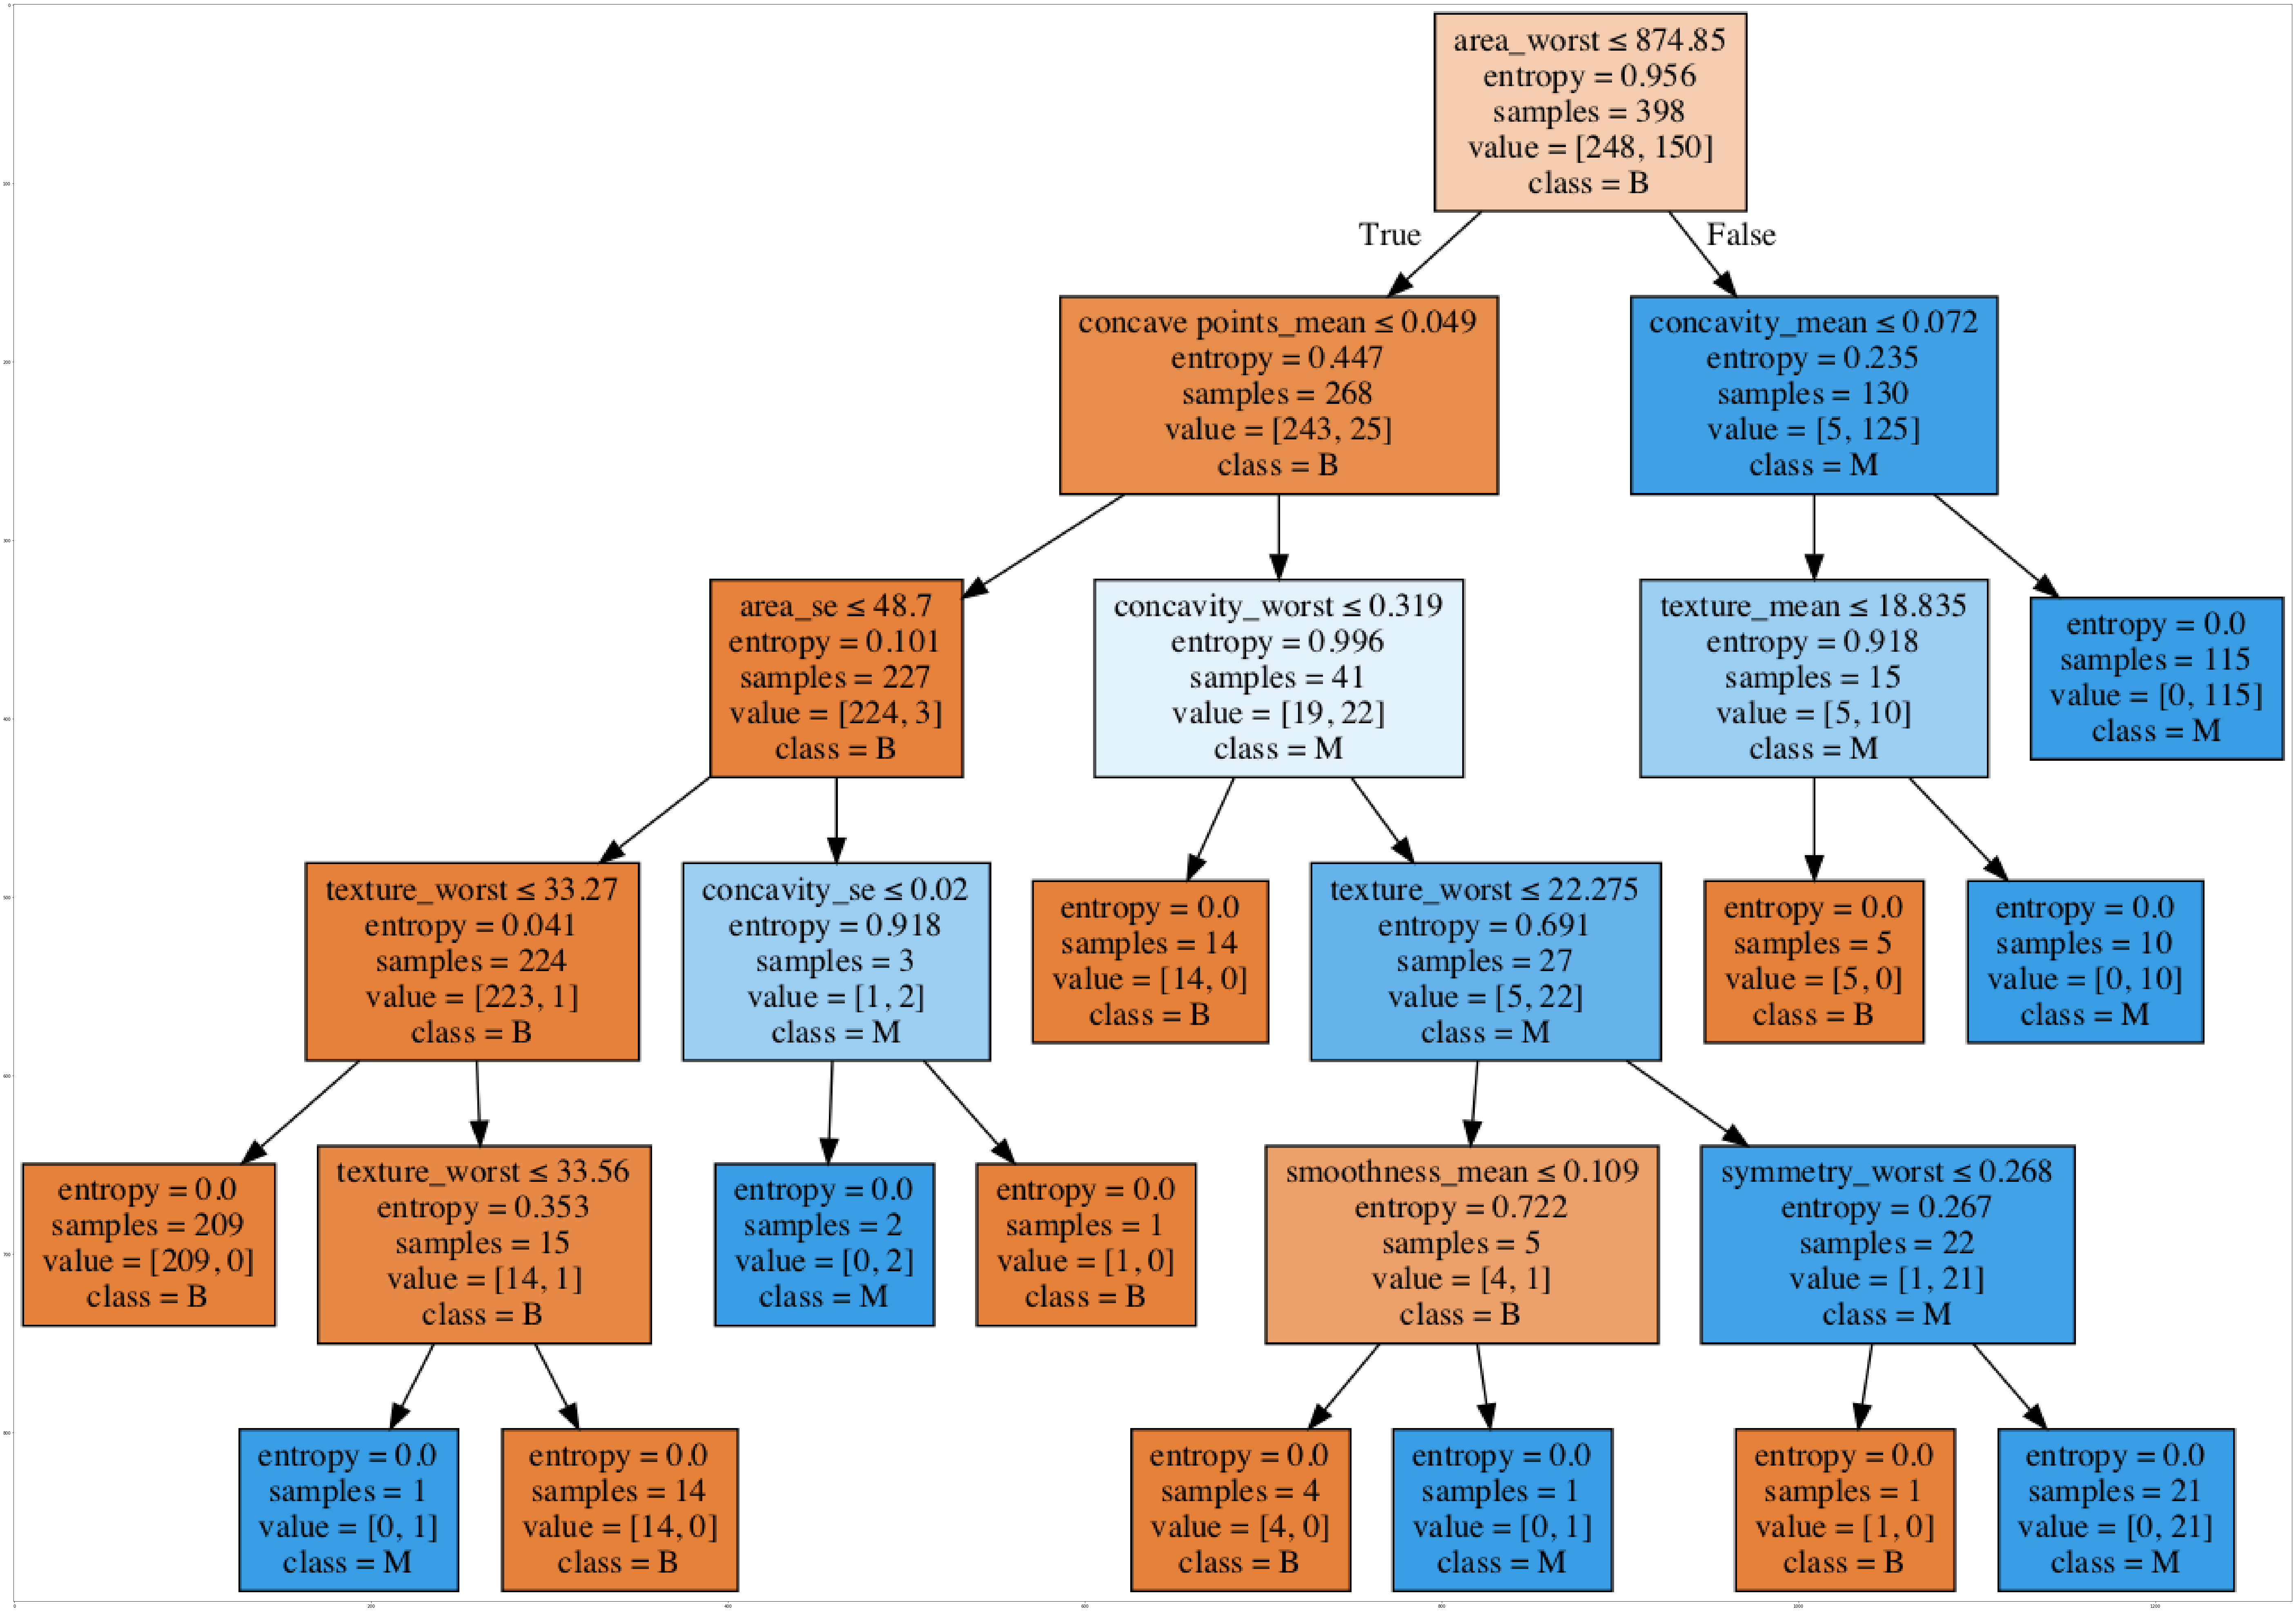

In [21]:
fileName_entropy = "decision-tree-entropy.png"

dot_data = StringIO()
featureNames = df.columns[2:32]
labedNames = df["diagnosis"].unique().tolist()
    
# export_graphviz will convert decision tree classifier into dot file
tree.export_graphviz(decision_tree,feature_names = featureNames, out_file = dot_data,
                         class_names = np.unique(y_train), filled = True,  special_characters = True,rotate = False) 
    
# Convert dot file int pgn using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
#write pgn into file
graph.write_png(fileName_entropy)

#display tree image
img_entropy = mpimg.imread(fileName_entropy)
plt.figure(figsize=(100, 200))
plt.imshow(img_entropy, interpolation='nearest')

### Pruning to Avoid Overfitting

How we can avoid Overfitting ? Overfitting can be avoided by using these parameters

* max_leaf_nodes - This parameter can be used to define the max number of leaf nodes
* min_samples_leaf - This parameter can be userd to restrict the size of sample leaf
* max_depth - It can be used to reduce the depth of the tree to build a generalized tree

In [22]:
startingPoint = 2
accuracy_1 = np.zeros((decision_tree.tree_.max_depth - 1))

for x in range(startingPoint, decision_tree.tree_.max_depth + 1):
    heuristic = "entropy"
    decision_tree = MyDecisionTreeClassifier(heuristic)

    # predict lables using remaining testset
    predTree = decision_tree.predict(X_test)
    
    accuracy_1 [x-startingPoint] = metrics.accuracy_score(y_test, predTree)
    
    print("Decision Trees's Accuracy (entropy) with depth:", x , " is ", accuracy_1 [x-startingPoint],"")

Decision Trees's Accuracy (entropy) with depth: 2  is  0.9473684210526315 
Decision Trees's Accuracy (entropy) with depth: 3  is  0.935672514619883 
Decision Trees's Accuracy (entropy) with depth: 4  is  0.935672514619883 
Decision Trees's Accuracy (entropy) with depth: 5  is  0.9473684210526315 


In [23]:
import matplotlib.pyplot as plt
def ShowAccuracy(_range, data):
    plt.plot(range(2,_range+1),data,'g')
    plt.legend(('Accuracy'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Depth')
    plt.tight_layout()
    plt.show()

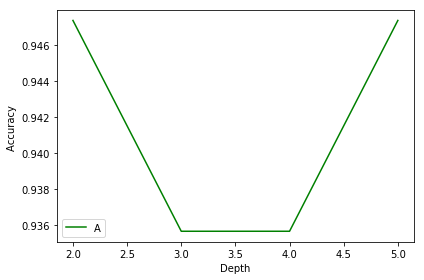

In [24]:
ShowAccuracy(decision_tree.tree_.max_depth, accuracy_1)

In [25]:
startingPoint = 2
depth = np.zeros((decision_tree_g.tree_.max_depth - 1))
accuracy_2 = np.zeros((decision_tree_g.tree_.max_depth - 1))

for x in range(startingPoint, decision_tree_g.tree_.max_depth + 1):
    heuristic = "gini"
    decision_tree = MyDecisionTreeClassifier(heuristic)

    # predict lables using remaining testset
    predTree = decision_tree.predict(X_test)
    
    depth [x-startingPoint] = x;
    accuracy_2 [x-startingPoint] = metrics.accuracy_score(y_test, predTree)
    
    print("Decision Trees's Accuracy (Gini) with depth:",x, " is ", accuracy_2 [x-startingPoint],"")

Decision Trees's Accuracy (Gini) with depth: 2  is  0.9590643274853801 
Decision Trees's Accuracy (Gini) with depth: 3  is  0.9532163742690059 
Decision Trees's Accuracy (Gini) with depth: 4  is  0.9473684210526315 
Decision Trees's Accuracy (Gini) with depth: 5  is  0.9473684210526315 
Decision Trees's Accuracy (Gini) with depth: 6  is  0.9415204678362573 


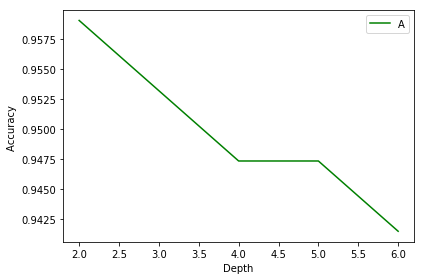

In [26]:
ShowAccuracy(decision_tree_g.tree_.max_depth, accuracy_2)

### Advantages of Decision Tree

* Highly Interpretable & can be visualized
* Minimal data preprocessing - missing data handling, normalizing, one-hot-encoding not required
* Handle both neumerical & categorical values

### Limitations of Decision Tree

* Overfitting - height of tree kept growing with addition of more data
* Slight changes in data or order of data can change the tree
* Imbalanced classes datasets creates biased tree so data needs balancing

However the above limitations can overcome by a powerful ensembling technique called Random Forest

### Pruning¶

A technique of machine learning which reduces height of the tree by chopping off parts of the tree that's not doing anything significant in prediction

Two types of pruning - Prepruning & Postpruning

* Prepruning : Don't allow tree to grow beyond this point

* Postpruning : Allows tree to grow as much as possible, then prune the tree

Pruning is not currently supported in scikit. However you can use min_samples_leaf & max_height parameters to limit the growth of a decision tree